<a href="https://colab.research.google.com/github/CRISTIANJULIOCESAR/DANN/blob/main/20%20neuronasvitalstatus_dann_cv_shaps_global.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
import glob

def clear_previous_features(directory):
    # Eliminar todos los archivos .pkl en el directorio especificado
    files = glob.glob(os.path.join(directory, '*.pkl'))
    for f in files:
        try:
            os.remove(f)
            print(f'Eliminado: {f}')
        except Exception as e:
            print(f'No se pudo eliminar {f}. Error: {str(e)}')

# Directorio donde guardas las características
save_dir = "/content/drive/MyDrive/PANCANCER FINAL"

# Llamada a la función para limpiar los archivos previos
clear_previous_features(save_dir)


Eliminado: /content/drive/MyDrive/PANCANCER FINAL/feature_extractor_fc3_epoch0_iter64.pkl
Eliminado: /content/drive/MyDrive/PANCANCER FINAL/domain_classifier_fc1_epoch0_iter64.pkl
Eliminado: /content/drive/MyDrive/PANCANCER FINAL/label_predictor_fc1_epoch0_iter64.pkl
Eliminado: /content/drive/MyDrive/PANCANCER FINAL/feature_extractor_fc3_epoch1_iter64.pkl
Eliminado: /content/drive/MyDrive/PANCANCER FINAL/domain_classifier_fc1_epoch1_iter64.pkl
Eliminado: /content/drive/MyDrive/PANCANCER FINAL/label_predictor_fc1_epoch1_iter64.pkl


In [4]:
import os

# Obtener el número de núcleos
num_cores = os.cpu_count()
print(f"Número de núcleos de CPU: {num_cores}")


Número de núcleos de CPU: 12


In [5]:
import torch

if torch.cuda.is_available():
    gpu_name = torch.cuda.get_device_name(0)
    print(f"GPU en uso: {gpu_name}")
    print(f"Memoria total de la GPU: {torch.cuda.get_device_properties(0).total_memory / (1024 ** 3):.2f} GB")
else:
    print("No se encontró una GPU disponible.")


GPU en uso: NVIDIA A100-SXM4-40GB
Memoria total de la GPU: 39.56 GB


In [6]:
!pip install umap-learn shap
!pytorch-lamb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 33.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.2 MB/s eta 0:00:00
/bin/bash: line 1: pytorch-lamb: command not found


In [7]:
import pandas as pd
clinicos = pd.read_pickle('/content/drive/MyDrive/pan_cancer_diner/final/Pan Cancer/Validados/picklesnuevos/meta_sinFPPP.pkl')
clinicos

Unnamed: 0  \
file_id                                            
9fe7d0f4-866d-490f-b2cb-d9be7da889de        7001   
dd74434f-300f-4798-8342-aad31b192e12        8001   
07db9e9d-059d-4e6c-b483-81517a492b96        1001   
47ee860a-fd18-48f2-bfe7-4e19391950bd        2001   
e322b0e5-458a-4cbf-a64f-9b348e413939        5001   
...                                          ...   
62cb41b1-8960-4fa2-8f74-38dd174af004        3999   
673a85f3-ba5e-448a-acee-dfec77b5238e        8000   
3d93b2ae-7730-4914-af23-ff3554752922        9000   
85a0b88f-2b89-4117-9e04-b81fad7f2e1b        4000   
a512642f-b720-4efb-a4e9-49b746980809       11000   

                                                           data_type  \
file_id                                                                
9fe7d0f4-866d-490f-b2cb-d9be7da889de  Gene Expression Quantification   
dd74434f-300f-4798-8342-aad31b192e12  Gene Expression Quantification   
07db9e9d-059d-4e6c-b483-81517a492b96  Gene Expression Quantification   
47ee860a-fd18-48f2-bfe7-4e19391950bd  Gene Expression Quantification   
e322b0e5-458a-4cbf-a64f-9b348e413939  Gene Expression Quantification   
...                                                              ...   
62cb41b1-8960-4fa2-8f74-38dd174af004  Gene Expression Quantification   
673a85f3-ba5e-448a-acee-dfec77b5238e  Gene Expression Quantification   
3d93b2ae-7730-4914-af23-ff3554752922  Gene Expression Quantification   
85a0b88f-2b89-4117-9e04-b81fad7f2e1b  Gene Expression Quantification   
a512642f-b720-4efb-a4e9-49b746980809  Gene Expression Quantification   

                                                      updated_datetime  \
file_id                                                                  
9fe7d0f4-866d-490f-b2cb-d9be7da889de  2016-05-26T20:51:28.753650-05:00   
dd74434f-300f-4798-8342-aad31b192e12  2016-05-26T21:04:47.187859-05:00   
07db9e9d-059d-4e6c-b483-81517a492b96  2016-05-26T21:04:48.015693-05:00   
47ee860a-fd18-48f2-bfe7-4e19391950bd  2016-05-26T21:04:48.692729-05:00   
e322b0e5-458a-4cbf-a64f-9b348e413939  2016-05-26T21:04:49.266949-05:00   
...                                                                ...   
62cb41b1-8960-4fa2-8f74-38dd174af004  2016-06-01T23:31:30.205560-05:00   
673a85f3-ba5e-448a-acee-dfec77b5238e  2016-06-01T23:31:30.867514-05:00   
3d93b2ae-7730-4914-af23-ff3554752922  2016-06-01T23:31:31.468195-05:00   
85a0b88f-2b89-4117-9e04-b81fad7f2e1b  2016-06-01T23:31:32.108278-05:00   
a512642f-b720-4efb-a4e9-49b746980809  2016-06-01T23:31:32.780942-05:00   

                                                                              file_name  \
file_id                                                                                   
9fe7d0f4-866d-490f-b2cb-d9be7da889de  1db2cfc5-346d-4398-9dd4-8b92435059fd.htseq.cou...   
dd74434f-300f-4798-8342-aad31b192e12  5f4cf592-e135-43ff-9c11-bcba462626d3.htseq.cou...   
07db9e9d-059d-4e6c-b483-81517a492b96  aa4a76e4-5348-479c-8beb-3e4e34e18ce9.htseq.cou...   
47ee860a-fd18-48f2-bfe7-4e19391950bd  0c172934-64ff-44dc-bdba-4c738f5692ea.htseq.cou...   
e322b0e5-458a-4cbf-a64f-9b348e413939  3025ad45-1d29-4c05-b90f-3d4a348c82c6.htseq.cou...   
...                                                                                 ...   
62cb41b1-8960-4fa2-8f74-38dd174af004  1ef78255-1b5c-42af-aa81-128c1b009114.htseq.cou...   
673a85f3-ba5e-448a-acee-dfec77b5238e  d07c7238-807f-48b1-bf06-deaa6200f4aa.htseq.cou...   
3d93b2ae-7730-4914-af23-ff3554752922  3c5b65ad-998a-4124-814f-760de89f05d0.htseq.cou...   
85a0b88f-2b89-4117-9e04-b81fad7f2e1b  9146cb7b-e388-41b4-aa5f-a9a571abdc40.htseq.cou...   
a512642f-b720-4efb-a4e9-49b746980809  4690efed-5d11-4191-addb-8d290ddc063a.htseq.cou...   

                                                                md5sum  \
file_id                                                                  
9fe7d0f4-866d-490f-b2cb-d9be7da889de  bff9318f04ad067bccc0fbd2d31b45f1   
dd74434f-300f-4798-8342-aad31b192e12  92cf7b5b7f0a0f5df

In [8]:
df = pd.read_pickle('/content/drive/MyDrive/pan_cancer_diner/final/Pan Cancer/Validados/picklesnuevos/df_sinFPPP_2.pkl')
df

0                                     5S_rRNA  5_8S_rRNA   7SK   A1BG  \
9fe7d0f4-866d-490f-b2cb-d9be7da889de        0          0    79   1055   
dd74434f-300f-4798-8342-aad31b192e12        1          0  1250      8   
07db9e9d-059d-4e6c-b483-81517a492b96        0          0    41      2   
47ee860a-fd18-48f2-bfe7-4e19391950bd        0          0   111  16482   
e322b0e5-458a-4cbf-a64f-9b348e413939        2          0    22      2   
...                                       ...        ...   ...    ...   
62cb41b1-8960-4fa2-8f74-38dd174af004        3          0    52     14   
673a85f3-ba5e-448a-acee-dfec77b5238e        3          0   169     40   
3d93b2ae-7730-4914-af23-ff3554752922        0          1  3961     10   
85a0b88f-2b89-4117-9e04-b81fad7f2e1b        9          1  1003     90   
a512642f-b720-4efb-a4e9-49b746980809        2          0    98     41   

0                                     A1BG-AS1   A1CF     A2M  A2M-AS1  A2ML1  \
9fe7d0f4-866d-490f-b2cb-d9be7da889de        12   3291    6614       11      0   
dd74434f-300f-4798-8342-aad31b192e12        51      3   24510       55    120   
07db9e9d-059d-4e6c-b483-81517a492b96        35   1618   21227       29      1   
47ee860a-fd18-48f2-bfe7-4e19391950bd       328  10632  159168      124      1   
e322b0e5-458a-4cbf-a64f-9b348e413939         0      2    7488       18   1714   
...                                        ...    ...     ...      ...    ...   
62cb41b1-8960-4fa2-8f74-38dd174af004        76   2971  111008       92      6   
673a85f3-ba5e-448a-acee-dfec77b5238e       142      4   25243       27    277   
3d93b2ae-7730-4914-af23-ff3554752922        54      3   32550       26    289   
85a0b88f-2b89-4117-9e04-b81fad7f2e1b       272      0     331       96     55   
a512642f-b720-4efb-a4e9-49b746980809       154      1   36537      107     18   

0                                     A2ML1-AS1  ...  ZYG11A  ZYG11AP1  \
9fe7d0f4-866d-490f-b2cb-d9be7da889de          0  ...       5         0   
dd74434f-300f-4798-8342-aad31b192e12          0  ...      73         0   
07db9e9d-059d-4e6c-b483-81517a492b96          0  ...       5         0   
47ee860a-fd18-48f2-bfe7-4e19391950bd          0  ...      66         0   
e322b0e5-458a-4cbf-a64f-9b348e413939          0  ...      52         0   
...                                         ...  ...     ...       ...   
62cb41b1-8960-4fa2-8f74-38dd174af004          0  ...      28         0   
673a85f3-ba5e-448a-acee-dfec77b5238e          0  ...     172         0   
3d93b2ae-7730-4914-af23-ff3554752922          1  ...       2         0   
85a0b88f-2b89-4117-9e04-b81fad7f2e1b          0  ...      10         0   
a512642f-b720-4efb-a4e9-49b746980809          0  ...     210         0   

0                                     ZYG11B    ZYX  ZYXP1  ZZEF1  ZZZ3  \
9fe7d0f4-866d-490f-b2cb-d9be7da889de     557   3130      0    314   469   
dd74434f-300f-4798-8342-aad31b192e12     963  10619      0   1656  1146   
07db9e9d-059d-4e6c-b483-81517a492b96    2136  13793      0   3667  2641   
47ee860a-fd18-48f2-bfe7-4e19391950bd    3417    887      0   1822  1891   
e322b0e5-458a-4cbf-a64f-9b348e413939    2155  13427      0   1404  2215   
...                                      ...    ...    ...    ...   ...   
62cb41b1-8960-4fa2-8f74-38dd174af004    3969  11102      0   4381  2584   
673a85f3-ba5e-448a-acee-dfec77b5238e    2717  14657      0   1090  2165   
3d93b2ae-7730-4914-af23-ff3554752922    2568   4216      0   3239   908   
85a0b88f-2b89-4117-9e04-b81fad7f2e1b    1611  19604      0   7247  3970   
a512642f-b720-4efb-a4e9-49b746980809    4057   8229      0   5007  3273   

0                                     hsa-mir-1253  hsa-mir-423  snoZ196  
9fe7d0f4-866d-490f-b2cb-d9be7da889de             0            0        3  
dd74434f-300f-4798-8342-aad31b192e12             0            0        3  
07db9e9d-059d-4e6c-b483-81517a492b96             0            0        3  
47ee860a-fd18-48f2-bfe7-4e19391950bd             0          

In [9]:
clinicos = clinicos.dropna(subset=['vital'])
clinicos = clinicos.dropna(subset=['panel'])

In [10]:
df['vital'] = clinicos['vital']
df['panel'] = clinicos['panel']

In [11]:
df = df.dropna(subset=['vital'])
df = df.dropna(subset=['panel'])

In [12]:
clinicos['panel'].unique()

array(['LIHC', 'PRAD', 'READ', 'BLCA', 'LGG', 'BRCA', 'UCEC', 'SARC',
       'KIRC', 'PCPG', 'DLBC', 'MESO', 'THYM', 'LUSC', 'LUAD', 'STAD',
       'GBM', 'LAML', 'THCA', 'CESC', 'COAD', 'HNSC', 'UVM', 'SKCM',
       'PAAD', 'OV', 'TGCT', 'KICH', 'ESCA', 'KIRP', 'ACC', 'CHOL', 'UCS'],
      dtype=object)

In [13]:
df

0                                     5S_rRNA  5_8S_rRNA   7SK   A1BG  \
9fe7d0f4-866d-490f-b2cb-d9be7da889de        0          0    79   1055   
dd74434f-300f-4798-8342-aad31b192e12        1          0  1250      8   
07db9e9d-059d-4e6c-b483-81517a492b96        0          0    41      2   
47ee860a-fd18-48f2-bfe7-4e19391950bd        0          0   111  16482   
e322b0e5-458a-4cbf-a64f-9b348e413939        2          0    22      2   
...                                       ...        ...   ...    ...   
62cb41b1-8960-4fa2-8f74-38dd174af004        3          0    52     14   
673a85f3-ba5e-448a-acee-dfec77b5238e        3          0   169     40   
3d93b2ae-7730-4914-af23-ff3554752922        0          1  3961     10   
85a0b88f-2b89-4117-9e04-b81fad7f2e1b        9          1  1003     90   
a512642f-b720-4efb-a4e9-49b746980809        2          0    98     41   

0                                     A1BG-AS1   A1CF     A2M  A2M-AS1  A2ML1  \
9fe7d0f4-866d-490f-b2cb-d9be7da889de        12   3291    6614       11      0   
dd74434f-300f-4798-8342-aad31b192e12        51      3   24510       55    120   
07db9e9d-059d-4e6c-b483-81517a492b96        35   1618   21227       29      1   
47ee860a-fd18-48f2-bfe7-4e19391950bd       328  10632  159168      124      1   
e322b0e5-458a-4cbf-a64f-9b348e413939         0      2    7488       18   1714   
...                                        ...    ...     ...      ...    ...   
62cb41b1-8960-4fa2-8f74-38dd174af004        76   2971  111008       92      6   
673a85f3-ba5e-448a-acee-dfec77b5238e       142      4   25243       27    277   
3d93b2ae-7730-4914-af23-ff3554752922        54      3   32550       26    289   
85a0b88f-2b89-4117-9e04-b81fad7f2e1b       272      0     331       96     55   
a512642f-b720-4efb-a4e9-49b746980809       154      1   36537      107     18   

0                                     A2ML1-AS1  ...  ZYG11B    ZYX  ZYXP1  \
9fe7d0f4-866d-490f-b2cb-d9be7da889de          0  ...     557   3130      0   
dd74434f-300f-4798-8342-aad31b192e12          0  ...     963  10619      0   
07db9e9d-059d-4e6c-b483-81517a492b96          0  ...    2136  13793      0   
47ee860a-fd18-48f2-bfe7-4e19391950bd          0  ...    3417    887      0   
e322b0e5-458a-4cbf-a64f-9b348e413939          0  ...    2155  13427      0   
...                                         ...  ...     ...    ...    ...   
62cb41b1-8960-4fa2-8f74-38dd174af004          0  ...    3969  11102      0   
673a85f3-ba5e-448a-acee-dfec77b5238e          0  ...    2717  14657      0   
3d93b2ae-7730-4914-af23-ff3554752922          1  ...    2568   4216      0   
85a0b88f-2b89-4117-9e04-b81fad7f2e1b          0  ...    1611  19604      0   
a512642f-b720-4efb-a4e9-49b746980809          0  ...    4057   8229      0   

0                                     ZZEF1  ZZZ3  hsa-mir-1253  hsa-mir-423  \
9fe7d0f4-866d-490f-b2cb-d9be7da889de    314   469             0            0   
dd74434f-300f-4798-8342-aad31b192e12   1656  1146             0            0   
07db9e9d-059d-4e6c-b483-81517a492b96   3667  2641             0            0   
47ee860a-fd18-48f2-bfe7-4e19391950bd   1822  1891             0            0   
e322b0e5-458a-4cbf-a64f-9b348e413939   1404  2215             0            0   
...                                     ...   ...           ...          ...   
62cb41b1-8960-4fa2-8f74-38dd174af004   4381  2584             0            0   
673a85f3-ba5e-448a-acee-dfec77b5238e   1090  2165             0            0   
3d93b2ae-7730-4914-af23-ff3554752922   3239   908             0            0   
85a0b88f-2b89-4117-9e04-b81fad7f2e1b   7247  3970             0            0   
a512642f-b720-4efb-a4e9-49b746980809   5007  3273             0            0   

0                                     snoZ196  vital  panel  
9fe7d0f4-866d-490f-b2cb-d9be7da889de        3  Alive   LIHC  
dd74434f-300f-4798-8342-aad31b192e12        3  Alive   PRAD  
07db9e9d-059d-4e6c-b483-81517a492b96        3   Dead   READ  
47ee

Usando dispositivo: cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                [-1, 10000]     399,800,000
       BatchNorm1d-2                [-1, 10000]          20,000
           Dropout-3                [-1, 10000]               0
            Linear-4                 [-1, 8000]      80,008,000
       BatchNorm1d-5                 [-1, 8000]          16,000
           Dropout-6                 [-1, 8000]               0
            Linear-7                 [-1, 5000]      40,005,000
       BatchNorm1d-8                 [-1, 5000]          10,000
           Dropout-9                 [-1, 5000]               0
 FeatureExtractor-10                 [-1, 5000]               0
           Linear-11                   [-1, 10]          50,010
      BatchNorm1d-12                   [-1, 10]              20
          Dropout-13                   [-1, 10]               0
           Lin

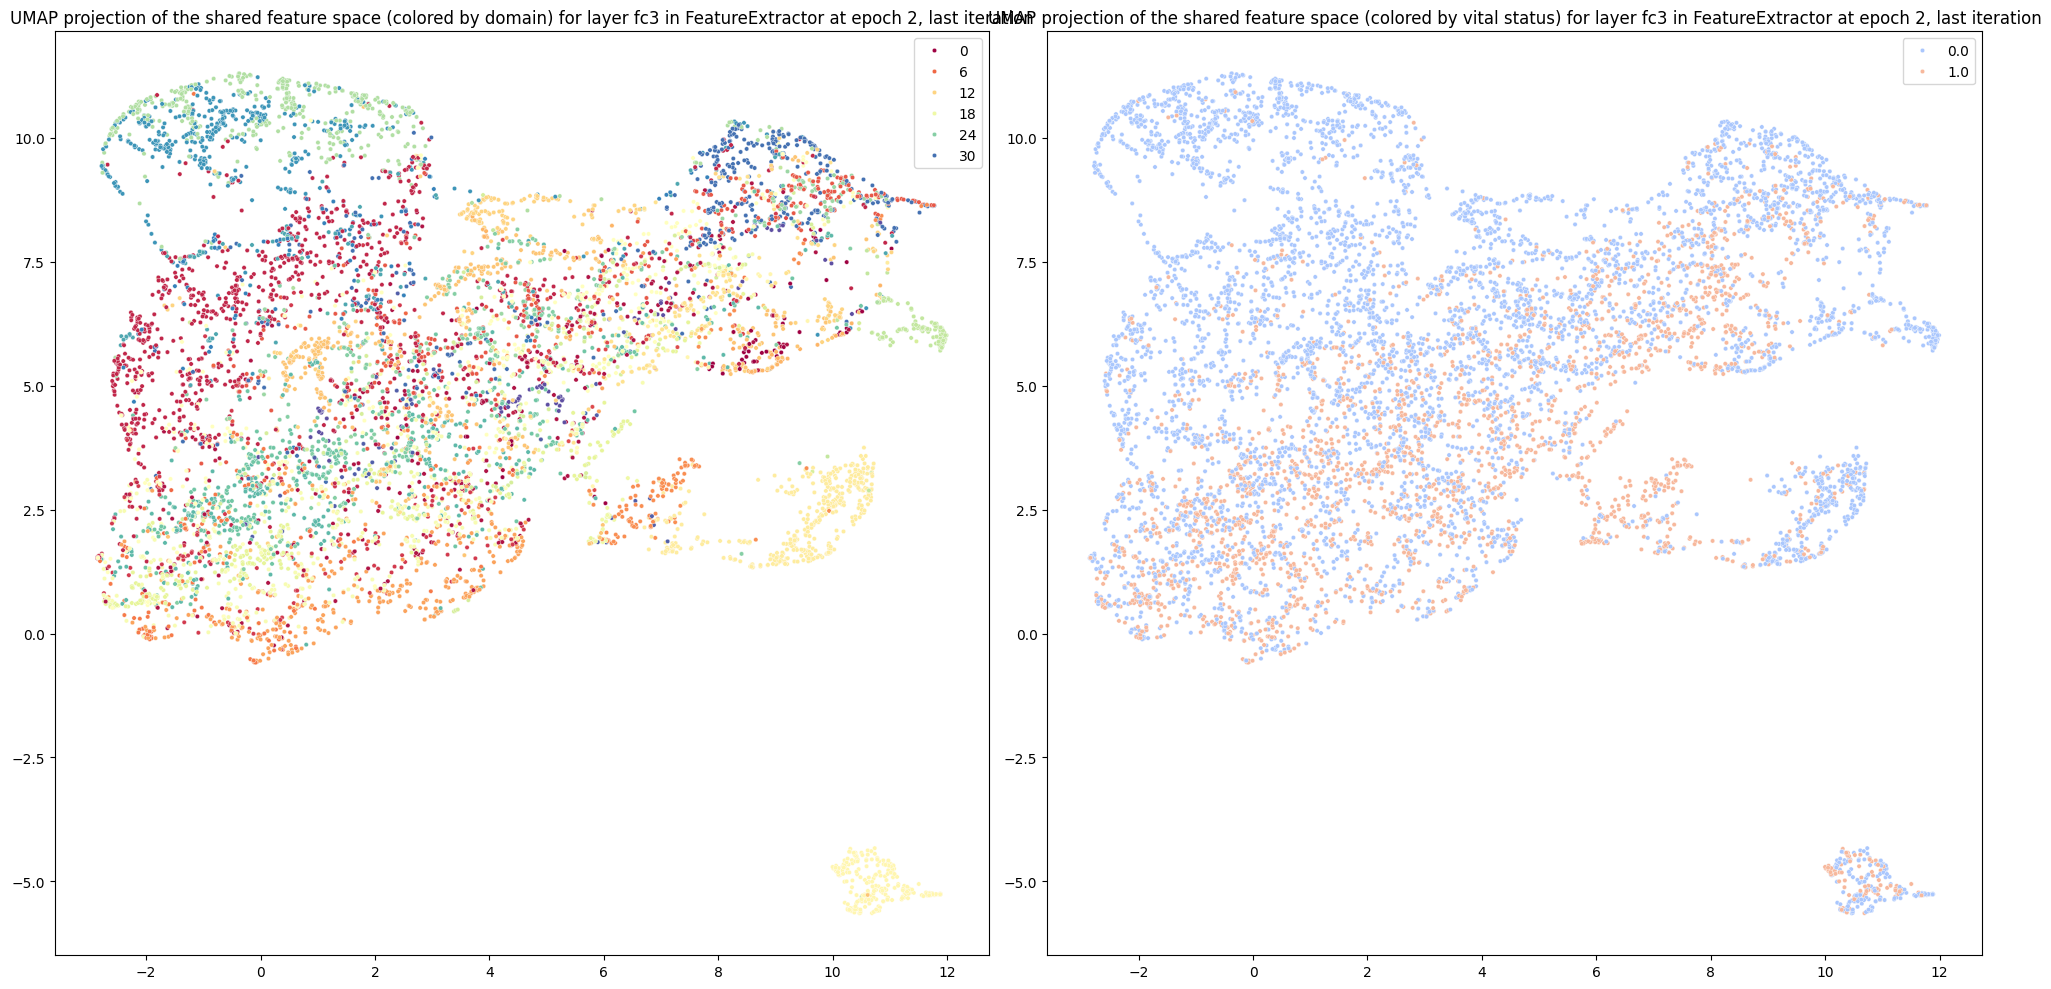

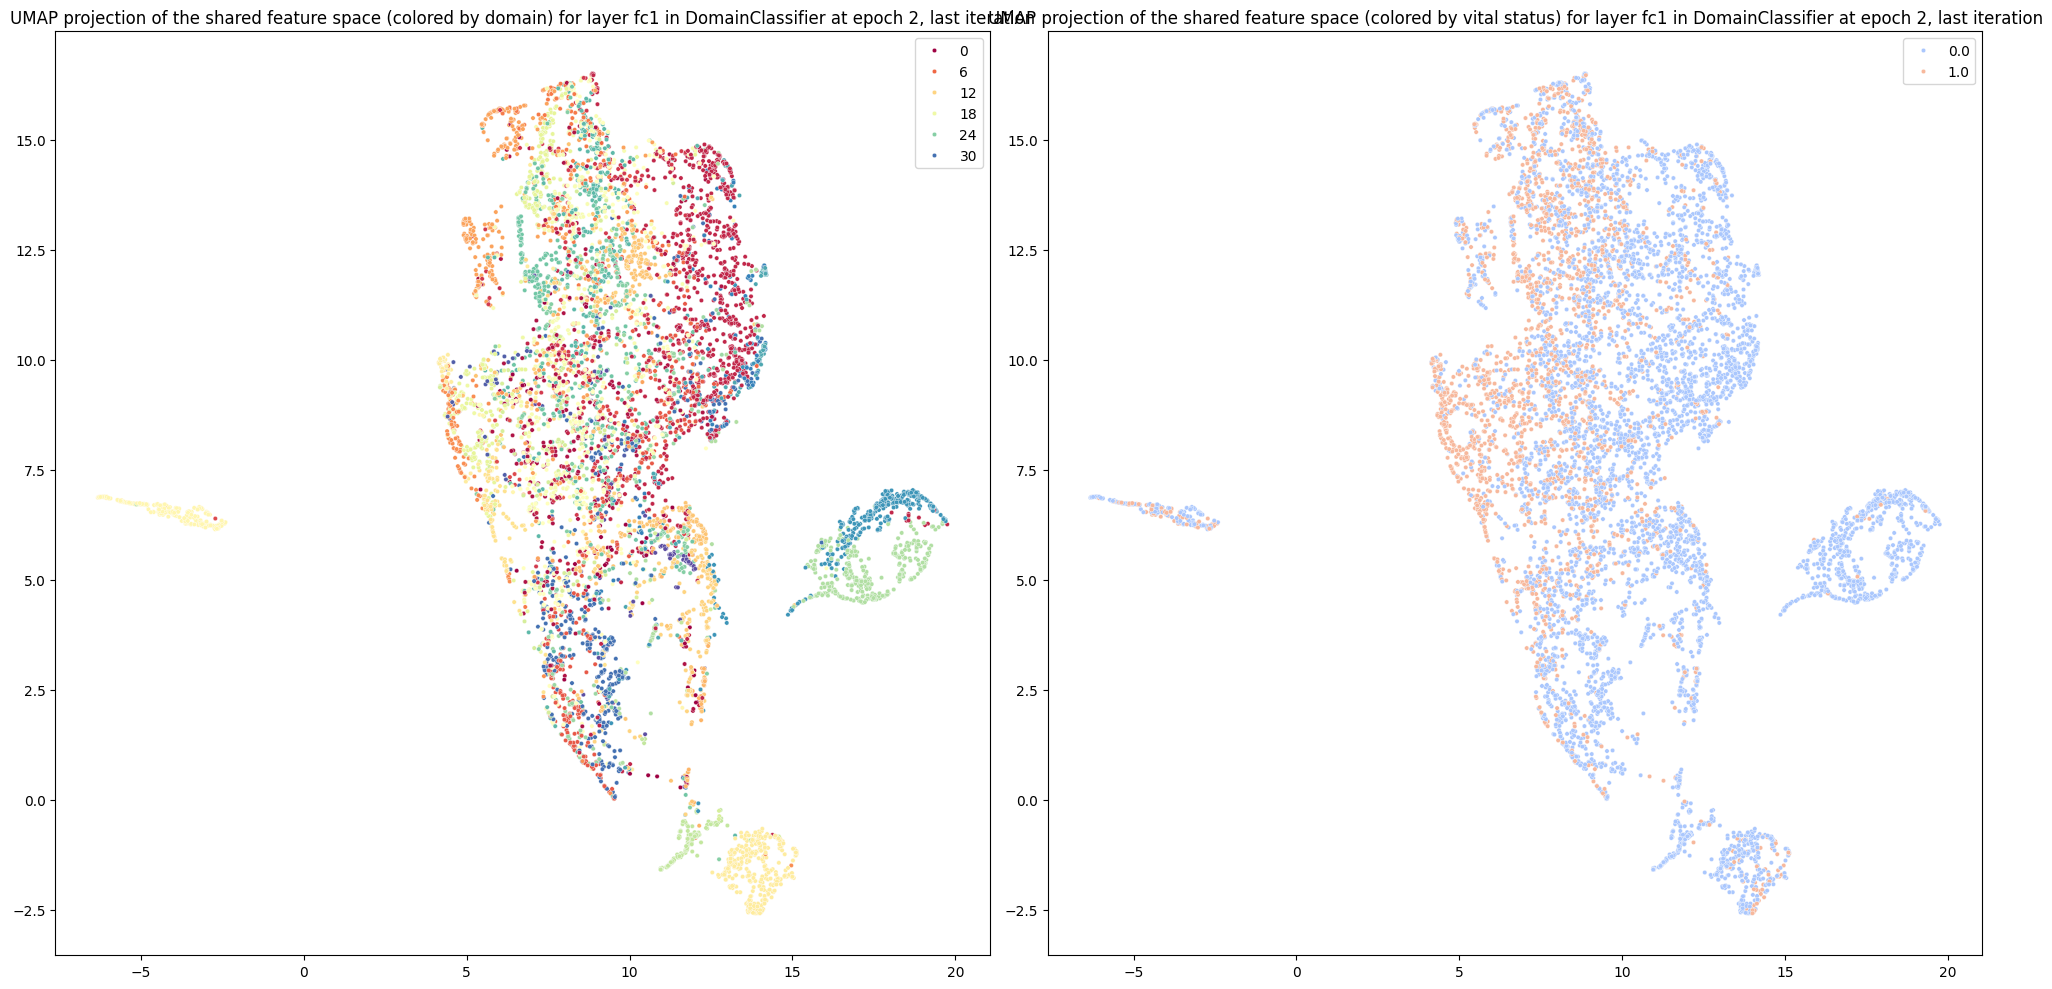

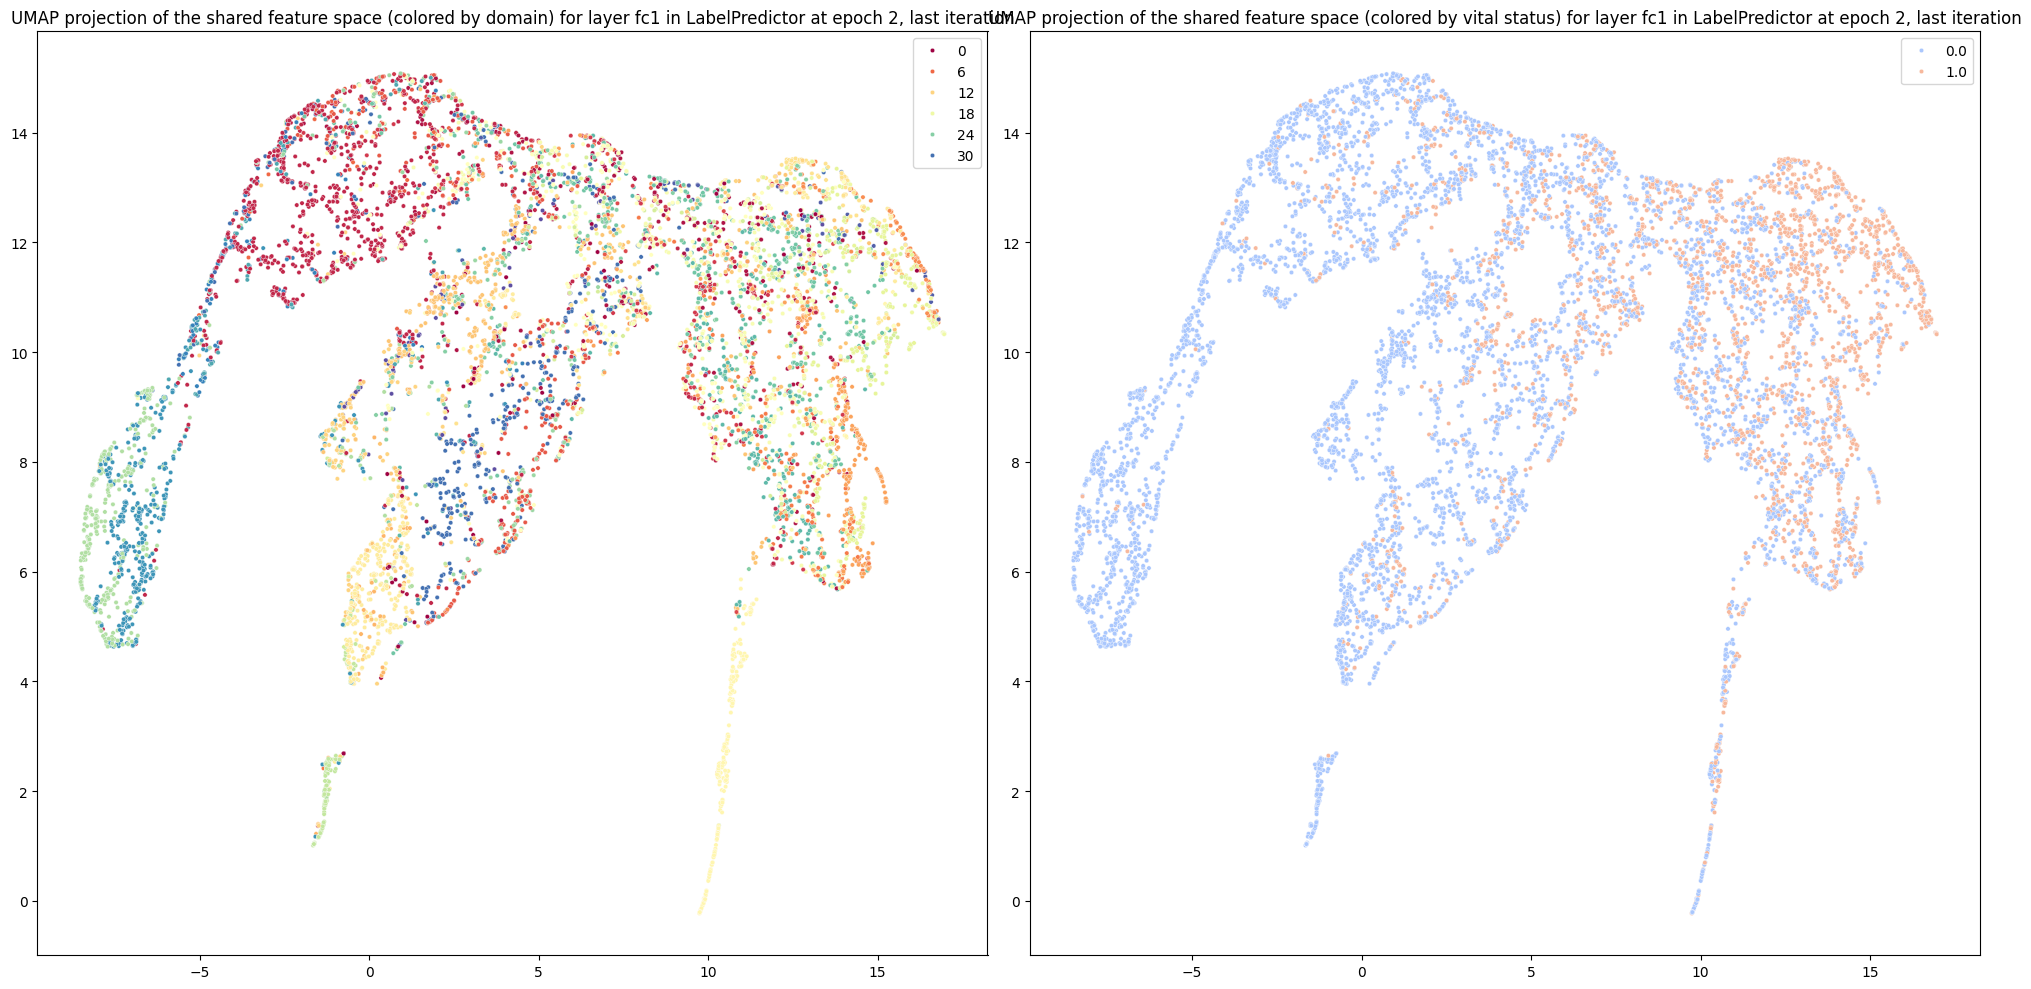

In [14]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import umap
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from torchsummary import summary

# Configurar el dispositivo para GPU si está disponible, de lo contrario, usar CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Usando dispositivo: {device}")

# Preparar los datos
X = df.iloc[:, :-2].values  # Datos de miRNAs
Y = df['vital'].values  # Estado vital
panels = df['panel'].values  # Etiquetas del dominio (paneles)
from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento (80%) y prueba (20%) de forma estratificada
X_train, X_test, Y_train, Y_test, panels_train, panels_test = train_test_split(
    X, Y, panels, test_size=0.2, stratify=Y, random_state=42
)

# Sobrescribir X y Y con los datos de entrenamiento
X = X_train
Y = Y_train
panels = panels_train

# Convertir el estado vital a valores numéricos
label_encoder_vital = LabelEncoder()
Y = label_encoder_vital.fit_transform(Y)

# Codificar las etiquetas de dominio (paneles)
label_encoder_panel = LabelEncoder()
panels = label_encoder_panel.fit_transform(panels)

# Convertir los datos a tensores y moverlos al dispositivo
X_tensor = torch.tensor(X, dtype=torch.float32).to(device)
Y_tensor = torch.tensor(Y, dtype=torch.float32).unsqueeze(1).to(device)
panels_tensor = torch.tensor(panels, dtype=torch.long).to(device)

# Crear datasets y dataloaders
batch_size = 128
dataset = TensorDataset(X_tensor, Y_tensor, panels_tensor)
loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Definición del modelo DANN mejorado
class FeatureExtractor(nn.Module):
    def __init__(self, input_dim):
        super(FeatureExtractor, self).__init__()
        self.fc1 = nn.Linear(input_dim, 10000)  # Primera capa con 10,000 neuronas
        self.bn1 = nn.BatchNorm1d(10000)
        self.dropout1 = nn.Dropout(0.3)

        self.fc2 = nn.Linear(10000, 8000)  # Segunda capa con 8,000 neuronas
        self.bn2 = nn.BatchNorm1d(8000)
        self.dropout2 = nn.Dropout(0.3)

        self.fc3 = nn.Linear(8000, 5000)  # Tercera capa con 5,000 neuronas
        self.bn3 = nn.BatchNorm1d(5000)
        self.dropout3 = nn.Dropout(0.3)

        # Aplicar inicialización He a las capas
        nn.init.kaiming_normal_(self.fc1.weight, nonlinearity='leaky_relu')
        nn.init.kaiming_normal_(self.fc2.weight, nonlinearity='leaky_relu')
        nn.init.kaiming_normal_(self.fc3.weight, nonlinearity='leaky_relu')

    def forward(self, x, lambda_=1.0):
        x = F.leaky_relu(self.bn1(self.fc1(x)))
        x = self.dropout1(x)
        x = F.leaky_relu(self.bn2(self.fc2(x)))
        x = self.dropout2(x)
        x = F.leaky_relu(self.bn3(self.fc3(x)))
        x = self.dropout3(x)
        return x

class LabelPredictor(nn.Module):
    def __init__(self, input_dim):
        super(LabelPredictor, self).__init__()
        self.fc1 = nn.Linear(input_dim, 10)
        self.bn1 = nn.BatchNorm1d(10)
        self.dropout1 = nn.Dropout(0.3)
        self.fc2 = nn.Linear(10, 1)

        # Aplicar inicialización He a las capas
        nn.init.kaiming_normal_(self.fc1.weight, nonlinearity='leaky_relu')
        nn.init.kaiming_normal_(self.fc2.weight, nonlinearity='leaky_relu')

    def forward(self, x):
        x = F.leaky_relu(self.bn1(self.fc1(x)))
        x = self.dropout1(x)
        x = torch.sigmoid(self.fc2(x))
        return x

class DomainClassifier(nn.Module):
    def __init__(self, input_dim, num_domains):
        super(DomainClassifier, self).__init__()
        self.fc1 = nn.Linear(input_dim, 5000)
        self.bn1 = nn.BatchNorm1d(5000)
        self.dropout1 = nn.Dropout(0.9)
        self.fc2 = nn.Linear(5000, num_domains)

        # Aplicar inicialización He a las capas
        nn.init.kaiming_normal_(self.fc1.weight, nonlinearity='leaky_relu')
        nn.init.kaiming_normal_(self.fc2.weight, nonlinearity='leaky_relu')

    def forward(self, x):
        x = F.leaky_relu(self.bn1(self.fc1(x)))
        x = self.dropout1(x)
        x = self.fc2(x)
        return x

class DANN(nn.Module):
    def __init__(self, feature_dim, num_domains):
        super(DANN, self).__init__()
        self.feature_extractor = FeatureExtractor(feature_dim)
        self.label_predictor = LabelPredictor(5000)
        self.domain_classifier = DomainClassifier(5000, num_domains)

    def forward(self, x, lambda_=1.0):
        # Extracción de características
        features = self.feature_extractor(x)

        # Inversión de gradiente con lambda
        reverse_features = ReverseLayerF.apply(features, lambda_)

        # Predicción de etiquetas
        label_output = self.label_predictor(features)

        # Clasificación de dominio
        domain_output = self.domain_classifier(reverse_features)

        return label_output, domain_output, features

class ReverseLayerF(torch.autograd.Function):
    @staticmethod
    def forward(ctx, x, lambda_):
        ctx.lambda_ = lambda_
        return x.view_as(x)

    @staticmethod
    def backward(ctx, grad_output):
        output = grad_output.neg() * ctx.lambda_
        return output, None

# Función para listar las capas de un módulo
def list_module_layers(module, module_name):
    print(f"Capas disponibles en {module_name}:")
    for name, mod in module.named_children():
        print(f'Layer name: {name}, Module: {mod}')

# Función para extraer características de una capa específica de un módulo
def extract_layer_features(model, loader, module_name, layer_name, use_features=False):
    model.eval()
    features = []
    labels = []
    domains = []

    with torch.no_grad():
        for inputs, label, domain in loader:
            inputs, label, domain = inputs.to(device), label.to(device), domain.to(device)
            if use_features:
                x = model.feature_extractor(inputs)
            else:
                x = inputs
            module = getattr(model, module_name)
            for name, mod in module.named_children():
                x = mod(x)
                if name == layer_name:
                    break
            features.append(x.cpu().numpy())
            labels.append(label.cpu().numpy())
            domains.append(domain.cpu().numpy())

    features = np.concatenate(features, axis=0)
    labels = np.concatenate(labels, axis=0).flatten()
    domains = np.concatenate(domains, axis=0).flatten()
    return features, labels, domains

# Función para guardar características de una capa específica de un módulo en disco
def save_layer_features_to_disk(epoch_iter, model, loader, module_name, layer_name, use_features=False):
    features, labels, domains = extract_layer_features(model, loader, module_name, layer_name, use_features)

    # Crear un directorio para guardar las características si no existe
    save_dir = "/content/drive/MyDrive/PANCANCER FINAL"
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)

    # Guardar las características en disco
    file_name = f"{save_dir}/{module_name}_{layer_name}_epoch{epoch_iter[0]}_iter{epoch_iter[1]}.pkl"
    with open(file_name, 'wb') as f:
        pickle.dump((features, labels, domains), f)

# Función para cargar características desde disco
def load_layer_features_from_disk(epoch, iteration, module_name, layer_name):
    file_name = f"/content/drive/MyDrive/PANCANCER FINAL/{module_name}_{layer_name}_epoch{epoch}_iter{iteration}.pkl"
    if os.path.exists(file_name):
        with open(file_name, 'rb') as f:
            features, labels, domains = pickle.load(f)
        return features, labels, domains
    else:
        print(f"No features found for epoch {epoch}, iteration {iteration}, module {module_name}, layer {layer_name}")
        return None, None, None

# Función para visualizar UMAP
def plot_umap(embedding, labels, domains, title_suffix=''):
    plt.figure(figsize=(20, 10))

    plt.subplot(1, 2, 1)
    sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1], hue=domains, palette='Spectral', s=10)
    plt.title(f'UMAP projection of the shared feature space (colored by domain) {title_suffix}')

    plt.subplot(1, 2, 2)
    sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1], hue=labels, palette='coolwarm', s=10)
    plt.title(f'UMAP projection of the shared feature space (colored by vital status) {title_suffix}')

    plt.tight_layout()
    torch.cuda.synchronize()
    plt.show()

# Función para visualizar UMAP de una capa específica en una época e iteración específica
def visualize_layer_umap(epoch, iteration, module_name, layer_name, title_suffix=''):
    features, labels, domains = load_layer_features_from_disk(epoch, iteration, module_name, layer_name)
    if features is not None:
        reducer = umap.UMAP(n_components=2)
        embedding = reducer.fit_transform(features)
        plot_umap(embedding, labels, domains, title_suffix)

# Parámetros
input_dim = X.shape[1]
num_domains = len(label_encoder_panel.classes_)
num_epochs = 10

# Crear el modelo
model = DANN(input_dim, num_domains).to(device)

# Imprimir el resumen de la arquitectura del modelo usando torchsummary
summary(model, input_size=(input_dim,))

# Después de llamar a summary, puedes ajustar el lambda_ durante el entrenamiento
lambda_ = 0.2 # Valor ajustado por el usuario

# Definir el optimizador AdamW
optimizer = optim.AdamW(
    model.parameters(),
    lr=0.01,  # Tasa de aprendizaje
    betas=(0.9, 0.99),  # Coeficientes beta
    eps=1e-8,  # Valor pequeño para estabilidad numérica
    weight_decay=0.01,  # Regularización L2
    amsgrad=False  # Si deseas usar la variante AMSGrad
)

# Definir las funciones de pérdida
criterion_label = nn.BCELoss().to(device)
criterion_domain = nn.CrossEntropyLoss().to(device)

# Listas para guardar las precisiones
label_accuracies = []
domain_accuracies = []

class ModelSaver:
    def __init__(self):
        self.models = []

    def save_model(self, model, iteration):
        # Hacer una copia del estado del modelo
        model_copy = {k: v.clone() for k, v in model.state_dict().items()}
        self.models.append((iteration, model_copy))

    def get_models(self):
        return self.models

# Crear instancia de ModelSaver
model_saver = ModelSaver()

# Entrenamiento y guardado de características
for epoch in range(num_epochs):
    model.train()
    correct_label = 0
    correct_domain = 0
    total = 0

    for i, (inputs, labels, domains) in enumerate(loader):
        inputs, labels, domains = inputs.to(device), labels.to(device), domains.to(device)

        # Forward pass: obtiene las predicciones para etiquetas y dominios
        label_preds, domain_preds, features = model(inputs, lambda_)

        # Cálculo de pérdidas
        loss_label = criterion_label(label_preds, labels)  # Pérdida de predicción de etiquetas (L_y)
        loss_domain = criterion_domain(domain_preds, domains)  # Pérdida de predicción de dominios (L_d)

        # Reseteo de gradientes acumulados
        optimizer.zero_grad()

        # Suma de las pérdidas de ambas tareas
        loss = loss_label #+ loss_domain

        # Retropropagación de gradientes
        loss.backward()

        # Clip gradients to prevent explosion
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)

        # Actualización de los parámetros del modelo
        optimizer.step()

        predicted_label = (label_preds > 0.5).float()
        correct_label += (predicted_label == labels).sum().item()

        _, predicted_domain = torch.max(domain_preds, 1)
        correct_domain += (predicted_domain == domains).sum().item()

        total += labels.size(0)

        # Guardar características solo para la última iteración dentro de cada época
        if i == len(loader) - 1:  # Solo para la última iteración
            save_layer_features_to_disk((epoch, i), model, loader, 'feature_extractor', 'fc3')
            save_layer_features_to_disk((epoch, i), model, loader, 'domain_classifier', 'fc1', use_features=True)
            save_layer_features_to_disk((epoch, i), model, loader, 'label_predictor', 'fc1', use_features=True)

            # Guardar el modelo después de cada iteración (en este caso la última iteración)
            model_saver.save_model(model, (epoch, i))

    label_accuracy = correct_label / total
    domain_accuracy = correct_domain / total

    label_accuracies.append(label_accuracy)
    domain_accuracies.append(domain_accuracy)

    print(f'Epoch [{epoch+1}/{num_epochs}], Label Accuracy: {label_accuracy:.4f}, Domain Accuracy: {domain_accuracy:.4f}')

# Visualización de UMAP de la última iteración de la segunda época (indexada como epoch 1)
visualize_layer_umap(epoch=1, iteration=len(loader) - 1, module_name='feature_extractor', layer_name='fc3', title_suffix='for layer fc3 in FeatureExtractor at epoch 2, last iteration')
visualize_layer_umap(epoch=1, iteration=len(loader) - 1, module_name='domain_classifier', layer_name='fc1', title_suffix='for layer fc1 in DomainClassifier at epoch 2, last iteration')
visualize_layer_umap(epoch=1, iteration=len(loader) - 1, module_name='label_predictor', layer_name='fc1', title_suffix='for layer fc1 in LabelPredictor at epoch 2, last iteration')



No features found for epoch 4, iteration 64, module feature_extractor, layer fc1


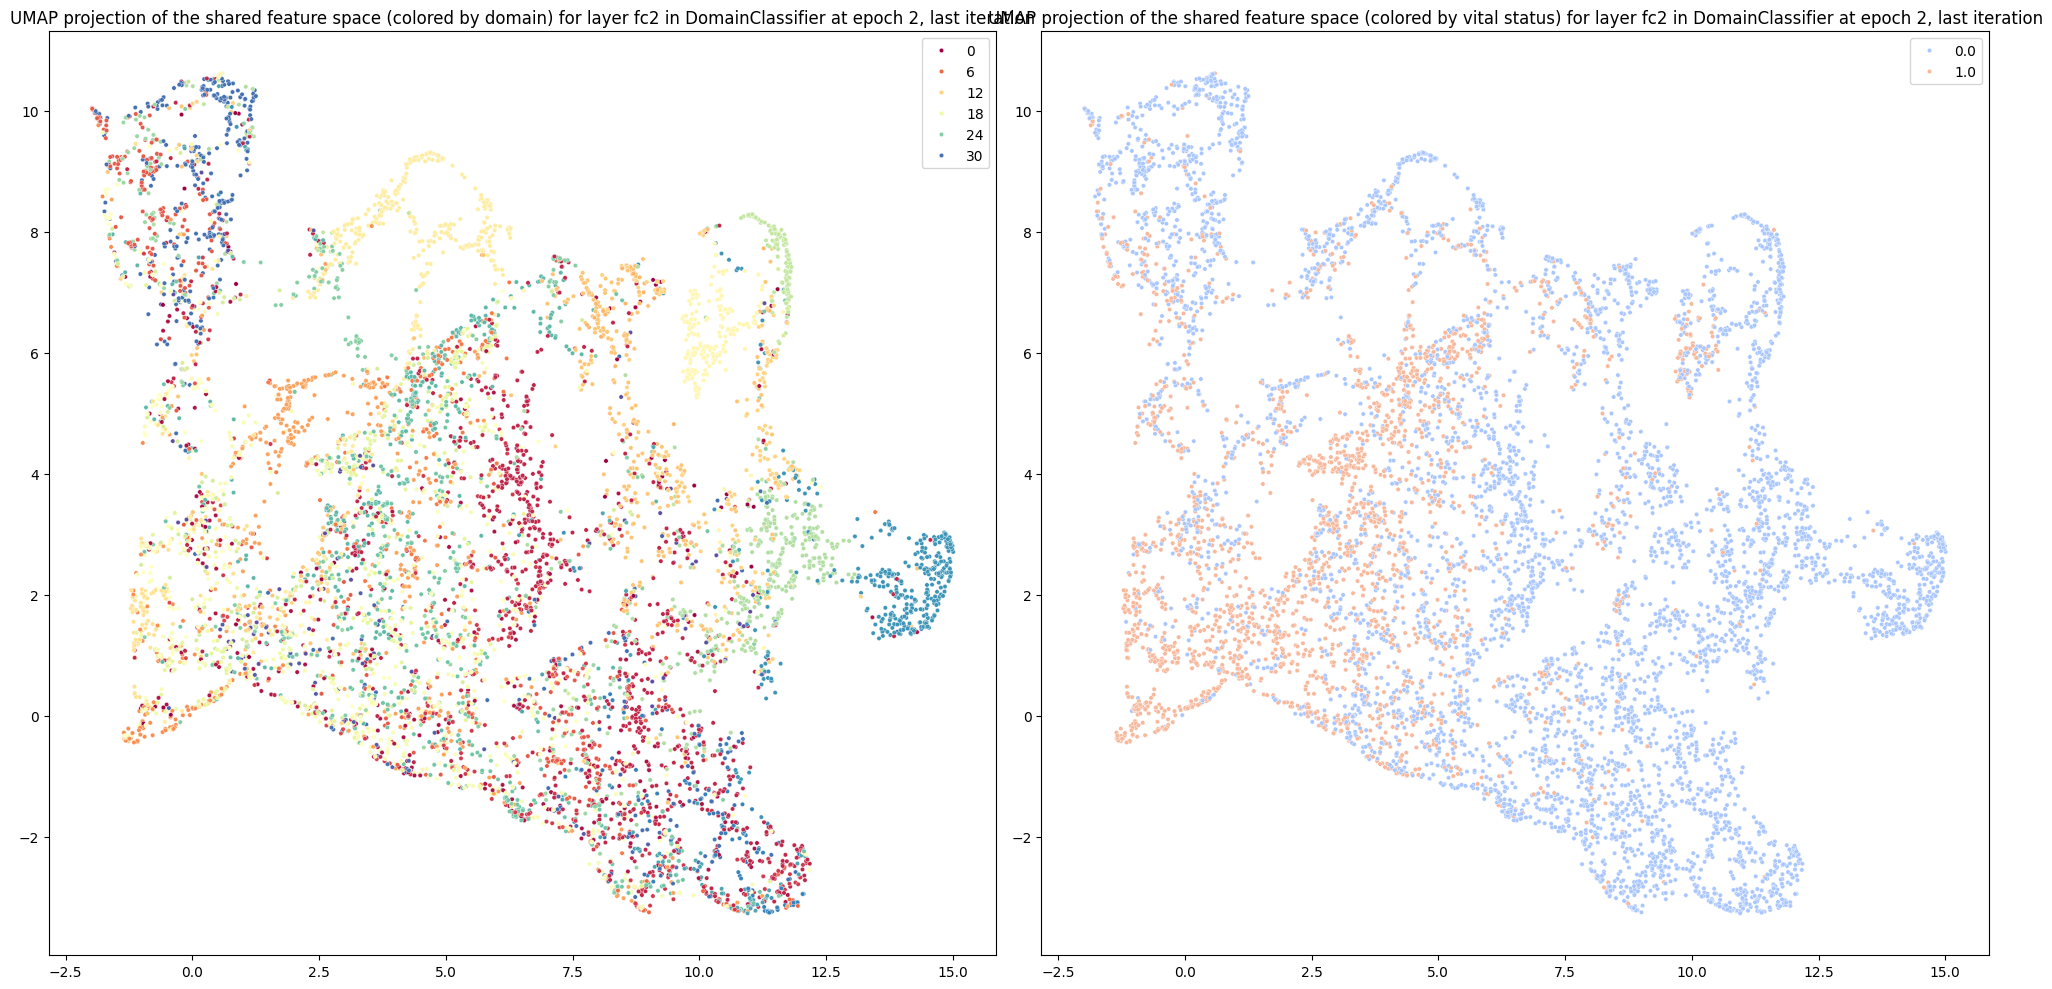

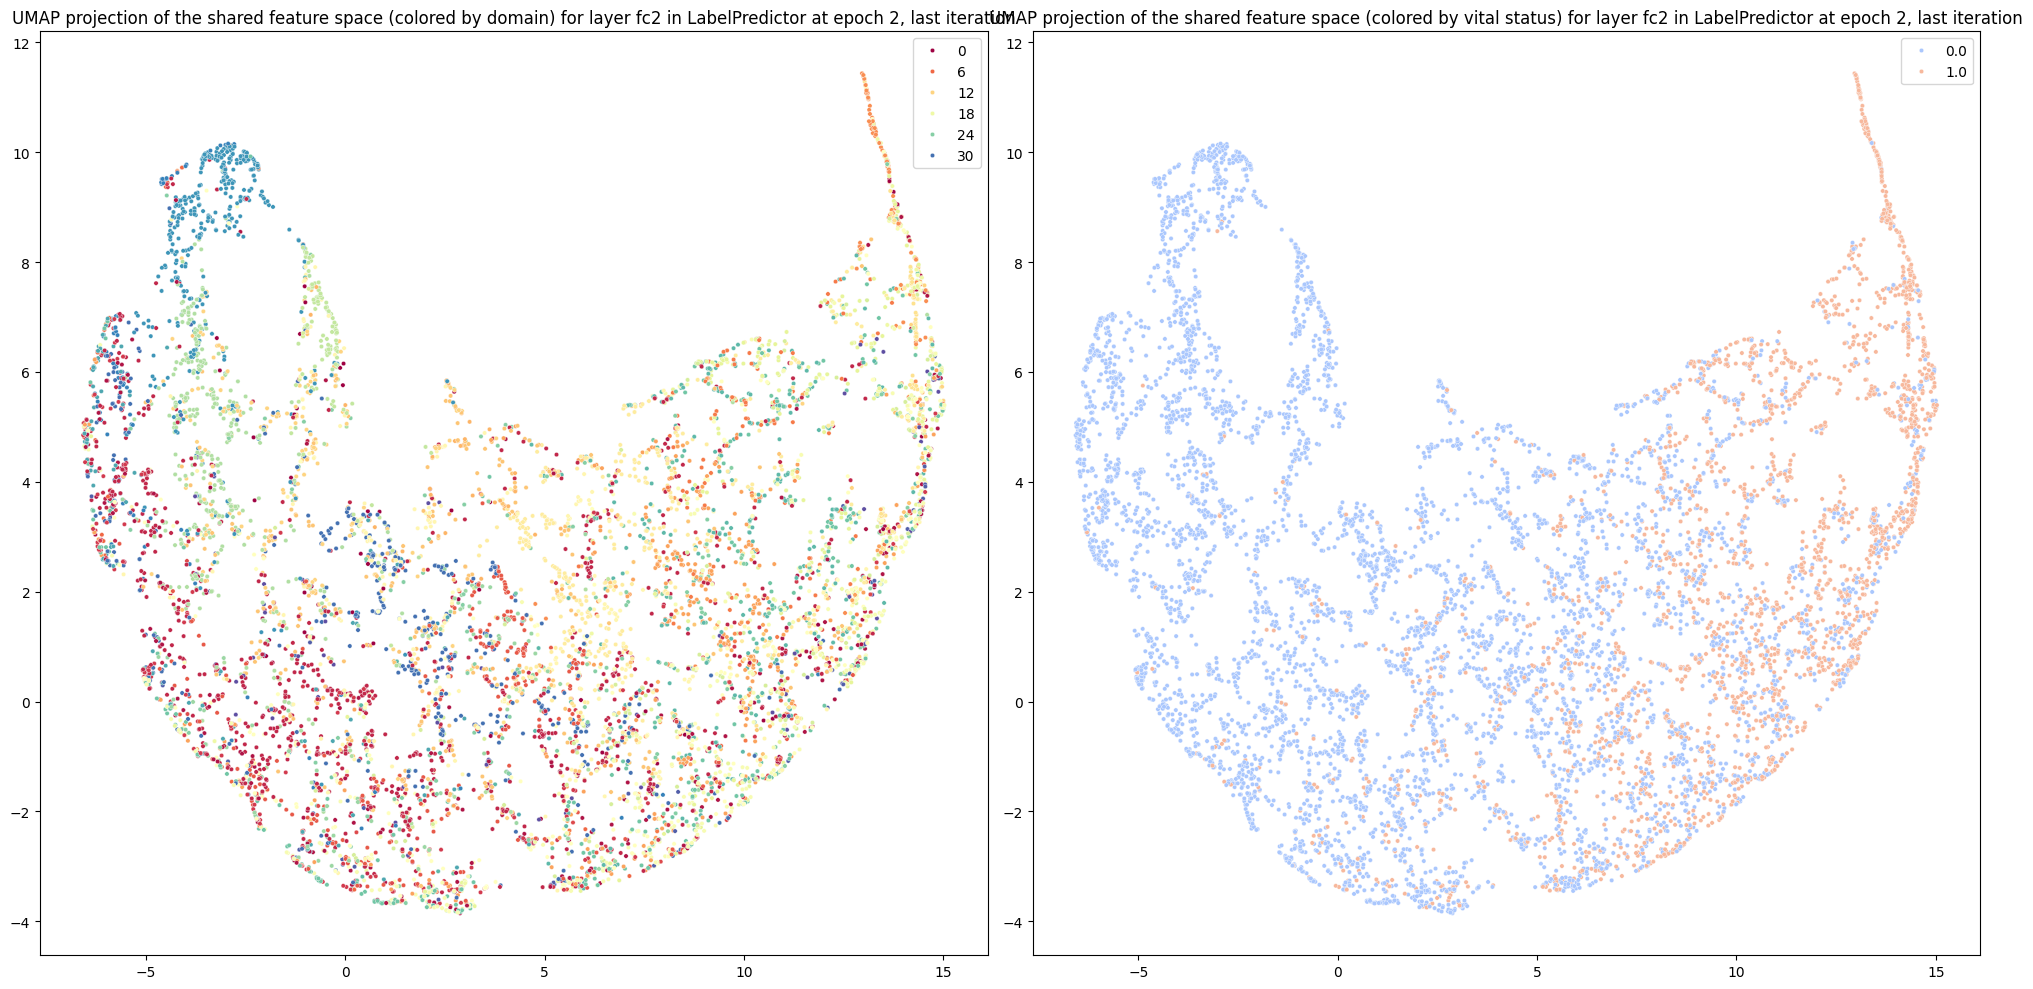

In [21]:
# Visualización de UMAP de la última iteración de la segunda época (indexada como epoch 1)
visualize_layer_umap(epoch=4, iteration=len(loader) - 1, module_name='feature_extractor', layer_name='fc1', title_suffix='for layer fc2 in FeatureExtractor at epoch 2, last iteration')
visualize_layer_umap(epoch=4, iteration=len(loader) - 1, module_name='domain_classifier', layer_name='fc1', title_suffix='for layer fc2 in DomainClassifier at epoch 2, last iteration')
visualize_layer_umap(epoch=4, iteration=len(loader) - 1, module_name='label_predictor', layer_name='fc1', title_suffix='for layer fc2 in LabelPredictor at epoch 2, last iteration')


In [22]:
# Visualización de UMAP de la última iteración de la segunda época (indexada como epoch 1)
visualize_layer_umap(epoch=9, iteration=len(loader) - 1, module_name='feature_extractor', layer_name='fc1', title_suffix='for layer fc2 in FeatureExtractor at epoch 2, last iteration')
visualize_layer_umap(epoch=9, iteration=len(loader) - 1, module_name='domain_classifier', layer_name='fc2', title_suffix='for layer fc2 in DomainClassifier at epoch 2, last iteration')
visualize_layer_umap(epoch=9, iteration=len(loader) - 1, module_name='label_predictor', layer_name='fc2', title_suffix='for layer fc2 in LabelPredictor at epoch 2, last iteration')


No features found for epoch 9, iteration 64, module feature_extractor, layer fc1
No features found for epoch 9, iteration 64, module domain_classifier, layer fc2
No features found for epoch 9, iteration 64, module label_predictor, layer fc2


In [17]:
# Supongamos que la época 5 es la que te interesa (indexada como 4 en Python)
epoch_of_interest = 9  # Indexada desde 0, por lo que la época 5 es epoch 4

# Obtener el modelo guardado al final de la época 5
iteration_info, model_state_dict = model_saver.get_models()[epoch_of_interest]
epoch, iteration = iteration_info

print(f"Modelo guardado al final de la época {epoch + 1}, iteración {iteration + 1}")
model.load_state_dict(model_state_dict)


Modelo guardado al final de la época 10, iteración 65


<All keys matched successfully>

In [ ]:
import torch
import shap
from tqdm import tqdm
import numpy as np

# Supongamos que la época 10 es la que te interesa (indexada como 9 en Python)
epoch_of_interest = 9  # Indexada desde 0, por lo que la época 10 es epoch 9

# Obtener el modelo guardado al final de la época 10
iteration_info, model_state_dict = model_saver.get_models()[epoch_of_interest]
epoch, iteration = iteration_info

print(f"Modelo guardado al final de la época {epoch + 1}, iteración {iteration + 1}")
model.load_state_dict(model_state_dict)

# Convertir los datos de miRNAs a un tensor, pero solo las primeras 100 muestras
X = df.iloc[:, :-2].values  # Usando las primeras 100 filas y todas las columnas excepto las dos últimas
X_tensor = torch.tensor(X, dtype=torch.float32).to(device)

# Asegúrate de que el modelo esté en modo de evaluación
model.eval()

# Crear un modelo combinado que incluya tanto el FeatureExtractor como el LabelPredictor
class CombinedModel(torch.nn.Module):
    def __init__(self, feature_extractor, label_predictor):
        super(CombinedModel, self).__init__()
        self.feature_extractor = feature_extractor
        self.label_predictor = label_predictor

    def forward(self, x):
        features = self.feature_extractor(x)
        output = self.label_predictor(features)
        return output

combined_model = CombinedModel(model.feature_extractor, model.label_predictor)

# Crear un objeto SHAP explainer utilizando GradientExplainer con el modelo combinado
explainer = shap.GradientExplainer(combined_model, X_tensor)

# Calcular los valores SHAP para la salida del LabelPredictor directamente sobre X_tensor
shap_values = []
try:
    for i in tqdm(range(X_tensor.shape[0]), desc="Calculando valores SHAP"):
        shap_value = explainer.shap_values(X_tensor[i:i+1])
        shap_values.append(shap_value)
        print(f"SHAP values for instance {i}: {shap_value}")

    # Convertir la lista de valores SHAP a un numpy array
    shap_values_np = np.vstack(shap_values).squeeze()  # Eliminar la tercera dimensión
    print("Final SHAP values numpy array (shape):", shap_values_np.shape)

    # Usar los nombres de características originales
    feature_names_original = df.iloc[:, :-2].columns

    # Visualización de los valores SHAP para las características originales
    print("Generating SHAP summary plot...")
    shap.summary_plot(shap_values_np, X, feature_names=feature_names_original)
    print("SHAP summary plot generated successfully.")

except Exception as e:
    print(f"An error occurred: {e}")
    print(f"SHAP values calculated so far: {shap_values}")


Modelo guardado al final de la época 10, iteración 65


Calculando valores SHAP:   0%|          | 1/10286 [00:00<2:28:01,  1.16it/s]

SHAP values for instance 0: [[[ 2.25539444e-10]
  [-2.41924816e-08]
  [ 5.10001881e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.76281215e-09]]]


Calculando valores SHAP:   0%|          | 2/10286 [00:01<1:24:49,  2.02it/s]

SHAP values for instance 1: [[[-7.61332944e-11]
  [-2.86883753e-06]
  [ 4.38022608e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.19064589e-08]]]


Calculando valores SHAP:   0%|          | 3/10286 [00:01<1:04:42,  2.65it/s]

SHAP values for instance 2: [[[-8.25056518e-09]
  [-5.30125815e-05]
  [ 8.83901294e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-6.02117433e-08]]]


Calculando valores SHAP:   0%|          | 4/10286 [00:01<55:19,  3.10it/s]  

SHAP values for instance 3: [[[ 6.23240350e-10]
  [-1.48880701e-06]
  [ 1.12383283e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.64604491e-08]]]


Calculando valores SHAP:   0%|          | 5/10286 [00:01<49:55,  3.43it/s]

SHAP values for instance 4: [[[ 9.35581475e-10]
  [-2.93301004e-06]
  [ 3.95398365e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 9.58393994e-08]]]


Calculando valores SHAP:   0%|          | 6/10286 [00:02<46:43,  3.67it/s]

SHAP values for instance 5: [[[-6.42262869e-10]
  [-7.19532869e-07]
  [ 5.61495932e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.04685958e-07]]]


Calculando valores SHAP:   0%|          | 7/10286 [00:02<44:34,  3.84it/s]

SHAP values for instance 6: [[[-5.82224366e-09]
  [-4.67361280e-07]
  [ 6.62864538e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.47853246e-07]]]


Calculando valores SHAP:   0%|          | 8/10286 [00:02<43:10,  3.97it/s]

SHAP values for instance 7: [[[-2.72569384e-09]
  [-3.94268269e-07]
  [ 8.42230090e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.80755775e-07]]]


Calculando valores SHAP:   0%|          | 9/10286 [00:02<43:04,  3.98it/s]

SHAP values for instance 8: [[[-2.60578234e-09]
  [-5.94208945e-07]
  [ 1.20886468e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.06750975e-07]]]


Calculando valores SHAP:   0%|          | 10/10286 [00:03<42:40,  4.01it/s]

SHAP values for instance 9: [[[-1.49765423e-09]
  [-1.09618119e-07]
  [ 2.20255221e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.98266265e-07]]]


Calculando valores SHAP:   0%|          | 11/10286 [00:03<42:27,  4.03it/s]

SHAP values for instance 10: [[[ 5.14641220e-11]
  [-1.41207934e-05]
  [ 2.20588280e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 4.17989543e-08]]]


Calculando valores SHAP:   0%|          | 12/10286 [00:03<42:23,  4.04it/s]

SHAP values for instance 11: [[[-4.36747793e-09]
  [-1.38984640e-06]
  [ 7.55814746e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.50928217e-07]]]


Calculando valores SHAP:   0%|          | 13/10286 [00:03<42:25,  4.04it/s]

SHAP values for instance 12: [[[ 8.38940788e-09]
  [-1.20756064e-06]
  [ 3.60801790e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 6.96476611e-07]]]


Calculando valores SHAP:   0%|          | 14/10286 [00:04<42:28,  4.03it/s]

SHAP values for instance 13: [[[-3.52597115e-09]
  [-1.50569219e-06]
  [ 7.55732619e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.15079622e-07]]]


Calculando valores SHAP:   0%|          | 15/10286 [00:04<42:26,  4.03it/s]

SHAP values for instance 14: [[[-5.58132101e-09]
  [-1.34354006e-07]
  [ 1.08324454e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.47335132e-07]]]


Calculando valores SHAP:   0%|          | 16/10286 [00:04<42:18,  4.05it/s]

SHAP values for instance 15: [[[5.94220589e-10]
  [8.32518882e-08]
  [8.24680209e-06]
  ...
  [0.00000000e+00]
  [0.00000000e+00]
  [1.59199411e-08]]]


Calculando valores SHAP:   0%|          | 17/10286 [00:04<42:21,  4.04it/s]

SHAP values for instance 16: [[[-2.86625778e-09]
  [-1.28429572e-06]
  [ 2.19435095e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.18894426e-08]]]


Calculando valores SHAP:   0%|          | 18/10286 [00:04<42:20,  4.04it/s]

SHAP values for instance 17: [[[-4.15626108e-10]
  [-1.43103880e-06]
  [ 1.07695487e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.04217377e-07]]]


Calculando valores SHAP:   0%|          | 19/10286 [00:05<42:20,  4.04it/s]

SHAP values for instance 18: [[[-1.22343139e-09]
  [-1.38171838e-07]
  [ 3.67728731e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.40852343e-07]]]


Calculando valores SHAP:   0%|          | 20/10286 [00:05<42:17,  4.05it/s]

SHAP values for instance 19: [[[-3.69729043e-09]
  [-9.65274254e-07]
  [ 2.74000831e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 4.50435868e-07]]]


Calculando valores SHAP:   0%|          | 21/10286 [00:05<42:24,  4.03it/s]

SHAP values for instance 20: [[[ 4.69677429e-09]
  [ 6.06818842e-07]
  [-8.03980500e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.73226615e-07]]]


Calculando valores SHAP:   0%|          | 22/10286 [00:05<42:19,  4.04it/s]

SHAP values for instance 21: [[[ 8.86589707e-10]
  [-5.25264017e-07]
  [ 8.21969989e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.75220308e-08]]]


Calculando valores SHAP:   0%|          | 23/10286 [00:06<42:23,  4.03it/s]

SHAP values for instance 22: [[[-1.55719198e-09]
  [-4.46033941e-07]
  [ 6.09397209e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.58118443e-07]]]


Calculando valores SHAP:   0%|          | 24/10286 [00:06<42:23,  4.03it/s]

SHAP values for instance 23: [[[-1.88295935e-09]
  [-1.88721503e-06]
  [ 2.82961295e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.54363409e-07]]]


Calculando valores SHAP:   0%|          | 25/10286 [00:06<42:15,  4.05it/s]

SHAP values for instance 24: [[[-4.68362818e-10]
  [-3.29312736e-07]
  [ 1.55933905e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.80301570e-07]]]


Calculando valores SHAP:   0%|          | 26/10286 [00:06<42:08,  4.06it/s]

SHAP values for instance 25: [[[ 1.97330348e-08]
  [-7.89233821e-07]
  [ 3.63862516e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.91872586e-07]]]


Calculando valores SHAP:   0%|          | 27/10286 [00:07<42:10,  4.05it/s]

SHAP values for instance 26: [[[-3.97750160e-10]
  [-6.88743299e-07]
  [ 3.67553241e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.83389071e-08]]]


Calculando valores SHAP:   0%|          | 28/10286 [00:07<42:12,  4.05it/s]

SHAP values for instance 27: [[[-1.52418280e-09]
  [-2.75281554e-07]
  [ 1.24856518e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.94441988e-07]]]


Calculando valores SHAP:   0%|          | 29/10286 [00:07<42:14,  4.05it/s]

SHAP values for instance 28: [[[-1.29205229e-10]
  [-6.30679048e-07]
  [ 6.80846512e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.23944457e-07]]]


Calculando valores SHAP:   0%|          | 30/10286 [00:07<42:16,  4.04it/s]

SHAP values for instance 29: [[[-5.19371685e-09]
  [-1.20234416e-06]
  [ 9.52605251e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 5.65570889e-07]]]


Calculando valores SHAP:   0%|          | 31/10286 [00:08<42:20,  4.04it/s]

SHAP values for instance 30: [[[ 4.51343412e-09]
  [-3.03799571e-07]
  [ 9.89499135e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.49838055e-07]]]


Calculando valores SHAP:   0%|          | 32/10286 [00:08<42:20,  4.04it/s]

SHAP values for instance 31: [[[-1.96620272e-09]
  [-1.87797894e-06]
  [ 6.41308945e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.55925417e-07]]]


Calculando valores SHAP:   0%|          | 33/10286 [00:08<42:19,  4.04it/s]

SHAP values for instance 32: [[[ 4.95352639e-11]
  [-6.72783113e-07]
  [ 1.43388249e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.13366667e-08]]]


Calculando valores SHAP:   0%|          | 34/10286 [00:08<42:16,  4.04it/s]

SHAP values for instance 33: [[[-7.76846054e-10]
  [-1.55276239e-06]
  [ 4.07969772e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.26010063e-07]]]


Calculando valores SHAP:   0%|          | 35/10286 [00:09<42:16,  4.04it/s]

SHAP values for instance 34: [[[-2.04385198e-09]
  [-7.59662928e-07]
  [ 6.29476309e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.49311770e-08]]]


Calculando valores SHAP:   0%|          | 36/10286 [00:09<42:20,  4.03it/s]

SHAP values for instance 35: [[[ 3.80426157e-09]
  [-6.57277050e-06]
  [ 4.88413899e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.67746165e-09]]]


Calculando valores SHAP:   0%|          | 37/10286 [00:09<42:20,  4.03it/s]

SHAP values for instance 36: [[[-1.16807576e-09]
  [-3.38481899e-06]
  [ 4.03530582e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.11084669e-07]]]


Calculando valores SHAP:   0%|          | 38/10286 [00:09<42:13,  4.04it/s]

SHAP values for instance 37: [[[-4.96329005e-10]
  [-1.05921413e-06]
  [ 3.38514567e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.84581337e-08]]]


Calculando valores SHAP:   0%|          | 39/10286 [00:10<42:19,  4.03it/s]

SHAP values for instance 38: [[[ 1.43710445e-09]
  [-3.36817403e-07]
  [ 3.31016303e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.24678056e-08]]]


Calculando valores SHAP:   0%|          | 40/10286 [00:10<42:12,  4.05it/s]

SHAP values for instance 39: [[[-8.02242041e-10]
  [-6.21467424e-07]
  [ 1.72009633e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.52001938e-08]]]


Calculando valores SHAP:   0%|          | 41/10286 [00:10<42:10,  4.05it/s]

SHAP values for instance 40: [[[ 8.22041872e-09]
  [-2.09094275e-06]
  [-8.39261952e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.64412535e-10]]]


Calculando valores SHAP:   0%|          | 42/10286 [00:10<42:14,  4.04it/s]

SHAP values for instance 41: [[[-2.07396884e-09]
  [-1.45881183e-06]
  [ 1.72991053e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.97623671e-08]]]


Calculando valores SHAP:   0%|          | 43/10286 [00:11<42:11,  4.05it/s]

SHAP values for instance 42: [[[-4.54888173e-10]
  [-1.04494676e-06]
  [ 3.27345422e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 5.03100983e-09]]]


Calculando valores SHAP:   0%|          | 44/10286 [00:11<42:10,  4.05it/s]

SHAP values for instance 43: [[[ 4.33168770e-10]
  [-6.32566328e-07]
  [ 3.03509489e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.99394802e-08]]]


Calculando valores SHAP:   0%|          | 45/10286 [00:11<42:18,  4.03it/s]

SHAP values for instance 44: [[[ 2.70784604e-09]
  [-1.13186032e-06]
  [ 2.24839907e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 6.78522405e-08]]]


Calculando valores SHAP:   0%|          | 46/10286 [00:11<42:25,  4.02it/s]

SHAP values for instance 45: [[[ 2.12276688e-09]
  [-7.38905356e-07]
  [-3.54109017e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 4.04547734e-07]]]


Calculando valores SHAP:   0%|          | 47/10286 [00:12<42:44,  3.99it/s]

SHAP values for instance 46: [[[ 8.44732376e-10]
  [-1.53123989e-05]
  [ 1.56237633e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.40912183e-07]]]


Calculando valores SHAP:   0%|          | 48/10286 [00:12<42:44,  3.99it/s]

SHAP values for instance 47: [[[-5.73609299e-10]
  [-1.72976434e-07]
  [ 4.11708800e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.71445773e-08]]]


Calculando valores SHAP:   0%|          | 49/10286 [00:12<42:35,  4.01it/s]

SHAP values for instance 48: [[[-9.25250904e-11]
  [-3.73716213e-07]
  [ 4.77082261e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.31474319e-07]]]


Calculando valores SHAP:   0%|          | 50/10286 [00:12<42:20,  4.03it/s]

SHAP values for instance 49: [[[-5.05487772e-10]
  [-1.22166967e-06]
  [ 4.36337921e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.48229082e-07]]]


Calculando valores SHAP:   0%|          | 51/10286 [00:13<42:14,  4.04it/s]

SHAP values for instance 50: [[[-4.68830871e-09]
  [-6.85491708e-06]
  [ 5.75999201e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-6.87095638e-08]]]


Calculando valores SHAP:   1%|          | 52/10286 [00:13<42:09,  4.05it/s]

SHAP values for instance 51: [[[ 1.09495812e-09]
  [-2.20215158e-07]
  [ 6.10044927e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.47652307e-07]]]


Calculando valores SHAP:   1%|          | 53/10286 [00:13<41:57,  4.06it/s]

SHAP values for instance 52: [[[-5.29662989e-09]
  [-2.40956200e-06]
  [ 4.26287917e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.90560466e-07]]]


Calculando valores SHAP:   1%|          | 54/10286 [00:13<42:05,  4.05it/s]

SHAP values for instance 53: [[[ 3.95005346e-09]
  [-1.27065141e-06]
  [ 1.59461353e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.98552585e-07]]]


Calculando valores SHAP:   1%|          | 55/10286 [00:14<42:04,  4.05it/s]

SHAP values for instance 54: [[[-5.25392502e-09]
  [-2.34199389e-07]
  [ 1.46842211e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 6.15516235e-08]]]


Calculando valores SHAP:   1%|          | 56/10286 [00:14<41:59,  4.06it/s]

SHAP values for instance 55: [[[ 3.06356267e-10]
  [-7.86958055e-07]
  [-1.05243189e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.26948485e-08]]]


Calculando valores SHAP:   1%|          | 57/10286 [00:14<42:04,  4.05it/s]

SHAP values for instance 56: [[[ 3.61076863e-10]
  [-6.29689285e-07]
  [ 1.23497993e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.44357890e-08]]]


Calculando valores SHAP:   1%|          | 58/10286 [00:14<42:04,  4.05it/s]

SHAP values for instance 57: [[[-4.87973869e-09]
  [-1.62874903e-06]
  [ 8.97328290e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.67771115e-07]]]


Calculando valores SHAP:   1%|          | 59/10286 [00:15<42:05,  4.05it/s]

SHAP values for instance 58: [[[-1.00553412e-09]
  [-2.37336228e-06]
  [ 2.04061271e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 9.80304193e-09]]]


Calculando valores SHAP:   1%|          | 60/10286 [00:15<42:00,  4.06it/s]

SHAP values for instance 59: [[[ 1.71426199e-10]
  [-3.58705220e-06]
  [ 4.81956528e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.69711500e-07]]]


Calculando valores SHAP:   1%|          | 61/10286 [00:15<42:01,  4.05it/s]

SHAP values for instance 60: [[[-2.75108940e-10]
  [-3.25751686e-07]
  [ 7.88888667e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 8.98522925e-08]]]


Calculando valores SHAP:   1%|          | 62/10286 [00:15<42:06,  4.05it/s]

SHAP values for instance 61: [[[-2.40097447e-09]
  [-1.43916629e-05]
  [ 1.86358231e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.29832608e-08]]]


Calculando valores SHAP:   1%|          | 63/10286 [00:16<42:03,  4.05it/s]

SHAP values for instance 62: [[[ 1.90813253e-10]
  [-1.15285727e-07]
  [-1.28032917e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.68189654e-07]]]


Calculando valores SHAP:   1%|          | 64/10286 [00:16<42:05,  4.05it/s]

SHAP values for instance 63: [[[ 3.93692987e-10]
  [-3.94569654e-08]
  [ 1.37699572e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.08769832e-07]]]


Calculando valores SHAP:   1%|          | 65/10286 [00:16<42:06,  4.04it/s]

SHAP values for instance 64: [[[ 1.35541137e-08]
  [-6.86603665e-06]
  [ 2.21203788e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.20575322e-08]]]


Calculando valores SHAP:   1%|          | 66/10286 [00:16<42:20,  4.02it/s]

SHAP values for instance 65: [[[-1.69682857e-10]
  [-1.43112075e-06]
  [ 1.74840837e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.78127119e-08]]]


Calculando valores SHAP:   1%|          | 67/10286 [00:17<42:20,  4.02it/s]

SHAP values for instance 66: [[[-7.66344253e-10]
  [-1.58521518e-06]
  [ 1.20852663e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.26828632e-07]]]


Calculando valores SHAP:   1%|          | 68/10286 [00:17<42:14,  4.03it/s]

SHAP values for instance 67: [[[-9.28291881e-10]
  [-8.31169359e-07]
  [ 1.28982840e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 5.12282218e-08]]]


Calculando valores SHAP:   1%|          | 69/10286 [00:17<42:07,  4.04it/s]

SHAP values for instance 68: [[[-3.14904413e-09]
  [-1.26191949e-05]
  [ 1.97258348e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 9.22352033e-08]]]


Calculando valores SHAP:   1%|          | 70/10286 [00:17<42:06,  4.04it/s]

SHAP values for instance 69: [[[ 5.49850317e-09]
  [-1.20745603e-06]
  [ 1.69719125e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.66258118e-08]]]


Calculando valores SHAP:   1%|          | 71/10286 [00:18<42:05,  4.04it/s]

SHAP values for instance 70: [[[ 6.21711278e-10]
  [-3.16540471e-07]
  [-6.50043109e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.05022333e-07]]]


Calculando valores SHAP:   1%|          | 72/10286 [00:18<42:12,  4.03it/s]

SHAP values for instance 71: [[[-1.43673832e-09]
  [-4.85423987e-07]
  [ 7.10210660e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.68859595e-07]]]


Calculando valores SHAP:   1%|          | 73/10286 [00:18<42:06,  4.04it/s]

SHAP values for instance 72: [[[-1.01550634e-09]
  [-3.72228498e-06]
  [ 2.11198775e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.25745196e-08]]]


Calculando valores SHAP:   1%|          | 74/10286 [00:18<42:08,  4.04it/s]

SHAP values for instance 73: [[[ 4.80367683e-12]
  [-1.61088657e-06]
  [ 2.63360329e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 7.07974615e-10]]]


Calculando valores SHAP:   1%|          | 75/10286 [00:19<42:02,  4.05it/s]

SHAP values for instance 74: [[[-2.11521469e-09]
  [-1.08414457e-07]
  [ 6.26768029e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.09184160e-08]]]


Calculando valores SHAP:   1%|          | 76/10286 [00:19<42:00,  4.05it/s]

SHAP values for instance 75: [[[-2.86737141e-09]
  [-1.03317694e-06]
  [ 3.73788890e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.87737223e-08]]]


Calculando valores SHAP:   1%|          | 77/10286 [00:19<42:03,  4.05it/s]

SHAP values for instance 76: [[[ 4.49661548e-10]
  [-5.09038973e-07]
  [ 9.86870452e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 5.01361515e-08]]]


Calculando valores SHAP:   1%|          | 78/10286 [00:19<42:09,  4.04it/s]

SHAP values for instance 77: [[[-1.57802394e-10]
  [-1.20707015e-07]
  [ 2.84661985e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.02807617e-07]]]


Calculando valores SHAP:   1%|          | 79/10286 [00:20<41:56,  4.06it/s]

SHAP values for instance 78: [[[ 8.58880552e-11]
  [-8.18591592e-07]
  [ 1.54099299e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.77269247e-08]]]


Calculando valores SHAP:   1%|          | 80/10286 [00:20<41:52,  4.06it/s]

SHAP values for instance 79: [[[-1.16773292e-09]
  [-1.50816244e-07]
  [ 2.51851744e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 6.54483920e-10]]]


Calculando valores SHAP:   1%|          | 81/10286 [00:20<41:52,  4.06it/s]

SHAP values for instance 80: [[[ 4.36578018e-09]
  [-1.30890421e-06]
  [ 3.02860190e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.15372286e-07]]]


Calculando valores SHAP:   1%|          | 82/10286 [00:20<42:00,  4.05it/s]

SHAP values for instance 81: [[[ 3.37107275e-10]
  [-1.31645547e-07]
  [ 7.41655765e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.40159695e-07]]]


Calculando valores SHAP:   1%|          | 83/10286 [00:21<41:53,  4.06it/s]

SHAP values for instance 82: [[[ 8.82231113e-10]
  [-8.47761390e-07]
  [ 2.28040009e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-6.57670682e-08]]]


Calculando valores SHAP:   1%|          | 84/10286 [00:21<41:40,  4.08it/s]

SHAP values for instance 83: [[[ 1.17505114e-09]
  [-2.32441515e-07]
  [ 5.01883994e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-9.23793814e-08]]]


Calculando valores SHAP:   1%|          | 85/10286 [00:21<41:34,  4.09it/s]

SHAP values for instance 84: [[[ 1.84151205e-09]
  [-1.53537758e-07]
  [ 3.56996375e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.38583274e-08]]]


Calculando valores SHAP:   1%|          | 86/10286 [00:21<41:43,  4.07it/s]

SHAP values for instance 85: [[[ 4.09494503e-10]
  [ 4.81401743e-06]
  [-1.12065079e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.58982876e-07]]]


Calculando valores SHAP:   1%|          | 87/10286 [00:22<41:53,  4.06it/s]

SHAP values for instance 86: [[[-6.60470062e-10]
  [-4.03329991e-06]
  [ 2.86547393e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.50931692e-07]]]


Calculando valores SHAP:   1%|          | 88/10286 [00:22<41:54,  4.06it/s]

SHAP values for instance 87: [[[ 2.27657840e-10]
  [-1.43306725e-07]
  [ 1.72904916e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.18931838e-07]]]


Calculando valores SHAP:   1%|          | 89/10286 [00:22<42:00,  4.04it/s]

SHAP values for instance 88: [[[-1.45301190e-09]
  [-1.85448010e-07]
  [ 2.16968877e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.04978559e-07]]]


Calculando valores SHAP:   1%|          | 90/10286 [00:22<41:59,  4.05it/s]

SHAP values for instance 89: [[[-1.19780036e-09]
  [-4.11429353e-07]
  [ 5.70595270e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.17293491e-07]]]


Calculando valores SHAP:   1%|          | 91/10286 [00:23<41:56,  4.05it/s]

SHAP values for instance 90: [[[ 1.86925341e-10]
  [-8.38884862e-08]
  [ 8.60246179e-06]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.52464926e-07]]]


Calculando valores SHAP:   1%|          | 92/10286 [00:23<41:49,  4.06it/s]

SHAP values for instance 91: [[[ 1.45067965e-10]
  [-4.93725951e-07]
  [ 1.20561529e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 4.06827962e-08]]]


Calculando valores SHAP:   1%|          | 93/10286 [00:23<41:49,  4.06it/s]

SHAP values for instance 92: [[[ 2.16158940e-09]
  [-3.04494538e-07]
  [ 1.83680588e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.05945239e-08]]]


Calculando valores SHAP:   1%|          | 94/10286 [00:23<42:02,  4.04it/s]

SHAP values for instance 93: [[[-3.16032403e-10]
  [-2.13300081e-08]
  [ 3.06046361e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.65174626e-08]]]


Calculando valores SHAP:   1%|          | 95/10286 [00:24<41:57,  4.05it/s]

SHAP values for instance 94: [[[ 1.35705850e-09]
  [-4.07057565e-07]
  [ 2.53169738e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 4.33125287e-07]]]


Calculando valores SHAP:   1%|          | 96/10286 [00:24<42:13,  4.02it/s]

SHAP values for instance 95: [[[-4.27815384e-09]
  [-4.19578027e-07]
  [ 8.84133222e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.66853343e-07]]]


Calculando valores SHAP:   1%|          | 97/10286 [00:24<42:23,  4.01it/s]

SHAP values for instance 96: [[[ 4.70013556e-10]
  [-2.18242676e-06]
  [ 3.94449804e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.38027331e-08]]]


Calculando valores SHAP:   1%|          | 98/10286 [00:24<42:38,  3.98it/s]

SHAP values for instance 97: [[[ 7.61401809e-09]
  [-6.57794137e-06]
  [ 1.80372542e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.98740123e-08]]]


Calculando valores SHAP:   1%|          | 99/10286 [00:25<42:23,  4.00it/s]

SHAP values for instance 98: [[[-2.04398363e-09]
  [-1.32447870e-07]
  [ 5.95307760e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 6.58826250e-08]]]


Calculando valores SHAP:   1%|          | 100/10286 [00:25<42:09,  4.03it/s]

SHAP values for instance 99: [[[ 5.53887647e-09]
  [-8.45306932e-07]
  [ 1.01140526e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.56866370e-07]]]


Calculando valores SHAP:   1%|          | 101/10286 [00:25<41:59,  4.04it/s]

SHAP values for instance 100: [[[ 1.39380989e-10]
  [ 4.38523175e-05]
  [-4.52319904e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.28418104e-07]]]


Calculando valores SHAP:   1%|          | 102/10286 [00:25<41:52,  4.05it/s]

SHAP values for instance 101: [[[4.31358013e-08]
  [2.39274756e-06]
  [2.59324686e-05]
  ...
  [0.00000000e+00]
  [0.00000000e+00]
  [9.29290423e-07]]]


Calculando valores SHAP:   1%|          | 103/10286 [00:26<41:54,  4.05it/s]

SHAP values for instance 102: [[[ 1.06566264e-09]
  [-1.23427826e-05]
  [ 4.20405893e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.05097513e-07]]]


Calculando valores SHAP:   1%|          | 104/10286 [00:26<41:53,  4.05it/s]

SHAP values for instance 103: [[[ 1.31894685e-09]
  [-3.71925629e-06]
  [ 1.79083214e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 8.55708349e-08]]]


Calculando valores SHAP:   1%|          | 105/10286 [00:26<41:54,  4.05it/s]

SHAP values for instance 104: [[[-1.91299921e-10]
  [-1.84691299e-06]
  [ 3.48728455e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-6.01409479e-08]]]


Calculando valores SHAP:   1%|          | 106/10286 [00:26<41:48,  4.06it/s]

SHAP values for instance 105: [[[ 4.89323912e-10]
  [-1.83600364e-06]
  [ 3.51393117e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-9.63009770e-08]]]


Calculando valores SHAP:   1%|          | 107/10286 [00:27<41:50,  4.06it/s]

SHAP values for instance 106: [[[-2.58901861e-09]
  [-2.12920938e-05]
  [ 4.73894386e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.28421612e-07]]]


Calculando valores SHAP:   1%|          | 108/10286 [00:27<41:53,  4.05it/s]

SHAP values for instance 107: [[[-6.70761521e-10]
  [ 3.25934008e-07]
  [-2.44362619e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.36931904e-08]]]


Calculando valores SHAP:   1%|          | 109/10286 [00:27<41:59,  4.04it/s]

SHAP values for instance 108: [[[ 2.31815543e-10]
  [-1.32359846e-06]
  [ 1.23723778e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.96134248e-08]]]


Calculando valores SHAP:   1%|          | 110/10286 [00:27<42:02,  4.03it/s]

SHAP values for instance 109: [[[-4.62133732e-09]
  [-2.75623352e-07]
  [ 1.08748667e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-9.46562760e-08]]]


Calculando valores SHAP:   1%|          | 111/10286 [00:27<42:04,  4.03it/s]

SHAP values for instance 110: [[[-7.65956154e-10]
  [-1.76761630e-06]
  [ 2.63879740e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.72900868e-07]]]


Calculando valores SHAP:   1%|          | 112/10286 [00:28<42:01,  4.03it/s]

SHAP values for instance 111: [[[-4.16943223e-11]
  [-1.26252164e-07]
  [ 6.04412603e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 8.99215921e-08]]]


Calculando valores SHAP:   1%|          | 113/10286 [00:28<42:09,  4.02it/s]

SHAP values for instance 112: [[[ 2.80219388e-09]
  [-1.62581493e-07]
  [ 9.38128322e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.17572192e-08]]]


Calculando valores SHAP:   1%|          | 114/10286 [00:28<42:02,  4.03it/s]

SHAP values for instance 113: [[[-4.12669672e-10]
  [-4.45066263e-07]
  [ 2.48690844e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.90916538e-08]]]


Calculando valores SHAP:   1%|          | 115/10286 [00:28<42:01,  4.03it/s]

SHAP values for instance 114: [[[ 2.72704412e-10]
  [-5.21539125e-07]
  [ 5.27098753e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.80349285e-07]]]


Calculando valores SHAP:   1%|          | 116/10286 [00:29<42:07,  4.02it/s]

SHAP values for instance 115: [[[-1.02356448e-09]
  [-1.32594165e-05]
  [ 1.95278124e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.70569551e-07]]]


Calculando valores SHAP:   1%|          | 117/10286 [00:29<42:02,  4.03it/s]

SHAP values for instance 116: [[[-1.83843858e-09]
  [-5.46375149e-07]
  [ 3.86955575e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.29613111e-07]]]


Calculando valores SHAP:   1%|          | 118/10286 [00:29<41:56,  4.04it/s]

SHAP values for instance 117: [[[-1.39588850e-09]
  [-1.86237048e-06]
  [ 1.86583075e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.17321514e-08]]]


Calculando valores SHAP:   1%|          | 119/10286 [00:29<41:50,  4.05it/s]

SHAP values for instance 118: [[[-4.40842676e-09]
  [-3.38546461e-07]
  [ 6.38503649e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.31721537e-07]]]


Calculando valores SHAP:   1%|          | 120/10286 [00:30<41:47,  4.05it/s]

SHAP values for instance 119: [[[-7.50493473e-10]
  [-3.83992657e-07]
  [-3.24526557e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.53154486e-07]]]


Calculando valores SHAP:   1%|          | 121/10286 [00:30<41:41,  4.06it/s]

SHAP values for instance 120: [[[ 4.95641544e-10]
  [-2.13184583e-05]
  [ 4.59933206e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.78029142e-07]]]


Calculando valores SHAP:   1%|          | 122/10286 [00:30<41:38,  4.07it/s]

SHAP values for instance 121: [[[-9.96281922e-10]
  [-1.22650510e-06]
  [ 1.00926581e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.82069259e-07]]]


Calculando valores SHAP:   1%|          | 123/10286 [00:30<41:31,  4.08it/s]

SHAP values for instance 122: [[[-7.38942081e-10]
  [-4.26532755e-06]
  [ 9.42750105e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.49031406e-07]]]


Calculando valores SHAP:   1%|          | 124/10286 [00:31<41:28,  4.08it/s]

SHAP values for instance 123: [[[-1.25866239e-09]
  [-2.15093422e-07]
  [ 7.71896764e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-6.64733036e-08]]]


Calculando valores SHAP:   1%|          | 125/10286 [00:31<41:26,  4.09it/s]

SHAP values for instance 124: [[[ 4.66117084e-10]
  [-1.81427030e-06]
  [ 5.12142134e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.92637616e-09]]]


Calculando valores SHAP:   1%|          | 126/10286 [00:31<41:31,  4.08it/s]

SHAP values for instance 125: [[[-6.75606964e-10]
  [-8.97721815e-06]
  [ 1.87341913e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.06071258e-07]]]


Calculando valores SHAP:   1%|          | 127/10286 [00:31<41:36,  4.07it/s]

SHAP values for instance 126: [[[-1.99755860e-09]
  [-4.32708115e-07]
  [ 2.85555714e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.27513460e-08]]]


Calculando valores SHAP:   1%|          | 128/10286 [00:32<41:27,  4.08it/s]

SHAP values for instance 127: [[[-1.10833248e-09]
  [-2.38430764e-06]
  [ 2.72673129e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.58277586e-09]]]


Calculando valores SHAP:   1%|▏         | 129/10286 [00:32<41:18,  4.10it/s]

SHAP values for instance 128: [[[ 4.94085504e-10]
  [-1.01354374e-06]
  [ 7.05308368e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-9.01464430e-08]]]


Calculando valores SHAP:   1%|▏         | 130/10286 [00:32<41:17,  4.10it/s]

SHAP values for instance 129: [[[-1.21511308e-13]
  [ 4.82258045e-07]
  [-8.48202838e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 7.72790387e-07]]]


Calculando valores SHAP:   1%|▏         | 131/10286 [00:32<41:21,  4.09it/s]

SHAP values for instance 130: [[[ 2.92576439e-10]
  [ 6.31780819e-06]
  [-2.18995701e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.72303495e-08]]]


Calculando valores SHAP:   1%|▏         | 132/10286 [00:33<41:23,  4.09it/s]

SHAP values for instance 131: [[[-1.41246931e-09]
  [-1.22167177e-06]
  [ 2.92832859e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.76131735e-07]]]


Calculando valores SHAP:   1%|▏         | 133/10286 [00:33<41:25,  4.09it/s]

SHAP values for instance 132: [[[-1.97480383e-09]
  [-9.98559791e-07]
  [ 1.16425927e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.12058066e-07]]]


Calculando valores SHAP:   1%|▏         | 134/10286 [00:33<41:25,  4.08it/s]

SHAP values for instance 133: [[[ 3.81514376e-08]
  [-9.69879113e-08]
  [-2.19874896e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.73994336e-07]]]


Calculando valores SHAP:   1%|▏         | 135/10286 [00:33<41:38,  4.06it/s]

SHAP values for instance 134: [[[-1.05818689e-09]
  [-1.89111756e-06]
  [ 8.44306214e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.55578010e-08]]]


Calculando valores SHAP:   1%|▏         | 136/10286 [00:34<41:46,  4.05it/s]

SHAP values for instance 135: [[[-3.93250796e-10]
  [-1.89774537e-05]
  [ 6.39936380e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.86178886e-08]]]


Calculando valores SHAP:   1%|▏         | 137/10286 [00:34<43:32,  3.88it/s]

SHAP values for instance 136: [[[-8.19560393e-10]
  [-5.10046466e-06]
  [ 7.05348794e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.63385933e-09]]]


Calculando valores SHAP:   1%|▏         | 138/10286 [00:34<43:00,  3.93it/s]

SHAP values for instance 137: [[[-4.03014995e-09]
  [-3.40478218e-06]
  [ 1.69581584e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.73340126e-08]]]


Calculando valores SHAP:   1%|▏         | 139/10286 [00:34<42:44,  3.96it/s]

SHAP values for instance 138: [[[-4.88033204e-09]
  [-2.22299056e-07]
  [ 1.79753617e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.53245303e-07]]]


Calculando valores SHAP:   1%|▏         | 140/10286 [00:35<42:34,  3.97it/s]

SHAP values for instance 139: [[[-1.52885864e-09]
  [-4.03953083e-07]
  [ 7.54667968e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.46742781e-07]]]


Calculando valores SHAP:   1%|▏         | 141/10286 [00:35<42:27,  3.98it/s]

SHAP values for instance 140: [[[ 3.17000173e-09]
  [-5.87252276e-07]
  [ 6.40866953e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.00983180e-07]]]


Calculando valores SHAP:   1%|▏         | 142/10286 [00:35<43:30,  3.89it/s]

SHAP values for instance 141: [[[-1.85612960e-09]
  [-6.05275536e-07]
  [ 1.74426437e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.13392467e-07]]]


Calculando valores SHAP:   1%|▏         | 143/10286 [00:35<44:18,  3.82it/s]

SHAP values for instance 142: [[[-1.22444141e-09]
  [-2.64175203e-06]
  [ 1.24088262e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.75359037e-08]]]


Calculando valores SHAP:   1%|▏         | 144/10286 [00:36<44:58,  3.76it/s]

SHAP values for instance 143: [[[-1.40930837e-09]
  [-7.76835924e-07]
  [ 2.02605370e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.56281792e-07]]]


Calculando valores SHAP:   1%|▏         | 145/10286 [00:36<45:21,  3.73it/s]

SHAP values for instance 144: [[[-4.99552391e-10]
  [-7.53359879e-07]
  [ 6.64534163e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 5.71871633e-08]]]


Calculando valores SHAP:   1%|▏         | 146/10286 [00:36<45:31,  3.71it/s]

SHAP values for instance 145: [[[-4.91754945e-10]
  [-1.43358208e-06]
  [ 4.56868034e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.01177514e-08]]]


Calculando valores SHAP:   1%|▏         | 147/10286 [00:37<45:42,  3.70it/s]

SHAP values for instance 146: [[[-4.70358616e-10]
  [-3.44876168e-06]
  [ 4.00606245e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-6.46606686e-08]]]


Calculando valores SHAP:   1%|▏         | 148/10286 [00:37<45:49,  3.69it/s]

SHAP values for instance 147: [[[-1.00988106e-09]
  [-5.34706195e-07]
  [ 5.36169175e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.35819635e-07]]]


Calculando valores SHAP:   1%|▏         | 149/10286 [00:37<45:50,  3.69it/s]

SHAP values for instance 148: [[[-7.08191366e-10]
  [-7.42933913e-07]
  [ 3.06739240e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.00903463e-07]]]


Calculando valores SHAP:   1%|▏         | 150/10286 [00:37<45:53,  3.68it/s]

SHAP values for instance 149: [[[-1.15543165e-10]
  [-1.16528475e-06]
  [ 5.51770427e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.15168191e-07]]]


Calculando valores SHAP:   1%|▏         | 151/10286 [00:38<45:47,  3.69it/s]

SHAP values for instance 150: [[[-1.85764178e-09]
  [-1.44301001e-05]
  [ 1.44291518e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 5.47243639e-07]]]


Calculando valores SHAP:   1%|▏         | 152/10286 [00:38<45:43,  3.69it/s]

SHAP values for instance 151: [[[-6.17119322e-10]
  [-1.07296365e-05]
  [ 2.76889193e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 5.17648839e-08]]]


Calculando valores SHAP:   1%|▏         | 153/10286 [00:38<45:41,  3.70it/s]

SHAP values for instance 152: [[[-3.23224437e-09]
  [-3.79742506e-06]
  [ 1.09401784e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.44267737e-07]]]


Calculando valores SHAP:   1%|▏         | 154/10286 [00:38<45:39,  3.70it/s]

SHAP values for instance 153: [[[ 2.04546811e-09]
  [-4.03333425e-06]
  [ 1.14021312e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 7.30815900e-08]]]


Calculando valores SHAP:   2%|▏         | 155/10286 [00:39<45:45,  3.69it/s]

SHAP values for instance 154: [[[ 1.33176627e-08]
  [-3.23860161e-07]
  [-2.24751438e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 5.50294770e-09]]]


Calculando valores SHAP:   2%|▏         | 156/10286 [00:39<45:48,  3.69it/s]

SHAP values for instance 155: [[[-9.85736901e-10]
  [-1.28952135e-06]
  [ 2.06069416e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.04536836e-07]]]


Calculando valores SHAP:   2%|▏         | 157/10286 [00:39<45:51,  3.68it/s]

SHAP values for instance 156: [[[-1.31600605e-09]
  [-2.10924211e-07]
  [ 2.61221327e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.88374887e-08]]]


Calculando valores SHAP:   2%|▏         | 158/10286 [00:40<45:53,  3.68it/s]

SHAP values for instance 157: [[[-1.28597175e-10]
  [-3.68102158e-08]
  [ 4.32856499e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 6.58778297e-07]]]


Calculando valores SHAP:   2%|▏         | 159/10286 [00:40<45:43,  3.69it/s]

SHAP values for instance 158: [[[-1.58666868e-10]
  [-2.30395514e-06]
  [ 1.44208914e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.29561153e-08]]]


Calculando valores SHAP:   2%|▏         | 160/10286 [00:40<45:47,  3.69it/s]

SHAP values for instance 159: [[[-1.15922691e-09]
  [-3.81408780e-06]
  [ 6.09910024e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.19067398e-08]]]


Calculando valores SHAP:   2%|▏         | 161/10286 [00:40<45:41,  3.69it/s]

SHAP values for instance 160: [[[ 5.03534792e-09]
  [-3.72432177e-07]
  [ 1.97101426e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.00050684e-07]]]


Calculando valores SHAP:   2%|▏         | 162/10286 [00:41<45:38,  3.70it/s]

SHAP values for instance 161: [[[-1.35028917e-09]
  [-1.35203715e-07]
  [ 1.39769152e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 6.94934131e-08]]]


Calculando valores SHAP:   2%|▏         | 163/10286 [00:41<45:32,  3.70it/s]

SHAP values for instance 162: [[[-1.24056760e-10]
  [-2.28198000e-06]
  [ 4.74294993e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.30425610e-07]]]


Calculando valores SHAP:   2%|▏         | 164/10286 [00:41<45:23,  3.72it/s]

SHAP values for instance 163: [[[ 2.74236098e-11]
  [-1.52260017e-06]
  [ 4.20082069e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.75267920e-08]]]


Calculando valores SHAP:   2%|▏         | 165/10286 [00:41<45:24,  3.72it/s]

SHAP values for instance 164: [[[-4.86467905e-09]
  [-1.30337521e-06]
  [ 1.93995785e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.33915012e-06]]]


Calculando valores SHAP:   2%|▏         | 166/10286 [00:42<45:32,  3.70it/s]

SHAP values for instance 165: [[[ 4.65689263e-09]
  [-2.08759498e-06]
  [ 2.22509895e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 9.16263390e-08]]]


Calculando valores SHAP:   2%|▏         | 167/10286 [00:42<45:37,  3.70it/s]

SHAP values for instance 166: [[[-6.80443536e-10]
  [-1.61026379e-07]
  [-3.73987248e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.11579707e-07]]]


Calculando valores SHAP:   2%|▏         | 168/10286 [00:42<45:49,  3.68it/s]

SHAP values for instance 167: [[[-2.71895860e-09]
  [-9.02539304e-08]
  [ 8.44396263e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.14614928e-07]]]


Calculando valores SHAP:   2%|▏         | 169/10286 [00:43<45:52,  3.68it/s]

SHAP values for instance 168: [[[-4.85693443e-09]
  [-3.10241229e-06]
  [ 1.34944237e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 4.42201037e-09]]]


Calculando valores SHAP:   2%|▏         | 170/10286 [00:43<46:02,  3.66it/s]

SHAP values for instance 169: [[[-1.95394604e-09]
  [-2.21760187e-07]
  [ 7.29613006e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.25150978e-07]]]


Calculando valores SHAP:   2%|▏         | 171/10286 [00:43<46:00,  3.66it/s]

SHAP values for instance 170: [[[ 5.35533822e-10]
  [-6.88492731e-06]
  [ 2.49020284e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.92006335e-07]]]


Calculando valores SHAP:   2%|▏         | 172/10286 [00:43<45:51,  3.68it/s]

SHAP values for instance 171: [[[ 2.56847302e-09]
  [-1.74503700e-07]
  [ 1.21925901e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-6.61818477e-08]]]


Calculando valores SHAP:   2%|▏         | 173/10286 [00:44<45:46,  3.68it/s]

SHAP values for instance 172: [[[-2.04473642e-09]
  [-1.31425163e-07]
  [ 1.41906319e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.32792341e-08]]]


Calculando valores SHAP:   2%|▏         | 174/10286 [00:44<45:45,  3.68it/s]

SHAP values for instance 173: [[[ 6.84504113e-10]
  [-2.03797941e-06]
  [ 1.33231103e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.17793407e-07]]]


Calculando valores SHAP:   2%|▏         | 175/10286 [00:44<45:41,  3.69it/s]

SHAP values for instance 174: [[[ 3.16071704e-09]
  [-3.13177440e-06]
  [ 2.36581058e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.78493162e-08]]]


Calculando valores SHAP:   2%|▏         | 176/10286 [00:44<45:53,  3.67it/s]

SHAP values for instance 175: [[[-1.88711922e-09]
  [-5.34468026e-07]
  [ 2.66759595e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.94323780e-08]]]


Calculando valores SHAP:   2%|▏         | 177/10286 [00:45<45:54,  3.67it/s]

SHAP values for instance 176: [[[-2.38266415e-10]
  [-8.37336231e-07]
  [ 7.62950262e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.33927072e-07]]]


Calculando valores SHAP:   2%|▏         | 178/10286 [00:45<45:47,  3.68it/s]

SHAP values for instance 177: [[[-8.45675956e-10]
  [-3.92780220e-06]
  [ 7.63989869e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.77910440e-08]]]


Calculando valores SHAP:   2%|▏         | 179/10286 [00:45<45:53,  3.67it/s]

SHAP values for instance 178: [[[-4.44271191e-09]
  [-1.06410933e-06]
  [ 2.40513328e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.41953872e-08]]]


Calculando valores SHAP:   2%|▏         | 180/10286 [00:46<45:49,  3.68it/s]

SHAP values for instance 179: [[[-2.85191352e-10]
  [-2.01289079e-06]
  [ 2.55838021e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-9.86440404e-08]]]


Calculando valores SHAP:   2%|▏         | 181/10286 [00:46<45:55,  3.67it/s]

SHAP values for instance 180: [[[ 2.98253540e-08]
  [-1.26972989e-06]
  [ 4.62724098e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.60863508e-07]]]


Calculando valores SHAP:   2%|▏         | 182/10286 [00:46<45:57,  3.66it/s]

SHAP values for instance 181: [[[-7.30919061e-10]
  [-1.10409802e-06]
  [ 1.07574345e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.33678295e-07]]]


Calculando valores SHAP:   2%|▏         | 183/10286 [00:46<45:41,  3.69it/s]

SHAP values for instance 182: [[[ 1.51803769e-09]
  [-9.23309424e-07]
  [ 3.65188153e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.39166131e-07]]]


Calculando valores SHAP:   2%|▏         | 184/10286 [00:47<45:28,  3.70it/s]

SHAP values for instance 183: [[[-3.79187177e-09]
  [-6.38765833e-07]
  [ 1.13552798e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-6.21051075e-08]]]


Calculando valores SHAP:   2%|▏         | 185/10286 [00:47<45:27,  3.70it/s]

SHAP values for instance 184: [[[ 6.40448498e-10]
  [-2.53780456e-07]
  [ 6.50983397e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.03604165e-07]]]


Calculando valores SHAP:   2%|▏         | 186/10286 [00:47<45:27,  3.70it/s]

SHAP values for instance 185: [[[-7.10875571e-10]
  [-7.37355105e-07]
  [ 3.24633277e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 7.07514952e-08]]]


Calculando valores SHAP:   2%|▏         | 187/10286 [00:47<45:40,  3.69it/s]

SHAP values for instance 186: [[[ 7.91784148e-10]
  [-2.09921419e-06]
  [ 6.70680433e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.48594932e-08]]]


Calculando valores SHAP:   2%|▏         | 188/10286 [00:48<45:38,  3.69it/s]

SHAP values for instance 187: [[[-1.77060546e-09]
  [-1.14950898e-05]
  [ 5.87170388e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-6.89345737e-08]]]


Calculando valores SHAP:   2%|▏         | 189/10286 [00:48<45:40,  3.68it/s]

SHAP values for instance 188: [[[-2.55434814e-09]
  [-1.20193281e-07]
  [ 5.39946349e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 7.97438323e-08]]]


Calculando valores SHAP:   2%|▏         | 190/10286 [00:48<45:46,  3.68it/s]

SHAP values for instance 189: [[[-1.05677829e-09]
  [-1.85932741e-07]
  [ 1.76898493e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.85447882e-07]]]


Calculando valores SHAP:   2%|▏         | 191/10286 [00:49<45:51,  3.67it/s]

SHAP values for instance 190: [[[-3.00372377e-09]
  [-3.40246889e-07]
  [ 1.31755944e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.21368751e-08]]]


Calculando valores SHAP:   2%|▏         | 192/10286 [00:49<46:00,  3.66it/s]

SHAP values for instance 191: [[[-2.75340921e-10]
  [-2.76702316e-07]
  [ 4.06268240e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.96843711e-07]]]


Calculando valores SHAP:   2%|▏         | 193/10286 [00:49<45:56,  3.66it/s]

SHAP values for instance 192: [[[-8.77918463e-10]
  [-2.64435874e-05]
  [ 1.56666670e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.56013032e-09]]]


Calculando valores SHAP:   2%|▏         | 194/10286 [00:49<46:00,  3.66it/s]

SHAP values for instance 193: [[[-1.45434237e-09]
  [-8.31405021e-07]
  [ 1.09167411e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.82580913e-08]]]


Calculando valores SHAP:   2%|▏         | 195/10286 [00:50<45:54,  3.66it/s]

SHAP values for instance 194: [[[ 6.25100497e-10]
  [-5.64098669e-07]
  [ 6.89951344e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 4.71353724e-08]]]


Calculando valores SHAP:   2%|▏         | 196/10286 [00:50<45:49,  3.67it/s]

SHAP values for instance 195: [[[-2.52214900e-09]
  [-4.33709827e-07]
  [ 1.04956992e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.11198387e-09]]]


Calculando valores SHAP:   2%|▏         | 197/10286 [00:50<45:46,  3.67it/s]

SHAP values for instance 196: [[[ 2.00222428e-10]
  [-4.08880262e-06]
  [-7.30981762e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 6.41914827e-08]]]


Calculando valores SHAP:   2%|▏         | 198/10286 [00:50<45:45,  3.67it/s]

SHAP values for instance 197: [[[-4.16142773e-10]
  [-1.78738907e-06]
  [ 5.27713570e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.82406476e-07]]]


Calculando valores SHAP:   2%|▏         | 199/10286 [00:51<45:37,  3.68it/s]

SHAP values for instance 198: [[[ 1.46705703e-10]
  [-1.76994706e-06]
  [ 2.10338942e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.94468831e-08]]]


Calculando valores SHAP:   2%|▏         | 200/10286 [00:51<45:28,  3.70it/s]

SHAP values for instance 199: [[[ 1.71290395e-09]
  [-1.54179784e-06]
  [ 3.20716908e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.03566916e-07]]]


Calculando valores SHAP:   2%|▏         | 201/10286 [00:51<45:27,  3.70it/s]

SHAP values for instance 200: [[[-1.73481287e-10]
  [ 7.51497503e-07]
  [-1.06337355e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.02626279e-08]]]


Calculando valores SHAP:   2%|▏         | 202/10286 [00:51<45:26,  3.70it/s]

SHAP values for instance 201: [[[-3.91130061e-09]
  [-3.74138112e-06]
  [ 1.06599741e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.35178245e-07]]]


Calculando valores SHAP:   2%|▏         | 203/10286 [00:52<45:36,  3.68it/s]

SHAP values for instance 202: [[[ 5.37202923e-09]
  [-1.44276532e-06]
  [ 5.80782360e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.15932647e-07]]]


Calculando valores SHAP:   2%|▏         | 204/10286 [00:52<45:39,  3.68it/s]

SHAP values for instance 203: [[[ 1.48356443e-09]
  [-5.07934648e-07]
  [ 2.37683955e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.47479571e-07]]]


Calculando valores SHAP:   2%|▏         | 205/10286 [00:52<45:30,  3.69it/s]

SHAP values for instance 204: [[[-5.25898738e-09]
  [-7.13080024e-07]
  [-3.26723865e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.68397819e-07]]]


Calculando valores SHAP:   2%|▏         | 206/10286 [00:53<45:23,  3.70it/s]

SHAP values for instance 205: [[[-1.60324212e-09]
  [-6.20538646e-06]
  [ 5.25709173e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.03335738e-07]]]


Calculando valores SHAP:   2%|▏         | 207/10286 [00:53<45:14,  3.71it/s]

SHAP values for instance 206: [[[-7.86844158e-10]
  [-6.76349226e-07]
  [ 4.26131073e-06]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.85209724e-08]]]


Calculando valores SHAP:   2%|▏         | 208/10286 [00:53<45:19,  3.71it/s]

SHAP values for instance 207: [[[ 8.57300808e-10]
  [-2.42276238e-07]
  [ 2.35409496e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.25259801e-07]]]


Calculando valores SHAP:   2%|▏         | 209/10286 [00:53<45:30,  3.69it/s]

SHAP values for instance 208: [[[-9.02556159e-11]
  [-6.84300371e-07]
  [ 1.55874440e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.95805809e-08]]]


Calculando valores SHAP:   2%|▏         | 210/10286 [00:54<45:34,  3.69it/s]

SHAP values for instance 209: [[[ 5.27444243e-09]
  [-2.17574790e-06]
  [ 5.12952564e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-9.92088873e-08]]]


Calculando valores SHAP:   2%|▏         | 211/10286 [00:54<45:34,  3.68it/s]

SHAP values for instance 210: [[[-1.32984426e-08]
  [-1.05265847e-06]
  [ 2.38246865e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.54776386e-07]]]


Calculando valores SHAP:   2%|▏         | 212/10286 [00:54<45:29,  3.69it/s]

SHAP values for instance 211: [[[-4.99311142e-09]
  [-9.97089974e-07]
  [ 3.28958827e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 4.57192180e-08]]]


Calculando valores SHAP:   2%|▏         | 213/10286 [00:54<44:02,  3.81it/s]

SHAP values for instance 212: [[[ 8.69322794e-11]
  [-1.40398455e-06]
  [ 6.84382292e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.18335831e-07]]]


Calculando valores SHAP:   2%|▏         | 214/10286 [00:55<42:03,  3.99it/s]

SHAP values for instance 213: [[[-2.67607737e-09]
  [-3.02157052e-07]
  [ 1.52385197e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.72096013e-07]]]


Calculando valores SHAP:   2%|▏         | 215/10286 [00:55<40:40,  4.13it/s]

SHAP values for instance 214: [[[-1.46890471e-10]
  [-1.29880217e-06]
  [ 4.81620163e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.24317200e-07]]]


Calculando valores SHAP:   2%|▏         | 216/10286 [00:55<39:44,  4.22it/s]

SHAP values for instance 215: [[[-5.38508878e-10]
  [-4.78863623e-07]
  [ 1.25253214e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.02391021e-08]]]


Calculando valores SHAP:   2%|▏         | 217/10286 [00:55<38:57,  4.31it/s]

SHAP values for instance 216: [[[-1.13871863e-09]
  [-1.40369412e-06]
  [ 7.19730596e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-9.25995563e-08]]]


Calculando valores SHAP:   2%|▏         | 218/10286 [00:56<38:20,  4.38it/s]

SHAP values for instance 217: [[[-3.18033163e-11]
  [-1.59965636e-06]
  [ 2.66306964e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.13006763e-08]]]


Calculando valores SHAP:   2%|▏         | 219/10286 [00:56<37:59,  4.42it/s]

SHAP values for instance 218: [[[-5.07421980e-10]
  [-5.05096275e-07]
  [ 1.24006662e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.57306468e-08]]]


Calculando valores SHAP:   2%|▏         | 220/10286 [00:56<37:42,  4.45it/s]

SHAP values for instance 219: [[[ 6.57861080e-11]
  [-1.50386851e-05]
  [ 4.63788180e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.89841539e-07]]]


Calculando valores SHAP:   2%|▏         | 221/10286 [00:56<37:43,  4.45it/s]

SHAP values for instance 220: [[[-1.05858762e-09]
  [ 4.94314468e-06]
  [-2.76820544e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.28208832e-07]]]


Calculando valores SHAP:   2%|▏         | 222/10286 [00:56<37:39,  4.45it/s]

SHAP values for instance 221: [[[ 6.32221147e-09]
  [-1.91571019e-06]
  [ 2.66346216e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.56206286e-07]]]


Calculando valores SHAP:   2%|▏         | 223/10286 [00:57<37:36,  4.46it/s]

SHAP values for instance 222: [[[-6.71034721e-10]
  [-7.01103475e-07]
  [ 4.93966977e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.72233805e-08]]]


Calculando valores SHAP:   2%|▏         | 224/10286 [00:57<37:28,  4.48it/s]

SHAP values for instance 223: [[[-6.07513080e-10]
  [-8.99909911e-08]
  [-2.28827056e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.99959530e-08]]]


Calculando valores SHAP:   2%|▏         | 225/10286 [00:57<37:18,  4.50it/s]

SHAP values for instance 224: [[[-4.23979663e-10]
  [-7.03496728e-07]
  [ 1.31495877e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.49821577e-08]]]


Calculando valores SHAP:   2%|▏         | 226/10286 [00:57<37:21,  4.49it/s]

SHAP values for instance 225: [[[ 2.02208389e-09]
  [-1.22620725e-06]
  [ 9.18502540e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.03912552e-07]]]


Calculando valores SHAP:   2%|▏         | 227/10286 [00:58<37:16,  4.50it/s]

SHAP values for instance 226: [[[-7.91699393e-10]
  [-1.21365898e-06]
  [ 1.14135593e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.88584389e-08]]]


Calculando valores SHAP:   2%|▏         | 228/10286 [00:58<37:20,  4.49it/s]

SHAP values for instance 227: [[[-4.26938468e-10]
  [-2.08819827e-05]
  [ 2.23961915e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.71316146e-08]]]


Calculando valores SHAP:   2%|▏         | 229/10286 [00:58<37:15,  4.50it/s]

SHAP values for instance 228: [[[-4.65434772e-09]
  [ 2.04475220e-07]
  [-2.91713941e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.57633725e-08]]]


Calculando valores SHAP:   2%|▏         | 230/10286 [00:58<37:18,  4.49it/s]

SHAP values for instance 229: [[[ 1.02855424e-10]
  [-1.09406266e-06]
  [ 2.43906926e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.97692727e-08]]]


Calculando valores SHAP:   2%|▏         | 231/10286 [00:58<37:08,  4.51it/s]

SHAP values for instance 230: [[[ 4.56808097e-10]
  [-6.38181863e-07]
  [ 2.42214770e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.14236608e-07]]]


Calculando valores SHAP:   2%|▏         | 232/10286 [00:59<36:59,  4.53it/s]

SHAP values for instance 231: [[[ 1.16877807e-09]
  [-8.12246551e-07]
  [ 4.91855691e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.21564976e-08]]]


Calculando valores SHAP:   2%|▏         | 233/10286 [00:59<36:59,  4.53it/s]

SHAP values for instance 232: [[[-1.82155224e-09]
  [-2.50846462e-07]
  [ 9.21532804e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.08962045e-07]]]


Calculando valores SHAP:   2%|▏         | 234/10286 [00:59<37:07,  4.51it/s]

SHAP values for instance 233: [[[-1.71478833e-09]
  [-5.09665585e-07]
  [ 2.48815776e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.64124445e-07]]]


Calculando valores SHAP:   2%|▏         | 235/10286 [00:59<37:16,  4.49it/s]

SHAP values for instance 234: [[[ 3.73039345e-10]
  [-5.22414848e-07]
  [ 1.55520142e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-9.81944112e-11]]]


Calculando valores SHAP:   2%|▏         | 236/10286 [01:00<37:15,  4.50it/s]

SHAP values for instance 235: [[[-9.99714606e-10]
  [-6.33398723e-07]
  [ 3.44608539e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.61711365e-08]]]


Calculando valores SHAP:   2%|▏         | 237/10286 [01:00<37:23,  4.48it/s]

SHAP values for instance 236: [[[-1.43200930e-09]
  [-1.34966233e-07]
  [ 8.73450089e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.26358156e-08]]]


Calculando valores SHAP:   2%|▏         | 238/10286 [01:00<37:17,  4.49it/s]

SHAP values for instance 237: [[[ 2.59933926e-10]
  [-3.05186391e-07]
  [-4.64933117e-06]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.11765242e-08]]]


Calculando valores SHAP:   2%|▏         | 239/10286 [01:00<37:13,  4.50it/s]

SHAP values for instance 238: [[[-1.11689905e-09]
  [-4.55941154e-06]
  [ 1.96984357e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 8.65897950e-08]]]


Calculando valores SHAP:   2%|▏         | 240/10286 [01:00<37:06,  4.51it/s]

SHAP values for instance 239: [[[ 2.26665970e-10]
  [-3.54116105e-07]
  [ 1.87906438e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 7.18894299e-08]]]


Calculando valores SHAP:   2%|▏         | 241/10286 [01:01<37:10,  4.50it/s]

SHAP values for instance 240: [[[-2.19354943e-09]
  [-6.11827639e-07]
  [ 4.48250483e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-9.07586800e-08]]]


Calculando valores SHAP:   2%|▏         | 242/10286 [01:01<37:05,  4.51it/s]

SHAP values for instance 241: [[[-1.63070873e-09]
  [-4.72198093e-06]
  [ 1.36787408e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.41449901e-07]]]


Calculando valores SHAP:   2%|▏         | 243/10286 [01:01<37:00,  4.52it/s]

SHAP values for instance 242: [[[ 2.86025976e-08]
  [-2.84650333e-07]
  [ 6.00646607e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.98164590e-07]]]


Calculando valores SHAP:   2%|▏         | 244/10286 [01:01<37:09,  4.50it/s]

SHAP values for instance 243: [[[ 4.59347680e-10]
  [-1.39337064e-06]
  [ 8.10661609e-06]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.53302208e-07]]]


Calculando valores SHAP:   2%|▏         | 245/10286 [01:02<37:07,  4.51it/s]

SHAP values for instance 244: [[[-1.56219153e-09]
  [-5.77027231e-08]
  [ 1.85635289e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-6.00270350e-08]]]


Calculando valores SHAP:   2%|▏         | 246/10286 [01:02<37:10,  4.50it/s]

SHAP values for instance 245: [[[-1.15974017e-09]
  [-2.49700566e-06]
  [ 5.89272704e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.56541289e-08]]]


Calculando valores SHAP:   2%|▏         | 247/10286 [01:02<37:09,  4.50it/s]

SHAP values for instance 246: [[[ 3.06314251e-10]
  [-1.34189831e-06]
  [ 1.55544622e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-6.83860989e-08]]]


Calculando valores SHAP:   2%|▏         | 248/10286 [01:02<37:10,  4.50it/s]

SHAP values for instance 247: [[[-6.62205330e-09]
  [-6.70084935e-08]
  [ 6.09327005e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 7.86273115e-08]]]


Calculando valores SHAP:   2%|▏         | 249/10286 [01:02<37:08,  4.50it/s]

SHAP values for instance 248: [[[-2.14957420e-10]
  [ 2.15686526e-06]
  [ 6.77441337e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 8.03531308e-08]]]


Calculando valores SHAP:   2%|▏         | 250/10286 [01:03<37:11,  4.50it/s]

SHAP values for instance 249: [[[ 1.06833606e-08]
  [ 4.77383107e-07]
  [-6.10238148e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-6.95354179e-08]]]


Calculando valores SHAP:   2%|▏         | 251/10286 [01:03<37:12,  4.50it/s]

SHAP values for instance 250: [[[ 3.49179971e-09]
  [ 6.40629133e-07]
  [-1.13107930e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.56772442e-07]]]


Calculando valores SHAP:   2%|▏         | 252/10286 [01:03<37:16,  4.49it/s]

SHAP values for instance 251: [[[ 6.17920361e-10]
  [-3.38936375e-07]
  [ 6.21406233e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.35487046e-07]]]


Calculando valores SHAP:   2%|▏         | 253/10286 [01:03<37:12,  4.49it/s]

SHAP values for instance 252: [[[-1.30956736e-09]
  [-1.02827503e-07]
  [ 6.44398600e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 8.71638108e-08]]]


Calculando valores SHAP:   2%|▏         | 254/10286 [01:04<36:59,  4.52it/s]

SHAP values for instance 253: [[[-5.84661289e-10]
  [-4.08806776e-07]
  [ 3.94547896e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.03863452e-07]]]


Calculando valores SHAP:   2%|▏         | 255/10286 [01:04<37:02,  4.51it/s]

SHAP values for instance 254: [[[-3.89949054e-10]
  [-1.55755800e-06]
  [ 3.67597034e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.81412848e-08]]]


Calculando valores SHAP:   2%|▏         | 256/10286 [01:04<37:10,  4.50it/s]

SHAP values for instance 255: [[[-2.69985867e-10]
  [-3.34763141e-07]
  [ 5.46430579e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.62974142e-07]]]


Calculando valores SHAP:   2%|▏         | 257/10286 [01:04<37:07,  4.50it/s]

SHAP values for instance 256: [[[-1.58732640e-09]
  [-5.55290943e-07]
  [ 5.17423625e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.02604009e-07]]]


Calculando valores SHAP:   3%|▎         | 258/10286 [01:04<36:59,  4.52it/s]

SHAP values for instance 257: [[[-1.94943668e-09]
  [-1.55274272e-06]
  [ 8.19564626e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.28761165e-07]]]


Calculando valores SHAP:   3%|▎         | 259/10286 [01:05<36:50,  4.54it/s]

SHAP values for instance 258: [[[ 7.25228604e-10]
  [-4.40451342e-07]
  [ 4.34988976e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.23709592e-07]]]


Calculando valores SHAP:   3%|▎         | 260/10286 [01:05<36:45,  4.55it/s]

SHAP values for instance 259: [[[-1.22347935e-09]
  [-2.57686848e-07]
  [ 8.31820179e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.88036061e-07]]]


Calculando valores SHAP:   3%|▎         | 261/10286 [01:05<36:44,  4.55it/s]

SHAP values for instance 260: [[[ 3.75984821e-10]
  [-5.86343114e-07]
  [ 5.22383073e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-9.61947776e-08]]]


Calculando valores SHAP:   3%|▎         | 262/10286 [01:05<36:47,  4.54it/s]

SHAP values for instance 261: [[[ 2.01505014e-10]
  [-9.56530501e-08]
  [ 1.18345105e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.17521076e-08]]]


Calculando valores SHAP:   3%|▎         | 263/10286 [01:06<37:00,  4.51it/s]

SHAP values for instance 262: [[[-7.88827028e-09]
  [-6.69554886e-07]
  [ 2.14055244e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.69501341e-07]]]


Calculando valores SHAP:   3%|▎         | 264/10286 [01:06<37:00,  4.51it/s]

SHAP values for instance 263: [[[ 6.13569569e-10]
  [-4.55458717e-07]
  [ 3.73325413e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.00567959e-07]]]


Calculando valores SHAP:   3%|▎         | 265/10286 [01:06<37:04,  4.50it/s]

SHAP values for instance 264: [[[-2.07525695e-09]
  [-2.52945794e-06]
  [ 9.26208761e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.71220487e-07]]]


Calculando valores SHAP:   3%|▎         | 266/10286 [01:06<37:10,  4.49it/s]

SHAP values for instance 265: [[[-7.30210439e-10]
  [ 3.41798007e-06]
  [-9.96043137e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.33788275e-08]]]


Calculando valores SHAP:   3%|▎         | 267/10286 [01:06<37:07,  4.50it/s]

SHAP values for instance 266: [[[-1.53758298e-08]
  [-3.98069745e-06]
  [ 4.11409931e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.21895503e-07]]]


Calculando valores SHAP:   3%|▎         | 268/10286 [01:07<37:02,  4.51it/s]

SHAP values for instance 267: [[[ 2.12385454e-10]
  [-6.94067006e-07]
  [ 4.57273312e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.94391056e-08]]]


Calculando valores SHAP:   3%|▎         | 269/10286 [01:07<36:59,  4.51it/s]

SHAP values for instance 268: [[[-1.56831118e-09]
  [-2.12572563e-06]
  [ 3.23716206e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.00209366e-07]]]


Calculando valores SHAP:   3%|▎         | 270/10286 [01:07<36:55,  4.52it/s]

SHAP values for instance 269: [[[-4.31598546e-10]
  [-3.45823745e-06]
  [ 2.79868055e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 5.20213837e-07]]]


Calculando valores SHAP:   3%|▎         | 271/10286 [01:07<37:04,  4.50it/s]

SHAP values for instance 270: [[[-2.11196352e-09]
  [-1.31629069e-06]
  [ 5.63923285e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.84262720e-07]]]


Calculando valores SHAP:   3%|▎         | 272/10286 [01:08<37:06,  4.50it/s]

SHAP values for instance 271: [[[ 4.31987652e-10]
  [-1.37918774e-07]
  [ 5.95520612e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.69885615e-07]]]


Calculando valores SHAP:   3%|▎         | 273/10286 [01:08<37:15,  4.48it/s]

SHAP values for instance 272: [[[ 2.89301538e-10]
  [-8.10546133e-07]
  [ 6.51955775e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.07775858e-07]]]


Calculando valores SHAP:   3%|▎         | 274/10286 [01:08<37:12,  4.48it/s]

SHAP values for instance 273: [[[-4.82380283e-10]
  [-7.78105587e-07]
  [ 3.51329438e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.01672254e-07]]]


Calculando valores SHAP:   3%|▎         | 275/10286 [01:08<37:12,  4.48it/s]

SHAP values for instance 274: [[[-8.68914146e-10]
  [-1.08169145e-05]
  [ 6.17399715e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.94287252e-07]]]


Calculando valores SHAP:   3%|▎         | 276/10286 [01:08<37:09,  4.49it/s]

SHAP values for instance 275: [[[ 2.49145135e-09]
  [-5.88871871e-06]
  [ 4.04260581e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.06373886e-07]]]


Calculando valores SHAP:   3%|▎         | 277/10286 [01:09<37:06,  4.50it/s]

SHAP values for instance 276: [[[-1.25899774e-09]
  [-4.27233122e-07]
  [ 3.32864803e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.40493142e-08]]]


Calculando valores SHAP:   3%|▎         | 278/10286 [01:09<37:07,  4.49it/s]

SHAP values for instance 277: [[[-5.57183792e-10]
  [-1.99779355e-05]
  [ 8.07197041e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.87947481e-07]]]


Calculando valores SHAP:   3%|▎         | 279/10286 [01:09<36:58,  4.51it/s]

SHAP values for instance 278: [[[-2.64181012e-10]
  [-9.34538603e-07]
  [-1.74897403e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.98748088e-07]]]


Calculando valores SHAP:   3%|▎         | 280/10286 [01:09<37:07,  4.49it/s]

SHAP values for instance 279: [[[-1.74046147e-08]
  [-5.69284465e-07]
  [ 8.20921071e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.29908147e-07]]]


Calculando valores SHAP:   3%|▎         | 281/10286 [01:10<37:06,  4.49it/s]

SHAP values for instance 280: [[[ 7.36349741e-10]
  [-7.87503937e-07]
  [ 1.12687180e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.38990551e-07]]]


Calculando valores SHAP:   3%|▎         | 282/10286 [01:10<37:09,  4.49it/s]

SHAP values for instance 281: [[[-3.63169779e-09]
  [-1.24094551e-06]
  [ 7.82668657e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.38577644e-07]]]


Calculando valores SHAP:   3%|▎         | 283/10286 [01:10<37:13,  4.48it/s]

SHAP values for instance 282: [[[ 4.75238283e-10]
  [-1.07408533e-05]
  [ 1.23615714e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 5.17148340e-07]]]


Calculando valores SHAP:   3%|▎         | 284/10286 [01:10<37:12,  4.48it/s]

SHAP values for instance 283: [[[ 7.33666319e-10]
  [-1.82417710e-06]
  [-3.49339993e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.21941575e-07]]]


Calculando valores SHAP:   3%|▎         | 285/10286 [01:10<36:54,  4.52it/s]

SHAP values for instance 284: [[[ 7.56723223e-11]
  [-1.08092143e-06]
  [ 1.27141954e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.13861855e-08]]]


Calculando valores SHAP:   3%|▎         | 286/10286 [01:11<36:44,  4.54it/s]

SHAP values for instance 285: [[[ 1.11085388e-10]
  [ 3.50730809e-08]
  [ 4.35663577e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.19568878e-07]]]


Calculando valores SHAP:   3%|▎         | 287/10286 [01:11<36:39,  4.55it/s]

SHAP values for instance 286: [[[ 4.87950218e-08]
  [-3.03613487e-06]
  [-6.56058556e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 6.89064413e-07]]]


Calculando valores SHAP:   3%|▎         | 288/10286 [01:11<36:45,  4.53it/s]

SHAP values for instance 287: [[[-5.53577217e-09]
  [-1.24122242e-06]
  [ 1.60841979e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.31100451e-07]]]


Calculando valores SHAP:   3%|▎         | 289/10286 [01:11<36:52,  4.52it/s]

SHAP values for instance 288: [[[-1.31587535e-09]
  [-3.39736362e-06]
  [ 6.10420026e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.43253062e-07]]]


Calculando valores SHAP:   3%|▎         | 290/10286 [01:12<36:54,  4.51it/s]

SHAP values for instance 289: [[[-1.35368225e-10]
  [-9.34753967e-07]
  [ 5.01224862e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.61238695e-08]]]


Calculando valores SHAP:   3%|▎         | 291/10286 [01:12<37:03,  4.50it/s]

SHAP values for instance 290: [[[-2.24664719e-09]
  [-6.90895427e-07]
  [ 4.98679755e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.25785933e-08]]]


Calculando valores SHAP:   3%|▎         | 292/10286 [01:12<37:15,  4.47it/s]

SHAP values for instance 291: [[[-4.74602807e-09]
  [-1.10987856e-06]
  [ 7.05649861e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.28137765e-07]]]


Calculando valores SHAP:   3%|▎         | 293/10286 [01:12<37:14,  4.47it/s]

SHAP values for instance 292: [[[-1.48252826e-09]
  [-4.74338009e-07]
  [ 9.85746966e-06]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-9.38244440e-08]]]


Calculando valores SHAP:   3%|▎         | 294/10286 [01:12<37:15,  4.47it/s]

SHAP values for instance 293: [[[ 5.70489612e-09]
  [-9.30032968e-07]
  [ 3.19832821e-06]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.49505545e-07]]]


Calculando valores SHAP:   3%|▎         | 295/10286 [01:13<37:20,  4.46it/s]

SHAP values for instance 294: [[[ 7.53749848e-09]
  [-1.54764372e-06]
  [ 8.27274833e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 8.34751311e-08]]]


Calculando valores SHAP:   3%|▎         | 296/10286 [01:13<37:21,  4.46it/s]

SHAP values for instance 295: [[[-1.61017798e-09]
  [-1.29484534e-07]
  [ 8.91363220e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.34868455e-08]]]


Calculando valores SHAP:   3%|▎         | 297/10286 [01:13<37:33,  4.43it/s]

SHAP values for instance 296: [[[-5.55376785e-09]
  [-1.81090596e-05]
  [ 4.95213433e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 6.88835360e-08]]]


Calculando valores SHAP:   3%|▎         | 298/10286 [01:13<37:28,  4.44it/s]

SHAP values for instance 297: [[[ 2.29668981e-10]
  [-9.69834193e-08]
  [ 3.23774774e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.18632834e-08]]]


Calculando valores SHAP:   3%|▎         | 299/10286 [01:14<37:27,  4.44it/s]

SHAP values for instance 298: [[[-1.18989165e-09]
  [-8.29064133e-07]
  [ 3.40245238e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.42306864e-07]]]


Calculando valores SHAP:   3%|▎         | 300/10286 [01:14<37:27,  4.44it/s]

SHAP values for instance 299: [[[-1.38188342e-09]
  [-1.60164460e-06]
  [ 2.48698986e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.12342825e-08]]]


Calculando valores SHAP:   3%|▎         | 301/10286 [01:14<37:17,  4.46it/s]

SHAP values for instance 300: [[[-2.61056711e-09]
  [-6.07285737e-07]
  [ 2.82821720e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.07127600e-07]]]


Calculando valores SHAP:   3%|▎         | 302/10286 [01:14<37:08,  4.48it/s]

SHAP values for instance 301: [[[ 5.08763574e-10]
  [ 2.41938571e-06]
  [-2.58934104e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.99867206e-08]]]


Calculando valores SHAP:   3%|▎         | 303/10286 [01:14<37:06,  4.48it/s]

SHAP values for instance 302: [[[-5.45169454e-10]
  [-6.80078711e-07]
  [ 3.05316135e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.10020164e-07]]]


Calculando valores SHAP:   3%|▎         | 304/10286 [01:15<37:03,  4.49it/s]

SHAP values for instance 303: [[[-1.61970146e-09]
  [-1.81004909e-08]
  [ 1.82343924e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.99365771e-08]]]


Calculando valores SHAP:   3%|▎         | 305/10286 [01:15<36:56,  4.50it/s]

SHAP values for instance 304: [[[-3.79893115e-10]
  [-3.79484392e-06]
  [ 1.04193674e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.13867399e-07]]]


Calculando valores SHAP:   3%|▎         | 306/10286 [01:15<36:49,  4.52it/s]

SHAP values for instance 305: [[[ 2.31840335e-10]
  [-6.74720310e-07]
  [ 2.77850644e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.13162174e-07]]]


Calculando valores SHAP:   3%|▎         | 307/10286 [01:15<36:54,  4.51it/s]

SHAP values for instance 306: [[[-1.22627192e-09]
  [-2.28928178e-07]
  [ 7.94074866e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.34648178e-08]]]


Calculando valores SHAP:   3%|▎         | 308/10286 [01:16<36:49,  4.52it/s]

SHAP values for instance 307: [[[-5.47100463e-10]
  [-6.98281686e-07]
  [ 6.03884836e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.02734593e-08]]]


Calculando valores SHAP:   3%|▎         | 309/10286 [01:16<36:46,  4.52it/s]

SHAP values for instance 308: [[[-2.97132363e-09]
  [-2.05241546e-06]
  [ 8.46589751e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.97530619e-08]]]


Calculando valores SHAP:   3%|▎         | 310/10286 [01:16<36:49,  4.51it/s]

SHAP values for instance 309: [[[ 7.64669438e-10]
  [-2.21705544e-06]
  [ 2.35163434e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.25884031e-07]]]


Calculando valores SHAP:   3%|▎         | 311/10286 [01:16<36:49,  4.51it/s]

SHAP values for instance 310: [[[-5.27701417e-10]
  [-2.52578880e-08]
  [ 4.69212676e-06]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.47057237e-07]]]


Calculando valores SHAP:   3%|▎         | 312/10286 [01:16<36:44,  4.52it/s]

SHAP values for instance 311: [[[-9.48245906e-10]
  [ 2.49358742e-04]
  [-8.26392030e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.70581432e-07]]]


Calculando valores SHAP:   3%|▎         | 313/10286 [01:17<36:44,  4.52it/s]

SHAP values for instance 312: [[[-4.33005026e-10]
  [-1.83388218e-06]
  [ 1.11689747e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.49391294e-08]]]


Calculando valores SHAP:   3%|▎         | 314/10286 [01:17<36:43,  4.53it/s]

SHAP values for instance 313: [[[-7.72417808e-09]
  [-1.06183127e-06]
  [ 6.43454538e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.49829930e-08]]]


Calculando valores SHAP:   3%|▎         | 315/10286 [01:17<36:49,  4.51it/s]

SHAP values for instance 314: [[[-2.99178817e-09]
  [-1.51886666e-05]
  [ 2.60051624e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-9.81573683e-08]]]


Calculando valores SHAP:   3%|▎         | 316/10286 [01:17<37:06,  4.48it/s]

SHAP values for instance 315: [[[ 3.07869016e-09]
  [-2.60755193e-07]
  [ 1.98963704e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.37708711e-08]]]


Calculando valores SHAP:   3%|▎         | 317/10286 [01:18<37:08,  4.47it/s]

SHAP values for instance 316: [[[-1.40207879e-10]
  [-2.14484807e-07]
  [ 1.65995401e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.82365581e-08]]]


Calculando valores SHAP:   3%|▎         | 318/10286 [01:18<37:06,  4.48it/s]

SHAP values for instance 317: [[[ 6.88500233e-09]
  [-2.96984446e-05]
  [ 1.24165043e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-6.20688830e-08]]]


Calculando valores SHAP:   3%|▎         | 319/10286 [01:18<37:08,  4.47it/s]

SHAP values for instance 318: [[[ 2.11146621e-09]
  [-9.92613397e-08]
  [-2.07600341e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.78449956e-08]]]


Calculando valores SHAP:   3%|▎         | 320/10286 [01:18<37:07,  4.47it/s]

SHAP values for instance 319: [[[-6.13123807e-11]
  [-9.22088943e-07]
  [-3.11427435e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.89709109e-07]]]


Calculando valores SHAP:   3%|▎         | 321/10286 [01:18<37:01,  4.49it/s]

SHAP values for instance 320: [[[ 1.68875239e-09]
  [-1.78698949e-06]
  [ 6.80837621e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.47685794e-07]]]


Calculando valores SHAP:   3%|▎         | 322/10286 [01:19<36:56,  4.49it/s]

SHAP values for instance 321: [[[-4.41337536e-09]
  [-3.33294411e-07]
  [ 2.54145740e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.30889393e-07]]]


Calculando valores SHAP:   3%|▎         | 323/10286 [01:19<36:43,  4.52it/s]

SHAP values for instance 322: [[[ 6.47058363e-09]
  [-7.95578254e-07]
  [ 1.95625897e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.10013520e-07]]]


Calculando valores SHAP:   3%|▎         | 324/10286 [01:19<36:54,  4.50it/s]

SHAP values for instance 323: [[[-2.09588143e-09]
  [ 6.28641383e-06]
  [ 1.74673904e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.04738878e-08]]]


Calculando valores SHAP:   3%|▎         | 325/10286 [01:19<36:51,  4.50it/s]

SHAP values for instance 324: [[[-2.51838024e-09]
  [-1.62162128e-07]
  [ 4.45715953e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.33384341e-07]]]


Calculando valores SHAP:   3%|▎         | 326/10286 [01:20<36:40,  4.53it/s]

SHAP values for instance 325: [[[-1.99617720e-09]
  [-9.35713437e-07]
  [ 1.14242949e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.24610843e-07]]]


Calculando valores SHAP:   3%|▎         | 327/10286 [01:20<36:28,  4.55it/s]

SHAP values for instance 326: [[[ 7.24137195e-09]
  [-7.80012865e-06]
  [ 1.43704809e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.11327870e-07]]]


Calculando valores SHAP:   3%|▎         | 328/10286 [01:20<36:21,  4.57it/s]

SHAP values for instance 327: [[[ 2.80671249e-09]
  [-5.41104176e-06]
  [-5.43206720e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 5.81165363e-07]]]


Calculando valores SHAP:   3%|▎         | 329/10286 [01:20<36:25,  4.56it/s]

SHAP values for instance 328: [[[-9.64736602e-10]
  [-4.55653002e-06]
  [ 8.33551670e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-6.41574118e-08]]]


Calculando valores SHAP:   3%|▎         | 330/10286 [01:20<36:30,  4.54it/s]

SHAP values for instance 329: [[[-1.08077577e-09]
  [-4.39301736e-06]
  [ 1.26060090e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.14282821e-07]]]


Calculando valores SHAP:   3%|▎         | 331/10286 [01:21<36:23,  4.56it/s]

SHAP values for instance 330: [[[-2.34026183e-09]
  [-4.43121829e-07]
  [ 1.61883211e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.62877522e-07]]]


Calculando valores SHAP:   3%|▎         | 332/10286 [01:21<36:25,  4.56it/s]

SHAP values for instance 331: [[[-2.60016975e-09]
  [-1.58752153e-06]
  [ 5.53079235e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.00490199e-08]]]


Calculando valores SHAP:   3%|▎         | 333/10286 [01:21<36:32,  4.54it/s]

SHAP values for instance 332: [[[-2.85805117e-10]
  [-5.28622359e-08]
  [ 3.00098429e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.13074253e-08]]]


Calculando valores SHAP:   3%|▎         | 334/10286 [01:21<36:47,  4.51it/s]

SHAP values for instance 333: [[[ 9.70572062e-09]
  [-6.56628730e-07]
  [ 7.15727490e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 7.94379701e-08]]]


Calculando valores SHAP:   3%|▎         | 335/10286 [01:22<36:42,  4.52it/s]

SHAP values for instance 334: [[[ 5.25277568e-10]
  [ 9.08440428e-06]
  [-7.93085616e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.61965100e-08]]]


Calculando valores SHAP:   3%|▎         | 336/10286 [01:22<36:31,  4.54it/s]

SHAP values for instance 335: [[[ 6.52167863e-09]
  [-4.33053690e-07]
  [ 4.76456495e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.14140316e-07]]]


Calculando valores SHAP:   3%|▎         | 337/10286 [01:22<36:20,  4.56it/s]

SHAP values for instance 336: [[[-1.16691749e-10]
  [-7.37503803e-08]
  [ 3.73673493e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.62640186e-08]]]


Calculando valores SHAP:   3%|▎         | 338/10286 [01:22<36:25,  4.55it/s]

SHAP values for instance 337: [[[-1.38071582e-10]
  [-4.60910303e-07]
  [ 9.21507159e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.49121225e-07]]]


Calculando valores SHAP:   3%|▎         | 339/10286 [01:22<36:25,  4.55it/s]

SHAP values for instance 338: [[[-9.97379675e-09]
  [-2.74454073e-07]
  [-1.46986706e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 5.39105128e-07]]]


Calculando valores SHAP:   3%|▎         | 340/10286 [01:23<36:28,  4.55it/s]

SHAP values for instance 339: [[[-1.32820042e-09]
  [-9.44872993e-07]
  [ 4.83503319e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.30979094e-07]]]


Calculando valores SHAP:   3%|▎         | 341/10286 [01:23<36:25,  4.55it/s]

SHAP values for instance 340: [[[ 3.69056591e-10]
  [-3.02232254e-07]
  [ 8.62249038e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.97181569e-08]]]


Calculando valores SHAP:   3%|▎         | 342/10286 [01:23<36:30,  4.54it/s]

SHAP values for instance 341: [[[-1.22523808e-10]
  [ 3.77633537e-08]
  [ 2.23933398e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 4.72051803e-07]]]


Calculando valores SHAP:   3%|▎         | 343/10286 [01:23<36:36,  4.53it/s]

SHAP values for instance 342: [[[-2.09458801e-09]
  [-1.29425616e-06]
  [ 8.58144447e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.85095949e-08]]]


Calculando valores SHAP:   3%|▎         | 344/10286 [01:24<36:43,  4.51it/s]

SHAP values for instance 343: [[[ 6.79114756e-10]
  [-4.22511458e-06]
  [ 1.10910781e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.16735382e-07]]]


Calculando valores SHAP:   3%|▎         | 345/10286 [01:24<36:42,  4.51it/s]

SHAP values for instance 344: [[[ 9.61473404e-08]
  [-4.66153624e-07]
  [ 5.29050277e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 8.39764283e-07]]]


Calculando valores SHAP:   3%|▎         | 346/10286 [01:24<36:58,  4.48it/s]

SHAP values for instance 345: [[[-3.53107135e-09]
  [ 3.38404390e-08]
  [ 1.12582406e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-9.01640145e-08]]]


Calculando valores SHAP:   3%|▎         | 347/10286 [01:24<36:55,  4.49it/s]

SHAP values for instance 346: [[[ 2.02828311e-09]
  [-1.11401676e-07]
  [ 2.51480296e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 6.56061463e-08]]]


Calculando valores SHAP:   3%|▎         | 348/10286 [01:24<37:01,  4.47it/s]

SHAP values for instance 347: [[[-7.85994359e-11]
  [-3.43649921e-07]
  [ 1.97680279e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.05528091e-08]]]


Calculando valores SHAP:   3%|▎         | 349/10286 [01:25<37:19,  4.44it/s]

SHAP values for instance 348: [[[-3.84327473e-09]
  [-6.91412958e-06]
  [ 2.74278513e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.11241118e-07]]]


Calculando valores SHAP:   3%|▎         | 350/10286 [01:25<37:14,  4.45it/s]

SHAP values for instance 349: [[[-9.09587619e-10]
  [-3.52094980e-08]
  [ 9.81005323e-06]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.06374049e-09]]]


Calculando valores SHAP:   3%|▎         | 351/10286 [01:25<37:11,  4.45it/s]

SHAP values for instance 350: [[[ 7.18835175e-10]
  [-2.74892917e-07]
  [-1.19826912e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.19206556e-07]]]


Calculando valores SHAP:   3%|▎         | 352/10286 [01:25<37:07,  4.46it/s]

SHAP values for instance 351: [[[-1.04167702e-09]
  [-1.12680724e-06]
  [ 5.52897158e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.36183120e-07]]]


Calculando valores SHAP:   3%|▎         | 353/10286 [01:26<37:09,  4.46it/s]

SHAP values for instance 352: [[[ 4.58466022e-11]
  [-2.25104144e-06]
  [ 1.45979902e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-6.44948725e-08]]]


Calculando valores SHAP:   3%|▎         | 354/10286 [01:26<36:56,  4.48it/s]

SHAP values for instance 353: [[[-1.45699102e-09]
  [-9.37505190e-07]
  [ 4.80498057e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.87216377e-07]]]


Calculando valores SHAP:   3%|▎         | 355/10286 [01:26<36:52,  4.49it/s]

SHAP values for instance 354: [[[-3.01894443e-09]
  [-1.43554634e-06]
  [ 2.40678039e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.89961349e-07]]]


Calculando valores SHAP:   3%|▎         | 356/10286 [01:26<36:44,  4.50it/s]

SHAP values for instance 355: [[[-1.40198979e-09]
  [-1.38441953e-06]
  [ 2.20410965e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 8.18189060e-10]]]


Calculando valores SHAP:   3%|▎         | 357/10286 [01:26<36:52,  4.49it/s]

SHAP values for instance 356: [[[-6.76030287e-10]
  [-1.75578619e-06]
  [ 3.23208181e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.20209464e-07]]]


Calculando valores SHAP:   3%|▎         | 358/10286 [01:27<36:53,  4.49it/s]

SHAP values for instance 357: [[[-1.21233263e-09]
  [-9.10962763e-07]
  [ 3.56205310e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-6.52069202e-08]]]


Calculando valores SHAP:   3%|▎         | 359/10286 [01:27<36:41,  4.51it/s]

SHAP values for instance 358: [[[-8.33785202e-10]
  [-2.67707904e-07]
  [ 7.66087255e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.03572369e-08]]]


Calculando valores SHAP:   3%|▎         | 360/10286 [01:27<36:45,  4.50it/s]

SHAP values for instance 359: [[[-4.30110659e-10]
  [-1.71797216e-06]
  [ 5.34159542e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.04357154e-07]]]


Calculando valores SHAP:   4%|▎         | 361/10286 [01:27<37:03,  4.46it/s]

SHAP values for instance 360: [[[-5.25968517e-10]
  [-2.07456845e-06]
  [-2.97912439e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.91641572e-07]]]


Calculando valores SHAP:   4%|▎         | 362/10286 [01:28<37:02,  4.47it/s]

SHAP values for instance 361: [[[-1.37375457e-09]
  [-2.27401164e-06]
  [ 1.30361588e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.84122290e-07]]]


Calculando valores SHAP:   4%|▎         | 363/10286 [01:28<36:59,  4.47it/s]

SHAP values for instance 362: [[[-1.20625352e-09]
  [-1.30710145e-07]
  [ 7.19961475e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.31471654e-07]]]


Calculando valores SHAP:   4%|▎         | 364/10286 [01:28<37:10,  4.45it/s]

SHAP values for instance 363: [[[ 3.94053885e-08]
  [-8.11460696e-08]
  [ 1.39786725e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 6.60621256e-07]]]


Calculando valores SHAP:   4%|▎         | 365/10286 [01:28<37:06,  4.45it/s]

SHAP values for instance 364: [[[-1.28698874e-09]
  [-4.49144882e-07]
  [-1.91075177e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.32159896e-08]]]


Calculando valores SHAP:   4%|▎         | 366/10286 [01:28<37:00,  4.47it/s]

SHAP values for instance 365: [[[-5.06426539e-10]
  [-5.29721157e-08]
  [ 2.57047792e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.11809123e-08]]]


Calculando valores SHAP:   4%|▎         | 367/10286 [01:29<36:52,  4.48it/s]

SHAP values for instance 366: [[[-1.02076495e-09]
  [-2.53673433e-06]
  [ 8.13156586e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.25401859e-07]]]


Calculando valores SHAP:   4%|▎         | 368/10286 [01:29<36:40,  4.51it/s]

SHAP values for instance 367: [[[-8.00176644e-10]
  [-7.12625411e-06]
  [ 1.31935899e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 4.28002102e-07]]]


Calculando valores SHAP:   4%|▎         | 369/10286 [01:29<36:47,  4.49it/s]

SHAP values for instance 368: [[[-8.83308513e-10]
  [ 9.37075174e-08]
  [-4.82473556e-02]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.04716123e-07]]]


Calculando valores SHAP:   4%|▎         | 370/10286 [01:29<36:52,  4.48it/s]

SHAP values for instance 369: [[[-2.54944515e-10]
  [-4.91934542e-07]
  [ 8.34495254e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.42588884e-07]]]


Calculando valores SHAP:   4%|▎         | 371/10286 [01:30<37:02,  4.46it/s]

SHAP values for instance 370: [[[-8.65014878e-10]
  [-7.48815217e-07]
  [-2.88990648e-01]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.24110152e-08]]]


Calculando valores SHAP:   4%|▎         | 372/10286 [01:30<37:04,  4.46it/s]

SHAP values for instance 371: [[[ 3.06284774e-09]
  [-1.32449125e-07]
  [ 3.21082303e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 5.68015694e-08]]]


Calculando valores SHAP:   4%|▎         | 373/10286 [01:30<36:53,  4.48it/s]

SHAP values for instance 372: [[[-1.33793023e-09]
  [-1.47668049e-06]
  [ 1.63220409e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.50991741e-08]]]


Calculando valores SHAP:   4%|▎         | 374/10286 [01:30<36:44,  4.50it/s]

SHAP values for instance 373: [[[ 3.99853079e-09]
  [-5.30933174e-07]
  [ 8.11140278e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 5.86658863e-08]]]


Calculando valores SHAP:   4%|▎         | 375/10286 [01:30<36:46,  4.49it/s]

SHAP values for instance 374: [[[-8.02811797e-10]
  [ 6.15367091e-05]
  [-5.99410347e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.36529418e-07]]]


Calculando valores SHAP:   4%|▎         | 376/10286 [01:31<36:46,  4.49it/s]

SHAP values for instance 375: [[[ 1.72117612e-10]
  [-1.80807927e-07]
  [-6.43479712e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.21571047e-08]]]


Calculando valores SHAP:   4%|▎         | 377/10286 [01:31<36:44,  4.50it/s]

SHAP values for instance 376: [[[ 1.53749500e-09]
  [-4.55857409e-07]
  [ 1.75086147e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.47273562e-08]]]


Calculando valores SHAP:   4%|▎         | 378/10286 [01:31<36:42,  4.50it/s]

SHAP values for instance 377: [[[-1.93740300e-09]
  [-1.05811451e-07]
  [ 5.66706411e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 7.96794230e-08]]]


Calculando valores SHAP:   4%|▎         | 379/10286 [01:31<36:42,  4.50it/s]

SHAP values for instance 378: [[[ 5.77691305e-10]
  [-1.85268459e-07]
  [ 5.33402505e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 4.25918016e-07]]]


Calculando valores SHAP:   4%|▎         | 380/10286 [01:32<36:34,  4.51it/s]

SHAP values for instance 379: [[[-2.43449286e-10]
  [-1.72494286e-07]
  [-1.33770625e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 9.29870927e-08]]]


Calculando valores SHAP:   4%|▎         | 381/10286 [01:32<36:29,  4.52it/s]

SHAP values for instance 380: [[[ 1.62028823e-10]
  [-1.18419548e-06]
  [ 1.89204914e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.27860568e-08]]]


Calculando valores SHAP:   4%|▎         | 382/10286 [01:32<36:33,  4.52it/s]

SHAP values for instance 381: [[[-1.81566069e-09]
  [-4.35595672e-06]
  [ 5.31945446e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 5.43843257e-10]]]


Calculando valores SHAP:   4%|▎         | 383/10286 [01:32<36:36,  4.51it/s]

SHAP values for instance 382: [[[-5.53844074e-10]
  [-1.35725817e-05]
  [ 2.40999713e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.56350733e-07]]]


Calculando valores SHAP:   4%|▎         | 384/10286 [01:32<36:46,  4.49it/s]

SHAP values for instance 383: [[[-6.67750079e-10]
  [-1.40383149e-06]
  [ 8.94433454e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.54311152e-08]]]


Calculando valores SHAP:   4%|▎         | 385/10286 [01:33<36:52,  4.48it/s]

SHAP values for instance 384: [[[-1.50738219e-09]
  [-4.77619495e-08]
  [ 5.95326074e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.72379550e-08]]]


Calculando valores SHAP:   4%|▍         | 386/10286 [01:33<36:50,  4.48it/s]

SHAP values for instance 385: [[[ 3.74540576e-11]
  [-3.36941188e-08]
  [ 3.60882272e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.44974931e-08]]]


Calculando valores SHAP:   4%|▍         | 387/10286 [01:33<36:49,  4.48it/s]

SHAP values for instance 386: [[[-1.67571100e-09]
  [-1.98711322e-06]
  [ 1.78456593e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.51810260e-07]]]


Calculando valores SHAP:   4%|▍         | 388/10286 [01:33<36:52,  4.47it/s]

SHAP values for instance 387: [[[-5.18576383e-10]
  [-3.87785009e-07]
  [ 2.97266055e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.73306307e-08]]]


Calculando valores SHAP:   4%|▍         | 389/10286 [01:34<36:40,  4.50it/s]

SHAP values for instance 388: [[[-4.31586264e-09]
  [-3.77452268e-07]
  [-7.62984335e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 7.35428814e-07]]]


Calculando valores SHAP:   4%|▍         | 390/10286 [01:34<36:35,  4.51it/s]

SHAP values for instance 389: [[[-1.72486335e-09]
  [-1.57490323e-06]
  [ 3.21218684e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 5.35322453e-08]]]


Calculando valores SHAP:   4%|▍         | 391/10286 [01:34<36:34,  4.51it/s]

SHAP values for instance 390: [[[ 2.75449932e-09]
  [-6.72769657e-07]
  [ 1.44660707e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 7.10048349e-07]]]


Calculando valores SHAP:   4%|▍         | 392/10286 [01:34<36:45,  4.49it/s]

SHAP values for instance 391: [[[-3.08572637e-10]
  [-6.60239818e-08]
  [ 6.11252190e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.40717161e-08]]]


Calculando valores SHAP:   4%|▍         | 393/10286 [01:34<36:41,  4.49it/s]

SHAP values for instance 392: [[[-2.47902368e-09]
  [-2.18117792e-06]
  [ 7.10975130e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.14386676e-07]]]


Calculando valores SHAP:   4%|▍         | 394/10286 [01:35<36:44,  4.49it/s]

SHAP values for instance 393: [[[-1.49377484e-09]
  [-3.52043900e-07]
  [ 5.00103048e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.87862978e-08]]]


Calculando valores SHAP:   4%|▍         | 395/10286 [01:35<36:38,  4.50it/s]

SHAP values for instance 394: [[[-1.66964468e-09]
  [-5.40947885e-07]
  [ 2.09351631e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.41167725e-08]]]


Calculando valores SHAP:   4%|▍         | 396/10286 [01:35<36:33,  4.51it/s]

SHAP values for instance 395: [[[-3.60816458e-10]
  [-2.95322971e-07]
  [ 1.16309952e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.51814406e-08]]]


Calculando valores SHAP:   4%|▍         | 397/10286 [01:35<38:02,  4.33it/s]

SHAP values for instance 396: [[[-6.24233998e-10]
  [-1.18833296e-06]
  [ 9.32308113e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.77204752e-07]]]


Calculando valores SHAP:   4%|▍         | 398/10286 [01:36<37:39,  4.38it/s]

SHAP values for instance 397: [[[-7.48030883e-10]
  [-5.36056670e-07]
  [ 8.10366391e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.06762868e-07]]]


Calculando valores SHAP:   4%|▍         | 399/10286 [01:36<37:20,  4.41it/s]

SHAP values for instance 398: [[[-1.26368547e-09]
  [-8.37681516e-07]
  [ 5.13498249e-06]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.28777995e-08]]]


Calculando valores SHAP:   4%|▍         | 400/10286 [01:36<37:03,  4.45it/s]

SHAP values for instance 399: [[[-1.04247114e-09]
  [-1.79446154e-06]
  [-3.14380886e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.92981660e-07]]]


Calculando valores SHAP:   4%|▍         | 401/10286 [01:36<37:03,  4.45it/s]

SHAP values for instance 400: [[[-9.23332197e-10]
  [-2.42488228e-08]
  [ 4.95056143e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.88885226e-07]]]


Calculando valores SHAP:   4%|▍         | 402/10286 [01:36<36:54,  4.46it/s]

SHAP values for instance 401: [[[-6.16587871e-09]
  [-2.43513001e-06]
  [ 1.24187908e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.11242985e-07]]]


Calculando valores SHAP:   4%|▍         | 403/10286 [01:37<36:59,  4.45it/s]

SHAP values for instance 402: [[[-4.68779079e-10]
  [-7.47569185e-07]
  [ 4.51069766e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.52229310e-08]]]


Calculando valores SHAP:   4%|▍         | 404/10286 [01:37<36:59,  4.45it/s]

SHAP values for instance 403: [[[-3.26119161e-10]
  [-5.90342302e-07]
  [ 2.07514184e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.63288239e-07]]]


Calculando valores SHAP:   4%|▍         | 405/10286 [01:37<36:56,  4.46it/s]

SHAP values for instance 404: [[[ 7.74413881e-10]
  [-3.83280127e-08]
  [-1.26375253e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.78732823e-07]]]


Calculando valores SHAP:   4%|▍         | 406/10286 [01:37<37:02,  4.44it/s]

SHAP values for instance 405: [[[-1.71991609e-09]
  [-2.56132408e-06]
  [ 3.54245933e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 9.71411767e-08]]]


Calculando valores SHAP:   4%|▍         | 407/10286 [01:38<37:00,  4.45it/s]

SHAP values for instance 406: [[[-2.99500099e-09]
  [ 2.41388666e-05]
  [-1.86654658e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.23178117e-07]]]


Calculando valores SHAP:   4%|▍         | 408/10286 [01:38<36:55,  4.46it/s]

SHAP values for instance 407: [[[-9.81740865e-10]
  [-4.88128122e-06]
  [ 1.88011377e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.05270488e-07]]]


Calculando valores SHAP:   4%|▍         | 409/10286 [01:38<36:52,  4.46it/s]

SHAP values for instance 408: [[[-4.02514919e-10]
  [-2.90873928e-07]
  [ 1.87452208e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 9.65430073e-08]]]


Calculando valores SHAP:   4%|▍         | 410/10286 [01:38<36:45,  4.48it/s]

SHAP values for instance 409: [[[ 4.92840670e-09]
  [-8.51895026e-08]
  [ 2.10768775e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.18776689e-07]]]


Calculando valores SHAP:   4%|▍         | 411/10286 [01:38<36:43,  4.48it/s]

SHAP values for instance 410: [[[-5.68428601e-10]
  [ 1.58485823e-08]
  [-1.33166959e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.89284071e-08]]]


Calculando valores SHAP:   4%|▍         | 412/10286 [01:39<36:36,  4.49it/s]

SHAP values for instance 411: [[[-9.41761078e-10]
  [-1.13939454e-06]
  [ 6.90773431e-06]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-6.11345837e-08]]]


Calculando valores SHAP:   4%|▍         | 413/10286 [01:39<36:33,  4.50it/s]

SHAP values for instance 412: [[[ 7.28533346e-09]
  [-6.22874446e-06]
  [ 1.28066641e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.81465228e-08]]]


Calculando valores SHAP:   4%|▍         | 414/10286 [01:39<36:32,  4.50it/s]

SHAP values for instance 413: [[[-6.29028995e-09]
  [-3.57019304e-06]
  [ 3.17560823e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.62621447e-07]]]


Calculando valores SHAP:   4%|▍         | 415/10286 [01:39<36:28,  4.51it/s]

SHAP values for instance 414: [[[-7.63823034e-10]
  [-3.40960961e-07]
  [ 1.97960330e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.22571453e-08]]]


Calculando valores SHAP:   4%|▍         | 416/10286 [01:40<36:22,  4.52it/s]

SHAP values for instance 415: [[[-6.54640453e-10]
  [-1.66132567e-06]
  [ 2.10909189e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.35037779e-08]]]


Calculando valores SHAP:   4%|▍         | 417/10286 [01:40<36:19,  4.53it/s]

SHAP values for instance 416: [[[-4.62740820e-10]
  [-3.95336775e-06]
  [ 5.04232628e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.50133452e-09]]]


Calculando valores SHAP:   4%|▍         | 418/10286 [01:40<36:21,  4.52it/s]

SHAP values for instance 417: [[[-4.77451334e-10]
  [-4.35718027e-07]
  [ 1.26976562e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 5.98951055e-08]]]


Calculando valores SHAP:   4%|▍         | 419/10286 [01:40<36:37,  4.49it/s]

SHAP values for instance 418: [[[ 3.19930734e-08]
  [-6.69840377e-06]
  [ 4.26036810e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.69868756e-07]]]


Calculando valores SHAP:   4%|▍         | 420/10286 [01:40<36:39,  4.49it/s]

SHAP values for instance 419: [[[-1.87508670e-09]
  [-1.60189306e-06]
  [-3.79341799e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.64773528e-08]]]


Calculando valores SHAP:   4%|▍         | 421/10286 [01:41<36:28,  4.51it/s]

SHAP values for instance 420: [[[-1.31354226e-09]
  [-5.54565001e-07]
  [ 1.83307888e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.95430480e-09]]]


Calculando valores SHAP:   4%|▍         | 422/10286 [01:41<36:28,  4.51it/s]

SHAP values for instance 421: [[[ 2.00130424e-09]
  [-1.06861615e-06]
  [ 8.71472718e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.70739085e-07]]]


Calculando valores SHAP:   4%|▍         | 423/10286 [01:41<36:32,  4.50it/s]

SHAP values for instance 422: [[[ 2.71670626e-09]
  [-8.09230037e-07]
  [ 7.95549345e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.22320783e-08]]]


Calculando valores SHAP:   4%|▍         | 424/10286 [01:41<36:29,  4.50it/s]

SHAP values for instance 423: [[[-6.82169552e-09]
  [-9.23536248e-07]
  [ 3.92773956e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.55019101e-07]]]


Calculando valores SHAP:   4%|▍         | 425/10286 [01:42<36:23,  4.52it/s]

SHAP values for instance 424: [[[-1.26481311e-09]
  [-1.75075696e-06]
  [ 8.99599385e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.05239583e-08]]]


Calculando valores SHAP:   4%|▍         | 426/10286 [01:42<36:18,  4.53it/s]

SHAP values for instance 425: [[[ 6.12801865e-10]
  [ 3.36305868e-06]
  [-1.80302437e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 9.34587778e-08]]]


Calculando valores SHAP:   4%|▍         | 427/10286 [01:42<36:23,  4.51it/s]

SHAP values for instance 426: [[[-3.00765306e-09]
  [-8.91067576e-05]
  [ 3.25556375e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.38527791e-07]]]


Calculando valores SHAP:   4%|▍         | 428/10286 [01:42<36:42,  4.48it/s]

SHAP values for instance 427: [[[-1.70614181e-09]
  [-9.36347822e-07]
  [ 7.65134048e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.24188682e-08]]]


Calculando valores SHAP:   4%|▍         | 429/10286 [01:42<36:36,  4.49it/s]

SHAP values for instance 428: [[[-2.33709342e-09]
  [-1.31583328e-06]
  [ 2.77188460e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.83336888e-07]]]


Calculando valores SHAP:   4%|▍         | 430/10286 [01:43<36:26,  4.51it/s]

SHAP values for instance 429: [[[2.10355293e-11]
  [7.03806043e-06]
  [7.38126824e-04]
  ...
  [0.00000000e+00]
  [0.00000000e+00]
  [1.61854504e-07]]]


Calculando valores SHAP:   4%|▍         | 431/10286 [01:43<36:23,  4.51it/s]

SHAP values for instance 430: [[[-6.01209271e-10]
  [ 3.10995425e-06]
  [ 3.44121056e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.80614462e-08]]]


Calculando valores SHAP:   4%|▍         | 432/10286 [01:43<36:30,  4.50it/s]

SHAP values for instance 431: [[[-1.14751382e-09]
  [-7.45178000e-06]
  [ 1.03286026e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.68698649e-08]]]


Calculando valores SHAP:   4%|▍         | 433/10286 [01:43<36:33,  4.49it/s]

SHAP values for instance 432: [[[-4.58047717e-09]
  [-8.01052049e-07]
  [ 4.49219961e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-9.63847111e-08]]]


Calculando valores SHAP:   4%|▍         | 434/10286 [01:44<36:39,  4.48it/s]

SHAP values for instance 433: [[[-7.17753281e-10]
  [-4.00364848e-06]
  [ 7.98153793e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.50110244e-07]]]


Calculando valores SHAP:   4%|▍         | 435/10286 [01:44<36:39,  4.48it/s]

SHAP values for instance 434: [[[-7.58916129e-10]
  [-8.29186319e-07]
  [ 4.00297354e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.55381619e-07]]]


Calculando valores SHAP:   4%|▍         | 436/10286 [01:44<36:32,  4.49it/s]

SHAP values for instance 435: [[[-5.77959675e-09]
  [-6.83503697e-07]
  [ 2.09545713e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.05064035e-08]]]


Calculando valores SHAP:   4%|▍         | 437/10286 [01:44<36:48,  4.46it/s]

SHAP values for instance 436: [[[ 8.44130222e-09]
  [-4.62238879e-07]
  [ 7.91459350e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.38732124e-07]]]


Calculando valores SHAP:   4%|▍         | 438/10286 [01:45<37:07,  4.42it/s]

SHAP values for instance 437: [[[-2.26503461e-09]
  [-1.79085931e-06]
  [ 1.94073560e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.15455877e-07]]]


Calculando valores SHAP:   4%|▍         | 439/10286 [01:45<37:06,  4.42it/s]

SHAP values for instance 438: [[[ 9.18386791e-10]
  [ 2.96275303e-06]
  [-6.30824622e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.49698790e-07]]]


Calculando valores SHAP:   4%|▍         | 440/10286 [01:45<37:06,  4.42it/s]

SHAP values for instance 439: [[[ 3.65108586e-09]
  [-5.00635901e-07]
  [ 4.46382261e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 8.03364513e-08]]]


Calculando valores SHAP:   4%|▍         | 441/10286 [01:45<37:23,  4.39it/s]

SHAP values for instance 440: [[[-1.05602134e-09]
  [-2.05421713e-07]
  [ 5.94165600e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.23365790e-08]]]


Calculando valores SHAP:   4%|▍         | 442/10286 [01:45<37:16,  4.40it/s]

SHAP values for instance 441: [[[-7.52350389e-10]
  [-2.55601670e-06]
  [ 8.33700020e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 9.66621738e-08]]]


Calculando valores SHAP:   4%|▍         | 443/10286 [01:46<37:16,  4.40it/s]

SHAP values for instance 442: [[[ 7.88948981e-10]
  [-6.67841533e-07]
  [ 1.34121823e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 5.57794534e-08]]]


Calculando valores SHAP:   4%|▍         | 444/10286 [01:46<36:53,  4.45it/s]

SHAP values for instance 443: [[[-4.65832484e-11]
  [-2.08296763e-06]
  [ 1.62286107e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.29183161e-07]]]


Calculando valores SHAP:   4%|▍         | 445/10286 [01:46<36:57,  4.44it/s]

SHAP values for instance 444: [[[ 4.55118922e-11]
  [-3.11239614e-07]
  [ 4.90792069e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.97196759e-08]]]


Calculando valores SHAP:   4%|▍         | 446/10286 [01:46<36:52,  4.45it/s]

SHAP values for instance 445: [[[ 3.25978885e-11]
  [-1.95669098e-06]
  [ 2.15950274e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.07643352e-07]]]


Calculando valores SHAP:   4%|▍         | 447/10286 [01:47<36:35,  4.48it/s]

SHAP values for instance 446: [[[ 4.65501199e-10]
  [-2.76991233e-07]
  [ 6.29650205e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.53721999e-07]]]


Calculando valores SHAP:   4%|▍         | 448/10286 [01:47<36:26,  4.50it/s]

SHAP values for instance 447: [[[ 6.92066547e-10]
  [-1.87355968e-06]
  [ 1.23273148e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.90971176e-08]]]


Calculando valores SHAP:   4%|▍         | 449/10286 [01:47<36:22,  4.51it/s]

SHAP values for instance 448: [[[ 1.49862924e-09]
  [-1.08522972e-06]
  [ 8.48367078e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.29718939e-07]]]


Calculando valores SHAP:   4%|▍         | 450/10286 [01:47<36:24,  4.50it/s]

SHAP values for instance 449: [[[ 7.41993247e-10]
  [-7.40925701e-06]
  [ 8.16556037e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.59104478e-07]]]


Calculando valores SHAP:   4%|▍         | 451/10286 [01:47<36:19,  4.51it/s]

SHAP values for instance 450: [[[ 2.39062487e-09]
  [-7.82435282e-07]
  [ 1.43574384e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.64545734e-07]]]


Calculando valores SHAP:   4%|▍         | 452/10286 [01:48<36:18,  4.51it/s]

SHAP values for instance 451: [[[-9.25841638e-10]
  [-2.92075031e-07]
  [ 5.68400094e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.98145347e-08]]]


Calculando valores SHAP:   4%|▍         | 453/10286 [01:48<36:19,  4.51it/s]

SHAP values for instance 452: [[[-2.43873562e-09]
  [-3.45845561e-06]
  [ 6.09464149e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.08012495e-07]]]


Calculando valores SHAP:   4%|▍         | 454/10286 [01:48<36:26,  4.50it/s]

SHAP values for instance 453: [[[-2.94766388e-09]
  [-8.64613492e-06]
  [ 2.43436336e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.07907688e-07]]]


Calculando valores SHAP:   4%|▍         | 455/10286 [01:48<36:33,  4.48it/s]

SHAP values for instance 454: [[[-5.14372100e-09]
  [-1.22713344e-06]
  [ 1.11173885e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.35203118e-08]]]


Calculando valores SHAP:   4%|▍         | 456/10286 [01:49<36:44,  4.46it/s]

SHAP values for instance 455: [[[-5.55290365e-09]
  [-1.53239112e-07]
  [-1.08685052e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-6.82424938e-08]]]


Calculando valores SHAP:   4%|▍         | 457/10286 [01:49<36:40,  4.47it/s]

SHAP values for instance 456: [[[-3.48665542e-10]
  [ 3.49062111e-07]
  [-8.28500626e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.54207219e-07]]]


Calculando valores SHAP:   4%|▍         | 458/10286 [01:49<36:35,  4.48it/s]

SHAP values for instance 457: [[[-4.03088797e-09]
  [-1.04249777e-06]
  [ 4.67744641e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.26021559e-07]]]


Calculando valores SHAP:   4%|▍         | 459/10286 [01:49<36:37,  4.47it/s]

SHAP values for instance 458: [[[ 2.65305759e-09]
  [-2.28171536e-07]
  [ 8.91795296e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.17862795e-07]]]


Calculando valores SHAP:   4%|▍         | 460/10286 [01:49<36:31,  4.48it/s]

SHAP values for instance 459: [[[ 3.03066396e-09]
  [-2.22490540e-05]
  [ 7.74562393e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.16559223e-07]]]


Calculando valores SHAP:   4%|▍         | 461/10286 [01:50<36:25,  4.50it/s]

SHAP values for instance 460: [[[-3.76520602e-09]
  [-1.99382836e-06]
  [ 4.09985674e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.41498489e-08]]]


Calculando valores SHAP:   4%|▍         | 462/10286 [01:50<36:18,  4.51it/s]

SHAP values for instance 461: [[[-4.77516571e-10]
  [-2.46375866e-07]
  [ 2.96941275e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.88447530e-08]]]


Calculando valores SHAP:   5%|▍         | 463/10286 [01:50<36:26,  4.49it/s]

SHAP values for instance 462: [[[-1.65208718e-09]
  [-1.36134226e-06]
  [ 1.52745902e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.97214713e-07]]]


Calculando valores SHAP:   5%|▍         | 464/10286 [01:50<36:27,  4.49it/s]

SHAP values for instance 463: [[[-4.30319064e-09]
  [-3.69363484e-06]
  [ 6.56416251e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 5.72183578e-08]]]


Calculando valores SHAP:   5%|▍         | 465/10286 [01:51<36:22,  4.50it/s]

SHAP values for instance 464: [[[ 4.97145781e-10]
  [-7.77180403e-08]
  [ 6.17398454e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.24151332e-07]]]


Calculando valores SHAP:   5%|▍         | 466/10286 [01:51<36:23,  4.50it/s]

SHAP values for instance 465: [[[-2.22051311e-09]
  [-1.98832836e-07]
  [ 8.83410610e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.22550948e-07]]]


Calculando valores SHAP:   5%|▍         | 467/10286 [01:51<36:21,  4.50it/s]

SHAP values for instance 466: [[[ 4.43355373e-10]
  [-1.40411198e-06]
  [ 1.28251811e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.30650587e-08]]]


Calculando valores SHAP:   5%|▍         | 468/10286 [01:51<36:18,  4.51it/s]

SHAP values for instance 467: [[[-2.08956410e-11]
  [ 1.81717789e-07]
  [-5.96724132e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.21801769e-07]]]


Calculando valores SHAP:   5%|▍         | 469/10286 [01:51<36:15,  4.51it/s]

SHAP values for instance 468: [[[ 1.66586289e-09]
  [-2.13457116e-06]
  [ 3.18194856e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.75819601e-07]]]


Calculando valores SHAP:   5%|▍         | 470/10286 [01:52<36:17,  4.51it/s]

SHAP values for instance 469: [[[-9.95173305e-10]
  [-3.58729808e-06]
  [ 1.70288272e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.09834450e-07]]]


Calculando valores SHAP:   5%|▍         | 471/10286 [01:52<36:10,  4.52it/s]

SHAP values for instance 470: [[[-1.11695846e-09]
  [-6.68525377e-07]
  [ 3.51386169e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.37679556e-07]]]


Calculando valores SHAP:   5%|▍         | 472/10286 [01:52<36:14,  4.51it/s]

SHAP values for instance 471: [[[-2.56423411e-09]
  [-2.92760155e-07]
  [ 2.20650027e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.23626503e-07]]]


Calculando valores SHAP:   5%|▍         | 473/10286 [01:52<36:26,  4.49it/s]

SHAP values for instance 472: [[[ 1.87841842e-09]
  [-1.17060299e-06]
  [ 2.98694176e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 9.37218504e-08]]]


Calculando valores SHAP:   5%|▍         | 474/10286 [01:53<36:20,  4.50it/s]

SHAP values for instance 473: [[[-1.92678306e-09]
  [-3.23903234e-07]
  [ 6.99950422e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-9.28495131e-08]]]


Calculando valores SHAP:   5%|▍         | 475/10286 [01:53<36:12,  4.52it/s]

SHAP values for instance 474: [[[ 1.28853215e-09]
  [-1.50498854e-06]
  [ 1.73700203e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.81227521e-07]]]


Calculando valores SHAP:   5%|▍         | 476/10286 [01:53<36:13,  4.51it/s]

SHAP values for instance 475: [[[-7.42699581e-10]
  [-1.38754875e-05]
  [ 1.35592233e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.36537738e-07]]]


Calculando valores SHAP:   5%|▍         | 477/10286 [01:53<36:21,  4.50it/s]

SHAP values for instance 476: [[[ 5.19766745e-09]
  [ 3.59875818e-07]
  [-7.24536911e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.56381767e-08]]]


Calculando valores SHAP:   5%|▍         | 478/10286 [01:53<36:19,  4.50it/s]

SHAP values for instance 477: [[[ 5.52374915e-10]
  [-6.31197966e-07]
  [ 5.85584104e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-6.25830402e-08]]]


Calculando valores SHAP:   5%|▍         | 479/10286 [01:54<36:20,  4.50it/s]

SHAP values for instance 478: [[[ 3.65087077e-11]
  [-5.15787056e-07]
  [ 4.26598022e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.38434351e-07]]]


Calculando valores SHAP:   5%|▍         | 480/10286 [01:54<36:28,  4.48it/s]

SHAP values for instance 479: [[[-1.04471736e-09]
  [-1.27368360e-06]
  [ 6.76988373e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.06217406e-08]]]


Calculando valores SHAP:   5%|▍         | 481/10286 [01:54<36:38,  4.46it/s]

SHAP values for instance 480: [[[-2.71181412e-09]
  [-3.86439138e-08]
  [ 1.83314026e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.80765139e-07]]]


Calculando valores SHAP:   5%|▍         | 482/10286 [01:54<36:39,  4.46it/s]

SHAP values for instance 481: [[[ 2.01814012e-09]
  [-1.68724501e-06]
  [ 1.87563346e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.29094391e-07]]]


Calculando valores SHAP:   5%|▍         | 483/10286 [01:55<36:27,  4.48it/s]

SHAP values for instance 482: [[[-1.58170472e-09]
  [-1.17089835e-07]
  [ 4.76480971e-06]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.13676106e-08]]]


Calculando valores SHAP:   5%|▍         | 484/10286 [01:55<36:10,  4.52it/s]

SHAP values for instance 483: [[[ 3.47636703e-10]
  [-6.77310506e-08]
  [ 4.90618222e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.80762258e-08]]]


Calculando valores SHAP:   5%|▍         | 485/10286 [01:55<35:59,  4.54it/s]

SHAP values for instance 484: [[[-2.78380854e-09]
  [-2.85973150e-07]
  [ 1.32555599e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.70261076e-07]]]


Calculando valores SHAP:   5%|▍         | 486/10286 [01:55<35:59,  4.54it/s]

SHAP values for instance 485: [[[-2.23466129e-09]
  [-6.68125910e-07]
  [ 3.26003869e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.72196720e-08]]]


Calculando valores SHAP:   5%|▍         | 487/10286 [01:55<35:57,  4.54it/s]

SHAP values for instance 486: [[[-5.03706265e-09]
  [-4.26040475e-07]
  [ 7.81204689e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.29268344e-08]]]


Calculando valores SHAP:   5%|▍         | 488/10286 [01:56<35:53,  4.55it/s]

SHAP values for instance 487: [[[-7.26622149e-09]
  [-5.47302026e-07]
  [ 9.84061269e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.43049911e-07]]]


Calculando valores SHAP:   5%|▍         | 489/10286 [01:56<35:51,  4.55it/s]

SHAP values for instance 488: [[[-5.15708579e-11]
  [-4.39639987e-07]
  [ 1.16947242e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-6.00202795e-08]]]


Calculando valores SHAP:   5%|▍         | 490/10286 [01:56<35:55,  4.55it/s]

SHAP values for instance 489: [[[-2.22187874e-09]
  [-2.11388194e-07]
  [ 1.23908580e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.57089267e-07]]]


Calculando valores SHAP:   5%|▍         | 491/10286 [01:56<36:11,  4.51it/s]

SHAP values for instance 490: [[[-1.33378154e-09]
  [-1.25067205e-06]
  [ 1.11138803e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.04223723e-07]]]


Calculando valores SHAP:   5%|▍         | 492/10286 [01:57<36:11,  4.51it/s]

SHAP values for instance 491: [[[-1.90471898e-10]
  [-9.26071075e-07]
  [ 3.98158711e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 8.49274697e-09]]]


Calculando valores SHAP:   5%|▍         | 493/10286 [01:57<36:09,  4.51it/s]

SHAP values for instance 492: [[[ 1.78852015e-09]
  [-2.92191737e-07]
  [ 8.98942493e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-9.26150882e-08]]]


Calculando valores SHAP:   5%|▍         | 494/10286 [01:57<36:07,  4.52it/s]

SHAP values for instance 493: [[[-5.37902307e-09]
  [-2.88510892e-06]
  [-6.61450852e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.03069693e-07]]]


Calculando valores SHAP:   5%|▍         | 495/10286 [01:57<36:07,  4.52it/s]

SHAP values for instance 494: [[[-1.01886103e-09]
  [-2.83214612e-07]
  [ 1.57021549e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.18493464e-07]]]


Calculando valores SHAP:   5%|▍         | 496/10286 [01:57<36:14,  4.50it/s]

SHAP values for instance 495: [[[-3.95285653e-09]
  [-3.36238342e-06]
  [ 1.58172191e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.89173950e-08]]]


Calculando valores SHAP:   5%|▍         | 497/10286 [01:58<36:14,  4.50it/s]

SHAP values for instance 496: [[[-1.72646287e-09]
  [-5.83554509e-07]
  [ 7.53361094e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.16455793e-07]]]


Calculando valores SHAP:   5%|▍         | 498/10286 [01:58<36:08,  4.51it/s]

SHAP values for instance 497: [[[-1.35327563e-09]
  [ 9.87235526e-05]
  [-6.30505493e-02]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.50890151e-09]]]


Calculando valores SHAP:   5%|▍         | 499/10286 [01:58<36:12,  4.50it/s]

SHAP values for instance 498: [[[-2.18951842e-09]
  [-2.74512768e-07]
  [-4.10396405e-02]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.36953478e-08]]]


Calculando valores SHAP:   5%|▍         | 500/10286 [01:58<36:44,  4.44it/s]

SHAP values for instance 499: [[[ 6.09802661e-10]
  [-4.66462445e-07]
  [ 5.02286457e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 8.58109340e-08]]]


Calculando valores SHAP:   5%|▍         | 501/10286 [01:59<36:40,  4.45it/s]

SHAP values for instance 500: [[[-2.30647102e-09]
  [-9.40591843e-07]
  [ 1.11832973e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.86502037e-07]]]


Calculando valores SHAP:   5%|▍         | 502/10286 [01:59<36:39,  4.45it/s]

SHAP values for instance 501: [[[-1.57206582e-09]
  [-3.93529682e-07]
  [ 6.04616432e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.68863108e-08]]]


Calculando valores SHAP:   5%|▍         | 503/10286 [01:59<36:29,  4.47it/s]

SHAP values for instance 502: [[[-9.02162557e-11]
  [-2.44753588e-05]
  [ 8.01137158e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.24947210e-08]]]


Calculando valores SHAP:   5%|▍         | 504/10286 [01:59<36:30,  4.46it/s]

SHAP values for instance 503: [[[-3.35512138e-09]
  [-5.62463543e-07]
  [ 5.68488173e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.36530059e-08]]]


Calculando valores SHAP:   5%|▍         | 505/10286 [01:59<36:15,  4.50it/s]

SHAP values for instance 504: [[[-1.20135870e-10]
  [ 5.01205946e-06]
  [-9.75927337e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.27272885e-07]]]


Calculando valores SHAP:   5%|▍         | 506/10286 [02:00<36:12,  4.50it/s]

SHAP values for instance 505: [[[-1.16640199e-09]
  [-8.56321058e-07]
  [ 4.12511701e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.67331693e-07]]]


Calculando valores SHAP:   5%|▍         | 507/10286 [02:00<36:07,  4.51it/s]

SHAP values for instance 506: [[[ 1.17321493e-10]
  [-4.93987757e-07]
  [-3.24146821e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-6.52110337e-08]]]


Calculando valores SHAP:   5%|▍         | 508/10286 [02:00<36:03,  4.52it/s]

SHAP values for instance 507: [[[-1.31019223e-09]
  [-2.25818088e-06]
  [ 1.92141235e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.05218884e-07]]]


Calculando valores SHAP:   5%|▍         | 509/10286 [02:00<36:16,  4.49it/s]

SHAP values for instance 508: [[[-1.69209920e-09]
  [-6.46153612e-07]
  [ 3.02113394e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.74107235e-07]]]


Calculando valores SHAP:   5%|▍         | 510/10286 [02:01<36:17,  4.49it/s]

SHAP values for instance 509: [[[ 8.76307326e-10]
  [-7.65460193e-07]
  [ 5.83679552e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.82377469e-08]]]


Calculando valores SHAP:   5%|▍         | 511/10286 [02:01<36:19,  4.49it/s]

SHAP values for instance 510: [[[ 1.27579001e-10]
  [-1.20869364e-07]
  [ 3.49999177e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.65921453e-08]]]


Calculando valores SHAP:   5%|▍         | 512/10286 [02:01<36:14,  4.49it/s]

SHAP values for instance 511: [[[ 9.53119750e-10]
  [-8.79056839e-07]
  [ 2.66570297e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 7.95020753e-08]]]


Calculando valores SHAP:   5%|▍         | 513/10286 [02:01<36:13,  4.50it/s]

SHAP values for instance 512: [[[-7.47806935e-10]
  [-1.82889056e-07]
  [ 4.18680129e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.61935958e-07]]]


Calculando valores SHAP:   5%|▍         | 514/10286 [02:01<36:12,  4.50it/s]

SHAP values for instance 513: [[[-1.74552502e-10]
  [-9.70310254e-08]
  [ 4.42618562e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 8.66420514e-08]]]


Calculando valores SHAP:   5%|▌         | 515/10286 [02:02<36:19,  4.48it/s]

SHAP values for instance 514: [[[ 9.92786926e-10]
  [-6.31762061e-06]
  [ 8.33451238e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.52326326e-09]]]


Calculando valores SHAP:   5%|▌         | 516/10286 [02:02<36:24,  4.47it/s]

SHAP values for instance 515: [[[-7.86249355e-10]
  [-1.17771106e-06]
  [ 6.38280719e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.57657236e-07]]]


Calculando valores SHAP:   5%|▌         | 517/10286 [02:02<36:25,  4.47it/s]

SHAP values for instance 516: [[[-1.28462370e-09]
  [-1.31833937e-06]
  [ 1.09152826e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 7.29022232e-07]]]


Calculando valores SHAP:   5%|▌         | 518/10286 [02:02<36:31,  4.46it/s]

SHAP values for instance 517: [[[ 4.73673218e-10]
  [-1.22168651e-07]
  [ 5.43423834e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.45483700e-07]]]


Calculando valores SHAP:   5%|▌         | 519/10286 [02:03<36:30,  4.46it/s]

SHAP values for instance 518: [[[ 6.45156564e-09]
  [-5.38780677e-07]
  [ 3.90897674e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.28922174e-07]]]


Calculando valores SHAP:   5%|▌         | 520/10286 [02:03<36:22,  4.47it/s]

SHAP values for instance 519: [[[ 9.72842722e-10]
  [-6.24220473e-07]
  [ 3.15800860e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.92053189e-07]]]


Calculando valores SHAP:   5%|▌         | 521/10286 [02:03<36:17,  4.49it/s]

SHAP values for instance 520: [[[-2.34149294e-10]
  [-1.54018668e-06]
  [ 2.06222737e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.64180231e-07]]]


Calculando valores SHAP:   5%|▌         | 522/10286 [02:03<36:15,  4.49it/s]

SHAP values for instance 521: [[[-1.44195293e-09]
  [-1.43600775e-06]
  [ 1.58094035e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.30744114e-08]]]


Calculando valores SHAP:   5%|▌         | 523/10286 [02:03<36:21,  4.48it/s]

SHAP values for instance 522: [[[-6.66690757e-10]
  [-1.35121456e-06]
  [ 4.30123991e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.39500906e-07]]]


Calculando valores SHAP:   5%|▌         | 524/10286 [02:04<36:13,  4.49it/s]

SHAP values for instance 523: [[[-4.94248490e-09]
  [-5.02374027e-07]
  [ 2.89802003e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 6.72333692e-08]]]


Calculando valores SHAP:   5%|▌         | 525/10286 [02:04<36:09,  4.50it/s]

SHAP values for instance 524: [[[-2.41115803e-09]
  [-6.51546803e-07]
  [ 8.28725613e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.46334358e-07]]]


Calculando valores SHAP:   5%|▌         | 526/10286 [02:04<36:05,  4.51it/s]

SHAP values for instance 525: [[[ 1.55719812e-10]
  [-1.82740872e-06]
  [ 7.89111314e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.87319407e-08]]]


Calculando valores SHAP:   5%|▌         | 527/10286 [02:04<36:14,  4.49it/s]

SHAP values for instance 526: [[[-2.97233564e-09]
  [-3.55046672e-06]
  [ 4.81014738e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.27898107e-07]]]


Calculando valores SHAP:   5%|▌         | 528/10286 [02:05<36:16,  4.48it/s]

SHAP values for instance 527: [[[-7.55262644e-09]
  [-4.62881572e-07]
  [ 4.90574908e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 5.26892650e-07]]]


Calculando valores SHAP:   5%|▌         | 529/10286 [02:05<36:24,  4.47it/s]

SHAP values for instance 528: [[[ 9.77012490e-11]
  [-1.45772881e-07]
  [ 1.07219025e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 5.00602249e-08]]]


Calculando valores SHAP:   5%|▌         | 530/10286 [02:05<36:29,  4.46it/s]

SHAP values for instance 529: [[[-1.18673411e-10]
  [-1.55070164e-06]
  [ 8.42732812e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-6.39896954e-08]]]


Calculando valores SHAP:   5%|▌         | 531/10286 [02:05<36:41,  4.43it/s]

SHAP values for instance 530: [[[-1.99129766e-09]
  [-3.80905938e-07]
  [ 1.08948847e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.65968537e-07]]]


Calculando valores SHAP:   5%|▌         | 532/10286 [02:05<36:29,  4.46it/s]

SHAP values for instance 531: [[[ 3.76357027e-09]
  [-1.17635662e-05]
  [ 1.14023984e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.03037864e-07]]]


Calculando valores SHAP:   5%|▌         | 533/10286 [02:06<36:19,  4.48it/s]

SHAP values for instance 532: [[[ 2.11982505e-09]
  [-4.05932380e-07]
  [ 2.88745318e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.56992127e-08]]]


Calculando valores SHAP:   5%|▌         | 534/10286 [02:06<36:18,  4.48it/s]

SHAP values for instance 533: [[[ 3.50003098e-10]
  [-1.69139560e-06]
  [ 1.03852061e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.14430294e-08]]]


Calculando valores SHAP:   5%|▌         | 535/10286 [02:06<36:18,  4.48it/s]

SHAP values for instance 534: [[[-4.46803055e-10]
  [-1.03845965e-06]
  [ 2.18802852e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.92469616e-07]]]


Calculando valores SHAP:   5%|▌         | 536/10286 [02:06<36:20,  4.47it/s]

SHAP values for instance 535: [[[-4.20625662e-10]
  [-6.58097217e-08]
  [ 1.55661805e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 4.74963932e-09]]]


Calculando valores SHAP:   5%|▌         | 537/10286 [02:07<36:14,  4.48it/s]

SHAP values for instance 536: [[[-1.16429327e-09]
  [-1.77356679e-06]
  [ 2.05818788e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.00431416e-08]]]


Calculando valores SHAP:   5%|▌         | 538/10286 [02:07<36:09,  4.49it/s]

SHAP values for instance 537: [[[ 1.08013418e-09]
  [ 2.09887897e-05]
  [ 7.03520832e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.92284689e-08]]]


Calculando valores SHAP:   5%|▌         | 539/10286 [02:07<36:09,  4.49it/s]

SHAP values for instance 538: [[[-3.57802364e-10]
  [-6.94147449e-07]
  [ 2.60693962e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.05544123e-07]]]


Calculando valores SHAP:   5%|▌         | 540/10286 [02:07<36:14,  4.48it/s]

SHAP values for instance 539: [[[-4.27790923e-09]
  [-6.35798588e-07]
  [ 6.26395432e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 5.04552364e-09]]]


Calculando valores SHAP:   5%|▌         | 541/10286 [02:07<36:12,  4.49it/s]

SHAP values for instance 540: [[[-3.55524853e-10]
  [-1.17679928e-06]
  [-3.45831106e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.01875061e-08]]]


Calculando valores SHAP:   5%|▌         | 542/10286 [02:08<36:04,  4.50it/s]

SHAP values for instance 541: [[[-1.70324462e-09]
  [-1.77920388e-07]
  [ 3.86967810e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.20081874e-08]]]


Calculando valores SHAP:   5%|▌         | 543/10286 [02:08<36:00,  4.51it/s]

SHAP values for instance 542: [[[-2.17772880e-09]
  [-9.83808364e-07]
  [-9.04116236e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.67433678e-07]]]


Calculando valores SHAP:   5%|▌         | 544/10286 [02:08<36:02,  4.50it/s]

SHAP values for instance 543: [[[-2.56118140e-09]
  [-1.63591119e-06]
  [ 4.76543258e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.05423686e-07]]]


Calculando valores SHAP:   5%|▌         | 545/10286 [02:08<35:54,  4.52it/s]

SHAP values for instance 544: [[[-1.94799555e-10]
  [-1.69455484e-06]
  [ 4.78839300e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.11292200e-08]]]


Calculando valores SHAP:   5%|▌         | 546/10286 [02:09<35:56,  4.52it/s]

SHAP values for instance 545: [[[-1.68506228e-10]
  [-2.56256240e-06]
  [ 5.18508855e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.59866250e-08]]]


Calculando valores SHAP:   5%|▌         | 547/10286 [02:09<35:58,  4.51it/s]

SHAP values for instance 546: [[[-4.97432170e-10]
  [-3.64978247e-07]
  [ 2.53542485e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.76401387e-09]]]


Calculando valores SHAP:   5%|▌         | 548/10286 [02:09<36:00,  4.51it/s]

SHAP values for instance 547: [[[ 2.68008206e-10]
  [-5.79255400e-07]
  [ 2.42796818e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.54785233e-08]]]


Calculando valores SHAP:   5%|▌         | 549/10286 [02:09<35:52,  4.52it/s]

SHAP values for instance 548: [[[ 3.90856599e-09]
  [-2.73423480e-07]
  [ 2.63025439e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.15824028e-07]]]


Calculando valores SHAP:   5%|▌         | 550/10286 [02:09<35:58,  4.51it/s]

SHAP values for instance 549: [[[ 1.64984112e-09]
  [-1.36305687e-06]
  [ 1.59236199e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-9.81836979e-08]]]


Calculando valores SHAP:   5%|▌         | 551/10286 [02:10<35:49,  4.53it/s]

SHAP values for instance 550: [[[-1.51891464e-09]
  [-2.74290058e-07]
  [ 2.10162643e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.75081857e-08]]]


Calculando valores SHAP:   5%|▌         | 552/10286 [02:10<35:41,  4.55it/s]

SHAP values for instance 551: [[[-3.88492414e-10]
  [-4.30199764e-07]
  [ 8.39544546e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.29523982e-07]]]


Calculando valores SHAP:   5%|▌         | 553/10286 [02:10<35:46,  4.54it/s]

SHAP values for instance 552: [[[-6.49364095e-09]
  [-4.05076466e-07]
  [ 4.31675290e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.24255482e-07]]]


Calculando valores SHAP:   5%|▌         | 554/10286 [02:10<35:54,  4.52it/s]

SHAP values for instance 553: [[[-1.05808897e-09]
  [-2.76122857e-06]
  [ 4.11997693e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-6.80834337e-08]]]


Calculando valores SHAP:   5%|▌         | 555/10286 [02:11<35:59,  4.51it/s]

SHAP values for instance 554: [[[-9.71606663e-10]
  [-1.13357015e-06]
  [ 6.97967992e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.00883803e-07]]]


Calculando valores SHAP:   5%|▌         | 556/10286 [02:11<36:09,  4.49it/s]

SHAP values for instance 555: [[[ 4.78808259e-09]
  [-2.88676466e-06]
  [ 8.28248344e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.10931544e-07]]]


Calculando valores SHAP:   5%|▌         | 557/10286 [02:11<36:11,  4.48it/s]

SHAP values for instance 556: [[[-2.12499920e-09]
  [-4.41398764e-07]
  [ 6.80510934e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.13996672e-07]]]


Calculando valores SHAP:   5%|▌         | 558/10286 [02:11<36:16,  4.47it/s]

SHAP values for instance 557: [[[-2.61404532e-09]
  [-1.17981769e-06]
  [ 2.04954249e-06]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.83463585e-07]]]


Calculando valores SHAP:   5%|▌         | 559/10286 [02:11<36:12,  4.48it/s]

SHAP values for instance 558: [[[ 2.03351813e-09]
  [-1.37780560e-06]
  [ 2.95861605e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 7.48399502e-07]]]


Calculando valores SHAP:   5%|▌         | 560/10286 [02:12<36:02,  4.50it/s]

SHAP values for instance 559: [[[-1.70158753e-10]
  [-6.59965884e-07]
  [ 1.99790897e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.10892806e-08]]]


Calculando valores SHAP:   5%|▌         | 561/10286 [02:12<35:56,  4.51it/s]

SHAP values for instance 560: [[[-1.20016851e-09]
  [-9.96933026e-06]
  [ 6.54834140e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.19804738e-07]]]


Calculando valores SHAP:   5%|▌         | 562/10286 [02:12<36:03,  4.49it/s]

SHAP values for instance 561: [[[-1.67708529e-09]
  [-5.13467700e-07]
  [ 3.19788838e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.58858818e-08]]]


Calculando valores SHAP:   5%|▌         | 563/10286 [02:12<36:01,  4.50it/s]

SHAP values for instance 562: [[[-2.73986261e-09]
  [-2.42176357e-06]
  [ 5.41679072e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.06464207e-08]]]


Calculando valores SHAP:   5%|▌         | 564/10286 [02:13<35:56,  4.51it/s]

SHAP values for instance 563: [[[-5.00546351e-11]
  [-7.42377005e-07]
  [ 2.90188755e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.32808190e-07]]]


Calculando valores SHAP:   5%|▌         | 565/10286 [02:13<35:58,  4.50it/s]

SHAP values for instance 564: [[[ 4.88191447e-10]
  [-9.75923947e-06]
  [ 4.33393048e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-6.51615372e-08]]]


Calculando valores SHAP:   6%|▌         | 566/10286 [02:13<36:09,  4.48it/s]

SHAP values for instance 565: [[[ 6.92191927e-09]
  [ 1.40944871e-08]
  [ 1.98709347e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.26887893e-07]]]


Calculando valores SHAP:   6%|▌         | 567/10286 [02:13<36:09,  4.48it/s]

SHAP values for instance 566: [[[ 1.17708050e-10]
  [-5.70284326e-06]
  [ 8.71497221e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.78256589e-08]]]


Calculando valores SHAP:   6%|▌         | 568/10286 [02:13<36:06,  4.49it/s]

SHAP values for instance 567: [[[-5.59211733e-10]
  [-2.53553883e-07]
  [ 4.71238186e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.14014790e-08]]]


Calculando valores SHAP:   6%|▌         | 569/10286 [02:14<36:11,  4.48it/s]

SHAP values for instance 568: [[[ 4.27636903e-10]
  [ 3.36151772e-06]
  [-2.44591584e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.19559170e-08]]]


Calculando valores SHAP:   6%|▌         | 570/10286 [02:14<36:08,  4.48it/s]

SHAP values for instance 569: [[[-1.90491695e-09]
  [-2.58118107e-06]
  [ 8.45816873e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.78322185e-07]]]


Calculando valores SHAP:   6%|▌         | 571/10286 [02:14<36:14,  4.47it/s]

SHAP values for instance 570: [[[-6.00978420e-10]
  [-4.98188285e-07]
  [ 8.24397878e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.95301822e-08]]]


Calculando valores SHAP:   6%|▌         | 572/10286 [02:14<36:15,  4.46it/s]

SHAP values for instance 571: [[[-5.01252984e-09]
  [-4.78313707e-08]
  [ 5.94390016e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.90539092e-08]]]


Calculando valores SHAP:   6%|▌         | 573/10286 [02:15<36:20,  4.45it/s]

SHAP values for instance 572: [[[ 2.54417237e-08]
  [-4.37110239e-07]
  [ 5.63911905e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-9.47392004e-08]]]


Calculando valores SHAP:   6%|▌         | 574/10286 [02:15<36:16,  4.46it/s]

SHAP values for instance 573: [[[ 8.18880076e-10]
  [-6.65421008e-07]
  [-4.61017124e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.99942104e-08]]]


Calculando valores SHAP:   6%|▌         | 575/10286 [02:15<36:15,  4.46it/s]

SHAP values for instance 574: [[[-4.88543394e-09]
  [-3.15529641e-07]
  [ 9.15917894e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.23953344e-08]]]


Calculando valores SHAP:   6%|▌         | 576/10286 [02:15<36:17,  4.46it/s]

SHAP values for instance 575: [[[ 4.40254841e-09]
  [-1.03090068e-06]
  [ 3.69940667e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.73239187e-07]]]


Calculando valores SHAP:   6%|▌         | 577/10286 [02:15<36:10,  4.47it/s]

SHAP values for instance 576: [[[-1.84842179e-09]
  [-5.62044888e-07]
  [ 7.91795461e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.24044813e-07]]]


Calculando valores SHAP:   6%|▌         | 578/10286 [02:16<36:08,  4.48it/s]

SHAP values for instance 577: [[[ 1.46278162e-09]
  [-1.98659212e-06]
  [ 4.94376204e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.49194053e-07]]]


Calculando valores SHAP:   6%|▌         | 579/10286 [02:16<36:04,  4.49it/s]

SHAP values for instance 578: [[[-2.88659305e-09]
  [-8.76931381e-07]
  [ 7.05739249e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 4.73435688e-08]]]


Calculando valores SHAP:   6%|▌         | 580/10286 [02:16<35:59,  4.49it/s]

SHAP values for instance 579: [[[ 1.13501089e-09]
  [-1.03555903e-07]
  [ 2.51679399e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.50321903e-08]]]


Calculando valores SHAP:   6%|▌         | 581/10286 [02:16<36:18,  4.45it/s]

SHAP values for instance 580: [[[-4.17182989e-10]
  [-6.08412327e-07]
  [ 8.16508727e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 6.50301532e-07]]]


Calculando valores SHAP:   6%|▌         | 582/10286 [02:17<36:22,  4.45it/s]

SHAP values for instance 581: [[[ 3.02108567e-10]
  [-4.51038396e-07]
  [-2.92663186e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 7.82701031e-08]]]


Calculando valores SHAP:   6%|▌         | 583/10286 [02:17<36:17,  4.46it/s]

SHAP values for instance 582: [[[-1.47266740e-09]
  [-6.77171540e-07]
  [ 8.92910848e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.24411656e-08]]]


Calculando valores SHAP:   6%|▌         | 584/10286 [02:17<36:15,  4.46it/s]

SHAP values for instance 583: [[[ 7.37690449e-10]
  [-1.02126334e-06]
  [ 6.49903570e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.07540004e-08]]]


Calculando valores SHAP:   6%|▌         | 585/10286 [02:17<36:18,  4.45it/s]

SHAP values for instance 584: [[[-1.53876601e-09]
  [-9.35298156e-07]
  [ 3.68092651e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.02646773e-07]]]


Calculando valores SHAP:   6%|▌         | 586/10286 [02:17<36:19,  4.45it/s]

SHAP values for instance 585: [[[-2.40280356e-09]
  [-1.23182988e-05]
  [ 6.32008532e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.60621680e-07]]]


Calculando valores SHAP:   6%|▌         | 587/10286 [02:18<36:12,  4.46it/s]

SHAP values for instance 586: [[[-1.33573080e-09]
  [-4.34218296e-07]
  [ 1.25776614e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.66320155e-09]]]


Calculando valores SHAP:   6%|▌         | 588/10286 [02:18<36:02,  4.48it/s]

SHAP values for instance 587: [[[-7.62090887e-12]
  [-7.17278060e-07]
  [ 3.48017808e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.39327506e-08]]]


Calculando valores SHAP:   6%|▌         | 589/10286 [02:18<35:50,  4.51it/s]

SHAP values for instance 588: [[[-2.32884312e-09]
  [-8.15837588e-07]
  [ 3.57242474e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.17702930e-07]]]


Calculando valores SHAP:   6%|▌         | 590/10286 [02:18<35:55,  4.50it/s]

SHAP values for instance 589: [[[-4.75096706e-09]
  [-1.74047906e-06]
  [ 3.44847761e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.48214569e-07]]]


Calculando valores SHAP:   6%|▌         | 591/10286 [02:19<35:59,  4.49it/s]

SHAP values for instance 590: [[[-7.24841936e-10]
  [-9.17013792e-07]
  [ 2.16029618e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.14911368e-08]]]


Calculando valores SHAP:   6%|▌         | 592/10286 [02:19<35:59,  4.49it/s]

SHAP values for instance 591: [[[-4.72865840e-10]
  [ 3.82742487e-07]
  [ 2.98325714e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.24453344e-07]]]


Calculando valores SHAP:   6%|▌         | 593/10286 [02:19<36:04,  4.48it/s]

SHAP values for instance 592: [[[-9.40294292e-11]
  [-2.97640279e-07]
  [ 1.41064152e-06]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.50066293e-07]]]


Calculando valores SHAP:   6%|▌         | 594/10286 [02:19<36:07,  4.47it/s]

SHAP values for instance 593: [[[-8.21690109e-10]
  [-3.45806121e-07]
  [ 1.29908676e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.99620546e-08]]]


Calculando valores SHAP:   6%|▌         | 595/10286 [02:19<36:07,  4.47it/s]

SHAP values for instance 594: [[[ 1.89625985e-09]
  [-6.26997309e-07]
  [ 3.10703606e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.24011601e-07]]]


Calculando valores SHAP:   6%|▌         | 596/10286 [02:20<36:14,  4.46it/s]

SHAP values for instance 595: [[[-1.31646804e-08]
  [-4.12731536e-06]
  [ 4.38026465e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.82795056e-07]]]


Calculando valores SHAP:   6%|▌         | 597/10286 [02:20<36:12,  4.46it/s]

SHAP values for instance 596: [[[-3.53190066e-09]
  [-2.26230301e-06]
  [ 5.25313977e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.06440429e-07]]]


Calculando valores SHAP:   6%|▌         | 598/10286 [02:20<36:12,  4.46it/s]

SHAP values for instance 597: [[[-4.89969434e-09]
  [-2.42036268e-07]
  [ 1.81029923e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.64460253e-07]]]


Calculando valores SHAP:   6%|▌         | 599/10286 [02:20<36:14,  4.45it/s]

SHAP values for instance 598: [[[-2.82322057e-09]
  [-3.62233885e-06]
  [ 9.88330546e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.15825191e-09]]]


Calculando valores SHAP:   6%|▌         | 600/10286 [02:21<36:13,  4.46it/s]

SHAP values for instance 599: [[[-1.32473862e-09]
  [-6.12640834e-06]
  [ 7.20093594e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.67746177e-07]]]


Calculando valores SHAP:   6%|▌         | 601/10286 [02:21<36:16,  4.45it/s]

SHAP values for instance 600: [[[-3.93638656e-11]
  [ 4.12088167e-08]
  [-1.66671779e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.61880130e-09]]]


Calculando valores SHAP:   6%|▌         | 602/10286 [02:21<36:18,  4.45it/s]

SHAP values for instance 601: [[[-9.66957460e-10]
  [-9.49924943e-07]
  [ 1.67493912e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.48620678e-07]]]


Calculando valores SHAP:   6%|▌         | 603/10286 [02:21<36:24,  4.43it/s]

SHAP values for instance 602: [[[-8.17633972e-10]
  [-5.79054897e-07]
  [ 1.25221285e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 7.07988276e-08]]]


Calculando valores SHAP:   6%|▌         | 604/10286 [02:22<36:15,  4.45it/s]

SHAP values for instance 603: [[[-6.65471549e-09]
  [-1.20833349e-05]
  [ 1.01653625e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.88760175e-07]]]


Calculando valores SHAP:   6%|▌         | 605/10286 [02:22<36:09,  4.46it/s]

SHAP values for instance 604: [[[-4.67545893e-09]
  [-8.18493148e-07]
  [ 9.72244227e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.16719829e-07]]]


Calculando valores SHAP:   6%|▌         | 606/10286 [02:22<36:02,  4.48it/s]

SHAP values for instance 605: [[[-7.60328425e-09]
  [-1.28921095e-06]
  [-7.20528380e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.23111606e-07]]]


Calculando valores SHAP:   6%|▌         | 607/10286 [02:22<36:11,  4.46it/s]

SHAP values for instance 606: [[[-2.16483201e-10]
  [-1.14498313e-06]
  [ 1.50391729e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.15038564e-07]]]


Calculando valores SHAP:   6%|▌         | 608/10286 [02:22<36:11,  4.46it/s]

SHAP values for instance 607: [[[-3.26415033e-09]
  [-8.38219108e-07]
  [ 8.41029139e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.42908329e-07]]]


Calculando valores SHAP:   6%|▌         | 609/10286 [02:23<36:08,  4.46it/s]

SHAP values for instance 608: [[[-4.86210772e-11]
  [-5.43099063e-08]
  [ 2.53669412e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-9.23521428e-09]]]


Calculando valores SHAP:   6%|▌         | 610/10286 [02:23<36:09,  4.46it/s]

SHAP values for instance 609: [[[ 6.99426416e-10]
  [-8.34411898e-07]
  [ 6.53684152e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.57908411e-07]]]


Calculando valores SHAP:   6%|▌         | 611/10286 [02:23<36:08,  4.46it/s]

SHAP values for instance 610: [[[ 8.56165277e-10]
  [-1.99753912e-07]
  [ 1.20261573e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.86964629e-09]]]


Calculando valores SHAP:   6%|▌         | 612/10286 [02:23<36:02,  4.47it/s]

SHAP values for instance 611: [[[6.33486555e-10]
  [2.72335155e-06]
  [1.43309581e-04]
  ...
  [0.00000000e+00]
  [0.00000000e+00]
  [3.79025144e-08]]]


Calculando valores SHAP:   6%|▌         | 613/10286 [02:24<36:03,  4.47it/s]

SHAP values for instance 612: [[[ 1.16885487e-09]
  [-5.75215781e-07]
  [ 8.60351171e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.21063598e-07]]]


Calculando valores SHAP:   6%|▌         | 614/10286 [02:24<36:02,  4.47it/s]

SHAP values for instance 613: [[[ 7.77524319e-10]
  [-3.47324070e-07]
  [ 1.11433568e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.20145987e-07]]]


Calculando valores SHAP:   6%|▌         | 615/10286 [02:24<35:52,  4.49it/s]

SHAP values for instance 614: [[[-1.37229634e-09]
  [-7.30470853e-07]
  [ 6.84405030e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.58410698e-07]]]


Calculando valores SHAP:   6%|▌         | 616/10286 [02:24<35:47,  4.50it/s]

SHAP values for instance 615: [[[-1.04799380e-09]
  [-8.40518294e-08]
  [ 4.44073817e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.74907700e-07]]]


Calculando valores SHAP:   6%|▌         | 617/10286 [02:24<35:47,  4.50it/s]

SHAP values for instance 616: [[[-2.77722728e-09]
  [-6.20635740e-07]
  [-7.91870418e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.70980437e-07]]]


Calculando valores SHAP:   6%|▌         | 618/10286 [02:25<35:54,  4.49it/s]

SHAP values for instance 617: [[[ 1.42328446e-10]
  [ 5.19585874e-06]
  [-3.09502906e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.22816164e-08]]]


Calculando valores SHAP:   6%|▌         | 619/10286 [02:25<36:05,  4.46it/s]

SHAP values for instance 618: [[[-4.08997901e-10]
  [-1.03530574e-06]
  [ 3.36887692e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.34512918e-07]]]


Calculando valores SHAP:   6%|▌         | 620/10286 [02:25<36:08,  4.46it/s]

SHAP values for instance 619: [[[ 1.07688601e-09]
  [-1.68627867e-06]
  [ 1.89604574e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.82816583e-08]]]


Calculando valores SHAP:   6%|▌         | 621/10286 [02:25<36:12,  4.45it/s]

SHAP values for instance 620: [[[ 6.09988954e-10]
  [ 1.86659481e-05]
  [-9.05798298e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.34597141e-07]]]


Calculando valores SHAP:   6%|▌         | 622/10286 [02:26<36:14,  4.45it/s]

SHAP values for instance 621: [[[ 6.56448995e-10]
  [-3.93282171e-06]
  [ 9.58099251e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.71121969e-08]]]


Calculando valores SHAP:   6%|▌         | 623/10286 [02:26<36:21,  4.43it/s]

SHAP values for instance 622: [[[-2.84480316e-09]
  [-1.16799696e-06]
  [ 2.75192957e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.42192336e-07]]]


Calculando valores SHAP:   6%|▌         | 624/10286 [02:26<36:16,  4.44it/s]

SHAP values for instance 623: [[[-1.24840141e-10]
  [-1.55209387e-05]
  [-4.33707762e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.57147192e-08]]]


Calculando valores SHAP:   6%|▌         | 625/10286 [02:26<36:20,  4.43it/s]

SHAP values for instance 624: [[[ 3.99130860e-12]
  [-1.24059183e-06]
  [ 9.83424272e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.01524303e-07]]]


Calculando valores SHAP:   6%|▌         | 626/10286 [02:26<36:22,  4.43it/s]

SHAP values for instance 625: [[[-8.65881113e-09]
  [-1.41636439e-06]
  [ 1.27974482e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.05269811e-07]]]


Calculando valores SHAP:   6%|▌         | 627/10286 [02:27<36:20,  4.43it/s]

SHAP values for instance 626: [[[-2.38182901e-09]
  [ 4.41807025e-08]
  [ 4.21014993e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.06875723e-07]]]


Calculando valores SHAP:   6%|▌         | 628/10286 [02:27<36:26,  4.42it/s]

SHAP values for instance 627: [[[-2.99369774e-10]
  [-4.83941405e-07]
  [ 1.70402369e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.28136743e-07]]]


Calculando valores SHAP:   6%|▌         | 629/10286 [02:27<36:23,  4.42it/s]

SHAP values for instance 628: [[[-2.29483845e-09]
  [-1.26603047e-06]
  [ 1.66194647e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.66941612e-07]]]


Calculando valores SHAP:   6%|▌         | 630/10286 [02:27<36:11,  4.45it/s]

SHAP values for instance 629: [[[-4.17885204e-10]
  [-1.27015965e-07]
  [ 4.75930306e-06]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.94558405e-08]]]


Calculando valores SHAP:   6%|▌         | 631/10286 [02:28<36:01,  4.47it/s]

SHAP values for instance 630: [[[ 3.77154413e-09]
  [-5.58127561e-06]
  [ 2.10264742e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-6.71722703e-08]]]


Calculando valores SHAP:   6%|▌         | 632/10286 [02:28<35:58,  4.47it/s]

SHAP values for instance 631: [[[-1.63061560e-09]
  [-9.91324958e-07]
  [ 8.15600711e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.55376100e-07]]]


Calculando valores SHAP:   6%|▌         | 633/10286 [02:28<36:00,  4.47it/s]

SHAP values for instance 632: [[[-9.57864510e-10]
  [-2.14924364e-06]
  [ 2.48718054e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.95095869e-07]]]


Calculando valores SHAP:   6%|▌         | 634/10286 [02:28<35:54,  4.48it/s]

SHAP values for instance 633: [[[-4.89895408e-11]
  [-6.80137345e-07]
  [ 2.32892717e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 6.08150601e-08]]]


Calculando valores SHAP:   6%|▌         | 635/10286 [02:28<35:57,  4.47it/s]

SHAP values for instance 634: [[[-6.35621734e-10]
  [-2.33006500e-07]
  [ 1.14068320e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.57671474e-08]]]


Calculando valores SHAP:   6%|▌         | 636/10286 [02:29<35:53,  4.48it/s]

SHAP values for instance 635: [[[-8.94614036e-10]
  [-6.17137602e-06]
  [ 4.63802878e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.91096615e-07]]]


Calculando valores SHAP:   6%|▌         | 637/10286 [02:29<35:42,  4.50it/s]

SHAP values for instance 636: [[[-3.74820477e-09]
  [-2.29499289e-06]
  [ 4.31747968e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.34482412e-08]]]


Calculando valores SHAP:   6%|▌         | 638/10286 [02:29<35:35,  4.52it/s]

SHAP values for instance 637: [[[ 6.97889845e-11]
  [-3.56117287e-07]
  [ 9.13873510e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.84057181e-07]]]


Calculando valores SHAP:   6%|▌         | 639/10286 [02:29<35:41,  4.50it/s]

SHAP values for instance 638: [[[-7.46723332e-11]
  [-1.14334618e-06]
  [ 2.38761715e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.11714060e-08]]]


Calculando valores SHAP:   6%|▌         | 640/10286 [02:30<35:38,  4.51it/s]

SHAP values for instance 639: [[[-1.02773038e-09]
  [-2.51797649e-08]
  [ 2.57471255e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-9.37438642e-08]]]


Calculando valores SHAP:   6%|▌         | 641/10286 [02:30<35:35,  4.52it/s]

SHAP values for instance 640: [[[ 1.13994297e-08]
  [-4.00148692e-06]
  [ 5.12904301e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.17653165e-07]]]


Calculando valores SHAP:   6%|▌         | 642/10286 [02:30<35:40,  4.50it/s]

SHAP values for instance 641: [[[ 4.46223307e-10]
  [-1.80292717e-07]
  [ 1.25272586e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.75811875e-08]]]


Calculando valores SHAP:   6%|▋         | 643/10286 [02:30<35:43,  4.50it/s]

SHAP values for instance 642: [[[ 4.48003707e-09]
  [-4.04366375e-07]
  [ 3.24896349e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.17571579e-07]]]


Calculando valores SHAP:   6%|▋         | 644/10286 [02:30<35:42,  4.50it/s]

SHAP values for instance 643: [[[-1.03547532e-09]
  [-1.34697823e-06]
  [ 9.37474017e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-9.18125339e-08]]]


Calculando valores SHAP:   6%|▋         | 645/10286 [02:31<35:39,  4.51it/s]

SHAP values for instance 644: [[[-1.69690466e-09]
  [-2.44385523e-06]
  [ 2.50085872e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 4.02742905e-07]]]


Calculando valores SHAP:   6%|▋         | 646/10286 [02:31<35:41,  4.50it/s]

SHAP values for instance 645: [[[ 8.94168954e-10]
  [-9.50430903e-07]
  [-6.10172350e-06]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.38177191e-07]]]


Calculando valores SHAP:   6%|▋         | 647/10286 [02:31<35:46,  4.49it/s]

SHAP values for instance 646: [[[-1.32756406e-08]
  [-4.66573166e-06]
  [ 4.04609364e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.33309348e-08]]]


Calculando valores SHAP:   6%|▋         | 648/10286 [02:31<35:52,  4.48it/s]

SHAP values for instance 647: [[[ 1.83148057e-10]
  [-1.10352806e-06]
  [ 8.99033475e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.34539706e-08]]]


Calculando valores SHAP:   6%|▋         | 649/10286 [02:32<35:50,  4.48it/s]

SHAP values for instance 648: [[[ 1.90287727e-08]
  [-4.69066489e-07]
  [ 1.50709672e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.78685252e-07]]]


Calculando valores SHAP:   6%|▋         | 650/10286 [02:32<35:54,  4.47it/s]

SHAP values for instance 649: [[[-6.91724848e-11]
  [-1.57657361e-07]
  [ 2.80734487e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-6.41539585e-08]]]


Calculando valores SHAP:   6%|▋         | 651/10286 [02:32<35:53,  4.47it/s]

SHAP values for instance 650: [[[-4.46759434e-09]
  [-1.58261123e-06]
  [ 1.78178014e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.95180987e-08]]]


Calculando valores SHAP:   6%|▋         | 652/10286 [02:32<35:52,  4.48it/s]

SHAP values for instance 651: [[[ 1.37229041e-09]
  [-1.90563316e-06]
  [ 2.10038342e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.62318474e-07]]]


Calculando valores SHAP:   6%|▋         | 653/10286 [02:32<35:39,  4.50it/s]

SHAP values for instance 652: [[[-1.91826437e-09]
  [-1.49857857e-07]
  [ 4.72670688e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.24476740e-08]]]


Calculando valores SHAP:   6%|▋         | 654/10286 [02:33<35:31,  4.52it/s]

SHAP values for instance 653: [[[ 8.32849144e-09]
  [-1.27396900e-06]
  [ 1.06768665e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.29929693e-07]]]


Calculando valores SHAP:   6%|▋         | 655/10286 [02:33<35:25,  4.53it/s]

SHAP values for instance 654: [[[ 1.63837349e-10]
  [-8.33415446e-07]
  [ 9.61704483e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.33161074e-07]]]


Calculando valores SHAP:   6%|▋         | 656/10286 [02:33<35:29,  4.52it/s]

SHAP values for instance 655: [[[-1.12100420e-09]
  [-4.63786405e-06]
  [ 1.35939775e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.54527113e-07]]]


Calculando valores SHAP:   6%|▋         | 657/10286 [02:33<35:35,  4.51it/s]

SHAP values for instance 656: [[[-4.51717206e-10]
  [-3.07944039e-06]
  [ 4.30454668e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 5.12436440e-08]]]


Calculando valores SHAP:   6%|▋         | 658/10286 [02:34<35:35,  4.51it/s]

SHAP values for instance 657: [[[ 1.62176717e-10]
  [-1.06145875e-06]
  [-5.56697726e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 4.70137444e-08]]]


Calculando valores SHAP:   6%|▋         | 659/10286 [02:34<35:31,  4.52it/s]

SHAP values for instance 658: [[[ 2.50856564e-12]
  [-2.83406037e-06]
  [ 1.17305397e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.02202587e-06]]]


Calculando valores SHAP:   6%|▋         | 660/10286 [02:34<35:30,  4.52it/s]

SHAP values for instance 659: [[[ 1.13525697e-10]
  [-5.38580239e-07]
  [ 4.64984961e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.51232647e-08]]]


Calculando valores SHAP:   6%|▋         | 661/10286 [02:34<36:41,  4.37it/s]

SHAP values for instance 660: [[[ 1.19920684e-10]
  [-6.84405901e-07]
  [ 1.24728496e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 7.40690836e-08]]]


Calculando valores SHAP:   6%|▋         | 662/10286 [02:34<36:21,  4.41it/s]

SHAP values for instance 661: [[[ 3.46988664e-09]
  [-3.89391330e-06]
  [ 2.21490817e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.45224538e-07]]]


Calculando valores SHAP:   6%|▋         | 663/10286 [02:35<36:07,  4.44it/s]

SHAP values for instance 662: [[[ 1.80327011e-10]
  [-6.94863762e-07]
  [ 1.47978872e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.63644486e-07]]]


Calculando valores SHAP:   6%|▋         | 664/10286 [02:35<35:55,  4.46it/s]

SHAP values for instance 663: [[[-2.06252375e-10]
  [-1.28070313e-06]
  [-2.58218631e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.82677496e-08]]]


Calculando valores SHAP:   6%|▋         | 665/10286 [02:35<35:48,  4.48it/s]

SHAP values for instance 664: [[[ 1.02669199e-09]
  [-6.98906598e-06]
  [ 2.38888673e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-6.21196703e-08]]]


Calculando valores SHAP:   6%|▋         | 666/10286 [02:35<35:47,  4.48it/s]

SHAP values for instance 665: [[[ 1.02533255e-09]
  [-2.14941496e-07]
  [ 2.78886580e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.66250039e-08]]]


Calculando valores SHAP:   6%|▋         | 667/10286 [02:36<35:37,  4.50it/s]

SHAP values for instance 666: [[[-2.08950224e-09]
  [-3.74816507e-07]
  [ 1.05735790e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.63506380e-07]]]


Calculando valores SHAP:   6%|▋         | 668/10286 [02:36<35:36,  4.50it/s]

SHAP values for instance 667: [[[ 3.64215935e-10]
  [-9.01489534e-07]
  [ 2.12438918e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.02265360e-07]]]


Calculando valores SHAP:   7%|▋         | 669/10286 [02:36<35:31,  4.51it/s]

SHAP values for instance 668: [[[ 4.26863640e-09]
  [-2.20209120e-07]
  [ 2.31239837e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.30851401e-08]]]


Calculando valores SHAP:   7%|▋         | 670/10286 [02:36<35:36,  4.50it/s]

SHAP values for instance 669: [[[-7.78091147e-09]
  [ 1.13555679e-06]
  [-8.32335010e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.85236055e-09]]]


Calculando valores SHAP:   7%|▋         | 671/10286 [02:36<35:24,  4.53it/s]

SHAP values for instance 670: [[[ 1.85854114e-09]
  [-4.44486208e-07]
  [ 9.90325538e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.14012520e-07]]]


Calculando valores SHAP:   7%|▋         | 672/10286 [02:37<37:07,  4.32it/s]

SHAP values for instance 671: [[[ 1.04904812e-11]
  [-8.39132114e-08]
  [ 3.88091239e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.53648162e-07]]]


Calculando valores SHAP:   7%|▋         | 673/10286 [02:37<36:49,  4.35it/s]

SHAP values for instance 672: [[[-2.80325902e-09]
  [-6.24059145e-07]
  [ 4.69002072e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.58032339e-07]]]


Calculando valores SHAP:   7%|▋         | 674/10286 [02:37<36:25,  4.40it/s]

SHAP values for instance 673: [[[ 1.89068447e-09]
  [-7.01494071e-07]
  [ 3.32772669e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.57555554e-07]]]


Calculando valores SHAP:   7%|▋         | 675/10286 [02:37<36:26,  4.40it/s]

SHAP values for instance 674: [[[-1.05832292e-09]
  [-1.78950027e-06]
  [ 1.16781890e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 4.83401059e-07]]]


Calculando valores SHAP:   7%|▋         | 676/10286 [02:38<36:27,  4.39it/s]

SHAP values for instance 675: [[[-1.33260488e-09]
  [-6.68800956e-07]
  [ 1.58569029e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.61893270e-08]]]


Calculando valores SHAP:   7%|▋         | 677/10286 [02:38<36:09,  4.43it/s]

SHAP values for instance 676: [[[-2.53014248e-09]
  [-8.20088722e-06]
  [ 9.82218051e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 5.40002118e-07]]]


Calculando valores SHAP:   7%|▋         | 678/10286 [02:38<35:58,  4.45it/s]

SHAP values for instance 677: [[[ 5.41587659e-10]
  [-3.64015225e-07]
  [ 5.03430501e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 4.79221981e-07]]]


Calculando valores SHAP:   7%|▋         | 679/10286 [02:38<35:57,  4.45it/s]

SHAP values for instance 678: [[[ 4.15584514e-10]
  [-6.00962563e-06]
  [ 6.78283298e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.38697603e-07]]]


Calculando valores SHAP:   7%|▋         | 680/10286 [02:39<36:01,  4.44it/s]

SHAP values for instance 679: [[[-1.47318568e-09]
  [-1.77291789e-07]
  [ 4.09066716e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.84259215e-08]]]


Calculando valores SHAP:   7%|▋         | 681/10286 [02:39<36:10,  4.42it/s]

SHAP values for instance 680: [[[-6.23695836e-10]
  [-1.69774788e-07]
  [ 7.69179337e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-9.72927397e-08]]]


Calculando valores SHAP:   7%|▋         | 682/10286 [02:39<36:12,  4.42it/s]

SHAP values for instance 681: [[[-7.16090124e-10]
  [-5.40159709e-07]
  [ 1.90654356e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-9.24982193e-08]]]


Calculando valores SHAP:   7%|▋         | 683/10286 [02:39<36:21,  4.40it/s]

SHAP values for instance 682: [[[ 8.40470332e-10]
  [-5.59317921e-08]
  [ 8.08095551e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 5.17983685e-08]]]


Calculando valores SHAP:   7%|▋         | 684/10286 [02:39<36:07,  4.43it/s]

SHAP values for instance 683: [[[ 4.70089359e-10]
  [-7.87501971e-07]
  [ 2.44412631e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.68179461e-08]]]


Calculando valores SHAP:   7%|▋         | 685/10286 [02:40<35:55,  4.45it/s]

SHAP values for instance 684: [[[ 7.08419530e-10]
  [-3.25643190e-07]
  [ 3.75847952e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.06752338e-07]]]


Calculando valores SHAP:   7%|▋         | 686/10286 [02:40<35:47,  4.47it/s]

SHAP values for instance 685: [[[-1.17909135e-09]
  [-6.89123512e-07]
  [ 4.51520149e-08]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.42275044e-08]]]


Calculando valores SHAP:   7%|▋         | 687/10286 [02:40<35:40,  4.48it/s]

SHAP values for instance 686: [[[ 2.13673688e-09]
  [-5.30356560e-06]
  [ 2.42433900e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.39046650e-08]]]


Calculando valores SHAP:   7%|▋         | 688/10286 [02:40<35:50,  4.46it/s]

SHAP values for instance 687: [[[-2.32120650e-09]
  [-4.89134062e-07]
  [ 1.06915895e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.53341402e-08]]]


Calculando valores SHAP:   7%|▋         | 689/10286 [02:41<35:47,  4.47it/s]

SHAP values for instance 688: [[[-2.67467418e-09]
  [-3.51779699e-06]
  [ 1.28420988e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.21144365e-07]]]


Calculando valores SHAP:   7%|▋         | 690/10286 [02:41<35:47,  4.47it/s]

SHAP values for instance 689: [[[-9.71288444e-11]
  [-4.00558897e-07]
  [ 1.25636144e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.87045147e-07]]]


Calculando valores SHAP:   7%|▋         | 691/10286 [02:41<35:44,  4.47it/s]

SHAP values for instance 690: [[[-4.28100477e-10]
  [-7.30076597e-07]
  [ 5.70899415e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.27555602e-07]]]


Calculando valores SHAP:   7%|▋         | 692/10286 [02:41<35:41,  4.48it/s]

SHAP values for instance 691: [[[-1.76262190e-09]
  [-2.48887665e-06]
  [ 1.92916673e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.17089174e-07]]]


Calculando valores SHAP:   7%|▋         | 693/10286 [02:41<35:38,  4.49it/s]

SHAP values for instance 692: [[[ 1.03712780e-09]
  [-1.47255334e-06]
  [ 2.27448537e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.13363931e-08]]]


Calculando valores SHAP:   7%|▋         | 694/10286 [02:42<35:35,  4.49it/s]

SHAP values for instance 693: [[[-1.96720304e-10]
  [-5.02585532e-07]
  [ 6.60031727e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 5.18842011e-09]]]


Calculando valores SHAP:   7%|▋         | 695/10286 [02:42<35:41,  4.48it/s]

SHAP values for instance 694: [[[ 2.24389753e-09]
  [-9.20593838e-06]
  [ 1.05432614e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 8.17800655e-08]]]


Calculando valores SHAP:   7%|▋         | 696/10286 [02:42<35:44,  4.47it/s]

SHAP values for instance 695: [[[-2.65948338e-09]
  [-7.35289886e-06]
  [ 8.78921508e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.17359324e-07]]]


Calculando valores SHAP:   7%|▋         | 697/10286 [02:42<35:43,  4.47it/s]

SHAP values for instance 696: [[[-1.67522660e-09]
  [-1.28224145e-06]
  [ 2.13454849e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.98062770e-08]]]


Calculando valores SHAP:   7%|▋         | 698/10286 [02:43<35:45,  4.47it/s]

SHAP values for instance 697: [[[-5.12119595e-09]
  [-8.53553048e-06]
  [ 1.20045068e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.52056075e-07]]]


Calculando valores SHAP:   7%|▋         | 699/10286 [02:43<35:51,  4.46it/s]

SHAP values for instance 698: [[[-1.33456003e-09]
  [-4.32745540e-07]
  [-1.40726532e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 6.97831542e-08]]]


Calculando valores SHAP:   7%|▋         | 700/10286 [02:43<35:57,  4.44it/s]

SHAP values for instance 699: [[[-7.28811803e-10]
  [-3.97279559e-07]
  [ 2.03178728e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.19493024e-08]]]


Calculando valores SHAP:   7%|▋         | 701/10286 [02:43<35:56,  4.44it/s]

SHAP values for instance 700: [[[-1.33283333e-08]
  [-2.84622864e-06]
  [ 1.07429235e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.15037878e-07]]]


Calculando valores SHAP:   7%|▋         | 702/10286 [02:43<35:50,  4.46it/s]

SHAP values for instance 701: [[[2.04156730e-10]
  [1.42492799e-07]
  [4.47061107e-04]
  ...
  [0.00000000e+00]
  [0.00000000e+00]
  [5.05620504e-08]]]


Calculando valores SHAP:   7%|▋         | 703/10286 [02:44<35:50,  4.46it/s]

SHAP values for instance 702: [[[-1.80439032e-09]
  [-2.77450933e-06]
  [ 1.00039180e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.39666813e-08]]]


Calculando valores SHAP:   7%|▋         | 704/10286 [02:44<35:41,  4.48it/s]

SHAP values for instance 703: [[[-1.22985296e-09]
  [-1.44352895e-06]
  [-6.09089479e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.15183833e-07]]]


Calculando valores SHAP:   7%|▋         | 705/10286 [02:44<35:39,  4.48it/s]

SHAP values for instance 704: [[[-8.28143368e-10]
  [-1.63224613e-06]
  [ 1.25328653e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.85605736e-07]]]


Calculando valores SHAP:   7%|▋         | 706/10286 [02:44<35:39,  4.48it/s]

SHAP values for instance 705: [[[-1.92406097e-09]
  [-3.25194525e-06]
  [ 2.50025817e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.37440087e-07]]]


Calculando valores SHAP:   7%|▋         | 707/10286 [02:45<35:39,  4.48it/s]

SHAP values for instance 706: [[[ 1.17059413e-09]
  [-2.09654180e-06]
  [ 4.16301915e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.69421916e-06]]]


Calculando valores SHAP:   7%|▋         | 708/10286 [02:45<35:30,  4.50it/s]

SHAP values for instance 707: [[[-9.41493434e-10]
  [-6.15183008e-06]
  [ 9.62314322e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.75051153e-07]]]


Calculando valores SHAP:   7%|▋         | 709/10286 [02:45<35:30,  4.50it/s]

SHAP values for instance 708: [[[ 4.75700219e-10]
  [-2.13707645e-07]
  [ 3.29981490e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 8.97915065e-08]]]


Calculando valores SHAP:   7%|▋         | 710/10286 [02:45<35:30,  4.49it/s]

SHAP values for instance 709: [[[ 3.23033202e-09]
  [-1.06497023e-06]
  [ 2.68193467e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.93207413e-07]]]


Calculando valores SHAP:   7%|▋         | 711/10286 [02:45<35:29,  4.50it/s]

SHAP values for instance 710: [[[-3.14451285e-10]
  [-5.71446685e-07]
  [ 3.10195884e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.17371387e-08]]]


Calculando valores SHAP:   7%|▋         | 712/10286 [02:46<35:25,  4.50it/s]

SHAP values for instance 711: [[[-3.55307910e-10]
  [-9.71914691e-07]
  [ 1.85500030e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 5.84054177e-07]]]


Calculando valores SHAP:   7%|▋         | 713/10286 [02:46<35:24,  4.51it/s]

SHAP values for instance 712: [[[-4.28055127e-09]
  [-4.43969901e-06]
  [ 1.67592211e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.21251142e-08]]]


Calculando valores SHAP:   7%|▋         | 714/10286 [02:46<35:29,  4.49it/s]

SHAP values for instance 713: [[[ 1.98089799e-09]
  [-2.56628613e-06]
  [ 1.00216225e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.90480906e-07]]]


Calculando valores SHAP:   7%|▋         | 715/10286 [02:46<35:36,  4.48it/s]

SHAP values for instance 714: [[[-5.81159325e-10]
  [-1.71658953e-06]
  [ 4.26492366e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.25312136e-07]]]


Calculando valores SHAP:   7%|▋         | 716/10286 [02:47<35:28,  4.50it/s]

SHAP values for instance 715: [[[-2.11197688e-09]
  [-4.79045802e-07]
  [ 9.79912375e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.21894718e-08]]]


Calculando valores SHAP:   7%|▋         | 717/10286 [02:47<35:23,  4.51it/s]

SHAP values for instance 716: [[[ 3.48433088e-09]
  [ 5.06809651e-07]
  [ 1.36505952e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.12373542e-07]]]


Calculando valores SHAP:   7%|▋         | 718/10286 [02:47<35:23,  4.51it/s]

SHAP values for instance 717: [[[-2.56077426e-10]
  [-2.93079612e-06]
  [ 3.62162716e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.54936215e-08]]]


Calculando valores SHAP:   7%|▋         | 719/10286 [02:47<35:23,  4.51it/s]

SHAP values for instance 718: [[[-3.46978197e-09]
  [-1.01677004e-06]
  [ 2.67759112e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.39880064e-07]]]


Calculando valores SHAP:   7%|▋         | 720/10286 [02:47<35:25,  4.50it/s]

SHAP values for instance 719: [[[-2.65155226e-09]
  [-1.05153772e-05]
  [ 1.64678673e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.79019911e-08]]]


Calculando valores SHAP:   7%|▋         | 721/10286 [02:48<35:20,  4.51it/s]

SHAP values for instance 720: [[[ 6.83106319e-10]
  [-3.65225396e-07]
  [ 2.64668659e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.46942648e-08]]]


Calculando valores SHAP:   7%|▋         | 722/10286 [02:48<35:17,  4.52it/s]

SHAP values for instance 721: [[[-1.55139647e-09]
  [-1.98504287e-07]
  [ 6.02806871e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.72216539e-08]]]


Calculando valores SHAP:   7%|▋         | 723/10286 [02:48<35:19,  4.51it/s]

SHAP values for instance 722: [[[ 6.09089664e-09]
  [-9.01112901e-07]
  [ 1.00793227e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.94556523e-07]]]


Calculando valores SHAP:   7%|▋         | 724/10286 [02:48<35:26,  4.50it/s]

SHAP values for instance 723: [[[ 6.89062173e-09]
  [-2.85848335e-05]
  [ 2.46866027e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.62282260e-07]]]


Calculando valores SHAP:   7%|▋         | 725/10286 [02:49<35:24,  4.50it/s]

SHAP values for instance 724: [[[ 1.20202414e-10]
  [-6.74356362e-07]
  [ 1.66440439e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.72090273e-07]]]


Calculando valores SHAP:   7%|▋         | 726/10286 [02:49<35:33,  4.48it/s]

SHAP values for instance 725: [[[ 3.76361286e-09]
  [-1.25005119e-07]
  [ 1.16296798e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.10510273e-07]]]


Calculando valores SHAP:   7%|▋         | 727/10286 [02:49<35:26,  4.50it/s]

SHAP values for instance 726: [[[ 3.81631489e-09]
  [-4.65100831e-08]
  [ 1.60765733e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 4.04257999e-08]]]


Calculando valores SHAP:   7%|▋         | 728/10286 [02:49<35:22,  4.50it/s]

SHAP values for instance 727: [[[-3.70244378e-09]
  [-5.08792331e-06]
  [ 1.04420477e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.94305853e-07]]]


Calculando valores SHAP:   7%|▋         | 729/10286 [02:49<35:11,  4.53it/s]

SHAP values for instance 728: [[[ 2.30842000e-08]
  [-1.35442315e-06]
  [ 2.39608381e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.18239296e-06]]]


Calculando valores SHAP:   7%|▋         | 730/10286 [02:50<35:08,  4.53it/s]

SHAP values for instance 729: [[[-3.20365934e-10]
  [-2.59949783e-07]
  [ 4.85543939e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.16317541e-07]]]


Calculando valores SHAP:   7%|▋         | 731/10286 [02:50<35:10,  4.53it/s]

SHAP values for instance 730: [[[ 3.77098950e-09]
  [-4.94082315e-07]
  [ 2.13613228e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.83140095e-07]]]


Calculando valores SHAP:   7%|▋         | 732/10286 [02:50<35:16,  4.51it/s]

SHAP values for instance 731: [[[-3.15155132e-09]
  [-4.52773688e-06]
  [ 1.36032121e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.99529633e-09]]]


Calculando valores SHAP:   7%|▋         | 733/10286 [02:50<35:38,  4.47it/s]

SHAP values for instance 732: [[[-1.14100390e-09]
  [-8.73860557e-07]
  [ 1.19400936e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-6.36764326e-08]]]


Calculando valores SHAP:   7%|▋         | 734/10286 [02:51<35:41,  4.46it/s]

SHAP values for instance 733: [[[-2.77716750e-10]
  [-1.03649136e-06]
  [ 7.51412131e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.58469711e-07]]]


Calculando valores SHAP:   7%|▋         | 735/10286 [02:51<35:32,  4.48it/s]

SHAP values for instance 734: [[[-5.28436343e-10]
  [-7.87201357e-07]
  [ 5.06570050e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-6.48928796e-08]]]


Calculando valores SHAP:   7%|▋         | 736/10286 [02:51<35:36,  4.47it/s]

SHAP values for instance 735: [[[-5.79768163e-09]
  [-4.27071304e-07]
  [ 6.50986831e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.53937935e-07]]]


Calculando valores SHAP:   7%|▋         | 737/10286 [02:51<35:52,  4.44it/s]

SHAP values for instance 736: [[[-3.15483186e-10]
  [-7.19395583e-08]
  [ 2.58944846e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.23182329e-08]]]


Calculando valores SHAP:   7%|▋         | 738/10286 [02:51<35:48,  4.44it/s]

SHAP values for instance 737: [[[-9.62028576e-10]
  [-6.63641474e-07]
  [ 3.75461422e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.91918190e-08]]]


Calculando valores SHAP:   7%|▋         | 739/10286 [02:52<35:53,  4.43it/s]

SHAP values for instance 738: [[[-1.38148531e-09]
  [-1.54652000e-05]
  [ 1.53580493e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.70940247e-07]]]


Calculando valores SHAP:   7%|▋         | 740/10286 [02:52<35:51,  4.44it/s]

SHAP values for instance 739: [[[-1.30428792e-09]
  [-2.73311619e-06]
  [ 2.80696847e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 8.01279524e-08]]]


Calculando valores SHAP:   7%|▋         | 741/10286 [02:52<35:36,  4.47it/s]

SHAP values for instance 740: [[[-2.77229772e-09]
  [-2.91122712e-06]
  [ 1.36342540e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.90379424e-08]]]


Calculando valores SHAP:   7%|▋         | 742/10286 [02:52<35:32,  4.48it/s]

SHAP values for instance 741: [[[ 2.20371511e-08]
  [-4.30796285e-06]
  [ 1.07045748e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.47964835e-07]]]


Calculando valores SHAP:   7%|▋         | 743/10286 [02:53<35:29,  4.48it/s]

SHAP values for instance 742: [[[ 3.01092122e-09]
  [-6.21535454e-07]
  [ 1.97999463e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.80648648e-07]]]


Calculando valores SHAP:   7%|▋         | 744/10286 [02:53<35:29,  4.48it/s]

SHAP values for instance 743: [[[-6.14703877e-10]
  [-7.81561457e-08]
  [-1.15348198e-06]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 4.74598287e-09]]]


Calculando valores SHAP:   7%|▋         | 745/10286 [02:53<35:34,  4.47it/s]

SHAP values for instance 744: [[[-7.77292048e-09]
  [-4.93634836e-06]
  [ 2.14334774e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.00518799e-07]]]


Calculando valores SHAP:   7%|▋         | 746/10286 [02:53<35:18,  4.50it/s]

SHAP values for instance 745: [[[-1.06976759e-09]
  [-1.31329212e-07]
  [ 3.39034172e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-6.25040341e-08]]]


Calculando valores SHAP:   7%|▋         | 747/10286 [02:53<35:10,  4.52it/s]

SHAP values for instance 746: [[[-2.13654431e-09]
  [-3.10484132e-06]
  [ 2.75472213e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.53246685e-07]]]


Calculando valores SHAP:   7%|▋         | 748/10286 [02:54<35:07,  4.53it/s]

SHAP values for instance 747: [[[ 2.39898970e-10]
  [-4.89495319e-07]
  [-1.79788026e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.47118922e-07]]]


Calculando valores SHAP:   7%|▋         | 749/10286 [02:54<35:05,  4.53it/s]

SHAP values for instance 748: [[[ 1.51513888e-09]
  [-4.94340077e-06]
  [ 2.30431179e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.96745546e-07]]]


Calculando valores SHAP:   7%|▋         | 750/10286 [02:54<35:05,  4.53it/s]

SHAP values for instance 749: [[[-1.02375200e-09]
  [-7.28131739e-07]
  [ 5.64105488e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.17557199e-07]]]


Calculando valores SHAP:   7%|▋         | 751/10286 [02:54<35:08,  4.52it/s]

SHAP values for instance 750: [[[-2.16492349e-10]
  [-5.60616361e-07]
  [ 4.67953933e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.09793919e-07]]]


Calculando valores SHAP:   7%|▋         | 752/10286 [02:55<35:12,  4.51it/s]

SHAP values for instance 751: [[[-1.14247661e-09]
  [-2.29243306e-06]
  [ 5.78052071e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.43726957e-07]]]


Calculando valores SHAP:   7%|▋         | 753/10286 [02:55<35:17,  4.50it/s]

SHAP values for instance 752: [[[ 1.26145380e-09]
  [-3.55837045e-07]
  [ 2.17185912e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.73912980e-07]]]


Calculando valores SHAP:   7%|▋         | 754/10286 [02:55<35:24,  4.49it/s]

SHAP values for instance 753: [[[ 2.16573919e-09]
  [-1.12307750e-06]
  [ 2.31566800e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.65796269e-07]]]


Calculando valores SHAP:   7%|▋         | 755/10286 [02:55<35:17,  4.50it/s]

SHAP values for instance 754: [[[-2.08639424e-09]
  [-1.44767303e-07]
  [ 9.20025694e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.54638118e-07]]]


Calculando valores SHAP:   7%|▋         | 756/10286 [02:55<35:16,  4.50it/s]

SHAP values for instance 755: [[[-2.19077083e-09]
  [-1.16120097e-06]
  [ 1.39636528e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.49575705e-08]]]


Calculando valores SHAP:   7%|▋         | 757/10286 [02:56<35:14,  4.51it/s]

SHAP values for instance 756: [[[-6.02791153e-10]
  [-2.37140278e-06]
  [ 6.66206663e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 5.93873675e-08]]]


Calculando valores SHAP:   7%|▋         | 758/10286 [02:56<35:01,  4.53it/s]

SHAP values for instance 757: [[[-8.82092936e-10]
  [-8.16393394e-07]
  [ 4.94534571e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.05889732e-07]]]


Calculando valores SHAP:   7%|▋         | 759/10286 [02:56<35:02,  4.53it/s]

SHAP values for instance 758: [[[-9.66721228e-10]
  [-1.22487422e-06]
  [ 1.22953294e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.67775902e-07]]]


Calculando valores SHAP:   7%|▋         | 760/10286 [02:56<35:15,  4.50it/s]

SHAP values for instance 759: [[[-4.46186893e-09]
  [-1.48626626e-06]
  [ 4.31163787e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.24659876e-07]]]


Calculando valores SHAP:   7%|▋         | 761/10286 [02:57<35:20,  4.49it/s]

SHAP values for instance 760: [[[-2.97016012e-09]
  [-2.91892083e-06]
  [ 6.36705561e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 6.17970118e-07]]]


Calculando valores SHAP:   7%|▋         | 762/10286 [02:57<35:18,  4.49it/s]

SHAP values for instance 761: [[[ 2.65217272e-09]
  [-3.24979905e-06]
  [ 2.31272554e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.36315724e-08]]]


Calculando valores SHAP:   7%|▋         | 763/10286 [02:57<35:18,  4.49it/s]

SHAP values for instance 762: [[[ 6.95471850e-10]
  [-6.17904865e-06]
  [ 1.45119616e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.99251768e-08]]]


Calculando valores SHAP:   7%|▋         | 764/10286 [02:57<35:28,  4.47it/s]

SHAP values for instance 763: [[[-1.20441550e-09]
  [-2.12990770e-07]
  [ 4.02602224e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.16038161e-08]]]


Calculando valores SHAP:   7%|▋         | 765/10286 [02:57<35:15,  4.50it/s]

SHAP values for instance 764: [[[-1.14034112e-08]
  [-2.99778170e-05]
  [ 1.87042179e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.87451028e-07]]]


Calculando valores SHAP:   7%|▋         | 766/10286 [02:58<35:13,  4.50it/s]

SHAP values for instance 765: [[[-1.65531717e-09]
  [-6.71015889e-07]
  [ 2.28239513e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.00663462e-07]]]


Calculando valores SHAP:   7%|▋         | 767/10286 [02:58<35:07,  4.52it/s]

SHAP values for instance 766: [[[-3.23499774e-10]
  [-3.73992568e-07]
  [ 6.37282507e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 7.13831789e-08]]]


Calculando valores SHAP:   7%|▋         | 768/10286 [02:58<35:17,  4.49it/s]

SHAP values for instance 767: [[[ 1.70785396e-10]
  [-6.90550245e-07]
  [ 9.59569443e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.02905886e-07]]]


Calculando valores SHAP:   7%|▋         | 769/10286 [02:58<35:16,  4.50it/s]

SHAP values for instance 768: [[[ 5.42770811e-10]
  [-6.27254837e-07]
  [ 7.99427601e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.67503706e-07]]]


Calculando valores SHAP:   7%|▋         | 770/10286 [02:59<35:17,  4.49it/s]

SHAP values for instance 769: [[[-4.76362959e-10]
  [-3.40197620e-06]
  [ 3.14221013e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.04244604e-07]]]


Calculando valores SHAP:   7%|▋         | 771/10286 [02:59<35:32,  4.46it/s]

SHAP values for instance 770: [[[-2.25063929e-10]
  [-2.46158273e-07]
  [ 7.26139701e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.83620713e-08]]]


Calculando valores SHAP:   8%|▊         | 772/10286 [02:59<35:36,  4.45it/s]

SHAP values for instance 771: [[[-1.37321942e-09]
  [-4.39822416e-07]
  [ 1.91105484e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.73971878e-07]]]


Calculando valores SHAP:   8%|▊         | 773/10286 [02:59<35:40,  4.44it/s]

SHAP values for instance 772: [[[ 4.55378778e-10]
  [-5.95303546e-07]
  [ 3.61942828e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.62525928e-07]]]


Calculando valores SHAP:   8%|▊         | 774/10286 [02:59<35:37,  4.45it/s]

SHAP values for instance 773: [[[ 5.53998027e-10]
  [-3.12630029e-07]
  [ 7.13269787e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.26000833e-07]]]


Calculando valores SHAP:   8%|▊         | 775/10286 [03:00<35:35,  4.45it/s]

SHAP values for instance 774: [[[-9.40731314e-10]
  [-6.11982022e-07]
  [ 7.09868148e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.02346044e-07]]]


Calculando valores SHAP:   8%|▊         | 776/10286 [03:00<35:42,  4.44it/s]

SHAP values for instance 775: [[[-7.82201951e-10]
  [-5.95791489e-07]
  [ 8.41043579e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.95108230e-07]]]


Calculando valores SHAP:   8%|▊         | 777/10286 [03:00<35:43,  4.44it/s]

SHAP values for instance 776: [[[ 2.84400755e-09]
  [ 1.57622685e-08]
  [ 4.97681400e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.33826755e-07]]]


Calculando valores SHAP:   8%|▊         | 778/10286 [03:00<35:31,  4.46it/s]

SHAP values for instance 777: [[[-5.73777839e-10]
  [-6.35113928e-07]
  [ 6.45119402e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.93243815e-07]]]


Calculando valores SHAP:   8%|▊         | 779/10286 [03:01<35:28,  4.47it/s]

SHAP values for instance 778: [[[-3.14411603e-11]
  [-1.17114086e-06]
  [ 2.74337150e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 7.52600869e-08]]]


Calculando valores SHAP:   8%|▊         | 780/10286 [03:01<35:17,  4.49it/s]

SHAP values for instance 779: [[[ 6.80325019e-10]
  [ 2.07233221e-05]
  [-1.94537978e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.62459132e-08]]]


Calculando valores SHAP:   8%|▊         | 781/10286 [03:01<35:13,  4.50it/s]

SHAP values for instance 780: [[[ 1.23087856e-10]
  [-2.80211098e-07]
  [ 1.13811499e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.97972293e-08]]]


Calculando valores SHAP:   8%|▊         | 782/10286 [03:01<35:42,  4.44it/s]

SHAP values for instance 781: [[[-7.64034890e-10]
  [-1.38695044e-06]
  [ 1.31460372e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.11151968e-09]]]


Calculando valores SHAP:   8%|▊         | 783/10286 [03:01<35:34,  4.45it/s]

SHAP values for instance 782: [[[-1.80480696e-09]
  [-6.32442907e-07]
  [ 9.07662897e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.49468126e-07]]]


Calculando valores SHAP:   8%|▊         | 784/10286 [03:02<35:38,  4.44it/s]

SHAP values for instance 783: [[[-8.41940030e-10]
  [-3.11232047e-06]
  [ 6.55746209e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-9.61252379e-08]]]


Calculando valores SHAP:   8%|▊         | 785/10286 [03:02<35:38,  4.44it/s]

SHAP values for instance 784: [[[ 3.64285851e-10]
  [-6.56878108e-07]
  [ 5.75199857e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.05271634e-08]]]


Calculando valores SHAP:   8%|▊         | 786/10286 [03:02<35:34,  4.45it/s]

SHAP values for instance 785: [[[ 8.08073074e-10]
  [-3.83334714e-06]
  [ 4.15026445e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.09160287e-08]]]


Calculando valores SHAP:   8%|▊         | 787/10286 [03:02<35:22,  4.47it/s]

SHAP values for instance 786: [[[-4.25790527e-09]
  [-2.50198650e-06]
  [ 3.75660405e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.74928782e-08]]]


Calculando valores SHAP:   8%|▊         | 788/10286 [03:03<35:19,  4.48it/s]

SHAP values for instance 787: [[[ 3.25844912e-08]
  [-2.91116552e-06]
  [ 9.04141665e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.57248020e-07]]]


Calculando valores SHAP:   8%|▊         | 789/10286 [03:03<35:19,  4.48it/s]

SHAP values for instance 788: [[[-2.00111455e-09]
  [-3.55710311e-07]
  [ 4.26971311e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.67737815e-07]]]


Calculando valores SHAP:   8%|▊         | 790/10286 [03:03<35:21,  4.48it/s]

SHAP values for instance 789: [[[-1.69056726e-09]
  [-3.30573750e-07]
  [ 1.05787471e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.69884269e-08]]]


Calculando valores SHAP:   8%|▊         | 791/10286 [03:03<35:20,  4.48it/s]

SHAP values for instance 790: [[[ 7.00411019e-10]
  [-7.42440659e-07]
  [ 5.10312661e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.71554340e-07]]]


Calculando valores SHAP:   8%|▊         | 792/10286 [03:04<35:23,  4.47it/s]

SHAP values for instance 791: [[[-1.53779468e-09]
  [-3.41292317e-06]
  [ 1.74591308e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.50377100e-07]]]


Calculando valores SHAP:   8%|▊         | 793/10286 [03:04<35:26,  4.46it/s]

SHAP values for instance 792: [[[-1.30322770e-09]
  [-9.87296373e-08]
  [ 4.61383578e-06]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.86583129e-08]]]


Calculando valores SHAP:   8%|▊         | 794/10286 [03:04<35:36,  4.44it/s]

SHAP values for instance 793: [[[ 2.24678231e-10]
  [-3.56398101e-07]
  [ 5.56657750e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.83980208e-08]]]


Calculando valores SHAP:   8%|▊         | 795/10286 [03:04<35:35,  4.45it/s]

SHAP values for instance 794: [[[-3.45463049e-09]
  [-1.16940282e-06]
  [ 4.87497976e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.11305427e-07]]]


Calculando valores SHAP:   8%|▊         | 796/10286 [03:04<35:32,  4.45it/s]

SHAP values for instance 795: [[[ 1.11179340e-09]
  [-6.34658973e-07]
  [ 2.05317351e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.02400573e-07]]]


Calculando valores SHAP:   8%|▊         | 797/10286 [03:05<35:28,  4.46it/s]

SHAP values for instance 796: [[[-1.51386697e-10]
  [-2.77578424e-07]
  [ 4.79147927e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.38449635e-08]]]


Calculando valores SHAP:   8%|▊         | 798/10286 [03:05<35:22,  4.47it/s]

SHAP values for instance 797: [[[-3.61725051e-09]
  [-5.16713431e-06]
  [ 1.81060186e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 4.52181256e-08]]]


Calculando valores SHAP:   8%|▊         | 799/10286 [03:05<35:21,  4.47it/s]

SHAP values for instance 798: [[[-3.19573394e-10]
  [-3.34041020e-07]
  [ 5.73233723e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 6.47568034e-08]]]


Calculando valores SHAP:   8%|▊         | 800/10286 [03:05<35:23,  4.47it/s]

SHAP values for instance 799: [[[-4.01133799e-10]
  [-3.22430958e-06]
  [ 2.30908672e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.99528955e-08]]]


Calculando valores SHAP:   8%|▊         | 801/10286 [03:06<35:17,  4.48it/s]

SHAP values for instance 800: [[[ 1.30029596e-10]
  [-1.16315778e-06]
  [ 2.78391238e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.41216040e-08]]]


Calculando valores SHAP:   8%|▊         | 802/10286 [03:06<35:15,  4.48it/s]

SHAP values for instance 801: [[[ 2.38406336e-09]
  [-1.20900569e-06]
  [ 1.12788781e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.24257060e-08]]]


Calculando valores SHAP:   8%|▊         | 803/10286 [03:06<35:09,  4.50it/s]

SHAP values for instance 802: [[[-1.51948890e-09]
  [-2.86291939e-07]
  [ 9.87187640e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-6.34408317e-09]]]


Calculando valores SHAP:   8%|▊         | 804/10286 [03:06<35:18,  4.47it/s]

SHAP values for instance 803: [[[-2.18892842e-09]
  [-1.30867133e-07]
  [ 4.51275304e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 4.27469687e-08]]]


Calculando valores SHAP:   8%|▊         | 805/10286 [03:06<35:10,  4.49it/s]

SHAP values for instance 804: [[[ 1.03359275e-11]
  [ 6.67620647e-06]
  [ 1.28654533e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.42388399e-08]]]


Calculando valores SHAP:   8%|▊         | 806/10286 [03:07<35:09,  4.49it/s]

SHAP values for instance 805: [[[ 1.08440122e-09]
  [-4.93057250e-07]
  [ 5.16906559e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 7.77304926e-08]]]


Calculando valores SHAP:   8%|▊         | 807/10286 [03:07<35:13,  4.48it/s]

SHAP values for instance 806: [[[-1.59706377e-09]
  [-3.03024966e-06]
  [ 4.02269725e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.56670253e-07]]]


Calculando valores SHAP:   8%|▊         | 808/10286 [03:07<35:12,  4.49it/s]

SHAP values for instance 807: [[[-1.09120474e-09]
  [-3.13341723e-06]
  [ 1.86408448e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.75915682e-07]]]


Calculando valores SHAP:   8%|▊         | 809/10286 [03:07<35:03,  4.50it/s]

SHAP values for instance 808: [[[ 2.45999522e-10]
  [ 7.25694220e-05]
  [-3.93328372e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.85069494e-08]]]


Calculando valores SHAP:   8%|▊         | 810/10286 [03:08<35:01,  4.51it/s]

SHAP values for instance 809: [[[ 2.40353249e-09]
  [-3.25581477e-06]
  [ 1.31685217e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.04237952e-07]]]


Calculando valores SHAP:   8%|▊         | 811/10286 [03:08<34:56,  4.52it/s]

SHAP values for instance 810: [[[ 9.51360878e-11]
  [-2.68839950e-07]
  [ 5.23537523e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.85950282e-08]]]


Calculando valores SHAP:   8%|▊         | 812/10286 [03:08<35:00,  4.51it/s]

SHAP values for instance 811: [[[ 3.35497382e-10]
  [-1.45838077e-07]
  [ 1.83962271e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.75372080e-08]]]


Calculando valores SHAP:   8%|▊         | 813/10286 [03:08<34:58,  4.51it/s]

SHAP values for instance 812: [[[-5.06271161e-10]
  [-3.76873541e-07]
  [ 7.13636197e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.14707572e-07]]]


Calculando valores SHAP:   8%|▊         | 814/10286 [03:08<34:57,  4.52it/s]

SHAP values for instance 813: [[[-1.75689222e-09]
  [-6.70188335e-06]
  [ 2.32918301e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.59762122e-07]]]


Calculando valores SHAP:   8%|▊         | 815/10286 [03:09<35:02,  4.51it/s]

SHAP values for instance 814: [[[ 3.71867511e-10]
  [-9.01661878e-07]
  [ 5.29329138e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.17557739e-08]]]


Calculando valores SHAP:   8%|▊         | 816/10286 [03:09<34:58,  4.51it/s]

SHAP values for instance 815: [[[-2.57274811e-10]
  [ 8.11461877e-06]
  [-7.92555339e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 4.40928777e-08]]]


Calculando valores SHAP:   8%|▊         | 817/10286 [03:09<35:02,  4.50it/s]

SHAP values for instance 816: [[[ 5.24275036e-10]
  [-6.28171285e-06]
  [ 5.05601631e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.48706318e-08]]]


Calculando valores SHAP:   8%|▊         | 818/10286 [03:09<35:11,  4.48it/s]

SHAP values for instance 817: [[[-4.15430779e-09]
  [-1.49801263e-06]
  [ 3.52657453e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.02975342e-07]]]


Calculando valores SHAP:   8%|▊         | 819/10286 [03:10<35:14,  4.48it/s]

SHAP values for instance 818: [[[-6.26616054e-09]
  [-3.47089940e-07]
  [ 1.37682777e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.22634084e-07]]]


Calculando valores SHAP:   8%|▊         | 820/10286 [03:10<35:07,  4.49it/s]

SHAP values for instance 819: [[[-2.88937876e-09]
  [-2.40493450e-07]
  [ 5.71457435e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.14693917e-09]]]


Calculando valores SHAP:   8%|▊         | 821/10286 [03:10<35:02,  4.50it/s]

SHAP values for instance 820: [[[ 5.53601111e-09]
  [-1.47061678e-06]
  [ 1.29562681e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.92049533e-08]]]


Calculando valores SHAP:   8%|▊         | 822/10286 [03:10<35:11,  4.48it/s]

SHAP values for instance 821: [[[-2.53519458e-10]
  [-8.09692942e-06]
  [ 8.23314365e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 4.46860676e-07]]]


Calculando valores SHAP:   8%|▊         | 823/10286 [03:10<35:22,  4.46it/s]

SHAP values for instance 822: [[[ 2.42109950e-10]
  [-6.32584142e-07]
  [-9.56503344e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 9.35751642e-08]]]


Calculando valores SHAP:   8%|▊         | 824/10286 [03:11<35:28,  4.45it/s]

SHAP values for instance 823: [[[ 3.80357294e-10]
  [-2.36265680e-06]
  [ 7.11967458e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.16958247e-06]]]


Calculando valores SHAP:   8%|▊         | 825/10286 [03:11<35:23,  4.45it/s]

SHAP values for instance 824: [[[-1.00752282e-09]
  [-9.52350133e-07]
  [ 9.10716406e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.84839654e-07]]]


Calculando valores SHAP:   8%|▊         | 826/10286 [03:11<35:27,  4.45it/s]

SHAP values for instance 825: [[[-2.55824227e-09]
  [-1.04888468e-06]
  [ 1.10392339e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 7.39048523e-08]]]


Calculando valores SHAP:   8%|▊         | 827/10286 [03:11<35:28,  4.44it/s]

SHAP values for instance 826: [[[ 8.16681355e-10]
  [-2.06389693e-05]
  [ 1.51848546e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.34071854e-09]]]


Calculando valores SHAP:   8%|▊         | 828/10286 [03:12<35:26,  4.45it/s]

SHAP values for instance 827: [[[ 2.95346466e-09]
  [-4.49599000e-07]
  [ 1.28905596e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.59301727e-08]]]


Calculando valores SHAP:   8%|▊         | 829/10286 [03:12<35:22,  4.46it/s]

SHAP values for instance 828: [[[-1.35272550e-09]
  [-1.94633281e-06]
  [ 2.57960676e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.61796681e-08]]]


Calculando valores SHAP:   8%|▊         | 830/10286 [03:12<35:14,  4.47it/s]

SHAP values for instance 829: [[[ 3.78892406e-10]
  [-9.28232558e-07]
  [ 6.11020069e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.10620376e-07]]]


Calculando valores SHAP:   8%|▊         | 831/10286 [03:12<35:21,  4.46it/s]

SHAP values for instance 830: [[[ 1.68608407e-10]
  [-1.15669487e-07]
  [-2.16735529e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.60902313e-08]]]


Calculando valores SHAP:   8%|▊         | 832/10286 [03:12<35:04,  4.49it/s]

SHAP values for instance 831: [[[-3.77219077e-10]
  [-2.86181192e-06]
  [ 7.89781896e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.69051018e-07]]]


Calculando valores SHAP:   8%|▊         | 833/10286 [03:13<34:50,  4.52it/s]

SHAP values for instance 832: [[[-1.19650733e-09]
  [-2.56585401e-07]
  [ 1.46920756e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.38456571e-07]]]


Calculando valores SHAP:   8%|▊         | 834/10286 [03:13<34:44,  4.53it/s]

SHAP values for instance 833: [[[ 4.21569509e-10]
  [-1.10837879e-06]
  [ 2.12195551e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.82157129e-07]]]


Calculando valores SHAP:   8%|▊         | 835/10286 [03:13<34:52,  4.52it/s]

SHAP values for instance 834: [[[ 3.20169439e-11]
  [-3.27441405e-06]
  [ 8.70392412e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.11613515e-07]]]


Calculando valores SHAP:   8%|▊         | 836/10286 [03:13<35:06,  4.49it/s]

SHAP values for instance 835: [[[-1.69924370e-10]
  [-3.35180096e-07]
  [-1.55316336e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.76250068e-07]]]


Calculando valores SHAP:   8%|▊         | 837/10286 [03:14<35:05,  4.49it/s]

SHAP values for instance 836: [[[-1.60877730e-09]
  [-1.11932784e-06]
  [ 1.57710504e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.22327427e-07]]]


Calculando valores SHAP:   8%|▊         | 838/10286 [03:14<34:58,  4.50it/s]

SHAP values for instance 837: [[[-3.76516083e-09]
  [-6.19075207e-06]
  [ 9.26828932e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.92269536e-08]]]


Calculando valores SHAP:   8%|▊         | 839/10286 [03:14<34:52,  4.51it/s]

SHAP values for instance 838: [[[ 5.59934878e-09]
  [ 7.66979288e-07]
  [ 1.39793517e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.10913930e-07]]]


Calculando valores SHAP:   8%|▊         | 840/10286 [03:14<35:06,  4.48it/s]

SHAP values for instance 839: [[[-4.36441154e-09]
  [-1.26111733e-06]
  [ 3.15706503e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.97346764e-08]]]


Calculando valores SHAP:   8%|▊         | 841/10286 [03:14<35:14,  4.47it/s]

SHAP values for instance 840: [[[ 9.93041232e-10]
  [-1.07641051e-06]
  [ 2.02538284e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-9.68468947e-08]]]


Calculando valores SHAP:   8%|▊         | 842/10286 [03:15<35:11,  4.47it/s]

SHAP values for instance 841: [[[-1.00941586e-10]
  [-3.13269034e-06]
  [ 1.09896950e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 5.27097128e-08]]]


Calculando valores SHAP:   8%|▊         | 843/10286 [03:15<35:02,  4.49it/s]

SHAP values for instance 842: [[[4.21018825e-10]
  [6.12142681e-06]
  [6.64351294e-04]
  ...
  [0.00000000e+00]
  [0.00000000e+00]
  [2.21484215e-07]]]


Calculando valores SHAP:   8%|▊         | 844/10286 [03:15<35:14,  4.47it/s]

SHAP values for instance 843: [[[ 9.43760238e-10]
  [-1.13461412e-06]
  [ 1.29411779e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.45672624e-08]]]


Calculando valores SHAP:   8%|▊         | 845/10286 [03:15<35:16,  4.46it/s]

SHAP values for instance 844: [[[-1.48054010e-09]
  [-3.40512117e-07]
  [ 4.66125931e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.88718004e-08]]]


Calculando valores SHAP:   8%|▊         | 846/10286 [03:16<35:10,  4.47it/s]

SHAP values for instance 845: [[[-1.22583301e-10]
  [-4.14535920e-07]
  [ 3.83027120e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.71980310e-08]]]


Calculando valores SHAP:   8%|▊         | 847/10286 [03:16<35:02,  4.49it/s]

SHAP values for instance 846: [[[ 5.57720327e-09]
  [-2.81569049e-07]
  [ 2.26931269e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.43486225e-07]]]


Calculando valores SHAP:   8%|▊         | 848/10286 [03:16<34:57,  4.50it/s]

SHAP values for instance 847: [[[ 6.38159124e-11]
  [-4.76591941e-07]
  [ 3.09907005e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-9.31475469e-08]]]


Calculando valores SHAP:   8%|▊         | 849/10286 [03:16<34:56,  4.50it/s]

SHAP values for instance 848: [[[-1.94385273e-09]
  [-2.86801221e-07]
  [ 1.37841111e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.95409298e-07]]]


Calculando valores SHAP:   8%|▊         | 850/10286 [03:16<35:11,  4.47it/s]

SHAP values for instance 849: [[[ 3.22285740e-09]
  [-2.97738514e-05]
  [ 4.08852025e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.30383943e-08]]]


Calculando valores SHAP:   8%|▊         | 851/10286 [03:17<35:08,  4.48it/s]

SHAP values for instance 850: [[[-5.17053703e-10]
  [ 8.57024792e-05]
  [-9.10279145e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.43952414e-07]]]


Calculando valores SHAP:   8%|▊         | 852/10286 [03:17<35:03,  4.49it/s]

SHAP values for instance 851: [[[ 4.38051749e-09]
  [-1.10967511e-06]
  [ 9.04336637e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-9.85632805e-08]]]


Calculando valores SHAP:   8%|▊         | 853/10286 [03:17<35:04,  4.48it/s]

SHAP values for instance 852: [[[ 2.46468274e-09]
  [-8.18341044e-07]
  [ 1.17791439e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.12959824e-08]]]


Calculando valores SHAP:   8%|▊         | 854/10286 [03:17<35:15,  4.46it/s]

SHAP values for instance 853: [[[-1.91421722e-09]
  [-8.17550112e-06]
  [ 1.49044766e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.54108537e-08]]]


Calculando valores SHAP:   8%|▊         | 855/10286 [03:18<35:12,  4.46it/s]

SHAP values for instance 854: [[[ 4.47384230e-09]
  [ 7.67689631e-06]
  [-6.87715404e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.61128789e-07]]]


Calculando valores SHAP:   8%|▊         | 856/10286 [03:18<35:09,  4.47it/s]

SHAP values for instance 855: [[[ 1.95290671e-09]
  [-3.85261470e-07]
  [ 5.18846797e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.22277764e-09]]]


Calculando valores SHAP:   8%|▊         | 857/10286 [03:18<35:10,  4.47it/s]

SHAP values for instance 856: [[[ 2.45121069e-10]
  [-1.67737996e-07]
  [ 1.45774094e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.04132731e-08]]]


Calculando valores SHAP:   8%|▊         | 858/10286 [03:18<35:09,  4.47it/s]

SHAP values for instance 857: [[[-1.11759643e-08]
  [-2.86498964e-07]
  [ 2.51268978e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.07641369e-07]]]


Calculando valores SHAP:   8%|▊         | 859/10286 [03:18<35:01,  4.49it/s]

SHAP values for instance 858: [[[-2.40353811e-09]
  [-4.41448995e-07]
  [ 2.54804473e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.36901012e-08]]]


Calculando valores SHAP:   8%|▊         | 860/10286 [03:19<35:03,  4.48it/s]

SHAP values for instance 859: [[[ 1.72406194e-08]
  [-1.00253977e-06]
  [ 1.43481984e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 6.87470582e-08]]]


Calculando valores SHAP:   8%|▊         | 861/10286 [03:19<34:54,  4.50it/s]

SHAP values for instance 860: [[[-1.68139539e-09]
  [-6.04268702e-07]
  [ 4.02361581e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.60346855e-08]]]


Calculando valores SHAP:   8%|▊         | 862/10286 [03:19<35:00,  4.49it/s]

SHAP values for instance 861: [[[-2.73359753e-09]
  [-1.25994290e-05]
  [ 4.02562356e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.91153544e-07]]]


Calculando valores SHAP:   8%|▊         | 863/10286 [03:19<35:01,  4.48it/s]

SHAP values for instance 862: [[[ 1.50214592e-09]
  [-2.52841202e-05]
  [ 9.37210411e-06]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.98252227e-09]]]


Calculando valores SHAP:   8%|▊         | 864/10286 [03:20<34:53,  4.50it/s]

SHAP values for instance 863: [[[-2.10295711e-09]
  [-1.70320130e-06]
  [ 1.14088752e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.08662068e-08]]]


Calculando valores SHAP:   8%|▊         | 865/10286 [03:20<34:52,  4.50it/s]

SHAP values for instance 864: [[[-6.66874818e-10]
  [-4.80307037e-07]
  [-5.45217722e-07]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.25633707e-08]]]


Calculando valores SHAP:   8%|▊         | 866/10286 [03:20<34:59,  4.49it/s]

SHAP values for instance 865: [[[-3.76141831e-10]
  [ 1.80776772e-06]
  [-7.87165421e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.84991127e-07]]]


Calculando valores SHAP:   8%|▊         | 867/10286 [03:20<34:57,  4.49it/s]

SHAP values for instance 866: [[[ 3.14221988e-10]
  [-8.74842859e-08]
  [ 1.46078029e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.14823274e-08]]]


Calculando valores SHAP:   8%|▊         | 868/10286 [03:20<34:58,  4.49it/s]

SHAP values for instance 867: [[[ 2.20094231e-09]
  [-3.71661532e-06]
  [ 5.13313896e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.37427283e-07]]]


Calculando valores SHAP:   8%|▊         | 869/10286 [03:21<34:50,  4.51it/s]

SHAP values for instance 868: [[[ 1.54783445e-09]
  [-2.13513643e-07]
  [ 5.02524034e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.10138879e-07]]]


Calculando valores SHAP:   8%|▊         | 870/10286 [03:21<34:45,  4.52it/s]

SHAP values for instance 869: [[[-1.33419055e-09]
  [-2.33865066e-07]
  [ 5.23832451e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.03268913e-07]]]


Calculando valores SHAP:   8%|▊         | 871/10286 [03:21<34:39,  4.53it/s]

SHAP values for instance 870: [[[-8.27879800e-10]
  [-3.03584217e-07]
  [ 2.66066791e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.43786153e-07]]]


Calculando valores SHAP:   8%|▊         | 872/10286 [03:21<34:46,  4.51it/s]

SHAP values for instance 871: [[[-2.07859098e-09]
  [-3.49893035e-06]
  [ 4.78455785e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.18239137e-07]]]


Calculando valores SHAP:   8%|▊         | 873/10286 [03:22<34:47,  4.51it/s]

SHAP values for instance 872: [[[ 1.89972840e-09]
  [-3.95882079e-06]
  [ 3.05205456e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.41430603e-09]]]


Calculando valores SHAP:   8%|▊         | 874/10286 [03:22<34:43,  4.52it/s]

SHAP values for instance 873: [[[-2.02527742e-09]
  [-1.34677314e-06]
  [ 1.65368760e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.28581810e-07]]]


Calculando valores SHAP:   9%|▊         | 875/10286 [03:22<34:46,  4.51it/s]

SHAP values for instance 874: [[[-1.47168430e-10]
  [-4.05700946e-07]
  [ 8.76129232e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.70248566e-08]]]


Calculando valores SHAP:   9%|▊         | 876/10286 [03:22<34:40,  4.52it/s]

SHAP values for instance 875: [[[ 1.70718091e-09]
  [-4.04244002e-07]
  [-3.81702131e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.10788747e-07]]]


Calculando valores SHAP:   9%|▊         | 877/10286 [03:22<34:34,  4.54it/s]

SHAP values for instance 876: [[[-5.59594785e-10]
  [-2.61745263e-06]
  [ 1.60699590e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 4.87918782e-07]]]


Calculando valores SHAP:   9%|▊         | 878/10286 [03:23<34:30,  4.54it/s]

SHAP values for instance 877: [[[-4.90285447e-09]
  [-1.48432887e-05]
  [ 1.47641879e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.23066388e-07]]]


Calculando valores SHAP:   9%|▊         | 879/10286 [03:23<34:42,  4.52it/s]

SHAP values for instance 878: [[[-1.13806799e-09]
  [-7.82473142e-07]
  [ 6.84545868e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.09379468e-07]]]


Calculando valores SHAP:   9%|▊         | 880/10286 [03:23<34:44,  4.51it/s]

SHAP values for instance 879: [[[ 6.29779048e-10]
  [-3.11547127e-07]
  [-1.19805442e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.42348881e-07]]]


Calculando valores SHAP:   9%|▊         | 881/10286 [03:23<34:50,  4.50it/s]

SHAP values for instance 880: [[[-9.68236771e-11]
  [-1.84199540e-07]
  [ 1.51980522e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.19368738e-07]]]


Calculando valores SHAP:   9%|▊         | 882/10286 [03:24<34:51,  4.50it/s]

SHAP values for instance 881: [[[ 4.02669042e-09]
  [-8.45661466e-07]
  [ 1.15217068e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.18408558e-07]]]


Calculando valores SHAP:   9%|▊         | 883/10286 [03:24<34:46,  4.51it/s]

SHAP values for instance 882: [[[-4.56682326e-11]
  [ 7.97079835e-08]
  [ 1.07255117e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-6.98584903e-09]]]


Calculando valores SHAP:   9%|▊         | 884/10286 [03:24<34:46,  4.51it/s]

SHAP values for instance 883: [[[-1.76064842e-09]
  [-5.79645109e-08]
  [-2.06624864e-06]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.57270652e-08]]]


Calculando valores SHAP:   9%|▊         | 885/10286 [03:24<34:48,  4.50it/s]

SHAP values for instance 884: [[[ 2.11094041e-08]
  [-7.62994030e-08]
  [-1.21030729e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 9.43841655e-07]]]


Calculando valores SHAP:   9%|▊         | 886/10286 [03:24<34:45,  4.51it/s]

SHAP values for instance 885: [[[-1.44834091e-09]
  [-8.99427293e-07]
  [ 1.04289248e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.74653146e-07]]]


Calculando valores SHAP:   9%|▊         | 887/10286 [03:25<34:41,  4.52it/s]

SHAP values for instance 886: [[[ 8.74174951e-10]
  [-1.07707045e-07]
  [ 7.30343172e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.66016903e-07]]]


Calculando valores SHAP:   9%|▊         | 888/10286 [03:25<34:37,  4.52it/s]

SHAP values for instance 887: [[[-1.67300067e-09]
  [-2.47622920e-06]
  [-3.78978592e-06]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.48129680e-08]]]


Calculando valores SHAP:   9%|▊         | 889/10286 [03:25<34:36,  4.52it/s]

SHAP values for instance 888: [[[-1.57718984e-09]
  [-4.40551276e-07]
  [ 4.39770808e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.19028167e-08]]]


Calculando valores SHAP:   9%|▊         | 890/10286 [03:25<34:38,  4.52it/s]

SHAP values for instance 889: [[[-1.48221621e-09]
  [-8.57872736e-07]
  [-1.65145028e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.27703094e-08]]]


Calculando valores SHAP:   9%|▊         | 891/10286 [03:26<34:34,  4.53it/s]

SHAP values for instance 890: [[[ 9.57899334e-10]
  [-7.38483261e-07]
  [ 3.05808225e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.39633975e-08]]]


Calculando valores SHAP:   9%|▊         | 892/10286 [03:26<34:32,  4.53it/s]

SHAP values for instance 891: [[[-6.32951347e-10]
  [-1.09988339e-06]
  [ 1.80527079e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.38615937e-08]]]


Calculando valores SHAP:   9%|▊         | 893/10286 [03:26<34:36,  4.52it/s]

SHAP values for instance 892: [[[-6.26356991e-09]
  [-7.35498759e-07]
  [ 3.91103226e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.86604610e-07]]]


Calculando valores SHAP:   9%|▊         | 894/10286 [03:26<34:40,  4.51it/s]

SHAP values for instance 893: [[[ 1.63183589e-10]
  [ 3.16627788e-06]
  [-5.84156530e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 6.85019009e-08]]]


Calculando valores SHAP:   9%|▊         | 895/10286 [03:26<34:38,  4.52it/s]

SHAP values for instance 894: [[[ 2.12351941e-09]
  [-1.29779156e-06]
  [ 2.10539092e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 7.35723605e-08]]]


Calculando valores SHAP:   9%|▊         | 896/10286 [03:27<34:33,  4.53it/s]

SHAP values for instance 895: [[[ 1.82126398e-09]
  [-2.15064394e-07]
  [-2.75560786e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 4.48359839e-08]]]


Calculando valores SHAP:   9%|▊         | 897/10286 [03:27<34:28,  4.54it/s]

SHAP values for instance 896: [[[ 1.20724615e-09]
  [-4.27794945e-07]
  [ 7.72787898e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.51738475e-07]]]


Calculando valores SHAP:   9%|▊         | 898/10286 [03:27<34:29,  4.54it/s]

SHAP values for instance 897: [[[-4.78509994e-10]
  [-7.93290609e-07]
  [ 6.62923928e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.03429302e-07]]]


Calculando valores SHAP:   9%|▊         | 899/10286 [03:27<34:36,  4.52it/s]

SHAP values for instance 898: [[[-2.88820049e-09]
  [-1.08715157e-05]
  [ 7.99171581e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.62719841e-08]]]


Calculando valores SHAP:   9%|▊         | 900/10286 [03:28<34:45,  4.50it/s]

SHAP values for instance 899: [[[-3.41601794e-09]
  [-3.87447258e-07]
  [ 8.59646439e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.05659474e-08]]]


Calculando valores SHAP:   9%|▉         | 901/10286 [03:28<34:48,  4.49it/s]

SHAP values for instance 900: [[[ 2.36840472e-09]
  [-4.25329159e-06]
  [ 1.51482466e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.10882296e-07]]]


Calculando valores SHAP:   9%|▉         | 902/10286 [03:28<34:57,  4.47it/s]

SHAP values for instance 901: [[[ 1.43486947e-11]
  [-3.47792352e-06]
  [ 7.02943205e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.00461529e-08]]]


Calculando valores SHAP:   9%|▉         | 903/10286 [03:28<34:58,  4.47it/s]

SHAP values for instance 902: [[[ 1.38175402e-09]
  [-1.23375501e-06]
  [-2.92867479e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.25835159e-07]]]


Calculando valores SHAP:   9%|▉         | 904/10286 [03:28<34:54,  4.48it/s]

SHAP values for instance 903: [[[ 1.67896046e-09]
  [-2.97390602e-06]
  [ 5.73942202e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 8.12841085e-08]]]


Calculando valores SHAP:   9%|▉         | 905/10286 [03:29<34:51,  4.49it/s]

SHAP values for instance 904: [[[ 5.64871720e-09]
  [-7.58229124e-07]
  [ 2.60173043e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.14517802e-08]]]


Calculando valores SHAP:   9%|▉         | 906/10286 [03:29<34:51,  4.49it/s]

SHAP values for instance 905: [[[-2.56168859e-09]
  [-1.59014269e-05]
  [ 2.40502781e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.35898394e-07]]]


Calculando valores SHAP:   9%|▉         | 907/10286 [03:29<34:50,  4.49it/s]

SHAP values for instance 906: [[[-3.63253893e-09]
  [-2.05443452e-06]
  [ 6.73056897e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.43678552e-07]]]


Calculando valores SHAP:   9%|▉         | 908/10286 [03:29<34:47,  4.49it/s]

SHAP values for instance 907: [[[-8.80616260e-10]
  [-1.27923499e-07]
  [ 3.06935839e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.52042555e-09]]]


Calculando valores SHAP:   9%|▉         | 909/10286 [03:30<34:41,  4.50it/s]

SHAP values for instance 908: [[[-2.76690058e-09]
  [ 3.10147874e-05]
  [ 4.55158873e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 4.06914503e-08]]]


Calculando valores SHAP:   9%|▉         | 910/10286 [03:30<34:38,  4.51it/s]

SHAP values for instance 909: [[[ 8.22173248e-11]
  [-1.51815274e-06]
  [ 4.49578733e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.37034987e-08]]]


Calculando valores SHAP:   9%|▉         | 911/10286 [03:30<34:37,  4.51it/s]

SHAP values for instance 910: [[[-1.96119100e-10]
  [-6.34856852e-07]
  [ 1.31492370e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.80305192e-07]]]


Calculando valores SHAP:   9%|▉         | 912/10286 [03:30<34:47,  4.49it/s]

SHAP values for instance 911: [[[ 5.40167157e-09]
  [-1.79015309e-06]
  [ 1.67964276e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.02540462e-08]]]


Calculando valores SHAP:   9%|▉         | 913/10286 [03:30<34:45,  4.49it/s]

SHAP values for instance 912: [[[-2.25518389e-09]
  [-7.23782270e-07]
  [ 6.78142533e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.43567357e-07]]]


Calculando valores SHAP:   9%|▉         | 914/10286 [03:31<34:43,  4.50it/s]

SHAP values for instance 913: [[[-1.30743972e-10]
  [-7.35880331e-07]
  [ 2.39808843e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.00276256e-07]]]


Calculando valores SHAP:   9%|▉         | 915/10286 [03:31<34:47,  4.49it/s]

SHAP values for instance 914: [[[ 6.17664966e-10]
  [-8.93673048e-06]
  [ 1.20863644e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.31716911e-07]]]


Calculando valores SHAP:   9%|▉         | 916/10286 [03:31<34:45,  4.49it/s]

SHAP values for instance 915: [[[-2.32387500e-09]
  [-3.17455279e-05]
  [ 2.11438696e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.05286898e-07]]]


Calculando valores SHAP:   9%|▉         | 917/10286 [03:31<34:51,  4.48it/s]

SHAP values for instance 916: [[[-1.89954960e-09]
  [-1.21947063e-06]
  [ 5.92722788e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.20697691e-08]]]


Calculando valores SHAP:   9%|▉         | 918/10286 [03:32<34:49,  4.48it/s]

SHAP values for instance 917: [[[-2.05307920e-09]
  [-1.36738487e-06]
  [ 7.96442081e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.85816587e-07]]]


Calculando valores SHAP:   9%|▉         | 919/10286 [03:32<34:41,  4.50it/s]

SHAP values for instance 918: [[[-5.46265875e-09]
  [-6.83363889e-08]
  [ 2.31099476e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.27514640e-07]]]


Calculando valores SHAP:   9%|▉         | 920/10286 [03:32<34:44,  4.49it/s]

SHAP values for instance 919: [[[-8.32344307e-10]
  [-1.64141364e-07]
  [ 1.21548988e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.06314855e-08]]]


Calculando valores SHAP:   9%|▉         | 921/10286 [03:32<34:38,  4.51it/s]

SHAP values for instance 920: [[[-2.62644051e-09]
  [-1.25455988e-06]
  [ 6.72595839e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.06257323e-07]]]


Calculando valores SHAP:   9%|▉         | 922/10286 [03:32<34:24,  4.54it/s]

SHAP values for instance 921: [[[-1.35598905e-09]
  [-8.73049745e-07]
  [ 2.19626218e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.92770203e-07]]]


Calculando valores SHAP:   9%|▉         | 923/10286 [03:33<34:29,  4.52it/s]

SHAP values for instance 922: [[[-2.17454557e-09]
  [-7.02323545e-06]
  [ 2.07486799e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.72301508e-07]]]


Calculando valores SHAP:   9%|▉         | 924/10286 [03:33<34:25,  4.53it/s]

SHAP values for instance 923: [[[-1.68108558e-09]
  [-1.80323054e-06]
  [ 2.93222247e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.78901911e-07]]]


Calculando valores SHAP:   9%|▉         | 925/10286 [03:33<34:26,  4.53it/s]

SHAP values for instance 924: [[[ 2.34927520e-11]
  [-7.25602968e-07]
  [ 7.11696668e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.25557990e-08]]]


Calculando valores SHAP:   9%|▉         | 926/10286 [03:33<34:41,  4.50it/s]

SHAP values for instance 925: [[[-8.85836062e-10]
  [-3.09049195e-06]
  [ 7.66465299e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.86923674e-07]]]


Calculando valores SHAP:   9%|▉         | 927/10286 [03:34<34:40,  4.50it/s]

SHAP values for instance 926: [[[ 1.31316787e-08]
  [-2.17685577e-07]
  [ 5.42424898e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-9.50531481e-08]]]


Calculando valores SHAP:   9%|▉         | 928/10286 [03:34<34:37,  4.51it/s]

SHAP values for instance 927: [[[-5.32502499e-09]
  [-4.11881201e-06]
  [ 7.19772852e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.33522696e-08]]]


Calculando valores SHAP:   9%|▉         | 929/10286 [03:34<34:29,  4.52it/s]

SHAP values for instance 928: [[[ 2.92187813e-09]
  [-1.92723495e-07]
  [ 1.68946544e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.97779313e-07]]]


Calculando valores SHAP:   9%|▉         | 930/10286 [03:34<35:19,  4.41it/s]

SHAP values for instance 929: [[[-7.01773289e-10]
  [ 8.56449699e-06]
  [-1.06450823e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.19832177e-08]]]


Calculando valores SHAP:   9%|▉         | 931/10286 [03:34<35:19,  4.41it/s]

SHAP values for instance 930: [[[-4.35136052e-10]
  [-4.38322923e-06]
  [ 5.63627810e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.64123269e-07]]]


Calculando valores SHAP:   9%|▉         | 932/10286 [03:35<35:07,  4.44it/s]

SHAP values for instance 931: [[[ 4.06158510e-11]
  [-4.39371457e-07]
  [ 5.06107889e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-6.31771553e-08]]]


Calculando valores SHAP:   9%|▉         | 933/10286 [03:35<34:59,  4.46it/s]

SHAP values for instance 932: [[[ 4.46113963e-11]
  [-2.86726210e-06]
  [ 1.06463750e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-6.57564534e-08]]]


Calculando valores SHAP:   9%|▉         | 934/10286 [03:35<35:01,  4.45it/s]

SHAP values for instance 933: [[[-3.60860040e-11]
  [-1.24948529e-07]
  [ 6.50753537e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.32371417e-08]]]


Calculando valores SHAP:   9%|▉         | 935/10286 [03:35<34:50,  4.47it/s]

SHAP values for instance 934: [[[-4.40786515e-09]
  [-2.05431965e-06]
  [ 5.83244265e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.35568014e-08]]]


Calculando valores SHAP:   9%|▉         | 936/10286 [03:36<34:35,  4.50it/s]

SHAP values for instance 935: [[[-2.56613570e-10]
  [-2.04556163e-06]
  [ 2.42746337e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 8.59214982e-08]]]


Calculando valores SHAP:   9%|▉         | 937/10286 [03:36<34:32,  4.51it/s]

SHAP values for instance 936: [[[-4.97735165e-09]
  [-1.50941452e-06]
  [ 5.43123419e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.71586679e-07]]]


Calculando valores SHAP:   9%|▉         | 938/10286 [03:36<34:32,  4.51it/s]

SHAP values for instance 937: [[[-1.25451693e-08]
  [-6.89278132e-07]
  [ 7.48468452e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.98302054e-07]]]


Calculando valores SHAP:   9%|▉         | 939/10286 [03:36<34:28,  4.52it/s]

SHAP values for instance 938: [[[-7.08685509e-09]
  [-1.40664290e-06]
  [ 1.07003333e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.79164119e-07]]]


Calculando valores SHAP:   9%|▉         | 940/10286 [03:36<34:22,  4.53it/s]

SHAP values for instance 939: [[[-1.11222341e-09]
  [-3.54125958e-06]
  [ 2.93379682e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.03140557e-07]]]


Calculando valores SHAP:   9%|▉         | 941/10286 [03:37<34:32,  4.51it/s]

SHAP values for instance 940: [[[-2.35783765e-10]
  [-2.94021354e-07]
  [-3.27282646e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.49057897e-07]]]


Calculando valores SHAP:   9%|▉         | 942/10286 [03:37<34:24,  4.53it/s]

SHAP values for instance 941: [[[-2.44834481e-10]
  [-5.14471721e-07]
  [ 2.54011981e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.54827980e-08]]]


Calculando valores SHAP:   9%|▉         | 943/10286 [03:37<34:31,  4.51it/s]

SHAP values for instance 942: [[[-3.04820169e-09]
  [-1.13607965e-06]
  [ 7.57343841e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.10487359e-07]]]


Calculando valores SHAP:   9%|▉         | 944/10286 [03:37<34:38,  4.50it/s]

SHAP values for instance 943: [[[ 1.47867202e-09]
  [-6.64074401e-08]
  [ 4.90150317e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.65061525e-08]]]


Calculando valores SHAP:   9%|▉         | 945/10286 [03:38<34:36,  4.50it/s]

SHAP values for instance 944: [[[-7.27059422e-10]
  [-2.60230721e-07]
  [ 2.65727291e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.04382519e-08]]]


Calculando valores SHAP:   9%|▉         | 946/10286 [03:38<34:38,  4.49it/s]

SHAP values for instance 945: [[[ 7.97265105e-11]
  [-1.28090841e-06]
  [ 7.96290263e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.41933988e-07]]]


Calculando valores SHAP:   9%|▉         | 947/10286 [03:38<34:36,  4.50it/s]

SHAP values for instance 946: [[[-1.95994309e-09]
  [-9.57810407e-08]
  [ 4.66543812e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-6.74317660e-08]]]


Calculando valores SHAP:   9%|▉         | 948/10286 [03:38<35:30,  4.38it/s]

SHAP values for instance 947: [[[-5.82497325e-10]
  [-1.23921944e-06]
  [ 9.69913533e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.98545052e-08]]]


Calculando valores SHAP:   9%|▉         | 949/10286 [03:38<35:05,  4.43it/s]

SHAP values for instance 948: [[[-3.74560395e-09]
  [-1.02676243e-06]
  [ 1.18920767e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.05412078e-07]]]


Calculando valores SHAP:   9%|▉         | 950/10286 [03:39<35:02,  4.44it/s]

SHAP values for instance 949: [[[ 1.34622062e-09]
  [-7.51772327e-07]
  [-5.68379004e-06]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.20528290e-07]]]


Calculando valores SHAP:   9%|▉         | 951/10286 [03:39<34:51,  4.46it/s]

SHAP values for instance 950: [[[ 6.62792472e-11]
  [-1.48437962e-06]
  [ 8.88840507e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-6.84713504e-09]]]


Calculando valores SHAP:   9%|▉         | 952/10286 [03:39<34:41,  4.48it/s]

SHAP values for instance 951: [[[-1.37493423e-10]
  [-3.91581379e-08]
  [ 7.88516557e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.22316314e-08]]]


Calculando valores SHAP:   9%|▉         | 953/10286 [03:39<34:43,  4.48it/s]

SHAP values for instance 952: [[[-1.12586720e-09]
  [-1.35886502e-06]
  [ 7.17225759e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.08923501e-07]]]


Calculando valores SHAP:   9%|▉         | 954/10286 [03:40<34:45,  4.47it/s]

SHAP values for instance 953: [[[1.47361459e-11]
  [1.28642071e-08]
  [6.85737768e-04]
  ...
  [0.00000000e+00]
  [0.00000000e+00]
  [1.64620537e-08]]]


Calculando valores SHAP:   9%|▉         | 955/10286 [03:40<34:35,  4.50it/s]

SHAP values for instance 954: [[[-1.59445196e-09]
  [-9.68009077e-07]
  [ 5.37639441e-06]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 8.47015190e-08]]]


Calculando valores SHAP:   9%|▉         | 956/10286 [03:40<34:33,  4.50it/s]

SHAP values for instance 955: [[[ 1.49268437e-09]
  [-7.48421470e-06]
  [ 7.18497241e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.79182460e-07]]]


Calculando valores SHAP:   9%|▉         | 957/10286 [03:40<34:44,  4.48it/s]

SHAP values for instance 956: [[[ 2.66036659e-09]
  [ 3.75138761e-07]
  [ 2.71667300e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.53712868e-08]]]


Calculando valores SHAP:   9%|▉         | 958/10286 [03:40<34:33,  4.50it/s]

SHAP values for instance 957: [[[-1.74674688e-09]
  [-6.81571084e-07]
  [ 4.59722401e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.01445529e-08]]]


Calculando valores SHAP:   9%|▉         | 959/10286 [03:41<34:36,  4.49it/s]

SHAP values for instance 958: [[[ 5.51870527e-09]
  [-6.34497608e-07]
  [ 3.07257383e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.72728487e-08]]]


Calculando valores SHAP:   9%|▉         | 960/10286 [03:41<34:22,  4.52it/s]

SHAP values for instance 959: [[[-6.25090798e-09]
  [-4.58001960e-06]
  [ 1.03996684e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.36917501e-07]]]


Calculando valores SHAP:   9%|▉         | 961/10286 [03:41<34:32,  4.50it/s]

SHAP values for instance 960: [[[-2.15379113e-10]
  [-1.19352820e-07]
  [-3.89999819e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.62299858e-08]]]


Calculando valores SHAP:   9%|▉         | 962/10286 [03:41<34:38,  4.49it/s]

SHAP values for instance 961: [[[-2.50689055e-09]
  [-6.64554776e-06]
  [ 1.10766795e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.83361725e-08]]]


Calculando valores SHAP:   9%|▉         | 963/10286 [03:42<34:36,  4.49it/s]

SHAP values for instance 962: [[[-3.03273457e-09]
  [-5.21151032e-07]
  [ 5.11978888e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-9.27778316e-08]]]


Calculando valores SHAP:   9%|▉         | 964/10286 [03:42<34:36,  4.49it/s]

SHAP values for instance 963: [[[-7.34557785e-09]
  [-1.35138604e-06]
  [ 1.12527984e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.40769148e-07]]]


Calculando valores SHAP:   9%|▉         | 965/10286 [03:42<34:40,  4.48it/s]

SHAP values for instance 964: [[[-8.67655215e-12]
  [-1.04682217e-07]
  [ 2.35971919e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 9.73832246e-08]]]


Calculando valores SHAP:   9%|▉         | 966/10286 [03:42<34:51,  4.46it/s]

SHAP values for instance 965: [[[-2.62130145e-09]
  [-2.17423944e-07]
  [ 3.70884296e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.96391302e-07]]]


Calculando valores SHAP:   9%|▉         | 967/10286 [03:42<34:54,  4.45it/s]

SHAP values for instance 966: [[[-4.02905478e-09]
  [-5.11759796e-07]
  [ 6.85954119e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 6.54145879e-08]]]


Calculando valores SHAP:   9%|▉         | 968/10286 [03:43<34:41,  4.48it/s]

SHAP values for instance 967: [[[ 8.84962002e-11]
  [-7.88877160e-05]
  [ 6.48769465e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.54750694e-07]]]


Calculando valores SHAP:   9%|▉         | 969/10286 [03:43<34:35,  4.49it/s]

SHAP values for instance 968: [[[ 1.67285239e-09]
  [-1.89591653e-06]
  [ 5.13349416e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.13761892e-07]]]


Calculando valores SHAP:   9%|▉         | 970/10286 [03:43<34:35,  4.49it/s]

SHAP values for instance 969: [[[ 1.74069431e-10]
  [-2.21700655e-07]
  [ 1.28768793e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.66429716e-07]]]


Calculando valores SHAP:   9%|▉         | 971/10286 [03:43<34:25,  4.51it/s]

SHAP values for instance 970: [[[-3.87241771e-09]
  [-2.76432115e-06]
  [ 2.54475102e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-6.34912389e-08]]]


Calculando valores SHAP:   9%|▉         | 972/10286 [03:44<34:16,  4.53it/s]

SHAP values for instance 971: [[[-3.29063286e-09]
  [-1.86498956e-07]
  [ 9.83810090e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.40435096e-09]]]


Calculando valores SHAP:   9%|▉         | 973/10286 [03:44<34:04,  4.55it/s]

SHAP values for instance 972: [[[-4.11295289e-10]
  [-6.48903799e-07]
  [ 1.04371043e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.92724764e-08]]]


Calculando valores SHAP:   9%|▉         | 974/10286 [03:44<34:01,  4.56it/s]

SHAP values for instance 973: [[[-7.88919357e-10]
  [-5.10987902e-06]
  [ 1.88238070e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.92246258e-07]]]


Calculando valores SHAP:   9%|▉         | 975/10286 [03:44<34:12,  4.54it/s]

SHAP values for instance 974: [[[-1.52318090e-10]
  [-1.20776933e-06]
  [ 3.19453384e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.65887056e-08]]]


Calculando valores SHAP:   9%|▉         | 976/10286 [03:44<34:08,  4.54it/s]

SHAP values for instance 975: [[[ 5.01663292e-10]
  [-4.49861312e-07]
  [-6.82693814e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.67806691e-07]]]


Calculando valores SHAP:   9%|▉         | 977/10286 [03:45<34:11,  4.54it/s]

SHAP values for instance 976: [[[-3.66569665e-09]
  [-1.40577515e-07]
  [ 8.60793127e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.46377128e-08]]]


Calculando valores SHAP:  10%|▉         | 978/10286 [03:45<34:15,  4.53it/s]

SHAP values for instance 977: [[[-1.78107152e-09]
  [-1.41396461e-06]
  [ 5.89394957e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.15904352e-08]]]


Calculando valores SHAP:  10%|▉         | 979/10286 [03:45<34:11,  4.54it/s]

SHAP values for instance 978: [[[ 2.97764298e-09]
  [-1.15520834e-06]
  [ 5.10745060e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 4.41771049e-08]]]


Calculando valores SHAP:  10%|▉         | 980/10286 [03:45<34:17,  4.52it/s]

SHAP values for instance 979: [[[ 4.55918517e-10]
  [-3.01433950e-08]
  [ 1.75752049e-06]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.25919782e-07]]]


Calculando valores SHAP:  10%|▉         | 981/10286 [03:46<34:17,  4.52it/s]

SHAP values for instance 980: [[[ 1.15983659e-10]
  [-9.18304693e-07]
  [ 4.77052911e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.90171050e-07]]]


Calculando valores SHAP:  10%|▉         | 982/10286 [03:46<34:21,  4.51it/s]

SHAP values for instance 981: [[[ 1.38192604e-09]
  [ 2.11855549e-07]
  [-3.32568364e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.90701361e-07]]]


Calculando valores SHAP:  10%|▉         | 983/10286 [03:46<34:19,  4.52it/s]

SHAP values for instance 982: [[[-5.84635047e-09]
  [-2.87962644e-06]
  [ 2.69197110e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.30281791e-08]]]


Calculando valores SHAP:  10%|▉         | 984/10286 [03:46<34:25,  4.50it/s]

SHAP values for instance 983: [[[ 2.55482330e-10]
  [ 8.91503263e-05]
  [-2.84165593e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.83756574e-07]]]


Calculando valores SHAP:  10%|▉         | 985/10286 [03:46<34:28,  4.50it/s]

SHAP values for instance 984: [[[ 1.06754361e-10]
  [-2.40915929e-07]
  [ 2.87451150e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.65165452e-07]]]


Calculando valores SHAP:  10%|▉         | 986/10286 [03:47<34:34,  4.48it/s]

SHAP values for instance 985: [[[-5.13236096e-09]
  [-2.23467899e-06]
  [-4.99105793e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.36704717e-07]]]


Calculando valores SHAP:  10%|▉         | 987/10286 [03:47<34:30,  4.49it/s]

SHAP values for instance 986: [[[-2.05550685e-10]
  [ 1.28192338e-06]
  [-1.96633162e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.38404478e-08]]]


Calculando valores SHAP:  10%|▉         | 988/10286 [03:47<34:25,  4.50it/s]

SHAP values for instance 987: [[[ 2.59395001e-09]
  [-3.80245018e-06]
  [ 2.96787373e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.77852169e-08]]]


Calculando valores SHAP:  10%|▉         | 989/10286 [03:47<34:23,  4.50it/s]

SHAP values for instance 988: [[[ 9.52847367e-10]
  [-7.77903922e-07]
  [ 6.61186329e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 8.54089694e-08]]]


Calculando valores SHAP:  10%|▉         | 990/10286 [03:48<34:21,  4.51it/s]

SHAP values for instance 989: [[[-1.51513640e-09]
  [-1.70669090e-06]
  [ 7.43104533e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.71523444e-07]]]


Calculando valores SHAP:  10%|▉         | 991/10286 [03:48<34:22,  4.51it/s]

SHAP values for instance 990: [[[ 5.13416861e-10]
  [-8.67490513e-07]
  [ 4.26691388e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.62457532e-08]]]


Calculando valores SHAP:  10%|▉         | 992/10286 [03:48<34:31,  4.49it/s]

SHAP values for instance 991: [[[-4.75535561e-09]
  [-4.27388313e-07]
  [ 7.11559766e-06]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.69195200e-07]]]


Calculando valores SHAP:  10%|▉         | 993/10286 [03:48<34:32,  4.48it/s]

SHAP values for instance 992: [[[3.03608166e-09]
  [1.58863308e-07]
  [2.23785831e-02]
  ...
  [0.00000000e+00]
  [0.00000000e+00]
  [8.88129871e-08]]]


Calculando valores SHAP:  10%|▉         | 994/10286 [03:48<34:25,  4.50it/s]

SHAP values for instance 993: [[[-2.38564422e-11]
  [-1.11156114e-06]
  [-6.06665143e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.56173956e-08]]]


Calculando valores SHAP:  10%|▉         | 995/10286 [03:49<34:24,  4.50it/s]

SHAP values for instance 994: [[[ 1.40544504e-08]
  [-2.69989494e-07]
  [ 7.43074514e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.25179572e-07]]]


Calculando valores SHAP:  10%|▉         | 996/10286 [03:49<34:18,  4.51it/s]

SHAP values for instance 995: [[[-1.56689640e-10]
  [-4.87553360e-06]
  [ 1.08841739e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.18408002e-07]]]


Calculando valores SHAP:  10%|▉         | 997/10286 [03:49<34:18,  4.51it/s]

SHAP values for instance 996: [[[-1.61740298e-09]
  [-2.09819794e-06]
  [ 1.44822761e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-9.14558627e-09]]]


Calculando valores SHAP:  10%|▉         | 998/10286 [03:49<34:25,  4.50it/s]

SHAP values for instance 997: [[[-6.00238423e-10]
  [-4.22124602e-08]
  [ 5.20272093e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 7.15448929e-09]]]


Calculando valores SHAP:  10%|▉         | 999/10286 [03:50<34:21,  4.50it/s]

SHAP values for instance 998: [[[ 1.94297491e-10]
  [-1.64033718e-06]
  [ 2.64892145e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.89812092e-09]]]


Calculando valores SHAP:  10%|▉         | 1000/10286 [03:50<34:22,  4.50it/s]

SHAP values for instance 999: [[[-1.05109264e-09]
  [-1.64430134e-06]
  [ 1.56471199e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-9.52874507e-08]]]


Calculando valores SHAP:  10%|▉         | 1001/10286 [03:50<34:21,  4.50it/s]

SHAP values for instance 1000: [[[ 3.09728798e-09]
  [-9.90276547e-06]
  [ 1.88316917e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.70994262e-08]]]


Calculando valores SHAP:  10%|▉         | 1002/10286 [03:50<34:22,  4.50it/s]

SHAP values for instance 1001: [[[-7.54780640e-10]
  [ 1.16530272e-05]
  [ 5.20450497e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.61014202e-07]]]


Calculando valores SHAP:  10%|▉         | 1003/10286 [03:50<34:22,  4.50it/s]

SHAP values for instance 1002: [[[-5.95939419e-10]
  [-2.55098793e-07]
  [ 1.65807736e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 9.11365131e-08]]]


Calculando valores SHAP:  10%|▉         | 1004/10286 [03:51<34:22,  4.50it/s]

SHAP values for instance 1003: [[[ 6.24436489e-11]
  [-8.73650847e-06]
  [ 1.73386895e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.23343702e-07]]]


Calculando valores SHAP:  10%|▉         | 1005/10286 [03:51<34:26,  4.49it/s]

SHAP values for instance 1004: [[[ 1.19926464e-08]
  [ 4.01192540e-08]
  [ 4.09584721e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.52697993e-07]]]


Calculando valores SHAP:  10%|▉         | 1006/10286 [03:51<34:26,  4.49it/s]

SHAP values for instance 1005: [[[ 2.29299893e-09]
  [-1.72684244e-05]
  [ 6.64637568e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 7.98895362e-08]]]


Calculando valores SHAP:  10%|▉         | 1007/10286 [03:51<34:32,  4.48it/s]

SHAP values for instance 1006: [[[ 5.75986877e-10]
  [ 8.38995135e-06]
  [-1.70136700e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.58660330e-07]]]


Calculando valores SHAP:  10%|▉         | 1008/10286 [03:52<34:34,  4.47it/s]

SHAP values for instance 1007: [[[-7.12654314e-10]
  [-3.52546636e-07]
  [ 7.09890273e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.48322826e-08]]]


Calculando valores SHAP:  10%|▉         | 1009/10286 [03:52<34:28,  4.49it/s]

SHAP values for instance 1008: [[[-5.88522225e-10]
  [-1.71301223e-07]
  [ 2.15247732e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.12819825e-07]]]


Calculando valores SHAP:  10%|▉         | 1010/10286 [03:52<34:26,  4.49it/s]

SHAP values for instance 1009: [[[-2.47862266e-09]
  [-5.74291630e-06]
  [ 1.15305164e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.06180776e-07]]]


Calculando valores SHAP:  10%|▉         | 1011/10286 [03:52<34:31,  4.48it/s]

SHAP values for instance 1010: [[[-1.01289641e-09]
  [-6.15830920e-07]
  [ 5.64831461e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.42220663e-08]]]


Calculando valores SHAP:  10%|▉         | 1012/10286 [03:52<34:37,  4.46it/s]

SHAP values for instance 1011: [[[ 2.98778528e-09]
  [-4.30895964e-07]
  [ 1.16226924e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-9.96949716e-08]]]


Calculando valores SHAP:  10%|▉         | 1013/10286 [03:53<34:36,  4.47it/s]

SHAP values for instance 1012: [[[-6.45962044e-10]
  [-1.44920474e-06]
  [ 3.31158039e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 8.19554285e-07]]]


Calculando valores SHAP:  10%|▉         | 1014/10286 [03:53<34:30,  4.48it/s]

SHAP values for instance 1013: [[[ 1.18708698e-08]
  [-3.12355608e-06]
  [ 4.17189083e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 8.76783475e-08]]]


Calculando valores SHAP:  10%|▉         | 1015/10286 [03:53<34:42,  4.45it/s]

SHAP values for instance 1014: [[[-4.05847613e-09]
  [-2.05764377e-06]
  [ 1.21549389e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.62723178e-07]]]


Calculando valores SHAP:  10%|▉         | 1016/10286 [03:53<34:27,  4.48it/s]

SHAP values for instance 1015: [[[-7.10919606e-10]
  [-1.96866253e-06]
  [ 3.34012620e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.04365771e-08]]]


Calculando valores SHAP:  10%|▉         | 1017/10286 [03:54<34:17,  4.51it/s]

SHAP values for instance 1016: [[[-2.58445819e-09]
  [-1.39030315e-06]
  [-1.01735704e-06]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.31308500e-07]]]


Calculando valores SHAP:  10%|▉         | 1018/10286 [03:54<34:08,  4.52it/s]

SHAP values for instance 1017: [[[-1.50932845e-09]
  [-1.70953828e-06]
  [ 3.91522809e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.53202953e-08]]]


Calculando valores SHAP:  10%|▉         | 1019/10286 [03:54<34:16,  4.51it/s]

SHAP values for instance 1018: [[[ 2.77411789e-10]
  [-4.39076468e-07]
  [ 4.57709889e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.85123994e-08]]]


Calculando valores SHAP:  10%|▉         | 1020/10286 [03:54<34:45,  4.44it/s]

SHAP values for instance 1019: [[[ 7.56804491e-09]
  [-2.44073150e-07]
  [ 7.83487514e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.38796106e-07]]]


Calculando valores SHAP:  10%|▉         | 1021/10286 [03:54<34:35,  4.46it/s]

SHAP values for instance 1020: [[[-1.42824690e-09]
  [-1.95376965e-07]
  [ 1.67762337e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.46752609e-07]]]


Calculando valores SHAP:  10%|▉         | 1022/10286 [03:55<34:29,  4.48it/s]

SHAP values for instance 1021: [[[ 4.49464088e-10]
  [ 3.36139354e-07]
  [-8.89529861e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.34404807e-07]]]


Calculando valores SHAP:  10%|▉         | 1023/10286 [03:55<34:27,  4.48it/s]

SHAP values for instance 1022: [[[-9.56482268e-10]
  [-1.77960284e-06]
  [ 1.58557035e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.55873475e-07]]]


Calculando valores SHAP:  10%|▉         | 1024/10286 [03:55<34:36,  4.46it/s]

SHAP values for instance 1023: [[[-1.86876352e-09]
  [-1.39276889e-05]
  [ 1.86938396e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.07886486e-07]]]


Calculando valores SHAP:  10%|▉         | 1025/10286 [03:55<34:26,  4.48it/s]

SHAP values for instance 1024: [[[ 1.62103540e-09]
  [-1.54377325e-06]
  [ 1.30566201e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.44897771e-08]]]


Calculando valores SHAP:  10%|▉         | 1026/10286 [03:56<34:21,  4.49it/s]

SHAP values for instance 1025: [[[-8.04570749e-10]
  [-5.66486697e-07]
  [ 5.40811995e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-6.97317990e-08]]]


Calculando valores SHAP:  10%|▉         | 1027/10286 [03:56<34:16,  4.50it/s]

SHAP values for instance 1026: [[[-3.91553514e-09]
  [-1.67533728e-06]
  [ 2.76348470e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.99248614e-07]]]


Calculando valores SHAP:  10%|▉         | 1028/10286 [03:56<34:17,  4.50it/s]

SHAP values for instance 1027: [[[-2.61398439e-10]
  [-2.29671822e-07]
  [ 1.23020452e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.69341472e-07]]]


Calculando valores SHAP:  10%|█         | 1029/10286 [03:56<34:18,  4.50it/s]

SHAP values for instance 1028: [[[ 2.16129061e-09]
  [-1.88692859e-06]
  [ 5.69636556e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.40488832e-07]]]


Calculando valores SHAP:  10%|█         | 1030/10286 [03:56<34:13,  4.51it/s]

SHAP values for instance 1029: [[[-6.24717134e-10]
  [-2.26331292e-06]
  [ 7.67216261e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.22027062e-07]]]


Calculando valores SHAP:  10%|█         | 1031/10286 [03:57<34:03,  4.53it/s]

SHAP values for instance 1030: [[[ 4.32663900e-11]
  [ 1.24701780e-06]
  [-3.21381467e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 7.21514712e-08]]]


Calculando valores SHAP:  10%|█         | 1032/10286 [03:57<34:00,  4.54it/s]

SHAP values for instance 1031: [[[ 3.94235021e-08]
  [ 1.05024699e-06]
  [-2.04171497e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.24288205e-07]]]


Calculando valores SHAP:  10%|█         | 1033/10286 [03:57<34:00,  4.53it/s]

SHAP values for instance 1032: [[[-2.02858479e-09]
  [-1.38936187e-05]
  [ 3.74500388e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 8.67683532e-08]]]


Calculando valores SHAP:  10%|█         | 1034/10286 [03:57<34:07,  4.52it/s]

SHAP values for instance 1033: [[[-8.12632754e-10]
  [-2.33723547e-06]
  [ 7.64503807e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.02224159e-07]]]


Calculando valores SHAP:  10%|█         | 1035/10286 [03:58<34:02,  4.53it/s]

SHAP values for instance 1034: [[[ 3.74952927e-09]
  [-4.23387959e-07]
  [ 6.04221613e-06]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.06642276e-07]]]


Calculando valores SHAP:  10%|█         | 1036/10286 [03:58<34:04,  4.52it/s]

SHAP values for instance 1035: [[[-2.85527147e-09]
  [-8.26049801e-07]
  [ 1.57827502e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.65917606e-07]]]


Calculando valores SHAP:  10%|█         | 1037/10286 [03:58<34:10,  4.51it/s]

SHAP values for instance 1036: [[[-6.61024247e-09]
  [-2.93128342e-07]
  [-1.57581202e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.51304124e-07]]]


Calculando valores SHAP:  10%|█         | 1038/10286 [03:58<34:40,  4.44it/s]

SHAP values for instance 1037: [[[ 1.36239964e-09]
  [-5.30771262e-06]
  [ 1.98067690e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.13503374e-08]]]


Calculando valores SHAP:  10%|█         | 1039/10286 [03:58<34:28,  4.47it/s]

SHAP values for instance 1038: [[[ 2.46737484e-10]
  [-1.18280473e-06]
  [ 7.27767846e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.38675920e-08]]]


Calculando valores SHAP:  10%|█         | 1040/10286 [03:59<34:23,  4.48it/s]

SHAP values for instance 1039: [[[-6.44853040e-09]
  [-7.63251104e-07]
  [ 4.00145510e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.59402816e-07]]]


Calculando valores SHAP:  10%|█         | 1041/10286 [03:59<34:15,  4.50it/s]

SHAP values for instance 1040: [[[ 8.47395437e-11]
  [-2.01601732e-07]
  [ 1.66487606e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.40601703e-08]]]


Calculando valores SHAP:  10%|█         | 1042/10286 [03:59<34:21,  4.48it/s]

SHAP values for instance 1041: [[[-5.26020845e-10]
  [-7.22313869e-06]
  [ 1.69427496e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.17753055e-07]]]


Calculando valores SHAP:  10%|█         | 1043/10286 [03:59<34:33,  4.46it/s]

SHAP values for instance 1042: [[[-2.31059157e-09]
  [-2.17875559e-07]
  [ 9.65955772e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-9.20697781e-08]]]


Calculando valores SHAP:  10%|█         | 1044/10286 [04:00<34:31,  4.46it/s]

SHAP values for instance 1043: [[[ 7.06240180e-10]
  [-1.56561534e-06]
  [ 8.26986977e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.55985742e-07]]]


Calculando valores SHAP:  10%|█         | 1045/10286 [04:00<34:26,  4.47it/s]

SHAP values for instance 1044: [[[-3.68746597e-09]
  [-1.77028991e-06]
  [ 1.37505431e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.85505570e-09]]]


Calculando valores SHAP:  10%|█         | 1046/10286 [04:00<34:28,  4.47it/s]

SHAP values for instance 1045: [[[-7.74117340e-10]
  [-3.80309685e-06]
  [ 8.93164177e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.89845507e-08]]]


Calculando valores SHAP:  10%|█         | 1047/10286 [04:00<34:33,  4.46it/s]

SHAP values for instance 1046: [[[ 1.42263988e-10]
  [-5.55972522e-06]
  [ 2.87006560e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.63834283e-07]]]


Calculando valores SHAP:  10%|█         | 1048/10286 [04:00<34:21,  4.48it/s]

SHAP values for instance 1047: [[[-3.76311811e-09]
  [-1.09235375e-07]
  [ 1.15977791e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.24067730e-07]]]


Calculando valores SHAP:  10%|█         | 1049/10286 [04:01<34:11,  4.50it/s]

SHAP values for instance 1048: [[[-3.68875739e-10]
  [-6.41272004e-07]
  [ 6.59306785e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.40293320e-07]]]


Calculando valores SHAP:  10%|█         | 1050/10286 [04:01<34:13,  4.50it/s]

SHAP values for instance 1049: [[[-7.21349660e-10]
  [-5.15883506e-07]
  [ 7.12153986e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.13790222e-07]]]


Calculando valores SHAP:  10%|█         | 1051/10286 [04:01<34:19,  4.48it/s]

SHAP values for instance 1050: [[[-4.16058314e-11]
  [-1.21172626e-06]
  [ 4.42451322e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.17231314e-08]]]


Calculando valores SHAP:  10%|█         | 1052/10286 [04:01<34:16,  4.49it/s]

SHAP values for instance 1051: [[[-2.17709659e-09]
  [-7.05730877e-07]
  [ 8.19612677e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.28353572e-07]]]


Calculando valores SHAP:  10%|█         | 1053/10286 [04:02<34:19,  4.48it/s]

SHAP values for instance 1052: [[[-3.35629821e-09]
  [-5.86673569e-07]
  [ 8.40887119e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-6.01458095e-08]]]


Calculando valores SHAP:  10%|█         | 1054/10286 [04:02<34:22,  4.48it/s]

SHAP values for instance 1053: [[[ 1.98574902e-10]
  [-6.04979868e-06]
  [ 1.15364114e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.43646061e-07]]]


Calculando valores SHAP:  10%|█         | 1055/10286 [04:02<34:20,  4.48it/s]

SHAP values for instance 1054: [[[ 7.73816577e-10]
  [-1.63727101e-06]
  [ 1.64662332e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-9.65526381e-08]]]


Calculando valores SHAP:  10%|█         | 1056/10286 [04:02<34:23,  4.47it/s]

SHAP values for instance 1055: [[[-1.46544925e-09]
  [ 8.70133592e-07]
  [-6.77477614e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.56777678e-09]]]


Calculando valores SHAP:  10%|█         | 1057/10286 [04:02<34:26,  4.47it/s]

SHAP values for instance 1056: [[[ 9.70789164e-11]
  [-5.11492950e-07]
  [ 3.23520138e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.42866691e-08]]]


Calculando valores SHAP:  10%|█         | 1058/10286 [04:03<34:19,  4.48it/s]

SHAP values for instance 1057: [[[ 2.21113093e-10]
  [-6.30002745e-07]
  [ 5.60338231e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.82313998e-07]]]


Calculando valores SHAP:  10%|█         | 1059/10286 [04:03<34:14,  4.49it/s]

SHAP values for instance 1058: [[[ 6.33733020e-09]
  [-3.67353160e-06]
  [ 5.56420789e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.59154531e-07]]]


Calculando valores SHAP:  10%|█         | 1060/10286 [04:03<34:21,  4.48it/s]

SHAP values for instance 1059: [[[-3.09485638e-10]
  [-2.21172745e-07]
  [ 3.24286043e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.53579426e-08]]]


Calculando valores SHAP:  10%|█         | 1061/10286 [04:03<34:21,  4.48it/s]

SHAP values for instance 1060: [[[-2.83077738e-09]
  [-1.75997398e-06]
  [ 1.33112160e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 4.45664100e-07]]]


Calculando valores SHAP:  10%|█         | 1062/10286 [04:04<34:21,  4.47it/s]

SHAP values for instance 1061: [[[ 1.19388845e-09]
  [-2.14026084e-07]
  [ 1.80214213e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.47703436e-08]]]


Calculando valores SHAP:  10%|█         | 1063/10286 [04:04<34:14,  4.49it/s]

SHAP values for instance 1062: [[[ 1.39219327e-08]
  [-1.77669042e-06]
  [-4.24276098e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.77146315e-07]]]


Calculando valores SHAP:  10%|█         | 1064/10286 [04:04<34:11,  4.50it/s]

SHAP values for instance 1063: [[[-2.56701518e-09]
  [-6.08951503e-07]
  [ 1.56211716e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.38340636e-07]]]


Calculando valores SHAP:  10%|█         | 1065/10286 [04:04<34:17,  4.48it/s]

SHAP values for instance 1064: [[[-1.17880348e-09]
  [ 5.30421805e-07]
  [-6.23268964e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.45393544e-07]]]


Calculando valores SHAP:  10%|█         | 1066/10286 [04:05<34:10,  4.50it/s]

SHAP values for instance 1065: [[[ 2.21411174e-09]
  [-5.02526067e-07]
  [ 2.35927322e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.27751292e-06]]]


Calculando valores SHAP:  10%|█         | 1067/10286 [04:05<34:03,  4.51it/s]

SHAP values for instance 1066: [[[-4.02270931e-10]
  [-1.31457239e-07]
  [-3.36664921e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.46065783e-07]]]


Calculando valores SHAP:  10%|█         | 1068/10286 [04:05<33:54,  4.53it/s]

SHAP values for instance 1067: [[[-3.81490285e-09]
  [-4.74383878e-06]
  [ 1.10103101e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.54240524e-07]]]


Calculando valores SHAP:  10%|█         | 1069/10286 [04:05<33:58,  4.52it/s]

SHAP values for instance 1068: [[[-3.44122666e-09]
  [-4.76160443e-06]
  [ 4.67910781e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.22871385e-09]]]


Calculando valores SHAP:  10%|█         | 1070/10286 [04:05<33:54,  4.53it/s]

SHAP values for instance 1069: [[[-1.84108873e-09]
  [-2.38186519e-06]
  [ 2.02847820e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 5.52976353e-08]]]


Calculando valores SHAP:  10%|█         | 1071/10286 [04:06<33:50,  4.54it/s]

SHAP values for instance 1070: [[[ 2.11678199e-08]
  [-8.99748473e-07]
  [ 1.33125465e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 6.65271097e-08]]]


Calculando valores SHAP:  10%|█         | 1072/10286 [04:06<33:58,  4.52it/s]

SHAP values for instance 1071: [[[ 3.23336371e-09]
  [-4.07132670e-06]
  [ 1.72479372e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.11796318e-07]]]


Calculando valores SHAP:  10%|█         | 1073/10286 [04:06<34:04,  4.51it/s]

SHAP values for instance 1072: [[[-3.30831883e-09]
  [-7.73207551e-06]
  [ 2.21153111e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.11487009e-08]]]


Calculando valores SHAP:  10%|█         | 1074/10286 [04:06<34:05,  4.50it/s]

SHAP values for instance 1073: [[[-7.75244809e-10]
  [-1.13311116e-06]
  [ 1.00466601e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.23530971e-07]]]


Calculando valores SHAP:  10%|█         | 1075/10286 [04:06<34:03,  4.51it/s]

SHAP values for instance 1074: [[[-2.97293645e-09]
  [-6.91528831e-07]
  [ 1.34539240e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.41780107e-07]]]


Calculando valores SHAP:  10%|█         | 1076/10286 [04:07<33:57,  4.52it/s]

SHAP values for instance 1075: [[[-2.82380115e-09]
  [-8.78731465e-07]
  [ 5.17777159e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.11435054e-07]]]


Calculando valores SHAP:  10%|█         | 1077/10286 [04:07<33:54,  4.53it/s]

SHAP values for instance 1076: [[[-9.42672720e-10]
  [-1.23698011e-06]
  [ 2.31082031e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.21482365e-07]]]


Calculando valores SHAP:  10%|█         | 1078/10286 [04:07<34:20,  4.47it/s]

SHAP values for instance 1077: [[[ 7.65264158e-09]
  [-1.23135739e-06]
  [ 4.80726841e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.13443412e-08]]]


Calculando valores SHAP:  10%|█         | 1079/10286 [04:07<34:10,  4.49it/s]

SHAP values for instance 1078: [[[-7.83940421e-10]
  [-3.09643408e-07]
  [ 1.16137686e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.05049329e-07]]]


Calculando valores SHAP:  10%|█         | 1080/10286 [04:08<34:13,  4.48it/s]

SHAP values for instance 1079: [[[ 4.45052704e-10]
  [-3.49833964e-05]
  [-5.78850324e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.44407042e-07]]]


Calculando valores SHAP:  11%|█         | 1081/10286 [04:08<34:13,  4.48it/s]

SHAP values for instance 1080: [[[ 1.54707996e-09]
  [-9.36027091e-07]
  [ 1.32136976e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.10176669e-08]]]


Calculando valores SHAP:  11%|█         | 1082/10286 [04:08<33:58,  4.52it/s]

SHAP values for instance 1081: [[[ 2.84039640e-09]
  [-2.32192297e-06]
  [ 4.25065032e-06]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.65993196e-08]]]


Calculando valores SHAP:  11%|█         | 1083/10286 [04:08<33:48,  4.54it/s]

SHAP values for instance 1082: [[[ 5.45031620e-10]
  [-3.09964394e-07]
  [ 3.45513703e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.27810224e-07]]]


Calculando valores SHAP:  11%|█         | 1084/10286 [04:08<33:43,  4.55it/s]

SHAP values for instance 1083: [[[ 1.33342999e-08]
  [-4.74372350e-06]
  [ 2.50710455e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.08313606e-07]]]


Calculando valores SHAP:  11%|█         | 1085/10286 [04:09<33:37,  4.56it/s]

SHAP values for instance 1084: [[[-1.85755580e-09]
  [-1.88415682e-07]
  [ 8.00717557e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.66759636e-08]]]


Calculando valores SHAP:  11%|█         | 1086/10286 [04:09<33:31,  4.57it/s]

SHAP values for instance 1085: [[[-1.56947378e-09]
  [-3.74180897e-06]
  [ 1.90290550e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.04345136e-06]]]


Calculando valores SHAP:  11%|█         | 1087/10286 [04:09<33:38,  4.56it/s]

SHAP values for instance 1086: [[[ 1.03810204e-08]
  [-3.02732647e-06]
  [ 8.31640099e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.81642819e-07]]]


Calculando valores SHAP:  11%|█         | 1088/10286 [04:09<33:50,  4.53it/s]

SHAP values for instance 1087: [[[-1.27383567e-10]
  [-1.95346866e-06]
  [ 1.25142497e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.55531989e-08]]]


Calculando valores SHAP:  11%|█         | 1089/10286 [04:10<33:51,  4.53it/s]

SHAP values for instance 1088: [[[ 8.78519917e-09]
  [-1.33857352e-06]
  [ 5.31263299e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 4.06678071e-07]]]


Calculando valores SHAP:  11%|█         | 1090/10286 [04:10<33:54,  4.52it/s]

SHAP values for instance 1089: [[[ 2.01694843e-10]
  [-2.16984662e-06]
  [ 9.62690694e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.39545530e-07]]]


Calculando valores SHAP:  11%|█         | 1091/10286 [04:10<34:07,  4.49it/s]

SHAP values for instance 1090: [[[ 2.29733664e-09]
  [-9.26424273e-07]
  [ 3.62370007e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 9.67842975e-08]]]


Calculando valores SHAP:  11%|█         | 1092/10286 [04:10<34:12,  4.48it/s]

SHAP values for instance 1091: [[[-3.00681524e-09]
  [-8.40419264e-07]
  [ 2.93272482e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.52698696e-07]]]


Calculando valores SHAP:  11%|█         | 1093/10286 [04:10<34:08,  4.49it/s]

SHAP values for instance 1092: [[[-2.94916920e-09]
  [-7.80464158e-06]
  [ 2.87160830e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.29873737e-08]]]


Calculando valores SHAP:  11%|█         | 1094/10286 [04:11<34:01,  4.50it/s]

SHAP values for instance 1093: [[[-1.98151199e-10]
  [-7.76209774e-07]
  [ 9.77955926e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.64968082e-08]]]


Calculando valores SHAP:  11%|█         | 1095/10286 [04:11<33:53,  4.52it/s]

SHAP values for instance 1094: [[[-3.87843052e-10]
  [-2.15129220e-06]
  [ 8.92339070e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 8.64909686e-08]]]


Calculando valores SHAP:  11%|█         | 1096/10286 [04:11<33:57,  4.51it/s]

SHAP values for instance 1095: [[[-7.54399780e-12]
  [-5.77322682e-07]
  [ 1.91360364e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 4.08295293e-08]]]


Calculando valores SHAP:  11%|█         | 1097/10286 [04:11<33:51,  4.52it/s]

SHAP values for instance 1096: [[[-7.59918333e-10]
  [-2.82071200e-07]
  [ 1.18731178e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.22838523e-07]]]


Calculando valores SHAP:  11%|█         | 1098/10286 [04:12<33:55,  4.51it/s]

SHAP values for instance 1097: [[[ 3.38980358e-09]
  [-1.79777252e-07]
  [ 1.59474465e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.33022831e-07]]]


Calculando valores SHAP:  11%|█         | 1099/10286 [04:12<33:55,  4.51it/s]

SHAP values for instance 1098: [[[ 5.47147293e-12]
  [-1.17717367e-06]
  [ 8.25126100e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.29532479e-09]]]


Calculando valores SHAP:  11%|█         | 1100/10286 [04:12<34:00,  4.50it/s]

SHAP values for instance 1099: [[[ 2.61493893e-10]
  [-5.91242767e-07]
  [ 4.35515053e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.67686455e-07]]]


Calculando valores SHAP:  11%|█         | 1101/10286 [04:12<33:59,  4.50it/s]

SHAP values for instance 1100: [[[-2.11091376e-10]
  [-1.56397732e-06]
  [ 1.71988979e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.46248077e-08]]]


Calculando valores SHAP:  11%|█         | 1102/10286 [04:12<33:52,  4.52it/s]

SHAP values for instance 1101: [[[ 2.52142845e-09]
  [-2.50661893e-06]
  [ 1.71541781e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.54076168e-08]]]


Calculando valores SHAP:  11%|█         | 1103/10286 [04:13<34:00,  4.50it/s]

SHAP values for instance 1102: [[[-4.41684115e-09]
  [ 1.38444344e-07]
  [-3.55339254e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-9.21405170e-08]]]


Calculando valores SHAP:  11%|█         | 1104/10286 [04:13<34:05,  4.49it/s]

SHAP values for instance 1103: [[[-3.09052513e-09]
  [-7.31976099e-07]
  [ 8.08725046e-06]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 4.36029961e-07]]]


Calculando valores SHAP:  11%|█         | 1105/10286 [04:13<34:18,  4.46it/s]

SHAP values for instance 1104: [[[-2.33259150e-09]
  [-3.38431905e-06]
  [ 1.38847451e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.51023769e-07]]]


Calculando valores SHAP:  11%|█         | 1106/10286 [04:13<34:10,  4.48it/s]

SHAP values for instance 1105: [[[-8.07969989e-09]
  [-3.17746276e-06]
  [ 2.27363175e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 4.48436455e-08]]]


Calculando valores SHAP:  11%|█         | 1107/10286 [04:14<34:10,  4.48it/s]

SHAP values for instance 1106: [[[ 4.97698790e-09]
  [-9.44716116e-08]
  [ 1.22072083e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-6.92945355e-08]]]


Calculando valores SHAP:  11%|█         | 1108/10286 [04:14<34:10,  4.48it/s]

SHAP values for instance 1107: [[[ 1.45931878e-10]
  [-5.69105347e-07]
  [ 1.16885071e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.91088339e-08]]]


Calculando valores SHAP:  11%|█         | 1109/10286 [04:14<34:05,  4.49it/s]

SHAP values for instance 1108: [[[ 3.99836295e-10]
  [-1.81713471e-07]
  [-2.89767233e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-9.56433205e-09]]]


Calculando valores SHAP:  11%|█         | 1110/10286 [04:14<34:17,  4.46it/s]

SHAP values for instance 1109: [[[-2.88423991e-10]
  [-4.79185108e-06]
  [ 2.01935398e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.58212051e-06]]]


Calculando valores SHAP:  11%|█         | 1111/10286 [04:14<34:24,  4.44it/s]

SHAP values for instance 1110: [[[ 8.86716732e-10]
  [-4.07020825e-06]
  [-1.30624485e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.50830583e-08]]]


Calculando valores SHAP:  11%|█         | 1112/10286 [04:15<34:14,  4.47it/s]

SHAP values for instance 1111: [[[ 4.48280540e-10]
  [-1.00163346e-06]
  [ 4.43595878e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.75066442e-07]]]


Calculando valores SHAP:  11%|█         | 1113/10286 [04:15<34:10,  4.47it/s]

SHAP values for instance 1112: [[[-8.58540707e-10]
  [-1.33347678e-06]
  [ 1.28649494e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.53340365e-07]]]


Calculando valores SHAP:  11%|█         | 1114/10286 [04:15<34:07,  4.48it/s]

SHAP values for instance 1113: [[[ 1.50913868e-10]
  [-1.66494479e-06]
  [ 9.79397233e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.67438979e-07]]]


Calculando valores SHAP:  11%|█         | 1115/10286 [04:15<34:05,  4.48it/s]

SHAP values for instance 1114: [[[-5.30998919e-09]
  [-2.75089491e-06]
  [ 3.22193977e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.07131499e-07]]]


Calculando valores SHAP:  11%|█         | 1116/10286 [04:16<33:56,  4.50it/s]

SHAP values for instance 1115: [[[ 7.66416096e-10]
  [-4.01483893e-07]
  [ 3.07244122e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.57169000e-07]]]


Calculando valores SHAP:  11%|█         | 1117/10286 [04:16<33:46,  4.52it/s]

SHAP values for instance 1116: [[[-5.79735019e-09]
  [-1.58431241e-06]
  [ 1.42471798e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.57952354e-07]]]


Calculando valores SHAP:  11%|█         | 1118/10286 [04:16<33:50,  4.52it/s]

SHAP values for instance 1117: [[[-2.08674308e-09]
  [-3.10130783e-07]
  [ 1.14578840e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-9.50761211e-08]]]


Calculando valores SHAP:  11%|█         | 1119/10286 [04:16<34:36,  4.41it/s]

SHAP values for instance 1118: [[[-6.92358726e-10]
  [-4.88034276e-07]
  [ 2.86398064e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.20405423e-09]]]


Calculando valores SHAP:  11%|█         | 1120/10286 [04:17<34:28,  4.43it/s]

SHAP values for instance 1119: [[[-1.12174302e-09]
  [ 8.91959216e-06]
  [-1.89350828e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.70026581e-07]]]


Calculando valores SHAP:  11%|█         | 1121/10286 [04:17<34:20,  4.45it/s]

SHAP values for instance 1120: [[[-6.59697563e-11]
  [-2.66149366e-06]
  [ 1.30960775e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.33640250e-07]]]


Calculando valores SHAP:  11%|█         | 1122/10286 [04:17<34:23,  4.44it/s]

SHAP values for instance 1121: [[[-1.26269345e-09]
  [-1.57122447e-05]
  [ 6.46632486e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.11644393e-07]]]


Calculando valores SHAP:  11%|█         | 1123/10286 [04:17<34:15,  4.46it/s]

SHAP values for instance 1122: [[[-6.46136485e-10]
  [-2.65897991e-07]
  [ 1.62023494e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.43961341e-08]]]


Calculando valores SHAP:  11%|█         | 1124/10286 [04:17<34:10,  4.47it/s]

SHAP values for instance 1123: [[[ 1.22668372e-09]
  [-4.26579151e-06]
  [ 5.68129503e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.15300238e-08]]]


Calculando valores SHAP:  11%|█         | 1125/10286 [04:18<34:00,  4.49it/s]

SHAP values for instance 1124: [[[-4.05151236e-10]
  [-1.86338407e-06]
  [ 1.32334232e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.27828660e-08]]]


Calculando valores SHAP:  11%|█         | 1126/10286 [04:18<33:55,  4.50it/s]

SHAP values for instance 1125: [[[-1.65125401e-09]
  [-8.58350407e-07]
  [ 2.29600934e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.85145323e-09]]]


Calculando valores SHAP:  11%|█         | 1127/10286 [04:18<33:51,  4.51it/s]

SHAP values for instance 1126: [[[-8.23097134e-10]
  [-2.37100464e-06]
  [ 2.92018684e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.54197583e-08]]]


Calculando valores SHAP:  11%|█         | 1128/10286 [04:18<33:47,  4.52it/s]

SHAP values for instance 1127: [[[-4.78669984e-09]
  [-8.86122075e-07]
  [ 1.82378922e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.42414679e-07]]]


Calculando valores SHAP:  11%|█         | 1129/10286 [04:19<33:51,  4.51it/s]

SHAP values for instance 1128: [[[-1.09570474e-09]
  [-2.17995850e-07]
  [-1.83516614e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.18132341e-08]]]


Calculando valores SHAP:  11%|█         | 1130/10286 [04:19<33:55,  4.50it/s]

SHAP values for instance 1129: [[[-1.17212934e-09]
  [-5.88393386e-07]
  [-2.98711736e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 6.00800323e-08]]]


Calculando valores SHAP:  11%|█         | 1131/10286 [04:19<33:50,  4.51it/s]

SHAP values for instance 1130: [[[-7.54042527e-09]
  [-1.16136701e-06]
  [ 1.29419509e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.39495678e-07]]]


Calculando valores SHAP:  11%|█         | 1132/10286 [04:19<33:59,  4.49it/s]

SHAP values for instance 1131: [[[-9.50795799e-10]
  [-1.17415590e-06]
  [ 6.03985382e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.44587927e-07]]]


Calculando valores SHAP:  11%|█         | 1133/10286 [04:19<33:56,  4.49it/s]

SHAP values for instance 1132: [[[-2.64821709e-09]
  [-2.23434252e-05]
  [ 2.82975706e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.29408539e-07]]]


Calculando valores SHAP:  11%|█         | 1134/10286 [04:20<33:47,  4.51it/s]

SHAP values for instance 1133: [[[ 1.50552442e-09]
  [-3.66511555e-06]
  [ 4.07134232e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 4.20089290e-07]]]


Calculando valores SHAP:  11%|█         | 1135/10286 [04:20<33:47,  4.51it/s]

SHAP values for instance 1134: [[[-9.64864379e-10]
  [-9.95201449e-06]
  [ 2.51581424e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.89653248e-08]]]


Calculando valores SHAP:  11%|█         | 1136/10286 [04:20<33:44,  4.52it/s]

SHAP values for instance 1135: [[[ 8.73199732e-10]
  [-7.06819556e-07]
  [ 5.93133231e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.97856267e-10]]]


Calculando valores SHAP:  11%|█         | 1137/10286 [04:20<33:46,  4.52it/s]

SHAP values for instance 1136: [[[-9.44792799e-10]
  [-1.56645242e-06]
  [ 7.40001574e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 4.00739351e-08]]]


Calculando valores SHAP:  11%|█         | 1138/10286 [04:20<33:40,  4.53it/s]

SHAP values for instance 1137: [[[-2.89350865e-09]
  [-2.35270987e-06]
  [ 1.26634100e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.95315766e-08]]]


Calculando valores SHAP:  11%|█         | 1139/10286 [04:21<33:30,  4.55it/s]

SHAP values for instance 1138: [[[-6.58284015e-10]
  [-6.46322247e-07]
  [ 2.95364857e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.67990820e-07]]]


Calculando valores SHAP:  11%|█         | 1140/10286 [04:21<33:39,  4.53it/s]

SHAP values for instance 1139: [[[-9.55578522e-10]
  [-1.72610383e-06]
  [ 2.11467370e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.88292434e-08]]]


Calculando valores SHAP:  11%|█         | 1141/10286 [04:21<33:44,  4.52it/s]

SHAP values for instance 1140: [[[-7.08764286e-10]
  [-1.99423159e-07]
  [ 3.39026079e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.24132907e-07]]]


Calculando valores SHAP:  11%|█         | 1142/10286 [04:21<33:56,  4.49it/s]

SHAP values for instance 1141: [[[-6.43800728e-10]
  [-1.56830396e-06]
  [ 2.08860065e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.67700700e-08]]]


Calculando valores SHAP:  11%|█         | 1143/10286 [04:22<33:55,  4.49it/s]

SHAP values for instance 1142: [[[ 1.26259951e-09]
  [-6.37625366e-07]
  [-6.50276380e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.59162834e-09]]]


Calculando valores SHAP:  11%|█         | 1144/10286 [04:22<33:54,  4.49it/s]

SHAP values for instance 1143: [[[-4.11558235e-10]
  [-2.05514816e-06]
  [ 1.26301850e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.52873524e-08]]]


Calculando valores SHAP:  11%|█         | 1145/10286 [04:22<34:00,  4.48it/s]

SHAP values for instance 1144: [[[ 2.49772378e-09]
  [-7.16104852e-06]
  [ 9.01434302e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.48992633e-07]]]


Calculando valores SHAP:  11%|█         | 1146/10286 [04:22<34:05,  4.47it/s]

SHAP values for instance 1145: [[[ 1.70238930e-09]
  [-1.01181376e-07]
  [-3.29367898e-06]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.33069192e-08]]]


Calculando valores SHAP:  11%|█         | 1147/10286 [04:23<34:05,  4.47it/s]

SHAP values for instance 1146: [[[ 9.68396669e-10]
  [-2.30426450e-06]
  [ 3.63701020e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 4.10999831e-08]]]


Calculando valores SHAP:  11%|█         | 1148/10286 [04:23<34:09,  4.46it/s]

SHAP values for instance 1147: [[[-1.46429717e-09]
  [-1.57906476e-06]
  [ 1.44738605e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.11295609e-07]]]


Calculando valores SHAP:  11%|█         | 1149/10286 [04:23<34:03,  4.47it/s]

SHAP values for instance 1148: [[[-2.66842682e-09]
  [-1.50307290e-06]
  [ 9.56923250e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.92138397e-08]]]


Calculando valores SHAP:  11%|█         | 1150/10286 [04:23<34:16,  4.44it/s]

SHAP values for instance 1149: [[[-4.65341857e-10]
  [-2.26406240e-06]
  [ 3.16337619e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.09403501e-07]]]


Calculando valores SHAP:  11%|█         | 1151/10286 [04:23<34:07,  4.46it/s]

SHAP values for instance 1150: [[[ 2.21106671e-09]
  [-1.26103337e-07]
  [ 1.17084335e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.86145896e-07]]]


Calculando valores SHAP:  11%|█         | 1152/10286 [04:24<34:09,  4.46it/s]

SHAP values for instance 1151: [[[-2.83607178e-09]
  [-5.29767223e-06]
  [ 1.62166898e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.38764662e-08]]]


Calculando valores SHAP:  11%|█         | 1153/10286 [04:24<34:10,  4.45it/s]

SHAP values for instance 1152: [[[-1.60766757e-09]
  [ 1.46830051e-05]
  [-5.96963047e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.82151851e-07]]]


Calculando valores SHAP:  11%|█         | 1154/10286 [04:24<34:02,  4.47it/s]

SHAP values for instance 1153: [[[-3.55231939e-09]
  [-1.36082002e-06]
  [ 5.16703761e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.27371296e-07]]]


Calculando valores SHAP:  11%|█         | 1155/10286 [04:24<33:58,  4.48it/s]

SHAP values for instance 1154: [[[ 2.23856911e-11]
  [-6.59167390e-07]
  [ 2.37494956e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.09142059e-08]]]


Calculando valores SHAP:  11%|█         | 1156/10286 [04:25<33:59,  4.48it/s]

SHAP values for instance 1155: [[[-1.68858446e-09]
  [-7.29018961e-07]
  [ 1.15953716e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.36373333e-08]]]


Calculando valores SHAP:  11%|█         | 1157/10286 [04:25<33:53,  4.49it/s]

SHAP values for instance 1156: [[[ 3.68249984e-09]
  [-2.33786324e-06]
  [ 4.81313466e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.28731928e-07]]]


Calculando valores SHAP:  11%|█▏        | 1158/10286 [04:25<33:46,  4.50it/s]

SHAP values for instance 1157: [[[ 6.95044523e-10]
  [-2.65201778e-06]
  [ 3.10984574e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.15305882e-07]]]


Calculando valores SHAP:  11%|█▏        | 1159/10286 [04:25<33:46,  4.50it/s]

SHAP values for instance 1158: [[[-1.95878332e-09]
  [ 1.58548898e-06]
  [-7.74130032e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.25342227e-07]]]


Calculando valores SHAP:  11%|█▏        | 1160/10286 [04:25<33:45,  4.51it/s]

SHAP values for instance 1159: [[[-7.46382446e-10]
  [-2.49936982e-07]
  [ 5.97332551e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.88351506e-08]]]


Calculando valores SHAP:  11%|█▏        | 1161/10286 [04:26<33:38,  4.52it/s]

SHAP values for instance 1160: [[[ 1.16225901e-09]
  [-9.21445034e-07]
  [ 4.24136383e-06]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.94697475e-07]]]


Calculando valores SHAP:  11%|█▏        | 1162/10286 [04:26<33:37,  4.52it/s]

SHAP values for instance 1161: [[[-6.44196596e-10]
  [-6.62693674e-07]
  [ 1.35852714e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.24071277e-07]]]


Calculando valores SHAP:  11%|█▏        | 1163/10286 [04:26<33:39,  4.52it/s]

SHAP values for instance 1162: [[[ 1.45422077e-08]
  [-1.26829099e-06]
  [ 2.44355456e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.40589991e-07]]]


Calculando valores SHAP:  11%|█▏        | 1164/10286 [04:26<33:40,  4.51it/s]

SHAP values for instance 1163: [[[-7.56103103e-10]
  [ 3.22407466e-05]
  [-4.35957260e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.02907010e-08]]]


Calculando valores SHAP:  11%|█▏        | 1165/10286 [04:27<33:39,  4.52it/s]

SHAP values for instance 1164: [[[-2.81859068e-09]
  [-2.28543582e-06]
  [ 1.32561337e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.23353858e-08]]]


Calculando valores SHAP:  11%|█▏        | 1166/10286 [04:27<33:31,  4.53it/s]

SHAP values for instance 1165: [[[-1.59704981e-09]
  [-1.69561389e-06]
  [ 1.10012523e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.24918919e-07]]]


Calculando valores SHAP:  11%|█▏        | 1167/10286 [04:27<33:28,  4.54it/s]

SHAP values for instance 1166: [[[-1.65869806e-09]
  [-2.99871570e-06]
  [ 2.53195194e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.39268233e-07]]]


Calculando valores SHAP:  11%|█▏        | 1168/10286 [04:27<33:33,  4.53it/s]

SHAP values for instance 1167: [[[-3.03846811e-09]
  [-1.31392840e-06]
  [ 5.67348723e-06]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 5.48991655e-07]]]


Calculando valores SHAP:  11%|█▏        | 1169/10286 [04:27<33:32,  4.53it/s]

SHAP values for instance 1168: [[[ 4.80263775e-11]
  [-4.11565188e-06]
  [ 2.82320732e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.56675767e-08]]]


Calculando valores SHAP:  11%|█▏        | 1170/10286 [04:28<33:25,  4.54it/s]

SHAP values for instance 1169: [[[ 5.08210878e-11]
  [-6.22969778e-07]
  [ 3.16327408e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.55552954e-08]]]


Calculando valores SHAP:  11%|█▏        | 1171/10286 [04:28<33:35,  4.52it/s]

SHAP values for instance 1170: [[[-4.37803168e-09]
  [-3.53864254e-06]
  [ 2.37869253e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.51744525e-08]]]


Calculando valores SHAP:  11%|█▏        | 1172/10286 [04:28<33:40,  4.51it/s]

SHAP values for instance 1171: [[[ 7.56665839e-09]
  [-1.53668838e-07]
  [ 9.66907085e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.65463219e-07]]]


Calculando valores SHAP:  11%|█▏        | 1173/10286 [04:28<33:57,  4.47it/s]

SHAP values for instance 1172: [[[-8.98075696e-10]
  [-8.25813764e-07]
  [-5.60362153e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.58701736e-07]]]


Calculando valores SHAP:  11%|█▏        | 1174/10286 [04:29<34:00,  4.47it/s]

SHAP values for instance 1173: [[[-1.15280457e-09]
  [-8.13702859e-08]
  [ 9.21996022e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.17543341e-08]]]


Calculando valores SHAP:  11%|█▏        | 1175/10286 [04:29<33:50,  4.49it/s]

SHAP values for instance 1174: [[[ 7.09971008e-10]
  [-4.92045098e-07]
  [ 7.60379829e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.65447039e-07]]]


Calculando valores SHAP:  11%|█▏        | 1176/10286 [04:29<33:48,  4.49it/s]

SHAP values for instance 1175: [[[-1.61333664e-09]
  [-1.87024150e-07]
  [ 7.20135854e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 5.40966487e-08]]]


Calculando valores SHAP:  11%|█▏        | 1177/10286 [04:29<33:58,  4.47it/s]

SHAP values for instance 1176: [[[-7.44676691e-10]
  [-8.39861787e-07]
  [ 3.83237590e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.06203559e-09]]]


Calculando valores SHAP:  11%|█▏        | 1178/10286 [04:29<34:02,  4.46it/s]

SHAP values for instance 1177: [[[ 1.74698959e-09]
  [-2.82235275e-08]
  [ 6.75580076e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.21523807e-07]]]


Calculando valores SHAP:  11%|█▏        | 1179/10286 [04:30<34:14,  4.43it/s]

SHAP values for instance 1178: [[[-6.18743206e-10]
  [-8.12408245e-07]
  [ 5.29335756e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-6.14349475e-08]]]


Calculando valores SHAP:  11%|█▏        | 1180/10286 [04:30<34:25,  4.41it/s]

SHAP values for instance 1179: [[[-6.11404768e-10]
  [-2.72544139e-06]
  [ 1.27047973e-06]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 6.62330118e-08]]]


Calculando valores SHAP:  11%|█▏        | 1181/10286 [04:30<34:13,  4.43it/s]

SHAP values for instance 1180: [[[ 5.58285023e-09]
  [-1.43540324e-06]
  [ 2.05875432e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.48658605e-07]]]


Calculando valores SHAP:  11%|█▏        | 1182/10286 [04:30<34:02,  4.46it/s]

SHAP values for instance 1181: [[[ 4.86925929e-10]
  [ 3.98923541e-06]
  [ 1.18338256e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.43609966e-08]]]


Calculando valores SHAP:  12%|█▏        | 1183/10286 [04:31<33:47,  4.49it/s]

SHAP values for instance 1182: [[[-1.59714330e-09]
  [-2.10681214e-07]
  [ 9.46231405e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.30366051e-08]]]


Calculando valores SHAP:  12%|█▏        | 1184/10286 [04:31<33:36,  4.51it/s]

SHAP values for instance 1183: [[[ 2.18246521e-09]
  [-8.49479859e-07]
  [ 5.91384598e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.00265400e-07]]]


Calculando valores SHAP:  12%|█▏        | 1185/10286 [04:31<33:28,  4.53it/s]

SHAP values for instance 1184: [[[ 2.77931638e-08]
  [-8.84513049e-07]
  [ 9.88285913e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.66669249e-07]]]


Calculando valores SHAP:  12%|█▏        | 1186/10286 [04:31<33:35,  4.52it/s]

SHAP values for instance 1185: [[[-6.91151032e-10]
  [-1.67581278e-06]
  [ 6.60921568e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 4.37006236e-07]]]


Calculando valores SHAP:  12%|█▏        | 1187/10286 [04:31<33:36,  4.51it/s]

SHAP values for instance 1186: [[[ 1.32152018e-09]
  [-6.76206130e-07]
  [ 8.05748079e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.11132901e-07]]]


Calculando valores SHAP:  12%|█▏        | 1188/10286 [04:32<33:37,  4.51it/s]

SHAP values for instance 1187: [[[ 1.20318084e-09]
  [-1.39388464e-07]
  [ 1.37266120e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.95503821e-08]]]


Calculando valores SHAP:  12%|█▏        | 1189/10286 [04:32<33:29,  4.53it/s]

SHAP values for instance 1188: [[[-2.28940412e-09]
  [-2.44051706e-05]
  [ 8.03762058e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.17232820e-07]]]


Calculando valores SHAP:  12%|█▏        | 1190/10286 [04:32<33:28,  4.53it/s]

SHAP values for instance 1189: [[[-3.55506953e-10]
  [-1.73450227e-06]
  [ 6.36644594e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.31831981e-07]]]


Calculando valores SHAP:  12%|█▏        | 1191/10286 [04:32<33:29,  4.53it/s]

SHAP values for instance 1190: [[[-1.50575484e-10]
  [ 2.43264446e-06]
  [-2.02543148e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 9.77763039e-08]]]


Calculando valores SHAP:  12%|█▏        | 1192/10286 [04:33<33:19,  4.55it/s]

SHAP values for instance 1191: [[[-2.51878057e-09]
  [-6.71773768e-08]
  [-1.46788699e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.34738318e-07]]]


Calculando valores SHAP:  12%|█▏        | 1193/10286 [04:33<33:10,  4.57it/s]

SHAP values for instance 1192: [[[ 1.27121867e-10]
  [-5.86836676e-07]
  [ 6.38686170e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.31711473e-07]]]


Calculando valores SHAP:  12%|█▏        | 1194/10286 [04:33<33:04,  4.58it/s]

SHAP values for instance 1193: [[[-8.11706151e-09]
  [-2.00750709e-07]
  [-8.81161105e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.52833749e-07]]]


Calculando valores SHAP:  12%|█▏        | 1195/10286 [04:33<33:15,  4.56it/s]

SHAP values for instance 1194: [[[-1.59382006e-09]
  [-7.60379785e-08]
  [ 1.78980126e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.09229428e-07]]]


Calculando valores SHAP:  12%|█▏        | 1196/10286 [04:33<33:23,  4.54it/s]

SHAP values for instance 1195: [[[ 1.67859091e-10]
  [-4.17039998e-07]
  [ 1.40932211e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.83305807e-07]]]


Calculando valores SHAP:  12%|█▏        | 1197/10286 [04:34<33:18,  4.55it/s]

SHAP values for instance 1196: [[[-1.85905039e-09]
  [-1.68741772e-06]
  [ 1.25446316e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.09716440e-08]]]


Calculando valores SHAP:  12%|█▏        | 1198/10286 [04:34<33:17,  4.55it/s]

SHAP values for instance 1197: [[[-3.97811431e-11]
  [-1.28419146e-07]
  [ 6.97863892e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.02826745e-07]]]


Calculando valores SHAP:  12%|█▏        | 1199/10286 [04:34<33:34,  4.51it/s]

SHAP values for instance 1198: [[[ 4.01607441e-10]
  [-4.03949272e-07]
  [ 6.94192905e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.39577444e-07]]]


Calculando valores SHAP:  12%|█▏        | 1200/10286 [04:34<33:42,  4.49it/s]

SHAP values for instance 1199: [[[ 4.59010855e-09]
  [-8.92536446e-07]
  [ 7.88523719e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 8.30833068e-07]]]


Calculando valores SHAP:  12%|█▏        | 1201/10286 [04:34<33:38,  4.50it/s]

SHAP values for instance 1200: [[[ 1.22580432e-10]
  [ 3.03128626e-04]
  [-2.54691791e-02]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.85992858e-07]]]


Calculando valores SHAP:  12%|█▏        | 1202/10286 [04:35<33:36,  4.50it/s]

SHAP values for instance 1201: [[[-1.79657603e-09]
  [-6.47334996e-06]
  [ 7.47701721e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.63050481e-07]]]


Calculando valores SHAP:  12%|█▏        | 1203/10286 [04:35<33:41,  4.49it/s]

SHAP values for instance 1202: [[[ 1.23255311e-09]
  [-2.91909757e-07]
  [-5.56509765e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.49332056e-07]]]


Calculando valores SHAP:  12%|█▏        | 1204/10286 [04:35<33:42,  4.49it/s]

SHAP values for instance 1203: [[[ 2.44966612e-09]
  [-3.30696778e-07]
  [ 5.02857164e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-6.85928795e-08]]]


Calculando valores SHAP:  12%|█▏        | 1205/10286 [04:35<33:37,  4.50it/s]

SHAP values for instance 1204: [[[-1.48404557e-10]
  [-7.33616602e-07]
  [ 1.65721284e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.27752556e-08]]]


Calculando valores SHAP:  12%|█▏        | 1206/10286 [04:36<33:33,  4.51it/s]

SHAP values for instance 1205: [[[-3.11343700e-10]
  [-6.27187096e-06]
  [ 7.47416234e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.22029478e-07]]]


Calculando valores SHAP:  12%|█▏        | 1207/10286 [04:36<33:34,  4.51it/s]

SHAP values for instance 1206: [[[ 4.11986398e-10]
  [-5.17511670e-06]
  [ 4.36052322e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-6.82023976e-08]]]


Calculando valores SHAP:  12%|█▏        | 1208/10286 [04:36<33:47,  4.48it/s]

SHAP values for instance 1207: [[[ 1.68497652e-08]
  [ 9.56629429e-08]
  [-1.09789841e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.10538959e-07]]]


Calculando valores SHAP:  12%|█▏        | 1209/10286 [04:36<33:48,  4.48it/s]

SHAP values for instance 1208: [[[-9.88916765e-10]
  [-7.65193309e-07]
  [ 2.34407533e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 6.65817385e-07]]]


Calculando valores SHAP:  12%|█▏        | 1210/10286 [04:37<33:52,  4.47it/s]

SHAP values for instance 1209: [[[-3.03636301e-09]
  [-1.14128618e-06]
  [-1.53645889e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.74298227e-08]]]


Calculando valores SHAP:  12%|█▏        | 1211/10286 [04:37<33:45,  4.48it/s]

SHAP values for instance 1210: [[[ 1.19398405e-10]
  [-9.43959376e-07]
  [ 5.58844241e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.91790416e-08]]]


Calculando valores SHAP:  12%|█▏        | 1212/10286 [04:37<33:33,  4.51it/s]

SHAP values for instance 1211: [[[-1.83750377e-09]
  [-9.79067504e-07]
  [ 2.07301739e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.34875517e-07]]]


Calculando valores SHAP:  12%|█▏        | 1213/10286 [04:37<33:39,  4.49it/s]

SHAP values for instance 1212: [[[ 3.10662567e-10]
  [-2.82706416e-07]
  [-8.96365821e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.34596296e-08]]]


Calculando valores SHAP:  12%|█▏        | 1214/10286 [04:37<33:36,  4.50it/s]

SHAP values for instance 1213: [[[-6.51189624e-11]
  [-1.46474484e-07]
  [ 4.52708326e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 4.71857011e-09]]]


Calculando valores SHAP:  12%|█▏        | 1215/10286 [04:38<33:32,  4.51it/s]

SHAP values for instance 1214: [[[-1.11913667e-10]
  [-1.47514577e-06]
  [ 1.84139199e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.69207343e-07]]]


Calculando valores SHAP:  12%|█▏        | 1216/10286 [04:38<33:33,  4.50it/s]

SHAP values for instance 1215: [[[ 5.38642599e-11]
  [-4.81133260e-07]
  [ 4.65547995e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 4.36100008e-08]]]


Calculando valores SHAP:  12%|█▏        | 1217/10286 [04:38<33:28,  4.52it/s]

SHAP values for instance 1216: [[[-1.37185628e-09]
  [-9.54480332e-07]
  [ 2.54908402e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.75438044e-08]]]


Calculando valores SHAP:  12%|█▏        | 1218/10286 [04:38<33:28,  4.51it/s]

SHAP values for instance 1217: [[[-2.69319828e-10]
  [-3.95957962e-07]
  [ 7.08563577e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 5.59817208e-07]]]


Calculando valores SHAP:  12%|█▏        | 1219/10286 [04:38<33:25,  4.52it/s]

SHAP values for instance 1218: [[[ 6.06895477e-10]
  [-2.35879094e-07]
  [ 3.73021358e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.21797198e-08]]]


Calculando valores SHAP:  12%|█▏        | 1220/10286 [04:39<33:25,  4.52it/s]

SHAP values for instance 1219: [[[ 1.18887205e-09]
  [-3.38558621e-05]
  [ 1.53827601e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.52557187e-08]]]


Calculando valores SHAP:  12%|█▏        | 1221/10286 [04:39<33:30,  4.51it/s]

SHAP values for instance 1220: [[[-2.49647024e-09]
  [-2.74522768e-07]
  [ 1.23201645e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.35278386e-09]]]


Calculando valores SHAP:  12%|█▏        | 1222/10286 [04:39<33:35,  4.50it/s]

SHAP values for instance 1221: [[[ 9.92140231e-10]
  [ 7.89507283e-07]
  [-3.84852287e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.52852365e-08]]]


Calculando valores SHAP:  12%|█▏        | 1223/10286 [04:39<33:29,  4.51it/s]

SHAP values for instance 1222: [[[-1.83228746e-10]
  [-2.82736352e-07]
  [ 4.80451545e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.03441337e-08]]]


Calculando valores SHAP:  12%|█▏        | 1224/10286 [04:40<35:12,  4.29it/s]

SHAP values for instance 1223: [[[-4.11444644e-10]
  [-1.35229039e-06]
  [ 3.19200266e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.67449441e-08]]]


Calculando valores SHAP:  12%|█▏        | 1225/10286 [04:40<34:39,  4.36it/s]

SHAP values for instance 1224: [[[-4.91938121e-10]
  [-1.74654216e-06]
  [ 6.59979688e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.30465221e-08]]]


Calculando valores SHAP:  12%|█▏        | 1226/10286 [04:40<34:29,  4.38it/s]

SHAP values for instance 1225: [[[-8.40957792e-09]
  [-5.86417628e-07]
  [ 5.08972925e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.15182369e-07]]]


Calculando valores SHAP:  12%|█▏        | 1227/10286 [04:40<34:42,  4.35it/s]

SHAP values for instance 1226: [[[-1.65017150e-09]
  [-3.16931675e-07]
  [ 5.02325034e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.09031397e-07]]]


Calculando valores SHAP:  12%|█▏        | 1228/10286 [04:41<34:37,  4.36it/s]

SHAP values for instance 1227: [[[-1.58679876e-10]
  [-4.42669337e-07]
  [ 1.89445177e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.06903474e-08]]]


Calculando valores SHAP:  12%|█▏        | 1229/10286 [04:41<34:23,  4.39it/s]

SHAP values for instance 1228: [[[-3.67006649e-10]
  [-8.32794013e-07]
  [ 9.35427413e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.54832815e-07]]]


Calculando valores SHAP:  12%|█▏        | 1230/10286 [04:41<34:14,  4.41it/s]

SHAP values for instance 1229: [[[ 2.52537046e-10]
  [-2.94359117e-07]
  [ 4.39183492e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.60200159e-08]]]


Calculando valores SHAP:  12%|█▏        | 1231/10286 [04:41<34:28,  4.38it/s]

SHAP values for instance 1230: [[[-8.44305288e-09]
  [-3.33901031e-06]
  [ 2.30850425e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.42839267e-07]]]


Calculando valores SHAP:  12%|█▏        | 1232/10286 [04:41<34:18,  4.40it/s]

SHAP values for instance 1231: [[[ 3.35429741e-10]
  [-1.03494226e-06]
  [-8.38614373e-06]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.29155274e-07]]]


Calculando valores SHAP:  12%|█▏        | 1233/10286 [04:42<34:08,  4.42it/s]

SHAP values for instance 1232: [[[-1.32097535e-10]
  [-3.70280232e-06]
  [ 6.73271233e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.38509833e-07]]]


Calculando valores SHAP:  12%|█▏        | 1234/10286 [04:42<34:04,  4.43it/s]

SHAP values for instance 1233: [[[-7.02786477e-09]
  [-1.12321978e-06]
  [ 1.94445194e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.26247028e-07]]]


Calculando valores SHAP:  12%|█▏        | 1235/10286 [04:42<34:21,  4.39it/s]

SHAP values for instance 1234: [[[ 7.24337322e-09]
  [-4.02881475e-07]
  [ 5.52921839e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.35016596e-07]]]


Calculando valores SHAP:  12%|█▏        | 1236/10286 [04:42<34:17,  4.40it/s]

SHAP values for instance 1235: [[[ 3.33902291e-10]
  [-8.10421319e-08]
  [ 5.48139679e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.68289812e-08]]]


Calculando valores SHAP:  12%|█▏        | 1237/10286 [04:43<33:58,  4.44it/s]

SHAP values for instance 1236: [[[-1.13336668e-09]
  [-3.18634977e-07]
  [ 2.32391947e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.62285786e-07]]]


Calculando valores SHAP:  12%|█▏        | 1238/10286 [04:43<33:42,  4.47it/s]

SHAP values for instance 1237: [[[ 2.09023802e-09]
  [-1.99030179e-07]
  [ 1.68842224e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.01977106e-08]]]


Calculando valores SHAP:  12%|█▏        | 1239/10286 [04:43<33:30,  4.50it/s]

SHAP values for instance 1238: [[[-1.42573868e-10]
  [-1.71297740e-06]
  [ 1.60630631e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.35468894e-07]]]


Calculando valores SHAP:  12%|█▏        | 1240/10286 [04:43<33:45,  4.47it/s]

SHAP values for instance 1239: [[[-6.71003251e-10]
  [-1.56644077e-07]
  [-1.10397483e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.64245004e-08]]]


Calculando valores SHAP:  12%|█▏        | 1241/10286 [04:43<33:38,  4.48it/s]

SHAP values for instance 1240: [[[-1.30255789e-09]
  [-5.87098845e-07]
  [ 3.56163631e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.32991045e-08]]]


Calculando valores SHAP:  12%|█▏        | 1242/10286 [04:44<33:43,  4.47it/s]

SHAP values for instance 1241: [[[ 1.45930426e-09]
  [-5.02239771e-07]
  [ 7.84523219e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.98783837e-08]]]


Calculando valores SHAP:  12%|█▏        | 1243/10286 [04:44<33:40,  4.48it/s]

SHAP values for instance 1242: [[[-1.16334933e-09]
  [-1.08622700e-06]
  [ 1.51844711e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.61195251e-08]]]


Calculando valores SHAP:  12%|█▏        | 1244/10286 [04:44<33:49,  4.45it/s]

SHAP values for instance 1243: [[[-1.46305741e-09]
  [-2.15879594e-07]
  [ 5.41053873e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.48880632e-08]]]


Calculando valores SHAP:  12%|█▏        | 1245/10286 [04:44<33:55,  4.44it/s]

SHAP values for instance 1244: [[[-4.00904145e-09]
  [-5.76121676e-07]
  [ 4.97120596e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.30584661e-07]]]


Calculando valores SHAP:  12%|█▏        | 1246/10286 [04:45<33:53,  4.45it/s]

SHAP values for instance 1245: [[[ 1.47410413e-10]
  [-3.82212436e-07]
  [ 9.24957298e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.02400491e-07]]]


Calculando valores SHAP:  12%|█▏        | 1247/10286 [04:45<33:49,  4.45it/s]

SHAP values for instance 1246: [[[-1.34897262e-09]
  [-1.72980416e-06]
  [ 2.45131285e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 6.50123062e-07]]]


Calculando valores SHAP:  12%|█▏        | 1248/10286 [04:45<33:48,  4.46it/s]

SHAP values for instance 1247: [[[-8.65960147e-10]
  [-6.31254876e-06]
  [-7.09082661e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.76554516e-08]]]


Calculando valores SHAP:  12%|█▏        | 1249/10286 [04:45<33:51,  4.45it/s]

SHAP values for instance 1248: [[[ 3.53073145e-10]
  [-1.63801517e-07]
  [ 2.65093609e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.18253842e-08]]]


Calculando valores SHAP:  12%|█▏        | 1250/10286 [04:45<33:48,  4.45it/s]

SHAP values for instance 1249: [[[ 1.21158196e-09]
  [-5.56016040e-07]
  [ 8.64570260e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.18342211e-09]]]


Calculando valores SHAP:  12%|█▏        | 1251/10286 [04:46<33:47,  4.46it/s]

SHAP values for instance 1250: [[[-1.18780233e-10]
  [-7.14834091e-06]
  [ 1.35902987e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.52760038e-07]]]


Calculando valores SHAP:  12%|█▏        | 1252/10286 [04:46<33:38,  4.48it/s]

SHAP values for instance 1251: [[[ 6.59207304e-10]
  [-4.67428465e-06]
  [ 1.54820108e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.82628715e-07]]]


Calculando valores SHAP:  12%|█▏        | 1253/10286 [04:46<33:29,  4.50it/s]

SHAP values for instance 1252: [[[ 1.49447539e-09]
  [-1.22556490e-06]
  [ 3.53063469e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.09131543e-08]]]


Calculando valores SHAP:  12%|█▏        | 1254/10286 [04:46<33:29,  4.49it/s]

SHAP values for instance 1253: [[[-1.15570182e-09]
  [-1.74096164e-06]
  [ 1.25136504e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.16427774e-07]]]


Calculando valores SHAP:  12%|█▏        | 1255/10286 [04:47<33:26,  4.50it/s]

SHAP values for instance 1254: [[[ 4.82395115e-09]
  [-8.73671050e-06]
  [ 3.43451315e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.22835757e-07]]]


Calculando valores SHAP:  12%|█▏        | 1256/10286 [04:47<33:20,  4.51it/s]

SHAP values for instance 1255: [[[ 3.29739893e-10]
  [-1.21072633e-06]
  [ 2.29701427e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.45144304e-08]]]


Calculando valores SHAP:  12%|█▏        | 1257/10286 [04:47<33:23,  4.51it/s]

SHAP values for instance 1256: [[[-5.27199735e-09]
  [-1.15208890e-06]
  [ 2.20159889e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.56098981e-07]]]


Calculando valores SHAP:  12%|█▏        | 1258/10286 [04:47<33:28,  4.50it/s]

SHAP values for instance 1257: [[[-7.24757852e-09]
  [ 5.06525827e-07]
  [-4.60960621e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.44084422e-07]]]


Calculando valores SHAP:  12%|█▏        | 1259/10286 [04:47<33:27,  4.50it/s]

SHAP values for instance 1258: [[[-3.96881559e-10]
  [-2.77136220e-07]
  [ 4.37904357e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 7.70633113e-07]]]


Calculando valores SHAP:  12%|█▏        | 1260/10286 [04:48<33:26,  4.50it/s]

SHAP values for instance 1259: [[[-2.51310411e-09]
  [-3.02428645e-07]
  [ 2.04315358e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.66100986e-07]]]


Calculando valores SHAP:  12%|█▏        | 1261/10286 [04:48<33:34,  4.48it/s]

SHAP values for instance 1260: [[[-2.69022223e-09]
  [-1.42318157e-07]
  [ 1.20492681e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.29736495e-07]]]


Calculando valores SHAP:  12%|█▏        | 1262/10286 [04:48<33:35,  4.48it/s]

SHAP values for instance 1261: [[[-4.88731007e-10]
  [-1.22918312e-06]
  [ 6.73662232e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.86027470e-07]]]


Calculando valores SHAP:  12%|█▏        | 1263/10286 [04:48<33:37,  4.47it/s]

SHAP values for instance 1262: [[[ 6.83191364e-10]
  [ 1.26631076e-05]
  [-2.34117417e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.14977889e-07]]]


Calculando valores SHAP:  12%|█▏        | 1264/10286 [04:49<33:29,  4.49it/s]

SHAP values for instance 1263: [[[ 2.79225802e-09]
  [-6.50779963e-07]
  [ 1.32686944e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.56681994e-07]]]


Calculando valores SHAP:  12%|█▏        | 1265/10286 [04:49<33:15,  4.52it/s]

SHAP values for instance 1264: [[[ 2.33413405e-09]
  [-9.07985255e-07]
  [ 1.84740613e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 9.95757157e-08]]]


Calculando valores SHAP:  12%|█▏        | 1266/10286 [04:49<33:11,  4.53it/s]

SHAP values for instance 1265: [[[ 2.38174739e-09]
  [-3.94549243e-07]
  [ 2.87906440e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.03486362e-07]]]


Calculando valores SHAP:  12%|█▏        | 1267/10286 [04:49<33:07,  4.54it/s]

SHAP values for instance 1266: [[[-3.26237992e-09]
  [-3.53590921e-07]
  [ 4.88661086e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.16244641e-08]]]


Calculando valores SHAP:  12%|█▏        | 1268/10286 [04:49<33:14,  4.52it/s]

SHAP values for instance 1267: [[[-4.04690779e-09]
  [-8.60433804e-06]
  [ 8.18287659e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.27755369e-07]]]


Calculando valores SHAP:  12%|█▏        | 1269/10286 [04:50<33:10,  4.53it/s]

SHAP values for instance 1268: [[[-4.70647698e-09]
  [-7.94254205e-08]
  [ 4.84007345e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-9.53153078e-08]]]


Calculando valores SHAP:  12%|█▏        | 1270/10286 [04:50<33:16,  4.52it/s]

SHAP values for instance 1269: [[[ 3.03327599e-11]
  [-1.85236827e-06]
  [ 2.04586725e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.01438018e-08]]]


Calculando valores SHAP:  12%|█▏        | 1271/10286 [04:50<33:23,  4.50it/s]

SHAP values for instance 1270: [[[ 3.43210312e-09]
  [ 2.46616917e-05]
  [-1.86839175e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.21567919e-08]]]


Calculando valores SHAP:  12%|█▏        | 1272/10286 [04:50<33:25,  4.49it/s]

SHAP values for instance 1271: [[[ 4.61998583e-10]
  [-6.42339849e-07]
  [ 1.79905191e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.73809450e-07]]]


Calculando valores SHAP:  12%|█▏        | 1273/10286 [04:51<33:20,  4.50it/s]

SHAP values for instance 1272: [[[-3.57539636e-09]
  [-5.28158138e-06]
  [ 1.52226461e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.20130281e-08]]]


Calculando valores SHAP:  12%|█▏        | 1274/10286 [04:51<33:23,  4.50it/s]

SHAP values for instance 1273: [[[ 7.77722317e-09]
  [-8.44261087e-07]
  [ 4.32437202e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.16953906e-08]]]


Calculando valores SHAP:  12%|█▏        | 1275/10286 [04:51<33:29,  4.48it/s]

SHAP values for instance 1274: [[[-1.05898175e-10]
  [-1.43714943e-06]
  [ 4.44887234e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.00196265e-07]]]


Calculando valores SHAP:  12%|█▏        | 1276/10286 [04:51<33:30,  4.48it/s]

SHAP values for instance 1275: [[[-1.82839888e-09]
  [-4.03056792e-07]
  [ 4.64361206e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.02054188e-07]]]


Calculando valores SHAP:  12%|█▏        | 1277/10286 [04:51<33:24,  4.49it/s]

SHAP values for instance 1276: [[[ 9.03675373e-10]
  [ 1.66902030e-06]
  [-2.13119487e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-9.83932251e-08]]]


Calculando valores SHAP:  12%|█▏        | 1278/10286 [04:52<33:18,  4.51it/s]

SHAP values for instance 1277: [[[ 7.53644488e-11]
  [ 4.48719757e-06]
  [-2.03846142e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.04254875e-07]]]


Calculando valores SHAP:  12%|█▏        | 1279/10286 [04:52<33:24,  4.49it/s]

SHAP values for instance 1278: [[[ 5.33139498e-10]
  [-5.44559309e-07]
  [ 1.02804103e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.65958023e-07]]]


Calculando valores SHAP:  12%|█▏        | 1280/10286 [04:52<33:25,  4.49it/s]

SHAP values for instance 1279: [[[-5.03261608e-09]
  [-4.07556322e-07]
  [ 8.48564740e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.03141500e-07]]]


Calculando valores SHAP:  12%|█▏        | 1281/10286 [04:52<33:24,  4.49it/s]

SHAP values for instance 1280: [[[-6.63837973e-10]
  [-1.40692367e-06]
  [ 5.83939833e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 4.61054773e-07]]]


Calculando valores SHAP:  12%|█▏        | 1282/10286 [04:53<33:15,  4.51it/s]

SHAP values for instance 1281: [[[ 4.25152188e-10]
  [ 9.63699757e-05]
  [-4.24179474e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.11513254e-07]]]


Calculando valores SHAP:  12%|█▏        | 1283/10286 [04:53<33:20,  4.50it/s]

SHAP values for instance 1282: [[[-7.37283630e-10]
  [-1.80118614e-07]
  [ 6.04660205e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.60676793e-07]]]


Calculando valores SHAP:  12%|█▏        | 1284/10286 [04:53<33:25,  4.49it/s]

SHAP values for instance 1283: [[[ 5.74336082e-10]
  [-1.72593803e-07]
  [ 5.45002499e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.03571495e-07]]]


Calculando valores SHAP:  12%|█▏        | 1285/10286 [04:53<33:30,  4.48it/s]

SHAP values for instance 1284: [[[-6.46367591e-10]
  [-5.33726866e-07]
  [ 1.39102716e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.34468125e-08]]]


Calculando valores SHAP:  13%|█▎        | 1286/10286 [04:53<33:22,  4.49it/s]

SHAP values for instance 1285: [[[-6.51663010e-10]
  [-5.06944741e-07]
  [ 5.14396861e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.86482296e-07]]]


Calculando valores SHAP:  13%|█▎        | 1287/10286 [04:54<33:15,  4.51it/s]

SHAP values for instance 1286: [[[-9.36259528e-10]
  [-1.24885671e-06]
  [ 7.22127596e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.07531266e-08]]]


Calculando valores SHAP:  13%|█▎        | 1288/10286 [04:54<33:11,  4.52it/s]

SHAP values for instance 1287: [[[-1.73595111e-11]
  [-8.51427740e-06]
  [ 7.28952669e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 9.07346367e-08]]]


Calculando valores SHAP:  13%|█▎        | 1289/10286 [04:54<33:15,  4.51it/s]

SHAP values for instance 1288: [[[ 2.63882265e-10]
  [-1.72472379e-06]
  [ 2.66932512e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-6.70437409e-08]]]


Calculando valores SHAP:  13%|█▎        | 1290/10286 [04:54<33:20,  4.50it/s]

SHAP values for instance 1289: [[[-2.01900633e-10]
  [-2.12280311e-06]
  [ 2.06482736e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.88199451e-08]]]


Calculando valores SHAP:  13%|█▎        | 1291/10286 [04:55<33:16,  4.50it/s]

SHAP values for instance 1290: [[[-1.99436720e-09]
  [ 1.13512455e-04]
  [-1.04691139e-02]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.09529696e-07]]]


Calculando valores SHAP:  13%|█▎        | 1292/10286 [04:55<33:19,  4.50it/s]

SHAP values for instance 1291: [[[ 2.11221128e-10]
  [-7.52535976e-07]
  [ 3.91037533e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.38042893e-07]]]


Calculando valores SHAP:  13%|█▎        | 1293/10286 [04:55<33:15,  4.51it/s]

SHAP values for instance 1292: [[[-1.65279019e-08]
  [-2.60035403e-06]
  [ 1.37092128e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.17936219e-08]]]


Calculando valores SHAP:  13%|█▎        | 1294/10286 [04:55<33:13,  4.51it/s]

SHAP values for instance 1293: [[[-1.46729193e-09]
  [-5.28093894e-07]
  [ 6.47761690e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.48838943e-08]]]


Calculando valores SHAP:  13%|█▎        | 1295/10286 [04:55<33:07,  4.52it/s]

SHAP values for instance 1294: [[[ 6.07296413e-09]
  [-2.95145840e-07]
  [-1.32678864e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.47255683e-08]]]


Calculando valores SHAP:  13%|█▎        | 1296/10286 [04:56<33:08,  4.52it/s]

SHAP values for instance 1295: [[[ 1.18778017e-09]
  [-3.44520280e-07]
  [ 2.54074120e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.96184969e-07]]]


Calculando valores SHAP:  13%|█▎        | 1297/10286 [04:56<33:10,  4.52it/s]

SHAP values for instance 1296: [[[-1.82428005e-10]
  [-8.28960862e-10]
  [-2.17858549e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.73875547e-08]]]


Calculando valores SHAP:  13%|█▎        | 1298/10286 [04:56<33:12,  4.51it/s]

SHAP values for instance 1297: [[[-8.47089529e-10]
  [-1.94815314e-06]
  [ 3.55843638e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.74582727e-07]]]


Calculando valores SHAP:  13%|█▎        | 1299/10286 [04:56<33:10,  4.51it/s]

SHAP values for instance 1298: [[[-3.49942597e-09]
  [-2.43195985e-06]
  [ 7.87467961e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.71113475e-08]]]


Calculando valores SHAP:  13%|█▎        | 1300/10286 [04:57<33:14,  4.51it/s]

SHAP values for instance 1299: [[[-2.31551313e-10]
  [-1.46829301e-06]
  [ 1.07012894e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.15593282e-07]]]


Calculando valores SHAP:  13%|█▎        | 1301/10286 [04:57<33:11,  4.51it/s]

SHAP values for instance 1300: [[[-1.20217765e-09]
  [-3.64885397e-06]
  [ 1.28724864e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.02097616e-07]]]


Calculando valores SHAP:  13%|█▎        | 1302/10286 [04:57<33:14,  4.50it/s]

SHAP values for instance 1301: [[[-6.67974951e-10]
  [-7.04027800e-07]
  [ 2.08284514e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.19732019e-07]]]


Calculando valores SHAP:  13%|█▎        | 1303/10286 [04:57<33:19,  4.49it/s]

SHAP values for instance 1302: [[[-5.99974232e-09]
  [-7.98228007e-07]
  [ 4.40580709e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.24444669e-08]]]


Calculando valores SHAP:  13%|█▎        | 1304/10286 [04:57<33:13,  4.51it/s]

SHAP values for instance 1303: [[[ 2.07629100e-10]
  [-1.98738533e-05]
  [ 4.60051420e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.07107056e-08]]]


Calculando valores SHAP:  13%|█▎        | 1305/10286 [04:58<33:11,  4.51it/s]

SHAP values for instance 1304: [[[ 1.00066023e-09]
  [-1.41183554e-06]
  [ 1.23539207e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.02186322e-07]]]


Calculando valores SHAP:  13%|█▎        | 1306/10286 [04:58<33:09,  4.51it/s]

SHAP values for instance 1305: [[[ 2.73239027e-08]
  [-8.34247076e-07]
  [ 5.94678376e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.42874108e-07]]]


Calculando valores SHAP:  13%|█▎        | 1307/10286 [04:58<33:10,  4.51it/s]

SHAP values for instance 1306: [[[-7.67256073e-10]
  [-1.68449050e-06]
  [ 6.99460739e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.67750170e-07]]]


Calculando valores SHAP:  13%|█▎        | 1308/10286 [04:58<33:10,  4.51it/s]

SHAP values for instance 1307: [[[ 1.77592181e-09]
  [-4.84507119e-06]
  [ 3.13224209e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.55209197e-09]]]


Calculando valores SHAP:  13%|█▎        | 1309/10286 [04:59<33:11,  4.51it/s]

SHAP values for instance 1308: [[[-8.30787754e-10]
  [-1.85249550e-06]
  [-2.28846858e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.71092490e-08]]]


Calculando valores SHAP:  13%|█▎        | 1310/10286 [04:59<33:06,  4.52it/s]

SHAP values for instance 1309: [[[-4.61742207e-10]
  [-1.02433737e-07]
  [ 3.20367962e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.62804616e-08]]]


Calculando valores SHAP:  13%|█▎        | 1311/10286 [04:59<33:05,  4.52it/s]

SHAP values for instance 1310: [[[ 3.71413717e-10]
  [-1.36594131e-07]
  [-6.60244769e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.61229549e-08]]]


Calculando valores SHAP:  13%|█▎        | 1312/10286 [04:59<33:12,  4.50it/s]

SHAP values for instance 1311: [[[ 6.07683756e-10]
  [-6.27345307e-07]
  [-2.02055806e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.51613592e-07]]]


Calculando valores SHAP:  13%|█▎        | 1313/10286 [04:59<33:11,  4.51it/s]

SHAP values for instance 1312: [[[ 2.96734734e-09]
  [-3.15828000e-06]
  [ 2.23704562e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.76308652e-07]]]


Calculando valores SHAP:  13%|█▎        | 1314/10286 [05:00<33:20,  4.49it/s]

SHAP values for instance 1313: [[[-2.00880087e-09]
  [-1.44007895e-06]
  [ 2.05305503e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.73406320e-08]]]


Calculando valores SHAP:  13%|█▎        | 1315/10286 [05:00<33:20,  4.48it/s]

SHAP values for instance 1314: [[[-1.19931809e-10]
  [-5.88418119e-07]
  [ 6.51953278e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.20394005e-07]]]


Calculando valores SHAP:  13%|█▎        | 1316/10286 [05:00<33:32,  4.46it/s]

SHAP values for instance 1315: [[[ 3.54612575e-10]
  [-2.02102788e-06]
  [ 1.80435124e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.62358541e-07]]]


Calculando valores SHAP:  13%|█▎        | 1317/10286 [05:00<33:30,  4.46it/s]

SHAP values for instance 1316: [[[-8.97213170e-10]
  [-3.26089181e-06]
  [ 4.31032886e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 5.35169340e-09]]]


Calculando valores SHAP:  13%|█▎        | 1318/10286 [05:01<33:25,  4.47it/s]

SHAP values for instance 1317: [[[-2.26523511e-09]
  [-5.11478661e-07]
  [ 1.70936798e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.29446331e-07]]]


Calculando valores SHAP:  13%|█▎        | 1319/10286 [05:01<33:07,  4.51it/s]

SHAP values for instance 1318: [[[-3.31752983e-09]
  [-2.09498220e-06]
  [ 4.40240796e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.32317761e-07]]]


Calculando valores SHAP:  13%|█▎        | 1320/10286 [05:01<33:04,  4.52it/s]

SHAP values for instance 1319: [[[ 6.55673310e-11]
  [-4.29399321e-08]
  [ 1.46245762e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-9.98607159e-08]]]


Calculando valores SHAP:  13%|█▎        | 1321/10286 [05:01<33:29,  4.46it/s]

SHAP values for instance 1320: [[[-7.63107827e-10]
  [-2.71676800e-07]
  [ 5.09619520e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.31510787e-10]]]


Calculando valores SHAP:  13%|█▎        | 1322/10286 [05:01<33:26,  4.47it/s]

SHAP values for instance 1321: [[[-1.47412399e-09]
  [-1.23610110e-07]
  [ 1.96148469e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 9.79135311e-08]]]


Calculando valores SHAP:  13%|█▎        | 1323/10286 [05:02<33:14,  4.49it/s]

SHAP values for instance 1322: [[[-1.44542573e-09]
  [-4.44858839e-08]
  [ 1.56402015e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.01190016e-08]]]


Calculando valores SHAP:  13%|█▎        | 1324/10286 [05:02<33:10,  4.50it/s]

SHAP values for instance 1323: [[[ 3.36969192e-09]
  [-8.37980779e-06]
  [ 4.93036263e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.05641808e-07]]]


Calculando valores SHAP:  13%|█▎        | 1325/10286 [05:02<33:20,  4.48it/s]

SHAP values for instance 1324: [[[-1.89987880e-09]
  [-9.81410816e-07]
  [ 3.38319814e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.42955636e-07]]]


Calculando valores SHAP:  13%|█▎        | 1326/10286 [05:02<33:10,  4.50it/s]

SHAP values for instance 1325: [[[-2.99408747e-09]
  [ 1.17702353e-05]
  [-1.34605814e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.01925692e-08]]]


Calculando valores SHAP:  13%|█▎        | 1327/10286 [05:03<33:04,  4.52it/s]

SHAP values for instance 1326: [[[ 3.47619387e-09]
  [-2.62700569e-07]
  [ 2.54673210e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.77272729e-07]]]


Calculando valores SHAP:  13%|█▎        | 1328/10286 [05:03<32:56,  4.53it/s]

SHAP values for instance 1327: [[[ 4.27547895e-10]
  [-1.20892074e-06]
  [ 1.24097509e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.28528960e-08]]]


Calculando valores SHAP:  13%|█▎        | 1329/10286 [05:03<32:55,  4.54it/s]

SHAP values for instance 1328: [[[-4.17024241e-10]
  [-8.39481759e-08]
  [-5.65620426e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.34266654e-08]]]


Calculando valores SHAP:  13%|█▎        | 1330/10286 [05:03<33:01,  4.52it/s]

SHAP values for instance 1329: [[[-1.40736963e-10]
  [-1.52318307e-06]
  [ 1.57710275e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.62666775e-08]]]


Calculando valores SHAP:  13%|█▎        | 1331/10286 [05:03<32:55,  4.53it/s]

SHAP values for instance 1330: [[[-3.56122934e-10]
  [-1.86288643e-06]
  [-4.88360281e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.00918522e-07]]]


Calculando valores SHAP:  13%|█▎        | 1332/10286 [05:04<32:57,  4.53it/s]

SHAP values for instance 1331: [[[ 2.17307822e-08]
  [-1.64362145e-08]
  [-2.97036514e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.58907581e-07]]]


Calculando valores SHAP:  13%|█▎        | 1333/10286 [05:04<32:55,  4.53it/s]

SHAP values for instance 1332: [[[-2.03383309e-09]
  [-1.07433650e-06]
  [ 3.89891111e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.14434019e-07]]]


Calculando valores SHAP:  13%|█▎        | 1334/10286 [05:04<33:09,  4.50it/s]

SHAP values for instance 1333: [[[-2.01649689e-10]
  [-3.69213883e-06]
  [ 1.02365865e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 7.61064896e-08]]]


Calculando valores SHAP:  13%|█▎        | 1335/10286 [05:04<33:14,  4.49it/s]

SHAP values for instance 1334: [[[-2.38036737e-09]
  [-7.13508519e-07]
  [ 6.39490660e-06]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.32184935e-07]]]


Calculando valores SHAP:  13%|█▎        | 1336/10286 [05:05<33:18,  4.48it/s]

SHAP values for instance 1335: [[[-1.61967882e-09]
  [-1.33893046e-06]
  [ 1.90708942e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.06950364e-07]]]


Calculando valores SHAP:  13%|█▎        | 1337/10286 [05:05<33:11,  4.49it/s]

SHAP values for instance 1336: [[[ 2.62676570e-09]
  [-2.25899261e-06]
  [ 3.10014497e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 4.68555924e-07]]]


Calculando valores SHAP:  13%|█▎        | 1338/10286 [05:05<33:12,  4.49it/s]

SHAP values for instance 1337: [[[ 5.83732699e-09]
  [-4.20276874e-07]
  [ 2.84460376e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.11633244e-07]]]


Calculando valores SHAP:  13%|█▎        | 1339/10286 [05:05<33:12,  4.49it/s]

SHAP values for instance 1338: [[[ 1.21075835e-10]
  [-9.59145227e-08]
  [-5.31544685e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-6.48218992e-08]]]


Calculando valores SHAP:  13%|█▎        | 1340/10286 [05:05<33:10,  4.50it/s]

SHAP values for instance 1339: [[[-3.55705635e-10]
  [-1.20448599e-06]
  [ 2.18774304e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.13353403e-07]]]


Calculando valores SHAP:  13%|█▎        | 1341/10286 [05:06<33:15,  4.48it/s]

SHAP values for instance 1340: [[[-1.30461730e-09]
  [-1.74522232e-06]
  [ 1.28643701e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.63707269e-07]]]


Calculando valores SHAP:  13%|█▎        | 1342/10286 [05:06<33:23,  4.46it/s]

SHAP values for instance 1341: [[[-2.51609431e-10]
  [-8.23210216e-07]
  [ 2.37642916e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.71585002e-08]]]


Calculando valores SHAP:  13%|█▎        | 1343/10286 [05:06<33:35,  4.44it/s]

SHAP values for instance 1342: [[[-8.55725203e-09]
  [-8.62020322e-07]
  [ 5.30525185e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 7.86016963e-07]]]


Calculando valores SHAP:  13%|█▎        | 1344/10286 [05:06<33:29,  4.45it/s]

SHAP values for instance 1343: [[[-1.05035424e-09]
  [-6.23430416e-06]
  [ 2.04055129e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 6.83752692e-07]]]


Calculando valores SHAP:  13%|█▎        | 1345/10286 [05:07<33:23,  4.46it/s]

SHAP values for instance 1344: [[[ 2.99554820e-09]
  [-1.97465243e-07]
  [ 1.38510106e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.25530866e-07]]]


Calculando valores SHAP:  13%|█▎        | 1346/10286 [05:07<33:21,  4.47it/s]

SHAP values for instance 1345: [[[-2.10989183e-10]
  [-8.89885272e-07]
  [ 1.87383582e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 4.51479558e-07]]]


Calculando valores SHAP:  13%|█▎        | 1347/10286 [05:07<33:22,  4.46it/s]

SHAP values for instance 1346: [[[ 1.81767076e-08]
  [-3.27663302e-07]
  [ 7.57492048e-06]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.30645589e-07]]]


Calculando valores SHAP:  13%|█▎        | 1348/10286 [05:07<33:24,  4.46it/s]

SHAP values for instance 1347: [[[-4.24166017e-10]
  [ 1.59647079e-05]
  [ 5.19115813e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.57777415e-08]]]


Calculando valores SHAP:  13%|█▎        | 1349/10286 [05:08<33:18,  4.47it/s]

SHAP values for instance 1348: [[[-9.46274743e-10]
  [-2.32164678e-06]
  [ 8.90215426e-06]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.69373578e-08]]]


Calculando valores SHAP:  13%|█▎        | 1350/10286 [05:08<33:14,  4.48it/s]

SHAP values for instance 1349: [[[ 3.04757965e-10]
  [-1.60796950e-06]
  [ 8.91884283e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.40804090e-07]]]


Calculando valores SHAP:  13%|█▎        | 1351/10286 [05:08<33:17,  4.47it/s]

SHAP values for instance 1350: [[[ 1.74393886e-09]
  [-3.42907412e-06]
  [ 3.44999161e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 7.32826533e-08]]]


Calculando valores SHAP:  13%|█▎        | 1352/10286 [05:08<33:12,  4.48it/s]

SHAP values for instance 1351: [[[ 7.67266715e-10]
  [-4.59985984e-07]
  [ 7.91287746e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.93950217e-07]]]


Calculando valores SHAP:  13%|█▎        | 1353/10286 [05:08<33:00,  4.51it/s]

SHAP values for instance 1352: [[[-7.35654801e-10]
  [-1.10467614e-06]
  [-7.35991867e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 8.25880582e-08]]]


Calculando valores SHAP:  13%|█▎        | 1354/10286 [05:09<32:58,  4.51it/s]

SHAP values for instance 1353: [[[-3.78409066e-10]
  [-3.72947790e-07]
  [ 6.68115324e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.34079805e-08]]]


Calculando valores SHAP:  13%|█▎        | 1355/10286 [05:09<32:49,  4.53it/s]

SHAP values for instance 1354: [[[-3.53290822e-09]
  [-3.50864398e-06]
  [ 9.12019707e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.48680962e-07]]]


Calculando valores SHAP:  13%|█▎        | 1356/10286 [05:09<32:45,  4.54it/s]

SHAP values for instance 1355: [[[-1.77048493e-09]
  [-6.28734808e-07]
  [ 4.97691502e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.84218637e-07]]]


Calculando valores SHAP:  13%|█▎        | 1357/10286 [05:09<32:46,  4.54it/s]

SHAP values for instance 1356: [[[-1.77373694e-09]
  [-2.95757642e-06]
  [ 1.08710875e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.08513235e-07]]]


Calculando valores SHAP:  13%|█▎        | 1358/10286 [05:09<32:45,  4.54it/s]

SHAP values for instance 1357: [[[ 1.75771569e-10]
  [-1.48480724e-05]
  [ 2.42607651e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.55287004e-09]]]


Calculando valores SHAP:  13%|█▎        | 1359/10286 [05:10<33:05,  4.50it/s]

SHAP values for instance 1358: [[[-6.76917375e-10]
  [-1.15197993e-07]
  [ 2.68731301e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.36966853e-07]]]


Calculando valores SHAP:  13%|█▎        | 1360/10286 [05:10<33:03,  4.50it/s]

SHAP values for instance 1359: [[[-3.32164589e-10]
  [-9.91622519e-08]
  [ 9.98868281e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.88626618e-09]]]


Calculando valores SHAP:  13%|█▎        | 1361/10286 [05:10<33:09,  4.49it/s]

SHAP values for instance 1360: [[[-2.61286825e-09]
  [-3.95599702e-07]
  [ 8.91361343e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.42763990e-07]]]


Calculando valores SHAP:  13%|█▎        | 1362/10286 [05:10<33:05,  4.49it/s]

SHAP values for instance 1361: [[[-4.54566204e-09]
  [-1.94659892e-07]
  [ 6.92069410e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.89581638e-07]]]


Calculando valores SHAP:  13%|█▎        | 1363/10286 [05:11<32:58,  4.51it/s]

SHAP values for instance 1362: [[[-1.14455047e-09]
  [-2.59767188e-06]
  [ 1.15264436e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.56593140e-08]]]


Calculando valores SHAP:  13%|█▎        | 1364/10286 [05:11<32:49,  4.53it/s]

SHAP values for instance 1363: [[[ 7.60177641e-11]
  [-1.51143978e-06]
  [ 3.03862140e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 9.11379964e-08]]]


Calculando valores SHAP:  13%|█▎        | 1365/10286 [05:11<32:52,  4.52it/s]

SHAP values for instance 1364: [[[ 1.14842107e-09]
  [-2.33646140e-05]
  [ 2.13863027e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.18723502e-08]]]


Calculando valores SHAP:  13%|█▎        | 1366/10286 [05:11<32:58,  4.51it/s]

SHAP values for instance 1365: [[[-7.24551445e-09]
  [-3.60460486e-06]
  [ 8.32735669e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.86099822e-07]]]


Calculando valores SHAP:  13%|█▎        | 1367/10286 [05:11<33:00,  4.50it/s]

SHAP values for instance 1366: [[[4.62802941e-09]
  [8.35213474e-08]
  [7.25353653e-03]
  ...
  [0.00000000e+00]
  [0.00000000e+00]
  [2.58301965e-07]]]


Calculando valores SHAP:  13%|█▎        | 1368/10286 [05:12<32:57,  4.51it/s]

SHAP values for instance 1367: [[[-7.68345665e-10]
  [-4.36159293e-07]
  [ 9.12596341e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 9.73678389e-08]]]


Calculando valores SHAP:  13%|█▎        | 1369/10286 [05:12<32:52,  4.52it/s]

SHAP values for instance 1368: [[[-3.31902343e-09]
  [-9.36403959e-07]
  [ 5.56146585e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.06294488e-08]]]


Calculando valores SHAP:  13%|█▎        | 1370/10286 [05:12<32:44,  4.54it/s]

SHAP values for instance 1369: [[[ 1.09223597e-10]
  [-2.72228105e-07]
  [ 4.61652461e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.36822500e-07]]]


Calculando valores SHAP:  13%|█▎        | 1371/10286 [05:12<32:47,  4.53it/s]

SHAP values for instance 1370: [[[-5.34336724e-10]
  [ 1.18683334e-04]
  [-5.23613630e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.99155861e-07]]]


Calculando valores SHAP:  13%|█▎        | 1372/10286 [05:13<32:54,  4.51it/s]

SHAP values for instance 1371: [[[ 4.00499251e-10]
  [-3.26711460e-06]
  [ 6.04284989e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.40286141e-08]]]


Calculando valores SHAP:  13%|█▎        | 1373/10286 [05:13<32:53,  4.52it/s]

SHAP values for instance 1372: [[[-1.54580543e-10]
  [-6.79895542e-07]
  [ 1.95333054e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.59220353e-07]]]


Calculando valores SHAP:  13%|█▎        | 1374/10286 [05:13<32:58,  4.50it/s]

SHAP values for instance 1373: [[[-1.73737974e-09]
  [-1.41117565e-06]
  [ 1.23700897e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.10464362e-07]]]


Calculando valores SHAP:  13%|█▎        | 1375/10286 [05:13<32:55,  4.51it/s]

SHAP values for instance 1374: [[[-2.36434641e-11]
  [-7.44949293e-07]
  [ 1.85556526e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.95523803e-08]]]


Calculando valores SHAP:  13%|█▎        | 1376/10286 [05:13<32:58,  4.50it/s]

SHAP values for instance 1375: [[[-8.19095055e-10]
  [-1.80950617e-06]
  [ 4.11278009e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.13669808e-07]]]


Calculando valores SHAP:  13%|█▎        | 1377/10286 [05:14<32:56,  4.51it/s]

SHAP values for instance 1376: [[[-6.46607746e-09]
  [-3.35259007e-07]
  [ 3.43526186e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.73206314e-07]]]


Calculando valores SHAP:  13%|█▎        | 1378/10286 [05:14<32:54,  4.51it/s]

SHAP values for instance 1377: [[[-3.40047936e-09]
  [-2.64640273e-06]
  [ 6.55444665e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.58252465e-07]]]


Calculando valores SHAP:  13%|█▎        | 1379/10286 [05:14<32:54,  4.51it/s]

SHAP values for instance 1378: [[[ 7.24712038e-09]
  [-6.14825095e-06]
  [ 5.19169070e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 6.44376797e-08]]]


Calculando valores SHAP:  13%|█▎        | 1380/10286 [05:14<33:01,  4.49it/s]

SHAP values for instance 1379: [[[ 5.34351806e-10]
  [-4.93464684e-07]
  [ 1.78878520e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.31836385e-07]]]


Calculando valores SHAP:  13%|█▎        | 1381/10286 [05:15<32:55,  4.51it/s]

SHAP values for instance 1380: [[[-4.82312642e-10]
  [-3.56150851e-07]
  [ 9.57354509e-07]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 9.54164387e-08]]]


Calculando valores SHAP:  13%|█▎        | 1382/10286 [05:15<32:56,  4.50it/s]

SHAP values for instance 1381: [[[-1.37553212e-09]
  [-1.41246652e-05]
  [ 1.85709028e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.67358520e-07]]]


Calculando valores SHAP:  13%|█▎        | 1383/10286 [05:15<32:54,  4.51it/s]

SHAP values for instance 1382: [[[-1.02504682e-09]
  [ 5.06972114e-08]
  [ 7.64576381e-06]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.12347337e-08]]]


Calculando valores SHAP:  13%|█▎        | 1384/10286 [05:15<32:50,  4.52it/s]

SHAP values for instance 1383: [[[-1.53814705e-08]
  [-6.73759151e-07]
  [ 2.71949797e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 5.18626102e-08]]]


Calculando valores SHAP:  13%|█▎        | 1385/10286 [05:15<32:46,  4.53it/s]

SHAP values for instance 1384: [[[-6.75681205e-10]
  [-4.61207463e-07]
  [-3.50054196e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.04842877e-07]]]


Calculando valores SHAP:  13%|█▎        | 1386/10286 [05:16<32:46,  4.53it/s]

SHAP values for instance 1385: [[[ 4.91953471e-10]
  [-1.10839103e-06]
  [ 1.30401861e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.26335397e-07]]]


Calculando valores SHAP:  13%|█▎        | 1387/10286 [05:16<32:45,  4.53it/s]

SHAP values for instance 1386: [[[-5.28789527e-09]
  [-1.76503134e-06]
  [ 2.40759625e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.58649704e-07]]]


Calculando valores SHAP:  13%|█▎        | 1388/10286 [05:16<32:48,  4.52it/s]

SHAP values for instance 1387: [[[ 1.17506141e-09]
  [ 1.37229852e-08]
  [ 8.32458761e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.47239474e-08]]]


Calculando valores SHAP:  14%|█▎        | 1389/10286 [05:16<32:56,  4.50it/s]

SHAP values for instance 1388: [[[-3.17706326e-09]
  [-2.01970819e-07]
  [ 6.31710738e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.34728281e-07]]]


Calculando valores SHAP:  14%|█▎        | 1390/10286 [05:17<32:57,  4.50it/s]

SHAP values for instance 1389: [[[ 7.12618171e-10]
  [-1.02783230e-06]
  [ 2.76977580e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-9.50186735e-08]]]


Calculando valores SHAP:  14%|█▎        | 1391/10286 [05:17<32:56,  4.50it/s]

SHAP values for instance 1390: [[[-6.50013865e-10]
  [-5.74713981e-06]
  [ 1.90084118e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.34360268e-07]]]


Calculando valores SHAP:  14%|█▎        | 1392/10286 [05:17<33:00,  4.49it/s]

SHAP values for instance 1391: [[[-1.34039121e-09]
  [-1.63301180e-07]
  [ 4.16604301e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-9.18128732e-08]]]


Calculando valores SHAP:  14%|█▎        | 1393/10286 [05:17<33:08,  4.47it/s]

SHAP values for instance 1392: [[[-3.39516163e-09]
  [ 3.01614918e-07]
  [-6.59794291e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 6.68813329e-07]]]


Calculando valores SHAP:  14%|█▎        | 1394/10286 [05:17<33:16,  4.45it/s]

SHAP values for instance 1393: [[[-1.94236942e-09]
  [-1.81041723e-06]
  [ 2.71776943e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.40787778e-08]]]


Calculando valores SHAP:  14%|█▎        | 1395/10286 [05:18<33:09,  4.47it/s]

SHAP values for instance 1394: [[[ 7.84657178e-10]
  [-9.67516956e-07]
  [ 1.33400092e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.45194293e-07]]]


Calculando valores SHAP:  14%|█▎        | 1396/10286 [05:18<33:07,  4.47it/s]

SHAP values for instance 1395: [[[-7.52921752e-09]
  [-2.25277422e-07]
  [ 8.92026461e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.97059243e-08]]]


Calculando valores SHAP:  14%|█▎        | 1397/10286 [05:18<33:15,  4.45it/s]

SHAP values for instance 1396: [[[-1.13550096e-09]
  [-2.06772757e-06]
  [ 2.06405401e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 5.18070089e-08]]]


Calculando valores SHAP:  14%|█▎        | 1398/10286 [05:18<32:55,  4.50it/s]

SHAP values for instance 1397: [[[ 2.73492257e-09]
  [-9.22046959e-07]
  [-1.74013339e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 4.61864618e-08]]]


Calculando valores SHAP:  14%|█▎        | 1399/10286 [05:19<32:46,  4.52it/s]

SHAP values for instance 1398: [[[ 5.22497648e-09]
  [-8.23590445e-07]
  [ 1.44092732e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.21180302e-07]]]


Calculando valores SHAP:  14%|█▎        | 1400/10286 [05:19<32:40,  4.53it/s]

SHAP values for instance 1399: [[[ 1.22813005e-10]
  [-2.22498948e-06]
  [ 5.95476612e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.08636374e-07]]]


Calculando valores SHAP:  14%|█▎        | 1401/10286 [05:19<32:27,  4.56it/s]

SHAP values for instance 1400: [[[-4.73299811e-09]
  [-1.09351976e-06]
  [ 6.97598294e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.16297067e-07]]]


Calculando valores SHAP:  14%|█▎        | 1402/10286 [05:19<32:25,  4.57it/s]

SHAP values for instance 1401: [[[ 1.03116581e-09]
  [ 3.15565610e-07]
  [-1.77270246e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.19312615e-08]]]


Calculando valores SHAP:  14%|█▎        | 1403/10286 [05:19<32:28,  4.56it/s]

SHAP values for instance 1402: [[[ 6.37216462e-09]
  [-1.90000392e-06]
  [ 1.73112469e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.76804185e-07]]]


Calculando valores SHAP:  14%|█▎        | 1404/10286 [05:20<32:40,  4.53it/s]

SHAP values for instance 1403: [[[-1.92436229e-09]
  [-2.01462656e-06]
  [ 3.04692086e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.07161782e-07]]]


Calculando valores SHAP:  14%|█▎        | 1405/10286 [05:20<32:48,  4.51it/s]

SHAP values for instance 1404: [[[ 2.68119362e-09]
  [-1.84660027e-06]
  [ 3.93033496e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.96073462e-08]]]


Calculando valores SHAP:  14%|█▎        | 1406/10286 [05:20<32:54,  4.50it/s]

SHAP values for instance 1405: [[[-2.62560742e-09]
  [-4.98651572e-07]
  [ 1.16463458e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 5.15866625e-07]]]


Calculando valores SHAP:  14%|█▎        | 1407/10286 [05:20<32:56,  4.49it/s]

SHAP values for instance 1406: [[[-2.15620163e-09]
  [-7.92638996e-07]
  [ 1.66615830e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.64581925e-08]]]


Calculando valores SHAP:  14%|█▎        | 1408/10286 [05:21<32:53,  4.50it/s]

SHAP values for instance 1407: [[[-3.57899423e-10]
  [-1.34594836e-07]
  [ 7.78586872e-07]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.57612654e-08]]]


Calculando valores SHAP:  14%|█▎        | 1409/10286 [05:21<32:55,  4.49it/s]

SHAP values for instance 1408: [[[-1.90149743e-10]
  [-4.04455406e-07]
  [ 1.80402521e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.16812871e-07]]]


Calculando valores SHAP:  14%|█▎        | 1410/10286 [05:21<32:52,  4.50it/s]

SHAP values for instance 1409: [[[ 1.60367673e-09]
  [-1.00011179e-06]
  [ 1.21895514e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.94238845e-08]]]


Calculando valores SHAP:  14%|█▎        | 1411/10286 [05:21<33:04,  4.47it/s]

SHAP values for instance 1410: [[[ 1.70435755e-08]
  [-9.92643858e-07]
  [ 2.36521513e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 5.65220636e-07]]]


Calculando valores SHAP:  14%|█▎        | 1412/10286 [05:21<33:03,  4.47it/s]

SHAP values for instance 1411: [[[ 5.82555814e-10]
  [-2.12964368e-06]
  [ 1.15890170e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.53615121e-07]]]


Calculando valores SHAP:  14%|█▎        | 1413/10286 [05:22<33:03,  4.47it/s]

SHAP values for instance 1412: [[[ 1.18889393e-08]
  [-5.69540959e-06]
  [ 9.60218269e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.38147736e-07]]]


Calculando valores SHAP:  14%|█▎        | 1414/10286 [05:22<33:04,  4.47it/s]

SHAP values for instance 1413: [[[-8.01174286e-10]
  [-2.05128889e-06]
  [-5.74280557e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.47758831e-07]]]


Calculando valores SHAP:  14%|█▍        | 1415/10286 [05:22<33:00,  4.48it/s]

SHAP values for instance 1414: [[[-3.27000105e-09]
  [-8.05587774e-08]
  [ 6.73908205e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.08468405e-07]]]


Calculando valores SHAP:  14%|█▍        | 1416/10286 [05:22<32:52,  4.50it/s]

SHAP values for instance 1415: [[[ 4.24638856e-09]
  [-2.26781785e-07]
  [ 7.41541845e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.39270036e-07]]]


Calculando valores SHAP:  14%|█▍        | 1417/10286 [05:23<32:39,  4.53it/s]

SHAP values for instance 1416: [[[ 4.93072876e-10]
  [-4.91374955e-06]
  [ 1.16797320e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 7.87896898e-08]]]


Calculando valores SHAP:  14%|█▍        | 1418/10286 [05:23<32:33,  4.54it/s]

SHAP values for instance 1417: [[[-6.47921240e-10]
  [ 1.52906271e-05]
  [-3.36580848e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.06455178e-07]]]


Calculando valores SHAP:  14%|█▍        | 1419/10286 [05:23<32:27,  4.55it/s]

SHAP values for instance 1418: [[[-6.03874290e-11]
  [-1.67540895e-07]
  [ 2.91811404e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.02579100e-07]]]


Calculando valores SHAP:  14%|█▍        | 1420/10286 [05:23<32:32,  4.54it/s]

SHAP values for instance 1419: [[[-9.84679730e-10]
  [-1.19331117e-06]
  [ 1.03576736e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.03168094e-07]]]


Calculando valores SHAP:  14%|█▍        | 1421/10286 [05:23<32:33,  4.54it/s]

SHAP values for instance 1420: [[[ 3.12732246e-09]
  [-7.18294968e-07]
  [ 1.70151402e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.30145991e-07]]]


Calculando valores SHAP:  14%|█▍        | 1422/10286 [05:24<32:43,  4.51it/s]

SHAP values for instance 1421: [[[-7.31936104e-10]
  [-4.63905114e-07]
  [ 1.12481501e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.94969167e-08]]]


Calculando valores SHAP:  14%|█▍        | 1423/10286 [05:24<32:45,  4.51it/s]

SHAP values for instance 1422: [[[-2.34448755e-09]
  [-1.41554037e-06]
  [ 4.10719944e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.63420069e-07]]]


Calculando valores SHAP:  14%|█▍        | 1424/10286 [05:24<32:43,  4.51it/s]

SHAP values for instance 1423: [[[-1.28665776e-08]
  [-2.94559912e-06]
  [ 5.11941397e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.57087635e-08]]]


Calculando valores SHAP:  14%|█▍        | 1425/10286 [05:24<32:44,  4.51it/s]

SHAP values for instance 1424: [[[ 3.04707833e-08]
  [-2.47389591e-06]
  [ 3.77487059e-06]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 6.39618164e-07]]]


Calculando valores SHAP:  14%|█▍        | 1426/10286 [05:25<32:49,  4.50it/s]

SHAP values for instance 1425: [[[ 2.85239259e-09]
  [-9.34685556e-07]
  [ 4.70482334e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.91899034e-07]]]


Calculando valores SHAP:  14%|█▍        | 1427/10286 [05:25<32:48,  4.50it/s]

SHAP values for instance 1426: [[[ 3.46579031e-09]
  [-1.48391738e-08]
  [ 7.74654872e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.10075922e-07]]]


Calculando valores SHAP:  14%|█▍        | 1428/10286 [05:25<33:02,  4.47it/s]

SHAP values for instance 1427: [[[ 1.14655282e-09]
  [-5.33228200e-07]
  [ 3.02575176e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 5.34284826e-07]]]


Calculando valores SHAP:  14%|█▍        | 1429/10286 [05:25<32:52,  4.49it/s]

SHAP values for instance 1428: [[[ 6.16550393e-10]
  [-3.44845595e-07]
  [ 3.43695916e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.91498629e-07]]]


Calculando valores SHAP:  14%|█▍        | 1430/10286 [05:25<32:45,  4.51it/s]

SHAP values for instance 1429: [[[-1.30198615e-09]
  [-7.31892241e-07]
  [-6.64467253e-06]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.55355384e-08]]]


Calculando valores SHAP:  14%|█▍        | 1431/10286 [05:26<32:48,  4.50it/s]

SHAP values for instance 1430: [[[ 1.67890176e-09]
  [-2.06140320e-06]
  [ 1.11435895e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.39831913e-07]]]


Calculando valores SHAP:  14%|█▍        | 1432/10286 [05:26<32:45,  4.50it/s]

SHAP values for instance 1431: [[[ 9.13952513e-10]
  [-4.68205410e-07]
  [ 7.89108026e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.80991366e-08]]]


Calculando valores SHAP:  14%|█▍        | 1433/10286 [05:26<32:45,  4.50it/s]

SHAP values for instance 1432: [[[-4.33994803e-09]
  [-1.74209508e-06]
  [ 1.09773807e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.60019743e-08]]]


Calculando valores SHAP:  14%|█▍        | 1434/10286 [05:26<32:49,  4.49it/s]

SHAP values for instance 1433: [[[-1.75556113e-09]
  [-2.40572815e-06]
  [ 4.07498342e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.53358882e-07]]]


Calculando valores SHAP:  14%|█▍        | 1435/10286 [05:27<32:42,  4.51it/s]

SHAP values for instance 1434: [[[ 3.41654508e-10]
  [-1.35989025e-06]
  [ 8.24982207e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.66455308e-08]]]


Calculando valores SHAP:  14%|█▍        | 1436/10286 [05:27<32:48,  4.50it/s]

SHAP values for instance 1435: [[[-1.87142939e-09]
  [-1.94835538e-07]
  [ 4.84568094e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.03900281e-07]]]


Calculando valores SHAP:  14%|█▍        | 1437/10286 [05:27<32:52,  4.49it/s]

SHAP values for instance 1436: [[[-7.30234167e-09]
  [-2.58610156e-06]
  [ 4.69117000e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.44544306e-07]]]


Calculando valores SHAP:  14%|█▍        | 1438/10286 [05:27<32:46,  4.50it/s]

SHAP values for instance 1437: [[[ 7.44152596e-10]
  [-3.26621783e-07]
  [ 5.52229935e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.14129654e-08]]]


Calculando valores SHAP:  14%|█▍        | 1439/10286 [05:27<32:43,  4.51it/s]

SHAP values for instance 1438: [[[-7.82208803e-10]
  [ 2.25231156e-04]
  [-4.80609921e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 6.18233385e-07]]]


Calculando valores SHAP:  14%|█▍        | 1440/10286 [05:28<32:40,  4.51it/s]

SHAP values for instance 1439: [[[ 4.38521433e-11]
  [-3.17325817e-06]
  [ 1.62701876e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.95151873e-08]]]


Calculando valores SHAP:  14%|█▍        | 1441/10286 [05:28<32:36,  4.52it/s]

SHAP values for instance 1440: [[[-3.43292301e-10]
  [ 5.96342290e-05]
  [-4.34413685e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.04382965e-07]]]


Calculando valores SHAP:  14%|█▍        | 1442/10286 [05:28<32:37,  4.52it/s]

SHAP values for instance 1441: [[[-3.70508039e-09]
  [-5.28171754e-07]
  [ 4.88968709e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.64523428e-07]]]


Calculando valores SHAP:  14%|█▍        | 1443/10286 [05:28<32:34,  4.52it/s]

SHAP values for instance 1442: [[[-1.18013984e-09]
  [-1.92239947e-05]
  [ 6.43611176e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.01164614e-07]]]


Calculando valores SHAP:  14%|█▍        | 1444/10286 [05:29<32:42,  4.51it/s]

SHAP values for instance 1443: [[[ 2.79457764e-10]
  [-2.30982757e-07]
  [ 1.37321393e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.25805965e-08]]]


Calculando valores SHAP:  14%|█▍        | 1445/10286 [05:29<32:49,  4.49it/s]

SHAP values for instance 1444: [[[ 5.25614550e-10]
  [-2.24020099e-06]
  [ 5.07981096e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-9.64765101e-08]]]


Calculando valores SHAP:  14%|█▍        | 1446/10286 [05:29<32:45,  4.50it/s]

SHAP values for instance 1445: [[[-7.48486345e-10]
  [-3.54550272e-07]
  [ 2.32675410e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.43720213e-08]]]


Calculando valores SHAP:  14%|█▍        | 1447/10286 [05:29<32:37,  4.52it/s]

SHAP values for instance 1446: [[[ 1.35109521e-09]
  [-7.36054688e-06]
  [ 3.75572303e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.71037947e-07]]]


Calculando valores SHAP:  14%|█▍        | 1448/10286 [05:29<32:41,  4.51it/s]

SHAP values for instance 1447: [[[-4.11520462e-09]
  [-4.52167587e-06]
  [ 4.51186914e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.41851771e-07]]]


Calculando valores SHAP:  14%|█▍        | 1449/10286 [05:30<32:44,  4.50it/s]

SHAP values for instance 1448: [[[ 7.31977070e-09]
  [-6.92219900e-06]
  [ 5.75342267e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.18439973e-07]]]


Calculando valores SHAP:  14%|█▍        | 1450/10286 [05:30<32:42,  4.50it/s]

SHAP values for instance 1449: [[[ 2.16802914e-09]
  [-6.26123609e-07]
  [ 2.27556419e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.63087806e-07]]]


Calculando valores SHAP:  14%|█▍        | 1451/10286 [05:30<32:55,  4.47it/s]

SHAP values for instance 1450: [[[ 9.57286043e-09]
  [-1.52418667e-07]
  [ 2.99548379e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.40955405e-07]]]


Calculando valores SHAP:  14%|█▍        | 1452/10286 [05:30<32:52,  4.48it/s]

SHAP values for instance 1451: [[[-4.62968322e-10]
  [-2.73756828e-06]
  [ 5.23195799e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.48628384e-08]]]


Calculando valores SHAP:  14%|█▍        | 1453/10286 [05:31<33:03,  4.45it/s]

SHAP values for instance 1452: [[[-1.03081020e-09]
  [-3.04796025e-06]
  [ 9.74619815e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-9.78794372e-08]]]


Calculando valores SHAP:  14%|█▍        | 1454/10286 [05:31<33:02,  4.46it/s]

SHAP values for instance 1453: [[[-1.07657945e-10]
  [-8.83561225e-07]
  [ 1.25201002e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.44179788e-07]]]


Calculando valores SHAP:  14%|█▍        | 1455/10286 [05:31<33:03,  4.45it/s]

SHAP values for instance 1454: [[[-2.46185971e-10]
  [-6.99176617e-07]
  [ 2.80107578e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.48628705e-07]]]


Calculando valores SHAP:  14%|█▍        | 1456/10286 [05:31<33:03,  4.45it/s]

SHAP values for instance 1455: [[[-2.29678444e-09]
  [-1.76434226e-07]
  [-3.86286134e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.52989487e-07]]]


Calculando valores SHAP:  14%|█▍        | 1457/10286 [05:31<33:00,  4.46it/s]

SHAP values for instance 1456: [[[-1.98384002e-10]
  [-9.96385942e-07]
  [-7.66462899e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 4.16588352e-08]]]


Calculando valores SHAP:  14%|█▍        | 1458/10286 [05:32<32:59,  4.46it/s]

SHAP values for instance 1457: [[[-3.74494553e-10]
  [-4.60751642e-07]
  [ 2.70045761e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.85198786e-08]]]


Calculando valores SHAP:  14%|█▍        | 1459/10286 [05:32<32:49,  4.48it/s]

SHAP values for instance 1458: [[[-3.38103524e-09]
  [-2.05471658e-06]
  [ 6.28764333e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.46824209e-07]]]


Calculando valores SHAP:  14%|█▍        | 1460/10286 [05:32<32:48,  4.48it/s]

SHAP values for instance 1459: [[[ 5.51045303e-10]
  [-1.42198473e-07]
  [ 8.40363313e-07]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.81457733e-09]]]


Calculando valores SHAP:  14%|█▍        | 1461/10286 [05:32<32:49,  4.48it/s]

SHAP values for instance 1460: [[[-1.03538931e-08]
  [-8.33320616e-08]
  [ 1.45510761e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.41928237e-07]]]


Calculando valores SHAP:  14%|█▍        | 1462/10286 [05:33<32:48,  4.48it/s]

SHAP values for instance 1461: [[[ 5.06586085e-10]
  [-2.94364934e-06]
  [ 2.06214997e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 9.83566366e-09]]]


Calculando valores SHAP:  14%|█▍        | 1463/10286 [05:33<32:51,  4.48it/s]

SHAP values for instance 1462: [[[-3.91742137e-10]
  [-1.31211082e-06]
  [ 6.68786073e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.53626104e-08]]]


Calculando valores SHAP:  14%|█▍        | 1464/10286 [05:33<32:49,  4.48it/s]

SHAP values for instance 1463: [[[-1.09507219e-10]
  [-3.88848006e-07]
  [ 1.03743178e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.23678953e-07]]]


Calculando valores SHAP:  14%|█▍        | 1465/10286 [05:33<32:50,  4.48it/s]

SHAP values for instance 1464: [[[-2.33833655e-10]
  [-4.12072914e-07]
  [ 4.01507987e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-9.43934834e-08]]]


Calculando valores SHAP:  14%|█▍        | 1466/10286 [05:33<32:42,  4.49it/s]

SHAP values for instance 1465: [[[-4.66088637e-09]
  [-1.10021720e-05]
  [ 8.49488127e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.16133035e-08]]]


Calculando valores SHAP:  14%|█▍        | 1467/10286 [05:34<32:51,  4.47it/s]

SHAP values for instance 1466: [[[ 2.92235498e-09]
  [-3.43181554e-06]
  [ 3.76339963e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.04212449e-08]]]


Calculando valores SHAP:  14%|█▍        | 1468/10286 [05:34<32:54,  4.47it/s]

SHAP values for instance 1467: [[[-2.28461871e-10]
  [ 1.36967358e-06]
  [-6.29191406e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.30893181e-07]]]


Calculando valores SHAP:  14%|█▍        | 1469/10286 [05:34<33:07,  4.44it/s]

SHAP values for instance 1468: [[[ 9.95945792e-09]
  [-4.50958246e-07]
  [ 3.92115796e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 5.60774943e-09]]]


Calculando valores SHAP:  14%|█▍        | 1470/10286 [05:34<32:51,  4.47it/s]

SHAP values for instance 1469: [[[ 2.98377132e-09]
  [-1.49894568e-06]
  [ 3.84807672e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.06358996e-08]]]


Calculando valores SHAP:  14%|█▍        | 1471/10286 [05:35<32:50,  4.47it/s]

SHAP values for instance 1470: [[[-2.11680525e-12]
  [-7.96869381e-08]
  [-3.38323765e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.29766313e-08]]]


Calculando valores SHAP:  14%|█▍        | 1472/10286 [05:35<32:41,  4.49it/s]

SHAP values for instance 1471: [[[-3.31160473e-09]
  [-2.68103957e-07]
  [ 7.44727889e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 4.95766002e-07]]]


Calculando valores SHAP:  14%|█▍        | 1473/10286 [05:35<32:43,  4.49it/s]

SHAP values for instance 1472: [[[-1.74894150e-09]
  [-5.08726188e-07]
  [ 3.62362198e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.54391737e-07]]]


Calculando valores SHAP:  14%|█▍        | 1474/10286 [05:35<32:44,  4.49it/s]

SHAP values for instance 1473: [[[-9.87127206e-10]
  [-8.38583225e-07]
  [ 4.53225517e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.06818988e-07]]]


Calculando valores SHAP:  14%|█▍        | 1475/10286 [05:36<32:37,  4.50it/s]

SHAP values for instance 1474: [[[-9.45217847e-10]
  [-1.04338705e-06]
  [ 1.54131575e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.51004270e-09]]]


Calculando valores SHAP:  14%|█▍        | 1476/10286 [05:36<32:34,  4.51it/s]

SHAP values for instance 1475: [[[ 9.87568494e-09]
  [-2.94355932e-07]
  [ 1.73263265e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.10749807e-08]]]


Calculando valores SHAP:  14%|█▍        | 1477/10286 [05:36<32:27,  4.52it/s]

SHAP values for instance 1476: [[[-2.99887173e-09]
  [-2.90255219e-07]
  [ 3.25354270e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.15059236e-10]]]


Calculando valores SHAP:  14%|█▍        | 1478/10286 [05:36<32:37,  4.50it/s]

SHAP values for instance 1477: [[[-6.39061326e-09]
  [-2.83570374e-06]
  [ 1.06717034e-02]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 5.53891596e-08]]]


Calculando valores SHAP:  14%|█▍        | 1479/10286 [05:36<32:38,  4.50it/s]

SHAP values for instance 1478: [[[-2.78008500e-09]
  [-1.23287311e-06]
  [ 9.07939838e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.48243795e-08]]]


Calculando valores SHAP:  14%|█▍        | 1480/10286 [05:37<32:38,  4.50it/s]

SHAP values for instance 1479: [[[ 7.88188746e-09]
  [-1.61053531e-06]
  [ 6.47839943e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 4.07069742e-07]]]


Calculando valores SHAP:  14%|█▍        | 1481/10286 [05:37<32:34,  4.51it/s]

SHAP values for instance 1480: [[[ 2.00556637e-10]
  [-2.08608799e-06]
  [ 5.26590587e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 4.91320360e-08]]]


Calculando valores SHAP:  14%|█▍        | 1482/10286 [05:37<32:38,  4.50it/s]

SHAP values for instance 1481: [[[ 1.96807856e-09]
  [-1.00751267e-05]
  [ 1.24345231e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.45427219e-07]]]


Calculando valores SHAP:  14%|█▍        | 1483/10286 [05:37<32:37,  4.50it/s]

SHAP values for instance 1482: [[[ 4.53212098e-09]
  [-2.08517628e-07]
  [ 4.35558195e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.04042192e-07]]]


Calculando valores SHAP:  14%|█▍        | 1484/10286 [05:38<32:37,  4.50it/s]

SHAP values for instance 1483: [[[-2.90921719e-10]
  [-8.63335807e-07]
  [ 1.86057264e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.90079903e-08]]]


Calculando valores SHAP:  14%|█▍        | 1485/10286 [05:38<32:43,  4.48it/s]

SHAP values for instance 1484: [[[-1.16109083e-09]
  [-4.21613504e-07]
  [ 4.47117479e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 5.13167546e-08]]]


Calculando valores SHAP:  14%|█▍        | 1486/10286 [05:38<32:34,  4.50it/s]

SHAP values for instance 1485: [[[-3.00276318e-10]
  [-2.61992578e-07]
  [ 1.91500202e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.77617090e-08]]]


Calculando valores SHAP:  14%|█▍        | 1487/10286 [05:38<32:22,  4.53it/s]

SHAP values for instance 1486: [[[-8.44177787e-09]
  [-4.53272530e-06]
  [ 1.07952574e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 5.06344588e-07]]]


Calculando valores SHAP:  14%|█▍        | 1488/10286 [05:38<32:19,  4.54it/s]

SHAP values for instance 1487: [[[-1.72357314e-09]
  [-2.46316972e-07]
  [ 1.08931162e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 5.71348736e-08]]]


Calculando valores SHAP:  14%|█▍        | 1489/10286 [05:39<32:18,  4.54it/s]

SHAP values for instance 1488: [[[ 7.47265994e-09]
  [-4.00882770e-07]
  [ 1.96822598e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.56665757e-08]]]


Calculando valores SHAP:  14%|█▍        | 1490/10286 [05:39<32:33,  4.50it/s]

SHAP values for instance 1489: [[[-1.10164172e-09]
  [-1.40306400e-07]
  [ 1.00018745e-02]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.82949580e-07]]]


Calculando valores SHAP:  14%|█▍        | 1491/10286 [05:39<32:31,  4.51it/s]

SHAP values for instance 1490: [[[-1.81754896e-09]
  [-1.40635221e-07]
  [ 6.00339622e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.32644867e-07]]]


Calculando valores SHAP:  15%|█▍        | 1492/10286 [05:39<32:34,  4.50it/s]

SHAP values for instance 1491: [[[ 3.49409051e-10]
  [-4.75651044e-06]
  [ 2.12778347e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-6.83930840e-08]]]


Calculando valores SHAP:  15%|█▍        | 1493/10286 [05:39<32:32,  4.50it/s]

SHAP values for instance 1492: [[[-9.87066569e-10]
  [-3.26296523e-06]
  [ 1.54468852e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.23177140e-07]]]


Calculando valores SHAP:  15%|█▍        | 1494/10286 [05:40<32:31,  4.51it/s]

SHAP values for instance 1493: [[[ 1.61019830e-09]
  [-9.59360149e-08]
  [ 1.10588296e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.62503104e-08]]]


Calculando valores SHAP:  15%|█▍        | 1495/10286 [05:40<32:27,  4.51it/s]

SHAP values for instance 1494: [[[-6.55619619e-10]
  [-3.16518803e-07]
  [-7.17319670e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.68229707e-08]]]


Calculando valores SHAP:  15%|█▍        | 1496/10286 [05:40<32:27,  4.51it/s]

SHAP values for instance 1495: [[[-1.03260788e-09]
  [-1.20396349e-06]
  [ 2.77217447e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.15198365e-07]]]


Calculando valores SHAP:  15%|█▍        | 1497/10286 [05:40<32:30,  4.51it/s]

SHAP values for instance 1496: [[[-2.03651622e-09]
  [-1.28384768e-05]
  [ 1.92032613e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.01862390e-07]]]


Calculando valores SHAP:  15%|█▍        | 1498/10286 [05:41<32:26,  4.51it/s]

SHAP values for instance 1497: [[[-1.11316519e-09]
  [-9.21235922e-06]
  [-2.35804801e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.82683608e-08]]]


Calculando valores SHAP:  15%|█▍        | 1499/10286 [05:41<32:21,  4.52it/s]

SHAP values for instance 1498: [[[ 9.53830418e-09]
  [-9.60852875e-06]
  [ 8.89328735e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.20916389e-09]]]


Calculando valores SHAP:  15%|█▍        | 1500/10286 [05:41<33:14,  4.41it/s]

SHAP values for instance 1499: [[[-5.44311539e-09]
  [ 9.24813663e-08]
  [ 6.05959464e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.04978354e-07]]]


Calculando valores SHAP:  15%|█▍        | 1501/10286 [05:41<33:09,  4.41it/s]

SHAP values for instance 1500: [[[ 9.10825164e-10]
  [-2.61319451e-07]
  [ 1.20139156e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.10719677e-08]]]


Calculando valores SHAP:  15%|█▍        | 1502/10286 [05:42<33:01,  4.43it/s]

SHAP values for instance 1501: [[[ 1.05301721e-08]
  [-1.20251233e-07]
  [ 2.29413711e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.69739905e-07]]]


Calculando valores SHAP:  15%|█▍        | 1503/10286 [05:42<32:51,  4.45it/s]

SHAP values for instance 1502: [[[-7.99257889e-09]
  [-1.76304220e-06]
  [ 1.10932356e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.23639459e-07]]]


Calculando valores SHAP:  15%|█▍        | 1504/10286 [05:42<32:59,  4.44it/s]

SHAP values for instance 1503: [[[-2.54183133e-09]
  [-1.58184323e-06]
  [ 1.45349682e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.32218604e-07]]]


Calculando valores SHAP:  15%|█▍        | 1505/10286 [05:42<32:44,  4.47it/s]

SHAP values for instance 1504: [[[-6.12449518e-10]
  [-1.39207028e-06]
  [ 1.03964564e-02]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 6.23374701e-08]]]


Calculando valores SHAP:  15%|█▍        | 1506/10286 [05:42<32:32,  4.50it/s]

SHAP values for instance 1505: [[[-1.79291502e-09]
  [-7.73691985e-07]
  [ 1.75108103e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.86631962e-07]]]


Calculando valores SHAP:  15%|█▍        | 1507/10286 [05:43<32:31,  4.50it/s]

SHAP values for instance 1506: [[[-2.26853654e-09]
  [-1.08208540e-05]
  [ 2.19373313e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 4.34490205e-08]]]


Calculando valores SHAP:  15%|█▍        | 1508/10286 [05:43<32:37,  4.48it/s]

SHAP values for instance 1507: [[[-1.93967805e-10]
  [-1.50405902e-05]
  [ 1.85598333e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 8.13805691e-07]]]


Calculando valores SHAP:  15%|█▍        | 1509/10286 [05:43<32:47,  4.46it/s]

SHAP values for instance 1508: [[[ 8.10223890e-10]
  [ 5.60542718e-07]
  [ 6.47134494e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.06154564e-07]]]


Calculando valores SHAP:  15%|█▍        | 1510/10286 [05:43<32:35,  4.49it/s]

SHAP values for instance 1509: [[[-4.79849066e-09]
  [-4.32693754e-07]
  [ 3.62019755e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.23866343e-07]]]


Calculando valores SHAP:  15%|█▍        | 1511/10286 [05:44<32:28,  4.50it/s]

SHAP values for instance 1510: [[[-4.43403871e-10]
  [-2.09486466e-07]
  [ 7.93900120e-06]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 4.81978601e-07]]]


Calculando valores SHAP:  15%|█▍        | 1512/10286 [05:44<32:30,  4.50it/s]

SHAP values for instance 1511: [[[-2.56682637e-10]
  [ 2.13537780e-05]
  [-4.16173028e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.68966226e-07]]]


Calculando valores SHAP:  15%|█▍        | 1513/10286 [05:44<32:28,  4.50it/s]

SHAP values for instance 1512: [[[ 1.11062927e-08]
  [-7.37394207e-07]
  [ 9.34643234e-06]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.69594557e-07]]]


Calculando valores SHAP:  15%|█▍        | 1514/10286 [05:44<32:23,  4.51it/s]

SHAP values for instance 1513: [[[-7.60173399e-09]
  [-1.59006690e-06]
  [-5.68671539e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 5.37317880e-08]]]


Calculando valores SHAP:  15%|█▍        | 1515/10286 [05:44<32:25,  4.51it/s]

SHAP values for instance 1514: [[[-2.81490226e-09]
  [-3.04990624e-07]
  [ 1.34909756e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.60187479e-07]]]


Calculando valores SHAP:  15%|█▍        | 1516/10286 [05:45<32:21,  4.52it/s]

SHAP values for instance 1515: [[[-5.38801748e-09]
  [-1.92008742e-06]
  [ 5.26181675e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.75286580e-07]]]


Calculando valores SHAP:  15%|█▍        | 1517/10286 [05:45<32:16,  4.53it/s]

SHAP values for instance 1516: [[[-5.15269865e-09]
  [-3.04312572e-07]
  [-1.66810540e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.79695632e-08]]]


Calculando valores SHAP:  15%|█▍        | 1518/10286 [05:45<32:18,  4.52it/s]

SHAP values for instance 1517: [[[ 9.43201800e-10]
  [-6.73952981e-08]
  [ 3.53260597e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.16912129e-08]]]


Calculando valores SHAP:  15%|█▍        | 1519/10286 [05:45<32:34,  4.49it/s]

SHAP values for instance 1518: [[[-1.12787304e-09]
  [-2.36781745e-07]
  [ 1.38195067e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.02176330e-08]]]


Calculando valores SHAP:  15%|█▍        | 1520/10286 [05:46<32:26,  4.50it/s]

SHAP values for instance 1519: [[[-1.11806253e-09]
  [-3.35124225e-06]
  [ 1.23651221e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.72382532e-07]]]


Calculando valores SHAP:  15%|█▍        | 1521/10286 [05:46<32:20,  4.52it/s]

SHAP values for instance 1520: [[[-3.05052997e-09]
  [-4.65419588e-06]
  [ 2.04406745e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.55477374e-07]]]


Calculando valores SHAP:  15%|█▍        | 1522/10286 [05:46<32:22,  4.51it/s]

SHAP values for instance 1521: [[[ 4.70584968e-09]
  [-1.00929152e-06]
  [-4.12022581e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.20636631e-07]]]


Calculando valores SHAP:  15%|█▍        | 1523/10286 [05:46<32:37,  4.48it/s]

SHAP values for instance 1522: [[[-3.10791632e-09]
  [-2.75236118e-06]
  [ 6.89679896e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 7.91662757e-08]]]


Calculando valores SHAP:  15%|█▍        | 1524/10286 [05:46<32:29,  4.49it/s]

SHAP values for instance 1523: [[[-3.09595243e-09]
  [-4.33454115e-06]
  [ 5.62290627e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.99404344e-08]]]


Calculando valores SHAP:  15%|█▍        | 1525/10286 [05:47<32:27,  4.50it/s]

SHAP values for instance 1524: [[[-1.07273897e-09]
  [-2.21508683e-06]
  [ 2.89661403e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.10758635e-07]]]


Calculando valores SHAP:  15%|█▍        | 1526/10286 [05:47<32:21,  4.51it/s]

SHAP values for instance 1525: [[[-1.28411234e-09]
  [ 3.32541841e-08]
  [ 7.32085003e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.59666155e-07]]]


Calculando valores SHAP:  15%|█▍        | 1527/10286 [05:47<32:32,  4.49it/s]

SHAP values for instance 1526: [[[-6.71546424e-09]
  [-1.86683947e-05]
  [ 7.19897722e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.40936068e-07]]]


Calculando valores SHAP:  15%|█▍        | 1528/10286 [05:47<32:35,  4.48it/s]

SHAP values for instance 1527: [[[-4.98455964e-10]
  [-1.36637698e-07]
  [ 1.38014287e-06]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.06855584e-08]]]


Calculando valores SHAP:  15%|█▍        | 1529/10286 [05:48<32:31,  4.49it/s]

SHAP values for instance 1528: [[[-2.44054739e-09]
  [-6.23896428e-07]
  [ 7.98942467e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 6.00522336e-08]]]


Calculando valores SHAP:  15%|█▍        | 1530/10286 [05:48<32:32,  4.48it/s]

SHAP values for instance 1529: [[[-1.36219089e-09]
  [-6.08796837e-07]
  [ 6.27320340e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.84438786e-07]]]


Calculando valores SHAP:  15%|█▍        | 1531/10286 [05:48<32:31,  4.49it/s]

SHAP values for instance 1530: [[[ 3.80713768e-10]
  [-5.83849334e-07]
  [ 6.57523616e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.14817958e-07]]]


Calculando valores SHAP:  15%|█▍        | 1532/10286 [05:48<32:27,  4.50it/s]

SHAP values for instance 1531: [[[-2.99979216e-09]
  [-1.30276518e-06]
  [ 5.03877733e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 9.43649519e-07]]]


Calculando valores SHAP:  15%|█▍        | 1533/10286 [05:48<32:18,  4.51it/s]

SHAP values for instance 1532: [[[ 9.64483402e-10]
  [-5.38331696e-07]
  [ 1.86085377e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.40310395e-08]]]


Calculando valores SHAP:  15%|█▍        | 1534/10286 [05:49<32:22,  4.50it/s]

SHAP values for instance 1533: [[[ 1.22575505e-09]
  [-4.43506708e-07]
  [ 2.40575016e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.43131980e-07]]]


Calculando valores SHAP:  15%|█▍        | 1535/10286 [05:49<32:28,  4.49it/s]

SHAP values for instance 1534: [[[-3.41233983e-10]
  [ 1.44294629e-07]
  [-1.73737138e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-9.84122640e-08]]]


Calculando valores SHAP:  15%|█▍        | 1536/10286 [05:49<32:41,  4.46it/s]

SHAP values for instance 1535: [[[ 1.37302932e-09]
  [-6.89490779e-06]
  [ 1.25155378e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.06365414e-07]]]


Calculando valores SHAP:  15%|█▍        | 1537/10286 [05:49<32:38,  4.47it/s]

SHAP values for instance 1536: [[[ 6.95966762e-09]
  [-8.65474127e-07]
  [ 1.86858595e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.25159726e-07]]]


Calculando valores SHAP:  15%|█▍        | 1538/10286 [05:50<32:27,  4.49it/s]

SHAP values for instance 1537: [[[ 2.40748044e-10]
  [-4.53989082e-07]
  [ 6.01607020e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-6.56222319e-08]]]


Calculando valores SHAP:  15%|█▍        | 1539/10286 [05:50<32:13,  4.52it/s]

SHAP values for instance 1538: [[[-3.04503609e-09]
  [-6.50739045e-06]
  [ 4.71942011e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.63586653e-07]]]


Calculando valores SHAP:  15%|█▍        | 1540/10286 [05:50<32:22,  4.50it/s]

SHAP values for instance 1539: [[[-7.14342296e-09]
  [-2.23063817e-06]
  [ 1.02675852e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.13251119e-07]]]


Calculando valores SHAP:  15%|█▍        | 1541/10286 [05:50<32:08,  4.53it/s]

SHAP values for instance 1540: [[[-4.46817043e-09]
  [-5.85612799e-06]
  [ 2.03240104e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.39810603e-07]]]


Calculando valores SHAP:  15%|█▍        | 1542/10286 [05:50<32:21,  4.50it/s]

SHAP values for instance 1541: [[[-1.55334191e-09]
  [-3.33274332e-07]
  [ 6.76304854e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.83673576e-07]]]


Calculando valores SHAP:  15%|█▌        | 1543/10286 [05:51<32:17,  4.51it/s]

SHAP values for instance 1542: [[[-4.53912589e-09]
  [-4.83420929e-07]
  [ 9.93054851e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 8.54953716e-08]]]


Calculando valores SHAP:  15%|█▌        | 1544/10286 [05:51<32:23,  4.50it/s]

SHAP values for instance 1543: [[[-6.27061558e-10]
  [-7.87422424e-07]
  [ 5.09901421e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.01165472e-07]]]


Calculando valores SHAP:  15%|█▌        | 1545/10286 [05:51<32:31,  4.48it/s]

SHAP values for instance 1544: [[[-7.23945737e-09]
  [-8.39022328e-07]
  [ 1.36741286e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.26140273e-07]]]


Calculando valores SHAP:  15%|█▌        | 1546/10286 [05:51<32:35,  4.47it/s]

SHAP values for instance 1545: [[[ 4.87627173e-10]
  [-1.28880660e-05]
  [ 1.28904370e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 4.78266674e-07]]]


Calculando valores SHAP:  15%|█▌        | 1547/10286 [05:52<32:25,  4.49it/s]

SHAP values for instance 1546: [[[-6.35608007e-10]
  [-1.97316024e-06]
  [ 5.97227526e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.24287756e-07]]]


Calculando valores SHAP:  15%|█▌        | 1548/10286 [05:52<32:31,  4.48it/s]

SHAP values for instance 1547: [[[ 2.03088761e-10]
  [-7.79962459e-06]
  [ 1.57570565e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.08231879e-08]]]


Calculando valores SHAP:  15%|█▌        | 1549/10286 [05:52<32:28,  4.48it/s]

SHAP values for instance 1548: [[[-7.54553716e-10]
  [-2.55052683e-07]
  [ 3.95039398e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-9.02545926e-09]]]


Calculando valores SHAP:  15%|█▌        | 1550/10286 [05:52<32:33,  4.47it/s]

SHAP values for instance 1549: [[[-2.31982873e-09]
  [-9.49271574e-07]
  [ 9.86676743e-06]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.36699760e-07]]]


Calculando valores SHAP:  15%|█▌        | 1551/10286 [05:52<32:28,  4.48it/s]

SHAP values for instance 1550: [[[-4.73903224e-10]
  [-1.07551926e-06]
  [ 1.53591220e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.65233913e-08]]]


Calculando valores SHAP:  15%|█▌        | 1552/10286 [05:53<32:29,  4.48it/s]

SHAP values for instance 1551: [[[-8.54842072e-11]
  [-1.24418835e-06]
  [ 3.89209200e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.22169985e-07]]]


Calculando valores SHAP:  15%|█▌        | 1553/10286 [05:53<32:27,  4.48it/s]

SHAP values for instance 1552: [[[ 3.54341250e-10]
  [-1.35607982e-07]
  [ 3.88859833e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.52081349e-08]]]


Calculando valores SHAP:  15%|█▌        | 1554/10286 [05:53<32:28,  4.48it/s]

SHAP values for instance 1553: [[[ 2.81064922e-09]
  [-6.33956697e-07]
  [ 1.28171105e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.14666873e-07]]]


Calculando valores SHAP:  15%|█▌        | 1555/10286 [05:53<32:30,  4.48it/s]

SHAP values for instance 1554: [[[-2.87626633e-09]
  [-1.27273941e-07]
  [-5.81807585e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.27342356e-07]]]


Calculando valores SHAP:  15%|█▌        | 1556/10286 [05:54<32:28,  4.48it/s]

SHAP values for instance 1555: [[[ 1.38217319e-10]
  [-2.94409396e-07]
  [ 2.50418713e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-9.23681496e-08]]]


Calculando valores SHAP:  15%|█▌        | 1557/10286 [05:54<32:19,  4.50it/s]

SHAP values for instance 1556: [[[-2.82028786e-09]
  [-3.45125970e-07]
  [-1.16461743e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.11471793e-07]]]


Calculando valores SHAP:  15%|█▌        | 1558/10286 [05:54<32:22,  4.49it/s]

SHAP values for instance 1557: [[[-9.70125766e-10]
  [-9.66088040e-07]
  [ 3.01753598e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.42140033e-08]]]


Calculando valores SHAP:  15%|█▌        | 1559/10286 [05:54<32:24,  4.49it/s]

SHAP values for instance 1558: [[[ 3.80613381e-10]
  [ 4.52991807e-06]
  [-1.09388999e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.04133134e-07]]]


Calculando valores SHAP:  15%|█▌        | 1560/10286 [05:54<32:15,  4.51it/s]

SHAP values for instance 1559: [[[-1.44670710e-10]
  [-9.90372991e-07]
  [ 3.76288662e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.64122081e-08]]]


Calculando valores SHAP:  15%|█▌        | 1561/10286 [05:55<32:19,  4.50it/s]

SHAP values for instance 1560: [[[-4.76029998e-09]
  [-1.15428276e-06]
  [ 5.39500532e-07]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.69456559e-07]]]


Calculando valores SHAP:  15%|█▌        | 1562/10286 [05:55<32:19,  4.50it/s]

SHAP values for instance 1561: [[[-2.26463739e-09]
  [-2.99540117e-06]
  [ 6.20363075e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.86020463e-08]]]


Calculando valores SHAP:  15%|█▌        | 1563/10286 [05:55<32:18,  4.50it/s]

SHAP values for instance 1562: [[[-3.69839640e-09]
  [-1.86719335e-07]
  [ 4.41027581e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.46016268e-07]]]


Calculando valores SHAP:  15%|█▌        | 1564/10286 [05:55<32:20,  4.49it/s]

SHAP values for instance 1563: [[[ 5.47071350e-08]
  [-1.53015830e-07]
  [ 1.58084750e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.68330799e-07]]]


Calculando valores SHAP:  15%|█▌        | 1565/10286 [05:56<32:22,  4.49it/s]

SHAP values for instance 1564: [[[-1.28986045e-09]
  [-4.15831878e-07]
  [ 1.67058191e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.37478397e-08]]]


Calculando valores SHAP:  15%|█▌        | 1566/10286 [05:56<32:23,  4.49it/s]

SHAP values for instance 1565: [[[-5.30708634e-10]
  [-4.03514724e-07]
  [ 2.36323892e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 6.16361843e-08]]]


Calculando valores SHAP:  15%|█▌        | 1567/10286 [05:56<32:21,  4.49it/s]

SHAP values for instance 1566: [[[-1.92793220e-09]
  [-8.12954386e-07]
  [-4.38941324e-06]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.93786831e-07]]]


Calculando valores SHAP:  15%|█▌        | 1568/10286 [05:56<32:23,  4.49it/s]

SHAP values for instance 1567: [[[ 7.99762196e-10]
  [-1.39932538e-06]
  [ 3.78958074e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-6.36790816e-08]]]


Calculando valores SHAP:  15%|█▌        | 1569/10286 [05:56<32:38,  4.45it/s]

SHAP values for instance 1568: [[[ 1.70360347e-09]
  [-1.16687350e-06]
  [ 4.90235587e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.12126891e-07]]]


Calculando valores SHAP:  15%|█▌        | 1570/10286 [05:57<32:37,  4.45it/s]

SHAP values for instance 1569: [[[ 1.01303414e-09]
  [-7.53859653e-07]
  [ 5.01099690e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.18799744e-07]]]


Calculando valores SHAP:  15%|█▌        | 1571/10286 [05:57<32:29,  4.47it/s]

SHAP values for instance 1570: [[[-5.71232306e-10]
  [-2.99142348e-07]
  [ 7.93049782e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.91534445e-07]]]


Calculando valores SHAP:  15%|█▌        | 1572/10286 [05:57<32:26,  4.48it/s]

SHAP values for instance 1571: [[[ 3.12500821e-09]
  [-3.26401352e-06]
  [ 9.39990682e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.70900886e-08]]]


Calculando valores SHAP:  15%|█▌        | 1573/10286 [05:57<32:30,  4.47it/s]

SHAP values for instance 1572: [[[-4.00005346e-09]
  [-2.21760763e-06]
  [ 2.46628357e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.20704946e-07]]]


Calculando valores SHAP:  15%|█▌        | 1574/10286 [05:58<32:21,  4.49it/s]

SHAP values for instance 1573: [[[-6.66981123e-10]
  [-4.27892916e-06]
  [ 4.81951948e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.34226237e-08]]]


Calculando valores SHAP:  15%|█▌        | 1575/10286 [05:58<32:16,  4.50it/s]

SHAP values for instance 1574: [[[ 1.14698387e-09]
  [-3.02221432e-07]
  [ 1.31495454e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.01296594e-08]]]


Calculando valores SHAP:  15%|█▌        | 1576/10286 [05:58<32:07,  4.52it/s]

SHAP values for instance 1575: [[[-2.94787832e-09]
  [-1.30168248e-07]
  [ 3.46066721e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.54134041e-07]]]


Calculando valores SHAP:  15%|█▌        | 1577/10286 [05:58<32:09,  4.51it/s]

SHAP values for instance 1576: [[[-3.28914792e-09]
  [-2.55258881e-06]
  [ 9.35673903e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.34937200e-08]]]


Calculando valores SHAP:  15%|█▌        | 1578/10286 [05:58<32:10,  4.51it/s]

SHAP values for instance 1577: [[[ 7.64477005e-10]
  [-2.01988015e-06]
  [ 1.36454171e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.39355985e-07]]]


Calculando valores SHAP:  15%|█▌        | 1579/10286 [05:59<32:13,  4.50it/s]

SHAP values for instance 1578: [[[ 6.36815231e-10]
  [-1.19438547e-05]
  [ 2.12317452e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-9.55070592e-08]]]


Calculando valores SHAP:  15%|█▌        | 1580/10286 [05:59<32:16,  4.50it/s]

SHAP values for instance 1579: [[[-1.66603098e-09]
  [-2.58869670e-06]
  [ 7.33360668e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.25133341e-07]]]


Calculando valores SHAP:  15%|█▌        | 1581/10286 [05:59<32:10,  4.51it/s]

SHAP values for instance 1580: [[[-2.24273170e-09]
  [-2.00962998e-07]
  [ 3.25335677e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.14951919e-07]]]


Calculando valores SHAP:  15%|█▌        | 1582/10286 [05:59<32:04,  4.52it/s]

SHAP values for instance 1581: [[[-1.95919264e-10]
  [-9.69612607e-07]
  [ 1.20025201e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-9.04666135e-09]]]


Calculando valores SHAP:  15%|█▌        | 1583/10286 [06:00<32:01,  4.53it/s]

SHAP values for instance 1582: [[[-6.21435754e-09]
  [-9.12935677e-07]
  [ 1.23127922e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-9.39229913e-09]]]


Calculando valores SHAP:  15%|█▌        | 1584/10286 [06:00<32:01,  4.53it/s]

SHAP values for instance 1583: [[[-1.57144800e-09]
  [-5.44378939e-07]
  [ 7.57925415e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-6.60729572e-08]]]


Calculando valores SHAP:  15%|█▌        | 1585/10286 [06:00<31:53,  4.55it/s]

SHAP values for instance 1584: [[[-1.30540726e-09]
  [-6.42884907e-06]
  [ 4.76626400e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.62285217e-08]]]


Calculando valores SHAP:  15%|█▌        | 1586/10286 [06:00<32:00,  4.53it/s]

SHAP values for instance 1585: [[[-1.59056544e-09]
  [-1.33633723e-06]
  [ 1.53790696e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.83151056e-07]]]


Calculando valores SHAP:  15%|█▌        | 1587/10286 [06:00<31:58,  4.53it/s]

SHAP values for instance 1586: [[[-1.47441759e-09]
  [-4.62890730e-07]
  [-1.44541225e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.58771738e-08]]]


Calculando valores SHAP:  15%|█▌        | 1588/10286 [06:01<32:05,  4.52it/s]

SHAP values for instance 1587: [[[-1.93583925e-10]
  [-1.21819492e-07]
  [ 2.58566209e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.43569921e-08]]]


Calculando valores SHAP:  15%|█▌        | 1589/10286 [06:01<32:13,  4.50it/s]

SHAP values for instance 1588: [[[ 8.90521182e-10]
  [-2.58607552e-06]
  [ 1.05107673e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.50967163e-08]]]


Calculando valores SHAP:  15%|█▌        | 1590/10286 [06:01<32:22,  4.48it/s]

SHAP values for instance 1589: [[[-1.23741575e-09]
  [-3.35468848e-06]
  [ 4.44109625e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.23983080e-07]]]


Calculando valores SHAP:  15%|█▌        | 1591/10286 [06:01<32:18,  4.49it/s]

SHAP values for instance 1590: [[[ 1.36858601e-09]
  [-2.47012826e-06]
  [ 4.59464753e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.06367145e-07]]]


Calculando valores SHAP:  15%|█▌        | 1592/10286 [06:02<32:13,  4.50it/s]

SHAP values for instance 1591: [[[-2.93880890e-09]
  [-1.20098917e-05]
  [ 8.44815574e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.64933611e-07]]]


Calculando valores SHAP:  15%|█▌        | 1593/10286 [06:02<32:10,  4.50it/s]

SHAP values for instance 1592: [[[-1.01041907e-10]
  [-1.63192109e-06]
  [ 1.13122740e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.15677867e-08]]]


Calculando valores SHAP:  15%|█▌        | 1594/10286 [06:02<32:14,  4.49it/s]

SHAP values for instance 1593: [[[-2.82509351e-09]
  [-7.29009684e-07]
  [ 5.76555469e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.87282584e-08]]]


Calculando valores SHAP:  16%|█▌        | 1595/10286 [06:02<32:16,  4.49it/s]

SHAP values for instance 1594: [[[ 7.61789647e-12]
  [-1.07419428e-06]
  [ 7.68681370e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.05013068e-07]]]


Calculando valores SHAP:  16%|█▌        | 1596/10286 [06:02<32:18,  4.48it/s]

SHAP values for instance 1595: [[[-1.30324871e-09]
  [-2.70514899e-05]
  [ 1.56724262e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-9.23328507e-08]]]


Calculando valores SHAP:  16%|█▌        | 1597/10286 [06:03<32:12,  4.50it/s]

SHAP values for instance 1596: [[[-4.88564167e-10]
  [-1.23311081e-07]
  [-1.66916205e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-9.98627651e-08]]]


Calculando valores SHAP:  16%|█▌        | 1598/10286 [06:03<32:12,  4.49it/s]

SHAP values for instance 1597: [[[-4.47829262e-09]
  [-5.50453002e-07]
  [ 2.62436533e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.37034989e-07]]]


Calculando valores SHAP:  16%|█▌        | 1599/10286 [06:03<32:19,  4.48it/s]

SHAP values for instance 1598: [[[ 2.23209430e-10]
  [-9.58027403e-07]
  [-3.88445342e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.49917543e-08]]]


Calculando valores SHAP:  16%|█▌        | 1600/10286 [06:03<32:36,  4.44it/s]

SHAP values for instance 1599: [[[-4.52414944e-10]
  [-3.88928461e-07]
  [ 7.78253790e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.13182829e-07]]]


Calculando valores SHAP:  16%|█▌        | 1601/10286 [06:04<32:30,  4.45it/s]

SHAP values for instance 1600: [[[-3.26439037e-09]
  [-1.43154477e-06]
  [ 2.16901590e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.85232725e-07]]]


Calculando valores SHAP:  16%|█▌        | 1602/10286 [06:04<32:31,  4.45it/s]

SHAP values for instance 1601: [[[-4.49690055e-10]
  [-7.11313388e-08]
  [ 6.75064785e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.07021295e-08]]]


Calculando valores SHAP:  16%|█▌        | 1603/10286 [06:04<32:30,  4.45it/s]

SHAP values for instance 1602: [[[-2.80947093e-11]
  [-4.94019924e-07]
  [ 5.74861060e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.28215610e-08]]]


Calculando valores SHAP:  16%|█▌        | 1604/10286 [06:04<32:24,  4.47it/s]

SHAP values for instance 1603: [[[-6.79840083e-10]
  [-1.92969076e-06]
  [-6.74288977e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.00529475e-07]]]


Calculando valores SHAP:  16%|█▌        | 1605/10286 [06:04<32:17,  4.48it/s]

SHAP values for instance 1604: [[[ 1.05462135e-08]
  [-6.60035084e-06]
  [ 2.40188398e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.99035146e-07]]]


Calculando valores SHAP:  16%|█▌        | 1606/10286 [06:05<32:14,  4.49it/s]

SHAP values for instance 1605: [[[-3.74068062e-09]
  [-2.09164100e-07]
  [ 6.27205081e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.28338947e-08]]]


Calculando valores SHAP:  16%|█▌        | 1607/10286 [06:05<31:59,  4.52it/s]

SHAP values for instance 1606: [[[ 3.96208307e-10]
  [-5.09808849e-08]
  [ 1.07397796e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.81663334e-08]]]


Calculando valores SHAP:  16%|█▌        | 1608/10286 [06:05<32:10,  4.50it/s]

SHAP values for instance 1607: [[[-1.91041224e-10]
  [-7.87075981e-07]
  [ 2.66674777e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.58972100e-07]]]


Calculando valores SHAP:  16%|█▌        | 1609/10286 [06:05<32:09,  4.50it/s]

SHAP values for instance 1608: [[[-4.85768649e-09]
  [-1.86872409e-06]
  [ 2.04603593e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.00602012e-07]]]


Calculando valores SHAP:  16%|█▌        | 1610/10286 [06:06<32:01,  4.52it/s]

SHAP values for instance 1609: [[[-1.11636898e-09]
  [-4.01287087e-07]
  [ 6.25535800e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 6.68901645e-08]]]


Calculando valores SHAP:  16%|█▌        | 1611/10286 [06:06<32:07,  4.50it/s]

SHAP values for instance 1610: [[[-2.13830200e-10]
  [-1.54196377e-06]
  [ 2.60093163e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.86273331e-08]]]


Calculando valores SHAP:  16%|█▌        | 1612/10286 [06:06<32:14,  4.48it/s]

SHAP values for instance 1611: [[[ 1.21496339e-09]
  [-1.16201589e-06]
  [ 1.18702369e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.96467533e-08]]]


Calculando valores SHAP:  16%|█▌        | 1613/10286 [06:06<32:21,  4.47it/s]

SHAP values for instance 1612: [[[-6.06042465e-11]
  [-3.18593273e-07]
  [ 3.88644462e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.12248772e-07]]]


Calculando valores SHAP:  16%|█▌        | 1614/10286 [06:06<32:25,  4.46it/s]

SHAP values for instance 1613: [[[-8.52068583e-10]
  [-2.35803915e-06]
  [ 3.71768371e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.11987499e-07]]]


Calculando valores SHAP:  16%|█▌        | 1615/10286 [06:07<32:13,  4.48it/s]

SHAP values for instance 1614: [[[-7.64880537e-10]
  [-2.32618121e-07]
  [ 6.30059045e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.02395408e-07]]]


Calculando valores SHAP:  16%|█▌        | 1616/10286 [06:07<32:09,  4.49it/s]

SHAP values for instance 1615: [[[-1.49475448e-09]
  [ 1.92931623e-05]
  [-1.46885673e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.82717902e-08]]]


Calculando valores SHAP:  16%|█▌        | 1617/10286 [06:07<32:09,  4.49it/s]

SHAP values for instance 1616: [[[-3.76617719e-09]
  [-3.01059168e-06]
  [ 1.00831688e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 5.11792699e-07]]]


Calculando valores SHAP:  16%|█▌        | 1618/10286 [06:07<32:16,  4.48it/s]

SHAP values for instance 1617: [[[-1.39191851e-10]
  [-1.88379488e-07]
  [-1.76557526e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.54660927e-08]]]


Calculando valores SHAP:  16%|█▌        | 1619/10286 [06:08<32:19,  4.47it/s]

SHAP values for instance 1618: [[[ 2.95959122e-10]
  [-2.30943651e-06]
  [ 3.17756612e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.27311363e-08]]]


Calculando valores SHAP:  16%|█▌        | 1620/10286 [06:08<32:24,  4.46it/s]

SHAP values for instance 1619: [[[ 5.39567732e-09]
  [-8.41325722e-07]
  [ 1.03901195e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.48735871e-07]]]


Calculando valores SHAP:  16%|█▌        | 1621/10286 [06:08<32:28,  4.45it/s]

SHAP values for instance 1620: [[[-8.56530264e-09]
  [-3.13316680e-06]
  [ 2.90770252e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.52803054e-07]]]


Calculando valores SHAP:  16%|█▌        | 1622/10286 [06:08<32:25,  4.45it/s]

SHAP values for instance 1621: [[[-3.34808770e-10]
  [-7.54941392e-06]
  [ 7.10442621e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.54059026e-07]]]


Calculando valores SHAP:  16%|█▌        | 1623/10286 [06:08<32:33,  4.43it/s]

SHAP values for instance 1622: [[[ 4.43177408e-10]
  [-9.36425093e-07]
  [ 4.80092916e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.24729892e-08]]]


Calculando valores SHAP:  16%|█▌        | 1624/10286 [06:09<32:28,  4.45it/s]

SHAP values for instance 1623: [[[-4.63410287e-10]
  [-1.03638088e-07]
  [ 1.50824257e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.32480704e-08]]]


Calculando valores SHAP:  16%|█▌        | 1625/10286 [06:09<32:11,  4.48it/s]

SHAP values for instance 1624: [[[-6.97475454e-11]
  [-2.89209434e-07]
  [ 2.06187844e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.64708254e-08]]]


Calculando valores SHAP:  16%|█▌        | 1626/10286 [06:09<32:12,  4.48it/s]

SHAP values for instance 1625: [[[-1.60755609e-09]
  [-2.04614915e-06]
  [ 1.86853531e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.62420968e-09]]]


Calculando valores SHAP:  16%|█▌        | 1627/10286 [06:09<32:08,  4.49it/s]

SHAP values for instance 1626: [[[-2.90003112e-09]
  [-2.14919669e-06]
  [ 1.00644618e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.91957738e-07]]]


Calculando valores SHAP:  16%|█▌        | 1628/10286 [06:10<32:09,  4.49it/s]

SHAP values for instance 1627: [[[ 3.47861207e-09]
  [-2.36366893e-06]
  [ 3.76848001e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-9.49793464e-08]]]


Calculando valores SHAP:  16%|█▌        | 1629/10286 [06:10<32:00,  4.51it/s]

SHAP values for instance 1628: [[[ 4.03980382e-09]
  [-1.63501583e-07]
  [ 1.25770930e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.27166430e-07]]]


Calculando valores SHAP:  16%|█▌        | 1630/10286 [06:10<31:50,  4.53it/s]

SHAP values for instance 1629: [[[ 9.34748996e-11]
  [-2.05761643e-07]
  [ 1.95890282e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.20009254e-08]]]


Calculando valores SHAP:  16%|█▌        | 1631/10286 [06:10<31:50,  4.53it/s]

SHAP values for instance 1630: [[[ 2.42909124e-10]
  [-1.13448252e-07]
  [ 2.16274777e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.02847223e-07]]]


Calculando valores SHAP:  16%|█▌        | 1632/10286 [06:10<31:50,  4.53it/s]

SHAP values for instance 1631: [[[-5.32393368e-10]
  [-9.12200286e-08]
  [ 4.68346178e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.20430939e-08]]]


Calculando valores SHAP:  16%|█▌        | 1633/10286 [06:11<31:47,  4.54it/s]

SHAP values for instance 1632: [[[-4.59412761e-09]
  [-5.13858861e-07]
  [ 3.98502246e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.91110695e-07]]]


Calculando valores SHAP:  16%|█▌        | 1634/10286 [06:11<31:49,  4.53it/s]

SHAP values for instance 1633: [[[-1.98313169e-09]
  [-5.46238513e-07]
  [ 1.13275693e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.97508944e-07]]]


Calculando valores SHAP:  16%|█▌        | 1635/10286 [06:11<32:13,  4.47it/s]

SHAP values for instance 1634: [[[ 7.82365157e-09]
  [-3.67699387e-07]
  [ 8.60177609e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 4.28816479e-08]]]


Calculando valores SHAP:  16%|█▌        | 1636/10286 [06:11<32:09,  4.48it/s]

SHAP values for instance 1635: [[[ 5.90050340e-10]
  [-6.51244256e-07]
  [ 8.31517883e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.94822023e-07]]]


Calculando valores SHAP:  16%|█▌        | 1637/10286 [06:12<32:01,  4.50it/s]

SHAP values for instance 1636: [[[-1.07642463e-08]
  [-1.11634873e-06]
  [ 1.39587158e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-9.57781604e-08]]]


Calculando valores SHAP:  16%|█▌        | 1638/10286 [06:12<31:54,  4.52it/s]

SHAP values for instance 1637: [[[-4.18891760e-09]
  [-7.43778616e-06]
  [ 3.36367259e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.01377129e-08]]]


Calculando valores SHAP:  16%|█▌        | 1639/10286 [06:12<31:50,  4.53it/s]

SHAP values for instance 1638: [[[ 1.26673954e-09]
  [-1.13285651e-06]
  [ 2.52096544e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.02616051e-07]]]


Calculando valores SHAP:  16%|█▌        | 1640/10286 [06:12<31:52,  4.52it/s]

SHAP values for instance 1639: [[[ 5.44377976e-10]
  [-9.74524380e-08]
  [-2.14332015e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.96818197e-08]]]


Calculando valores SHAP:  16%|█▌        | 1641/10286 [06:12<32:05,  4.49it/s]

SHAP values for instance 1640: [[[ 2.03373801e-09]
  [-3.39957346e-07]
  [ 7.59267619e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.12886887e-07]]]


Calculando valores SHAP:  16%|█▌        | 1642/10286 [06:13<31:57,  4.51it/s]

SHAP values for instance 1641: [[[-1.78978317e-09]
  [-2.30441018e-07]
  [ 1.42927189e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.86318062e-08]]]


Calculando valores SHAP:  16%|█▌        | 1643/10286 [06:13<31:47,  4.53it/s]

SHAP values for instance 1642: [[[ 2.59226235e-09]
  [-3.36828503e-07]
  [ 3.80175119e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.34214254e-07]]]


Calculando valores SHAP:  16%|█▌        | 1644/10286 [06:13<31:52,  4.52it/s]

SHAP values for instance 1643: [[[-1.28940628e-09]
  [ 5.71829569e-05]
  [-1.28190268e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.31316157e-07]]]


Calculando valores SHAP:  16%|█▌        | 1645/10286 [06:13<32:04,  4.49it/s]

SHAP values for instance 1644: [[[-4.99447401e-10]
  [-9.69708356e-07]
  [ 9.95371136e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 5.73655771e-08]]]


Calculando valores SHAP:  16%|█▌        | 1646/10286 [06:14<32:05,  4.49it/s]

SHAP values for instance 1645: [[[ 7.94280701e-10]
  [-1.87401205e-06]
  [-5.63882368e-06]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 5.33543930e-07]]]


Calculando valores SHAP:  16%|█▌        | 1647/10286 [06:14<32:16,  4.46it/s]

SHAP values for instance 1646: [[[-5.44592688e-10]
  [-8.87492013e-07]
  [ 1.05621791e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.64854197e-08]]]


Calculando valores SHAP:  16%|█▌        | 1648/10286 [06:14<32:13,  4.47it/s]

SHAP values for instance 1647: [[[ 4.17316145e-09]
  [-5.65010644e-06]
  [ 1.82841058e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.87665922e-08]]]


Calculando valores SHAP:  16%|█▌        | 1649/10286 [06:14<32:20,  4.45it/s]

SHAP values for instance 1648: [[[ 2.19153740e-09]
  [-1.37952882e-06]
  [ 6.03057119e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 4.72299134e-08]]]


Calculando valores SHAP:  16%|█▌        | 1650/10286 [06:14<32:22,  4.45it/s]

SHAP values for instance 1649: [[[-2.35374366e-10]
  [-4.13061774e-08]
  [ 1.64197898e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.36597823e-07]]]


Calculando valores SHAP:  16%|█▌        | 1651/10286 [06:15<32:16,  4.46it/s]

SHAP values for instance 1650: [[[-7.64065348e-10]
  [-6.70995478e-06]
  [ 6.85011761e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.10864780e-08]]]


Calculando valores SHAP:  16%|█▌        | 1652/10286 [06:15<31:58,  4.50it/s]

SHAP values for instance 1651: [[[-9.69084349e-10]
  [-1.00098040e-06]
  [ 4.26409385e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.12123099e-07]]]


Calculando valores SHAP:  16%|█▌        | 1653/10286 [06:15<31:57,  4.50it/s]

SHAP values for instance 1652: [[[-8.24274726e-10]
  [-1.22685229e-05]
  [ 2.35893318e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-9.98484158e-08]]]


Calculando valores SHAP:  16%|█▌        | 1654/10286 [06:15<32:01,  4.49it/s]

SHAP values for instance 1653: [[[ 3.23677253e-11]
  [-3.33408337e-06]
  [ 3.21043132e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.40994692e-07]]]


Calculando valores SHAP:  16%|█▌        | 1655/10286 [06:16<32:00,  4.49it/s]

SHAP values for instance 1654: [[[-2.62484567e-10]
  [-6.09047355e-08]
  [ 8.89693446e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.38620060e-07]]]


Calculando valores SHAP:  16%|█▌        | 1656/10286 [06:16<31:49,  4.52it/s]

SHAP values for instance 1655: [[[-1.43661465e-10]
  [ 8.78731764e-06]
  [-4.05367933e-06]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.56313618e-08]]]


Calculando valores SHAP:  16%|█▌        | 1657/10286 [06:16<31:49,  4.52it/s]

SHAP values for instance 1656: [[[ 5.93838298e-09]
  [-1.75184869e-05]
  [ 7.07351967e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.85344997e-07]]]


Calculando valores SHAP:  16%|█▌        | 1658/10286 [06:16<32:00,  4.49it/s]

SHAP values for instance 1657: [[[-5.42861824e-09]
  [-7.78802792e-07]
  [ 3.36917864e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 7.15929170e-08]]]


Calculando valores SHAP:  16%|█▌        | 1659/10286 [06:16<31:48,  4.52it/s]

SHAP values for instance 1658: [[[ 1.30974798e-09]
  [-3.71709486e-06]
  [ 3.83024343e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.75603876e-07]]]


Calculando valores SHAP:  16%|█▌        | 1660/10286 [06:17<31:42,  4.53it/s]

SHAP values for instance 1659: [[[ 1.78728250e-09]
  [-1.15816187e-06]
  [ 1.20363385e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.18313245e-08]]]


Calculando valores SHAP:  16%|█▌        | 1661/10286 [06:17<31:35,  4.55it/s]

SHAP values for instance 1660: [[[-3.85046788e-09]
  [-2.45680970e-06]
  [ 7.56973568e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 6.54835940e-07]]]


Calculando valores SHAP:  16%|█▌        | 1662/10286 [06:17<31:45,  4.53it/s]

SHAP values for instance 1661: [[[-8.49000089e-10]
  [-1.06086554e-04]
  [ 6.97862306e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.62298552e-07]]]


Calculando valores SHAP:  16%|█▌        | 1663/10286 [06:17<31:51,  4.51it/s]

SHAP values for instance 1662: [[[-2.41244388e-10]
  [-2.61346171e-06]
  [ 5.73983994e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.71975071e-07]]]


Calculando valores SHAP:  16%|█▌        | 1664/10286 [06:18<31:58,  4.49it/s]

SHAP values for instance 1663: [[[-1.55403710e-09]
  [-3.07256097e-07]
  [ 2.42270080e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.22260744e-07]]]


Calculando valores SHAP:  16%|█▌        | 1665/10286 [06:18<31:52,  4.51it/s]

SHAP values for instance 1664: [[[ 1.64826803e-09]
  [-1.97649966e-07]
  [-4.58458382e-06]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.35881502e-07]]]


Calculando valores SHAP:  16%|█▌        | 1666/10286 [06:18<32:05,  4.48it/s]

SHAP values for instance 1665: [[[-3.46922207e-10]
  [-5.00932100e-06]
  [ 5.25964106e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.29091385e-08]]]


Calculando valores SHAP:  16%|█▌        | 1667/10286 [06:18<32:12,  4.46it/s]

SHAP values for instance 1666: [[[ 2.92199751e-11]
  [-5.66252275e-06]
  [ 9.56553358e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.12584848e-08]]]


Calculando valores SHAP:  16%|█▌        | 1668/10286 [06:18<32:09,  4.47it/s]

SHAP values for instance 1667: [[[-2.09368937e-09]
  [-9.51843903e-08]
  [-6.71366600e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.36665571e-07]]]


Calculando valores SHAP:  16%|█▌        | 1669/10286 [06:19<32:14,  4.45it/s]

SHAP values for instance 1668: [[[ 1.20814992e-09]
  [-1.58721418e-06]
  [ 2.34653824e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.40292392e-07]]]


Calculando valores SHAP:  16%|█▌        | 1670/10286 [06:19<32:06,  4.47it/s]

SHAP values for instance 1669: [[[-4.64446774e-10]
  [-1.54381901e-07]
  [-3.28497612e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-6.67811077e-08]]]


Calculando valores SHAP:  16%|█▌        | 1671/10286 [06:19<31:56,  4.49it/s]

SHAP values for instance 1670: [[[-3.91599847e-09]
  [-8.74386328e-07]
  [ 8.53349240e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.95427453e-07]]]


Calculando valores SHAP:  16%|█▋        | 1672/10286 [06:19<31:56,  4.49it/s]

SHAP values for instance 1671: [[[-3.27291879e-09]
  [-5.65291298e-07]
  [ 1.22138505e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.02920276e-07]]]


Calculando valores SHAP:  16%|█▋        | 1673/10286 [06:20<32:01,  4.48it/s]

SHAP values for instance 1672: [[[-3.92090958e-09]
  [-5.03174173e-06]
  [ 8.29246455e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.07850653e-07]]]


Calculando valores SHAP:  16%|█▋        | 1674/10286 [06:20<32:02,  4.48it/s]

SHAP values for instance 1673: [[[ 1.14073127e-10]
  [-5.31209354e-07]
  [-6.05328975e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.86152462e-08]]]


Calculando valores SHAP:  16%|█▋        | 1675/10286 [06:20<32:05,  4.47it/s]

SHAP values for instance 1674: [[[-3.10120242e-09]
  [-9.29208116e-08]
  [ 3.14685972e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.82640067e-07]]]


Calculando valores SHAP:  16%|█▋        | 1676/10286 [06:20<32:02,  4.48it/s]

SHAP values for instance 1675: [[[ 2.91968890e-09]
  [-9.44733306e-07]
  [ 1.07367533e-02]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.99660919e-08]]]


Calculando valores SHAP:  16%|█▋        | 1677/10286 [06:20<32:03,  4.48it/s]

SHAP values for instance 1676: [[[-1.09459837e-09]
  [-1.54902712e-05]
  [ 2.18437331e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 4.07520747e-07]]]


Calculando valores SHAP:  16%|█▋        | 1678/10286 [06:21<31:59,  4.48it/s]

SHAP values for instance 1677: [[[ 5.29911937e-11]
  [-5.24452113e-07]
  [ 2.58162172e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-9.14984262e-08]]]


Calculando valores SHAP:  16%|█▋        | 1679/10286 [06:21<31:54,  4.49it/s]

SHAP values for instance 1678: [[[ 1.75492349e-09]
  [-7.37421795e-07]
  [ 2.02421673e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.87867546e-08]]]


Calculando valores SHAP:  16%|█▋        | 1680/10286 [06:21<32:04,  4.47it/s]

SHAP values for instance 1679: [[[-1.11330420e-09]
  [-1.44203501e-05]
  [ 1.74454995e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 7.47173567e-09]]]


Calculando valores SHAP:  16%|█▋        | 1681/10286 [06:21<32:00,  4.48it/s]

SHAP values for instance 1680: [[[ 1.87234506e-10]
  [-2.79281017e-07]
  [ 1.02644324e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.25101614e-08]]]


Calculando valores SHAP:  16%|█▋        | 1682/10286 [06:22<31:54,  4.49it/s]

SHAP values for instance 1681: [[[-9.54428896e-10]
  [-1.09190489e-07]
  [ 4.49840066e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.73259728e-08]]]


Calculando valores SHAP:  16%|█▋        | 1683/10286 [06:22<31:51,  4.50it/s]

SHAP values for instance 1682: [[[ 1.26962640e-09]
  [ 9.74116970e-08]
  [ 3.12494354e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.21732399e-08]]]


Calculando valores SHAP:  16%|█▋        | 1684/10286 [06:22<31:44,  4.52it/s]

SHAP values for instance 1683: [[[-2.07680187e-09]
  [-4.61315871e-06]
  [ 1.69019587e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.56998278e-07]]]


Calculando valores SHAP:  16%|█▋        | 1685/10286 [06:22<31:57,  4.49it/s]

SHAP values for instance 1684: [[[-4.89019295e-09]
  [-2.55105453e-07]
  [ 5.03250787e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.23381823e-08]]]


Calculando valores SHAP:  16%|█▋        | 1686/10286 [06:22<31:58,  4.48it/s]

SHAP values for instance 1685: [[[-2.01999701e-10]
  [ 4.58199294e-04]
  [-8.24917039e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.40263475e-07]]]


Calculando valores SHAP:  16%|█▋        | 1687/10286 [06:23<31:56,  4.49it/s]

SHAP values for instance 1686: [[[-1.33370650e-09]
  [-2.02377252e-07]
  [ 7.47985712e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.98978654e-07]]]


Calculando valores SHAP:  16%|█▋        | 1688/10286 [06:23<32:02,  4.47it/s]

SHAP values for instance 1687: [[[-2.33967101e-09]
  [-8.79843166e-07]
  [ 8.17656108e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.34329060e-08]]]


Calculando valores SHAP:  16%|█▋        | 1689/10286 [06:23<32:07,  4.46it/s]

SHAP values for instance 1688: [[[-6.97065250e-10]
  [-3.89538479e-06]
  [ 2.22168806e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.45275428e-07]]]


Calculando valores SHAP:  16%|█▋        | 1690/10286 [06:23<31:56,  4.49it/s]

SHAP values for instance 1689: [[[-6.01750804e-10]
  [-5.96034134e-07]
  [ 3.35121293e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 9.61807582e-08]]]


Calculando valores SHAP:  16%|█▋        | 1691/10286 [06:24<31:49,  4.50it/s]

SHAP values for instance 1690: [[[-4.63509504e-10]
  [-5.94890837e-07]
  [ 5.03917862e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.15072904e-07]]]


Calculando valores SHAP:  16%|█▋        | 1692/10286 [06:24<31:38,  4.53it/s]

SHAP values for instance 1691: [[[-2.50419413e-10]
  [-4.79173420e-06]
  [ 2.02581179e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 6.01458635e-07]]]


Calculando valores SHAP:  16%|█▋        | 1693/10286 [06:24<31:40,  4.52it/s]

SHAP values for instance 1692: [[[-3.80863575e-09]
  [-1.42164927e-06]
  [ 1.59703230e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.36776367e-08]]]


Calculando valores SHAP:  16%|█▋        | 1694/10286 [06:24<31:31,  4.54it/s]

SHAP values for instance 1693: [[[7.51778915e-11]
  [1.58452051e-05]
  [1.68498097e-04]
  ...
  [0.00000000e+00]
  [0.00000000e+00]
  [1.73563794e-07]]]


Calculando valores SHAP:  16%|█▋        | 1695/10286 [06:24<31:28,  4.55it/s]

SHAP values for instance 1694: [[[ 3.30595699e-09]
  [-1.82392599e-06]
  [ 1.97993349e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.94618640e-07]]]


Calculando valores SHAP:  16%|█▋        | 1696/10286 [06:25<31:40,  4.52it/s]

SHAP values for instance 1695: [[[ 1.12427548e-09]
  [ 5.49605513e-05]
  [-8.14688684e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-9.55455453e-08]]]


Calculando valores SHAP:  16%|█▋        | 1697/10286 [06:25<31:37,  4.53it/s]

SHAP values for instance 1696: [[[ 1.42621832e-09]
  [-1.51334855e-07]
  [ 1.88588407e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.01009883e-07]]]


Calculando valores SHAP:  17%|█▋        | 1698/10286 [06:25<31:41,  4.52it/s]

SHAP values for instance 1697: [[[-1.14588267e-09]
  [-2.10142981e-07]
  [ 1.99934433e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.77612037e-07]]]


Calculando valores SHAP:  17%|█▋        | 1699/10286 [06:25<31:39,  4.52it/s]

SHAP values for instance 1698: [[[-2.18505200e-09]
  [ 1.92004044e-08]
  [-1.83453244e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.52884542e-07]]]


Calculando valores SHAP:  17%|█▋        | 1700/10286 [06:26<31:36,  4.53it/s]

SHAP values for instance 1699: [[[-3.47735769e-11]
  [ 5.95579575e-06]
  [ 4.61413472e-06]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-6.16076262e-08]]]


Calculando valores SHAP:  17%|█▋        | 1701/10286 [06:26<31:34,  4.53it/s]

SHAP values for instance 1700: [[[-2.17758916e-09]
  [-2.87130325e-06]
  [ 3.02303693e-06]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.72803626e-08]]]


Calculando valores SHAP:  17%|█▋        | 1702/10286 [06:26<31:33,  4.53it/s]

SHAP values for instance 1701: [[[-1.55845901e-09]
  [ 1.06278924e-07]
  [ 4.31716532e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.30115378e-06]]]


Calculando valores SHAP:  17%|█▋        | 1703/10286 [06:26<31:43,  4.51it/s]

SHAP values for instance 1702: [[[-1.64917405e-10]
  [ 4.54368769e-05]
  [ 1.52988954e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.92882624e-08]]]


Calculando valores SHAP:  17%|█▋        | 1704/10286 [06:26<31:47,  4.50it/s]

SHAP values for instance 1703: [[[-1.68679215e-09]
  [-4.46600595e-07]
  [ 2.65730505e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.86581965e-07]]]


Calculando valores SHAP:  17%|█▋        | 1705/10286 [06:27<31:47,  4.50it/s]

SHAP values for instance 1704: [[[-1.21965440e-10]
  [-3.13852802e-07]
  [ 1.66406218e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-9.16118445e-09]]]


Calculando valores SHAP:  17%|█▋        | 1706/10286 [06:27<31:42,  4.51it/s]

SHAP values for instance 1705: [[[ 4.09787062e-09]
  [-5.81020481e-06]
  [ 2.73491698e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.40333139e-07]]]


Calculando valores SHAP:  17%|█▋        | 1707/10286 [06:27<31:41,  4.51it/s]

SHAP values for instance 1706: [[[-3.44652281e-10]
  [-2.00816677e-06]
  [ 9.58328849e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.50414206e-08]]]


Calculando valores SHAP:  17%|█▋        | 1708/10286 [06:27<31:40,  4.51it/s]

SHAP values for instance 1707: [[[ 4.51713563e-10]
  [-7.13433287e-08]
  [ 1.76506107e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.18599591e-08]]]


Calculando valores SHAP:  17%|█▋        | 1709/10286 [06:28<31:30,  4.54it/s]

SHAP values for instance 1708: [[[-1.56753200e-09]
  [-2.15365110e-06]
  [ 2.05926612e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.10879666e-09]]]


Calculando valores SHAP:  17%|█▋        | 1710/10286 [06:28<31:28,  4.54it/s]

SHAP values for instance 1709: [[[-4.78261076e-10]
  [-2.05742946e-07]
  [ 1.03793131e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.92705577e-09]]]


Calculando valores SHAP:  17%|█▋        | 1711/10286 [06:28<31:37,  4.52it/s]

SHAP values for instance 1710: [[[-4.69495610e-09]
  [-7.23209051e-06]
  [-9.18636302e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 4.49911339e-07]]]


Calculando valores SHAP:  17%|█▋        | 1712/10286 [06:28<31:46,  4.50it/s]

SHAP values for instance 1711: [[[-3.18132121e-09]
  [-2.72576693e-06]
  [ 2.06689386e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.80152888e-07]]]


Calculando valores SHAP:  17%|█▋        | 1713/10286 [06:28<31:34,  4.52it/s]

SHAP values for instance 1712: [[[-2.16535791e-09]
  [-7.37482559e-06]
  [ 1.31980602e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.27245771e-07]]]


Calculando valores SHAP:  17%|█▋        | 1714/10286 [06:29<31:30,  4.54it/s]

SHAP values for instance 1713: [[[-6.00126680e-09]
  [-2.36147231e-07]
  [ 3.32419018e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.84591968e-08]]]


Calculando valores SHAP:  17%|█▋        | 1715/10286 [06:29<31:31,  4.53it/s]

SHAP values for instance 1714: [[[-1.78835510e-09]
  [-5.10314908e-07]
  [-2.69066235e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.47352343e-07]]]


Calculando valores SHAP:  17%|█▋        | 1716/10286 [06:29<31:37,  4.52it/s]

SHAP values for instance 1715: [[[ 1.00528662e-08]
  [-2.17855036e-07]
  [ 1.71798380e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.20984947e-07]]]


Calculando valores SHAP:  17%|█▋        | 1717/10286 [06:29<31:49,  4.49it/s]

SHAP values for instance 1716: [[[ 1.26776916e-09]
  [-7.37331214e-07]
  [ 4.81064200e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-6.00723292e-08]]]


Calculando valores SHAP:  17%|█▋        | 1718/10286 [06:30<31:54,  4.47it/s]

SHAP values for instance 1717: [[[ 9.93454271e-11]
  [-1.77351994e-06]
  [ 5.49100365e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.79001045e-07]]]


Calculando valores SHAP:  17%|█▋        | 1719/10286 [06:30<31:51,  4.48it/s]

SHAP values for instance 1718: [[[-1.22867888e-09]
  [-1.39848106e-05]
  [ 2.63907910e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.20491882e-07]]]


Calculando valores SHAP:  17%|█▋        | 1720/10286 [06:30<31:53,  4.48it/s]

SHAP values for instance 1719: [[[ 2.95259044e-10]
  [-1.48465090e-06]
  [ 2.37544652e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.08805748e-07]]]


Calculando valores SHAP:  17%|█▋        | 1721/10286 [06:30<31:53,  4.48it/s]

SHAP values for instance 1720: [[[-6.27127258e-10]
  [ 2.92233060e-07]
  [-1.41929928e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.08524447e-07]]]


Calculando valores SHAP:  17%|█▋        | 1722/10286 [06:30<31:50,  4.48it/s]

SHAP values for instance 1721: [[[ 2.97165973e-09]
  [-6.09313555e-06]
  [ 8.21427605e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.44648016e-07]]]


Calculando valores SHAP:  17%|█▋        | 1723/10286 [06:31<31:45,  4.49it/s]

SHAP values for instance 1722: [[[-1.88361690e-09]
  [-6.44143216e-07]
  [ 7.90584135e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.15882170e-07]]]


Calculando valores SHAP:  17%|█▋        | 1724/10286 [06:31<31:41,  4.50it/s]

SHAP values for instance 1723: [[[-4.69687899e-10]
  [-2.37318545e-07]
  [-5.97962101e-02]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.51987022e-08]]]


Calculando valores SHAP:  17%|█▋        | 1725/10286 [06:31<31:41,  4.50it/s]

SHAP values for instance 1724: [[[-2.71387808e-09]
  [-5.62276699e-07]
  [ 9.25860244e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.03621666e-07]]]


Calculando valores SHAP:  17%|█▋        | 1726/10286 [06:31<31:41,  4.50it/s]

SHAP values for instance 1725: [[[ 5.47196631e-10]
  [ 2.61347222e-05]
  [-1.23573965e-01]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.28234384e-08]]]


Calculando valores SHAP:  17%|█▋        | 1727/10286 [06:32<31:47,  4.49it/s]

SHAP values for instance 1726: [[[ 5.73615140e-10]
  [-3.98425066e-07]
  [ 3.52926498e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.05436369e-07]]]


Calculando valores SHAP:  17%|█▋        | 1728/10286 [06:32<31:51,  4.48it/s]

SHAP values for instance 1727: [[[-2.46848056e-09]
  [-3.69513606e-07]
  [-1.75497492e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.54209037e-07]]]


Calculando valores SHAP:  17%|█▋        | 1729/10286 [06:32<31:44,  4.49it/s]

SHAP values for instance 1728: [[[-1.77425287e-10]
  [-4.78049661e-07]
  [ 1.15748687e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.31551445e-07]]]


Calculando valores SHAP:  17%|█▋        | 1730/10286 [06:32<31:43,  4.49it/s]

SHAP values for instance 1729: [[[-1.07311459e-09]
  [-5.15029341e-06]
  [ 1.91170558e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.94790926e-07]]]


Calculando valores SHAP:  17%|█▋        | 1731/10286 [06:32<31:38,  4.51it/s]

SHAP values for instance 1730: [[[-1.86461280e-09]
  [-1.52887921e-07]
  [ 6.99321821e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.20544888e-07]]]


Calculando valores SHAP:  17%|█▋        | 1732/10286 [06:33<31:30,  4.52it/s]

SHAP values for instance 1731: [[[-4.62326538e-09]
  [-8.67859812e-08]
  [ 5.17455845e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.19296754e-08]]]


Calculando valores SHAP:  17%|█▋        | 1733/10286 [06:33<31:29,  4.53it/s]

SHAP values for instance 1732: [[[ 6.62361516e-10]
  [-1.93318824e-06]
  [ 4.36269365e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.56398152e-08]]]


Calculando valores SHAP:  17%|█▋        | 1734/10286 [06:33<31:25,  4.54it/s]

SHAP values for instance 1733: [[[-5.94961271e-12]
  [-1.09720864e-06]
  [-5.87591646e-06]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.49780012e-08]]]


Calculando valores SHAP:  17%|█▋        | 1735/10286 [06:33<31:29,  4.53it/s]

SHAP values for instance 1734: [[[-1.32843140e-09]
  [-8.49375535e-07]
  [ 1.02878902e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-9.81028444e-08]]]


Calculando valores SHAP:  17%|█▋        | 1736/10286 [06:34<31:29,  4.53it/s]

SHAP values for instance 1735: [[[-6.94713540e-10]
  [-7.47246986e-07]
  [ 1.64592427e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.02885177e-08]]]


Calculando valores SHAP:  17%|█▋        | 1737/10286 [06:34<31:19,  4.55it/s]

SHAP values for instance 1736: [[[-2.03903509e-10]
  [-1.03850128e-06]
  [ 1.16064483e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.13816023e-07]]]


Calculando valores SHAP:  17%|█▋        | 1738/10286 [06:34<31:30,  4.52it/s]

SHAP values for instance 1737: [[[ 5.61354342e-09]
  [-1.94874862e-06]
  [ 1.24992488e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.71885190e-08]]]


Calculando valores SHAP:  17%|█▋        | 1739/10286 [06:34<31:24,  4.53it/s]

SHAP values for instance 1738: [[[ 4.75731375e-10]
  [-1.07911457e-06]
  [ 1.76083806e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.07348396e-07]]]


Calculando valores SHAP:  17%|█▋        | 1740/10286 [06:34<31:21,  4.54it/s]

SHAP values for instance 1739: [[[-1.51146928e-09]
  [-3.01732124e-07]
  [ 1.89671593e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.23613479e-08]]]


Calculando valores SHAP:  17%|█▋        | 1741/10286 [06:35<31:28,  4.53it/s]

SHAP values for instance 1740: [[[ 1.99224934e-09]
  [-1.92166340e-05]
  [ 8.84688038e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.21811858e-07]]]


Calculando valores SHAP:  17%|█▋        | 1742/10286 [06:35<31:26,  4.53it/s]

SHAP values for instance 1741: [[[ 1.14019640e-09]
  [-4.54930419e-07]
  [ 8.75060807e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.89085891e-07]]]


Calculando valores SHAP:  17%|█▋        | 1743/10286 [06:35<31:21,  4.54it/s]

SHAP values for instance 1742: [[[-3.15601004e-09]
  [-1.47268589e-06]
  [ 4.19433635e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.15150936e-07]]]


Calculando valores SHAP:  17%|█▋        | 1744/10286 [06:35<31:28,  4.52it/s]

SHAP values for instance 1743: [[[-1.54504994e-09]
  [-2.31145843e-06]
  [ 2.74717222e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.49226382e-08]]]


Calculando valores SHAP:  17%|█▋        | 1745/10286 [06:36<31:22,  4.54it/s]

SHAP values for instance 1744: [[[-5.76922971e-09]
  [-8.48109357e-07]
  [ 1.18939145e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.60564184e-07]]]


Calculando valores SHAP:  17%|█▋        | 1746/10286 [06:36<31:24,  4.53it/s]

SHAP values for instance 1745: [[[-2.01254153e-09]
  [-2.60123249e-06]
  [ 7.87091720e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-9.34064129e-08]]]


Calculando valores SHAP:  17%|█▋        | 1747/10286 [06:36<31:32,  4.51it/s]

SHAP values for instance 1746: [[[-3.18955941e-10]
  [-5.65557140e-06]
  [ 4.43444994e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.00122900e-07]]]


Calculando valores SHAP:  17%|█▋        | 1748/10286 [06:36<31:22,  4.54it/s]

SHAP values for instance 1747: [[[ 1.11571214e-10]
  [-3.75829547e-07]
  [ 3.58635809e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.20886738e-07]]]


Calculando valores SHAP:  17%|█▋        | 1749/10286 [06:36<31:15,  4.55it/s]

SHAP values for instance 1748: [[[-1.16779387e-09]
  [-1.55342380e-06]
  [-8.64014975e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.36169332e-08]]]


Calculando valores SHAP:  17%|█▋        | 1750/10286 [06:37<31:09,  4.57it/s]

SHAP values for instance 1749: [[[-7.06443576e-09]
  [-8.00492310e-06]
  [ 7.15920677e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.45149117e-07]]]


Calculando valores SHAP:  17%|█▋        | 1751/10286 [06:37<31:00,  4.59it/s]

SHAP values for instance 1750: [[[-7.76369039e-09]
  [-1.28940053e-06]
  [ 4.04155454e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.32029610e-07]]]


Calculando valores SHAP:  17%|█▋        | 1752/10286 [06:37<30:57,  4.59it/s]

SHAP values for instance 1751: [[[ 3.67144750e-09]
  [-8.04822930e-07]
  [ 3.54637462e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.01928453e-07]]]


Calculando valores SHAP:  17%|█▋        | 1753/10286 [06:37<31:14,  4.55it/s]

SHAP values for instance 1752: [[[-1.99999906e-09]
  [-1.46217294e-06]
  [ 1.14964126e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.69794143e-07]]]


Calculando valores SHAP:  17%|█▋        | 1754/10286 [06:38<31:21,  4.53it/s]

SHAP values for instance 1753: [[[-2.61237005e-10]
  [-7.48554401e-07]
  [ 1.53167754e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.10249527e-07]]]


Calculando valores SHAP:  17%|█▋        | 1755/10286 [06:38<31:26,  4.52it/s]

SHAP values for instance 1754: [[[-5.17145738e-11]
  [-5.40499195e-06]
  [ 1.52283976e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-6.90555530e-08]]]


Calculando valores SHAP:  17%|█▋        | 1756/10286 [06:38<31:34,  4.50it/s]

SHAP values for instance 1755: [[[ 1.15522340e-09]
  [-1.97705446e-07]
  [ 1.26986604e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.66987250e-07]]]


Calculando valores SHAP:  17%|█▋        | 1757/10286 [06:38<31:32,  4.51it/s]

SHAP values for instance 1756: [[[ 8.12525886e-10]
  [-3.53714922e-07]
  [ 4.38856847e-06]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.71810282e-09]]]


Calculando valores SHAP:  17%|█▋        | 1758/10286 [06:38<31:42,  4.48it/s]

SHAP values for instance 1757: [[[-3.21618236e-09]
  [-1.14829307e-06]
  [ 3.73507367e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 4.37493234e-07]]]


Calculando valores SHAP:  17%|█▋        | 1759/10286 [06:39<31:36,  4.50it/s]

SHAP values for instance 1758: [[[-1.72932256e-09]
  [-1.74481012e-06]
  [ 8.66643663e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 6.78908162e-08]]]


Calculando valores SHAP:  17%|█▋        | 1760/10286 [06:39<31:37,  4.49it/s]

SHAP values for instance 1759: [[[-5.00907649e-09]
  [-1.37476676e-05]
  [ 8.26076279e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 4.32603086e-08]]]


Calculando valores SHAP:  17%|█▋        | 1761/10286 [06:39<31:39,  4.49it/s]

SHAP values for instance 1760: [[[ 1.44044651e-10]
  [-1.98003297e-06]
  [ 3.51929611e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 6.13052436e-07]]]


Calculando valores SHAP:  17%|█▋        | 1762/10286 [06:39<31:39,  4.49it/s]

SHAP values for instance 1761: [[[ 2.05236732e-09]
  [-1.10336245e-05]
  [ 2.28120329e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.19032541e-07]]]


Calculando valores SHAP:  17%|█▋        | 1763/10286 [06:40<31:33,  4.50it/s]

SHAP values for instance 1762: [[[-2.55590911e-10]
  [-5.04880767e-07]
  [-1.21472371e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.29776423e-08]]]


Calculando valores SHAP:  17%|█▋        | 1764/10286 [06:40<31:32,  4.50it/s]

SHAP values for instance 1763: [[[-1.57509388e-09]
  [-5.76678997e-07]
  [ 6.26037836e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.42783535e-07]]]


Calculando valores SHAP:  17%|█▋        | 1765/10286 [06:40<31:16,  4.54it/s]

SHAP values for instance 1764: [[[ 1.20656710e-09]
  [-1.06441948e-06]
  [ 1.46287871e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.56252098e-07]]]


Calculando valores SHAP:  17%|█▋        | 1766/10286 [06:40<31:20,  4.53it/s]

SHAP values for instance 1765: [[[-5.31300330e-09]
  [-9.67018468e-07]
  [ 2.31769718e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.14898614e-07]]]


Calculando valores SHAP:  17%|█▋        | 1767/10286 [06:40<31:21,  4.53it/s]

SHAP values for instance 1766: [[[ 5.23826586e-10]
  [-1.45049306e-07]
  [ 3.59378369e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.12791431e-07]]]


Calculando valores SHAP:  17%|█▋        | 1768/10286 [06:41<31:27,  4.51it/s]

SHAP values for instance 1767: [[[ 1.44456773e-09]
  [-1.73341004e-06]
  [ 8.81046184e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.33184320e-07]]]


Calculando valores SHAP:  17%|█▋        | 1769/10286 [06:41<31:35,  4.49it/s]

SHAP values for instance 1768: [[[-2.08276778e-09]
  [-6.46796710e-07]
  [ 5.58724634e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.52600679e-07]]]


Calculando valores SHAP:  17%|█▋        | 1770/10286 [06:41<31:36,  4.49it/s]

SHAP values for instance 1769: [[[ 9.67072509e-11]
  [-6.52455730e-07]
  [ 4.97952197e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.05299744e-09]]]


Calculando valores SHAP:  17%|█▋        | 1771/10286 [06:41<31:38,  4.48it/s]

SHAP values for instance 1770: [[[-5.72129776e-10]
  [-2.85223095e-08]
  [ 1.88470028e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.34668958e-08]]]


Calculando valores SHAP:  17%|█▋        | 1772/10286 [06:42<31:47,  4.46it/s]

SHAP values for instance 1771: [[[-1.13150917e-09]
  [-1.13027157e-06]
  [ 7.90785269e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.79165228e-07]]]


Calculando valores SHAP:  17%|█▋        | 1773/10286 [06:42<31:34,  4.49it/s]

SHAP values for instance 1772: [[[ 4.59457459e-09]
  [-1.45112478e-07]
  [ 6.68287802e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.57858784e-07]]]


Calculando valores SHAP:  17%|█▋        | 1774/10286 [06:42<31:38,  4.48it/s]

SHAP values for instance 1773: [[[-1.93072040e-10]
  [-7.76285608e-06]
  [ 5.89431318e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.91917301e-08]]]


Calculando valores SHAP:  17%|█▋        | 1775/10286 [06:42<31:38,  4.48it/s]

SHAP values for instance 1774: [[[ 1.61930580e-09]
  [-9.67293106e-07]
  [-4.81784368e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.39501205e-07]]]


Calculando valores SHAP:  17%|█▋        | 1776/10286 [06:42<33:02,  4.29it/s]

SHAP values for instance 1775: [[[ 2.75814503e-10]
  [ 2.65817924e-05]
  [ 3.37093078e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.26844028e-07]]]


Calculando valores SHAP:  17%|█▋        | 1777/10286 [06:43<32:35,  4.35it/s]

SHAP values for instance 1776: [[[ 5.18074532e-10]
  [ 2.73921949e-05]
  [-9.96482656e-06]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.47365359e-09]]]


Calculando valores SHAP:  17%|█▋        | 1778/10286 [06:43<32:24,  4.38it/s]

SHAP values for instance 1777: [[[-9.57901381e-09]
  [-5.13345830e-07]
  [ 1.55173115e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.82785847e-07]]]


Calculando valores SHAP:  17%|█▋        | 1779/10286 [06:43<32:14,  4.40it/s]

SHAP values for instance 1778: [[[ 1.02271880e-08]
  [-4.02264931e-07]
  [ 6.83367766e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.16117719e-07]]]


Calculando valores SHAP:  17%|█▋        | 1780/10286 [06:43<32:07,  4.41it/s]

SHAP values for instance 1779: [[[ 4.85756580e-10]
  [-6.80631634e-07]
  [ 2.78617359e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.06500931e-07]]]


Calculando valores SHAP:  17%|█▋        | 1781/10286 [06:44<31:55,  4.44it/s]

SHAP values for instance 1780: [[[-4.21743966e-09]
  [-1.69027641e-06]
  [ 5.23005604e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.34826140e-08]]]


Calculando valores SHAP:  17%|█▋        | 1782/10286 [06:44<31:45,  4.46it/s]

SHAP values for instance 1781: [[[ 7.42278644e-09]
  [-2.76488714e-06]
  [ 1.26555175e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.83804612e-08]]]


Calculando valores SHAP:  17%|█▋        | 1783/10286 [06:44<31:39,  4.48it/s]

SHAP values for instance 1782: [[[ 4.04295312e-10]
  [-5.64429584e-07]
  [ 2.19661306e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-9.04727673e-08]]]


Calculando valores SHAP:  17%|█▋        | 1784/10286 [06:44<31:25,  4.51it/s]

SHAP values for instance 1783: [[[-1.16237904e-09]
  [-6.32354577e-07]
  [ 1.86121155e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.10869445e-08]]]


Calculando valores SHAP:  17%|█▋        | 1785/10286 [06:44<31:18,  4.52it/s]

SHAP values for instance 1784: [[[-3.47057890e-09]
  [-4.23892170e-07]
  [ 6.67068590e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.73330182e-08]]]


Calculando valores SHAP:  17%|█▋        | 1786/10286 [06:45<31:23,  4.51it/s]

SHAP values for instance 1785: [[[-2.92591765e-09]
  [-6.85234376e-06]
  [ 1.31268292e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.30258167e-07]]]


Calculando valores SHAP:  17%|█▋        | 1787/10286 [06:45<31:20,  4.52it/s]

SHAP values for instance 1786: [[[-1.08251687e-10]
  [-1.61378741e-06]
  [ 1.17912656e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.22590795e-08]]]


Calculando valores SHAP:  17%|█▋        | 1788/10286 [06:45<31:23,  4.51it/s]

SHAP values for instance 1787: [[[-2.36758597e-10]
  [-1.33401519e-06]
  [ 9.19630155e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.30919873e-07]]]


Calculando valores SHAP:  17%|█▋        | 1789/10286 [06:45<31:26,  4.50it/s]

SHAP values for instance 1788: [[[-2.97634401e-09]
  [-4.25063588e-07]
  [ 9.10300242e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 6.16136366e-08]]]


Calculando valores SHAP:  17%|█▋        | 1790/10286 [06:46<31:25,  4.51it/s]

SHAP values for instance 1789: [[[-1.16273679e-09]
  [-1.22662478e-07]
  [ 5.65615329e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.57274189e-07]]]


Calculando valores SHAP:  17%|█▋        | 1791/10286 [06:46<31:36,  4.48it/s]

SHAP values for instance 1790: [[[ 1.07811046e-09]
  [-7.25491968e-07]
  [ 9.57817080e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 6.67246138e-08]]]


Calculando valores SHAP:  17%|█▋        | 1792/10286 [06:46<31:41,  4.47it/s]

SHAP values for instance 1791: [[[-1.99085997e-09]
  [-2.18134236e-06]
  [ 1.65959227e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.04410149e-07]]]


Calculando valores SHAP:  17%|█▋        | 1793/10286 [06:46<31:45,  4.46it/s]

SHAP values for instance 1792: [[[-3.18366612e-11]
  [-1.58538852e-05]
  [-2.09061672e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.32020515e-07]]]


Calculando valores SHAP:  17%|█▋        | 1794/10286 [06:46<31:35,  4.48it/s]

SHAP values for instance 1793: [[[ 5.39777647e-09]
  [-3.41061219e-06]
  [ 1.86072313e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.01854040e-07]]]


Calculando valores SHAP:  17%|█▋        | 1795/10286 [06:47<31:35,  4.48it/s]

SHAP values for instance 1794: [[[ 5.40081844e-11]
  [-1.83628592e-07]
  [ 1.73041997e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.41505287e-07]]]


Calculando valores SHAP:  17%|█▋        | 1796/10286 [06:47<31:44,  4.46it/s]

SHAP values for instance 1795: [[[ 2.85527033e-10]
  [-1.36645576e-06]
  [ 6.62179519e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-9.77662263e-08]]]


Calculando valores SHAP:  17%|█▋        | 1797/10286 [06:47<31:45,  4.46it/s]

SHAP values for instance 1796: [[[ 2.04097587e-10]
  [-9.01149446e-07]
  [ 1.07807096e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.86563897e-08]]]


Calculando valores SHAP:  17%|█▋        | 1798/10286 [06:47<31:37,  4.47it/s]

SHAP values for instance 1797: [[[-2.37029135e-09]
  [-4.32006596e-07]
  [ 6.40212988e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.04423111e-08]]]


Calculando valores SHAP:  17%|█▋        | 1799/10286 [06:48<31:31,  4.49it/s]

SHAP values for instance 1798: [[[ 3.52528894e-09]
  [-3.39624874e-06]
  [ 6.02434316e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.66612773e-07]]]


Calculando valores SHAP:  17%|█▋        | 1800/10286 [06:48<31:32,  4.48it/s]

SHAP values for instance 1799: [[[-4.70417938e-09]
  [-1.63796670e-06]
  [ 4.45000505e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.01929267e-07]]]


Calculando valores SHAP:  18%|█▊        | 1801/10286 [06:48<31:37,  4.47it/s]

SHAP values for instance 1800: [[[-1.98640896e-10]
  [-1.40950311e-06]
  [ 8.68439845e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.86735307e-08]]]


Calculando valores SHAP:  18%|█▊        | 1802/10286 [06:48<31:39,  4.47it/s]

SHAP values for instance 1801: [[[-1.44038481e-09]
  [-2.26482214e-06]
  [ 5.98567117e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.62198276e-07]]]


Calculando valores SHAP:  18%|█▊        | 1803/10286 [06:48<31:37,  4.47it/s]

SHAP values for instance 1802: [[[-1.49081825e-09]
  [-1.03750921e-05]
  [ 2.47469997e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.55972924e-07]]]


Calculando valores SHAP:  18%|█▊        | 1804/10286 [06:49<31:31,  4.49it/s]

SHAP values for instance 1803: [[[-4.91123859e-10]
  [-2.35236346e-06]
  [ 5.65600501e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.42422815e-08]]]


Calculando valores SHAP:  18%|█▊        | 1805/10286 [06:49<31:26,  4.49it/s]

SHAP values for instance 1804: [[[-2.19261475e-09]
  [-5.47690040e-07]
  [ 3.42471685e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.77838067e-08]]]


Calculando valores SHAP:  18%|█▊        | 1806/10286 [06:49<31:29,  4.49it/s]

SHAP values for instance 1805: [[[ 1.01010565e-10]
  [-3.62314810e-05]
  [ 4.91731255e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.69219018e-08]]]


Calculando valores SHAP:  18%|█▊        | 1807/10286 [06:49<31:23,  4.50it/s]

SHAP values for instance 1806: [[[-9.59940585e-10]
  [-2.38192911e-06]
  [ 2.39643886e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.27064428e-08]]]


Calculando valores SHAP:  18%|█▊        | 1808/10286 [06:50<31:18,  4.51it/s]

SHAP values for instance 1807: [[[-1.34103353e-09]
  [-2.06634818e-07]
  [-4.90028747e-06]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-6.83351356e-08]]]


Calculando valores SHAP:  18%|█▊        | 1809/10286 [06:50<31:17,  4.51it/s]

SHAP values for instance 1808: [[[-6.96744277e-10]
  [-4.82579304e-07]
  [-3.49244874e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.79987533e-08]]]


Calculando valores SHAP:  18%|█▊        | 1810/10286 [06:50<31:19,  4.51it/s]

SHAP values for instance 1809: [[[ 6.43347152e-10]
  [-1.60033106e-05]
  [ 2.93770140e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 5.16569924e-07]]]


Calculando valores SHAP:  18%|█▊        | 1811/10286 [06:50<31:18,  4.51it/s]

SHAP values for instance 1810: [[[-9.69554629e-10]
  [-1.89921249e-07]
  [ 5.07456641e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.19009257e-07]]]


Calculando valores SHAP:  18%|█▊        | 1812/10286 [06:50<31:24,  4.50it/s]

SHAP values for instance 1811: [[[-3.70165959e-09]
  [-4.44234347e-07]
  [ 2.59385346e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.10686098e-08]]]


Calculando valores SHAP:  18%|█▊        | 1813/10286 [06:51<31:13,  4.52it/s]

SHAP values for instance 1812: [[[ 5.04244152e-10]
  [-1.01638019e-06]
  [ 9.78615111e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.77367064e-08]]]


Calculando valores SHAP:  18%|█▊        | 1814/10286 [06:51<31:11,  4.53it/s]

SHAP values for instance 1813: [[[ 2.96722355e-10]
  [-9.39237898e-07]
  [ 5.79433150e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 9.49231093e-08]]]


Calculando valores SHAP:  18%|█▊        | 1815/10286 [06:51<31:16,  4.51it/s]

SHAP values for instance 1814: [[[-4.40209046e-11]
  [-1.31369728e-07]
  [ 2.63193952e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.42107775e-07]]]


Calculando valores SHAP:  18%|█▊        | 1816/10286 [06:51<31:14,  4.52it/s]

SHAP values for instance 1815: [[[-7.48029855e-10]
  [-1.91619784e-07]
  [ 3.79448040e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.88825874e-08]]]


Calculando valores SHAP:  18%|█▊        | 1817/10286 [06:52<31:18,  4.51it/s]

SHAP values for instance 1816: [[[ 1.40291741e-09]
  [-2.00019129e-07]
  [ 4.20581095e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.68729667e-08]]]


Calculando valores SHAP:  18%|█▊        | 1818/10286 [06:52<31:20,  4.50it/s]

SHAP values for instance 1817: [[[-2.23625832e-09]
  [-1.74371990e-07]
  [ 4.57714317e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-6.09945079e-08]]]


Calculando valores SHAP:  18%|█▊        | 1819/10286 [06:52<31:17,  4.51it/s]

SHAP values for instance 1818: [[[-2.42608933e-10]
  [-1.48937982e-05]
  [ 3.15602463e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.50433159e-07]]]


Calculando valores SHAP:  18%|█▊        | 1820/10286 [06:52<31:24,  4.49it/s]

SHAP values for instance 1819: [[[-1.02992304e-09]
  [-2.98434394e-07]
  [ 6.23721543e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.87693980e-08]]]


Calculando valores SHAP:  18%|█▊        | 1821/10286 [06:52<31:21,  4.50it/s]

SHAP values for instance 1820: [[[-4.01003285e-10]
  [-4.15820898e-07]
  [ 3.88639612e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.23574682e-07]]]


Calculando valores SHAP:  18%|█▊        | 1822/10286 [06:53<31:26,  4.49it/s]

SHAP values for instance 1821: [[[-8.18339936e-10]
  [-1.69487529e-06]
  [ 2.81558623e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.63382465e-07]]]


Calculando valores SHAP:  18%|█▊        | 1823/10286 [06:53<31:22,  4.50it/s]

SHAP values for instance 1822: [[[-5.95923506e-09]
  [-4.76588309e-07]
  [ 2.75297072e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.72814275e-07]]]


Calculando valores SHAP:  18%|█▊        | 1824/10286 [06:53<31:19,  4.50it/s]

SHAP values for instance 1823: [[[-6.73215615e-10]
  [-4.46888561e-07]
  [ 8.15285154e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.30348966e-07]]]


Calculando valores SHAP:  18%|█▊        | 1825/10286 [06:53<31:26,  4.49it/s]

SHAP values for instance 1824: [[[ 1.04515971e-09]
  [-2.70462817e-06]
  [ 2.66545209e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.31397581e-08]]]


Calculando valores SHAP:  18%|█▊        | 1826/10286 [06:54<31:20,  4.50it/s]

SHAP values for instance 1825: [[[-2.23607457e-09]
  [-1.48960181e-06]
  [ 9.20561238e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.17564727e-07]]]


Calculando valores SHAP:  18%|█▊        | 1827/10286 [06:54<31:17,  4.51it/s]

SHAP values for instance 1826: [[[-4.55354417e-10]
  [-4.89336906e-07]
  [ 5.62169503e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.05166421e-08]]]


Calculando valores SHAP:  18%|█▊        | 1828/10286 [06:54<31:10,  4.52it/s]

SHAP values for instance 1827: [[[-1.19990794e-10]
  [-7.84686111e-07]
  [ 5.41853515e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.42770428e-07]]]


Calculando valores SHAP:  18%|█▊        | 1829/10286 [06:54<31:12,  4.52it/s]

SHAP values for instance 1828: [[[-2.07275257e-09]
  [-1.06155920e-06]
  [ 4.02236934e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.30607835e-07]]]


Calculando valores SHAP:  18%|█▊        | 1830/10286 [06:54<31:04,  4.54it/s]

SHAP values for instance 1829: [[[-1.19085647e-09]
  [-8.48984631e-07]
  [ 1.92561885e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-6.65199869e-08]]]


Calculando valores SHAP:  18%|█▊        | 1831/10286 [06:55<30:55,  4.56it/s]

SHAP values for instance 1830: [[[ 8.96314695e-10]
  [-4.84837848e-06]
  [ 2.91511431e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-9.24575871e-09]]]


Calculando valores SHAP:  18%|█▊        | 1832/10286 [06:55<31:13,  4.51it/s]

SHAP values for instance 1831: [[[-3.07784672e-09]
  [-1.13282651e-07]
  [ 1.65591087e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-6.68593472e-08]]]


Calculando valores SHAP:  18%|█▊        | 1833/10286 [06:55<31:28,  4.48it/s]

SHAP values for instance 1832: [[[-3.21881379e-10]
  [ 2.21192049e-06]
  [-9.77577547e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.49609249e-07]]]


Calculando valores SHAP:  18%|█▊        | 1834/10286 [06:55<31:30,  4.47it/s]

SHAP values for instance 1833: [[[-7.36943171e-10]
  [-6.36785186e-07]
  [ 1.20973646e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 4.46181944e-08]]]


Calculando valores SHAP:  18%|█▊        | 1835/10286 [06:56<31:28,  4.48it/s]

SHAP values for instance 1834: [[[ 3.60959094e-09]
  [-4.77644262e-07]
  [ 5.18347599e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.33152312e-07]]]


Calculando valores SHAP:  18%|█▊        | 1836/10286 [06:56<31:25,  4.48it/s]

SHAP values for instance 1835: [[[ 1.51862911e-09]
  [-1.88230481e-05]
  [ 1.06306552e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.47328973e-07]]]


Calculando valores SHAP:  18%|█▊        | 1837/10286 [06:56<31:27,  4.48it/s]

SHAP values for instance 1836: [[[ 7.63460642e-10]
  [-6.71934174e-07]
  [ 1.72691296e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.31891047e-08]]]


Calculando valores SHAP:  18%|█▊        | 1838/10286 [06:56<31:46,  4.43it/s]

SHAP values for instance 1837: [[[ 2.10338746e-09]
  [-4.18881181e-07]
  [ 3.59178842e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.08299975e-07]]]


Calculando valores SHAP:  18%|█▊        | 1839/10286 [06:56<31:31,  4.47it/s]

SHAP values for instance 1838: [[[-2.12768296e-09]
  [-9.95700024e-07]
  [ 2.37019803e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 8.57658582e-10]]]


Calculando valores SHAP:  18%|█▊        | 1840/10286 [06:57<31:31,  4.47it/s]

SHAP values for instance 1839: [[[-8.88869045e-09]
  [-3.83333117e-06]
  [ 9.92696760e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 8.25210136e-09]]]


Calculando valores SHAP:  18%|█▊        | 1841/10286 [06:57<31:26,  4.48it/s]

SHAP values for instance 1840: [[[ 6.30442947e-09]
  [-2.69826621e-06]
  [ 7.12061951e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.15086361e-08]]]


Calculando valores SHAP:  18%|█▊        | 1842/10286 [06:57<31:29,  4.47it/s]

SHAP values for instance 1841: [[[-4.78554029e-09]
  [-3.04268141e-06]
  [ 2.13831162e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.66072634e-08]]]


Calculando valores SHAP:  18%|█▊        | 1843/10286 [06:57<31:32,  4.46it/s]

SHAP values for instance 1842: [[[ 5.79109510e-09]
  [-4.55213368e-07]
  [ 9.08916323e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.97063718e-07]]]


Calculando valores SHAP:  18%|█▊        | 1844/10286 [06:58<31:21,  4.49it/s]

SHAP values for instance 1843: [[[-1.95999395e-09]
  [-1.82145487e-07]
  [ 7.01140466e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.57152135e-07]]]


Calculando valores SHAP:  18%|█▊        | 1845/10286 [06:58<31:21,  4.49it/s]

SHAP values for instance 1844: [[[-1.46897276e-09]
  [-3.28829099e-07]
  [ 1.47810364e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.06800399e-07]]]


Calculando valores SHAP:  18%|█▊        | 1846/10286 [06:58<31:17,  4.49it/s]

SHAP values for instance 1845: [[[-1.72661025e-09]
  [-8.63008876e-08]
  [ 1.51725195e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.79094383e-07]]]


Calculando valores SHAP:  18%|█▊        | 1847/10286 [06:58<31:39,  4.44it/s]

SHAP values for instance 1846: [[[-6.24646941e-10]
  [-5.54314424e-07]
  [-9.81516554e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.36101613e-08]]]


Calculando valores SHAP:  18%|█▊        | 1848/10286 [06:58<31:33,  4.46it/s]

SHAP values for instance 1847: [[[-1.33648371e-09]
  [-8.37335481e-07]
  [-1.74601797e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.80421864e-07]]]


Calculando valores SHAP:  18%|█▊        | 1849/10286 [06:59<31:26,  4.47it/s]

SHAP values for instance 1848: [[[ 8.83411496e-10]
  [-5.59624208e-07]
  [ 1.44560341e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.26400511e-08]]]


Calculando valores SHAP:  18%|█▊        | 1850/10286 [06:59<31:23,  4.48it/s]

SHAP values for instance 1849: [[[ 3.70142218e-10]
  [-5.91176554e-07]
  [ 4.03585741e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.40760093e-08]]]


Calculando valores SHAP:  18%|█▊        | 1851/10286 [06:59<31:25,  4.47it/s]

SHAP values for instance 1850: [[[ 3.52820374e-10]
  [-1.85579513e-06]
  [-2.93221374e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.09212220e-07]]]


Calculando valores SHAP:  18%|█▊        | 1852/10286 [06:59<31:24,  4.48it/s]

SHAP values for instance 1851: [[[ 7.29886046e-09]
  [-1.27540138e-06]
  [ 6.15137621e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.37546355e-07]]]


Calculando valores SHAP:  18%|█▊        | 1853/10286 [07:00<31:17,  4.49it/s]

SHAP values for instance 1852: [[[-4.62738406e-09]
  [-4.03783532e-06]
  [ 3.07157739e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.84537875e-08]]]


Calculando valores SHAP:  18%|█▊        | 1854/10286 [07:00<31:12,  4.50it/s]

SHAP values for instance 1853: [[[ 8.97905128e-11]
  [-4.67293079e-07]
  [ 5.59345998e-06]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.09498810e-07]]]


Calculando valores SHAP:  18%|█▊        | 1855/10286 [07:00<31:10,  4.51it/s]

SHAP values for instance 1854: [[[ 3.30624630e-10]
  [-5.18661970e-06]
  [ 8.98701335e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.66665246e-07]]]


Calculando valores SHAP:  18%|█▊        | 1856/10286 [07:00<31:28,  4.46it/s]

SHAP values for instance 1855: [[[-4.26910710e-09]
  [-1.02789939e-06]
  [ 1.82315358e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.12963107e-07]]]


Calculando valores SHAP:  18%|█▊        | 1857/10286 [07:00<31:19,  4.48it/s]

SHAP values for instance 1856: [[[-3.20154158e-09]
  [-1.53648243e-07]
  [ 9.96747714e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.80368925e-08]]]


Calculando valores SHAP:  18%|█▊        | 1858/10286 [07:01<31:10,  4.50it/s]

SHAP values for instance 1857: [[[-3.87226899e-10]
  [-3.12900320e-07]
  [-1.00225686e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.22037969e-07]]]


Calculando valores SHAP:  18%|█▊        | 1859/10286 [07:01<31:02,  4.53it/s]

SHAP values for instance 1858: [[[ 3.17510440e-11]
  [-1.65520778e-06]
  [ 3.21941183e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.65891875e-07]]]


Calculando valores SHAP:  18%|█▊        | 1860/10286 [07:01<31:08,  4.51it/s]

SHAP values for instance 1859: [[[-4.20614749e-10]
  [-2.33599952e-06]
  [ 1.67774070e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.79612455e-08]]]


Calculando valores SHAP:  18%|█▊        | 1861/10286 [07:01<31:08,  4.51it/s]

SHAP values for instance 1860: [[[ 3.05067049e-10]
  [ 4.28034751e-05]
  [-6.90474432e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-9.54953066e-08]]]


Calculando valores SHAP:  18%|█▊        | 1862/10286 [07:02<31:06,  4.51it/s]

SHAP values for instance 1861: [[[ 3.65681820e-10]
  [-4.30264310e-06]
  [ 1.18178524e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.38685368e-07]]]


Calculando valores SHAP:  18%|█▊        | 1863/10286 [07:02<31:13,  4.50it/s]

SHAP values for instance 1862: [[[ 3.07073403e-10]
  [-8.63898468e-07]
  [-1.58303750e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.25892813e-08]]]


Calculando valores SHAP:  18%|█▊        | 1864/10286 [07:02<31:09,  4.50it/s]

SHAP values for instance 1863: [[[-2.37015644e-09]
  [-6.70393725e-07]
  [ 1.46396795e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.89496555e-07]]]


Calculando valores SHAP:  18%|█▊        | 1865/10286 [07:02<31:23,  4.47it/s]

SHAP values for instance 1864: [[[-9.95762016e-09]
  [-1.79598694e-06]
  [ 4.06061794e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.33634016e-07]]]


Calculando valores SHAP:  18%|█▊        | 1866/10286 [07:02<31:22,  4.47it/s]

SHAP values for instance 1865: [[[-4.31470413e-10]
  [ 5.16830049e-06]
  [-1.58028080e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 7.26059921e-08]]]


Calculando valores SHAP:  18%|█▊        | 1867/10286 [07:03<31:22,  4.47it/s]

SHAP values for instance 1866: [[[-4.56480366e-10]
  [-1.10077356e-06]
  [-2.26247669e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 4.06545246e-08]]]


Calculando valores SHAP:  18%|█▊        | 1868/10286 [07:03<31:12,  4.50it/s]

SHAP values for instance 1867: [[[-9.42807510e-10]
  [-2.47298289e-06]
  [ 8.62356660e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.24253107e-07]]]


Calculando valores SHAP:  18%|█▊        | 1869/10286 [07:03<31:13,  4.49it/s]

SHAP values for instance 1868: [[[-2.39792684e-10]
  [-2.57094651e-08]
  [ 1.38082686e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 5.97684740e-08]]]


Calculando valores SHAP:  18%|█▊        | 1870/10286 [07:03<31:11,  4.50it/s]

SHAP values for instance 1869: [[[ 2.47376023e-10]
  [-9.83913438e-07]
  [ 1.01079179e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.99266585e-08]]]


Calculando valores SHAP:  18%|█▊        | 1871/10286 [07:04<31:15,  4.49it/s]

SHAP values for instance 1870: [[[-5.82879072e-10]
  [-1.63501907e-05]
  [ 3.80799803e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.75707323e-07]]]


Calculando valores SHAP:  18%|█▊        | 1872/10286 [07:04<31:27,  4.46it/s]

SHAP values for instance 1871: [[[ 1.24106227e-09]
  [-5.00066649e-08]
  [ 1.13371767e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.72073048e-09]]]


Calculando valores SHAP:  18%|█▊        | 1873/10286 [07:04<31:23,  4.47it/s]

SHAP values for instance 1872: [[[-2.93633697e-09]
  [-2.45038030e-06]
  [ 1.23316059e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-9.35177616e-08]]]


Calculando valores SHAP:  18%|█▊        | 1874/10286 [07:04<31:31,  4.45it/s]

SHAP values for instance 1873: [[[-5.40458616e-09]
  [-1.16889976e-06]
  [ 5.04804427e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.62030789e-07]]]


Calculando valores SHAP:  18%|█▊        | 1875/10286 [07:04<31:16,  4.48it/s]

SHAP values for instance 1874: [[[-1.28816198e-09]
  [-2.37683859e-06]
  [ 1.93187869e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.28299237e-08]]]


Calculando valores SHAP:  18%|█▊        | 1876/10286 [07:05<31:09,  4.50it/s]

SHAP values for instance 1875: [[[-2.17937105e-10]
  [-3.96361791e-05]
  [ 5.38454587e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 5.71222043e-08]]]


Calculando valores SHAP:  18%|█▊        | 1877/10286 [07:05<31:08,  4.50it/s]

SHAP values for instance 1876: [[[ 4.99816129e-10]
  [-5.32604309e-06]
  [ 2.70303874e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.14616993e-07]]]


Calculando valores SHAP:  18%|█▊        | 1878/10286 [07:05<31:16,  4.48it/s]

SHAP values for instance 1877: [[[ 2.60517290e-09]
  [-2.29011943e-07]
  [ 4.55607070e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.46364225e-07]]]


Calculando valores SHAP:  18%|█▊        | 1879/10286 [07:05<31:03,  4.51it/s]

SHAP values for instance 1878: [[[ 3.43885266e-10]
  [-9.96017425e-08]
  [-3.20671048e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.27709249e-07]]]


Calculando valores SHAP:  18%|█▊        | 1880/10286 [07:06<30:54,  4.53it/s]

SHAP values for instance 1879: [[[-9.27549772e-10]
  [-6.59527955e-06]
  [ 6.71687849e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.70919518e-08]]]


Calculando valores SHAP:  18%|█▊        | 1881/10286 [07:06<30:56,  4.53it/s]

SHAP values for instance 1880: [[[-4.56853410e-09]
  [-8.63947795e-07]
  [ 1.90591295e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.56509014e-09]]]


Calculando valores SHAP:  18%|█▊        | 1882/10286 [07:06<30:59,  4.52it/s]

SHAP values for instance 1881: [[[-1.83577647e-09]
  [-2.84015354e-07]
  [ 5.51440128e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.77954087e-07]]]


Calculando valores SHAP:  18%|█▊        | 1883/10286 [07:06<31:10,  4.49it/s]

SHAP values for instance 1882: [[[-1.97497528e-09]
  [-1.35084137e-06]
  [ 2.45980041e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.45128461e-07]]]


Calculando valores SHAP:  18%|█▊        | 1884/10286 [07:06<31:04,  4.51it/s]

SHAP values for instance 1883: [[[ 2.58775602e-10]
  [-2.44316290e-07]
  [ 2.52668681e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.08708716e-08]]]


Calculando valores SHAP:  18%|█▊        | 1885/10286 [07:07<31:03,  4.51it/s]

SHAP values for instance 1884: [[[-2.80205772e-09]
  [-1.79663924e-06]
  [ 4.34947567e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.25690337e-07]]]


Calculando valores SHAP:  18%|█▊        | 1886/10286 [07:07<30:58,  4.52it/s]

SHAP values for instance 1885: [[[-7.43288142e-10]
  [-1.05988069e-06]
  [ 3.52661556e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.34805135e-07]]]


Calculando valores SHAP:  18%|█▊        | 1887/10286 [07:07<31:10,  4.49it/s]

SHAP values for instance 1886: [[[-9.70562047e-10]
  [-2.94366614e-06]
  [ 4.26919367e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 8.16717663e-08]]]


Calculando valores SHAP:  18%|█▊        | 1888/10286 [07:07<31:21,  4.46it/s]

SHAP values for instance 1887: [[[ 1.30131850e-09]
  [-9.14660451e-07]
  [ 1.01196990e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.68378833e-07]]]


Calculando valores SHAP:  18%|█▊        | 1889/10286 [07:08<31:33,  4.43it/s]

SHAP values for instance 1888: [[[-1.35011960e-09]
  [-9.41459931e-08]
  [ 3.74169756e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.64981491e-07]]]


Calculando valores SHAP:  18%|█▊        | 1890/10286 [07:08<31:25,  4.45it/s]

SHAP values for instance 1889: [[[-1.00560232e-09]
  [-1.28785153e-06]
  [ 4.45021960e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.23151318e-07]]]


Calculando valores SHAP:  18%|█▊        | 1891/10286 [07:08<31:14,  4.48it/s]

SHAP values for instance 1890: [[[-5.29639809e-09]
  [-7.22950589e-06]
  [-5.51239059e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.61430358e-07]]]


Calculando valores SHAP:  18%|█▊        | 1892/10286 [07:08<31:08,  4.49it/s]

SHAP values for instance 1891: [[[-9.49160216e-10]
  [-1.58245509e-06]
  [ 5.16122035e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-9.80322399e-08]]]


Calculando valores SHAP:  18%|█▊        | 1893/10286 [07:09<31:10,  4.49it/s]

SHAP values for instance 1892: [[[-2.57385791e-09]
  [-5.32994922e-07]
  [-6.03308277e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.38590465e-07]]]


Calculando valores SHAP:  18%|█▊        | 1894/10286 [07:09<31:15,  4.47it/s]

SHAP values for instance 1893: [[[ 2.01191726e-09]
  [-3.62591406e-06]
  [ 6.21872913e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.27869376e-08]]]


Calculando valores SHAP:  18%|█▊        | 1895/10286 [07:09<31:12,  4.48it/s]

SHAP values for instance 1894: [[[ 3.51878800e-10]
  [-1.04290375e-06]
  [ 1.38950135e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 5.73624003e-08]]]


Calculando valores SHAP:  18%|█▊        | 1896/10286 [07:09<31:14,  4.48it/s]

SHAP values for instance 1895: [[[-5.59218924e-10]
  [-2.31305932e-07]
  [ 5.51168585e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.13303535e-07]]]


Calculando valores SHAP:  18%|█▊        | 1897/10286 [07:09<31:04,  4.50it/s]

SHAP values for instance 1896: [[[-7.42970207e-10]
  [-2.18680489e-07]
  [ 1.48661146e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 4.87182070e-09]]]


Calculando valores SHAP:  18%|█▊        | 1898/10286 [07:10<31:00,  4.51it/s]

SHAP values for instance 1897: [[[ 2.89771042e-09]
  [-4.37903281e-07]
  [-1.79573711e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.09286536e-07]]]


Calculando valores SHAP:  18%|█▊        | 1899/10286 [07:10<31:07,  4.49it/s]

SHAP values for instance 1898: [[[ 1.72574898e-09]
  [-9.02772371e-07]
  [ 1.09475270e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.32693974e-07]]]


Calculando valores SHAP:  18%|█▊        | 1900/10286 [07:10<30:59,  4.51it/s]

SHAP values for instance 1899: [[[ 4.71718220e-09]
  [-2.97201966e-07]
  [-2.84648237e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.43402231e-07]]]


Calculando valores SHAP:  18%|█▊        | 1901/10286 [07:10<31:12,  4.48it/s]

SHAP values for instance 1900: [[[-6.70980514e-09]
  [-2.17027304e-07]
  [ 5.98145167e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.70675950e-07]]]


Calculando valores SHAP:  18%|█▊        | 1902/10286 [07:11<31:08,  4.49it/s]

SHAP values for instance 1901: [[[-2.76486358e-09]
  [-4.88207853e-07]
  [ 4.91794000e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-6.99093175e-08]]]


Calculando valores SHAP:  19%|█▊        | 1903/10286 [07:11<31:02,  4.50it/s]

SHAP values for instance 1902: [[[-1.65627281e-10]
  [-8.85436153e-07]
  [ 7.11461848e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.36902297e-08]]]


Calculando valores SHAP:  19%|█▊        | 1904/10286 [07:11<30:56,  4.52it/s]

SHAP values for instance 1903: [[[ 5.24229524e-10]
  [-1.72773608e-07]
  [ 2.24786217e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.04701557e-08]]]


Calculando valores SHAP:  19%|█▊        | 1905/10286 [07:11<30:54,  4.52it/s]

SHAP values for instance 1904: [[[-2.45296506e-09]
  [-9.31308303e-07]
  [ 4.61691613e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.07610488e-09]]]


Calculando valores SHAP:  19%|█▊        | 1906/10286 [07:11<30:52,  4.52it/s]

SHAP values for instance 1905: [[[ 4.72800420e-09]
  [-3.36070030e-06]
  [ 4.49829126e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-9.67623317e-08]]]


Calculando valores SHAP:  19%|█▊        | 1907/10286 [07:12<30:46,  4.54it/s]

SHAP values for instance 1906: [[[-4.00977904e-10]
  [-1.05623008e-06]
  [ 4.72760485e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.97632061e-08]]]


Calculando valores SHAP:  19%|█▊        | 1908/10286 [07:12<30:43,  4.54it/s]

SHAP values for instance 1907: [[[-3.63303363e-10]
  [-2.07254119e-06]
  [ 3.29502047e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.94694989e-08]]]


Calculando valores SHAP:  19%|█▊        | 1909/10286 [07:12<30:46,  4.54it/s]

SHAP values for instance 1908: [[[-1.24628986e-09]
  [-8.91284609e-07]
  [ 2.48027589e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.44259645e-07]]]


Calculando valores SHAP:  19%|█▊        | 1910/10286 [07:12<31:09,  4.48it/s]

SHAP values for instance 1909: [[[ 2.01296977e-09]
  [-7.87919898e-06]
  [ 2.51838207e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 8.99207191e-09]]]


Calculando valores SHAP:  19%|█▊        | 1911/10286 [07:12<30:57,  4.51it/s]

SHAP values for instance 1910: [[[ 1.61760471e-09]
  [-1.28237981e-07]
  [ 2.02286641e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.69681900e-07]]]


Calculando valores SHAP:  19%|█▊        | 1912/10286 [07:13<30:54,  4.52it/s]

SHAP values for instance 1911: [[[-2.02725410e-09]
  [-1.10965023e-06]
  [ 5.62725622e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 6.55923162e-08]]]


Calculando valores SHAP:  19%|█▊        | 1913/10286 [07:13<30:45,  4.54it/s]

SHAP values for instance 1912: [[[ 4.66189198e-09]
  [-2.24431561e-06]
  [ 7.14220379e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.21982622e-07]]]


Calculando valores SHAP:  19%|█▊        | 1914/10286 [07:13<30:42,  4.54it/s]

SHAP values for instance 1913: [[[-1.76863623e-09]
  [-1.52090873e-07]
  [ 7.36888519e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-6.01852316e-08]]]


Calculando valores SHAP:  19%|█▊        | 1915/10286 [07:13<30:48,  4.53it/s]

SHAP values for instance 1914: [[[ 1.81848975e-09]
  [-6.25333104e-07]
  [ 1.74642555e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.37833162e-08]]]


Calculando valores SHAP:  19%|█▊        | 1916/10286 [07:14<30:50,  4.52it/s]

SHAP values for instance 1915: [[[-1.76151130e-10]
  [-2.61051591e-07]
  [ 4.54635586e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.58540978e-07]]]


Calculando valores SHAP:  19%|█▊        | 1917/10286 [07:14<30:47,  4.53it/s]

SHAP values for instance 1916: [[[-3.80207633e-11]
  [-1.00135976e-07]
  [ 2.46104021e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.33989559e-10]]]


Calculando valores SHAP:  19%|█▊        | 1918/10286 [07:14<30:53,  4.52it/s]

SHAP values for instance 1917: [[[-1.94359672e-09]
  [-3.22537120e-07]
  [ 5.15177785e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.78651595e-08]]]


Calculando valores SHAP:  19%|█▊        | 1919/10286 [07:14<31:01,  4.49it/s]

SHAP values for instance 1918: [[[-1.84790275e-09]
  [-4.16190634e-07]
  [ 7.46777482e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.05763809e-07]]]


Calculando valores SHAP:  19%|█▊        | 1920/10286 [07:14<30:57,  4.50it/s]

SHAP values for instance 1919: [[[ 1.98518650e-08]
  [-4.08790420e-06]
  [ 1.79680194e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.25930984e-08]]]


Calculando valores SHAP:  19%|█▊        | 1921/10286 [07:15<31:05,  4.48it/s]

SHAP values for instance 1920: [[[-2.84089674e-10]
  [-3.09541335e-06]
  [ 1.88045039e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.96563465e-07]]]


Calculando valores SHAP:  19%|█▊        | 1922/10286 [07:15<31:03,  4.49it/s]

SHAP values for instance 1921: [[[-2.49633605e-10]
  [ 1.27404149e-05]
  [ 2.92704600e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-6.05259716e-09]]]


Calculando valores SHAP:  19%|█▊        | 1923/10286 [07:15<31:08,  4.48it/s]

SHAP values for instance 1922: [[[-1.01272805e-10]
  [-5.11198553e-06]
  [ 9.26896980e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-9.58997336e-08]]]


Calculando valores SHAP:  19%|█▊        | 1924/10286 [07:15<31:07,  4.48it/s]

SHAP values for instance 1923: [[[-2.41136074e-09]
  [-1.96078326e-06]
  [ 1.98994304e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.80089776e-07]]]


Calculando valores SHAP:  19%|█▊        | 1925/10286 [07:16<31:09,  4.47it/s]

SHAP values for instance 1924: [[[-7.03065875e-10]
  [-3.95530226e-06]
  [ 9.43252603e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.57482270e-07]]]


Calculando valores SHAP:  19%|█▊        | 1926/10286 [07:16<31:03,  4.49it/s]

SHAP values for instance 1925: [[[-1.39972459e-09]
  [-1.62263679e-06]
  [ 5.66663525e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.09994092e-08]]]


Calculando valores SHAP:  19%|█▊        | 1927/10286 [07:16<31:00,  4.49it/s]

SHAP values for instance 1926: [[[-3.23781657e-10]
  [-4.46611114e-06]
  [ 7.75865073e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 6.84367769e-09]]]


Calculando valores SHAP:  19%|█▊        | 1928/10286 [07:16<31:09,  4.47it/s]

SHAP values for instance 1927: [[[-7.59957028e-10]
  [-7.77938722e-08]
  [ 4.42385469e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.55438046e-07]]]


Calculando valores SHAP:  19%|█▉        | 1929/10286 [07:16<31:04,  4.48it/s]

SHAP values for instance 1928: [[[-1.80130828e-09]
  [-3.66568242e-07]
  [-4.58325555e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 9.28101622e-08]]]


Calculando valores SHAP:  19%|█▉        | 1930/10286 [07:17<31:06,  4.48it/s]

SHAP values for instance 1929: [[[ 1.61358990e-09]
  [-5.74277166e-08]
  [-1.44034438e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 8.05526372e-08]]]


Calculando valores SHAP:  19%|█▉        | 1931/10286 [07:17<31:01,  4.49it/s]

SHAP values for instance 1930: [[[-6.87118753e-10]
  [-4.37740671e-07]
  [-3.12849482e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.45042954e-08]]]


Calculando valores SHAP:  19%|█▉        | 1932/10286 [07:17<31:03,  4.48it/s]

SHAP values for instance 1931: [[[-1.90442446e-09]
  [-2.56684600e-06]
  [ 3.66113316e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.05120967e-07]]]


Calculando valores SHAP:  19%|█▉        | 1933/10286 [07:17<31:23,  4.43it/s]

SHAP values for instance 1932: [[[-1.13525105e-09]
  [-8.15195955e-06]
  [ 2.52085175e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.39656942e-07]]]


Calculando valores SHAP:  19%|█▉        | 1934/10286 [07:18<31:20,  4.44it/s]

SHAP values for instance 1933: [[[ 9.67448050e-09]
  [-2.39696327e-06]
  [ 2.93378024e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.46086305e-07]]]


Calculando valores SHAP:  19%|█▉        | 1935/10286 [07:18<31:06,  4.47it/s]

SHAP values for instance 1934: [[[ 3.19650750e-10]
  [-2.82275832e-06]
  [ 1.08067678e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.79653504e-08]]]


Calculando valores SHAP:  19%|█▉        | 1936/10286 [07:18<31:01,  4.48it/s]

SHAP values for instance 1935: [[[-4.10206247e-11]
  [-2.40672076e-06]
  [ 1.08718006e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.18649001e-08]]]


Calculando valores SHAP:  19%|█▉        | 1937/10286 [07:18<30:56,  4.50it/s]

SHAP values for instance 1936: [[[-1.54761589e-09]
  [-1.45602663e-07]
  [ 1.34057364e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.24161328e-08]]]


Calculando valores SHAP:  19%|█▉        | 1938/10286 [07:19<30:56,  4.50it/s]

SHAP values for instance 1937: [[[-1.65435034e-09]
  [-3.35532269e-07]
  [ 5.83654276e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 5.30883194e-07]]]


Calculando valores SHAP:  19%|█▉        | 1939/10286 [07:19<30:58,  4.49it/s]

SHAP values for instance 1938: [[[ 1.75058672e-09]
  [-4.33903776e-08]
  [-2.84700510e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.73331144e-08]]]


Calculando valores SHAP:  19%|█▉        | 1940/10286 [07:19<30:58,  4.49it/s]

SHAP values for instance 1939: [[[-2.25501958e-10]
  [-3.00340644e-07]
  [-7.38427638e-06]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.69793997e-08]]]


Calculando valores SHAP:  19%|█▉        | 1941/10286 [07:19<30:51,  4.51it/s]

SHAP values for instance 1940: [[[-2.28580861e-10]
  [-7.87823260e-07]
  [ 1.30271332e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.57359197e-07]]]


Calculando valores SHAP:  19%|█▉        | 1942/10286 [07:19<30:52,  4.50it/s]

SHAP values for instance 1941: [[[-7.46364484e-10]
  [-1.64157473e-06]
  [ 1.08730844e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.17985632e-07]]]


Calculando valores SHAP:  19%|█▉        | 1943/10286 [07:20<30:59,  4.49it/s]

SHAP values for instance 1942: [[[-2.41292126e-09]
  [-3.83633589e-07]
  [ 4.29347840e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 4.38885857e-07]]]


Calculando valores SHAP:  19%|█▉        | 1944/10286 [07:20<31:01,  4.48it/s]

SHAP values for instance 1943: [[[-3.45521016e-09]
  [-1.85248902e-06]
  [ 1.59867706e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.13750835e-07]]]


Calculando valores SHAP:  19%|█▉        | 1945/10286 [07:20<31:03,  4.48it/s]

SHAP values for instance 1944: [[[-4.32065979e-10]
  [-2.84506666e-07]
  [-3.35613988e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 4.48347219e-08]]]


Calculando valores SHAP:  19%|█▉        | 1946/10286 [07:20<31:09,  4.46it/s]

SHAP values for instance 1945: [[[ 1.14364560e-09]
  [-8.40916947e-08]
  [ 3.14634591e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.03150345e-08]]]


Calculando valores SHAP:  19%|█▉        | 1947/10286 [07:21<31:10,  4.46it/s]

SHAP values for instance 1946: [[[-5.62771030e-10]
  [-6.20827554e-07]
  [ 1.70707338e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.43301520e-08]]]


Calculando valores SHAP:  19%|█▉        | 1948/10286 [07:21<31:11,  4.45it/s]

SHAP values for instance 1947: [[[-6.85169839e-09]
  [-2.29446266e-05]
  [-2.06513022e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.23546613e-08]]]


Calculando valores SHAP:  19%|█▉        | 1949/10286 [07:21<31:09,  4.46it/s]

SHAP values for instance 1948: [[[-1.15619800e-08]
  [-1.61552672e-06]
  [ 1.70437690e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 6.85178599e-08]]]


Calculando valores SHAP:  19%|█▉        | 1950/10286 [07:21<31:09,  4.46it/s]

SHAP values for instance 1949: [[[-2.43570335e-09]
  [-1.27359335e-06]
  [ 1.02152485e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.25327071e-08]]]


Calculando valores SHAP:  19%|█▉        | 1951/10286 [07:21<31:05,  4.47it/s]

SHAP values for instance 1950: [[[-9.91491265e-10]
  [-1.29010547e-06]
  [ 3.07522701e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-6.31134661e-08]]]


Calculando valores SHAP:  19%|█▉        | 1952/10286 [07:22<30:57,  4.49it/s]

SHAP values for instance 1951: [[[-1.50136454e-11]
  [-4.34677532e-06]
  [ 6.98008698e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.84620059e-08]]]


Calculando valores SHAP:  19%|█▉        | 1953/10286 [07:22<30:55,  4.49it/s]

SHAP values for instance 1952: [[[ 2.81798527e-10]
  [-5.52099085e-07]
  [ 1.12233628e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.22827451e-07]]]


Calculando valores SHAP:  19%|█▉        | 1954/10286 [07:22<30:50,  4.50it/s]

SHAP values for instance 1953: [[[ 5.35814885e-09]
  [-1.33431312e-07]
  [ 1.32698412e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.80911365e-07]]]


Calculando valores SHAP:  19%|█▉        | 1955/10286 [07:22<30:39,  4.53it/s]

SHAP values for instance 1954: [[[-1.92214745e-09]
  [-2.80146121e-05]
  [ 5.93964955e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.25612704e-07]]]


Calculando valores SHAP:  19%|█▉        | 1956/10286 [07:23<30:31,  4.55it/s]

SHAP values for instance 1955: [[[-2.01468419e-09]
  [-6.51729433e-07]
  [ 6.69969672e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.82004088e-08]]]


Calculando valores SHAP:  19%|█▉        | 1957/10286 [07:23<30:37,  4.53it/s]

SHAP values for instance 1956: [[[-1.13462651e-09]
  [-7.03926160e-07]
  [ 7.07351523e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.60322871e-07]]]


Calculando valores SHAP:  19%|█▉        | 1958/10286 [07:23<30:26,  4.56it/s]

SHAP values for instance 1957: [[[-4.29648362e-09]
  [-2.71518023e-07]
  [ 5.53043526e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.31360007e-07]]]


Calculando valores SHAP:  19%|█▉        | 1959/10286 [07:23<30:38,  4.53it/s]

SHAP values for instance 1958: [[[ 5.02030400e-10]
  [-5.77389166e-07]
  [ 4.56321295e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.10234598e-07]]]


Calculando valores SHAP:  19%|█▉        | 1960/10286 [07:23<30:43,  4.52it/s]

SHAP values for instance 1959: [[[-2.81267839e-10]
  [-1.58631796e-06]
  [ 1.06954327e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.48924264e-07]]]


Calculando valores SHAP:  19%|█▉        | 1961/10286 [07:24<30:39,  4.53it/s]

SHAP values for instance 1960: [[[ 2.04141834e-08]
  [-6.39540467e-06]
  [ 7.67790687e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.38119945e-07]]]


Calculando valores SHAP:  19%|█▉        | 1962/10286 [07:24<30:38,  4.53it/s]

SHAP values for instance 1961: [[[-8.87727254e-10]
  [-6.59737242e-07]
  [ 2.02691579e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.61437040e-08]]]


Calculando valores SHAP:  19%|█▉        | 1963/10286 [07:24<30:49,  4.50it/s]

SHAP values for instance 1962: [[[ 5.38995220e-09]
  [-4.11192618e-06]
  [ 3.28086089e-06]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 5.13311051e-07]]]


Calculando valores SHAP:  19%|█▉        | 1964/10286 [07:24<31:00,  4.47it/s]

SHAP values for instance 1963: [[[ 3.86512939e-09]
  [-1.36032901e-05]
  [ 5.25493973e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.01484899e-07]]]


Calculando valores SHAP:  19%|█▉        | 1965/10286 [07:25<31:02,  4.47it/s]

SHAP values for instance 1964: [[[-2.92381019e-09]
  [-1.53319606e-06]
  [ 3.76439696e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.90317463e-08]]]


Calculando valores SHAP:  19%|█▉        | 1966/10286 [07:25<31:13,  4.44it/s]

SHAP values for instance 1965: [[[-6.65143404e-10]
  [-1.21052848e-06]
  [ 1.04469878e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.30220281e-08]]]


Calculando valores SHAP:  19%|█▉        | 1967/10286 [07:25<31:15,  4.43it/s]

SHAP values for instance 1966: [[[-1.22368524e-08]
  [-2.07447542e-06]
  [ 1.88667101e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.42824096e-07]]]


Calculando valores SHAP:  19%|█▉        | 1968/10286 [07:25<31:09,  4.45it/s]

SHAP values for instance 1967: [[[-7.42879961e-10]
  [-4.25331984e-07]
  [-2.50429224e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.02732976e-08]]]


Calculando valores SHAP:  19%|█▉        | 1969/10286 [07:25<31:05,  4.46it/s]

SHAP values for instance 1968: [[[ 2.69659382e-10]
  [-4.97466011e-06]
  [-2.29887821e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.95995558e-08]]]


Calculando valores SHAP:  19%|█▉        | 1970/10286 [07:26<31:02,  4.46it/s]

SHAP values for instance 1969: [[[-6.91859678e-10]
  [-1.84761364e-07]
  [ 4.41312434e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.50120488e-08]]]


Calculando valores SHAP:  19%|█▉        | 1971/10286 [07:26<30:48,  4.50it/s]

SHAP values for instance 1970: [[[-1.15197851e-09]
  [-6.04265246e-07]
  [ 3.12789178e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.50341147e-07]]]


Calculando valores SHAP:  19%|█▉        | 1972/10286 [07:26<30:40,  4.52it/s]

SHAP values for instance 1971: [[[ 1.98673793e-09]
  [-1.01901585e-06]
  [ 6.87893110e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.60305072e-07]]]


Calculando valores SHAP:  19%|█▉        | 1973/10286 [07:26<30:42,  4.51it/s]

SHAP values for instance 1972: [[[-2.53481352e-09]
  [-3.00491022e-06]
  [ 1.10233283e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.79859690e-07]]]


Calculando valores SHAP:  19%|█▉        | 1974/10286 [07:27<30:45,  4.50it/s]

SHAP values for instance 1973: [[[-5.32837997e-10]
  [-1.26566367e-05]
  [ 1.61840715e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.81075666e-07]]]


Calculando valores SHAP:  19%|█▉        | 1975/10286 [07:27<30:44,  4.51it/s]

SHAP values for instance 1974: [[[-5.18081368e-10]
  [-1.51078467e-06]
  [ 2.81890882e-07]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.85124662e-08]]]


Calculando valores SHAP:  19%|█▉        | 1976/10286 [07:27<30:41,  4.51it/s]

SHAP values for instance 1975: [[[-7.03848083e-10]
  [-2.13824579e-05]
  [ 1.69331891e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.46194227e-09]]]


Calculando valores SHAP:  19%|█▉        | 1977/10286 [07:27<30:46,  4.50it/s]

SHAP values for instance 1976: [[[-2.70948632e-10]
  [-1.80521281e-08]
  [-9.68323402e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-6.66629019e-08]]]


Calculando valores SHAP:  19%|█▉        | 1978/10286 [07:27<30:55,  4.48it/s]

SHAP values for instance 1977: [[[-4.98199762e-10]
  [-3.55562416e-07]
  [-9.63236672e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-9.53008445e-08]]]


Calculando valores SHAP:  19%|█▉        | 1979/10286 [07:28<30:50,  4.49it/s]

SHAP values for instance 1978: [[[ 1.20348746e-08]
  [-4.58478186e-07]
  [ 2.67809552e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.81562573e-08]]]


Calculando valores SHAP:  19%|█▉        | 1980/10286 [07:28<30:52,  4.48it/s]

SHAP values for instance 1979: [[[-4.98968453e-09]
  [-1.64914096e-06]
  [ 2.86416544e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.15409043e-07]]]


Calculando valores SHAP:  19%|█▉        | 1981/10286 [07:28<30:51,  4.49it/s]

SHAP values for instance 1980: [[[-9.60385476e-10]
  [-2.83026869e-07]
  [ 4.72042191e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 8.20608112e-07]]]


Calculando valores SHAP:  19%|█▉        | 1982/10286 [07:28<30:52,  4.48it/s]

SHAP values for instance 1981: [[[-1.03736576e-09]
  [-6.41816603e-07]
  [ 1.78043446e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.64631444e-07]]]


Calculando valores SHAP:  19%|█▉        | 1983/10286 [07:29<30:44,  4.50it/s]

SHAP values for instance 1982: [[[-3.80013560e-10]
  [-1.19016059e-07]
  [-2.63854151e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.40831480e-07]]]


Calculando valores SHAP:  19%|█▉        | 1984/10286 [07:29<30:42,  4.51it/s]

SHAP values for instance 1983: [[[-3.96427394e-09]
  [-1.14355828e-05]
  [ 6.32495062e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.81743620e-08]]]


Calculando valores SHAP:  19%|█▉        | 1985/10286 [07:29<30:44,  4.50it/s]

SHAP values for instance 1984: [[[ 1.49465820e-08]
  [-6.16699098e-07]
  [ 2.18134912e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.62929088e-08]]]


Calculando valores SHAP:  19%|█▉        | 1986/10286 [07:29<30:48,  4.49it/s]

SHAP values for instance 1985: [[[-6.78948374e-10]
  [-1.09049414e-07]
  [ 1.59586411e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.68072081e-08]]]


Calculando valores SHAP:  19%|█▉        | 1987/10286 [07:29<31:10,  4.44it/s]

SHAP values for instance 1986: [[[ 7.32645107e-09]
  [-1.74207830e-07]
  [-5.77695317e-06]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.09367553e-07]]]


Calculando valores SHAP:  19%|█▉        | 1988/10286 [07:30<31:11,  4.43it/s]

SHAP values for instance 1987: [[[-3.15689843e-10]
  [-2.38066157e-06]
  [ 9.19195641e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.01751202e-07]]]


Calculando valores SHAP:  19%|█▉        | 1989/10286 [07:30<31:05,  4.45it/s]

SHAP values for instance 1988: [[[-8.15353606e-10]
  [-2.27123352e-07]
  [ 3.88623271e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.35521651e-08]]]


Calculando valores SHAP:  19%|█▉        | 1990/10286 [07:30<30:57,  4.47it/s]

SHAP values for instance 1989: [[[ 1.22441458e-08]
  [-3.64672349e-06]
  [ 5.70181992e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.80056551e-07]]]


Calculando valores SHAP:  19%|█▉        | 1991/10286 [07:30<30:55,  4.47it/s]

SHAP values for instance 1990: [[[-9.33027852e-11]
  [-1.97751098e-07]
  [ 5.39990242e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.33773507e-08]]]


Calculando valores SHAP:  19%|█▉        | 1992/10286 [07:31<30:50,  4.48it/s]

SHAP values for instance 1991: [[[-8.33237247e-09]
  [-1.04606332e-06]
  [ 2.38929464e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 7.47944371e-07]]]


Calculando valores SHAP:  19%|█▉        | 1993/10286 [07:31<30:51,  4.48it/s]

SHAP values for instance 1992: [[[-5.92027528e-10]
  [ 3.50871823e-07]
  [ 7.42376999e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 5.83870804e-07]]]


Calculando valores SHAP:  19%|█▉        | 1994/10286 [07:31<31:03,  4.45it/s]

SHAP values for instance 1993: [[[-1.09107592e-09]
  [-6.74437364e-07]
  [ 2.17771946e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 5.49522947e-07]]]


Calculando valores SHAP:  19%|█▉        | 1995/10286 [07:31<30:58,  4.46it/s]

SHAP values for instance 1994: [[[-4.90636170e-10]
  [-9.80419380e-07]
  [-9.75024856e-06]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.48846814e-08]]]


Calculando valores SHAP:  19%|█▉        | 1996/10286 [07:31<30:50,  4.48it/s]

SHAP values for instance 1995: [[[-2.46035753e-10]
  [-3.40685117e-06]
  [ 2.91820569e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.05682787e-07]]]


Calculando valores SHAP:  19%|█▉        | 1997/10286 [07:32<31:01,  4.45it/s]

SHAP values for instance 1996: [[[ 1.41215503e-09]
  [-4.94973387e-07]
  [ 2.98140865e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.87336973e-08]]]


Calculando valores SHAP:  19%|█▉        | 1998/10286 [07:32<31:03,  4.45it/s]

SHAP values for instance 1997: [[[-5.18325563e-10]
  [-1.39206228e-06]
  [ 2.13513183e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.30441327e-07]]]


Calculando valores SHAP:  19%|█▉        | 1999/10286 [07:32<31:00,  4.45it/s]

SHAP values for instance 1998: [[[-3.76134134e-10]
  [-9.52876633e-08]
  [ 5.55161285e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.88203393e-09]]]


Calculando valores SHAP:  19%|█▉        | 2000/10286 [07:32<30:59,  4.46it/s]

SHAP values for instance 1999: [[[-1.09586485e-08]
  [-2.42832302e-06]
  [ 1.26754268e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.91122138e-07]]]


Calculando valores SHAP:  19%|█▉        | 2001/10286 [07:33<30:48,  4.48it/s]

SHAP values for instance 2000: [[[-4.75593088e-10]
  [-3.44721274e-06]
  [ 1.74862949e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.26180110e-07]]]


Calculando valores SHAP:  19%|█▉        | 2002/10286 [07:33<30:47,  4.48it/s]

SHAP values for instance 2001: [[[ 1.49393982e-10]
  [-1.38661617e-06]
  [ 7.50325769e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.57040676e-07]]]


Calculando valores SHAP:  19%|█▉        | 2003/10286 [07:33<30:47,  4.48it/s]

SHAP values for instance 2002: [[[-1.21461022e-10]
  [-2.63686064e-07]
  [ 3.03619235e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.38323066e-08]]]


Calculando valores SHAP:  19%|█▉        | 2004/10286 [07:33<30:48,  4.48it/s]

SHAP values for instance 2003: [[[-2.08737413e-09]
  [-8.04811666e-08]
  [ 2.44554478e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.51865385e-08]]]


Calculando valores SHAP:  19%|█▉        | 2005/10286 [07:33<30:48,  4.48it/s]

SHAP values for instance 2004: [[[ 7.84254144e-10]
  [-1.10597345e-06]
  [ 3.67466057e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.42615264e-08]]]


Calculando valores SHAP:  20%|█▉        | 2006/10286 [07:34<30:47,  4.48it/s]

SHAP values for instance 2005: [[[-8.28147102e-09]
  [-2.52625918e-06]
  [ 1.20437554e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.18364106e-08]]]


Calculando valores SHAP:  20%|█▉        | 2007/10286 [07:34<30:38,  4.50it/s]

SHAP values for instance 2006: [[[-2.37785181e-09]
  [-1.71776722e-06]
  [ 7.86849865e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.43738808e-08]]]


Calculando valores SHAP:  20%|█▉        | 2008/10286 [07:34<30:41,  4.50it/s]

SHAP values for instance 2007: [[[ 3.18916365e-11]
  [-1.36282250e-06]
  [ 5.54302943e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.98730240e-08]]]


Calculando valores SHAP:  20%|█▉        | 2009/10286 [07:34<30:38,  4.50it/s]

SHAP values for instance 2008: [[[-2.87259800e-09]
  [-2.51576172e-07]
  [ 1.94653297e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.60110854e-07]]]


Calculando valores SHAP:  20%|█▉        | 2010/10286 [07:35<30:32,  4.52it/s]

SHAP values for instance 2009: [[[-1.36624218e-09]
  [-8.44316673e-07]
  [ 5.13276760e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.93818159e-09]]]


Calculando valores SHAP:  20%|█▉        | 2011/10286 [07:35<30:30,  4.52it/s]

SHAP values for instance 2010: [[[-6.65043350e-10]
  [-6.78172580e-07]
  [-6.45082536e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.39679365e-07]]]


Calculando valores SHAP:  20%|█▉        | 2012/10286 [07:35<30:21,  4.54it/s]

SHAP values for instance 2011: [[[-8.49459629e-10]
  [-4.37623294e-08]
  [-6.78270381e-06]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.90405479e-08]]]


Calculando valores SHAP:  20%|█▉        | 2013/10286 [07:35<30:22,  4.54it/s]

SHAP values for instance 2012: [[[-1.14220841e-09]
  [-5.46724286e-06]
  [ 3.41115898e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.86939281e-08]]]


Calculando valores SHAP:  20%|█▉        | 2014/10286 [07:35<30:23,  4.54it/s]

SHAP values for instance 2013: [[[-3.45269997e-10]
  [-3.40363770e-06]
  [ 2.64601953e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.50287990e-07]]]


Calculando valores SHAP:  20%|█▉        | 2015/10286 [07:36<30:23,  4.54it/s]

SHAP values for instance 2014: [[[-4.25415373e-09]
  [-9.35358981e-07]
  [ 1.19257218e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.55867434e-07]]]


Calculando valores SHAP:  20%|█▉        | 2016/10286 [07:36<30:36,  4.50it/s]

SHAP values for instance 2015: [[[ 5.24645371e-09]
  [-2.05732445e-06]
  [ 5.84853318e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-9.88634365e-08]]]


Calculando valores SHAP:  20%|█▉        | 2017/10286 [07:36<30:33,  4.51it/s]

SHAP values for instance 2016: [[[-2.78735224e-09]
  [-4.64199576e-07]
  [ 3.38458566e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.85411838e-08]]]


Calculando valores SHAP:  20%|█▉        | 2018/10286 [07:36<30:38,  4.50it/s]

SHAP values for instance 2017: [[[-2.43472653e-09]
  [-2.29858871e-06]
  [ 4.37584310e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.43735388e-07]]]


Calculando valores SHAP:  20%|█▉        | 2019/10286 [07:37<30:46,  4.48it/s]

SHAP values for instance 2018: [[[ 6.42257565e-09]
  [-1.42346770e-06]
  [ 4.51393065e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.21457485e-07]]]


Calculando valores SHAP:  20%|█▉        | 2020/10286 [07:37<30:46,  4.48it/s]

SHAP values for instance 2019: [[[ 8.29491265e-09]
  [-8.83678518e-06]
  [ 9.15646420e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 7.59697582e-09]]]


Calculando valores SHAP:  20%|█▉        | 2021/10286 [07:37<30:39,  4.49it/s]

SHAP values for instance 2020: [[[-7.77602731e-10]
  [-2.31962325e-06]
  [ 1.07591009e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.18069097e-07]]]


Calculando valores SHAP:  20%|█▉        | 2022/10286 [07:37<30:37,  4.50it/s]

SHAP values for instance 2021: [[[ 1.67701599e-09]
  [-9.36958622e-07]
  [ 1.70103388e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 5.67419866e-08]]]


Calculando valores SHAP:  20%|█▉        | 2023/10286 [07:37<30:37,  4.50it/s]

SHAP values for instance 2022: [[[ 3.57071305e-09]
  [-5.79372335e-07]
  [-3.38483570e-07]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.41139930e-09]]]


Calculando valores SHAP:  20%|█▉        | 2024/10286 [07:38<30:34,  4.50it/s]

SHAP values for instance 2023: [[[ 6.55597880e-10]
  [ 1.37509167e-05]
  [-5.95894250e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.81414634e-08]]]


Calculando valores SHAP:  20%|█▉        | 2025/10286 [07:38<30:30,  4.51it/s]

SHAP values for instance 2024: [[[-1.68610868e-09]
  [-3.54052929e-07]
  [ 1.12966951e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.51386198e-08]]]


Calculando valores SHAP:  20%|█▉        | 2026/10286 [07:38<30:28,  4.52it/s]

SHAP values for instance 2025: [[[ 1.55745152e-09]
  [-1.31974374e-06]
  [ 2.79057257e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.61981759e-08]]]


Calculando valores SHAP:  20%|█▉        | 2027/10286 [07:38<30:24,  4.53it/s]

SHAP values for instance 2026: [[[ 8.93653445e-10]
  [-7.82584528e-07]
  [ 8.96047927e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.99889107e-08]]]


Calculando valores SHAP:  20%|█▉        | 2028/10286 [07:39<30:19,  4.54it/s]

SHAP values for instance 2027: [[[-3.05293841e-10]
  [-1.97166926e-06]
  [ 3.48646510e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.67989069e-07]]]


Calculando valores SHAP:  20%|█▉        | 2029/10286 [07:39<30:13,  4.55it/s]

SHAP values for instance 2028: [[[-1.09857254e-10]
  [-9.98521263e-09]
  [ 2.88014802e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.29930207e-09]]]


Calculando valores SHAP:  20%|█▉        | 2030/10286 [07:39<30:21,  4.53it/s]

SHAP values for instance 2029: [[[-5.55708697e-09]
  [ 1.49371922e-07]
  [ 3.34058699e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 5.89157236e-08]]]


Calculando valores SHAP:  20%|█▉        | 2031/10286 [07:39<30:31,  4.51it/s]

SHAP values for instance 2030: [[[-2.38037101e-09]
  [-2.49283447e-07]
  [ 3.58811507e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.98888005e-07]]]


Calculando valores SHAP:  20%|█▉        | 2032/10286 [07:39<30:27,  4.52it/s]

SHAP values for instance 2031: [[[-2.66612033e-09]
  [-1.32579249e-06]
  [ 3.02723251e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.67109837e-07]]]


Calculando valores SHAP:  20%|█▉        | 2033/10286 [07:40<30:36,  4.49it/s]

SHAP values for instance 2032: [[[ 2.26931044e-09]
  [-3.39164841e-06]
  [ 5.89893963e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.46540407e-08]]]


Calculando valores SHAP:  20%|█▉        | 2034/10286 [07:40<30:36,  4.49it/s]

SHAP values for instance 2033: [[[-2.02294606e-09]
  [-7.86599106e-08]
  [ 1.42781186e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.16285755e-07]]]


Calculando valores SHAP:  20%|█▉        | 2035/10286 [07:40<30:35,  4.50it/s]

SHAP values for instance 2034: [[[-3.57313291e-10]
  [-5.31712578e-07]
  [ 3.02013305e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-9.14943677e-08]]]


Calculando valores SHAP:  20%|█▉        | 2036/10286 [07:40<30:31,  4.50it/s]

SHAP values for instance 2035: [[[-2.38211570e-09]
  [ 2.59328495e-05]
  [ 2.95832013e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.59744520e-07]]]


Calculando valores SHAP:  20%|█▉        | 2037/10286 [07:41<30:27,  4.51it/s]

SHAP values for instance 2036: [[[ 9.29431603e-09]
  [-1.54778890e-06]
  [ 2.42041433e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.00779110e-07]]]


Calculando valores SHAP:  20%|█▉        | 2038/10286 [07:41<30:30,  4.51it/s]

SHAP values for instance 2037: [[[-3.99860176e-09]
  [-3.10006297e-07]
  [ 1.29925876e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.46948725e-07]]]


Calculando valores SHAP:  20%|█▉        | 2039/10286 [07:41<30:29,  4.51it/s]

SHAP values for instance 2038: [[[-6.71755979e-10]
  [-1.69387115e-06]
  [ 2.96052653e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.97539700e-07]]]


Calculando valores SHAP:  20%|█▉        | 2040/10286 [07:41<30:41,  4.48it/s]

SHAP values for instance 2039: [[[ 5.30859445e-10]
  [-9.74359791e-07]
  [ 2.52838115e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.29865430e-07]]]


Calculando valores SHAP:  20%|█▉        | 2041/10286 [07:41<30:37,  4.49it/s]

SHAP values for instance 2040: [[[-2.62923574e-09]
  [-1.03626663e-06]
  [ 4.20480496e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.04235918e-08]]]


Calculando valores SHAP:  20%|█▉        | 2042/10286 [07:42<30:41,  4.48it/s]

SHAP values for instance 2041: [[[-1.06426313e-09]
  [-1.38110885e-06]
  [ 5.36284705e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.81695770e-08]]]


Calculando valores SHAP:  20%|█▉        | 2043/10286 [07:42<30:33,  4.49it/s]

SHAP values for instance 2042: [[[-2.87764820e-09]
  [-1.65481208e-06]
  [ 9.18269584e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.25326545e-08]]]


Calculando valores SHAP:  20%|█▉        | 2044/10286 [07:42<30:35,  4.49it/s]

SHAP values for instance 2043: [[[-1.84595778e-10]
  [-7.93148005e-07]
  [ 1.09812442e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.02924100e-07]]]


Calculando valores SHAP:  20%|█▉        | 2045/10286 [07:42<30:32,  4.50it/s]

SHAP values for instance 2044: [[[ 3.56753004e-09]
  [-3.99582432e-06]
  [ 2.13416214e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-6.57328576e-08]]]


Calculando valores SHAP:  20%|█▉        | 2046/10286 [07:43<30:20,  4.53it/s]

SHAP values for instance 2045: [[[ 2.32994391e-09]
  [-5.12617396e-07]
  [ 2.09591241e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.77085951e-08]]]


Calculando valores SHAP:  20%|█▉        | 2047/10286 [07:43<30:17,  4.53it/s]

SHAP values for instance 2046: [[[ 2.64516863e-10]
  [-2.70620838e-06]
  [ 2.09324702e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.68035787e-07]]]


Calculando valores SHAP:  20%|█▉        | 2048/10286 [07:43<30:12,  4.55it/s]

SHAP values for instance 2047: [[[-4.17721043e-09]
  [-5.06637417e-07]
  [ 2.89414950e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.34328171e-08]]]


Calculando valores SHAP:  20%|█▉        | 2049/10286 [07:43<30:23,  4.52it/s]

SHAP values for instance 2048: [[[-4.66238926e-09]
  [-1.31886878e-06]
  [ 3.11078573e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-9.98979375e-08]]]


Calculando valores SHAP:  20%|█▉        | 2050/10286 [07:43<30:31,  4.50it/s]

SHAP values for instance 2049: [[[ 6.59586085e-09]
  [-1.98253836e-06]
  [ 8.86043583e-06]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 4.01678249e-07]]]


Calculando valores SHAP:  20%|█▉        | 2051/10286 [07:44<30:31,  4.50it/s]

SHAP values for instance 2050: [[[-3.65198165e-10]
  [-1.71787827e-06]
  [ 3.34311791e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.91374898e-08]]]


Calculando valores SHAP:  20%|█▉        | 2052/10286 [07:44<31:19,  4.38it/s]

SHAP values for instance 2051: [[[-1.40800306e-09]
  [-4.10333858e-07]
  [ 9.45532560e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.11274880e-07]]]


Calculando valores SHAP:  20%|█▉        | 2053/10286 [07:44<31:05,  4.41it/s]

SHAP values for instance 2052: [[[ 6.79123651e-10]
  [-1.76963038e-07]
  [ 5.53721208e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-6.86388317e-08]]]


Calculando valores SHAP:  20%|█▉        | 2054/10286 [07:44<31:03,  4.42it/s]

SHAP values for instance 2053: [[[-2.32242096e-09]
  [-5.19171781e-06]
  [ 1.00814809e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.44249924e-07]]]


Calculando valores SHAP:  20%|█▉        | 2055/10286 [07:45<31:00,  4.42it/s]

SHAP values for instance 2054: [[[-4.42550046e-09]
  [-2.28361986e-06]
  [ 1.10056958e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.52048862e-07]]]


Calculando valores SHAP:  20%|█▉        | 2056/10286 [07:45<30:53,  4.44it/s]

SHAP values for instance 2055: [[[-1.61924524e-09]
  [-1.77320918e-06]
  [ 1.40960089e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-6.43195701e-08]]]


Calculando valores SHAP:  20%|█▉        | 2057/10286 [07:45<30:43,  4.46it/s]

SHAP values for instance 2056: [[[ 1.12146878e-09]
  [-3.10384813e-07]
  [ 5.51688153e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.51825333e-08]]]


Calculando valores SHAP:  20%|██        | 2058/10286 [07:45<30:47,  4.45it/s]

SHAP values for instance 2057: [[[ 1.07803273e-09]
  [-2.95444215e-07]
  [ 2.23911055e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.44420557e-07]]]


Calculando valores SHAP:  20%|██        | 2059/10286 [07:45<30:44,  4.46it/s]

SHAP values for instance 2058: [[[-8.78775177e-10]
  [-1.87489255e-06]
  [ 1.35773170e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.45353005e-08]]]


Calculando valores SHAP:  20%|██        | 2060/10286 [07:46<30:37,  4.48it/s]

SHAP values for instance 2059: [[[-5.50408452e-10]
  [-1.49415633e-07]
  [ 3.03039172e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.69555905e-08]]]


Calculando valores SHAP:  20%|██        | 2061/10286 [07:46<30:44,  4.46it/s]

SHAP values for instance 2060: [[[-1.35734068e-09]
  [-1.20154763e-06]
  [ 2.53496434e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.25454665e-08]]]


Calculando valores SHAP:  20%|██        | 2062/10286 [07:46<30:45,  4.46it/s]

SHAP values for instance 2061: [[[-4.71046585e-09]
  [-2.76996052e-07]
  [ 6.15399294e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-6.03095187e-08]]]


Calculando valores SHAP:  20%|██        | 2063/10286 [07:46<30:45,  4.45it/s]

SHAP values for instance 2062: [[[-3.29671120e-10]
  [-1.97690532e-07]
  [ 4.26303324e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.44407381e-07]]]


Calculando valores SHAP:  20%|██        | 2064/10286 [07:47<30:45,  4.46it/s]

SHAP values for instance 2063: [[[-1.83918921e-09]
  [-5.35692781e-07]
  [-3.50479232e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.98194628e-07]]]


Calculando valores SHAP:  20%|██        | 2065/10286 [07:47<30:39,  4.47it/s]

SHAP values for instance 2064: [[[-2.99152362e-10]
  [-2.14172626e-06]
  [ 2.63889800e-06]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.44774424e-07]]]


Calculando valores SHAP:  20%|██        | 2066/10286 [07:47<30:33,  4.48it/s]

SHAP values for instance 2065: [[[-3.64176283e-09]
  [-1.14139529e-06]
  [ 6.02480094e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.28605932e-08]]]


Calculando valores SHAP:  20%|██        | 2067/10286 [07:47<30:47,  4.45it/s]

SHAP values for instance 2066: [[[-4.51897128e-09]
  [-1.31542194e-05]
  [ 4.85662829e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.33900593e-07]]]


Calculando valores SHAP:  20%|██        | 2068/10286 [07:47<30:43,  4.46it/s]

SHAP values for instance 2067: [[[-2.61976483e-09]
  [ 2.34587986e-07]
  [-1.57392909e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.45580375e-07]]]


Calculando valores SHAP:  20%|██        | 2069/10286 [07:48<30:34,  4.48it/s]

SHAP values for instance 2068: [[[-3.06318642e-09]
  [-5.45568151e-06]
  [ 1.93723750e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.05410235e-07]]]


Calculando valores SHAP:  20%|██        | 2070/10286 [07:48<30:28,  4.49it/s]

SHAP values for instance 2069: [[[-3.82816898e-10]
  [-1.97387852e-07]
  [ 8.41967509e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.75723793e-07]]]


Calculando valores SHAP:  20%|██        | 2071/10286 [07:48<30:35,  4.48it/s]

SHAP values for instance 2070: [[[-7.83151950e-10]
  [-1.56478742e-07]
  [ 2.77959121e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.85083729e-08]]]


Calculando valores SHAP:  20%|██        | 2072/10286 [07:48<30:33,  4.48it/s]

SHAP values for instance 2071: [[[ 5.94660125e-10]
  [-2.50961523e-07]
  [-1.01786208e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.99478567e-08]]]


Calculando valores SHAP:  20%|██        | 2073/10286 [07:49<30:24,  4.50it/s]

SHAP values for instance 2072: [[[-9.10810632e-10]
  [-5.15872756e-06]
  [ 1.15296484e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.30366818e-07]]]


Calculando valores SHAP:  20%|██        | 2074/10286 [07:49<30:23,  4.50it/s]

SHAP values for instance 2073: [[[-1.57359067e-09]
  [-2.52984351e-06]
  [ 6.17771290e-06]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.64848713e-08]]]


Calculando valores SHAP:  20%|██        | 2075/10286 [07:49<30:29,  4.49it/s]

SHAP values for instance 2074: [[[ 2.09232747e-10]
  [-1.96692164e-06]
  [ 1.97905686e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 5.09921674e-08]]]


Calculando valores SHAP:  20%|██        | 2076/10286 [07:49<30:37,  4.47it/s]

SHAP values for instance 2075: [[[ 1.11797655e-09]
  [-4.20393555e-07]
  [ 9.72859661e-06]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.36052005e-08]]]


Calculando valores SHAP:  20%|██        | 2077/10286 [07:49<30:28,  4.49it/s]

SHAP values for instance 2076: [[[ 1.76627981e-10]
  [-1.05089967e-06]
  [ 4.65829345e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.33603608e-08]]]


Calculando valores SHAP:  20%|██        | 2078/10286 [07:50<30:18,  4.51it/s]

SHAP values for instance 2077: [[[ 4.87227153e-11]
  [-6.29559683e-07]
  [-1.96493392e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.43066632e-07]]]


Calculando valores SHAP:  20%|██        | 2079/10286 [07:50<30:18,  4.51it/s]

SHAP values for instance 2078: [[[-1.01106329e-09]
  [-1.73132821e-06]
  [ 7.53522967e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.18405159e-07]]]


Calculando valores SHAP:  20%|██        | 2080/10286 [07:50<30:16,  4.52it/s]

SHAP values for instance 2079: [[[-1.96211047e-09]
  [-8.49492247e-07]
  [ 1.20805115e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.99670945e-08]]]


Calculando valores SHAP:  20%|██        | 2081/10286 [07:50<30:24,  4.50it/s]

SHAP values for instance 2080: [[[-2.35169209e-09]
  [-4.72681594e-06]
  [ 1.51809759e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-6.38624736e-08]]]


Calculando valores SHAP:  20%|██        | 2082/10286 [07:51<30:21,  4.50it/s]

SHAP values for instance 2081: [[[-2.10644694e-09]
  [-2.51469318e-06]
  [-2.91221810e-06]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.14393023e-07]]]


Calculando valores SHAP:  20%|██        | 2083/10286 [07:51<30:17,  4.51it/s]

SHAP values for instance 2082: [[[-8.29249788e-10]
  [-4.45258519e-07]
  [ 9.48450932e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.49204667e-07]]]


Calculando valores SHAP:  20%|██        | 2084/10286 [07:51<30:22,  4.50it/s]

SHAP values for instance 2083: [[[-1.54018620e-08]
  [-8.61394915e-10]
  [ 2.94075124e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.40545585e-07]]]


Calculando valores SHAP:  20%|██        | 2085/10286 [07:51<30:28,  4.49it/s]

SHAP values for instance 2084: [[[ 3.63409168e-10]
  [-4.68586324e-06]
  [-3.99970929e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.62701611e-09]]]


Calculando valores SHAP:  20%|██        | 2086/10286 [07:51<30:22,  4.50it/s]

SHAP values for instance 2085: [[[-7.07633174e-09]
  [-2.31339887e-07]
  [ 1.61358017e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.42560102e-08]]]


Calculando valores SHAP:  20%|██        | 2087/10286 [07:52<30:24,  4.49it/s]

SHAP values for instance 2086: [[[ 2.01031350e-09]
  [ 5.96516159e-06]
  [ 6.59003745e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.05440476e-08]]]


Calculando valores SHAP:  20%|██        | 2088/10286 [07:52<30:31,  4.48it/s]

SHAP values for instance 2087: [[[-2.11791763e-09]
  [-2.03661012e-06]
  [ 3.85752095e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.85276540e-07]]]


Calculando valores SHAP:  20%|██        | 2089/10286 [07:52<30:31,  4.47it/s]

SHAP values for instance 2088: [[[-5.57117388e-09]
  [-1.06392355e-05]
  [ 4.04193766e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.79505972e-08]]]


Calculando valores SHAP:  20%|██        | 2090/10286 [07:52<30:35,  4.47it/s]

SHAP values for instance 2089: [[[-1.46849468e-09]
  [-1.22894596e-05]
  [ 5.70193539e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.74203190e-07]]]


Calculando valores SHAP:  20%|██        | 2091/10286 [07:53<30:25,  4.49it/s]

SHAP values for instance 2090: [[[-1.35875951e-09]
  [-4.90015137e-06]
  [ 2.98244619e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-6.62632514e-08]]]


Calculando valores SHAP:  20%|██        | 2092/10286 [07:53<30:17,  4.51it/s]

SHAP values for instance 2091: [[[-1.49123108e-09]
  [ 1.93355643e-08]
  [-7.08859883e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.63192026e-08]]]


Calculando valores SHAP:  20%|██        | 2093/10286 [07:53<30:21,  4.50it/s]

SHAP values for instance 2092: [[[-6.68998238e-11]
  [-9.89951594e-08]
  [ 2.71396335e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.38053848e-07]]]


Calculando valores SHAP:  20%|██        | 2094/10286 [07:53<30:55,  4.41it/s]

SHAP values for instance 2093: [[[-2.28906772e-10]
  [-1.58798058e-06]
  [ 1.73104948e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.58316885e-07]]]


Calculando valores SHAP:  20%|██        | 2095/10286 [07:54<30:51,  4.42it/s]

SHAP values for instance 2094: [[[ 8.14435825e-10]
  [-3.00629318e-07]
  [ 6.72982834e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.09216831e-08]]]


Calculando valores SHAP:  20%|██        | 2096/10286 [07:54<30:38,  4.46it/s]

SHAP values for instance 2095: [[[-9.55391107e-13]
  [-1.90994078e-07]
  [ 6.46035898e-06]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.44924789e-08]]]


Calculando valores SHAP:  20%|██        | 2097/10286 [07:54<30:21,  4.49it/s]

SHAP values for instance 2096: [[[-3.22332635e-09]
  [-8.19048768e-07]
  [ 2.99400028e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.77720154e-08]]]


Calculando valores SHAP:  20%|██        | 2098/10286 [07:54<30:35,  4.46it/s]

SHAP values for instance 2097: [[[-1.05428176e-09]
  [-2.83031439e-07]
  [-2.10846532e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.29619601e-08]]]


Calculando valores SHAP:  20%|██        | 2099/10286 [07:54<30:35,  4.46it/s]

SHAP values for instance 2098: [[[-1.92723768e-09]
  [-1.74871864e-06]
  [ 6.81755408e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.50945383e-07]]]


Calculando valores SHAP:  20%|██        | 2100/10286 [07:55<30:29,  4.47it/s]

SHAP values for instance 2099: [[[ 6.85991285e-11]
  [-8.58381146e-07]
  [ 3.19350956e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.84880928e-08]]]


Calculando valores SHAP:  20%|██        | 2101/10286 [07:55<30:21,  4.49it/s]

SHAP values for instance 2100: [[[ 1.23131960e-10]
  [-9.09530200e-06]
  [ 3.24406304e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.26258142e-07]]]


Calculando valores SHAP:  20%|██        | 2102/10286 [07:55<30:14,  4.51it/s]

SHAP values for instance 2101: [[[ 9.93454404e-10]
  [-4.25856242e-08]
  [ 3.17287859e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.34015144e-08]]]


Calculando valores SHAP:  20%|██        | 2103/10286 [07:55<30:12,  4.52it/s]

SHAP values for instance 2102: [[[ 1.61343867e-09]
  [-2.45670466e-08]
  [ 1.14373187e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.25049877e-08]]]


Calculando valores SHAP:  20%|██        | 2104/10286 [07:55<30:18,  4.50it/s]

SHAP values for instance 2103: [[[-5.27155110e-10]
  [-3.40159604e-06]
  [ 9.32865285e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-9.64388647e-08]]]


Calculando valores SHAP:  20%|██        | 2105/10286 [07:56<30:20,  4.49it/s]

SHAP values for instance 2104: [[[-6.57175203e-10]
  [-1.06188757e-05]
  [ 4.67725501e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.65792475e-08]]]


Calculando valores SHAP:  20%|██        | 2106/10286 [07:56<30:14,  4.51it/s]

SHAP values for instance 2105: [[[-3.41568180e-10]
  [-6.96027967e-07]
  [ 2.42969283e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.39992207e-07]]]


Calculando valores SHAP:  20%|██        | 2107/10286 [07:56<30:28,  4.47it/s]

SHAP values for instance 2106: [[[-5.95852059e-10]
  [-6.42428070e-07]
  [ 4.66956799e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 5.47605394e-07]]]


Calculando valores SHAP:  20%|██        | 2108/10286 [07:56<30:34,  4.46it/s]

SHAP values for instance 2107: [[[ 2.04861438e-10]
  [-9.54651609e-06]
  [-9.63564409e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.10716241e-08]]]


Calculando valores SHAP:  21%|██        | 2109/10286 [07:57<30:36,  4.45it/s]

SHAP values for instance 2108: [[[ 6.39893644e-10]
  [-1.08161919e-06]
  [ 2.67835633e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.80512701e-08]]]


Calculando valores SHAP:  21%|██        | 2110/10286 [07:57<30:29,  4.47it/s]

SHAP values for instance 2109: [[[-2.76299421e-09]
  [ 2.06592998e-05]
  [-9.97957762e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.41806232e-07]]]


Calculando valores SHAP:  21%|██        | 2111/10286 [07:57<30:35,  4.45it/s]

SHAP values for instance 2110: [[[-4.29987231e-10]
  [ 2.40320451e-08]
  [ 5.59914045e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 8.38950813e-08]]]


Calculando valores SHAP:  21%|██        | 2112/10286 [07:57<30:30,  4.46it/s]

SHAP values for instance 2111: [[[-8.29514643e-09]
  [-3.70500906e-06]
  [ 3.98854239e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.33712226e-07]]]


Calculando valores SHAP:  21%|██        | 2113/10286 [07:58<30:25,  4.48it/s]

SHAP values for instance 2112: [[[ 2.02413853e-10]
  [-2.42749831e-07]
  [ 5.25417107e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.42367117e-08]]]


Calculando valores SHAP:  21%|██        | 2114/10286 [07:58<30:25,  4.48it/s]

SHAP values for instance 2113: [[[-6.51891839e-10]
  [-9.70333974e-07]
  [ 1.03633054e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.10998617e-07]]]


Calculando valores SHAP:  21%|██        | 2115/10286 [07:58<30:28,  4.47it/s]

SHAP values for instance 2114: [[[ 1.18858719e-07]
  [-1.24473678e-07]
  [ 4.57778900e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.04923355e-06]]]


Calculando valores SHAP:  21%|██        | 2116/10286 [07:58<30:30,  4.46it/s]

SHAP values for instance 2115: [[[-1.60971559e-09]
  [-1.17971029e-06]
  [ 5.92643432e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.33671807e-08]]]


Calculando valores SHAP:  21%|██        | 2117/10286 [07:58<30:24,  4.48it/s]

SHAP values for instance 2116: [[[-2.30221453e-09]
  [-9.75759017e-07]
  [ 5.99534489e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.31813714e-07]]]


Calculando valores SHAP:  21%|██        | 2118/10286 [07:59<30:14,  4.50it/s]

SHAP values for instance 2117: [[[ 4.78080608e-09]
  [ 1.74933326e-07]
  [ 1.72497828e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.10107335e-07]]]


Calculando valores SHAP:  21%|██        | 2119/10286 [07:59<30:12,  4.51it/s]

SHAP values for instance 2118: [[[-3.14622403e-09]
  [-2.24724950e-06]
  [ 1.36618086e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.36031108e-07]]]


Calculando valores SHAP:  21%|██        | 2120/10286 [07:59<30:08,  4.52it/s]

SHAP values for instance 2119: [[[-3.75928438e-09]
  [-2.31983969e-06]
  [ 5.33612287e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.04099697e-07]]]


Calculando valores SHAP:  21%|██        | 2121/10286 [07:59<30:09,  4.51it/s]

SHAP values for instance 2120: [[[-8.23053477e-10]
  [-9.46802292e-07]
  [ 4.49887869e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.48169220e-07]]]


Calculando valores SHAP:  21%|██        | 2122/10286 [08:00<30:10,  4.51it/s]

SHAP values for instance 2121: [[[-2.99502614e-09]
  [-2.11497485e-06]
  [ 6.76192008e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.59296396e-07]]]


Calculando valores SHAP:  21%|██        | 2123/10286 [08:00<30:09,  4.51it/s]

SHAP values for instance 2122: [[[-5.29605484e-09]
  [-6.60978994e-06]
  [ 3.25602606e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.39284151e-07]]]


Calculando valores SHAP:  21%|██        | 2124/10286 [08:00<30:05,  4.52it/s]

SHAP values for instance 2123: [[[ 2.22394328e-10]
  [-1.19246926e-05]
  [ 4.06420185e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.11075927e-08]]]


Calculando valores SHAP:  21%|██        | 2125/10286 [08:00<30:07,  4.52it/s]

SHAP values for instance 2124: [[[ 1.75818616e-09]
  [-1.00194377e-07]
  [ 5.17741420e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.73934376e-08]]]


Calculando valores SHAP:  21%|██        | 2126/10286 [08:00<30:02,  4.53it/s]

SHAP values for instance 2125: [[[-9.02342204e-11]
  [-7.20390920e-07]
  [ 1.88479081e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 4.95886017e-07]]]


Calculando valores SHAP:  21%|██        | 2127/10286 [08:01<29:54,  4.55it/s]

SHAP values for instance 2126: [[[ 5.72811657e-09]
  [-5.25256738e-07]
  [ 1.37668687e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.18099404e-08]]]


Calculando valores SHAP:  21%|██        | 2128/10286 [08:01<29:55,  4.54it/s]

SHAP values for instance 2127: [[[-5.12356319e-10]
  [-2.98178854e-07]
  [ 1.04145183e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.41030916e-08]]]


Calculando valores SHAP:  21%|██        | 2129/10286 [08:01<30:06,  4.52it/s]

SHAP values for instance 2128: [[[-6.14376142e-09]
  [-8.18637674e-07]
  [ 3.75334392e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.89484271e-07]]]


Calculando valores SHAP:  21%|██        | 2130/10286 [08:01<30:06,  4.51it/s]

SHAP values for instance 2129: [[[-7.92420620e-10]
  [-6.45775551e-08]
  [ 8.01034277e-06]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 6.09061316e-08]]]


Calculando valores SHAP:  21%|██        | 2131/10286 [08:01<29:54,  4.54it/s]

SHAP values for instance 2130: [[[-1.15858548e-09]
  [-5.21741161e-08]
  [ 4.54740389e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-6.71366825e-08]]]


Calculando valores SHAP:  21%|██        | 2132/10286 [08:02<29:52,  4.55it/s]

SHAP values for instance 2131: [[[-6.73591602e-09]
  [-1.20234385e-07]
  [ 2.52854606e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.04619016e-07]]]


Calculando valores SHAP:  21%|██        | 2133/10286 [08:02<29:47,  4.56it/s]

SHAP values for instance 2132: [[[-2.04473309e-10]
  [-2.79965860e-07]
  [ 6.45124794e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.72254934e-07]]]


Calculando valores SHAP:  21%|██        | 2134/10286 [08:02<29:50,  4.55it/s]

SHAP values for instance 2133: [[[-8.34896915e-10]
  [-4.26530612e-06]
  [-1.74984612e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.28294522e-07]]]


Calculando valores SHAP:  21%|██        | 2135/10286 [08:02<30:01,  4.52it/s]

SHAP values for instance 2134: [[[-1.48804588e-11]
  [ 4.39373313e-06]
  [ 3.55198703e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.41310009e-08]]]


Calculando valores SHAP:  21%|██        | 2136/10286 [08:03<30:22,  4.47it/s]

SHAP values for instance 2135: [[[-2.54283185e-09]
  [-1.86397159e-07]
  [ 1.41205549e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.84257208e-08]]]


Calculando valores SHAP:  21%|██        | 2137/10286 [08:03<30:15,  4.49it/s]

SHAP values for instance 2136: [[[-1.44373570e-10]
  [-1.73931958e-06]
  [ 1.19734543e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 9.40140249e-11]]]


Calculando valores SHAP:  21%|██        | 2138/10286 [08:03<30:10,  4.50it/s]

SHAP values for instance 2137: [[[ 1.44859778e-09]
  [-1.70569732e-06]
  [-4.16139488e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.46673004e-07]]]


Calculando valores SHAP:  21%|██        | 2139/10286 [08:03<30:23,  4.47it/s]

SHAP values for instance 2138: [[[-5.84872791e-09]
  [-4.12184129e-06]
  [-3.95442461e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.99119402e-07]]]


Calculando valores SHAP:  21%|██        | 2140/10286 [08:04<30:35,  4.44it/s]

SHAP values for instance 2139: [[[-3.08598800e-09]
  [-4.42097033e-06]
  [ 1.46549992e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.12457696e-08]]]


Calculando valores SHAP:  21%|██        | 2141/10286 [08:04<30:31,  4.45it/s]

SHAP values for instance 2140: [[[-1.50999017e-09]
  [-3.15718444e-06]
  [ 6.81293228e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.19254185e-08]]]


Calculando valores SHAP:  21%|██        | 2142/10286 [08:04<30:19,  4.48it/s]

SHAP values for instance 2141: [[[-9.90521629e-10]
  [-7.32171362e-08]
  [-1.65407512e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.71670537e-07]]]


Calculando valores SHAP:  21%|██        | 2143/10286 [08:04<30:10,  4.50it/s]

SHAP values for instance 2142: [[[-8.19460934e-10]
  [-2.30069478e-07]
  [ 4.19827121e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.69451077e-07]]]


Calculando valores SHAP:  21%|██        | 2144/10286 [08:04<30:08,  4.50it/s]

SHAP values for instance 2143: [[[ 5.27157690e-10]
  [-6.97440334e-07]
  [ 5.11003904e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.89110930e-08]]]


Calculando valores SHAP:  21%|██        | 2145/10286 [08:05<30:04,  4.51it/s]

SHAP values for instance 2144: [[[ 5.90605986e-11]
  [-7.26146778e-07]
  [ 1.17725908e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.04137479e-07]]]


Calculando valores SHAP:  21%|██        | 2146/10286 [08:05<30:00,  4.52it/s]

SHAP values for instance 2145: [[[-5.77903016e-10]
  [-4.87163166e-06]
  [ 1.34787142e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.39717647e-08]]]


Calculando valores SHAP:  21%|██        | 2147/10286 [08:05<30:05,  4.51it/s]

SHAP values for instance 2146: [[[-1.27005586e-09]
  [-1.67467700e-05]
  [ 1.98116457e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 7.81882687e-07]]]


Calculando valores SHAP:  21%|██        | 2148/10286 [08:05<29:57,  4.53it/s]

SHAP values for instance 2147: [[[-1.74577679e-09]
  [-1.66128341e-06]
  [ 1.90507023e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.41399227e-07]]]


Calculando valores SHAP:  21%|██        | 2149/10286 [08:05<29:59,  4.52it/s]

SHAP values for instance 2148: [[[ 4.01009268e-09]
  [-1.63208293e-05]
  [ 1.51752898e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.22485739e-08]]]


Calculando valores SHAP:  21%|██        | 2150/10286 [08:06<29:59,  4.52it/s]

SHAP values for instance 2149: [[[-2.94193361e-09]
  [-1.02849460e-06]
  [ 2.47496585e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.45188146e-07]]]


Calculando valores SHAP:  21%|██        | 2151/10286 [08:06<29:55,  4.53it/s]

SHAP values for instance 2150: [[[-3.48406414e-09]
  [-5.90507047e-07]
  [ 2.54204429e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.78907325e-07]]]


Calculando valores SHAP:  21%|██        | 2152/10286 [08:06<29:58,  4.52it/s]

SHAP values for instance 2151: [[[-2.01456210e-09]
  [-4.22159457e-07]
  [ 1.77987856e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 4.84290856e-08]]]


Calculando valores SHAP:  21%|██        | 2153/10286 [08:06<30:00,  4.52it/s]

SHAP values for instance 2152: [[[-1.41603910e-10]
  [-9.50727290e-08]
  [ 3.46138485e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.98950208e-08]]]


Calculando valores SHAP:  21%|██        | 2154/10286 [08:07<29:53,  4.53it/s]

SHAP values for instance 2153: [[[ 3.74021362e-09]
  [ 6.22669716e-08]
  [ 1.46946473e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.63715780e-08]]]


Calculando valores SHAP:  21%|██        | 2155/10286 [08:07<29:56,  4.53it/s]

SHAP values for instance 2154: [[[ 1.56513271e-08]
  [-1.21891479e-06]
  [-8.17156763e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.64097858e-08]]]


Calculando valores SHAP:  21%|██        | 2156/10286 [08:07<30:04,  4.50it/s]

SHAP values for instance 2155: [[[-2.01205785e-09]
  [-2.04991237e-06]
  [ 1.32582181e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 4.70499439e-09]]]


Calculando valores SHAP:  21%|██        | 2157/10286 [08:07<30:14,  4.48it/s]

SHAP values for instance 2156: [[[-4.61628632e-09]
  [-5.23282405e-07]
  [ 1.99578998e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.06476092e-07]]]


Calculando valores SHAP:  21%|██        | 2158/10286 [08:07<30:19,  4.47it/s]

SHAP values for instance 2157: [[[-3.24687536e-10]
  [-6.93553020e-07]
  [ 2.86463388e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.45262436e-08]]]


Calculando valores SHAP:  21%|██        | 2159/10286 [08:08<30:17,  4.47it/s]

SHAP values for instance 2158: [[[-9.06008856e-09]
  [-2.68654655e-07]
  [ 7.39287680e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.33696677e-08]]]


Calculando valores SHAP:  21%|██        | 2160/10286 [08:08<30:08,  4.49it/s]

SHAP values for instance 2159: [[[ 5.19643774e-09]
  [-1.46393319e-07]
  [ 1.31283475e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.90858183e-07]]]


Calculando valores SHAP:  21%|██        | 2161/10286 [08:08<30:11,  4.49it/s]

SHAP values for instance 2160: [[[-2.42224744e-09]
  [-3.41754273e-06]
  [ 1.17215007e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.04760591e-07]]]


Calculando valores SHAP:  21%|██        | 2162/10286 [08:08<30:15,  4.47it/s]

SHAP values for instance 2161: [[[-2.02161694e-09]
  [-1.10600764e-05]
  [ 2.67825802e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 4.59410848e-08]]]


Calculando valores SHAP:  21%|██        | 2163/10286 [08:09<30:21,  4.46it/s]

SHAP values for instance 2162: [[[-5.03103842e-09]
  [-3.26818875e-06]
  [ 1.93941166e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.06094934e-07]]]


Calculando valores SHAP:  21%|██        | 2164/10286 [08:09<30:24,  4.45it/s]

SHAP values for instance 2163: [[[-2.46595101e-10]
  [-1.61909632e-06]
  [ 1.00431307e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.11767705e-07]]]


Calculando valores SHAP:  21%|██        | 2165/10286 [08:09<30:17,  4.47it/s]

SHAP values for instance 2164: [[[-3.99941616e-09]
  [-2.37844595e-06]
  [ 7.31680234e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.71145786e-09]]]


Calculando valores SHAP:  21%|██        | 2166/10286 [08:09<30:16,  4.47it/s]

SHAP values for instance 2165: [[[ 1.44936837e-09]
  [-1.02410394e-05]
  [ 1.27940334e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.65697914e-07]]]


Calculando valores SHAP:  21%|██        | 2167/10286 [08:10<30:10,  4.48it/s]

SHAP values for instance 2166: [[[-9.44978772e-10]
  [-1.96156964e-06]
  [ 6.78013135e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 5.01887183e-07]]]


Calculando valores SHAP:  21%|██        | 2168/10286 [08:10<30:15,  4.47it/s]

SHAP values for instance 2167: [[[-8.68216711e-10]
  [-2.89905900e-07]
  [ 7.81770320e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.98192599e-07]]]


Calculando valores SHAP:  21%|██        | 2169/10286 [08:10<30:17,  4.47it/s]

SHAP values for instance 2168: [[[-5.43663326e-10]
  [-2.20274558e-05]
  [ 7.86880237e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.78722196e-08]]]


Calculando valores SHAP:  21%|██        | 2170/10286 [08:10<30:11,  4.48it/s]

SHAP values for instance 2169: [[[-3.50865428e-10]
  [-3.80538371e-07]
  [ 5.83734113e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.69129891e-08]]]


Calculando valores SHAP:  21%|██        | 2171/10286 [08:10<30:43,  4.40it/s]

SHAP values for instance 2170: [[[-6.98882314e-09]
  [-1.55688983e-06]
  [ 3.58215608e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.57550179e-07]]]


Calculando valores SHAP:  21%|██        | 2172/10286 [08:11<30:40,  4.41it/s]

SHAP values for instance 2171: [[[-5.58566218e-10]
  [-2.67443739e-07]
  [ 1.70382904e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.04637890e-09]]]


Calculando valores SHAP:  21%|██        | 2173/10286 [08:11<30:25,  4.44it/s]

SHAP values for instance 2172: [[[-7.08240063e-09]
  [-1.94690794e-06]
  [ 1.63988091e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 6.33973912e-07]]]


Calculando valores SHAP:  21%|██        | 2174/10286 [08:11<30:21,  4.45it/s]

SHAP values for instance 2173: [[[ 7.28824664e-09]
  [-2.04012246e-06]
  [ 7.98473206e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.85510776e-07]]]


Calculando valores SHAP:  21%|██        | 2175/10286 [08:11<30:16,  4.46it/s]

SHAP values for instance 2174: [[[ 6.89980650e-09]
  [-2.62389293e-05]
  [ 3.52683711e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.34940254e-08]]]


Calculando valores SHAP:  21%|██        | 2176/10286 [08:12<30:16,  4.46it/s]

SHAP values for instance 2175: [[[-1.69647764e-09]
  [-9.14639987e-07]
  [ 5.26197182e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.08070194e-07]]]


Calculando valores SHAP:  21%|██        | 2177/10286 [08:12<30:13,  4.47it/s]

SHAP values for instance 2176: [[[-4.17692431e-09]
  [-4.91667520e-06]
  [ 3.13432112e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.91749952e-07]]]


Calculando valores SHAP:  21%|██        | 2178/10286 [08:12<30:06,  4.49it/s]

SHAP values for instance 2177: [[[-4.02102136e-09]
  [-4.86419372e-06]
  [ 3.78346519e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.35123286e-08]]]


Calculando valores SHAP:  21%|██        | 2179/10286 [08:12<30:11,  4.47it/s]

SHAP values for instance 2178: [[[-2.63970694e-09]
  [ 4.51083476e-05]
  [-1.70141886e-02]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.54718915e-07]]]


Calculando valores SHAP:  21%|██        | 2180/10286 [08:12<29:55,  4.51it/s]

SHAP values for instance 2179: [[[-1.32608441e-10]
  [-4.24297600e-07]
  [ 8.84920345e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.12199974e-08]]]


Calculando valores SHAP:  21%|██        | 2181/10286 [08:13<29:45,  4.54it/s]

SHAP values for instance 2180: [[[-1.66261882e-09]
  [-6.31988798e-07]
  [ 6.71623311e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.49778626e-08]]]


Calculando valores SHAP:  21%|██        | 2182/10286 [08:13<29:47,  4.53it/s]

SHAP values for instance 2181: [[[-1.29780332e-10]
  [-6.75289744e-07]
  [ 2.60400172e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.24669800e-08]]]


Calculando valores SHAP:  21%|██        | 2183/10286 [08:13<29:52,  4.52it/s]

SHAP values for instance 2182: [[[ 6.03126273e-10]
  [-3.38714121e-06]
  [ 1.61336753e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.79538939e-08]]]


Calculando valores SHAP:  21%|██        | 2184/10286 [08:13<29:48,  4.53it/s]

SHAP values for instance 2183: [[[-6.32886908e-10]
  [-7.24007010e-07]
  [ 1.57340561e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-9.32473592e-08]]]


Calculando valores SHAP:  21%|██        | 2185/10286 [08:14<29:48,  4.53it/s]

SHAP values for instance 2184: [[[-3.94461620e-09]
  [-3.55681291e-07]
  [ 1.57956207e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.08523543e-07]]]


Calculando valores SHAP:  21%|██▏       | 2186/10286 [08:14<29:52,  4.52it/s]

SHAP values for instance 2185: [[[ 4.78628762e-11]
  [-6.21783944e-07]
  [ 2.22718028e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.53684039e-07]]]


Calculando valores SHAP:  21%|██▏       | 2187/10286 [08:14<29:56,  4.51it/s]

SHAP values for instance 2186: [[[-2.31901981e-09]
  [-5.60932794e-06]
  [ 4.09247152e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.32632930e-08]]]


Calculando valores SHAP:  21%|██▏       | 2188/10286 [08:14<29:58,  4.50it/s]

SHAP values for instance 2187: [[[-2.05756779e-09]
  [-7.84057411e-06]
  [ 3.32779058e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.12289303e-07]]]


Calculando valores SHAP:  21%|██▏       | 2189/10286 [08:14<29:56,  4.51it/s]

SHAP values for instance 2188: [[[-3.00696281e-09]
  [-1.26599569e-06]
  [ 3.34996183e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.64001028e-07]]]


Calculando valores SHAP:  21%|██▏       | 2190/10286 [08:15<30:00,  4.50it/s]

SHAP values for instance 2189: [[[-3.66111395e-10]
  [-3.80438593e-06]
  [ 6.47229613e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.86534466e-08]]]


Calculando valores SHAP:  21%|██▏       | 2191/10286 [08:15<30:01,  4.49it/s]

SHAP values for instance 2190: [[[-6.51333162e-10]
  [-8.18238897e-07]
  [ 1.32510621e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.59381923e-07]]]


Calculando valores SHAP:  21%|██▏       | 2192/10286 [08:15<30:10,  4.47it/s]

SHAP values for instance 2191: [[[ 3.35996283e-09]
  [-1.37565257e-07]
  [-2.64874904e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.52162322e-08]]]


Calculando valores SHAP:  21%|██▏       | 2193/10286 [08:15<30:10,  4.47it/s]

SHAP values for instance 2192: [[[-5.61684071e-10]
  [-1.29710641e-06]
  [-3.65760770e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.53158609e-07]]]


Calculando valores SHAP:  21%|██▏       | 2194/10286 [08:16<29:57,  4.50it/s]

SHAP values for instance 2193: [[[-9.64035763e-09]
  [-1.10968763e-06]
  [ 3.45758226e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.26641371e-07]]]


Calculando valores SHAP:  21%|██▏       | 2195/10286 [08:16<29:49,  4.52it/s]

SHAP values for instance 2194: [[[ 3.97042676e-11]
  [ 2.32329148e-08]
  [-7.58808825e-06]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.07775156e-08]]]


Calculando valores SHAP:  21%|██▏       | 2196/10286 [08:16<29:56,  4.50it/s]

SHAP values for instance 2195: [[[-1.06252643e-09]
  [-8.54376267e-07]
  [ 1.89043802e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.76277776e-07]]]


Calculando valores SHAP:  21%|██▏       | 2197/10286 [08:16<29:51,  4.51it/s]

SHAP values for instance 2196: [[[ 2.43334810e-10]
  [-4.97072954e-08]
  [ 3.40013081e-06]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.83809017e-08]]]


Calculando valores SHAP:  21%|██▏       | 2198/10286 [08:16<29:51,  4.51it/s]

SHAP values for instance 2197: [[[-2.95620392e-09]
  [-4.34382603e-07]
  [ 4.08707166e-06]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.48933135e-07]]]


Calculando valores SHAP:  21%|██▏       | 2199/10286 [08:17<29:51,  4.52it/s]

SHAP values for instance 2198: [[[-3.65600701e-09]
  [-6.33877282e-07]
  [ 7.02148955e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.52969083e-07]]]


Calculando valores SHAP:  21%|██▏       | 2200/10286 [08:17<29:56,  4.50it/s]

SHAP values for instance 2199: [[[-4.26981573e-10]
  [-8.83915548e-07]
  [ 3.28209386e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.46519116e-08]]]


Calculando valores SHAP:  21%|██▏       | 2201/10286 [08:17<29:54,  4.51it/s]

SHAP values for instance 2200: [[[-7.89285253e-10]
  [-2.27743616e-07]
  [ 6.15979765e-06]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.18431446e-07]]]


Calculando valores SHAP:  21%|██▏       | 2202/10286 [08:17<29:55,  4.50it/s]

SHAP values for instance 2201: [[[ 4.55626770e-09]
  [-1.69796421e-06]
  [ 8.10386032e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.75320701e-08]]]


Calculando valores SHAP:  21%|██▏       | 2203/10286 [08:18<29:52,  4.51it/s]

SHAP values for instance 2202: [[[ 2.29967494e-09]
  [-3.43533976e-07]
  [ 1.76708076e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.10882150e-07]]]


Calculando valores SHAP:  21%|██▏       | 2204/10286 [08:18<29:52,  4.51it/s]

SHAP values for instance 2203: [[[-4.47430914e-09]
  [-3.81942541e-06]
  [ 9.20711932e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.70722481e-07]]]


Calculando valores SHAP:  21%|██▏       | 2205/10286 [08:18<29:50,  4.51it/s]

SHAP values for instance 2204: [[[-4.09410749e-09]
  [-2.24523560e-07]
  [ 4.78928561e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-6.96465125e-08]]]


Calculando valores SHAP:  21%|██▏       | 2206/10286 [08:18<29:52,  4.51it/s]

SHAP values for instance 2205: [[[ 2.28965305e-08]
  [-5.13014829e-07]
  [ 2.32697116e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.57169868e-07]]]


Calculando valores SHAP:  21%|██▏       | 2207/10286 [08:18<29:49,  4.51it/s]

SHAP values for instance 2206: [[[-7.09664301e-09]
  [-7.09148678e-07]
  [ 6.76165806e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.11920499e-07]]]


Calculando valores SHAP:  21%|██▏       | 2208/10286 [08:19<29:51,  4.51it/s]

SHAP values for instance 2207: [[[-3.56352009e-10]
  [-3.85523745e-07]
  [ 9.61045636e-06]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.50061117e-07]]]


Calculando valores SHAP:  21%|██▏       | 2209/10286 [08:19<30:01,  4.48it/s]

SHAP values for instance 2208: [[[ 7.03241395e-10]
  [-8.74297381e-07]
  [ 3.52857082e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.53732320e-07]]]


Calculando valores SHAP:  21%|██▏       | 2210/10286 [08:19<29:55,  4.50it/s]

SHAP values for instance 2209: [[[ 3.00213110e-09]
  [-1.07722919e-05]
  [ 1.34971199e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.54502217e-07]]]


Calculando valores SHAP:  21%|██▏       | 2211/10286 [08:19<30:08,  4.47it/s]

SHAP values for instance 2210: [[[-8.06755229e-09]
  [-1.04752991e-06]
  [ 4.44857315e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.50884383e-07]]]


Calculando valores SHAP:  22%|██▏       | 2212/10286 [08:20<30:22,  4.43it/s]

SHAP values for instance 2211: [[[ 9.63903138e-10]
  [ 1.10121337e-04]
  [-7.85001465e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.89307489e-07]]]


Calculando valores SHAP:  22%|██▏       | 2213/10286 [08:20<30:12,  4.45it/s]

SHAP values for instance 2212: [[[-6.07456333e-10]
  [-1.07681715e-06]
  [ 8.88507481e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 5.72573506e-07]]]


Calculando valores SHAP:  22%|██▏       | 2214/10286 [08:20<30:05,  4.47it/s]

SHAP values for instance 2213: [[[-3.73882584e-09]
  [-3.21919656e-06]
  [ 8.17913228e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-9.75448618e-08]]]


Calculando valores SHAP:  22%|██▏       | 2215/10286 [08:20<30:01,  4.48it/s]

SHAP values for instance 2214: [[[-5.27049597e-10]
  [-9.20494763e-07]
  [ 7.30784855e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.97539353e-07]]]


Calculando valores SHAP:  22%|██▏       | 2216/10286 [08:20<29:55,  4.49it/s]

SHAP values for instance 2215: [[[-1.08797129e-09]
  [-2.94105517e-06]
  [ 7.26014017e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 5.34677242e-08]]]


Calculando valores SHAP:  22%|██▏       | 2217/10286 [08:21<30:03,  4.47it/s]

SHAP values for instance 2216: [[[-4.56242402e-10]
  [-3.74053272e-08]
  [-4.74565511e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.68522329e-08]]]


Calculando valores SHAP:  22%|██▏       | 2218/10286 [08:21<30:13,  4.45it/s]

SHAP values for instance 2217: [[[-1.85582637e-09]
  [-1.67658923e-07]
  [ 8.66094734e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.06014102e-07]]]


Calculando valores SHAP:  22%|██▏       | 2219/10286 [08:21<30:21,  4.43it/s]

SHAP values for instance 2218: [[[ 3.58847073e-09]
  [-1.23059367e-06]
  [ 7.24643648e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.62680300e-07]]]


Calculando valores SHAP:  22%|██▏       | 2220/10286 [08:21<30:15,  4.44it/s]

SHAP values for instance 2219: [[[-1.07622611e-08]
  [-3.05778659e-06]
  [-1.82974604e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.52056480e-07]]]


Calculando valores SHAP:  22%|██▏       | 2221/10286 [08:22<30:09,  4.46it/s]

SHAP values for instance 2220: [[[ 3.80883533e-09]
  [-1.50855745e-06]
  [ 1.23077541e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.13683056e-07]]]


Calculando valores SHAP:  22%|██▏       | 2222/10286 [08:22<30:01,  4.48it/s]

SHAP values for instance 2221: [[[-3.95175128e-09]
  [-3.99512612e-06]
  [ 8.21632183e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 4.22981500e-07]]]


Calculando valores SHAP:  22%|██▏       | 2223/10286 [08:22<29:52,  4.50it/s]

SHAP values for instance 2222: [[[-1.65097214e-10]
  [ 6.94501654e-07]
  [ 2.02087869e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.16446131e-07]]]


Calculando valores SHAP:  22%|██▏       | 2224/10286 [08:22<29:50,  4.50it/s]

SHAP values for instance 2223: [[[-6.52885145e-10]
  [-6.27138352e-07]
  [ 1.62702875e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 6.53190003e-08]]]


Calculando valores SHAP:  22%|██▏       | 2225/10286 [08:22<29:50,  4.50it/s]

SHAP values for instance 2224: [[[-3.88905956e-09]
  [-9.27299614e-07]
  [ 6.96528996e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-6.78954080e-09]]]


Calculando valores SHAP:  22%|██▏       | 2226/10286 [08:23<29:53,  4.49it/s]

SHAP values for instance 2225: [[[-2.48695243e-11]
  [-2.89116946e-06]
  [ 1.53370303e-06]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.90933493e-07]]]


Calculando valores SHAP:  22%|██▏       | 2227/10286 [08:23<30:06,  4.46it/s]

SHAP values for instance 2226: [[[-1.98505610e-09]
  [-1.63844885e-06]
  [ 7.74302186e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.05780372e-08]]]


Calculando valores SHAP:  22%|██▏       | 2228/10286 [08:23<30:18,  4.43it/s]

SHAP values for instance 2227: [[[ 6.83859316e-09]
  [-1.95321703e-06]
  [ 1.57530273e-02]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 4.80328934e-08]]]


Calculando valores SHAP:  22%|██▏       | 2229/10286 [08:23<30:11,  4.45it/s]

SHAP values for instance 2228: [[[-8.01879703e-10]
  [-6.22053910e-07]
  [ 5.51740414e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.82262280e-08]]]


Calculando valores SHAP:  22%|██▏       | 2230/10286 [08:24<30:07,  4.46it/s]

SHAP values for instance 2229: [[[-9.93117039e-10]
  [-6.97879011e-07]
  [ 5.96494527e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.87230657e-08]]]


Calculando valores SHAP:  22%|██▏       | 2231/10286 [08:24<29:55,  4.49it/s]

SHAP values for instance 2230: [[[-4.03155952e-09]
  [-6.02339638e-07]
  [ 1.25862706e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.63956007e-08]]]


Calculando valores SHAP:  22%|██▏       | 2232/10286 [08:24<30:15,  4.44it/s]

SHAP values for instance 2231: [[[-1.65017995e-09]
  [-1.88278325e-06]
  [ 3.45300283e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.32417079e-07]]]


Calculando valores SHAP:  22%|██▏       | 2233/10286 [08:24<30:48,  4.36it/s]

SHAP values for instance 2232: [[[-2.97834677e-09]
  [-5.47323171e-07]
  [ 2.42931271e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.32672746e-07]]]


Calculando valores SHAP:  22%|██▏       | 2234/10286 [08:24<30:57,  4.33it/s]

SHAP values for instance 2233: [[[-2.55092788e-09]
  [-6.68311736e-06]
  [ 6.69875668e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.38621201e-08]]]


Calculando valores SHAP:  22%|██▏       | 2235/10286 [08:25<30:45,  4.36it/s]

SHAP values for instance 2234: [[[-2.49326525e-10]
  [-2.18050065e-06]
  [ 1.63342809e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.66075272e-08]]]


Calculando valores SHAP:  22%|██▏       | 2236/10286 [08:25<30:55,  4.34it/s]

SHAP values for instance 2235: [[[-1.69003196e-09]
  [-5.15745678e-08]
  [ 5.89991087e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.04252107e-07]]]


Calculando valores SHAP:  22%|██▏       | 2237/10286 [08:25<30:59,  4.33it/s]

SHAP values for instance 2236: [[[-2.02405248e-09]
  [-5.35867246e-07]
  [-8.91700157e-06]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.77941244e-07]]]


Calculando valores SHAP:  22%|██▏       | 2238/10286 [08:25<30:56,  4.33it/s]

SHAP values for instance 2237: [[[ 2.82512444e-10]
  [-1.16500042e-05]
  [ 8.03209349e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.59071171e-07]]]


Calculando valores SHAP:  22%|██▏       | 2239/10286 [08:26<30:42,  4.37it/s]

SHAP values for instance 2238: [[[-1.36836571e-09]
  [-6.99266444e-08]
  [-2.24490283e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.45396426e-07]]]


Calculando valores SHAP:  22%|██▏       | 2240/10286 [08:26<30:34,  4.39it/s]

SHAP values for instance 2239: [[[ 1.77186343e-08]
  [ 2.85320212e-08]
  [ 4.11501978e-06]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.53555878e-08]]]


Calculando valores SHAP:  22%|██▏       | 2241/10286 [08:26<30:35,  4.38it/s]

SHAP values for instance 2240: [[[-8.29325299e-10]
  [-1.00301057e-06]
  [ 1.16386466e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.62373118e-07]]]


Calculando valores SHAP:  22%|██▏       | 2242/10286 [08:26<30:34,  4.39it/s]

SHAP values for instance 2241: [[[-4.09871227e-10]
  [-2.90849991e-06]
  [ 5.88419555e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 6.78901023e-07]]]


Calculando valores SHAP:  22%|██▏       | 2243/10286 [08:27<30:12,  4.44it/s]

SHAP values for instance 2242: [[[ 1.89622680e-08]
  [-2.54986796e-07]
  [ 3.21078361e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.13944009e-07]]]


Calculando valores SHAP:  22%|██▏       | 2244/10286 [08:27<30:16,  4.43it/s]

SHAP values for instance 2243: [[[-1.96035709e-09]
  [-4.51654978e-07]
  [ 4.53086474e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.35319386e-07]]]


Calculando valores SHAP:  22%|██▏       | 2245/10286 [08:27<30:03,  4.46it/s]

SHAP values for instance 2244: [[[-6.22516357e-09]
  [-3.79733790e-07]
  [ 2.27470923e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 4.29389997e-07]]]


Calculando valores SHAP:  22%|██▏       | 2246/10286 [08:27<29:53,  4.48it/s]

SHAP values for instance 2245: [[[ 6.17705259e-10]
  [-1.27774482e-06]
  [ 2.89140607e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.06953459e-07]]]


Calculando valores SHAP:  22%|██▏       | 2247/10286 [08:27<29:42,  4.51it/s]

SHAP values for instance 2246: [[[-8.73914365e-10]
  [-2.57085475e-06]
  [ 1.46857157e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 7.84301731e-08]]]


Calculando valores SHAP:  22%|██▏       | 2248/10286 [08:28<29:43,  4.51it/s]

SHAP values for instance 2247: [[[-4.86939124e-10]
  [-1.61847005e-07]
  [ 4.83074528e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.44608381e-07]]]


Calculando valores SHAP:  22%|██▏       | 2249/10286 [08:28<29:37,  4.52it/s]

SHAP values for instance 2248: [[[-2.97757992e-11]
  [-6.79118933e-08]
  [ 1.16504225e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-6.99416218e-08]]]


Calculando valores SHAP:  22%|██▏       | 2250/10286 [08:28<29:31,  4.54it/s]

SHAP values for instance 2249: [[[ 2.37811127e-10]
  [-6.35243156e-07]
  [ 4.17919495e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-6.60973693e-08]]]


Calculando valores SHAP:  22%|██▏       | 2251/10286 [08:28<29:36,  4.52it/s]

SHAP values for instance 2250: [[[ 2.37057675e-09]
  [-8.57701838e-07]
  [ 2.21215611e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.82271514e-08]]]


Calculando valores SHAP:  22%|██▏       | 2252/10286 [08:29<29:36,  4.52it/s]

SHAP values for instance 2251: [[[-1.20873549e-10]
  [ 4.34054428e-07]
  [-4.04846398e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.20659026e-08]]]


Calculando valores SHAP:  22%|██▏       | 2253/10286 [08:29<29:33,  4.53it/s]

SHAP values for instance 2252: [[[-1.04804875e-09]
  [-2.00584116e-06]
  [ 3.47723757e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.79308885e-07]]]


Calculando valores SHAP:  22%|██▏       | 2254/10286 [08:29<29:36,  4.52it/s]

SHAP values for instance 2253: [[[-2.43329453e-09]
  [-9.78608311e-07]
  [ 2.95133947e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.76399055e-08]]]


Calculando valores SHAP:  22%|██▏       | 2255/10286 [08:29<29:38,  4.52it/s]

SHAP values for instance 2254: [[[-2.53254993e-09]
  [-2.49966169e-06]
  [ 3.27454358e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.76647029e-07]]]


Calculando valores SHAP:  22%|██▏       | 2256/10286 [08:29<29:32,  4.53it/s]

SHAP values for instance 2255: [[[-1.97686824e-10]
  [-4.06436129e-07]
  [ 4.47840088e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.44878833e-08]]]


Calculando valores SHAP:  22%|██▏       | 2257/10286 [08:30<29:45,  4.50it/s]

SHAP values for instance 2256: [[[-1.31664374e-09]
  [-1.85025107e-06]
  [ 1.19909533e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.33685736e-07]]]


Calculando valores SHAP:  22%|██▏       | 2258/10286 [08:30<29:41,  4.51it/s]

SHAP values for instance 2257: [[[-2.92715739e-09]
  [-2.77302786e-07]
  [ 2.46818813e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.82503223e-07]]]


Calculando valores SHAP:  22%|██▏       | 2259/10286 [08:30<29:52,  4.48it/s]

SHAP values for instance 2258: [[[-1.58514130e-09]
  [-3.36593960e-06]
  [ 5.20766575e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.54853936e-07]]]


Calculando valores SHAP:  22%|██▏       | 2260/10286 [08:30<29:52,  4.48it/s]

SHAP values for instance 2259: [[[-2.08849034e-09]
  [-3.91847267e-08]
  [ 7.91165300e-06]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.79766249e-09]]]


Calculando valores SHAP:  22%|██▏       | 2261/10286 [08:31<29:41,  4.51it/s]

SHAP values for instance 2260: [[[-9.29835668e-11]
  [-1.61870666e-06]
  [ 5.19348872e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.80042731e-09]]]


Calculando valores SHAP:  22%|██▏       | 2262/10286 [08:31<29:38,  4.51it/s]

SHAP values for instance 2261: [[[-7.45661047e-09]
  [ 1.01115568e-07]
  [ 2.67661296e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.74102869e-08]]]


Calculando valores SHAP:  22%|██▏       | 2263/10286 [08:31<29:39,  4.51it/s]

SHAP values for instance 2262: [[[ 2.18915156e-09]
  [-1.51134274e-06]
  [ 1.62568516e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 5.50880190e-07]]]


Calculando valores SHAP:  22%|██▏       | 2264/10286 [08:31<29:50,  4.48it/s]

SHAP values for instance 2263: [[[-3.14290441e-10]
  [-3.29714524e-05]
  [ 2.98516300e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.50037907e-07]]]


Calculando valores SHAP:  22%|██▏       | 2265/10286 [08:31<29:42,  4.50it/s]

SHAP values for instance 2264: [[[-2.06547598e-09]
  [-3.03442810e-07]
  [ 4.15302815e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.07074428e-07]]]


Calculando valores SHAP:  22%|██▏       | 2266/10286 [08:32<29:38,  4.51it/s]

SHAP values for instance 2265: [[[-1.24454089e-09]
  [ 3.59342161e-06]
  [ 6.98946456e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.23609602e-07]]]


Calculando valores SHAP:  22%|██▏       | 2267/10286 [08:32<29:45,  4.49it/s]

SHAP values for instance 2266: [[[-6.36517988e-09]
  [-8.42883878e-07]
  [ 1.56839309e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 8.81698993e-08]]]


Calculando valores SHAP:  22%|██▏       | 2268/10286 [08:32<29:47,  4.49it/s]

SHAP values for instance 2267: [[[-3.80878613e-09]
  [-2.05909866e-06]
  [ 2.02078495e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.48469035e-07]]]


Calculando valores SHAP:  22%|██▏       | 2269/10286 [08:32<29:38,  4.51it/s]

SHAP values for instance 2268: [[[-4.69010633e-09]
  [-3.44264264e-06]
  [ 6.52372044e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.53610927e-07]]]


Calculando valores SHAP:  22%|██▏       | 2270/10286 [08:33<29:34,  4.52it/s]

SHAP values for instance 2269: [[[-1.98291718e-09]
  [-3.09958970e-06]
  [ 1.53747377e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.00462030e-07]]]


Calculando valores SHAP:  22%|██▏       | 2271/10286 [08:33<29:35,  4.51it/s]

SHAP values for instance 2270: [[[-3.13364000e-10]
  [-2.47272544e-07]
  [ 5.40403289e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.54356539e-07]]]


Calculando valores SHAP:  22%|██▏       | 2272/10286 [08:33<29:49,  4.48it/s]

SHAP values for instance 2271: [[[ 1.69338523e-09]
  [-4.09480984e-07]
  [ 2.09676462e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.79790595e-09]]]


Calculando valores SHAP:  22%|██▏       | 2273/10286 [08:33<29:56,  4.46it/s]

SHAP values for instance 2272: [[[-1.05103969e-09]
  [-1.09690915e-06]
  [ 1.42259840e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.62338679e-08]]]


Calculando valores SHAP:  22%|██▏       | 2274/10286 [08:33<29:49,  4.48it/s]

SHAP values for instance 2273: [[[-3.33611851e-10]
  [-1.15324564e-07]
  [ 2.52161657e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.81159497e-08]]]


Calculando valores SHAP:  22%|██▏       | 2275/10286 [08:34<29:45,  4.49it/s]

SHAP values for instance 2274: [[[-5.15260884e-10]
  [-7.67065179e-08]
  [-1.22200254e-06]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.37942880e-08]]]


Calculando valores SHAP:  22%|██▏       | 2276/10286 [08:34<29:42,  4.49it/s]

SHAP values for instance 2275: [[[-5.26026870e-10]
  [-1.96091991e-07]
  [-3.13612068e-06]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.90791524e-08]]]


Calculando valores SHAP:  22%|██▏       | 2277/10286 [08:34<29:37,  4.51it/s]

SHAP values for instance 2276: [[[-9.87209682e-10]
  [-1.10683393e-06]
  [ 5.96138790e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.32710150e-07]]]


Calculando valores SHAP:  22%|██▏       | 2278/10286 [08:34<29:44,  4.49it/s]

SHAP values for instance 2277: [[[-7.87677409e-10]
  [-4.63582402e-07]
  [ 1.27094232e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.63387278e-07]]]


Calculando valores SHAP:  22%|██▏       | 2279/10286 [08:35<29:46,  4.48it/s]

SHAP values for instance 2278: [[[ 3.31826837e-09]
  [-1.14842584e-06]
  [ 9.16949729e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.34230902e-07]]]


Calculando valores SHAP:  22%|██▏       | 2280/10286 [08:35<29:38,  4.50it/s]

SHAP values for instance 2279: [[[-1.50207525e-09]
  [-6.98631991e-07]
  [ 6.75830094e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.05993577e-08]]]


Calculando valores SHAP:  22%|██▏       | 2281/10286 [08:35<29:42,  4.49it/s]

SHAP values for instance 2280: [[[ 1.43235238e-10]
  [ 2.25651524e-06]
  [-9.48941294e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.59832910e-07]]]


Calculando valores SHAP:  22%|██▏       | 2282/10286 [08:35<29:53,  4.46it/s]

SHAP values for instance 2281: [[[ 2.21470927e-11]
  [-1.94620029e-07]
  [ 1.71173450e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.11165849e-07]]]


Calculando valores SHAP:  22%|██▏       | 2283/10286 [08:35<30:09,  4.42it/s]

SHAP values for instance 2282: [[[-2.61407313e-09]
  [-2.35863185e-06]
  [ 3.19109504e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 7.56401819e-08]]]


Calculando valores SHAP:  22%|██▏       | 2284/10286 [08:36<30:09,  4.42it/s]

SHAP values for instance 2283: [[[-5.42935410e-10]
  [-6.34447132e-07]
  [ 1.38015970e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.24391750e-07]]]


Calculando valores SHAP:  22%|██▏       | 2285/10286 [08:36<30:06,  4.43it/s]

SHAP values for instance 2284: [[[-1.11600703e-11]
  [-1.36302801e-06]
  [ 3.01913421e-06]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-9.27866983e-08]]]


Calculando valores SHAP:  22%|██▏       | 2286/10286 [08:36<29:56,  4.45it/s]

SHAP values for instance 2285: [[[-8.01184164e-10]
  [-8.88240476e-08]
  [ 2.78463589e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.95594819e-08]]]


Calculando valores SHAP:  22%|██▏       | 2287/10286 [08:36<29:52,  4.46it/s]

SHAP values for instance 2286: [[[ 1.86353333e-09]
  [-5.07632941e-07]
  [ 1.34646934e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.18876389e-07]]]


Calculando valores SHAP:  22%|██▏       | 2288/10286 [08:37<29:46,  4.48it/s]

SHAP values for instance 2287: [[[ 1.56597458e-09]
  [-3.37121461e-07]
  [-6.44503007e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-6.41103802e-08]]]


Calculando valores SHAP:  22%|██▏       | 2289/10286 [08:37<29:40,  4.49it/s]

SHAP values for instance 2288: [[[ 1.34585398e-09]
  [-6.11050623e-07]
  [ 3.74204238e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.36972382e-07]]]


Calculando valores SHAP:  22%|██▏       | 2290/10286 [08:37<29:48,  4.47it/s]

SHAP values for instance 2289: [[[-4.35634431e-09]
  [-3.14806984e-06]
  [ 8.05857991e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.63439330e-08]]]


Calculando valores SHAP:  22%|██▏       | 2291/10286 [08:37<29:47,  4.47it/s]

SHAP values for instance 2290: [[[-2.53976784e-09]
  [-2.10607024e-06]
  [ 2.08750090e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.92586929e-07]]]


Calculando valores SHAP:  22%|██▏       | 2292/10286 [08:37<29:59,  4.44it/s]

SHAP values for instance 2291: [[[-4.39651177e-09]
  [-7.99499691e-08]
  [-1.87908488e-06]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.24544628e-08]]]


Calculando valores SHAP:  22%|██▏       | 2293/10286 [08:38<29:51,  4.46it/s]

SHAP values for instance 2292: [[[-5.16084841e-10]
  [-1.78239558e-06]
  [ 3.13697508e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.46721814e-07]]]


Calculando valores SHAP:  22%|██▏       | 2294/10286 [08:38<29:49,  4.47it/s]

SHAP values for instance 2293: [[[-1.45870268e-10]
  [-2.73427208e-07]
  [-1.07178195e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.58403400e-08]]]


Calculando valores SHAP:  22%|██▏       | 2295/10286 [08:38<29:50,  4.46it/s]

SHAP values for instance 2294: [[[-1.15628882e-09]
  [-1.16454883e-06]
  [ 2.30322614e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.31692669e-08]]]


Calculando valores SHAP:  22%|██▏       | 2296/10286 [08:38<29:45,  4.48it/s]

SHAP values for instance 2295: [[[-3.32499559e-10]
  [-5.86066641e-07]
  [ 5.46296344e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 5.10777447e-08]]]


Calculando valores SHAP:  22%|██▏       | 2297/10286 [08:39<29:39,  4.49it/s]

SHAP values for instance 2296: [[[ 1.32619082e-08]
  [-1.83644599e-07]
  [ 3.41828745e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.19663487e-07]]]


Calculando valores SHAP:  22%|██▏       | 2298/10286 [08:39<29:40,  4.49it/s]

SHAP values for instance 2297: [[[-5.65040707e-09]
  [-5.63754681e-07]
  [ 1.29839322e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.86817825e-07]]]


Calculando valores SHAP:  22%|██▏       | 2299/10286 [08:39<30:04,  4.43it/s]

SHAP values for instance 2298: [[[ 6.27844106e-10]
  [-2.54408116e-05]
  [ 2.55081507e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 5.58988436e-07]]]


Calculando valores SHAP:  22%|██▏       | 2300/10286 [08:39<29:51,  4.46it/s]

SHAP values for instance 2299: [[[-3.57522477e-09]
  [-1.30482872e-07]
  [ 1.75366777e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.22015327e-08]]]


Calculando valores SHAP:  22%|██▏       | 2301/10286 [08:39<29:46,  4.47it/s]

SHAP values for instance 2300: [[[-3.55035015e-09]
  [-2.39097220e-06]
  [ 5.97652420e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.55392928e-07]]]


Calculando valores SHAP:  22%|██▏       | 2302/10286 [08:40<29:44,  4.47it/s]

SHAP values for instance 2301: [[[ 1.12948408e-09]
  [-2.02029748e-06]
  [ 4.25518129e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.14355672e-08]]]


Calculando valores SHAP:  22%|██▏       | 2303/10286 [08:40<29:42,  4.48it/s]

SHAP values for instance 2302: [[[-3.25813525e-09]
  [-6.75688437e-06]
  [ 7.81638052e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.63173126e-08]]]


Calculando valores SHAP:  22%|██▏       | 2304/10286 [08:40<29:54,  4.45it/s]

SHAP values for instance 2303: [[[ 3.58941390e-09]
  [-5.99405768e-05]
  [ 1.05850468e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.82501660e-08]]]


Calculando valores SHAP:  22%|██▏       | 2305/10286 [08:40<29:49,  4.46it/s]

SHAP values for instance 2304: [[[ 2.81902727e-08]
  [-6.19396771e-06]
  [ 2.24985193e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.73374610e-08]]]


Calculando valores SHAP:  22%|██▏       | 2306/10286 [08:41<30:05,  4.42it/s]

SHAP values for instance 2305: [[[-1.54880288e-09]
  [-4.42377322e-07]
  [ 1.45295734e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.88411826e-08]]]


Calculando valores SHAP:  22%|██▏       | 2307/10286 [08:41<30:08,  4.41it/s]

SHAP values for instance 2306: [[[ 8.71053027e-10]
  [-1.10855522e-07]
  [ 8.42331634e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.04667396e-07]]]


Calculando valores SHAP:  22%|██▏       | 2308/10286 [08:41<30:00,  4.43it/s]

SHAP values for instance 2307: [[[-1.64424777e-10]
  [-3.90950751e-06]
  [ 2.34880296e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 7.16685691e-08]]]


Calculando valores SHAP:  22%|██▏       | 2309/10286 [08:41<30:16,  4.39it/s]

SHAP values for instance 2308: [[[-1.08823702e-09]
  [-1.06305354e-05]
  [ 1.59129771e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.75412216e-07]]]


Calculando valores SHAP:  22%|██▏       | 2310/10286 [08:41<30:01,  4.43it/s]

SHAP values for instance 2309: [[[-1.31867794e-09]
  [-5.18741284e-07]
  [ 1.11006651e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.16338613e-07]]]


Calculando valores SHAP:  22%|██▏       | 2311/10286 [08:42<29:53,  4.45it/s]

SHAP values for instance 2310: [[[-3.09287344e-10]
  [-2.45338650e-06]
  [ 3.06508130e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.89943308e-07]]]


Calculando valores SHAP:  22%|██▏       | 2312/10286 [08:42<29:43,  4.47it/s]

SHAP values for instance 2311: [[[ 1.52754196e-10]
  [ 4.23048455e-08]
  [-7.39397756e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.39447981e-07]]]


Calculando valores SHAP:  22%|██▏       | 2313/10286 [08:42<29:42,  4.47it/s]

SHAP values for instance 2312: [[[-7.93056391e-10]
  [-1.39154432e-06]
  [ 7.04524882e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.17407344e-08]]]


Calculando valores SHAP:  22%|██▏       | 2314/10286 [08:42<29:41,  4.47it/s]

SHAP values for instance 2313: [[[-8.48902373e-09]
  [-6.42705242e-07]
  [ 6.54670258e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.20788209e-07]]]


Calculando valores SHAP:  23%|██▎       | 2315/10286 [08:43<29:44,  4.47it/s]

SHAP values for instance 2314: [[[-5.30016757e-09]
  [-2.93942425e-05]
  [ 6.97851821e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.83399663e-07]]]


Calculando valores SHAP:  23%|██▎       | 2316/10286 [08:43<29:41,  4.47it/s]

SHAP values for instance 2315: [[[-6.10216346e-10]
  [-1.77662535e-07]
  [ 3.64511421e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.36336255e-08]]]


Calculando valores SHAP:  23%|██▎       | 2317/10286 [08:43<29:51,  4.45it/s]

SHAP values for instance 2316: [[[ 9.16686013e-10]
  [-2.71807187e-07]
  [ 1.58188553e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-6.63319380e-08]]]


Calculando valores SHAP:  23%|██▎       | 2318/10286 [08:43<30:17,  4.38it/s]

SHAP values for instance 2317: [[[-3.12157411e-09]
  [-1.68081250e-06]
  [ 3.48377219e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.61151337e-08]]]


Calculando valores SHAP:  23%|██▎       | 2319/10286 [08:44<30:08,  4.40it/s]

SHAP values for instance 2318: [[[-3.33975856e-10]
  [-7.67423180e-06]
  [ 1.77064393e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.27877202e-08]]]


Calculando valores SHAP:  23%|██▎       | 2320/10286 [08:44<30:12,  4.40it/s]

SHAP values for instance 2319: [[[-3.05707578e-09]
  [-5.52417734e-07]
  [ 2.68789402e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.52954185e-07]]]


Calculando valores SHAP:  23%|██▎       | 2321/10286 [08:44<30:03,  4.42it/s]

SHAP values for instance 2320: [[[-2.70846732e-09]
  [-2.20531822e-07]
  [ 3.73109271e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.86774954e-07]]]


Calculando valores SHAP:  23%|██▎       | 2322/10286 [08:44<30:01,  4.42it/s]

SHAP values for instance 2321: [[[-6.00147177e-11]
  [-7.97266405e-06]
  [ 2.18600932e-06]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.37368229e-08]]]


Calculando valores SHAP:  23%|██▎       | 2323/10286 [08:44<30:00,  4.42it/s]

SHAP values for instance 2322: [[[ 5.85867282e-09]
  [-9.42450610e-06]
  [ 1.34043991e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.99874010e-07]]]


Calculando valores SHAP:  23%|██▎       | 2324/10286 [08:45<29:55,  4.43it/s]

SHAP values for instance 2323: [[[ 1.75857903e-09]
  [-2.33271533e-07]
  [ 4.41670135e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.17624526e-07]]]


Calculando valores SHAP:  23%|██▎       | 2325/10286 [08:45<29:43,  4.46it/s]

SHAP values for instance 2324: [[[-1.10769504e-09]
  [-3.28091850e-07]
  [ 3.52165415e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.22783511e-07]]]


Calculando valores SHAP:  23%|██▎       | 2326/10286 [08:45<29:44,  4.46it/s]

SHAP values for instance 2325: [[[ 9.52898901e-10]
  [-1.46030539e-06]
  [ 2.81244563e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.76452874e-07]]]


Calculando valores SHAP:  23%|██▎       | 2327/10286 [08:45<30:56,  4.29it/s]

SHAP values for instance 2326: [[[-4.84455445e-10]
  [-5.82288635e-07]
  [ 8.22215208e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.26471001e-08]]]


Calculando valores SHAP:  23%|██▎       | 2328/10286 [08:46<30:27,  4.35it/s]

SHAP values for instance 2327: [[[-5.99055644e-10]
  [-2.07234629e-07]
  [ 6.85157688e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.53315190e-07]]]


Calculando valores SHAP:  23%|██▎       | 2329/10286 [08:46<30:14,  4.39it/s]

SHAP values for instance 2328: [[[-5.76658773e-10]
  [-3.25813531e-07]
  [ 3.31395243e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.07831634e-07]]]


Calculando valores SHAP:  23%|██▎       | 2330/10286 [08:46<30:23,  4.36it/s]

SHAP values for instance 2329: [[[-4.09036557e-10]
  [-9.75154813e-07]
  [ 1.20652650e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.89012794e-07]]]


Calculando valores SHAP:  23%|██▎       | 2331/10286 [08:46<30:23,  4.36it/s]

SHAP values for instance 2330: [[[-7.27661730e-10]
  [-2.23116357e-07]
  [ 3.69770321e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.83772944e-08]]]


Calculando valores SHAP:  23%|██▎       | 2332/10286 [08:46<30:12,  4.39it/s]

SHAP values for instance 2331: [[[-5.98043102e-10]
  [ 9.51357641e-06]
  [ 1.40682568e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.66533369e-07]]]


Calculando valores SHAP:  23%|██▎       | 2333/10286 [08:47<30:05,  4.40it/s]

SHAP values for instance 2332: [[[ 4.82005376e-10]
  [-2.08278154e-06]
  [ 1.40454232e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.43139010e-07]]]


Calculando valores SHAP:  23%|██▎       | 2334/10286 [08:47<30:00,  4.42it/s]

SHAP values for instance 2333: [[[-7.35563083e-10]
  [-4.52383718e-06]
  [ 3.27797111e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.58156804e-07]]]


Calculando valores SHAP:  23%|██▎       | 2335/10286 [08:47<30:10,  4.39it/s]

SHAP values for instance 2334: [[[-3.38462103e-10]
  [-1.07001929e-06]
  [ 6.56880429e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.45350438e-08]]]


Calculando valores SHAP:  23%|██▎       | 2336/10286 [08:47<30:07,  4.40it/s]

SHAP values for instance 2335: [[[-2.08928727e-10]
  [-6.26201436e-07]
  [ 3.46146635e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.66750928e-08]]]


Calculando valores SHAP:  23%|██▎       | 2337/10286 [08:48<30:06,  4.40it/s]

SHAP values for instance 2336: [[[-2.06657813e-09]
  [-4.76867822e-07]
  [-8.15866556e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.46773720e-08]]]


Calculando valores SHAP:  23%|██▎       | 2338/10286 [08:48<29:53,  4.43it/s]

SHAP values for instance 2337: [[[-4.30092808e-09]
  [-6.80350974e-06]
  [ 3.58433920e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.36745651e-08]]]


Calculando valores SHAP:  23%|██▎       | 2339/10286 [08:48<29:47,  4.45it/s]

SHAP values for instance 2338: [[[-2.15276674e-09]
  [ 9.84399216e-07]
  [ 3.11124102e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-9.09422008e-08]]]


Calculando valores SHAP:  23%|██▎       | 2340/10286 [08:48<30:02,  4.41it/s]

SHAP values for instance 2339: [[[ 9.24713973e-10]
  [-4.57756758e-07]
  [ 3.25086621e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.60545656e-08]]]


Calculando valores SHAP:  23%|██▎       | 2341/10286 [08:49<29:44,  4.45it/s]

SHAP values for instance 2340: [[[-2.25446530e-09]
  [-7.32630205e-07]
  [ 2.71228940e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.26202397e-07]]]


Calculando valores SHAP:  23%|██▎       | 2342/10286 [08:49<29:36,  4.47it/s]

SHAP values for instance 2341: [[[-5.98884838e-09]
  [-3.69889419e-07]
  [ 9.74288132e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.44522348e-07]]]


Calculando valores SHAP:  23%|██▎       | 2343/10286 [08:49<29:27,  4.49it/s]

SHAP values for instance 2342: [[[ 7.70007786e-10]
  [-1.91496288e-06]
  [ 7.82347659e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.36021256e-08]]]


Calculando valores SHAP:  23%|██▎       | 2344/10286 [08:49<29:27,  4.49it/s]

SHAP values for instance 2343: [[[-2.81501185e-09]
  [-1.89949088e-07]
  [ 2.09391912e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.66887103e-07]]]


Calculando valores SHAP:  23%|██▎       | 2345/10286 [08:49<29:19,  4.51it/s]

SHAP values for instance 2344: [[[ 5.03633536e-09]
  [-2.29453895e-07]
  [ 5.65093513e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 8.54839687e-10]]]


Calculando valores SHAP:  23%|██▎       | 2346/10286 [08:50<29:15,  4.52it/s]

SHAP values for instance 2345: [[[-1.59287501e-10]
  [-1.27381369e-07]
  [ 2.09216056e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.59897385e-07]]]


Calculando valores SHAP:  23%|██▎       | 2347/10286 [08:50<29:15,  4.52it/s]

SHAP values for instance 2346: [[[-7.01575340e-10]
  [-3.21543851e-07]
  [ 3.62879129e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.79168638e-08]]]


Calculando valores SHAP:  23%|██▎       | 2348/10286 [08:50<29:16,  4.52it/s]

SHAP values for instance 2347: [[[-6.71801538e-10]
  [-6.05193960e-06]
  [-1.37723567e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.10607869e-07]]]


Calculando valores SHAP:  23%|██▎       | 2349/10286 [08:50<29:18,  4.51it/s]

SHAP values for instance 2348: [[[-7.92068868e-10]
  [-1.59256660e-06]
  [ 1.45454537e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-9.70983805e-08]]]


Calculando valores SHAP:  23%|██▎       | 2350/10286 [08:50<29:19,  4.51it/s]

SHAP values for instance 2349: [[[-9.66336381e-10]
  [-1.10573556e-07]
  [ 2.54427972e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.66037951e-09]]]


Calculando valores SHAP:  23%|██▎       | 2351/10286 [08:51<29:19,  4.51it/s]

SHAP values for instance 2350: [[[ 4.30656361e-09]
  [-4.87164137e-06]
  [ 7.85437115e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 7.15099321e-07]]]


Calculando valores SHAP:  23%|██▎       | 2352/10286 [08:51<29:35,  4.47it/s]

SHAP values for instance 2351: [[[-2.86505019e-09]
  [-2.37461752e-06]
  [ 2.73460500e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.30452593e-07]]]


Calculando valores SHAP:  23%|██▎       | 2353/10286 [08:51<29:32,  4.48it/s]

SHAP values for instance 2352: [[[-1.34631989e-09]
  [-1.94081375e-06]
  [ 2.86258850e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.24420457e-07]]]


Calculando valores SHAP:  23%|██▎       | 2354/10286 [08:51<29:26,  4.49it/s]

SHAP values for instance 2353: [[[-1.72471999e-10]
  [-5.49306864e-07]
  [ 2.38626618e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.42167998e-07]]]


Calculando valores SHAP:  23%|██▎       | 2355/10286 [08:52<29:27,  4.49it/s]

SHAP values for instance 2354: [[[-3.79623229e-10]
  [-4.71629616e-06]
  [ 1.26416101e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 9.56564125e-08]]]


Calculando valores SHAP:  23%|██▎       | 2356/10286 [08:52<29:27,  4.49it/s]

SHAP values for instance 2355: [[[-4.61882975e-09]
  [-6.87484183e-08]
  [ 2.27337825e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.89787106e-08]]]


Calculando valores SHAP:  23%|██▎       | 2357/10286 [08:52<29:18,  4.51it/s]

SHAP values for instance 2356: [[[-1.30758976e-11]
  [-2.18650978e-07]
  [ 1.13706121e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.28240964e-07]]]


Calculando valores SHAP:  23%|██▎       | 2358/10286 [08:52<29:23,  4.50it/s]

SHAP values for instance 2357: [[[-3.06883370e-09]
  [-8.53488606e-07]
  [ 1.31420827e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.85556650e-08]]]


Calculando valores SHAP:  23%|██▎       | 2359/10286 [08:53<29:25,  4.49it/s]

SHAP values for instance 2358: [[[-1.04100994e-09]
  [-1.09192290e-06]
  [-1.11676254e-08]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.01213724e-07]]]


Calculando valores SHAP:  23%|██▎       | 2360/10286 [08:53<29:35,  4.46it/s]

SHAP values for instance 2359: [[[-2.01584275e-09]
  [-3.03278759e-06]
  [ 5.16940718e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 5.71960271e-07]]]


Calculando valores SHAP:  23%|██▎       | 2361/10286 [08:53<29:29,  4.48it/s]

SHAP values for instance 2360: [[[ 6.93262357e-10]
  [-3.79996278e-06]
  [ 5.80600432e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.74098125e-07]]]


Calculando valores SHAP:  23%|██▎       | 2362/10286 [08:53<29:23,  4.49it/s]

SHAP values for instance 2361: [[[-5.72450444e-09]
  [-1.59858790e-06]
  [ 2.24570512e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 5.98402306e-07]]]


Calculando valores SHAP:  23%|██▎       | 2363/10286 [08:53<29:14,  4.52it/s]

SHAP values for instance 2362: [[[ 9.66459988e-10]
  [-1.91888423e-06]
  [ 2.72302213e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.36641645e-07]]]


Calculando valores SHAP:  23%|██▎       | 2364/10286 [08:54<29:03,  4.54it/s]

SHAP values for instance 2363: [[[-5.60841328e-10]
  [ 4.01740633e-04]
  [-6.09061297e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.88375915e-09]]]


Calculando valores SHAP:  23%|██▎       | 2365/10286 [08:54<28:57,  4.56it/s]

SHAP values for instance 2364: [[[-5.63949659e-10]
  [-2.62687067e-08]
  [-2.73044246e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-6.98207544e-10]]]


Calculando valores SHAP:  23%|██▎       | 2366/10286 [08:54<29:08,  4.53it/s]

SHAP values for instance 2365: [[[-3.25480087e-10]
  [-8.37200986e-07]
  [ 4.17537146e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 8.63704380e-07]]]


Calculando valores SHAP:  23%|██▎       | 2367/10286 [08:54<29:10,  4.53it/s]

SHAP values for instance 2366: [[[-9.95868595e-10]
  [-1.83085058e-07]
  [ 1.63147699e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.46502791e-08]]]


Calculando valores SHAP:  23%|██▎       | 2368/10286 [08:54<29:07,  4.53it/s]

SHAP values for instance 2367: [[[-2.49701805e-10]
  [-1.03462146e-07]
  [-1.57718527e-06]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.64675644e-08]]]


Calculando valores SHAP:  23%|██▎       | 2369/10286 [08:55<29:03,  4.54it/s]

SHAP values for instance 2368: [[[ 9.90806193e-10]
  [-4.91240464e-07]
  [ 1.67251388e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 7.60937443e-08]]]


Calculando valores SHAP:  23%|██▎       | 2370/10286 [08:55<29:10,  4.52it/s]

SHAP values for instance 2369: [[[ 1.72402842e-09]
  [-1.19588560e-06]
  [ 3.06975360e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.74513956e-07]]]


Calculando valores SHAP:  23%|██▎       | 2371/10286 [08:55<29:16,  4.51it/s]

SHAP values for instance 2370: [[[ 3.68614709e-09]
  [-4.05443882e-07]
  [ 6.92769100e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.39410530e-07]]]


Calculando valores SHAP:  23%|██▎       | 2372/10286 [08:55<29:24,  4.49it/s]

SHAP values for instance 2371: [[[-1.61603669e-09]
  [-9.28391209e-07]
  [ 1.84374826e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.19290047e-07]]]


Calculando valores SHAP:  23%|██▎       | 2373/10286 [08:56<29:28,  4.47it/s]

SHAP values for instance 2372: [[[ 4.39925262e-10]
  [-2.65253802e-07]
  [ 6.36338780e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.22713132e-07]]]


Calculando valores SHAP:  23%|██▎       | 2374/10286 [08:56<29:45,  4.43it/s]

SHAP values for instance 2373: [[[-2.94440423e-09]
  [-8.46863493e-08]
  [ 3.64868304e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.46399740e-07]]]


Calculando valores SHAP:  23%|██▎       | 2375/10286 [08:56<29:43,  4.44it/s]

SHAP values for instance 2374: [[[-5.20123774e-09]
  [-2.14742299e-06]
  [ 3.20076915e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 4.21239306e-08]]]


Calculando valores SHAP:  23%|██▎       | 2376/10286 [08:56<29:38,  4.45it/s]

SHAP values for instance 2375: [[[ 2.67382125e-09]
  [-5.97597858e-06]
  [ 1.90157327e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.64926308e-07]]]


Calculando valores SHAP:  23%|██▎       | 2377/10286 [08:57<29:33,  4.46it/s]

SHAP values for instance 2376: [[[-8.80763834e-10]
  [-1.06330943e-06]
  [ 3.33281866e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.86352630e-07]]]


Calculando valores SHAP:  23%|██▎       | 2378/10286 [08:57<29:25,  4.48it/s]

SHAP values for instance 2377: [[[-2.57689006e-09]
  [-1.45602014e-06]
  [-1.49505426e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.39226953e-08]]]


Calculando valores SHAP:  23%|██▎       | 2379/10286 [08:57<29:11,  4.52it/s]

SHAP values for instance 2378: [[[ 2.83775455e-10]
  [-1.03146286e-06]
  [ 6.21537185e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.72173707e-07]]]


Calculando valores SHAP:  23%|██▎       | 2380/10286 [08:57<29:15,  4.50it/s]

SHAP values for instance 2379: [[[-2.40091214e-10]
  [-2.64487392e-06]
  [ 2.00763866e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.72786228e-07]]]


Calculando valores SHAP:  23%|██▎       | 2381/10286 [08:57<29:06,  4.53it/s]

SHAP values for instance 2380: [[[-6.84080977e-10]
  [-8.44098901e-07]
  [ 6.43571926e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.24718649e-07]]]


Calculando valores SHAP:  23%|██▎       | 2382/10286 [08:58<29:07,  4.52it/s]

SHAP values for instance 2381: [[[-3.16562645e-10]
  [ 1.33146414e-06]
  [ 8.58958548e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.50165784e-07]]]


Calculando valores SHAP:  23%|██▎       | 2383/10286 [08:58<28:58,  4.55it/s]

SHAP values for instance 2382: [[[ 1.57147817e-09]
  [-1.78197543e-05]
  [ 5.80680547e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-9.94543561e-08]]]


Calculando valores SHAP:  23%|██▎       | 2384/10286 [08:58<29:13,  4.51it/s]

SHAP values for instance 2383: [[[-1.54517317e-09]
  [-5.21486991e-07]
  [-5.90359701e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.05024989e-08]]]


Calculando valores SHAP:  23%|██▎       | 2385/10286 [08:58<29:11,  4.51it/s]

SHAP values for instance 2384: [[[-4.35714107e-09]
  [-1.54292331e-06]
  [ 5.12543839e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.70220500e-07]]]


Calculando valores SHAP:  23%|██▎       | 2386/10286 [08:58<29:19,  4.49it/s]

SHAP values for instance 2385: [[[ 1.58886133e-09]
  [-2.97789457e-07]
  [-1.17193144e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.03194947e-07]]]


Calculando valores SHAP:  23%|██▎       | 2387/10286 [08:59<29:21,  4.48it/s]

SHAP values for instance 2386: [[[-1.27076209e-09]
  [-2.10421284e-06]
  [ 1.24529507e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.37104572e-07]]]


Calculando valores SHAP:  23%|██▎       | 2388/10286 [08:59<29:21,  4.48it/s]

SHAP values for instance 2387: [[[-6.43078734e-10]
  [-1.77467420e-06]
  [ 5.88948752e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.34079108e-07]]]


Calculando valores SHAP:  23%|██▎       | 2389/10286 [08:59<29:31,  4.46it/s]

SHAP values for instance 2388: [[[ 2.13649034e-09]
  [-4.95734884e-06]
  [ 9.43775783e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.23677520e-07]]]


Calculando valores SHAP:  23%|██▎       | 2390/10286 [08:59<29:28,  4.47it/s]

SHAP values for instance 2389: [[[-1.20834735e-10]
  [-8.92340585e-07]
  [ 2.24402769e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.64153832e-07]]]


Calculando valores SHAP:  23%|██▎       | 2391/10286 [09:00<29:43,  4.43it/s]

SHAP values for instance 2390: [[[-1.31546252e-09]
  [-2.82294957e-06]
  [ 6.01414332e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.91461754e-07]]]


Calculando valores SHAP:  23%|██▎       | 2392/10286 [09:00<29:48,  4.41it/s]

SHAP values for instance 2391: [[[ 3.58948249e-09]
  [-8.45980922e-06]
  [ 4.93449731e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.68745483e-07]]]


Calculando valores SHAP:  23%|██▎       | 2393/10286 [09:00<29:43,  4.43it/s]

SHAP values for instance 2392: [[[-8.60756014e-11]
  [-4.31248005e-07]
  [ 2.13536027e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.55405218e-07]]]


Calculando valores SHAP:  23%|██▎       | 2394/10286 [09:00<29:55,  4.40it/s]

SHAP values for instance 2393: [[[ 2.15202090e-09]
  [-4.90545866e-07]
  [ 1.45717015e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.00744653e-07]]]


Calculando valores SHAP:  23%|██▎       | 2395/10286 [09:01<29:48,  4.41it/s]

SHAP values for instance 2394: [[[-2.03376566e-09]
  [-2.76107354e-06]
  [ 5.65052635e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.09825858e-07]]]


Calculando valores SHAP:  23%|██▎       | 2396/10286 [09:01<30:06,  4.37it/s]

SHAP values for instance 2395: [[[ 5.92164109e-09]
  [-2.14041246e-06]
  [ 4.00622137e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.86039739e-07]]]


Calculando valores SHAP:  23%|██▎       | 2397/10286 [09:01<29:55,  4.39it/s]

SHAP values for instance 2396: [[[ 6.87883531e-09]
  [-6.14755862e-06]
  [-7.61697646e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.33991958e-07]]]


Calculando valores SHAP:  23%|██▎       | 2398/10286 [09:01<29:48,  4.41it/s]

SHAP values for instance 2397: [[[-1.83357878e-09]
  [-1.45558938e-07]
  [ 3.35388747e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.45616502e-08]]]


Calculando valores SHAP:  23%|██▎       | 2399/10286 [09:01<29:38,  4.44it/s]

SHAP values for instance 2398: [[[ 2.49718937e-10]
  [-1.23728680e-07]
  [ 4.49562884e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.62095337e-08]]]


Calculando valores SHAP:  23%|██▎       | 2400/10286 [09:02<29:36,  4.44it/s]

SHAP values for instance 2399: [[[-1.13321355e-09]
  [-8.43550872e-07]
  [ 1.58147819e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.48087841e-08]]]


Calculando valores SHAP:  23%|██▎       | 2401/10286 [09:02<29:27,  4.46it/s]

SHAP values for instance 2400: [[[-2.98820685e-09]
  [-7.57220201e-06]
  [ 8.44556499e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.11180434e-07]]]


Calculando valores SHAP:  23%|██▎       | 2402/10286 [09:02<29:31,  4.45it/s]

SHAP values for instance 2401: [[[-3.23060190e-10]
  [-7.69616050e-06]
  [-7.84601940e-02]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.47818311e-08]]]


Calculando valores SHAP:  23%|██▎       | 2403/10286 [09:02<29:30,  4.45it/s]

SHAP values for instance 2402: [[[-1.62831090e-09]
  [ 9.25841951e-06]
  [-2.55822651e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-6.01512626e-08]]]


Calculando valores SHAP:  23%|██▎       | 2404/10286 [09:03<29:31,  4.45it/s]

SHAP values for instance 2403: [[[-2.10285684e-09]
  [-5.46107341e-06]
  [ 2.58847829e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.32150412e-07]]]


Calculando valores SHAP:  23%|██▎       | 2405/10286 [09:03<29:34,  4.44it/s]

SHAP values for instance 2404: [[[-8.23472781e-10]
  [-2.98723675e-07]
  [-1.56965687e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.47945704e-07]]]


Calculando valores SHAP:  23%|██▎       | 2406/10286 [09:03<29:39,  4.43it/s]

SHAP values for instance 2405: [[[-1.95993808e-09]
  [-4.10808036e-07]
  [ 5.07097127e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.52990869e-07]]]


Calculando valores SHAP:  23%|██▎       | 2407/10286 [09:03<29:38,  4.43it/s]

SHAP values for instance 2406: [[[-3.58558805e-10]
  [-1.46968948e-06]
  [ 6.67635593e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.25635696e-07]]]


Calculando valores SHAP:  23%|██▎       | 2408/10286 [09:03<29:42,  4.42it/s]

SHAP values for instance 2407: [[[-5.51897883e-10]
  [-6.41617773e-07]
  [ 1.76921536e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.24593867e-07]]]


Calculando valores SHAP:  23%|██▎       | 2409/10286 [09:04<29:33,  4.44it/s]

SHAP values for instance 2408: [[[-1.33949474e-09]
  [-1.64233052e-07]
  [ 1.20553114e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-6.68589607e-08]]]


Calculando valores SHAP:  23%|██▎       | 2410/10286 [09:04<29:30,  4.45it/s]

SHAP values for instance 2409: [[[-1.34637135e-09]
  [-3.40568279e-06]
  [ 7.49971500e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.37896310e-08]]]


Calculando valores SHAP:  23%|██▎       | 2411/10286 [09:04<29:25,  4.46it/s]

SHAP values for instance 2410: [[[-1.69829662e-09]
  [ 3.25911165e-06]
  [-2.90686203e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.66747571e-08]]]


Calculando valores SHAP:  23%|██▎       | 2412/10286 [09:04<29:22,  4.47it/s]

SHAP values for instance 2411: [[[ 1.44846120e-09]
  [-8.21336891e-06]
  [-1.25218158e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.97549941e-07]]]


Calculando valores SHAP:  23%|██▎       | 2413/10286 [09:05<29:18,  4.48it/s]

SHAP values for instance 2412: [[[-3.22740806e-10]
  [-5.87590747e-07]
  [ 2.95070819e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.92553977e-08]]]


Calculando valores SHAP:  23%|██▎       | 2414/10286 [09:05<29:04,  4.51it/s]

SHAP values for instance 2413: [[[ 9.29192084e-10]
  [-1.08125813e-06]
  [ 2.58790877e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.19602429e-07]]]


Calculando valores SHAP:  23%|██▎       | 2415/10286 [09:05<29:07,  4.50it/s]

SHAP values for instance 2414: [[[ 3.88797249e-09]
  [-1.13689418e-07]
  [ 1.84531426e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.99231479e-07]]]


Calculando valores SHAP:  23%|██▎       | 2416/10286 [09:05<29:12,  4.49it/s]

SHAP values for instance 2415: [[[ 4.70870395e-10]
  [-1.14286599e-06]
  [ 9.21672630e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.28265343e-08]]]


Calculando valores SHAP:  23%|██▎       | 2417/10286 [09:05<29:18,  4.47it/s]

SHAP values for instance 2416: [[[ 2.13594959e-09]
  [-4.76097939e-07]
  [-4.42721351e-06]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 5.29313690e-07]]]


Calculando valores SHAP:  24%|██▎       | 2418/10286 [09:06<29:12,  4.49it/s]

SHAP values for instance 2417: [[[-9.34554925e-10]
  [-3.53571294e-06]
  [ 8.29207259e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.25867101e-08]]]


Calculando valores SHAP:  24%|██▎       | 2419/10286 [09:06<29:14,  4.48it/s]

SHAP values for instance 2418: [[[ 9.19127752e-10]
  [-3.43022437e-07]
  [ 6.81554243e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 9.29641720e-09]]]


Calculando valores SHAP:  24%|██▎       | 2420/10286 [09:06<29:14,  4.48it/s]

SHAP values for instance 2419: [[[-1.34622169e-08]
  [-3.82513435e-07]
  [ 2.21139140e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 8.52154601e-08]]]


Calculando valores SHAP:  24%|██▎       | 2421/10286 [09:06<29:16,  4.48it/s]

SHAP values for instance 2420: [[[ 5.09459760e-10]
  [-5.79568114e-07]
  [ 3.07099273e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.85176958e-07]]]


Calculando valores SHAP:  24%|██▎       | 2422/10286 [09:07<29:07,  4.50it/s]

SHAP values for instance 2421: [[[-1.23900636e-09]
  [-7.49739661e-07]
  [-3.44175685e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.96187323e-07]]]


Calculando valores SHAP:  24%|██▎       | 2423/10286 [09:07<29:08,  4.50it/s]

SHAP values for instance 2422: [[[ 4.29073664e-09]
  [-7.55617671e-07]
  [ 2.09533149e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.11243735e-08]]]


Calculando valores SHAP:  24%|██▎       | 2424/10286 [09:07<29:02,  4.51it/s]

SHAP values for instance 2423: [[[-9.22123154e-09]
  [-3.86793870e-06]
  [ 1.85375762e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.88886339e-07]]]


Calculando valores SHAP:  24%|██▎       | 2425/10286 [09:07<29:02,  4.51it/s]

SHAP values for instance 2424: [[[-1.34498525e-09]
  [-5.97626803e-07]
  [ 2.79543298e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 5.28343610e-07]]]


Calculando valores SHAP:  24%|██▎       | 2426/10286 [09:07<29:11,  4.49it/s]

SHAP values for instance 2425: [[[ 5.40412292e-09]
  [-6.56126384e-07]
  [ 2.70097069e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-9.25039347e-08]]]


Calculando valores SHAP:  24%|██▎       | 2427/10286 [09:08<29:13,  4.48it/s]

SHAP values for instance 2426: [[[ 3.80018208e-10]
  [-5.99704691e-07]
  [ 5.68645305e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.72943766e-07]]]


Calculando valores SHAP:  24%|██▎       | 2428/10286 [09:08<29:21,  4.46it/s]

SHAP values for instance 2427: [[[ 1.19956072e-08]
  [-9.06146173e-07]
  [ 8.00746447e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.03974570e-07]]]


Calculando valores SHAP:  24%|██▎       | 2429/10286 [09:08<29:27,  4.45it/s]

SHAP values for instance 2428: [[[-1.35882972e-09]
  [-8.01346098e-06]
  [ 4.55139120e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.24513240e-08]]]


Calculando valores SHAP:  24%|██▎       | 2430/10286 [09:08<29:37,  4.42it/s]

SHAP values for instance 2429: [[[-6.40361471e-10]
  [-1.61180758e-06]
  [ 1.70915148e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.68431888e-07]]]


Calculando valores SHAP:  24%|██▎       | 2431/10286 [09:09<29:40,  4.41it/s]

SHAP values for instance 2430: [[[-8.16436708e-10]
  [-2.66331518e-06]
  [ 1.87983863e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 8.82994309e-08]]]


Calculando valores SHAP:  24%|██▎       | 2432/10286 [09:09<29:42,  4.41it/s]

SHAP values for instance 2431: [[[ 3.41409283e-09]
  [ 7.27000871e-07]
  [-1.12003849e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.51678299e-07]]]


Calculando valores SHAP:  24%|██▎       | 2433/10286 [09:09<29:41,  4.41it/s]

SHAP values for instance 2432: [[[-4.57741364e-09]
  [-1.37506909e-06]
  [ 1.14355651e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.30269311e-07]]]


Calculando valores SHAP:  24%|██▎       | 2434/10286 [09:09<29:42,  4.41it/s]

SHAP values for instance 2433: [[[ 1.36843568e-09]
  [ 7.15729021e-05]
  [-1.03618180e-01]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.91690592e-07]]]


Calculando valores SHAP:  24%|██▎       | 2435/10286 [09:10<29:29,  4.44it/s]

SHAP values for instance 2434: [[[ 8.08051416e-12]
  [-1.04053410e-06]
  [-2.42482755e-02]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.61363228e-08]]]


Calculando valores SHAP:  24%|██▎       | 2436/10286 [09:10<29:18,  4.46it/s]

SHAP values for instance 2435: [[[-2.54845839e-10]
  [-4.87327329e-07]
  [ 9.58718740e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.99726529e-08]]]


Calculando valores SHAP:  24%|██▎       | 2437/10286 [09:10<29:06,  4.49it/s]

SHAP values for instance 2436: [[[-8.87216131e-10]
  [-2.09930058e-07]
  [ 3.86055361e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 4.16088361e-07]]]


Calculando valores SHAP:  24%|██▎       | 2438/10286 [09:10<29:09,  4.49it/s]

SHAP values for instance 2437: [[[-3.61331476e-09]
  [-2.42392238e-07]
  [ 9.96803491e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.84951333e-07]]]


Calculando valores SHAP:  24%|██▎       | 2439/10286 [09:10<29:28,  4.44it/s]

SHAP values for instance 2438: [[[-1.70606902e-09]
  [-5.11350868e-07]
  [ 3.91364949e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.79226211e-07]]]


Calculando valores SHAP:  24%|██▎       | 2440/10286 [09:11<29:24,  4.45it/s]

SHAP values for instance 2439: [[[ 1.15832056e-10]
  [-6.52642078e-08]
  [ 1.24877468e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.79436841e-08]]]


Calculando valores SHAP:  24%|██▎       | 2441/10286 [09:11<29:25,  4.44it/s]

SHAP values for instance 2440: [[[-6.86666059e-09]
  [-1.90566647e-06]
  [ 8.09057039e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.60587075e-07]]]


Calculando valores SHAP:  24%|██▎       | 2442/10286 [09:11<29:27,  4.44it/s]

SHAP values for instance 2441: [[[ 5.42082653e-09]
  [-1.85652721e-06]
  [ 1.84502505e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.39255213e-07]]]


Calculando valores SHAP:  24%|██▍       | 2443/10286 [09:11<29:28,  4.43it/s]

SHAP values for instance 2442: [[[-2.77145104e-10]
  [-7.44853759e-07]
  [ 2.64502956e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.02378023e-08]]]


Calculando valores SHAP:  24%|██▍       | 2444/10286 [09:12<29:29,  4.43it/s]

SHAP values for instance 2443: [[[ 2.68973466e-09]
  [-1.34851435e-06]
  [ 6.85812503e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.64286810e-10]]]


Calculando valores SHAP:  24%|██▍       | 2445/10286 [09:12<29:36,  4.41it/s]

SHAP values for instance 2444: [[[ 2.24617261e-10]
  [-5.60370152e-07]
  [ 2.16269380e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 5.90091577e-08]]]


Calculando valores SHAP:  24%|██▍       | 2446/10286 [09:12<29:27,  4.43it/s]

SHAP values for instance 2445: [[[-1.40944442e-10]
  [-6.97228632e-07]
  [ 3.65473177e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.31154147e-07]]]


Calculando valores SHAP:  24%|██▍       | 2447/10286 [09:12<29:17,  4.46it/s]

SHAP values for instance 2446: [[[-4.86919003e-10]
  [-1.02998464e-06]
  [ 1.43740838e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.03613340e-08]]]


Calculando valores SHAP:  24%|██▍       | 2448/10286 [09:12<29:16,  4.46it/s]

SHAP values for instance 2447: [[[-6.23831552e-09]
  [-2.82553907e-05]
  [ 7.97591703e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.44934778e-07]]]


Calculando valores SHAP:  24%|██▍       | 2449/10286 [09:13<29:14,  4.47it/s]

SHAP values for instance 2448: [[[ 2.24046109e-09]
  [-1.24661375e-06]
  [ 3.59886041e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.17267122e-07]]]


Calculando valores SHAP:  24%|██▍       | 2450/10286 [09:13<29:26,  4.44it/s]

SHAP values for instance 2449: [[[-8.73466421e-10]
  [-1.01420633e-07]
  [ 5.58139659e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.00894389e-07]]]


Calculando valores SHAP:  24%|██▍       | 2451/10286 [09:13<29:20,  4.45it/s]

SHAP values for instance 2450: [[[ 2.16408430e-09]
  [-5.48513279e-07]
  [ 3.86578931e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-6.97586482e-08]]]


Calculando valores SHAP:  24%|██▍       | 2452/10286 [09:13<29:23,  4.44it/s]

SHAP values for instance 2451: [[[-1.98207054e-09]
  [-1.69584549e-05]
  [ 2.23960213e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.74035620e-07]]]


Calculando valores SHAP:  24%|██▍       | 2453/10286 [09:14<29:36,  4.41it/s]

SHAP values for instance 2452: [[[-9.47234372e-10]
  [-8.24420011e-07]
  [ 7.09071687e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.97241957e-07]]]


Calculando valores SHAP:  24%|██▍       | 2454/10286 [09:14<29:29,  4.43it/s]

SHAP values for instance 2453: [[[-8.98802404e-09]
  [-2.03445364e-07]
  [ 2.38843991e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 5.75040500e-07]]]


Calculando valores SHAP:  24%|██▍       | 2455/10286 [09:14<29:25,  4.44it/s]

SHAP values for instance 2454: [[[-5.66123096e-11]
  [-5.09246679e-07]
  [ 2.32298285e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.31919480e-08]]]


Calculando valores SHAP:  24%|██▍       | 2456/10286 [09:14<29:31,  4.42it/s]

SHAP values for instance 2455: [[[-2.66285499e-10]
  [-7.17944764e-07]
  [ 1.45934546e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.05530146e-08]]]


Calculando valores SHAP:  24%|██▍       | 2457/10286 [09:14<29:20,  4.45it/s]

SHAP values for instance 2456: [[[ 1.75906752e-09]
  [-5.36190583e-07]
  [ 2.37648914e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 4.72211487e-07]]]


Calculando valores SHAP:  24%|██▍       | 2458/10286 [09:15<29:17,  4.45it/s]

SHAP values for instance 2457: [[[ 1.26983055e-09]
  [-4.32815280e-07]
  [ 7.28309765e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 4.97843893e-09]]]


Calculando valores SHAP:  24%|██▍       | 2459/10286 [09:15<29:03,  4.49it/s]

SHAP values for instance 2458: [[[-5.45443751e-10]
  [-1.98291747e-07]
  [ 2.72002086e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-6.43039337e-09]]]


Calculando valores SHAP:  24%|██▍       | 2460/10286 [09:15<29:00,  4.50it/s]

SHAP values for instance 2459: [[[-1.70095340e-09]
  [-6.94668917e-07]
  [ 2.97441025e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.75043576e-07]]]


Calculando valores SHAP:  24%|██▍       | 2461/10286 [09:15<28:58,  4.50it/s]

SHAP values for instance 2460: [[[-1.73608345e-09]
  [-8.01483701e-06]
  [ 5.36077833e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 6.26936630e-08]]]


Calculando valores SHAP:  24%|██▍       | 2462/10286 [09:16<29:04,  4.48it/s]

SHAP values for instance 2461: [[[-6.76955466e-10]
  [-6.82745142e-07]
  [ 4.53572105e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.09484653e-07]]]


Calculando valores SHAP:  24%|██▍       | 2463/10286 [09:16<29:07,  4.48it/s]

SHAP values for instance 2462: [[[-8.83524725e-09]
  [-6.15556138e-07]
  [ 2.97803129e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.75278023e-08]]]


Calculando valores SHAP:  24%|██▍       | 2464/10286 [09:16<29:19,  4.45it/s]

SHAP values for instance 2463: [[[ 3.69607666e-10]
  [-1.19951251e-06]
  [ 1.12157816e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.25358306e-07]]]


Calculando valores SHAP:  24%|██▍       | 2465/10286 [09:16<29:16,  4.45it/s]

SHAP values for instance 2464: [[[-2.39607617e-09]
  [-9.88189382e-07]
  [ 3.09983751e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.26844350e-07]]]


Calculando valores SHAP:  24%|██▍       | 2466/10286 [09:16<29:06,  4.48it/s]

SHAP values for instance 2465: [[[-8.86842711e-11]
  [-3.88376451e-07]
  [ 8.19581137e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.15943275e-07]]]


Calculando valores SHAP:  24%|██▍       | 2467/10286 [09:17<28:59,  4.50it/s]

SHAP values for instance 2466: [[[ 3.70730481e-10]
  [-2.06591841e-06]
  [ 1.96357074e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 6.01774877e-07]]]


Calculando valores SHAP:  24%|██▍       | 2468/10286 [09:17<28:59,  4.49it/s]

SHAP values for instance 2467: [[[-3.08650866e-09]
  [-1.74258218e-06]
  [ 1.02822742e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.86745929e-07]]]


Calculando valores SHAP:  24%|██▍       | 2469/10286 [09:17<28:58,  4.50it/s]

SHAP values for instance 2468: [[[-1.35622357e-10]
  [-6.42890577e-06]
  [ 3.15703668e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.64873674e-08]]]


Calculando valores SHAP:  24%|██▍       | 2470/10286 [09:17<28:59,  4.49it/s]

SHAP values for instance 2469: [[[ 4.69128880e-11]
  [-2.79997547e-06]
  [ 4.73737043e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.22389207e-08]]]


Calculando valores SHAP:  24%|██▍       | 2471/10286 [09:18<28:58,  4.50it/s]

SHAP values for instance 2470: [[[-3.05375815e-09]
  [-2.68225793e-06]
  [ 9.05699192e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.08716372e-07]]]


Calculando valores SHAP:  24%|██▍       | 2472/10286 [09:18<28:52,  4.51it/s]

SHAP values for instance 2471: [[[-6.86438133e-10]
  [-3.63794769e-07]
  [ 6.00295623e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.15940583e-07]]]


Calculando valores SHAP:  24%|██▍       | 2473/10286 [09:18<29:10,  4.46it/s]

SHAP values for instance 2472: [[[-5.84633298e-09]
  [-2.27542235e-06]
  [ 9.92377054e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 9.27481026e-07]]]


Calculando valores SHAP:  24%|██▍       | 2474/10286 [09:18<28:58,  4.49it/s]

SHAP values for instance 2473: [[[-4.37561324e-09]
  [-3.14146969e-07]
  [-7.08967160e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.37771747e-07]]]


Calculando valores SHAP:  24%|██▍       | 2475/10286 [09:18<28:51,  4.51it/s]

SHAP values for instance 2474: [[[ 4.14116203e-10]
  [-8.20300275e-06]
  [ 1.76683767e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.56166086e-08]]]


Calculando valores SHAP:  24%|██▍       | 2476/10286 [09:19<28:48,  4.52it/s]

SHAP values for instance 2475: [[[-4.07157097e-09]
  [-9.16743229e-07]
  [ 9.48205234e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.71436744e-07]]]


Calculando valores SHAP:  24%|██▍       | 2477/10286 [09:19<28:46,  4.52it/s]

SHAP values for instance 2476: [[[-2.16922730e-10]
  [-1.27895695e-07]
  [ 4.22802223e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.82547522e-08]]]


Calculando valores SHAP:  24%|██▍       | 2478/10286 [09:19<28:39,  4.54it/s]

SHAP values for instance 2477: [[[ 2.94175507e-10]
  [-7.26594409e-07]
  [ 2.99179727e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.14069674e-08]]]


Calculando valores SHAP:  24%|██▍       | 2479/10286 [09:19<28:50,  4.51it/s]

SHAP values for instance 2478: [[[-5.74650741e-10]
  [-4.56174186e-07]
  [ 1.10565006e-02]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.11921410e-07]]]


Calculando valores SHAP:  24%|██▍       | 2480/10286 [09:20<28:48,  4.52it/s]

SHAP values for instance 2479: [[[-1.37636795e-09]
  [-4.84421521e-07]
  [ 1.18737639e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.72206624e-07]]]


Calculando valores SHAP:  24%|██▍       | 2481/10286 [09:20<29:09,  4.46it/s]

SHAP values for instance 2480: [[[-1.10341136e-10]
  [-1.14739152e-06]
  [ 2.03826822e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-6.85585723e-08]]]


Calculando valores SHAP:  24%|██▍       | 2482/10286 [09:20<29:09,  4.46it/s]

SHAP values for instance 2481: [[[-2.15037174e-09]
  [-3.31769740e-06]
  [ 3.30034687e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.56049723e-08]]]


Calculando valores SHAP:  24%|██▍       | 2483/10286 [09:20<29:06,  4.47it/s]

SHAP values for instance 2482: [[[-4.82387128e-11]
  [-3.12367112e-06]
  [ 4.11425100e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.92432735e-07]]]


Calculando valores SHAP:  24%|██▍       | 2484/10286 [09:20<28:59,  4.49it/s]

SHAP values for instance 2483: [[[-2.25296271e-09]
  [-2.80029179e-06]
  [ 2.25172016e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.64098969e-07]]]


Calculando valores SHAP:  24%|██▍       | 2485/10286 [09:21<29:05,  4.47it/s]

SHAP values for instance 2484: [[[-5.99825487e-10]
  [-2.12832186e-07]
  [ 7.09415798e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-9.61285082e-08]]]


Calculando valores SHAP:  24%|██▍       | 2486/10286 [09:21<29:04,  4.47it/s]

SHAP values for instance 2485: [[[-1.12568263e-09]
  [-2.14574292e-07]
  [ 7.44377434e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.19241804e-07]]]


Calculando valores SHAP:  24%|██▍       | 2487/10286 [09:21<29:00,  4.48it/s]

SHAP values for instance 2486: [[[-6.80361462e-10]
  [-5.33797458e-07]
  [ 1.23894865e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.27306974e-07]]]


Calculando valores SHAP:  24%|██▍       | 2488/10286 [09:21<28:51,  4.50it/s]

SHAP values for instance 2487: [[[ 4.95829043e-11]
  [-3.02337587e-07]
  [ 5.63248898e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.96914157e-07]]]


Calculando valores SHAP:  24%|██▍       | 2489/10286 [09:22<28:58,  4.49it/s]

SHAP values for instance 2488: [[[ 3.51697128e-09]
  [-1.11206477e-06]
  [ 3.61014573e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.36726963e-07]]]


Calculando valores SHAP:  24%|██▍       | 2490/10286 [09:22<29:05,  4.47it/s]

SHAP values for instance 2489: [[[ 1.46100499e-08]
  [-1.21222835e-06]
  [ 7.46670605e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.58226177e-07]]]


Calculando valores SHAP:  24%|██▍       | 2491/10286 [09:22<29:15,  4.44it/s]

SHAP values for instance 2490: [[[ 6.09559406e-10]
  [-1.37937733e-07]
  [ 4.87357447e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.81198962e-08]]]


Calculando valores SHAP:  24%|██▍       | 2492/10286 [09:22<29:13,  4.45it/s]

SHAP values for instance 2491: [[[-2.08884388e-09]
  [-4.12212488e-07]
  [ 4.50457156e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.30890728e-07]]]


Calculando valores SHAP:  24%|██▍       | 2493/10286 [09:22<29:10,  4.45it/s]

SHAP values for instance 2492: [[[ 1.05093621e-10]
  [-2.01919701e-07]
  [ 1.60825228e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.61356962e-07]]]


Calculando valores SHAP:  24%|██▍       | 2494/10286 [09:23<29:09,  4.45it/s]

SHAP values for instance 2493: [[[-9.48907626e-10]
  [-3.30082570e-06]
  [ 1.20018932e-02]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.85916797e-07]]]


Calculando valores SHAP:  24%|██▍       | 2495/10286 [09:23<29:13,  4.44it/s]

SHAP values for instance 2494: [[[ 7.62551410e-10]
  [-1.58045823e-06]
  [ 2.41189979e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.65399837e-07]]]


Calculando valores SHAP:  24%|██▍       | 2496/10286 [09:23<29:06,  4.46it/s]

SHAP values for instance 2495: [[[-1.57551323e-09]
  [-3.05218129e-07]
  [-4.76260770e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.31746625e-08]]]


Calculando valores SHAP:  24%|██▍       | 2497/10286 [09:23<29:08,  4.45it/s]

SHAP values for instance 2496: [[[-3.67103992e-10]
  [-7.58819578e-07]
  [ 5.75006750e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.87513985e-09]]]


Calculando valores SHAP:  24%|██▍       | 2498/10286 [09:24<29:15,  4.44it/s]

SHAP values for instance 2497: [[[-4.63609673e-10]
  [ 4.79739325e-06]
  [ 5.01427372e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 7.10567260e-08]]]


Calculando valores SHAP:  24%|██▍       | 2499/10286 [09:24<29:13,  4.44it/s]

SHAP values for instance 2498: [[[-5.80860612e-10]
  [-5.62901735e-07]
  [-1.06794878e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.16542553e-07]]]


Calculando valores SHAP:  24%|██▍       | 2500/10286 [09:24<29:20,  4.42it/s]

SHAP values for instance 2499: [[[ 6.97013049e-10]
  [-5.25578748e-07]
  [ 3.45701771e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.74181151e-08]]]


Calculando valores SHAP:  24%|██▍       | 2501/10286 [09:24<29:12,  4.44it/s]

SHAP values for instance 2500: [[[-1.86462119e-09]
  [-1.72078374e-06]
  [ 1.31129105e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.33851389e-08]]]


Calculando valores SHAP:  24%|██▍       | 2502/10286 [09:25<29:05,  4.46it/s]

SHAP values for instance 2501: [[[-1.40071383e-09]
  [-1.29631673e-06]
  [ 9.02170311e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-9.11443393e-08]]]


Calculando valores SHAP:  24%|██▍       | 2503/10286 [09:25<28:56,  4.48it/s]

SHAP values for instance 2502: [[[-1.45116221e-09]
  [-1.86691585e-06]
  [ 4.90859656e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.22597062e-09]]]


Calculando valores SHAP:  24%|██▍       | 2504/10286 [09:25<28:48,  4.50it/s]

SHAP values for instance 2503: [[[ 3.66207874e-10]
  [-1.26398503e-06]
  [ 7.34981450e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.60385507e-07]]]


Calculando valores SHAP:  24%|██▍       | 2505/10286 [09:25<28:48,  4.50it/s]

SHAP values for instance 2504: [[[-7.31703175e-09]
  [-3.73117894e-06]
  [ 1.50951575e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.95841319e-07]]]


Calculando valores SHAP:  24%|██▍       | 2506/10286 [09:25<28:53,  4.49it/s]

SHAP values for instance 2505: [[[ 1.24973228e-09]
  [-5.58115223e-07]
  [ 1.66312882e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-9.44716977e-08]]]


Calculando valores SHAP:  24%|██▍       | 2507/10286 [09:26<28:49,  4.50it/s]

SHAP values for instance 2506: [[[-1.41131665e-08]
  [-1.36896117e-06]
  [ 2.49571016e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.43810260e-07]]]


Calculando valores SHAP:  24%|██▍       | 2508/10286 [09:26<28:50,  4.50it/s]

SHAP values for instance 2507: [[[-1.26793932e-10]
  [ 9.50782022e-08]
  [-1.01184948e-01]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.28444616e-07]]]


Calculando valores SHAP:  24%|██▍       | 2509/10286 [09:26<28:47,  4.50it/s]

SHAP values for instance 2508: [[[-1.15750499e-09]
  [-4.35831311e-06]
  [ 1.62551409e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.30629819e-08]]]


Calculando valores SHAP:  24%|██▍       | 2510/10286 [09:26<28:52,  4.49it/s]

SHAP values for instance 2509: [[[ 2.46644415e-09]
  [-4.80637432e-06]
  [ 3.44728635e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 4.54520753e-08]]]


Calculando valores SHAP:  24%|██▍       | 2511/10286 [09:27<28:52,  4.49it/s]

SHAP values for instance 2510: [[[-7.31383343e-10]
  [-3.47465898e-07]
  [ 1.10079517e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.44225162e-07]]]


Calculando valores SHAP:  24%|██▍       | 2512/10286 [09:27<28:53,  4.48it/s]

SHAP values for instance 2511: [[[-3.32409027e-09]
  [-1.12608158e-06]
  [ 5.56994263e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.40850733e-07]]]


Calculando valores SHAP:  24%|██▍       | 2513/10286 [09:27<28:59,  4.47it/s]

SHAP values for instance 2512: [[[ 5.99226418e-11]
  [-2.29369577e-05]
  [ 2.16951972e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.67408550e-08]]]


Calculando valores SHAP:  24%|██▍       | 2514/10286 [09:27<28:54,  4.48it/s]

SHAP values for instance 2513: [[[-5.53869334e-10]
  [-4.00821982e-07]
  [ 1.63658674e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.28250303e-07]]]


Calculando valores SHAP:  24%|██▍       | 2515/10286 [09:27<28:42,  4.51it/s]

SHAP values for instance 2514: [[[ 5.75342766e-10]
  [-2.60849475e-06]
  [ 1.88045492e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.48817554e-07]]]


Calculando valores SHAP:  24%|██▍       | 2516/10286 [09:28<28:43,  4.51it/s]

SHAP values for instance 2515: [[[-4.28726937e-11]
  [-5.51872186e-07]
  [ 1.30078991e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.23765539e-07]]]


Calculando valores SHAP:  24%|██▍       | 2517/10286 [09:28<28:39,  4.52it/s]

SHAP values for instance 2516: [[[-1.33062181e-09]
  [-1.97057886e-06]
  [ 2.69753547e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 4.21589185e-07]]]


Calculando valores SHAP:  24%|██▍       | 2518/10286 [09:28<28:36,  4.53it/s]

SHAP values for instance 2517: [[[-1.32961176e-09]
  [-8.88660226e-06]
  [ 2.89643689e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.56874807e-07]]]


Calculando valores SHAP:  24%|██▍       | 2519/10286 [09:28<28:38,  4.52it/s]

SHAP values for instance 2518: [[[ 3.30547464e-10]
  [-3.58811125e-06]
  [ 3.59076986e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.02938084e-07]]]


Calculando valores SHAP:  24%|██▍       | 2520/10286 [09:29<28:34,  4.53it/s]

SHAP values for instance 2519: [[[ 3.36898522e-08]
  [-5.35920238e-07]
  [ 4.89861092e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 8.60908381e-07]]]


Calculando valores SHAP:  25%|██▍       | 2521/10286 [09:29<28:40,  4.51it/s]

SHAP values for instance 2520: [[[-1.51132834e-09]
  [-2.16597853e-07]
  [ 5.48946030e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.57419365e-07]]]


Calculando valores SHAP:  25%|██▍       | 2522/10286 [09:29<28:33,  4.53it/s]

SHAP values for instance 2521: [[[-3.85808077e-10]
  [-4.53371419e-06]
  [-5.24531470e-06]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 6.28524469e-08]]]


Calculando valores SHAP:  25%|██▍       | 2523/10286 [09:29<28:37,  4.52it/s]

SHAP values for instance 2522: [[[ 7.76344341e-10]
  [ 2.71849611e-07]
  [-5.08178561e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.54908640e-08]]]


Calculando valores SHAP:  25%|██▍       | 2524/10286 [09:29<28:43,  4.50it/s]

SHAP values for instance 2523: [[[-1.29221332e-09]
  [ 1.79920444e-06]
  [-2.15538020e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.68695372e-07]]]


Calculando valores SHAP:  25%|██▍       | 2525/10286 [09:30<28:49,  4.49it/s]

SHAP values for instance 2524: [[[-2.20227994e-09]
  [ 6.09611150e-08]
  [ 2.90268273e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.52739051e-07]]]


Calculando valores SHAP:  25%|██▍       | 2526/10286 [09:30<28:51,  4.48it/s]

SHAP values for instance 2525: [[[-3.68875796e-09]
  [-5.24827116e-07]
  [ 2.43923585e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-6.16838388e-08]]]


Calculando valores SHAP:  25%|██▍       | 2527/10286 [09:30<28:55,  4.47it/s]

SHAP values for instance 2526: [[[ 9.02571170e-09]
  [-7.55408147e-07]
  [ 6.54060406e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.03586835e-07]]]


Calculando valores SHAP:  25%|██▍       | 2528/10286 [09:30<28:51,  4.48it/s]

SHAP values for instance 2527: [[[-1.37097062e-09]
  [-9.41976469e-07]
  [ 6.73475367e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.42875213e-07]]]


Calculando valores SHAP:  25%|██▍       | 2529/10286 [09:31<28:44,  4.50it/s]

SHAP values for instance 2528: [[[ 1.90446984e-09]
  [-1.57098326e-05]
  [ 5.68719776e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.43621477e-08]]]


Calculando valores SHAP:  25%|██▍       | 2530/10286 [09:31<28:41,  4.50it/s]

SHAP values for instance 2529: [[[ 3.86068517e-10]
  [-2.42066098e-07]
  [ 2.87477604e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.23687383e-07]]]


Calculando valores SHAP:  25%|██▍       | 2531/10286 [09:31<28:46,  4.49it/s]

SHAP values for instance 2530: [[[-4.28454481e-09]
  [-3.75862376e-07]
  [ 1.79949830e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.81756373e-07]]]


Calculando valores SHAP:  25%|██▍       | 2532/10286 [09:31<28:48,  4.49it/s]

SHAP values for instance 2531: [[[-3.14236897e-10]
  [-1.77990127e-07]
  [ 1.18905310e-02]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 6.80547958e-08]]]


Calculando valores SHAP:  25%|██▍       | 2533/10286 [09:31<28:48,  4.48it/s]

SHAP values for instance 2532: [[[-2.06261051e-09]
  [ 5.97323189e-06]
  [ 8.45785706e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.56906493e-07]]]


Calculando valores SHAP:  25%|██▍       | 2534/10286 [09:32<28:43,  4.50it/s]

SHAP values for instance 2533: [[[ 1.26265318e-09]
  [-5.15361942e-07]
  [ 5.51805448e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.14342697e-07]]]


Calculando valores SHAP:  25%|██▍       | 2535/10286 [09:32<28:48,  4.48it/s]

SHAP values for instance 2534: [[[-6.15487136e-10]
  [-2.30956289e-06]
  [ 4.89776736e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 4.95391617e-07]]]


Calculando valores SHAP:  25%|██▍       | 2536/10286 [09:32<28:58,  4.46it/s]

SHAP values for instance 2535: [[[-7.09932718e-09]
  [-3.48785283e-06]
  [ 1.69945039e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.68376724e-07]]]


Calculando valores SHAP:  25%|██▍       | 2537/10286 [09:32<29:14,  4.42it/s]

SHAP values for instance 2536: [[[ 2.20135287e-09]
  [-6.03785241e-06]
  [ 2.27403907e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 4.86721621e-07]]]


Calculando valores SHAP:  25%|██▍       | 2538/10286 [09:33<28:55,  4.47it/s]

SHAP values for instance 2537: [[[-1.07610652e-09]
  [-4.95274237e-07]
  [ 5.69802536e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.06467745e-07]]]


Calculando valores SHAP:  25%|██▍       | 2539/10286 [09:33<28:48,  4.48it/s]

SHAP values for instance 2538: [[[ 1.55480357e-09]
  [-8.06553314e-08]
  [ 7.61076807e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.50550189e-08]]]


Calculando valores SHAP:  25%|██▍       | 2540/10286 [09:33<28:43,  4.49it/s]

SHAP values for instance 2539: [[[-1.18141731e-09]
  [-5.97262338e-06]
  [ 1.00870500e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.97788170e-07]]]


Calculando valores SHAP:  25%|██▍       | 2541/10286 [09:33<28:43,  4.49it/s]

SHAP values for instance 2540: [[[ 1.01229628e-09]
  [-6.44715040e-07]
  [ 2.25344735e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.26272805e-08]]]


Calculando valores SHAP:  25%|██▍       | 2542/10286 [09:33<28:35,  4.52it/s]

SHAP values for instance 2541: [[[-8.50152685e-09]
  [-2.41246395e-07]
  [ 1.93326552e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.18801176e-07]]]


Calculando valores SHAP:  25%|██▍       | 2543/10286 [09:34<28:29,  4.53it/s]

SHAP values for instance 2542: [[[-6.80304932e-09]
  [-2.92113671e-07]
  [ 1.23219434e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.84230034e-08]]]


Calculando valores SHAP:  25%|██▍       | 2544/10286 [09:34<28:39,  4.50it/s]

SHAP values for instance 2543: [[[ 1.29663033e-09]
  [-4.16662363e-07]
  [-4.03184216e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.91354906e-07]]]


Calculando valores SHAP:  25%|██▍       | 2545/10286 [09:34<28:40,  4.50it/s]

SHAP values for instance 2544: [[[ 1.28219637e-09]
  [-2.51643029e-06]
  [ 2.15726843e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.08000064e-07]]]


Calculando valores SHAP:  25%|██▍       | 2546/10286 [09:34<28:52,  4.47it/s]

SHAP values for instance 2545: [[[-1.70924037e-09]
  [-2.52432571e-08]
  [ 3.30011405e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-9.22876808e-08]]]


Calculando valores SHAP:  25%|██▍       | 2547/10286 [09:35<28:51,  4.47it/s]

SHAP values for instance 2546: [[[ 1.22694700e-08]
  [-1.84634344e-06]
  [ 1.12234448e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.20898741e-06]]]


Calculando valores SHAP:  25%|██▍       | 2548/10286 [09:35<28:43,  4.49it/s]

SHAP values for instance 2547: [[[-1.82333983e-09]
  [-2.58170730e-06]
  [ 2.74199836e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.48819743e-07]]]


Calculando valores SHAP:  25%|██▍       | 2549/10286 [09:35<28:43,  4.49it/s]

SHAP values for instance 2548: [[[-5.13753545e-09]
  [-9.25242718e-07]
  [ 4.75162444e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 9.08214972e-08]]]


Calculando valores SHAP:  25%|██▍       | 2550/10286 [09:35<28:46,  4.48it/s]

SHAP values for instance 2549: [[[-4.78573693e-10]
  [-1.15206127e-06]
  [ 3.94573005e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.84036479e-07]]]


Calculando valores SHAP:  25%|██▍       | 2551/10286 [09:35<28:47,  4.48it/s]

SHAP values for instance 2550: [[[-2.28979998e-09]
  [-3.75100896e-07]
  [ 7.67931669e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.06308627e-07]]]


Calculando valores SHAP:  25%|██▍       | 2552/10286 [09:36<28:46,  4.48it/s]

SHAP values for instance 2551: [[[ 1.06598562e-08]
  [-7.09625298e-06]
  [ 1.61688356e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.03557695e-07]]]


Calculando valores SHAP:  25%|██▍       | 2553/10286 [09:36<28:52,  4.46it/s]

SHAP values for instance 2552: [[[-2.26385795e-09]
  [-5.25933430e-07]
  [ 2.34685858e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.62241233e-07]]]


Calculando valores SHAP:  25%|██▍       | 2554/10286 [09:36<28:53,  4.46it/s]

SHAP values for instance 2553: [[[ 1.09557515e-09]
  [-1.48074967e-07]
  [ 1.73229412e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 6.31737212e-08]]]


Calculando valores SHAP:  25%|██▍       | 2555/10286 [09:36<29:02,  4.44it/s]

SHAP values for instance 2554: [[[ 8.01209482e-09]
  [-2.35624443e-06]
  [-7.63276332e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.73256671e-09]]]


Calculando valores SHAP:  25%|██▍       | 2556/10286 [09:37<28:57,  4.45it/s]

SHAP values for instance 2555: [[[ 8.69941038e-12]
  [-2.34396018e-07]
  [ 9.71055091e-06]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.76619257e-08]]]


Calculando valores SHAP:  25%|██▍       | 2557/10286 [09:37<28:44,  4.48it/s]

SHAP values for instance 2556: [[[ 6.99047675e-11]
  [-2.99782789e-06]
  [ 1.03052919e-02]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.34374230e-07]]]


Calculando valores SHAP:  25%|██▍       | 2558/10286 [09:37<28:31,  4.51it/s]

SHAP values for instance 2557: [[[-4.54623444e-09]
  [-2.08051045e-07]
  [ 1.92661544e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.52278730e-07]]]


Calculando valores SHAP:  25%|██▍       | 2559/10286 [09:37<28:40,  4.49it/s]

SHAP values for instance 2558: [[[ 5.82447844e-10]
  [-1.02773795e-06]
  [ 4.46586409e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.36279155e-08]]]


Calculando valores SHAP:  25%|██▍       | 2560/10286 [09:37<28:42,  4.48it/s]

SHAP values for instance 2559: [[[ 7.47836790e-10]
  [-3.57721852e-07]
  [ 1.39201852e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.51575745e-07]]]


Calculando valores SHAP:  25%|██▍       | 2561/10286 [09:38<28:36,  4.50it/s]

SHAP values for instance 2560: [[[ 1.37057340e-09]
  [-4.75921245e-07]
  [ 4.79811188e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.75762349e-08]]]


Calculando valores SHAP:  25%|██▍       | 2562/10286 [09:38<28:29,  4.52it/s]

SHAP values for instance 2561: [[[-1.81670631e-09]
  [-4.49492287e-06]
  [ 1.88979166e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.47666317e-07]]]


Calculando valores SHAP:  25%|██▍       | 2563/10286 [09:38<28:25,  4.53it/s]

SHAP values for instance 2562: [[[ 1.38290265e-09]
  [-1.78492446e-06]
  [ 2.89494662e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.40682895e-07]]]


Calculando valores SHAP:  25%|██▍       | 2564/10286 [09:38<28:31,  4.51it/s]

SHAP values for instance 2563: [[[ 3.83999241e-10]
  [-4.95878415e-08]
  [ 9.75822914e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.68146536e-08]]]


Calculando valores SHAP:  25%|██▍       | 2565/10286 [09:39<28:28,  4.52it/s]

SHAP values for instance 2564: [[[-5.41773437e-10]
  [-6.34069317e-06]
  [ 9.58326939e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.90652969e-07]]]


Calculando valores SHAP:  25%|██▍       | 2566/10286 [09:39<28:33,  4.50it/s]

SHAP values for instance 2565: [[[ 1.45690500e-09]
  [-4.63674963e-06]
  [ 2.14225549e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.83484370e-07]]]


Calculando valores SHAP:  25%|██▍       | 2567/10286 [09:39<28:38,  4.49it/s]

SHAP values for instance 2566: [[[-1.41285255e-09]
  [-2.23921012e-06]
  [ 1.79471557e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.18474911e-08]]]


Calculando valores SHAP:  25%|██▍       | 2568/10286 [09:39<28:35,  4.50it/s]

SHAP values for instance 2567: [[[ 1.20729249e-08]
  [-5.20644932e-06]
  [ 2.40687277e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.19213227e-07]]]


Calculando valores SHAP:  25%|██▍       | 2569/10286 [09:39<28:38,  4.49it/s]

SHAP values for instance 2568: [[[ 4.68398267e-08]
  [-7.21102276e-06]
  [ 5.02042467e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 6.46483002e-07]]]


Calculando valores SHAP:  25%|██▍       | 2570/10286 [09:40<28:48,  4.46it/s]

SHAP values for instance 2569: [[[-8.48612870e-10]
  [-2.49210433e-08]
  [ 1.01494291e-06]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.59785482e-08]]]


Calculando valores SHAP:  25%|██▍       | 2571/10286 [09:40<28:50,  4.46it/s]

SHAP values for instance 2570: [[[-7.96856341e-11]
  [-3.31045208e-07]
  [ 2.74953340e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.42147759e-08]]]


Calculando valores SHAP:  25%|██▌       | 2572/10286 [09:40<28:41,  4.48it/s]

SHAP values for instance 2571: [[[-9.44154608e-12]
  [-3.96426924e-07]
  [ 2.42786549e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.34241291e-08]]]


Calculando valores SHAP:  25%|██▌       | 2573/10286 [09:40<28:40,  4.48it/s]

SHAP values for instance 2572: [[[ 2.71704979e-10]
  [-5.20818496e-07]
  [ 5.00883002e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.49308306e-07]]]


Calculando valores SHAP:  25%|██▌       | 2574/10286 [09:41<28:46,  4.47it/s]

SHAP values for instance 2573: [[[ 9.12184851e-10]
  [-5.61261635e-07]
  [ 7.08553647e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.55921094e-08]]]


Calculando valores SHAP:  25%|██▌       | 2575/10286 [09:41<28:47,  4.46it/s]

SHAP values for instance 2574: [[[-1.06394133e-09]
  [-4.95833862e-06]
  [ 1.24852852e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.72446558e-07]]]


Calculando valores SHAP:  25%|██▌       | 2576/10286 [09:41<28:40,  4.48it/s]

SHAP values for instance 2575: [[[-8.84865773e-10]
  [-2.24259071e-06]
  [ 2.15368451e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.36204521e-07]]]


Calculando valores SHAP:  25%|██▌       | 2577/10286 [09:41<28:39,  4.48it/s]

SHAP values for instance 2576: [[[-8.79568412e-10]
  [ 4.39025115e-07]
  [-3.84938184e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.79768497e-08]]]


Calculando valores SHAP:  25%|██▌       | 2578/10286 [09:41<28:32,  4.50it/s]

SHAP values for instance 2577: [[[ 4.66336895e-09]
  [-4.59631746e-06]
  [ 7.61284252e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.56035262e-08]]]


Calculando valores SHAP:  25%|██▌       | 2579/10286 [09:42<28:26,  4.52it/s]

SHAP values for instance 2578: [[[-1.96961525e-09]
  [-3.67628318e-07]
  [ 2.98680300e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.50400708e-07]]]


Calculando valores SHAP:  25%|██▌       | 2580/10286 [09:42<28:23,  4.52it/s]

SHAP values for instance 2579: [[[-1.26169185e-09]
  [-3.81230579e-07]
  [ 1.01143605e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-6.41900819e-08]]]


Calculando valores SHAP:  25%|██▌       | 2581/10286 [09:42<28:25,  4.52it/s]

SHAP values for instance 2580: [[[-7.02032662e-10]
  [-2.68165927e-07]
  [ 7.32613315e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.81323226e-08]]]


Calculando valores SHAP:  25%|██▌       | 2582/10286 [09:42<28:26,  4.51it/s]

SHAP values for instance 2581: [[[-1.98648251e-11]
  [-1.94828011e-07]
  [-7.10194253e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.01965864e-08]]]


Calculando valores SHAP:  25%|██▌       | 2583/10286 [09:43<28:22,  4.52it/s]

SHAP values for instance 2582: [[[-6.01527468e-10]
  [-1.37759511e-07]
  [ 2.61974004e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.34436979e-08]]]


Calculando valores SHAP:  25%|██▌       | 2584/10286 [09:43<28:21,  4.53it/s]

SHAP values for instance 2583: [[[ 5.03239012e-11]
  [-1.18860399e-06]
  [-1.25236271e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.16968317e-06]]]


Calculando valores SHAP:  25%|██▌       | 2585/10286 [09:43<28:26,  4.51it/s]

SHAP values for instance 2584: [[[-4.89798812e-10]
  [-6.50184201e-07]
  [ 7.08682115e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 4.88186666e-10]]]


Calculando valores SHAP:  25%|██▌       | 2586/10286 [09:43<28:33,  4.49it/s]

SHAP values for instance 2585: [[[-3.46170562e-10]
  [-1.28471402e-06]
  [ 1.14435380e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.50636974e-08]]]


Calculando valores SHAP:  25%|██▌       | 2587/10286 [09:43<28:40,  4.48it/s]

SHAP values for instance 2586: [[[ 2.30634932e-09]
  [-2.82178529e-07]
  [ 5.04028176e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 6.24701597e-08]]]


Calculando valores SHAP:  25%|██▌       | 2588/10286 [09:44<28:37,  4.48it/s]

SHAP values for instance 2587: [[[-5.65870565e-10]
  [-7.61381436e-08]
  [ 1.78728554e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.21753353e-08]]]


Calculando valores SHAP:  25%|██▌       | 2589/10286 [09:44<28:40,  4.47it/s]

SHAP values for instance 2588: [[[-2.56683222e-10]
  [-1.34460765e-06]
  [ 1.28215897e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.02757494e-07]]]


Calculando valores SHAP:  25%|██▌       | 2590/10286 [09:44<28:53,  4.44it/s]

SHAP values for instance 2589: [[[ 5.63723768e-10]
  [-2.64547141e-06]
  [ 3.59808220e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.74661642e-08]]]


Calculando valores SHAP:  25%|██▌       | 2591/10286 [09:44<28:46,  4.46it/s]

SHAP values for instance 2590: [[[-1.51544022e-09]
  [-1.47761889e-06]
  [ 1.91205810e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.56382586e-08]]]


Calculando valores SHAP:  25%|██▌       | 2592/10286 [09:45<28:36,  4.48it/s]

SHAP values for instance 2591: [[[ 9.34352645e-10]
  [-1.46445301e-06]
  [ 7.81353918e-06]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 4.72012394e-07]]]


Calculando valores SHAP:  25%|██▌       | 2593/10286 [09:45<28:33,  4.49it/s]

SHAP values for instance 2592: [[[-1.87763447e-09]
  [-4.13138410e-06]
  [ 6.78013013e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.10729580e-07]]]


Calculando valores SHAP:  25%|██▌       | 2594/10286 [09:45<28:35,  4.48it/s]

SHAP values for instance 2593: [[[ 7.65353662e-10]
  [-2.45767721e-06]
  [ 1.60351492e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.57030180e-08]]]


Calculando valores SHAP:  25%|██▌       | 2595/10286 [09:45<28:37,  4.48it/s]

SHAP values for instance 2594: [[[ 7.29791877e-09]
  [-1.09441092e-06]
  [ 3.31431847e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.85771487e-08]]]


Calculando valores SHAP:  25%|██▌       | 2596/10286 [09:45<28:36,  4.48it/s]

SHAP values for instance 2595: [[[ 2.22226134e-10]
  [-1.57183709e-07]
  [ 4.65727752e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.92687526e-08]]]


Calculando valores SHAP:  25%|██▌       | 2597/10286 [09:46<28:32,  4.49it/s]

SHAP values for instance 2596: [[[-4.85270077e-10]
  [-1.39798367e-05]
  [ 6.80269216e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.30547830e-07]]]


Calculando valores SHAP:  25%|██▌       | 2598/10286 [09:46<28:32,  4.49it/s]

SHAP values for instance 2597: [[[-5.61546553e-10]
  [-8.09156430e-07]
  [ 5.47477146e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.51498311e-07]]]


Calculando valores SHAP:  25%|██▌       | 2599/10286 [09:46<28:48,  4.45it/s]

SHAP values for instance 2598: [[[-4.72731284e-10]
  [-6.47143637e-07]
  [ 6.19778649e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.52319412e-07]]]


Calculando valores SHAP:  25%|██▌       | 2600/10286 [09:46<28:43,  4.46it/s]

SHAP values for instance 2599: [[[-1.80035038e-09]
  [-2.68685212e-07]
  [ 6.43931026e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.53495421e-07]]]


Calculando valores SHAP:  25%|██▌       | 2601/10286 [09:47<28:35,  4.48it/s]

SHAP values for instance 2600: [[[ 1.01009385e-10]
  [-1.30586885e-06]
  [ 2.43696052e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.10105605e-07]]]


Calculando valores SHAP:  25%|██▌       | 2602/10286 [09:47<29:13,  4.38it/s]

SHAP values for instance 2601: [[[-5.94813324e-10]
  [-2.24776515e-06]
  [ 8.05377797e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.37656693e-08]]]


Calculando valores SHAP:  25%|██▌       | 2603/10286 [09:47<28:48,  4.45it/s]

SHAP values for instance 2602: [[[-1.42381732e-09]
  [-2.89571180e-06]
  [ 4.53581699e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.23220218e-07]]]


Calculando valores SHAP:  25%|██▌       | 2604/10286 [09:47<28:51,  4.44it/s]

SHAP values for instance 2603: [[[ 4.86321961e-10]
  [-5.63834387e-07]
  [ 2.06059389e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.22570104e-08]]]


Calculando valores SHAP:  25%|██▌       | 2605/10286 [09:47<28:34,  4.48it/s]

SHAP values for instance 2604: [[[ 1.05841858e-09]
  [-3.58571078e-06]
  [ 3.56894609e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.08973569e-07]]]


Calculando valores SHAP:  25%|██▌       | 2606/10286 [09:48<28:23,  4.51it/s]

SHAP values for instance 2605: [[[-6.50596396e-10]
  [-9.07475029e-06]
  [ 4.62364471e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.51618117e-07]]]


Calculando valores SHAP:  25%|██▌       | 2607/10286 [09:48<28:40,  4.46it/s]

SHAP values for instance 2606: [[[-1.22926342e-09]
  [-1.71147650e-07]
  [ 3.16716679e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.73553385e-08]]]


Calculando valores SHAP:  25%|██▌       | 2608/10286 [09:48<28:42,  4.46it/s]

SHAP values for instance 2607: [[[ 1.03786028e-09]
  [-3.37333872e-06]
  [ 1.67787021e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.59528569e-07]]]


Calculando valores SHAP:  25%|██▌       | 2609/10286 [09:48<28:44,  4.45it/s]

SHAP values for instance 2608: [[[ 7.78668882e-09]
  [-3.73108377e-07]
  [ 4.98476049e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 4.39106691e-07]]]


Calculando valores SHAP:  25%|██▌       | 2610/10286 [09:49<28:59,  4.41it/s]

SHAP values for instance 2609: [[[-1.63970372e-10]
  [-9.28263619e-07]
  [-3.62389408e-06]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-6.93901219e-08]]]


Calculando valores SHAP:  25%|██▌       | 2611/10286 [09:49<29:01,  4.41it/s]

SHAP values for instance 2610: [[[-4.44304264e-10]
  [-4.40241493e-06]
  [ 1.54428836e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.37857541e-07]]]


Calculando valores SHAP:  25%|██▌       | 2612/10286 [09:49<29:01,  4.41it/s]

SHAP values for instance 2611: [[[ 7.12080482e-09]
  [ 7.30752431e-08]
  [ 2.88413862e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-6.13829538e-08]]]


Calculando valores SHAP:  25%|██▌       | 2613/10286 [09:49<28:54,  4.42it/s]

SHAP values for instance 2612: [[[-7.65873373e-10]
  [-1.48195956e-07]
  [ 2.38968956e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-6.17233955e-08]]]


Calculando valores SHAP:  25%|██▌       | 2614/10286 [09:49<28:48,  4.44it/s]

SHAP values for instance 2613: [[[-1.48154761e-09]
  [ 1.15321235e-06]
  [-9.80566186e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.22417845e-08]]]


Calculando valores SHAP:  25%|██▌       | 2615/10286 [09:50<28:45,  4.45it/s]

SHAP values for instance 2614: [[[-3.38445918e-09]
  [-6.90238342e-07]
  [ 1.55780033e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.87465685e-07]]]


Calculando valores SHAP:  25%|██▌       | 2616/10286 [09:50<28:52,  4.43it/s]

SHAP values for instance 2615: [[[-3.87529724e-09]
  [-5.82697909e-06]
  [ 6.92530574e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-6.64792466e-08]]]


Calculando valores SHAP:  25%|██▌       | 2617/10286 [09:50<28:53,  4.42it/s]

SHAP values for instance 2616: [[[-1.02042947e-09]
  [-1.66115399e-06]
  [ 4.57535609e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.11216251e-07]]]


Calculando valores SHAP:  25%|██▌       | 2618/10286 [09:50<28:35,  4.47it/s]

SHAP values for instance 2617: [[[-2.37027237e-10]
  [-1.19999006e-05]
  [ 1.34318669e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.59693295e-07]]]


Calculando valores SHAP:  25%|██▌       | 2619/10286 [09:51<28:22,  4.50it/s]

SHAP values for instance 2618: [[[-1.20932706e-10]
  [-1.11018850e-07]
  [ 7.67107131e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.10713085e-07]]]


Calculando valores SHAP:  25%|██▌       | 2620/10286 [09:51<28:24,  4.50it/s]

SHAP values for instance 2619: [[[-4.78324358e-10]
  [-3.31300705e-07]
  [-1.41783297e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.22789381e-07]]]


Calculando valores SHAP:  25%|██▌       | 2621/10286 [09:51<28:26,  4.49it/s]

SHAP values for instance 2620: [[[ 1.80717258e-10]
  [-1.01414581e-06]
  [ 1.28209194e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 9.63133259e-08]]]


Calculando valores SHAP:  25%|██▌       | 2622/10286 [09:51<28:30,  4.48it/s]

SHAP values for instance 2621: [[[-4.04834822e-10]
  [-4.71274760e-07]
  [ 9.00170927e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-9.02858077e-08]]]


Calculando valores SHAP:  26%|██▌       | 2623/10286 [09:52<28:31,  4.48it/s]

SHAP values for instance 2622: [[[-1.99576428e-10]
  [-1.24017716e-07]
  [ 1.06203201e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.30000682e-07]]]


Calculando valores SHAP:  26%|██▌       | 2624/10286 [09:52<28:43,  4.45it/s]

SHAP values for instance 2623: [[[-3.01671364e-09]
  [-1.11803344e-06]
  [ 9.96110642e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.61233946e-07]]]


Calculando valores SHAP:  26%|██▌       | 2625/10286 [09:52<28:44,  4.44it/s]

SHAP values for instance 2624: [[[-1.30490063e-09]
  [-1.89325604e-07]
  [ 1.39880003e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.18465924e-08]]]


Calculando valores SHAP:  26%|██▌       | 2626/10286 [09:52<28:47,  4.44it/s]

SHAP values for instance 2625: [[[-1.78504061e-09]
  [-2.11616159e-05]
  [ 2.68920290e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.86412608e-07]]]


Calculando valores SHAP:  26%|██▌       | 2627/10286 [09:52<28:49,  4.43it/s]

SHAP values for instance 2626: [[[-2.63860922e-09]
  [-7.64378982e-07]
  [ 1.49994896e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 5.95695785e-08]]]


Calculando valores SHAP:  26%|██▌       | 2628/10286 [09:53<28:34,  4.47it/s]

SHAP values for instance 2627: [[[-6.43907626e-10]
  [-1.62847474e-06]
  [ 3.49816629e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.67316387e-08]]]


Calculando valores SHAP:  26%|██▌       | 2629/10286 [09:53<28:37,  4.46it/s]

SHAP values for instance 2628: [[[-2.29554838e-09]
  [-1.34034351e-07]
  [ 3.84533506e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.10756156e-07]]]


Calculando valores SHAP:  26%|██▌       | 2630/10286 [09:53<28:26,  4.49it/s]

SHAP values for instance 2629: [[[ 9.38055914e-10]
  [-2.17355934e-07]
  [ 6.37001632e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.78979833e-09]]]


Calculando valores SHAP:  26%|██▌       | 2631/10286 [09:53<28:38,  4.45it/s]

SHAP values for instance 2630: [[[-9.65245283e-10]
  [-5.35799669e-07]
  [ 3.07156667e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.99973999e-08]]]


Calculando valores SHAP:  26%|██▌       | 2632/10286 [09:54<28:35,  4.46it/s]

SHAP values for instance 2631: [[[-8.35644046e-10]
  [-3.89689534e-06]
  [ 1.88477361e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.81988562e-07]]]


Calculando valores SHAP:  26%|██▌       | 2633/10286 [09:54<28:28,  4.48it/s]

SHAP values for instance 2632: [[[-2.80218854e-09]
  [-2.11204567e-07]
  [ 4.08235514e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.80512837e-07]]]


Calculando valores SHAP:  26%|██▌       | 2634/10286 [09:54<28:24,  4.49it/s]

SHAP values for instance 2633: [[[-3.12191274e-10]
  [-2.37595696e-07]
  [ 2.13114851e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.06698627e-08]]]


Calculando valores SHAP:  26%|██▌       | 2635/10286 [09:54<28:19,  4.50it/s]

SHAP values for instance 2634: [[[-1.05280542e-09]
  [-1.99189756e-07]
  [ 6.53922494e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.73921755e-07]]]


Calculando valores SHAP:  26%|██▌       | 2636/10286 [09:54<28:21,  4.50it/s]

SHAP values for instance 2635: [[[-1.80792647e-09]
  [-6.52366063e-07]
  [ 6.37761647e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.08729298e-08]]]


Calculando valores SHAP:  26%|██▌       | 2637/10286 [09:55<28:16,  4.51it/s]

SHAP values for instance 2636: [[[ 2.24363920e-09]
  [-1.05082313e-06]
  [ 2.33375340e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.91742241e-07]]]


Calculando valores SHAP:  26%|██▌       | 2638/10286 [09:55<28:23,  4.49it/s]

SHAP values for instance 2637: [[[ 9.47966863e-10]
  [-6.22636796e-07]
  [ 1.70840284e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.87139911e-07]]]


Calculando valores SHAP:  26%|██▌       | 2639/10286 [09:55<28:27,  4.48it/s]

SHAP values for instance 2638: [[[ 1.15595348e-09]
  [-1.33167008e-07]
  [ 1.43882900e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.98101368e-07]]]


Calculando valores SHAP:  26%|██▌       | 2640/10286 [09:55<28:35,  4.46it/s]

SHAP values for instance 2639: [[[ 4.11114078e-10]
  [-9.47146388e-07]
  [ 1.44378766e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.04358877e-07]]]


Calculando valores SHAP:  26%|██▌       | 2641/10286 [09:56<28:35,  4.46it/s]

SHAP values for instance 2640: [[[ 5.57000641e-10]
  [ 1.94960935e-06]
  [-8.43728528e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.00408963e-08]]]


Calculando valores SHAP:  26%|██▌       | 2642/10286 [09:56<28:28,  4.47it/s]

SHAP values for instance 2641: [[[-1.93426107e-09]
  [-3.46946735e-06]
  [ 9.45329022e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.33082943e-08]]]


Calculando valores SHAP:  26%|██▌       | 2643/10286 [09:56<28:24,  4.48it/s]

SHAP values for instance 2642: [[[ 1.91950309e-09]
  [-8.30919083e-07]
  [ 6.92235585e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.36398369e-07]]]


Calculando valores SHAP:  26%|██▌       | 2644/10286 [09:56<28:21,  4.49it/s]

SHAP values for instance 2643: [[[-2.82762755e-10]
  [-1.25430946e-06]
  [ 5.49668553e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.81189258e-08]]]


Calculando valores SHAP:  26%|██▌       | 2645/10286 [09:56<28:14,  4.51it/s]

SHAP values for instance 2644: [[[ 6.46141517e-11]
  [-5.38601231e-07]
  [ 3.89397835e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.24044312e-09]]]


Calculando valores SHAP:  26%|██▌       | 2646/10286 [09:57<28:19,  4.50it/s]

SHAP values for instance 2645: [[[-2.83999221e-09]
  [ 8.18124072e-05]
  [-1.41123202e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 6.93818707e-07]]]


Calculando valores SHAP:  26%|██▌       | 2647/10286 [09:57<28:24,  4.48it/s]

SHAP values for instance 2646: [[[ 1.92164506e-09]
  [-3.04564290e-07]
  [ 3.38893236e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.52596531e-07]]]


Calculando valores SHAP:  26%|██▌       | 2648/10286 [09:57<28:28,  4.47it/s]

SHAP values for instance 2647: [[[-6.95391770e-09]
  [-1.42053835e-06]
  [ 1.38469356e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.21793684e-08]]]


Calculando valores SHAP:  26%|██▌       | 2649/10286 [09:57<28:35,  4.45it/s]

SHAP values for instance 2648: [[[-4.14018528e-09]
  [ 1.47757364e-05]
  [-3.54450046e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.69261697e-07]]]


Calculando valores SHAP:  26%|██▌       | 2650/10286 [09:58<28:26,  4.47it/s]

SHAP values for instance 2649: [[[-1.11083988e-09]
  [-2.55843166e-06]
  [ 3.02893881e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.07063108e-08]]]


Calculando valores SHAP:  26%|██▌       | 2651/10286 [09:58<28:24,  4.48it/s]

SHAP values for instance 2650: [[[ 1.18522787e-09]
  [-9.59342166e-08]
  [ 6.33598469e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.18189858e-08]]]


Calculando valores SHAP:  26%|██▌       | 2652/10286 [09:58<28:18,  4.49it/s]

SHAP values for instance 2651: [[[-1.71265069e-10]
  [-1.32646101e-06]
  [ 3.08876388e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.18260162e-07]]]


Calculando valores SHAP:  26%|██▌       | 2653/10286 [09:58<28:18,  4.49it/s]

SHAP values for instance 2652: [[[-3.73494884e-09]
  [-5.71373392e-07]
  [ 1.11601608e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.81521126e-07]]]


Calculando valores SHAP:  26%|██▌       | 2654/10286 [09:58<28:28,  4.47it/s]

SHAP values for instance 2653: [[[-3.41549706e-09]
  [-7.52141258e-07]
  [ 7.81278851e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 9.79872424e-08]]]


Calculando valores SHAP:  26%|██▌       | 2655/10286 [09:59<28:22,  4.48it/s]

SHAP values for instance 2654: [[[-1.01356061e-08]
  [-4.92250072e-06]
  [ 8.27413530e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.10085097e-08]]]


Calculando valores SHAP:  26%|██▌       | 2656/10286 [09:59<28:20,  4.49it/s]

SHAP values for instance 2655: [[[ 2.42953042e-10]
  [-9.75989848e-07]
  [ 1.23097400e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 6.02006663e-08]]]


Calculando valores SHAP:  26%|██▌       | 2657/10286 [09:59<28:24,  4.48it/s]

SHAP values for instance 2656: [[[-6.77940328e-10]
  [-7.70943657e-07]
  [ 9.74351344e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-6.25608671e-08]]]


Calculando valores SHAP:  26%|██▌       | 2658/10286 [09:59<28:17,  4.49it/s]

SHAP values for instance 2657: [[[-1.11695779e-09]
  [-4.48857458e-07]
  [ 8.94161155e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.57834979e-07]]]


Calculando valores SHAP:  26%|██▌       | 2659/10286 [10:00<28:18,  4.49it/s]

SHAP values for instance 2658: [[[-9.81451873e-09]
  [ 1.82404573e-07]
  [ 2.37512995e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.49408873e-07]]]


Calculando valores SHAP:  26%|██▌       | 2660/10286 [10:00<28:22,  4.48it/s]

SHAP values for instance 2659: [[[ 3.16283122e-09]
  [-4.24050352e-06]
  [ 4.26466087e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.72108157e-07]]]


Calculando valores SHAP:  26%|██▌       | 2661/10286 [10:00<28:21,  4.48it/s]

SHAP values for instance 2660: [[[ 9.42012288e-11]
  [-9.65548810e-07]
  [ 4.56276762e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 5.12305238e-08]]]


Calculando valores SHAP:  26%|██▌       | 2662/10286 [10:00<28:24,  4.47it/s]

SHAP values for instance 2661: [[[-4.22762167e-09]
  [-5.38333205e-06]
  [ 8.87011005e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.07874511e-08]]]


Calculando valores SHAP:  26%|██▌       | 2663/10286 [10:00<28:27,  4.46it/s]

SHAP values for instance 2662: [[[-3.46882273e-09]
  [-4.43628237e-06]
  [ 2.13848578e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.10135681e-07]]]


Calculando valores SHAP:  26%|██▌       | 2664/10286 [10:01<28:41,  4.43it/s]

SHAP values for instance 2663: [[[-5.79645399e-10]
  [-3.44856983e-07]
  [ 5.16551052e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-9.40129126e-08]]]


Calculando valores SHAP:  26%|██▌       | 2665/10286 [10:01<28:43,  4.42it/s]

SHAP values for instance 2664: [[[-4.53972408e-10]
  [-4.01563224e-07]
  [ 2.57108928e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-9.79805682e-08]]]


Calculando valores SHAP:  26%|██▌       | 2666/10286 [10:01<28:41,  4.43it/s]

SHAP values for instance 2665: [[[-2.59094575e-09]
  [-1.57350856e-05]
  [ 2.00511132e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 5.15026227e-08]]]


Calculando valores SHAP:  26%|██▌       | 2667/10286 [10:01<28:49,  4.40it/s]

SHAP values for instance 2666: [[[ 6.26768731e-10]
  [-2.40722832e-07]
  [ 3.75440832e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.40124327e-07]]]


Calculando valores SHAP:  26%|██▌       | 2668/10286 [10:02<28:36,  4.44it/s]

SHAP values for instance 2667: [[[-7.02329641e-11]
  [-3.92368746e-07]
  [ 2.79435020e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.49098004e-07]]]


Calculando valores SHAP:  26%|██▌       | 2669/10286 [10:02<28:25,  4.47it/s]

SHAP values for instance 2668: [[[-9.01059437e-10]
  [-1.10772497e-06]
  [ 4.78237049e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.22178257e-06]]]


Calculando valores SHAP:  26%|██▌       | 2670/10286 [10:02<28:34,  4.44it/s]

SHAP values for instance 2669: [[[ 4.76127036e-10]
  [-1.19314442e-06]
  [ 5.86240266e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.63567065e-07]]]


Calculando valores SHAP:  26%|██▌       | 2671/10286 [10:02<28:36,  4.44it/s]

SHAP values for instance 2670: [[[ 5.66843626e-11]
  [-1.44928369e-07]
  [ 1.59191754e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.63876029e-08]]]


Calculando valores SHAP:  26%|██▌       | 2672/10286 [10:02<28:28,  4.46it/s]

SHAP values for instance 2671: [[[ 3.90426505e-09]
  [-2.11758150e-07]
  [ 4.89208177e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.25081306e-10]]]


Calculando valores SHAP:  26%|██▌       | 2673/10286 [10:03<28:38,  4.43it/s]

SHAP values for instance 2672: [[[-4.78795502e-09]
  [-6.29601177e-07]
  [ 8.55672200e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-6.53066646e-08]]]


Calculando valores SHAP:  26%|██▌       | 2674/10286 [10:03<28:32,  4.44it/s]

SHAP values for instance 2673: [[[ 5.14822027e-10]
  [-5.63219844e-07]
  [ 1.45045196e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.15308565e-08]]]


Calculando valores SHAP:  26%|██▌       | 2675/10286 [10:03<28:27,  4.46it/s]

SHAP values for instance 2674: [[[ 1.51755519e-09]
  [-7.45173390e-06]
  [ 3.19284211e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.20899699e-07]]]


Calculando valores SHAP:  26%|██▌       | 2676/10286 [10:03<28:29,  4.45it/s]

SHAP values for instance 2675: [[[ 1.85706637e-09]
  [-2.37716336e-07]
  [ 1.94523990e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.42185327e-07]]]


Calculando valores SHAP:  26%|██▌       | 2677/10286 [10:04<28:26,  4.46it/s]

SHAP values for instance 2676: [[[-4.12361102e-10]
  [-2.06033309e-07]
  [ 1.30359916e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.48769250e-08]]]


Calculando valores SHAP:  26%|██▌       | 2678/10286 [10:04<28:17,  4.48it/s]

SHAP values for instance 2677: [[[-2.50306627e-09]
  [-5.78750736e-07]
  [ 3.31857922e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 6.29997105e-07]]]


Calculando valores SHAP:  26%|██▌       | 2679/10286 [10:04<28:11,  4.50it/s]

SHAP values for instance 2678: [[[ 1.33751724e-09]
  [-4.73564578e-07]
  [ 1.65796484e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.99692505e-09]]]


Calculando valores SHAP:  26%|██▌       | 2680/10286 [10:04<28:11,  4.50it/s]

SHAP values for instance 2679: [[[-3.22411041e-09]
  [-6.68780032e-07]
  [ 4.31169908e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.03132491e-07]]]


Calculando valores SHAP:  26%|██▌       | 2681/10286 [10:04<28:09,  4.50it/s]

SHAP values for instance 2680: [[[-2.84990231e-09]
  [-1.88313193e-06]
  [ 1.97669284e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.69568549e-08]]]


Calculando valores SHAP:  26%|██▌       | 2682/10286 [10:05<28:07,  4.51it/s]

SHAP values for instance 2681: [[[-1.61813188e-09]
  [-1.26152954e-06]
  [ 4.55536110e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.85788657e-08]]]


Calculando valores SHAP:  26%|██▌       | 2683/10286 [10:05<28:11,  4.50it/s]

SHAP values for instance 2682: [[[-7.58595543e-10]
  [-2.84059689e-06]
  [ 1.20851839e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.77240552e-07]]]


Calculando valores SHAP:  26%|██▌       | 2684/10286 [10:05<28:27,  4.45it/s]

SHAP values for instance 2683: [[[-2.30135155e-09]
  [-1.00478072e-06]
  [ 5.20888482e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.78079224e-08]]]


Calculando valores SHAP:  26%|██▌       | 2685/10286 [10:05<28:27,  4.45it/s]

SHAP values for instance 2684: [[[-2.50352600e-09]
  [-2.39637479e-07]
  [ 2.96958440e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.12010332e-07]]]


Calculando valores SHAP:  26%|██▌       | 2686/10286 [10:06<28:22,  4.46it/s]

SHAP values for instance 2685: [[[-9.26890099e-10]
  [-8.16393789e-07]
  [ 1.45016537e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.15001508e-08]]]


Calculando valores SHAP:  26%|██▌       | 2687/10286 [10:06<28:25,  4.45it/s]

SHAP values for instance 2686: [[[-2.28888030e-11]
  [-1.99734601e-06]
  [ 1.79191192e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.05902951e-07]]]


Calculando valores SHAP:  26%|██▌       | 2688/10286 [10:06<28:31,  4.44it/s]

SHAP values for instance 2687: [[[-1.97459338e-09]
  [-1.07463237e-07]
  [ 1.85648486e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.25027396e-08]]]


Calculando valores SHAP:  26%|██▌       | 2689/10286 [10:06<28:22,  4.46it/s]

SHAP values for instance 2688: [[[ 7.69307765e-10]
  [ 7.98696790e-05]
  [-1.32668366e-01]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.13196483e-07]]]


Calculando valores SHAP:  26%|██▌       | 2690/10286 [10:07<28:34,  4.43it/s]

SHAP values for instance 2689: [[[-3.92566184e-09]
  [-1.48532060e-06]
  [ 5.32966840e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.94918725e-08]]]


Calculando valores SHAP:  26%|██▌       | 2691/10286 [10:07<28:27,  4.45it/s]

SHAP values for instance 2690: [[[ 7.43044509e-09]
  [ 1.26992071e-06]
  [-7.64873686e-02]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.74991967e-08]]]


Calculando valores SHAP:  26%|██▌       | 2692/10286 [10:07<28:27,  4.45it/s]

SHAP values for instance 2691: [[[ 2.13005723e-10]
  [-7.47064761e-06]
  [ 8.52502905e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.32870291e-07]]]


Calculando valores SHAP:  26%|██▌       | 2693/10286 [10:07<28:15,  4.48it/s]

SHAP values for instance 2692: [[[-1.13164777e-10]
  [-3.88926307e-07]
  [ 1.49785775e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-9.43140290e-08]]]


Calculando valores SHAP:  26%|██▌       | 2694/10286 [10:07<28:26,  4.45it/s]

SHAP values for instance 2693: [[[-1.22019308e-09]
  [ 5.15217712e-07]
  [-3.20395159e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.58537789e-08]]]


Calculando valores SHAP:  26%|██▌       | 2695/10286 [10:08<28:15,  4.48it/s]

SHAP values for instance 2694: [[[-8.31151292e-09]
  [-1.09704550e-06]
  [ 2.25520953e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.76376075e-07]]]


Calculando valores SHAP:  26%|██▌       | 2696/10286 [10:08<28:20,  4.46it/s]

SHAP values for instance 2695: [[[-1.07735455e-10]
  [-5.46430131e-06]
  [ 2.67944359e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.66547566e-07]]]


Calculando valores SHAP:  26%|██▌       | 2697/10286 [10:08<28:18,  4.47it/s]

SHAP values for instance 2696: [[[ 3.12844950e-10]
  [-1.34788466e-06]
  [ 1.11478687e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.79590181e-08]]]


Calculando valores SHAP:  26%|██▌       | 2698/10286 [10:08<28:16,  4.47it/s]

SHAP values for instance 2697: [[[-1.64820523e-10]
  [-2.14504582e-06]
  [ 1.35793975e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.61726395e-08]]]


Calculando valores SHAP:  26%|██▌       | 2699/10286 [10:09<28:12,  4.48it/s]

SHAP values for instance 2698: [[[-1.89394607e-09]
  [-2.92061948e-07]
  [ 5.46534186e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.16895117e-08]]]


Calculando valores SHAP:  26%|██▌       | 2700/10286 [10:09<28:07,  4.49it/s]

SHAP values for instance 2699: [[[-1.85606940e-10]
  [-4.13496898e-07]
  [ 2.08939632e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.53405268e-07]]]


Calculando valores SHAP:  26%|██▋       | 2701/10286 [10:09<28:16,  4.47it/s]

SHAP values for instance 2700: [[[-7.31358590e-10]
  [-9.32333432e-07]
  [ 2.07206461e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.10870867e-08]]]


Calculando valores SHAP:  26%|██▋       | 2702/10286 [10:09<28:08,  4.49it/s]

SHAP values for instance 2701: [[[-2.32628621e-09]
  [-5.89659774e-07]
  [ 1.83537969e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.63731764e-07]]]


Calculando valores SHAP:  26%|██▋       | 2703/10286 [10:09<28:12,  4.48it/s]

SHAP values for instance 2702: [[[ 1.62680826e-10]
  [-1.79918141e-07]
  [-5.78875344e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-6.94859921e-08]]]


Calculando valores SHAP:  26%|██▋       | 2704/10286 [10:10<28:12,  4.48it/s]

SHAP values for instance 2703: [[[-1.45274898e-09]
  [-8.82538098e-07]
  [ 1.41607400e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.50128051e-07]]]


Calculando valores SHAP:  26%|██▋       | 2705/10286 [10:10<28:12,  4.48it/s]

SHAP values for instance 2704: [[[-3.19714316e-10]
  [-8.90387622e-07]
  [ 1.48262173e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 8.90327482e-07]]]


Calculando valores SHAP:  26%|██▋       | 2706/10286 [10:10<28:14,  4.47it/s]

SHAP values for instance 2705: [[[-2.48463658e-09]
  [ 1.51668660e-03]
  [-1.68505091e-02]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.36883548e-07]]]


Calculando valores SHAP:  26%|██▋       | 2707/10286 [10:10<28:22,  4.45it/s]

SHAP values for instance 2706: [[[-2.86294863e-10]
  [-2.15966022e-06]
  [ 5.65311604e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.90342765e-07]]]


Calculando valores SHAP:  26%|██▋       | 2708/10286 [10:11<28:17,  4.46it/s]

SHAP values for instance 2707: [[[-6.94497425e-10]
  [-4.13010958e-07]
  [ 2.54026640e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.55295223e-08]]]


Calculando valores SHAP:  26%|██▋       | 2709/10286 [10:11<28:11,  4.48it/s]

SHAP values for instance 2708: [[[ 3.21682679e-09]
  [-2.37239027e-06]
  [ 5.18335375e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-9.50063930e-08]]]


Calculando valores SHAP:  26%|██▋       | 2710/10286 [10:11<28:06,  4.49it/s]

SHAP values for instance 2709: [[[-3.90018859e-09]
  [-3.23798492e-07]
  [ 2.83559560e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 4.65241627e-07]]]


Calculando valores SHAP:  26%|██▋       | 2711/10286 [10:11<28:09,  4.48it/s]

SHAP values for instance 2710: [[[-1.38524133e-09]
  [-1.30995652e-06]
  [-1.47852544e-01]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 7.34464518e-08]]]


Calculando valores SHAP:  26%|██▋       | 2712/10286 [10:11<28:15,  4.47it/s]

SHAP values for instance 2711: [[[-2.50680586e-10]
  [ 5.27709504e-06]
  [-4.70823613e-02]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.30776303e-07]]]


Calculando valores SHAP:  26%|██▋       | 2713/10286 [10:12<28:08,  4.49it/s]

SHAP values for instance 2712: [[[-9.33999640e-10]
  [-8.04215639e-08]
  [-2.38790545e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.31735297e-08]]]


Calculando valores SHAP:  26%|██▋       | 2714/10286 [10:12<28:01,  4.50it/s]

SHAP values for instance 2713: [[[-4.49706934e-10]
  [-2.51757545e-07]
  [ 3.90991409e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.62486864e-08]]]


Calculando valores SHAP:  26%|██▋       | 2715/10286 [10:12<28:13,  4.47it/s]

SHAP values for instance 2714: [[[-6.42532743e-09]
  [-2.58711159e-06]
  [ 2.02214623e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.49860275e-07]]]


Calculando valores SHAP:  26%|██▋       | 2716/10286 [10:12<28:19,  4.45it/s]

SHAP values for instance 2715: [[[-9.75890938e-10]
  [-4.90635379e-07]
  [ 1.27658296e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.62993600e-08]]]


Calculando valores SHAP:  26%|██▋       | 2717/10286 [10:13<28:20,  4.45it/s]

SHAP values for instance 2716: [[[-4.63227834e-10]
  [-2.66269220e-06]
  [ 5.98142259e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.40962439e-08]]]


Calculando valores SHAP:  26%|██▋       | 2718/10286 [10:13<28:17,  4.46it/s]

SHAP values for instance 2717: [[[ 9.08771274e-09]
  [-3.98983157e-07]
  [-1.27008974e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 6.07205123e-07]]]


Calculando valores SHAP:  26%|██▋       | 2719/10286 [10:13<28:37,  4.41it/s]

SHAP values for instance 2718: [[[-4.54161406e-09]
  [-2.59481092e-06]
  [ 2.53870250e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.57143063e-07]]]


Calculando valores SHAP:  26%|██▋       | 2720/10286 [10:13<28:28,  4.43it/s]

SHAP values for instance 2719: [[[-7.92079736e-10]
  [ 5.90610970e-05]
  [-2.97127275e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.79198221e-08]]]


Calculando valores SHAP:  26%|██▋       | 2721/10286 [10:13<28:17,  4.46it/s]

SHAP values for instance 2720: [[[-6.15921056e-10]
  [-1.13535575e-06]
  [ 1.22101576e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 9.94385948e-08]]]


Calculando valores SHAP:  26%|██▋       | 2722/10286 [10:14<28:10,  4.47it/s]

SHAP values for instance 2721: [[[ 7.94013261e-10]
  [-6.20763222e-07]
  [ 1.30699622e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.34106635e-07]]]


Calculando valores SHAP:  26%|██▋       | 2723/10286 [10:14<28:15,  4.46it/s]

SHAP values for instance 2722: [[[-3.60841755e-09]
  [-6.55628547e-06]
  [ 7.99570539e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.35530174e-08]]]


Calculando valores SHAP:  26%|██▋       | 2724/10286 [10:14<28:13,  4.46it/s]

SHAP values for instance 2723: [[[ 4.22188492e-11]
  [-3.92399366e-06]
  [ 2.89982841e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.48945262e-07]]]


Calculando valores SHAP:  26%|██▋       | 2725/10286 [10:14<28:27,  4.43it/s]

SHAP values for instance 2724: [[[-1.80471767e-09]
  [-5.11193824e-07]
  [ 9.87897686e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.58824339e-08]]]


Calculando valores SHAP:  27%|██▋       | 2726/10286 [10:15<28:14,  4.46it/s]

SHAP values for instance 2725: [[[-7.83694380e-10]
  [-1.06613786e-06]
  [ 9.31940530e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.27364857e-07]]]


Calculando valores SHAP:  27%|██▋       | 2727/10286 [10:15<28:09,  4.47it/s]

SHAP values for instance 2726: [[[-4.53708745e-10]
  [-1.06706830e-05]
  [ 1.56508893e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.07517213e-07]]]


Calculando valores SHAP:  27%|██▋       | 2728/10286 [10:15<28:09,  4.47it/s]

SHAP values for instance 2727: [[[-1.22064468e-09]
  [-2.54828610e-07]
  [ 4.61970408e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.18371328e-07]]]


Calculando valores SHAP:  27%|██▋       | 2729/10286 [10:15<28:08,  4.47it/s]

SHAP values for instance 2728: [[[ 4.45484475e-10]
  [-2.44806372e-06]
  [ 4.06477932e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.49217643e-08]]]


Calculando valores SHAP:  27%|██▋       | 2730/10286 [10:15<28:03,  4.49it/s]

SHAP values for instance 2729: [[[-1.84859855e-09]
  [-8.82330521e-07]
  [ 3.71950518e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.79087315e-08]]]


Calculando valores SHAP:  27%|██▋       | 2731/10286 [10:16<27:56,  4.51it/s]

SHAP values for instance 2730: [[[ 1.08031081e-09]
  [-2.98605226e-06]
  [ 1.86960562e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 4.05084965e-07]]]


Calculando valores SHAP:  27%|██▋       | 2732/10286 [10:16<27:57,  4.50it/s]

SHAP values for instance 2731: [[[ 8.94969369e-10]
  [-1.58105629e-05]
  [ 5.27717833e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.87715613e-07]]]


Calculando valores SHAP:  27%|██▋       | 2733/10286 [10:16<27:52,  4.52it/s]

SHAP values for instance 2732: [[[-2.56060941e-09]
  [-1.54873910e-05]
  [ 6.05188687e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.17210967e-07]]]


Calculando valores SHAP:  27%|██▋       | 2734/10286 [10:16<27:59,  4.50it/s]

SHAP values for instance 2733: [[[-5.56336967e-10]
  [-2.10235955e-07]
  [ 2.02201511e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.19463436e-08]]]


Calculando valores SHAP:  27%|██▋       | 2735/10286 [10:17<28:16,  4.45it/s]

SHAP values for instance 2734: [[[ 6.51618999e-10]
  [-7.53117006e-08]
  [-1.92888602e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.05937690e-07]]]


Calculando valores SHAP:  27%|██▋       | 2736/10286 [10:17<28:11,  4.46it/s]

SHAP values for instance 2735: [[[-6.33346315e-10]
  [-2.48415306e-06]
  [ 2.74666314e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.72464861e-08]]]


Calculando valores SHAP:  27%|██▋       | 2737/10286 [10:17<28:16,  4.45it/s]

SHAP values for instance 2736: [[[-8.23362841e-09]
  [-5.76305476e-06]
  [ 4.64781815e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 5.90332543e-08]]]


Calculando valores SHAP:  27%|██▋       | 2738/10286 [10:17<28:11,  4.46it/s]

SHAP values for instance 2737: [[[-1.46902233e-09]
  [-1.41817635e-06]
  [ 3.13720157e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 6.55759562e-08]]]


Calculando valores SHAP:  27%|██▋       | 2739/10286 [10:17<28:19,  4.44it/s]

SHAP values for instance 2738: [[[-4.17096888e-09]
  [-1.73286916e-06]
  [ 2.82101185e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-9.73474106e-08]]]


Calculando valores SHAP:  27%|██▋       | 2740/10286 [10:18<28:17,  4.45it/s]

SHAP values for instance 2739: [[[-1.30242413e-09]
  [-2.59279438e-07]
  [-4.41466599e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.10584242e-07]]]


Calculando valores SHAP:  27%|██▋       | 2741/10286 [10:18<28:28,  4.42it/s]

SHAP values for instance 2740: [[[-3.35325684e-09]
  [-1.54283665e-06]
  [ 1.34990915e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.36264608e-07]]]


Calculando valores SHAP:  27%|██▋       | 2742/10286 [10:18<28:18,  4.44it/s]

SHAP values for instance 2741: [[[-1.19356745e-09]
  [-3.32431179e-07]
  [ 3.19788362e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.87800735e-08]]]


Calculando valores SHAP:  27%|██▋       | 2743/10286 [10:18<28:09,  4.46it/s]

SHAP values for instance 2742: [[[-2.49969540e-09]
  [-6.00302200e-06]
  [ 4.92615283e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.94218014e-08]]]


Calculando valores SHAP:  27%|██▋       | 2744/10286 [10:19<28:05,  4.47it/s]

SHAP values for instance 2743: [[[-7.88218401e-11]
  [-2.06937830e-08]
  [ 3.90407788e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.70768861e-08]]]


Calculando valores SHAP:  27%|██▋       | 2745/10286 [10:19<27:59,  4.49it/s]

SHAP values for instance 2744: [[[-1.92176898e-09]
  [-3.36462551e-07]
  [-6.55647491e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.72435479e-09]]]


Calculando valores SHAP:  27%|██▋       | 2746/10286 [10:19<27:57,  4.49it/s]

SHAP values for instance 2745: [[[ 5.53212428e-10]
  [-4.12134964e-07]
  [ 3.52466269e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.52318071e-08]]]


Calculando valores SHAP:  27%|██▋       | 2747/10286 [10:19<27:55,  4.50it/s]

SHAP values for instance 2746: [[[ 5.96229821e-10]
  [-1.34757878e-05]
  [ 3.48746693e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.02602448e-07]]]


Calculando valores SHAP:  27%|██▋       | 2748/10286 [10:19<28:00,  4.49it/s]

SHAP values for instance 2747: [[[-1.26959103e-09]
  [-1.67713603e-06]
  [ 1.88908787e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.29364075e-07]]]


Calculando valores SHAP:  27%|██▋       | 2749/10286 [10:20<28:11,  4.46it/s]

SHAP values for instance 2748: [[[ 2.37355355e-10]
  [ 2.28989568e-07]
  [-5.02324364e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.62795611e-08]]]


Calculando valores SHAP:  27%|██▋       | 2750/10286 [10:20<28:05,  4.47it/s]

SHAP values for instance 2749: [[[ 3.29900314e-09]
  [-1.46033670e-06]
  [ 5.29129681e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.60383292e-08]]]


Calculando valores SHAP:  27%|██▋       | 2751/10286 [10:20<28:02,  4.48it/s]

SHAP values for instance 2750: [[[-6.51830921e-10]
  [-1.15314274e-05]
  [ 3.06073190e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.18906826e-07]]]


Calculando valores SHAP:  27%|██▋       | 2752/10286 [10:20<28:00,  4.48it/s]

SHAP values for instance 2751: [[[-9.23200416e-10]
  [-5.98389974e-07]
  [ 1.38519964e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.36214947e-07]]]


Calculando valores SHAP:  27%|██▋       | 2753/10286 [10:21<28:01,  4.48it/s]

SHAP values for instance 2752: [[[-1.09179204e-09]
  [-1.02938612e-06]
  [ 1.47823022e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.07249546e-07]]]


Calculando valores SHAP:  27%|██▋       | 2754/10286 [10:21<27:55,  4.49it/s]

SHAP values for instance 2753: [[[-5.02106527e-10]
  [-6.48133557e-06]
  [ 5.22848007e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.01730669e-08]]]


Calculando valores SHAP:  27%|██▋       | 2755/10286 [10:21<28:07,  4.46it/s]

SHAP values for instance 2754: [[[-2.88505627e-09]
  [-1.23930297e-07]
  [ 3.91287788e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.58458588e-08]]]


Calculando valores SHAP:  27%|██▋       | 2756/10286 [10:21<27:59,  4.48it/s]

SHAP values for instance 2755: [[[-6.77954463e-10]
  [-2.65907634e-07]
  [ 7.81745430e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-9.90680991e-08]]]


Calculando valores SHAP:  27%|██▋       | 2757/10286 [10:21<27:53,  4.50it/s]

SHAP values for instance 2756: [[[-3.02733854e-10]
  [-2.62461185e-07]
  [ 8.82917287e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.62325746e-07]]]


Calculando valores SHAP:  27%|██▋       | 2758/10286 [10:22<28:02,  4.48it/s]

SHAP values for instance 2757: [[[-3.32285168e-10]
  [ 2.20724474e-07]
  [-1.38839999e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.08938015e-08]]]


Calculando valores SHAP:  27%|██▋       | 2759/10286 [10:22<27:53,  4.50it/s]

SHAP values for instance 2758: [[[-4.11428881e-10]
  [-1.19476927e-06]
  [ 1.07672997e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.07505290e-07]]]


Calculando valores SHAP:  27%|██▋       | 2760/10286 [10:22<27:47,  4.51it/s]

SHAP values for instance 2759: [[[-1.38196440e-10]
  [-5.21653463e-07]
  [-1.06767191e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.25776863e-07]]]


Calculando valores SHAP:  27%|██▋       | 2761/10286 [10:22<27:52,  4.50it/s]

SHAP values for instance 2760: [[[-1.59716381e-09]
  [-1.48382349e-06]
  [ 1.24890914e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.50048326e-08]]]


Calculando valores SHAP:  27%|██▋       | 2762/10286 [10:23<28:03,  4.47it/s]

SHAP values for instance 2761: [[[-1.27320747e-09]
  [-3.19802863e-06]
  [ 1.21317502e-02]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 5.34935357e-08]]]


Calculando valores SHAP:  27%|██▋       | 2763/10286 [10:23<27:54,  4.49it/s]

SHAP values for instance 2762: [[[-5.76153473e-10]
  [-9.64783427e-07]
  [ 3.16301125e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.40965170e-08]]]


Calculando valores SHAP:  27%|██▋       | 2764/10286 [10:23<27:58,  4.48it/s]

SHAP values for instance 2763: [[[-8.60430108e-10]
  [ 7.12664535e-06]
  [ 2.32988612e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.92230535e-07]]]


Calculando valores SHAP:  27%|██▋       | 2765/10286 [10:23<27:59,  4.48it/s]

SHAP values for instance 2764: [[[-2.22064488e-09]
  [-2.96596430e-06]
  [ 6.00113796e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 5.10205482e-07]]]


Calculando valores SHAP:  27%|██▋       | 2766/10286 [10:24<28:14,  4.44it/s]

SHAP values for instance 2765: [[[-4.74941715e-10]
  [-1.03197881e-05]
  [ 3.46811856e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 4.74280388e-08]]]


Calculando valores SHAP:  27%|██▋       | 2767/10286 [10:24<28:04,  4.46it/s]

SHAP values for instance 2766: [[[-1.36694453e-09]
  [-2.31007885e-07]
  [ 4.87830578e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.52612635e-08]]]


Calculando valores SHAP:  27%|██▋       | 2768/10286 [10:24<27:57,  4.48it/s]

SHAP values for instance 2767: [[[ 6.23236628e-09]
  [-5.63648966e-08]
  [ 3.08536182e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 9.53396706e-08]]]


Calculando valores SHAP:  27%|██▋       | 2769/10286 [10:24<28:08,  4.45it/s]

SHAP values for instance 2768: [[[ 1.84734355e-09]
  [-3.97731873e-07]
  [ 9.42387841e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.12439861e-07]]]


Calculando valores SHAP:  27%|██▋       | 2770/10286 [10:24<28:08,  4.45it/s]

SHAP values for instance 2769: [[[-3.09490814e-09]
  [-6.01747774e-07]
  [ 4.07792430e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.05109855e-08]]]


Calculando valores SHAP:  27%|██▋       | 2771/10286 [10:25<28:07,  4.45it/s]

SHAP values for instance 2770: [[[-6.15295453e-10]
  [-8.19329282e-07]
  [ 1.06137436e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.98767173e-08]]]


Calculando valores SHAP:  27%|██▋       | 2772/10286 [10:25<28:12,  4.44it/s]

SHAP values for instance 2771: [[[-3.00240354e-09]
  [-1.68289297e-07]
  [ 1.03370230e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.04551363e-06]]]


Calculando valores SHAP:  27%|██▋       | 2773/10286 [10:25<28:07,  4.45it/s]

SHAP values for instance 2772: [[[ 3.37095793e-09]
  [-7.48081688e-07]
  [ 3.72020040e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.76158738e-08]]]


Calculando valores SHAP:  27%|██▋       | 2774/10286 [10:25<28:14,  4.43it/s]

SHAP values for instance 2773: [[[-2.97814432e-10]
  [-9.36971074e-08]
  [ 5.30850366e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.76835272e-09]]]


Calculando valores SHAP:  27%|██▋       | 2775/10286 [10:26<28:12,  4.44it/s]

SHAP values for instance 2774: [[[ 1.93035864e-09]
  [-4.09851225e-07]
  [ 9.95562561e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.04198360e-07]]]


Calculando valores SHAP:  27%|██▋       | 2776/10286 [10:26<28:10,  4.44it/s]

SHAP values for instance 2775: [[[-3.59482537e-09]
  [-6.89026368e-06]
  [ 1.04426580e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.04467070e-07]]]


Calculando valores SHAP:  27%|██▋       | 2777/10286 [10:26<28:09,  4.44it/s]

SHAP values for instance 2776: [[[ 1.92352280e-09]
  [-3.92459309e-06]
  [ 1.40324699e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.83911123e-07]]]


Calculando valores SHAP:  27%|██▋       | 2778/10286 [10:26<28:06,  4.45it/s]

SHAP values for instance 2777: [[[-9.06683464e-10]
  [-3.79538365e-08]
  [ 2.55778523e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-6.28051544e-08]]]


Calculando valores SHAP:  27%|██▋       | 2779/10286 [10:26<27:56,  4.48it/s]

SHAP values for instance 2778: [[[-7.67994860e-10]
  [-3.55635749e-06]
  [ 7.21359372e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.63319967e-08]]]


Calculando valores SHAP:  27%|██▋       | 2780/10286 [10:27<27:57,  4.47it/s]

SHAP values for instance 2779: [[[-6.54154689e-11]
  [-1.64138614e-06]
  [ 2.04796885e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.01512010e-07]]]


Calculando valores SHAP:  27%|██▋       | 2781/10286 [10:27<28:01,  4.46it/s]

SHAP values for instance 2780: [[[-1.38973205e-09]
  [-1.03166509e-05]
  [-6.25433543e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.34886283e-07]]]


Calculando valores SHAP:  27%|██▋       | 2782/10286 [10:27<27:57,  4.47it/s]

SHAP values for instance 2781: [[[ 2.24090516e-09]
  [-1.35416382e-06]
  [ 3.44039137e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.46806930e-07]]]


Calculando valores SHAP:  27%|██▋       | 2783/10286 [10:27<27:55,  4.48it/s]

SHAP values for instance 2782: [[[-6.17694046e-10]
  [-4.55622382e-06]
  [ 8.83065462e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.70478759e-08]]]


Calculando valores SHAP:  27%|██▋       | 2784/10286 [10:28<27:54,  4.48it/s]

SHAP values for instance 2783: [[[-2.91370136e-10]
  [ 2.56293693e-04]
  [-4.28356819e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.53603822e-07]]]


Calculando valores SHAP:  27%|██▋       | 2785/10286 [10:28<27:53,  4.48it/s]

SHAP values for instance 2784: [[[ 1.96587905e-10]
  [-2.85399209e-07]
  [ 2.18802370e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.18314988e-07]]]


Calculando valores SHAP:  27%|██▋       | 2786/10286 [10:28<27:51,  4.49it/s]

SHAP values for instance 2785: [[[-1.08092501e-08]
  [-3.63325118e-07]
  [-2.02809955e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.43653802e-08]]]


Calculando valores SHAP:  27%|██▋       | 2787/10286 [10:28<27:47,  4.50it/s]

SHAP values for instance 2786: [[[-2.42586368e-10]
  [-8.06353341e-07]
  [ 1.19665350e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.90067549e-08]]]


Calculando valores SHAP:  27%|██▋       | 2788/10286 [10:28<27:51,  4.49it/s]

SHAP values for instance 2787: [[[-1.15644172e-09]
  [-2.61314993e-06]
  [ 2.98772653e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.11429299e-07]]]


Calculando valores SHAP:  27%|██▋       | 2789/10286 [10:29<27:48,  4.49it/s]

SHAP values for instance 2788: [[[-4.30236121e-10]
  [-7.56805295e-06]
  [ 1.37108226e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.50547080e-07]]]


Calculando valores SHAP:  27%|██▋       | 2790/10286 [10:29<27:50,  4.49it/s]

SHAP values for instance 2789: [[[ 1.99039024e-10]
  [-7.53366249e-07]
  [ 1.31086292e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.23106905e-07]]]


Calculando valores SHAP:  27%|██▋       | 2791/10286 [10:29<27:48,  4.49it/s]

SHAP values for instance 2790: [[[-4.38697444e-10]
  [-7.93629888e-07]
  [ 7.97239718e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.71946864e-07]]]


Calculando valores SHAP:  27%|██▋       | 2792/10286 [10:29<27:51,  4.48it/s]

SHAP values for instance 2791: [[[ 1.60459496e-09]
  [-5.34427503e-06]
  [ 3.83352235e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.30585033e-08]]]


Calculando valores SHAP:  27%|██▋       | 2793/10286 [10:30<27:41,  4.51it/s]

SHAP values for instance 2792: [[[-2.08920736e-10]
  [-2.24927278e-07]
  [ 1.90369505e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.04099979e-08]]]


Calculando valores SHAP:  27%|██▋       | 2794/10286 [10:30<27:50,  4.49it/s]

SHAP values for instance 2793: [[[ 7.63779844e-09]
  [-7.09989983e-08]
  [ 1.76839059e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.41541935e-07]]]


Calculando valores SHAP:  27%|██▋       | 2795/10286 [10:30<27:37,  4.52it/s]

SHAP values for instance 2794: [[[-2.35106473e-10]
  [-5.69664448e-07]
  [ 5.90742488e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.51013673e-07]]]


Calculando valores SHAP:  27%|██▋       | 2796/10286 [10:30<27:43,  4.50it/s]

SHAP values for instance 2795: [[[-1.39641948e-09]
  [ 2.52301875e-07]
  [ 8.05769052e-06]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.07057862e-07]]]


Calculando valores SHAP:  27%|██▋       | 2797/10286 [10:30<27:51,  4.48it/s]

SHAP values for instance 2796: [[[ 2.60210439e-09]
  [-4.68783951e-07]
  [ 2.44146747e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 4.82623090e-08]]]


Calculando valores SHAP:  27%|██▋       | 2798/10286 [10:31<28:00,  4.46it/s]

SHAP values for instance 2797: [[[ 7.05333051e-12]
  [-7.43291277e-07]
  [-1.36276899e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.93490829e-08]]]


Calculando valores SHAP:  27%|██▋       | 2799/10286 [10:31<27:55,  4.47it/s]

SHAP values for instance 2798: [[[-2.30311868e-09]
  [-3.27160315e-07]
  [ 1.00011508e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-9.59787533e-08]]]


Calculando valores SHAP:  27%|██▋       | 2800/10286 [10:31<27:52,  4.48it/s]

SHAP values for instance 2799: [[[-4.28568441e-09]
  [-9.66550561e-06]
  [ 2.55535433e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.03998365e-08]]]


Calculando valores SHAP:  27%|██▋       | 2801/10286 [10:31<28:02,  4.45it/s]

SHAP values for instance 2800: [[[-4.49933050e-09]
  [-2.53686163e-07]
  [ 5.53091658e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.19786404e-07]]]


Calculando valores SHAP:  27%|██▋       | 2802/10286 [10:32<27:51,  4.48it/s]

SHAP values for instance 2801: [[[-6.42788826e-10]
  [-5.00812830e-08]
  [ 1.28966521e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.84430328e-08]]]


Calculando valores SHAP:  27%|██▋       | 2803/10286 [10:32<27:54,  4.47it/s]

SHAP values for instance 2802: [[[-6.60879251e-09]
  [-2.35458185e-06]
  [ 1.06131801e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.24986047e-07]]]


Calculando valores SHAP:  27%|██▋       | 2804/10286 [10:32<27:57,  4.46it/s]

SHAP values for instance 2803: [[[-1.81956213e-09]
  [-8.66477027e-06]
  [ 3.36425854e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.16210894e-07]]]


Calculando valores SHAP:  27%|██▋       | 2805/10286 [10:32<27:59,  4.45it/s]

SHAP values for instance 2804: [[[-1.08289291e-09]
  [-1.69378318e-06]
  [ 2.27872096e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.21566618e-08]]]


Calculando valores SHAP:  27%|██▋       | 2806/10286 [10:32<27:48,  4.48it/s]

SHAP values for instance 2805: [[[-4.14045429e-09]
  [-1.33905377e-06]
  [-3.20072364e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.84199065e-08]]]


Calculando valores SHAP:  27%|██▋       | 2807/10286 [10:33<27:46,  4.49it/s]

SHAP values for instance 2806: [[[-4.49194012e-10]
  [-3.42383490e-06]
  [ 1.07269114e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 9.88558052e-07]]]


Calculando valores SHAP:  27%|██▋       | 2808/10286 [10:33<27:39,  4.50it/s]

SHAP values for instance 2807: [[[-1.89413122e-09]
  [-3.25225915e-06]
  [-1.99582621e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.28247111e-07]]]


Calculando valores SHAP:  27%|██▋       | 2809/10286 [10:33<27:46,  4.49it/s]

SHAP values for instance 2808: [[[-7.08291479e-10]
  [-1.57131542e-06]
  [ 2.64586358e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.51856729e-08]]]


Calculando valores SHAP:  27%|██▋       | 2810/10286 [10:33<27:53,  4.47it/s]

SHAP values for instance 2809: [[[ 2.51515668e-09]
  [-2.80430526e-07]
  [ 1.96829015e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 6.88263478e-07]]]


Calculando valores SHAP:  27%|██▋       | 2811/10286 [10:34<28:03,  4.44it/s]

SHAP values for instance 2810: [[[-3.07560770e-09]
  [-7.02211111e-06]
  [ 1.18790854e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.05750638e-07]]]


Calculando valores SHAP:  27%|██▋       | 2812/10286 [10:34<28:07,  4.43it/s]

SHAP values for instance 2811: [[[-1.05049467e-09]
  [ 3.01803894e-06]
  [-2.20532796e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.19012341e-07]]]


Calculando valores SHAP:  27%|██▋       | 2813/10286 [10:34<28:14,  4.41it/s]

SHAP values for instance 2812: [[[-5.45101712e-10]
  [-7.57219140e-07]
  [ 2.53119186e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 6.11349199e-08]]]


Calculando valores SHAP:  27%|██▋       | 2814/10286 [10:34<28:10,  4.42it/s]

SHAP values for instance 2813: [[[-6.82536517e-10]
  [-1.09855161e-07]
  [-3.16987685e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 4.12558625e-08]]]


Calculando valores SHAP:  27%|██▋       | 2815/10286 [10:34<28:05,  4.43it/s]

SHAP values for instance 2814: [[[ 7.61493108e-09]
  [-6.58443124e-07]
  [ 8.87461798e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.24901755e-07]]]


Calculando valores SHAP:  27%|██▋       | 2816/10286 [10:35<28:03,  4.44it/s]

SHAP values for instance 2815: [[[-2.61531260e-09]
  [-1.34695704e-06]
  [ 8.17155267e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.67827655e-07]]]


Calculando valores SHAP:  27%|██▋       | 2817/10286 [10:35<27:55,  4.46it/s]

SHAP values for instance 2816: [[[-3.24418754e-09]
  [-1.84102849e-06]
  [ 6.60285967e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.51366907e-07]]]


Calculando valores SHAP:  27%|██▋       | 2818/10286 [10:35<28:02,  4.44it/s]

SHAP values for instance 2817: [[[ 3.81186003e-10]
  [-3.76159470e-07]
  [ 2.88054450e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.28468328e-07]]]


Calculando valores SHAP:  27%|██▋       | 2819/10286 [10:35<27:57,  4.45it/s]

SHAP values for instance 2818: [[[ 3.46947182e-11]
  [-3.17560025e-06]
  [ 1.73056554e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.05126709e-07]]]


Calculando valores SHAP:  27%|██▋       | 2820/10286 [10:36<27:56,  4.45it/s]

SHAP values for instance 2819: [[[ 5.63082910e-09]
  [-1.95787442e-06]
  [ 8.40114695e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.24309294e-08]]]


Calculando valores SHAP:  27%|██▋       | 2821/10286 [10:36<27:48,  4.47it/s]

SHAP values for instance 2820: [[[ 1.56745874e-09]
  [-9.80100515e-07]
  [ 2.35426973e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.00762782e-07]]]


Calculando valores SHAP:  27%|██▋       | 2822/10286 [10:36<27:52,  4.46it/s]

SHAP values for instance 2821: [[[-2.10536303e-09]
  [-1.01551002e-06]
  [ 3.79290843e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.51671910e-07]]]


Calculando valores SHAP:  27%|██▋       | 2823/10286 [10:36<27:53,  4.46it/s]

SHAP values for instance 2822: [[[ 1.35383531e-10]
  [-2.41106531e-06]
  [ 7.52244526e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.15581870e-07]]]


Calculando valores SHAP:  27%|██▋       | 2824/10286 [10:36<27:50,  4.47it/s]

SHAP values for instance 2823: [[[ 1.12979387e-09]
  [-3.89302338e-06]
  [ 7.05696479e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-6.37639434e-08]]]


Calculando valores SHAP:  27%|██▋       | 2825/10286 [10:37<27:47,  4.48it/s]

SHAP values for instance 2824: [[[ 2.09770076e-09]
  [-3.74563824e-06]
  [ 1.47421887e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.36834139e-07]]]


Calculando valores SHAP:  27%|██▋       | 2826/10286 [10:37<27:41,  4.49it/s]

SHAP values for instance 2825: [[[-1.86626026e-11]
  [-5.92119546e-07]
  [ 4.85184384e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.78034938e-08]]]


Calculando valores SHAP:  27%|██▋       | 2827/10286 [10:37<27:49,  4.47it/s]

SHAP values for instance 2826: [[[ 4.97728215e-10]
  [-1.87786188e-07]
  [ 2.80741569e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.94923208e-08]]]


Calculando valores SHAP:  27%|██▋       | 2828/10286 [10:37<27:47,  4.47it/s]

SHAP values for instance 2827: [[[-4.53714809e-09]
  [-1.30110234e-06]
  [ 6.65394154e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.76692403e-07]]]


Calculando valores SHAP:  28%|██▊       | 2829/10286 [10:38<27:52,  4.46it/s]

SHAP values for instance 2828: [[[-1.64858504e-09]
  [-6.67353546e-06]
  [ 2.32287791e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.99712962e-07]]]


Calculando valores SHAP:  28%|██▊       | 2830/10286 [10:38<27:45,  4.48it/s]

SHAP values for instance 2829: [[[-5.37844981e-09]
  [-1.14841393e-05]
  [ 9.13787765e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.47620779e-07]]]


Calculando valores SHAP:  28%|██▊       | 2831/10286 [10:38<27:35,  4.50it/s]

SHAP values for instance 2830: [[[ 1.03523446e-10]
  [-8.80014263e-07]
  [ 2.14325237e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-6.40007045e-08]]]


Calculando valores SHAP:  28%|██▊       | 2832/10286 [10:38<27:31,  4.51it/s]

SHAP values for instance 2831: [[[-9.55363838e-10]
  [-1.10161001e-05]
  [ 1.50584245e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.42882890e-07]]]


Calculando valores SHAP:  28%|██▊       | 2833/10286 [10:38<27:36,  4.50it/s]

SHAP values for instance 2832: [[[-1.59300861e-09]
  [ 1.82522383e-06]
  [-9.35896299e-06]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.72591940e-08]]]


Calculando valores SHAP:  28%|██▊       | 2834/10286 [10:39<27:44,  4.48it/s]

SHAP values for instance 2833: [[[-1.21105463e-09]
  [-6.57672557e-08]
  [-5.15673973e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.39145020e-07]]]


Calculando valores SHAP:  28%|██▊       | 2835/10286 [10:39<27:49,  4.46it/s]

SHAP values for instance 2834: [[[-2.25965175e-10]
  [-5.23518109e-07]
  [ 2.00025345e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.33010833e-07]]]


Calculando valores SHAP:  28%|██▊       | 2836/10286 [10:39<27:45,  4.47it/s]

SHAP values for instance 2835: [[[-5.96349163e-10]
  [-7.45864694e-07]
  [ 3.29535573e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.34525897e-07]]]


Calculando valores SHAP:  28%|██▊       | 2837/10286 [10:39<27:37,  4.49it/s]

SHAP values for instance 2836: [[[ 4.32071665e-10]
  [-1.94324254e-07]
  [ 1.93646199e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.46301360e-07]]]


Calculando valores SHAP:  28%|██▊       | 2838/10286 [10:40<27:39,  4.49it/s]

SHAP values for instance 2837: [[[-5.60981325e-10]
  [-1.32102495e-06]
  [ 1.70160351e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.46783924e-08]]]


Calculando valores SHAP:  28%|██▊       | 2839/10286 [10:40<27:36,  4.50it/s]

SHAP values for instance 2838: [[[-3.70152211e-09]
  [-1.06658428e-07]
  [ 1.05047470e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 5.87636245e-07]]]


Calculando valores SHAP:  28%|██▊       | 2840/10286 [10:40<27:47,  4.46it/s]

SHAP values for instance 2839: [[[-4.32248075e-10]
  [-4.26630146e-07]
  [ 5.15619553e-06]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-9.18955835e-08]]]


Calculando valores SHAP:  28%|██▊       | 2841/10286 [10:40<27:41,  4.48it/s]

SHAP values for instance 2840: [[[-5.65446964e-10]
  [-3.76876663e-07]
  [ 1.81946639e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.54373847e-08]]]


Calculando valores SHAP:  28%|██▊       | 2842/10286 [10:40<27:37,  4.49it/s]

SHAP values for instance 2841: [[[-1.50156594e-09]
  [-2.61454887e-06]
  [ 1.19068276e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 4.52262182e-07]]]


Calculando valores SHAP:  28%|██▊       | 2843/10286 [10:41<27:38,  4.49it/s]

SHAP values for instance 2842: [[[-6.08128869e-09]
  [-1.18935491e-07]
  [ 2.27085879e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.29630571e-08]]]


Calculando valores SHAP:  28%|██▊       | 2844/10286 [10:41<27:37,  4.49it/s]

SHAP values for instance 2843: [[[ 2.70803643e-09]
  [-1.73088413e-06]
  [ 6.05197311e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.07558069e-07]]]


Calculando valores SHAP:  28%|██▊       | 2845/10286 [10:41<27:44,  4.47it/s]

SHAP values for instance 2844: [[[ 2.92194161e-11]
  [-1.92617246e-06]
  [ 3.72833540e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.51656220e-07]]]


Calculando valores SHAP:  28%|██▊       | 2846/10286 [10:41<27:48,  4.46it/s]

SHAP values for instance 2845: [[[-3.93989914e-10]
  [-3.06335367e-06]
  [ 8.61663645e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.64681929e-07]]]


Calculando valores SHAP:  28%|██▊       | 2847/10286 [10:42<27:45,  4.47it/s]

SHAP values for instance 2846: [[[-1.35190396e-10]
  [-1.48459484e-07]
  [ 8.42851960e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.02922367e-07]]]


Calculando valores SHAP:  28%|██▊       | 2848/10286 [10:42<27:50,  4.45it/s]

SHAP values for instance 2847: [[[-4.48635574e-10]
  [ 3.94050340e-06]
  [-4.44613124e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.86004902e-08]]]


Calculando valores SHAP:  28%|██▊       | 2849/10286 [10:42<27:46,  4.46it/s]

SHAP values for instance 2848: [[[-1.78576194e-10]
  [-2.82747767e-07]
  [ 1.44814925e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.51278831e-07]]]


Calculando valores SHAP:  28%|██▊       | 2850/10286 [10:42<27:51,  4.45it/s]

SHAP values for instance 2849: [[[ 4.46357093e-10]
  [-3.91740030e-07]
  [ 2.58406533e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.80371770e-08]]]


Calculando valores SHAP:  28%|██▊       | 2851/10286 [10:43<27:49,  4.45it/s]

SHAP values for instance 2850: [[[ 5.05523632e-10]
  [-9.41602483e-07]
  [ 5.13145933e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.73054609e-08]]]


Calculando valores SHAP:  28%|██▊       | 2852/10286 [10:43<27:46,  4.46it/s]

SHAP values for instance 2851: [[[-2.62544700e-09]
  [-3.64293255e-06]
  [ 6.64833367e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.06473550e-08]]]


Calculando valores SHAP:  28%|██▊       | 2853/10286 [10:43<27:37,  4.48it/s]

SHAP values for instance 2852: [[[-7.61350057e-10]
  [-5.52987460e-07]
  [ 3.85795481e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.46580699e-07]]]


Calculando valores SHAP:  28%|██▊       | 2854/10286 [10:43<27:36,  4.49it/s]

SHAP values for instance 2853: [[[ 3.33377314e-09]
  [-1.14756936e-06]
  [ 2.70293969e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.35941867e-07]]]


Calculando valores SHAP:  28%|██▊       | 2855/10286 [10:43<27:28,  4.51it/s]

SHAP values for instance 2854: [[[-1.27622049e-09]
  [-2.18736352e-07]
  [ 7.39764170e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.64496451e-08]]]


Calculando valores SHAP:  28%|██▊       | 2856/10286 [10:44<27:30,  4.50it/s]

SHAP values for instance 2855: [[[ 8.36475567e-10]
  [-2.64289791e-06]
  [ 9.40548651e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.08363633e-07]]]


Calculando valores SHAP:  28%|██▊       | 2857/10286 [10:44<27:30,  4.50it/s]

SHAP values for instance 2856: [[[-9.87066592e-10]
  [-2.94164051e-06]
  [ 1.41853949e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.46328627e-08]]]


Calculando valores SHAP:  28%|██▊       | 2858/10286 [10:44<27:31,  4.50it/s]

SHAP values for instance 2857: [[[-6.68511815e-10]
  [-2.55412055e-06]
  [ 4.58544108e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.00328357e-07]]]


Calculando valores SHAP:  28%|██▊       | 2859/10286 [10:44<27:29,  4.50it/s]

SHAP values for instance 2858: [[[ 1.88289653e-10]
  [-4.65036071e-07]
  [ 2.02480006e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.36976517e-08]]]


Calculando valores SHAP:  28%|██▊       | 2860/10286 [10:45<27:25,  4.51it/s]

SHAP values for instance 2859: [[[-4.67949393e-09]
  [-1.73041228e-07]
  [ 7.13743718e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.42434207e-07]]]


Calculando valores SHAP:  28%|██▊       | 2861/10286 [10:45<27:21,  4.52it/s]

SHAP values for instance 2860: [[[-3.97482515e-10]
  [ 3.59121659e-06]
  [-1.23536212e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.11233583e-07]]]


Calculando valores SHAP:  28%|██▊       | 2862/10286 [10:45<27:17,  4.53it/s]

SHAP values for instance 2861: [[[-8.31930778e-11]
  [-1.20721888e-06]
  [-6.34855314e-06]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.28665148e-07]]]


Calculando valores SHAP:  28%|██▊       | 2863/10286 [10:45<27:17,  4.53it/s]

SHAP values for instance 2862: [[[ 1.36592817e-10]
  [-9.01022063e-07]
  [ 2.81633525e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 6.08086631e-08]]]


Calculando valores SHAP:  28%|██▊       | 2864/10286 [10:45<27:17,  4.53it/s]

SHAP values for instance 2863: [[[-2.40824126e-09]
  [-1.51023740e-06]
  [ 1.34392339e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.83478533e-07]]]


Calculando valores SHAP:  28%|██▊       | 2865/10286 [10:46<27:24,  4.51it/s]

SHAP values for instance 2864: [[[ 3.61414254e-09]
  [-5.60075331e-08]
  [ 1.88121165e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 5.13850250e-08]]]


Calculando valores SHAP:  28%|██▊       | 2866/10286 [10:46<27:22,  4.52it/s]

SHAP values for instance 2865: [[[ 3.00232397e-09]
  [-2.80453655e-06]
  [ 5.52537832e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.14412949e-08]]]


Calculando valores SHAP:  28%|██▊       | 2867/10286 [10:46<27:19,  4.52it/s]

SHAP values for instance 2866: [[[ 1.73939056e-09]
  [-1.16530491e-07]
  [ 3.12052575e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.76889121e-07]]]


Calculando valores SHAP:  28%|██▊       | 2868/10286 [10:46<27:23,  4.51it/s]

SHAP values for instance 2867: [[[-1.46692174e-09]
  [-1.28542067e-07]
  [ 1.15802816e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.51454234e-07]]]


Calculando valores SHAP:  28%|██▊       | 2869/10286 [10:47<27:20,  4.52it/s]

SHAP values for instance 2868: [[[-1.29964812e-09]
  [ 2.87513069e-06]
  [ 3.94478986e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.39798859e-08]]]


Calculando valores SHAP:  28%|██▊       | 2870/10286 [10:47<27:21,  4.52it/s]

SHAP values for instance 2869: [[[-3.24623875e-10]
  [-2.19068702e-06]
  [ 5.04110968e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.02435241e-08]]]


Calculando valores SHAP:  28%|██▊       | 2871/10286 [10:47<27:18,  4.53it/s]

SHAP values for instance 2870: [[[ 4.76820083e-10]
  [-1.24796108e-06]
  [ 4.45431697e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.10795982e-07]]]


Calculando valores SHAP:  28%|██▊       | 2872/10286 [10:47<27:17,  4.53it/s]

SHAP values for instance 2871: [[[-1.13664002e-09]
  [-1.46863506e-06]
  [ 5.41115843e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.49346246e-08]]]


Calculando valores SHAP:  28%|██▊       | 2873/10286 [10:47<27:21,  4.52it/s]

SHAP values for instance 2872: [[[ 4.95030113e-10]
  [-1.08559915e-06]
  [ 2.08124418e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.16434776e-08]]]


Calculando valores SHAP:  28%|██▊       | 2874/10286 [10:48<27:21,  4.52it/s]

SHAP values for instance 2873: [[[-4.25941959e-10]
  [-7.40304389e-07]
  [ 3.41351888e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-6.06010647e-08]]]


Calculando valores SHAP:  28%|██▊       | 2875/10286 [10:48<27:21,  4.51it/s]

SHAP values for instance 2874: [[[-2.16962461e-09]
  [-1.84802047e-06]
  [ 8.62754173e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.02944305e-07]]]


Calculando valores SHAP:  28%|██▊       | 2876/10286 [10:48<27:38,  4.47it/s]

SHAP values for instance 2875: [[[ 3.69441715e-08]
  [-1.53812689e-05]
  [ 5.85225933e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.52318871e-07]]]


Calculando valores SHAP:  28%|██▊       | 2877/10286 [10:48<28:56,  4.27it/s]

SHAP values for instance 2876: [[[ 1.07096692e-09]
  [-2.19202259e-06]
  [ 1.96301829e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.00777517e-07]]]


Calculando valores SHAP:  28%|██▊       | 2878/10286 [10:49<28:36,  4.32it/s]

SHAP values for instance 2877: [[[-8.20840803e-10]
  [-5.76312133e-07]
  [ 1.32498355e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.94896126e-08]]]


Calculando valores SHAP:  28%|██▊       | 2879/10286 [10:49<28:13,  4.37it/s]

SHAP values for instance 2878: [[[-7.63350398e-09]
  [-1.80953188e-07]
  [-1.36212367e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.01898550e-07]]]


Calculando valores SHAP:  28%|██▊       | 2880/10286 [10:49<27:57,  4.41it/s]

SHAP values for instance 2879: [[[ 2.29736307e-09]
  [-3.20586442e-05]
  [ 8.85995794e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 4.84979101e-08]]]


Calculando valores SHAP:  28%|██▊       | 2881/10286 [10:49<27:59,  4.41it/s]

SHAP values for instance 2880: [[[-5.45323551e-09]
  [-3.66818530e-07]
  [ 6.19930630e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.69366593e-07]]]


Calculando valores SHAP:  28%|██▊       | 2882/10286 [10:49<27:58,  4.41it/s]

SHAP values for instance 2881: [[[-2.48181661e-09]
  [-2.66372761e-07]
  [ 2.23250383e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.12831160e-07]]]


Calculando valores SHAP:  28%|██▊       | 2883/10286 [10:50<27:45,  4.44it/s]

SHAP values for instance 2882: [[[ 1.82264897e-09]
  [-9.51223595e-07]
  [ 7.96869642e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 7.13036148e-10]]]


Calculando valores SHAP:  28%|██▊       | 2884/10286 [10:50<27:47,  4.44it/s]

SHAP values for instance 2883: [[[ 9.69660774e-09]
  [-1.66508195e-06]
  [ 6.85632311e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.42989062e-07]]]


Calculando valores SHAP:  28%|██▊       | 2885/10286 [10:50<27:48,  4.44it/s]

SHAP values for instance 2884: [[[ 4.67482566e-09]
  [-6.05126899e-07]
  [ 2.67061838e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.36195071e-07]]]


Calculando valores SHAP:  28%|██▊       | 2886/10286 [10:50<27:43,  4.45it/s]

SHAP values for instance 2885: [[[ 5.01646174e-09]
  [-4.55233261e-07]
  [ 1.89300048e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.10491128e-07]]]


Calculando valores SHAP:  28%|██▊       | 2887/10286 [10:51<27:35,  4.47it/s]

SHAP values for instance 2886: [[[ 1.38074348e-10]
  [-6.21045117e-08]
  [ 1.79047724e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.87003623e-07]]]


Calculando valores SHAP:  28%|██▊       | 2888/10286 [10:51<27:30,  4.48it/s]

SHAP values for instance 2887: [[[-2.05956825e-09]
  [-2.96073709e-07]
  [ 6.83813631e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.90546431e-08]]]


Calculando valores SHAP:  28%|██▊       | 2889/10286 [10:51<27:34,  4.47it/s]

SHAP values for instance 2888: [[[-2.28670317e-09]
  [-2.65153707e-06]
  [ 1.21862124e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.35286735e-08]]]


Calculando valores SHAP:  28%|██▊       | 2890/10286 [10:51<27:35,  4.47it/s]

SHAP values for instance 2889: [[[-4.76144165e-10]
  [-2.85276282e-07]
  [ 4.76471361e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.31879638e-07]]]


Calculando valores SHAP:  28%|██▊       | 2891/10286 [10:51<27:32,  4.47it/s]

SHAP values for instance 2890: [[[-1.21022823e-09]
  [-8.84795398e-08]
  [ 1.69104267e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.22119245e-07]]]


Calculando valores SHAP:  28%|██▊       | 2892/10286 [10:52<27:33,  4.47it/s]

SHAP values for instance 2891: [[[-1.89876996e-09]
  [-5.83066888e-07]
  [ 9.79055903e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.82857395e-08]]]


Calculando valores SHAP:  28%|██▊       | 2893/10286 [10:52<27:42,  4.45it/s]

SHAP values for instance 2892: [[[ 1.24511986e-09]
  [-1.06551809e-06]
  [ 1.46641434e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.64099154e-07]]]


Calculando valores SHAP:  28%|██▊       | 2894/10286 [10:52<27:36,  4.46it/s]

SHAP values for instance 2893: [[[ 4.74934754e-09]
  [-6.27134439e-07]
  [ 1.23771546e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.14310130e-07]]]


Calculando valores SHAP:  28%|██▊       | 2895/10286 [10:52<27:33,  4.47it/s]

SHAP values for instance 2894: [[[ 6.37169231e-10]
  [-1.37423621e-06]
  [ 4.55959792e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.14971483e-07]]]


Calculando valores SHAP:  28%|██▊       | 2896/10286 [10:53<27:33,  4.47it/s]

SHAP values for instance 2895: [[[-6.87521069e-10]
  [-1.34610954e-06]
  [ 1.66977586e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.29684896e-07]]]


Calculando valores SHAP:  28%|██▊       | 2897/10286 [10:53<27:37,  4.46it/s]

SHAP values for instance 2896: [[[-7.56309519e-10]
  [-4.62139796e-07]
  [ 6.34315298e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.82330160e-08]]]


Calculando valores SHAP:  28%|██▊       | 2898/10286 [10:53<27:31,  4.47it/s]

SHAP values for instance 2897: [[[ 3.20890628e-09]
  [-1.85954077e-06]
  [ 3.31351674e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 4.36667894e-08]]]


Calculando valores SHAP:  28%|██▊       | 2899/10286 [10:53<27:26,  4.49it/s]

SHAP values for instance 2898: [[[-3.14564587e-09]
  [-2.19915738e-06]
  [ 1.08537992e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 4.69739739e-08]]]


Calculando valores SHAP:  28%|██▊       | 2900/10286 [10:53<27:31,  4.47it/s]

SHAP values for instance 2899: [[[-1.28351614e-09]
  [-5.78937803e-07]
  [ 1.85697924e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.33140635e-07]]]


Calculando valores SHAP:  28%|██▊       | 2901/10286 [10:54<27:33,  4.47it/s]

SHAP values for instance 2900: [[[ 5.86645782e-10]
  [-5.01316768e-06]
  [ 1.62182848e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.77667984e-07]]]


Calculando valores SHAP:  28%|██▊       | 2902/10286 [10:54<27:23,  4.49it/s]

SHAP values for instance 2901: [[[ 2.50380308e-10]
  [-2.20994323e-07]
  [ 2.20020085e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.07655898e-08]]]


Calculando valores SHAP:  28%|██▊       | 2903/10286 [10:54<27:23,  4.49it/s]

SHAP values for instance 2902: [[[-7.14600840e-11]
  [-3.21817527e-06]
  [ 3.72554881e-06]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.66471706e-07]]]


Calculando valores SHAP:  28%|██▊       | 2904/10286 [10:54<27:30,  4.47it/s]

SHAP values for instance 2903: [[[-2.14390792e-09]
  [-3.41815416e-07]
  [ 1.36746582e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.05896460e-07]]]


Calculando valores SHAP:  28%|██▊       | 2905/10286 [10:55<27:31,  4.47it/s]

SHAP values for instance 2904: [[[-3.16314791e-09]
  [-4.98852075e-07]
  [-6.33232717e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.19885262e-07]]]


Calculando valores SHAP:  28%|██▊       | 2906/10286 [10:55<27:22,  4.49it/s]

SHAP values for instance 2905: [[[-1.40456102e-09]
  [-1.40580946e-06]
  [ 1.24778812e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.92241065e-07]]]


Calculando valores SHAP:  28%|██▊       | 2907/10286 [10:55<27:14,  4.51it/s]

SHAP values for instance 2906: [[[-6.94695689e-09]
  [-1.48359450e-06]
  [ 5.50244109e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.28167536e-08]]]


Calculando valores SHAP:  28%|██▊       | 2908/10286 [10:55<27:14,  4.51it/s]

SHAP values for instance 2907: [[[ 4.44881024e-09]
  [-5.62186666e-07]
  [ 4.13451405e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 6.83901591e-08]]]


Calculando valores SHAP:  28%|██▊       | 2909/10286 [10:55<27:12,  4.52it/s]

SHAP values for instance 2908: [[[-3.41593925e-11]
  [-1.39678290e-07]
  [ 1.97334195e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.48880873e-07]]]


Calculando valores SHAP:  28%|██▊       | 2910/10286 [10:56<27:12,  4.52it/s]

SHAP values for instance 2909: [[[-7.74578342e-10]
  [-6.94585765e-06]
  [-3.04693197e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.38100814e-08]]]


Calculando valores SHAP:  28%|██▊       | 2911/10286 [10:56<27:13,  4.52it/s]

SHAP values for instance 2910: [[[-8.26063116e-11]
  [-1.14905066e-06]
  [ 1.09430087e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.38878592e-07]]]


Calculando valores SHAP:  28%|██▊       | 2912/10286 [10:56<27:27,  4.48it/s]

SHAP values for instance 2911: [[[-3.53564703e-09]
  [-3.04657657e-06]
  [ 2.12205942e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.40863773e-08]]]


Calculando valores SHAP:  28%|██▊       | 2913/10286 [10:56<27:44,  4.43it/s]

SHAP values for instance 2912: [[[-1.50427907e-09]
  [-2.91283452e-07]
  [ 6.17591911e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.26707516e-07]]]


Calculando valores SHAP:  28%|██▊       | 2914/10286 [10:57<27:53,  4.41it/s]

SHAP values for instance 2913: [[[ 5.07054166e-09]
  [-1.79398283e-07]
  [ 7.63045025e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.70879286e-08]]]


Calculando valores SHAP:  28%|██▊       | 2915/10286 [10:57<28:00,  4.39it/s]

SHAP values for instance 2914: [[[-1.33298678e-09]
  [-1.77410128e-06]
  [ 1.70098213e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.53989276e-08]]]


Calculando valores SHAP:  28%|██▊       | 2916/10286 [10:57<27:52,  4.41it/s]

SHAP values for instance 2915: [[[ 7.11731662e-10]
  [-1.67741652e-07]
  [ 3.73048944e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.43251918e-07]]]


Calculando valores SHAP:  28%|██▊       | 2917/10286 [10:57<27:44,  4.43it/s]

SHAP values for instance 2916: [[[-8.99836832e-11]
  [ 8.69448173e-09]
  [-5.98765739e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.06826414e-07]]]


Calculando valores SHAP:  28%|██▊       | 2918/10286 [10:57<27:39,  4.44it/s]

SHAP values for instance 2917: [[[-2.97489335e-10]
  [-4.64558521e-07]
  [ 7.61446124e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.01238069e-08]]]


Calculando valores SHAP:  28%|██▊       | 2919/10286 [10:58<27:36,  4.45it/s]

SHAP values for instance 2918: [[[-4.00200839e-09]
  [-1.24839656e-06]
  [ 2.77364914e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.58972577e-07]]]


Calculando valores SHAP:  28%|██▊       | 2920/10286 [10:58<27:27,  4.47it/s]

SHAP values for instance 2919: [[[ 4.62235198e-08]
  [-6.21567011e-07]
  [ 5.57959408e-06]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 5.18097572e-07]]]


Calculando valores SHAP:  28%|██▊       | 2921/10286 [10:58<27:35,  4.45it/s]

SHAP values for instance 2920: [[[-7.18424127e-11]
  [-7.00173961e-07]
  [ 2.80627550e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-6.56082414e-08]]]


Calculando valores SHAP:  28%|██▊       | 2922/10286 [10:58<27:27,  4.47it/s]

SHAP values for instance 2921: [[[-1.98995528e-10]
  [-2.68832572e-07]
  [ 1.76943505e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.11731455e-08]]]


Calculando valores SHAP:  28%|██▊       | 2923/10286 [10:59<27:23,  4.48it/s]

SHAP values for instance 2922: [[[-5.42141042e-10]
  [-3.44760819e-07]
  [ 1.18045111e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.30361110e-08]]]


Calculando valores SHAP:  28%|██▊       | 2924/10286 [10:59<27:11,  4.51it/s]

SHAP values for instance 2923: [[[ 3.13354008e-09]
  [-2.19160372e-07]
  [-1.36920850e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.45731439e-08]]]


Calculando valores SHAP:  28%|██▊       | 2925/10286 [10:59<27:08,  4.52it/s]

SHAP values for instance 2924: [[[ 9.55972410e-10]
  [-5.02543134e-06]
  [ 2.80968158e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.73159547e-07]]]


Calculando valores SHAP:  28%|██▊       | 2926/10286 [10:59<27:06,  4.52it/s]

SHAP values for instance 2925: [[[-3.27479442e-11]
  [-2.17249832e-07]
  [ 5.63580329e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.26776402e-07]]]


Calculando valores SHAP:  28%|██▊       | 2927/10286 [10:59<26:58,  4.55it/s]

SHAP values for instance 2926: [[[-3.07823038e-09]
  [ 2.34758938e-07]
  [-5.50687126e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-9.71166828e-08]]]


Calculando valores SHAP:  28%|██▊       | 2928/10286 [11:00<26:54,  4.56it/s]

SHAP values for instance 2927: [[[-1.30061079e-09]
  [-1.07917799e-06]
  [ 4.70634810e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.56761152e-08]]]


Calculando valores SHAP:  28%|██▊       | 2929/10286 [11:00<26:56,  4.55it/s]

SHAP values for instance 2928: [[[-3.43693812e-09]
  [-1.69031894e-06]
  [ 9.92887500e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.47551651e-07]]]


Calculando valores SHAP:  28%|██▊       | 2930/10286 [11:00<27:09,  4.51it/s]

SHAP values for instance 2929: [[[-1.54373984e-09]
  [-7.10004909e-07]
  [ 1.89739460e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.34876263e-07]]]


Calculando valores SHAP:  28%|██▊       | 2931/10286 [11:00<27:09,  4.51it/s]

SHAP values for instance 2930: [[[-7.86335954e-11]
  [-8.17075344e-07]
  [ 5.24357355e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.33460079e-08]]]


Calculando valores SHAP:  29%|██▊       | 2932/10286 [11:01<27:03,  4.53it/s]

SHAP values for instance 2931: [[[ 3.45754248e-09]
  [-6.74159513e-06]
  [ 5.38114897e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.03289022e-08]]]


Calculando valores SHAP:  29%|██▊       | 2933/10286 [11:01<26:59,  4.54it/s]

SHAP values for instance 2932: [[[-8.47651931e-09]
  [-1.34857422e-06]
  [ 1.12057831e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.70547326e-07]]]


Calculando valores SHAP:  29%|██▊       | 2934/10286 [11:01<27:00,  4.54it/s]

SHAP values for instance 2933: [[[-1.33094295e-09]
  [-1.29852329e-07]
  [ 2.24223893e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.48790586e-08]]]


Calculando valores SHAP:  29%|██▊       | 2935/10286 [11:01<27:18,  4.49it/s]

SHAP values for instance 2934: [[[-1.34623821e-10]
  [-3.01944318e-06]
  [ 3.75130148e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.41183123e-07]]]


Calculando valores SHAP:  29%|██▊       | 2936/10286 [11:01<27:22,  4.47it/s]

SHAP values for instance 2935: [[[-8.09755632e-09]
  [-1.69643411e-06]
  [ 1.97456750e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.45527325e-07]]]


Calculando valores SHAP:  29%|██▊       | 2937/10286 [11:02<27:32,  4.45it/s]

SHAP values for instance 2936: [[[ 7.89247310e-10]
  [-1.01500794e-06]
  [ 1.15814926e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.56341833e-08]]]


Calculando valores SHAP:  29%|██▊       | 2938/10286 [11:02<27:31,  4.45it/s]

SHAP values for instance 2937: [[[ 1.75834225e-08]
  [-4.13853179e-06]
  [ 1.85717284e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.25280083e-07]]]


Calculando valores SHAP:  29%|██▊       | 2939/10286 [11:02<27:39,  4.43it/s]

SHAP values for instance 2938: [[[-5.51776366e-09]
  [-2.91669322e-07]
  [ 9.03398202e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.21368860e-07]]]


Calculando valores SHAP:  29%|██▊       | 2940/10286 [11:02<27:38,  4.43it/s]

SHAP values for instance 2939: [[[-2.65886199e-09]
  [-7.33700217e-07]
  [ 2.57000760e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.55679061e-07]]]


Calculando valores SHAP:  29%|██▊       | 2941/10286 [11:03<27:41,  4.42it/s]

SHAP values for instance 2940: [[[-1.65523955e-09]
  [-1.20356847e-05]
  [ 1.06906367e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.25170874e-07]]]


Calculando valores SHAP:  29%|██▊       | 2942/10286 [11:03<27:31,  4.45it/s]

SHAP values for instance 2941: [[[-7.36148173e-11]
  [-4.03292805e-07]
  [ 9.32986475e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.90861145e-08]]]


Calculando valores SHAP:  29%|██▊       | 2943/10286 [11:03<27:28,  4.45it/s]

SHAP values for instance 2942: [[[-2.16539478e-09]
  [-2.65282840e-06]
  [ 4.34999695e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.41530354e-08]]]


Calculando valores SHAP:  29%|██▊       | 2944/10286 [11:03<27:55,  4.38it/s]

SHAP values for instance 2943: [[[-9.30791499e-10]
  [-7.43336029e-07]
  [ 5.67342287e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.85108044e-08]]]


Calculando valores SHAP:  29%|██▊       | 2945/10286 [11:04<27:52,  4.39it/s]

SHAP values for instance 2944: [[[-2.36421232e-10]
  [-7.40193657e-07]
  [ 2.16467991e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.36565201e-08]]]


Calculando valores SHAP:  29%|██▊       | 2946/10286 [11:04<27:41,  4.42it/s]

SHAP values for instance 2945: [[[-1.05279315e-10]
  [-4.76193329e-06]
  [ 2.55870650e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.45583765e-07]]]


Calculando valores SHAP:  29%|██▊       | 2947/10286 [11:04<27:34,  4.44it/s]

SHAP values for instance 2946: [[[-9.60414553e-09]
  [-6.41443210e-06]
  [ 6.19600403e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.40443096e-07]]]


Calculando valores SHAP:  29%|██▊       | 2948/10286 [11:04<27:36,  4.43it/s]

SHAP values for instance 2947: [[[-1.36168225e-09]
  [-2.31670290e-06]
  [ 5.06122247e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.33100631e-08]]]


Calculando valores SHAP:  29%|██▊       | 2949/10286 [11:04<27:28,  4.45it/s]

SHAP values for instance 2948: [[[-2.66347820e-09]
  [-9.87432061e-08]
  [-6.47002991e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.15994168e-07]]]


Calculando valores SHAP:  29%|██▊       | 2950/10286 [11:05<27:22,  4.47it/s]

SHAP values for instance 2949: [[[-3.37021816e-10]
  [-2.16301049e-06]
  [ 5.39477387e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.89096978e-08]]]


Calculando valores SHAP:  29%|██▊       | 2951/10286 [11:05<27:19,  4.47it/s]

SHAP values for instance 2950: [[[-2.30308655e-10]
  [-2.19236744e-06]
  [ 1.44777876e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.09626413e-07]]]


Calculando valores SHAP:  29%|██▊       | 2952/10286 [11:05<27:19,  4.47it/s]

SHAP values for instance 2951: [[[-1.11799348e-09]
  [-5.06340808e-07]
  [-4.20179069e-06]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.45598521e-07]]]


Calculando valores SHAP:  29%|██▊       | 2953/10286 [11:05<27:26,  4.45it/s]

SHAP values for instance 2952: [[[-3.86373445e-10]
  [-1.92202558e-06]
  [ 2.66887619e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.72893741e-08]]]


Calculando valores SHAP:  29%|██▊       | 2954/10286 [11:06<27:12,  4.49it/s]

SHAP values for instance 2953: [[[-3.93781339e-10]
  [-2.26873463e-07]
  [ 1.08063598e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.30668643e-07]]]


Calculando valores SHAP:  29%|██▊       | 2955/10286 [11:06<27:13,  4.49it/s]

SHAP values for instance 2954: [[[-4.89301443e-10]
  [-5.92934231e-07]
  [ 1.06068666e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.06468022e-07]]]


Calculando valores SHAP:  29%|██▊       | 2956/10286 [11:06<27:18,  4.47it/s]

SHAP values for instance 2955: [[[ 2.78275861e-09]
  [-9.73663121e-07]
  [-1.54960775e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.35529466e-06]]]


Calculando valores SHAP:  29%|██▊       | 2957/10286 [11:06<27:05,  4.51it/s]

SHAP values for instance 2956: [[[-6.63973029e-10]
  [-6.55347139e-06]
  [ 2.10183904e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 7.71443086e-09]]]


Calculando valores SHAP:  29%|██▉       | 2958/10286 [11:06<27:01,  4.52it/s]

SHAP values for instance 2957: [[[ 1.26173001e-10]
  [-1.69876842e-07]
  [ 3.52559250e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.30330223e-07]]]


Calculando valores SHAP:  29%|██▉       | 2959/10286 [11:07<27:05,  4.51it/s]

SHAP values for instance 2958: [[[ 1.01440140e-09]
  [-5.27310623e-08]
  [ 2.63365190e-06]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 4.10957063e-07]]]


Calculando valores SHAP:  29%|██▉       | 2960/10286 [11:07<27:14,  4.48it/s]

SHAP values for instance 2959: [[[-4.93229683e-10]
  [-7.55118200e-07]
  [ 3.14086579e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-6.18367918e-08]]]


Calculando valores SHAP:  29%|██▉       | 2961/10286 [11:07<27:24,  4.45it/s]

SHAP values for instance 2960: [[[-3.63890150e-09]
  [-7.70651811e-06]
  [ 6.89175361e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.16407048e-07]]]


Calculando valores SHAP:  29%|██▉       | 2962/10286 [11:07<27:12,  4.49it/s]

SHAP values for instance 2961: [[[ 7.96112394e-09]
  [-1.59901620e-06]
  [ 7.68296561e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.64547595e-07]]]


Calculando valores SHAP:  29%|██▉       | 2963/10286 [11:08<27:04,  4.51it/s]

SHAP values for instance 2962: [[[-7.18195651e-10]
  [-1.79564857e-08]
  [ 6.26343737e-06]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.27441059e-08]]]


Calculando valores SHAP:  29%|██▉       | 2964/10286 [11:08<26:52,  4.54it/s]

SHAP values for instance 2963: [[[ 3.54551972e-10]
  [-2.63266996e-05]
  [ 1.01687488e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 6.73775624e-09]]]


Calculando valores SHAP:  29%|██▉       | 2965/10286 [11:08<26:44,  4.56it/s]

SHAP values for instance 2964: [[[-2.09934582e-09]
  [ 2.65344595e-05]
  [ 1.12657113e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.03703152e-07]]]


Calculando valores SHAP:  29%|██▉       | 2966/10286 [11:08<26:49,  4.55it/s]

SHAP values for instance 2965: [[[ 1.04689201e-10]
  [-2.44679470e-08]
  [ 9.48565476e-06]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.32645697e-08]]]


Calculando valores SHAP:  29%|██▉       | 2967/10286 [11:08<26:48,  4.55it/s]

SHAP values for instance 2966: [[[-9.69981167e-10]
  [-6.70078226e-07]
  [ 2.58252942e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-9.43215934e-08]]]


Calculando valores SHAP:  29%|██▉       | 2968/10286 [11:09<26:56,  4.53it/s]

SHAP values for instance 2967: [[[ 7.12722153e-09]
  [-2.27141718e-07]
  [-9.67452087e-07]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 6.77072457e-07]]]


Calculando valores SHAP:  29%|██▉       | 2969/10286 [11:09<26:49,  4.55it/s]

SHAP values for instance 2968: [[[-1.43103047e-09]
  [ 1.62851282e-05]
  [-2.88076917e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-9.06377360e-08]]]


Calculando valores SHAP:  29%|██▉       | 2970/10286 [11:09<26:48,  4.55it/s]

SHAP values for instance 2969: [[[ 7.43847150e-10]
  [-3.05898191e-07]
  [ 3.36032249e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.58763472e-07]]]


Calculando valores SHAP:  29%|██▉       | 2971/10286 [11:09<27:09,  4.49it/s]

SHAP values for instance 2970: [[[-2.29436270e-10]
  [-3.29831346e-07]
  [ 3.25153212e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 5.68432066e-08]]]


Calculando valores SHAP:  29%|██▉       | 2972/10286 [11:10<27:04,  4.50it/s]

SHAP values for instance 2971: [[[-9.44127447e-10]
  [ 2.34138004e-06]
  [ 2.68453800e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.97637621e-07]]]


Calculando valores SHAP:  29%|██▉       | 2973/10286 [11:10<27:04,  4.50it/s]

SHAP values for instance 2972: [[[ 1.37018532e-09]
  [-7.18244916e-07]
  [ 2.65802987e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.42924195e-08]]]


Calculando valores SHAP:  29%|██▉       | 2974/10286 [11:10<27:00,  4.51it/s]

SHAP values for instance 2973: [[[ 1.28238773e-10]
  [-4.10747107e-07]
  [ 1.55800284e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 7.20900965e-07]]]


Calculando valores SHAP:  29%|██▉       | 2975/10286 [11:10<27:05,  4.50it/s]

SHAP values for instance 2974: [[[-1.93269030e-09]
  [-2.33334198e-07]
  [ 6.57433111e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-9.88909029e-08]]]


Calculando valores SHAP:  29%|██▉       | 2976/10286 [11:10<27:04,  4.50it/s]

SHAP values for instance 2975: [[[-2.31077257e-10]
  [-2.98328996e-06]
  [ 3.72416465e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.02662869e-07]]]


Calculando valores SHAP:  29%|██▉       | 2977/10286 [11:11<26:56,  4.52it/s]

SHAP values for instance 2976: [[[-1.04865852e-09]
  [-1.11857033e-06]
  [ 6.16997639e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-9.38660425e-08]]]


Calculando valores SHAP:  29%|██▉       | 2978/10286 [11:11<27:02,  4.50it/s]

SHAP values for instance 2977: [[[-3.33501524e-09]
  [-8.49658938e-07]
  [ 5.84129367e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.22719539e-07]]]


Calculando valores SHAP:  29%|██▉       | 2979/10286 [11:11<27:07,  4.49it/s]

SHAP values for instance 2978: [[[-1.70941434e-09]
  [-1.54578550e-06]
  [ 7.54824928e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.46968419e-08]]]


Calculando valores SHAP:  29%|██▉       | 2980/10286 [11:11<27:05,  4.49it/s]

SHAP values for instance 2979: [[[ 5.62009217e-09]
  [-8.00486316e-06]
  [ 1.15956755e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.05210396e-07]]]


Calculando valores SHAP:  29%|██▉       | 2981/10286 [11:12<27:06,  4.49it/s]

SHAP values for instance 2980: [[[ 2.62869899e-10]
  [-1.56719078e-07]
  [ 5.18759321e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.23464210e-07]]]


Calculando valores SHAP:  29%|██▉       | 2982/10286 [11:12<27:05,  4.49it/s]

SHAP values for instance 2981: [[[ 6.52712941e-10]
  [-1.04355855e-06]
  [ 2.01079568e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.35189974e-07]]]


Calculando valores SHAP:  29%|██▉       | 2983/10286 [11:12<27:05,  4.49it/s]

SHAP values for instance 2982: [[[-2.33843621e-09]
  [-1.52977889e-06]
  [ 3.27018247e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.58625882e-07]]]


Calculando valores SHAP:  29%|██▉       | 2984/10286 [11:12<27:16,  4.46it/s]

SHAP values for instance 2983: [[[-4.71112424e-10]
  [-3.63395180e-07]
  [ 5.13630218e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 8.66855995e-08]]]


Calculando valores SHAP:  29%|██▉       | 2985/10286 [11:12<27:14,  4.47it/s]

SHAP values for instance 2984: [[[ 2.57068178e-09]
  [ 9.78737037e-07]
  [-1.98993494e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.16178864e-07]]]


Calculando valores SHAP:  29%|██▉       | 2986/10286 [11:13<27:06,  4.49it/s]

SHAP values for instance 2985: [[[-1.07067595e-08]
  [-2.56167449e-07]
  [ 8.97557478e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 7.83898211e-08]]]


Calculando valores SHAP:  29%|██▉       | 2987/10286 [11:13<27:05,  4.49it/s]

SHAP values for instance 2986: [[[-4.98642005e-11]
  [-8.08880046e-07]
  [ 3.53916238e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.62604600e-07]]]


Calculando valores SHAP:  29%|██▉       | 2988/10286 [11:13<27:30,  4.42it/s]

SHAP values for instance 2987: [[[ 1.57182979e-10]
  [-1.34503123e-07]
  [ 1.11010015e-02]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.47969500e-07]]]


Calculando valores SHAP:  29%|██▉       | 2989/10286 [11:13<27:20,  4.45it/s]

SHAP values for instance 2988: [[[-4.57313887e-10]
  [-2.72036119e-07]
  [ 7.07128158e-06]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.01792055e-08]]]


Calculando valores SHAP:  29%|██▉       | 2990/10286 [11:14<27:17,  4.45it/s]

SHAP values for instance 2989: [[[ 5.97762348e-09]
  [-4.69070856e-06]
  [ 5.75163481e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.86294917e-07]]]


Calculando valores SHAP:  29%|██▉       | 2991/10286 [11:14<27:18,  4.45it/s]

In [19]:
pd.DataFrame(shap_values_np,columns=df.iloc[:, :-2].columns,index=df.index)

ValueError: Shape of passed values is (100, 39979), indices imply (10286, 39979)

In [ ]:
shap.summary_plot(shap_values_np, X, feature_names=feature_names_original, max_display=200)

In [ ]:
import seaborn as sns
import pandas as pd
import umap
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un DataFrame con los valores SHAP para todos los datos
shap_df = pd.DataFrame(shap_values_np, columns=df.iloc[:, :-2].columns, index=df.index)

# Realizar UMAP en los valores SHAP para todos los datos
reducer = umap.UMAP(n_components=2, random_state=42)
umap_embedding = reducer.fit_transform(shap_df)

# Crear un DataFrame con el embedding UMAP y añadir las columnas de estado vital y panel
umap_df = pd.DataFrame(umap_embedding, columns=['UMAP1', 'UMAP2'])
umap_df['vital'] = df['vital'].values  # Añadir columna de estado vital
umap_df['panel'] = df['panel'].values  # Añadir columna de panel

# Graficar UMAP coloreado por estado vital
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x='UMAP1', y='UMAP2', hue='vital', palette='coolwarm', data=umap_df, s=50)
plt.title('UMAP projection colored by Vital Status')
plt.legend(title='Vital Status')

# Graficar UMAP coloreado por panel
plt.subplot(1, 2, 2)
sns.scatterplot(x='UMAP1', y='UMAP2', hue='panel', palette='Spectral', data=umap_df, s=50)
plt.title('UMAP projection colored by Panel')
plt.legend(title='Panel')

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt


# Preparar los datos
X = df.iloc[:, :-2].values  # Datos de miRNAs
Y = df['vital'].values  # Estado vital
panels = df['panel'].values  # Etiquetas del dominio (paneles)
from sklearn.model_selection import train_test_split


# Convertir el estado vital a valores numéricos
label_encoder_vital = LabelEncoder()
Y = label_encoder_vital.fit_transform(Y)

# Definir el número de pliegues
n_splits = 10  # Número de pliegues para la validación cruzada
skf = StratifiedKFold(n_splits=n_splits)

# Listas para almacenar resultados de AUC
auc_scores = []
fpr_list = []
tpr_list = []

# Validación cruzada estratificada
for fold, (train_index, test_index) in enumerate(skf.split(X, Y)):
    print(f"Fold {fold + 1}/{n_splits}")

    # Dividir los datos en entrenamiento y prueba
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]

    # Convertir a tensores
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
    Y_train_tensor = torch.tensor(Y_train, dtype=torch.float32).unsqueeze(1).to(device)
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
    Y_test_tensor = torch.tensor(Y_test, dtype=torch.float32).unsqueeze(1).to(device)

    # Evaluar el modelo en el conjunto de prueba
    model.eval()
    with torch.no_grad():
        label_preds, _, _ = model(X_test_tensor)
        label_preds = label_preds.cpu().numpy()
        Y_test = Y_test_tensor.cpu().numpy()

    # Calcular el AUC
    auc_score = roc_auc_score(Y_test, label_preds)
    auc_scores.append(auc_score)

    # Calcular la curva ROC
    fpr, tpr, _ = roc_curve(Y_test, label_preds)
    fpr_list.append(fpr)
    tpr_list.append(tpr)

    print(f"AUC for fold {fold + 1}: {auc_score:.4f}")

# Promediar y graficar las curvas ROC
plt.figure(figsize=(10, 8))
for i in range(n_splits):
    plt.plot(fpr_list[i], tpr_list[i], label=f'Fold {i+1} (AUC = {auc_scores[i]:.4f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Label Predictor across Folds')
plt.legend(loc="lower right")
plt.show()


In [ ]:
X_tensor.shape

**Analysis of the Model Outputs:**

The result you obtained confirms that the wrapper (`ModelWrapper`) is functioning correctly to return only the first output of the model, which corresponds to the vital status prediction. Below is the analysis of the results:

1. **Outputs of the model without the wrapper:**
   - **First output:** `tensor([[4.6149e-02], ... , [6.9630e-02]], device='cuda:0')` with dimension `[10286, 1]` corresponds to the vital status prediction (`LabelPredictor`).
   - **Second output:** `tensor([[-0.2760,  0.1515, ...]], device='cuda:0')` with dimension `[10286, 33]` corresponds to the domain prediction (`DomainClassifier`).
   - **Third output:** `tensor([[ 2.3175e-01, ...]], device='cuda:0')` with dimension `[10286, 5000]` corresponds to some intermediate representation or features from the feature extractor (`FeatureExtractor`).

2. **Output of the model with the wrapper:**
   - **Output:** `tensor([[4.6149e-02], ... , [6.9630e-02]], device='cuda:0')` with dimension `[10286, 1]` corresponds to the first output of the model, which is the vital status prediction, as expected.

**Conclusion:**

The wrapper `ModelWrapper` is functioning as intended, returning only the first output of the full model, which is the vital status prediction. This is confirmed by comparing the dimensions:

- **Dimensions of all outputs:**
  - **First output:** `[10286, 1]`
  - **Second output:** `[10286, 33]`
  - **Third output:** `[10286, 5000]`

- **Dimension of the wrapped output:**
  - `[10286, 1]`

The dimension `[10286, 1]` of the wrapped output matches the dimension of the vital status prediction, confirming that the wrapper is correctly returning the first output.

This behavior ensures that when you calculate SHAP values using the wrapper, you are calculating SHAP values with respect to the vital status prediction (and not the other outputs of the model). This is exactly what you need to analyze how the input features influence the vital status prediction in your DANN model.




In [ ]:
asdasdasdasdasdasd

In [ ]:
import shap
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import torch

# Preparar los datos
X = df.iloc[:, :-2].values  # Datos de miRNAs
Y = df['vital'].values  # Estado vital
panels = df['panel'].values  # Etiquetas del dominio (paneles)

# Convertir el estado vital a valores numéricos
label_encoder_vital = LabelEncoder()
Y = label_encoder_vital.fit_transform(Y)

# Convertir los datos a tensores y moverlos al dispositivo (CPU o GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
X_tensor = torch.tensor(X, dtype=torch.float32).to(device)
Y_tensor = torch.tensor(Y, dtype=torch.float32).unsqueeze(1).to(device)
print(X_tensor.shape)

# Supongamos que la época 10 es la que te interesa (indexada como 9 en Python)
epoch_of_interest = 9  # Indexada desde 0, por lo que la época 10 es epoch 9

# Obtener el modelo guardado al final de la época 9
iteration_info, model_state_dict = model_saver.get_models()[epoch_of_interest]
epoch, iteration = iteration_info

print(f"Modelo guardado al final de la época {epoch + 1}, iteración {iteration + 1}")
model.load_state_dict(model_state_dict)

# Asegúrate de que el modelo completo esté en modo de evaluación
model.eval()

# Obtener la salida del modelo
output = model(X_tensor)

# Si el modelo devuelve una tupla, selecciona la primera salida
if isinstance(output, tuple):
    output = output[0]

# Paso 1: Usar GradientExplainer para calcular los valores SHAP basados en las características originales
explainer = shap.GradientExplainer(model, X_tensor)
shap_values = explainer.shap_values(X_tensor)
print(shap_values.shape)

# Paso 2: Convertir los valores SHAP a numpy para visualización
shap_values_np = np.array(shap_values).squeeze()

# Paso 3: Visualización de SHAP con feature_names tomadas del DataFrame original
shap.summary_plot(shap_values_np, X, feature_names=df.iloc[:, :-2].columns)


In [ ]:
import shap
import torch
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Preparar los datos
X = df.iloc[:, :-2].values  # Datos de miRNAs
Y = df['vital'].values  # Estado vital

# Convertir el estado vital a valores numéricos
label_encoder_vital = LabelEncoder()
Y = label_encoder_vital.fit_transform(Y)

# Convertir los datos a tensores y moverlos al dispositivo (CPU o GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
X_tensor = torch.tensor(X, dtype=torch.float32).to(device)
Y_tensor = torch.tensor(Y, dtype=torch.float32).unsqueeze(1).to(device)

# Supongamos que la época 5 es la que te interesa (indexada como 4 en Python)
epoch_of_interest = 9  # Indexada desde 0, por lo que la época 10 es epoch 9

# Obtener el modelo guardado al final de la época 9
iteration_info, model_state_dict = model_saver.get_models()[epoch_of_interest]
epoch, iteration = iteration_info

print(f"Modelo guardado al final de la época {epoch + 1}, iteración {iteration + 1}")
model.load_state_dict(model_state_dict)

# Asegúrate de que el modelo completo esté en modo de evaluación
model.eval()

# Paso 1: Crear un objeto DeepExplainer para el modelo
explainer = shap.DeepExplainer(model.label_predictor, X_tensor)

# Paso 2: Calcular los valores SHAP utilizando el tensor de entrada X_tensor
shap_values = explainer.shap_values(X_tensor)

# Paso 3: Convertir los valores SHAP a numpy para visualización
shap_values_np = np.array(shap_values).squeeze()

# Verifica las dimensiones de shap_values para asegurarte de que coincide con lo esperado
print("Dimensión de shap_values:", shap_values_np.shape)

# Paso 4: Visualización de SHAP con feature_names tomadas del DataFrame original
shap.summary_plot(shap_values_np, X, feature_names=df.iloc[:, :-2].columns)


In [ ]:
import shap
import torch
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Preparar los datos
X = df.iloc[:, :-2].values  # Datos de miRNAs
Y = df['vital'].values  # Estado vital
panels = df['panel'].values  # Etiquetas del dominio (paneles)

# Convertir el estado vital a valores numéricos
label_encoder_vital = LabelEncoder()
Y = label_encoder_vital.fit_transform(Y)

# Convertir los datos a tensores y moverlos al dispositivo (CPU o GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
X_tensor = torch.tensor(X, dtype=torch.float32).to(device)
Y_tensor = torch.tensor(Y, dtype=torch.float32).unsqueeze(1).to(device)

# Supongamos que la época 5 es la que te interesa (indexada como 4 en Python)
epoch_of_interest = 9  # Indexada desde 0, por lo que la época 10 es epoch 9

# Obtener el modelo guardado al final de la época 9
iteration_info, model_state_dict = model_saver.get_models()[epoch_of_interest]
epoch, iteration = iteration_info

print(f"Modelo guardado al final de la época {epoch + 1}, iteración {iteration + 1}")
model.load_state_dict(model_state_dict)

# Asegúrate de que el modelo completo esté en modo de evaluación
model.eval()

# Verificar las salidas del modelo sin el wrapper
with torch.no_grad():
    all_outputs = model(X_tensor)
    print("Salidas del modelo (sin wrapper):", all_outputs)
    print("Dimensiones de todas las salidas:", [output.shape for output in all_outputs])

# Crear una clase wrapper para el modelo
# Esta clase `ModelWrapper` envuelve el modelo completo, pero en la función `forward`
# devuelve solo la primera salida del modelo (que corresponde a la predicción del estado vital).
class ModelWrapper(torch.nn.Module):
    def __init__(self, model):
        super(ModelWrapper, self).__init__()
        self.model = model

    def forward(self, x):
        return self.model(x)[0]  # Retornar solo la primera salida (la predicción de la etiqueta de vitalidad)

# Instanciar la clase wrapper
wrapped_model = ModelWrapper(model)

# Verificar la salida del modelo con el wrapper
with torch.no_grad():
    wrapped_output = wrapped_model(X_tensor)
    print("Salida del modelo (con wrapper):", wrapped_output)
    print("Dimensión de la salida envuelta:", wrapped_output.shape)

# Paso 1: Usar GradientExplainer para calcular los valores SHAP basados en las características originales
explainer = shap.DeepExplainer(wrapped_model, X_tensor)
shap_values = explainer.shap_values(X_tensor)

# Paso 2: Convertir los valores SHAP a numpy para visualización
shap_values_np = np.array(shap_values).squeeze()

# Verifica las dimensiones de shap_values para asegurarte de que coincide con lo esperado
print("Dimensión de shap_values:", shap_values_np.shape)

# Paso 3: Visualización de SHAP con feature_names tomadas del DataFrame original
shap.summary_plot(shap_values_np, X, feature_names=df.iloc[:, :-2].columns)


In [ ]:
shap.summary_plot(shap_values_np, X, feature_names=df.iloc[:, :-2].columns)



In [ ]:
shap.summary_plot(shap_values_np, X, feature_names=df.iloc[:, :-2].columns)

In [ ]:
shap.summary_plot(shap_values_np, X, feature_names=df.iloc[:, :-2].columns)


In [ ]:
import shap
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import torch

# Preparar los datos
X = df.iloc[:, :-2].values  # Datos de miRNAs
Y = df['vital'].values  # Estado vital
panels = df['panel'].values  # Etiquetas del dominio (paneles)

# Convertir el estado vital a valores numéricos
label_encoder_vital = LabelEncoder()
Y = label_encoder_vital.fit_transform(Y)

# Convertir los datos a tensores y moverlos al dispositivo (CPU o GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
X_tensor = torch.tensor(X, dtype=torch.float32).to(device)
Y_tensor = torch.tensor(Y, dtype=torch.float32).unsqueeze(1).to(device)

# Supongamos que la época 5 es la que te interesa (indexada como 4 en Python)
epoch_of_interest = 9  # Indexada desde 0, por lo que la época 10 es epoch 9

# Obtener el modelo guardado al final de la época 9
iteration_info, model_state_dict = model_saver.get_models()[epoch_of_interest]
epoch, iteration = iteration_info

print(f"Modelo guardado al final de la época {epoch + 1}, iteración {iteration + 1}")
model.load_state_dict(model_state_dict)

# Asegúrate de que el modelo completo esté en modo de evaluación
model.eval()

# Crear una clase wrapper para el modelo
class ModelWrapper(torch.nn.Module):
    def __init__(self, model):
        super(ModelWrapper, self).__init__()
        self.model = model

    def forward(self, x):
        return self.model(x)[0]  # Retornar solo la primera salida

# Instanciar la clase wrapper
wrapped_model = ModelWrapper(model)

# Paso 1: Usar GradientExplainer para calcular los valores SHAP basados en las características originales
explainer = shap.GradientExplainer(wrapped_model, X_tensor,batch_size = 150)
shap_values = explainer.shap_values(X_tensor)

# Paso 2: Convertir los valores SHAP a numpy para visualización
shap_values_np = np.array(shap_values).squeeze()

# Paso 3: Visualización de SHAP con feature_names tomadas del DataFrame original
shap.summary_plot(shap_values_np, X, feature_names=df.iloc[:, :-2].columns)


In [ ]:
sdasdasdasdasdasdasdasd

In [ ]:
import shap
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import torch

# Preparar los datos
X = df.iloc[:, :-2].values  # Datos de miRNAs
Y = df['vital'].values  # Estado vital
panels = df['panel'].values  # Etiquetas del dominio (paneles)

# Convertir el estado vital a valores numéricos
label_encoder_vital = LabelEncoder()
Y = label_encoder_vital.fit_transform(Y)

# Convertir los datos a tensores y moverlos al dispositivo (CPU o GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
X_tensor = torch.tensor(X, dtype=torch.float32).to(device)
Y_tensor = torch.tensor(Y, dtype=torch.float32).unsqueeze(1).to(device)

# Supongamos que la época 5 es la que te interesa (indexada como 4 en Python)
epoch_of_interest = 9  # Indexada desde 0, por lo que la época 10 es epoch 9

# Obtener el modelo guardado al final de la época 9
iteration_info, model_state_dict = model_saver.get_models()[epoch_of_interest]
epoch, iteration = iteration_info

print(f"Modelo guardado al final de la época {epoch + 1}, iteración {iteration + 1}")
model.load_state_dict(model_state_dict)

# Asegúrate de que el modelo completo esté en modo de evaluación
model.eval()

# Crear una clase wrapper para el modelo
class ModelWrapper(torch.nn.Module):
    def __init__(self, model):
        super(ModelWrapper, self).__init__()
        self.model = model

    def forward(self, x):
        return self.model(x)[0]  # Retornar solo la primera salida

# Instanciar la clase wrapper
wrapped_model = ModelWrapper(model)

# Paso 1: Usar GradientExplainer para calcular los valores SHAP basados en las características originales
explainer = shap.GradientExplainer(wrapped_model, X_tensor)
shap_values = explainer.shap_values(X_tensor)

# Paso 2: Convertir los valores SHAP a numpy para visualización
shap_values_np = np.array(shap_values).squeeze()

# Paso 3: Visualización de SHAP con feature_names tomadas del DataFrame original
shap.summary_plot(shap_values_np, X, feature_names=df.iloc[:, :-2].columns)


In [ ]:
import shap
import torch

# Asumiendo que el modelo DANN ya ha sido definido y entrenado

# Instanciar y cargar el modelo como se hace en el código original
input_dim = X.shape[1]
num_domains = len(label_encoder_panel.classes_)
model = DANN(input_dim, num_domains).to(device)

# Cargar el modelo guardado al final de una época en particular
epoch_of_interest = 9  # Ejemplo, puedes ajustar la época de interés
iteration_info, model_state_dict = model_saver.get_models()[epoch_of_interest]
model.load_state_dict(model_state_dict)

# Asegurarse de que el modelo esté en modo de evaluación
model.eval()

# Crear una clase wrapper para obtener solo la salida del LabelPredictor
class LabelPredictorWrapper(torch.nn.Module):
    def __init__(self, model):
        super(LabelPredictorWrapper, self).__init__()
        self.label_predictor = model.label_predictor

    def forward(self, x):
        return self.label_predictor(x)

# Instanciar el wrapper
label_predictor_model = LabelPredictorWrapper(model)

# Usar GradientExplainer para calcular los valores SHAP basados en las características originales
explainer = shap.GradientExplainer(label_predictor_model, X_tensor)
shap_values = explainer.shap_values(X_tensor)

# Convertir los valores SHAP a numpy para visualización
shap_values_np = np.array(shap_values).squeeze()

# Visualización de SHAP
shap.summary_plot(shap_values_np, X, feature_names=df.iloc[:, :-2].columns)


In [ ]:

# Paso 2: Usar GradientExplainer para calcular los valores SHAP
explainer = shap.GradientExplainer(label_predictor_model,X)
shap_values = explainer.shap_values(X)

# Paso 3: Convertir los tensores de entrada y los valores SHAP a numpy para visualización
features_np = X.cpu().numpy()
shap_values_np = np.array(shap_values).squeeze()

# Paso 4: Visualización de SHAP con feature_names tomadas del DataFrame original
shap.summary_plot(shap_values_np, features_np, feature_names=df.iloc[:, :-2].columns)

In [ ]:
features_np.shape

In [ ]:
len(df.iloc[:, :-2].columns)

In [ ]:
shap.summary_plot(shap_values_np, features_np, feature_names=df.iloc[:, :-2].columns,max_display=50 )


In [ ]:
shap_values_np.shape

In [ ]:

pd.DataFrame(shap_values_np, columns=df.iloc[:, :-2].columns,index=df.index)